In [8]:
print()

In [9]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [10]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [11]:
window = 10000 
df = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [12]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')
dists = []

In [13]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [14]:
len(eq_with_data)

6077

In [15]:
eq_no = 0
for eq_name in eq_with_data[0:]:
    try:
        print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
        eq_no += 1
        for event in cat_with_data:
            if eq_name == util.catEventToFileName(event):
                cat_entry = event
                break
        eq_lat= cat_entry.origins[0].latitude
        eq_long = cat_entry.origins[0].longitude
        eq_mag = cat_entry.magnitudes[0].mag
        eq_mag_str = "{:.1f}".format(eq_mag)

        data = obspy.read(root+eq_name+'/data/*/*')
        data.interpolate(100, 'lanczos', a = 20)
        inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

        with open(root+eq_name+'/picks.pkl', 'rb') as f:
            picks = pickle.load(f)
        n_records = 0
        sampling_rate = 100 # get this from tr.stats.sampling_rate
        # sensor_types = self.data_stats['sensor_types'] for automated OOP

        for i in range(0, len(data)):  # iterate through all traces
            tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
            if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():# and int(data[i].stats.sampling_rate) == 100:  # only use vertical components at stations with a pick
                try:
                    tr = data[i].copy()
                    tr.remove_response(inv)
                    pick = picks[tr_name]
                    pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                    print(pick_samples)
                    #snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples//2:500+pick_samples//2]))
                    snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                    sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                    sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                    if distance < 200 and snr>10: 
                        dists.append(distance)
                        print(distance)

                        displ = tr.integrate()
                        abs_displ = abs(displ.data) # find absolute of trace
                        sum_abs_displ = df[eq_mag_str][int(distance//25)]
                        window = int(100 * tr.stats.sampling_rate)

                        if abs_displ[pick_samples] < 0.001:
                            sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                            current = ad[eq_mag_str][int(distance//25)]
                            current.append(abs_displ[pick_samples:pick_samples+window])
                            df[eq_mag_str][int(distance//25)] = sum_abs_displ
                            ad[eq_mag_str][int(distance//25)]= current
                            counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
                except Exception:
                    continue
    except Exception:
        print('failed', eq_no)
        continue
            

0 out of 6077
32081
98.55508587916829
32180
80.20916870963086
32176
40.86747298573802
1 out of 6077
31820
2 out of 6077
30197
3 out of 6077
31103
4 out of 6077
31792
31712
151.66841365624106
31716
31794
158.06071823827918
31780
30688
47.86774969643105
30957
62.56982267035776
30700
30907
68.27247632831288
31079
81.11927234018033
31018
91.28716492077213
31764
5 out of 6077
31348
31770
6 out of 6077
32076
67.61197753593656
7 out of 6077
8 out of 6077
31154
31008
71.5378665951732
31459
96.70968281579627
30934
99.98631166616084
31418
160.2513782894427
30685
38.122681765582335
31638
30913
84.46066044556252
31426
92.74370480510683
31228
164.4062301570291
31371
188.2309303382409
31191
113.89329686558935
9 out of 6077
10 out of 6077
31805
31538
108.72016273347263
30875
58.40645030079223
30929
54.922948260980796
31329
80.45139577695903
31636
117.36650157409917
31089
73.99653063102883
30858
30400
24.28286013683163
31436
31656
31340
86.73937182614853
31858
31281
85.93532939337999
31256
30849
54.71

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31314
85.70304758290092
30704
46.39555905835145
31328
30980
31104
71.55948419753187
30372
16.814462772533318
30977
62.86080495940864
31378
31160
75.26871947704814
31715
121.12284495343084
31393
97.0875342314485
31527
104.40640970695632
31547
109.81411850075988
31001
59.59910803860141
31157
31217
78.89647514063573
31680
31287
90.792864727934
19 out of 6077
30912
20 out of 6077
31321
21 out of 6077
31485
110.16869035943789
31652
98.6002910381311
22 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31201
23 out of 6077
30930
61.662561646542954
31311
78.4992866635231
31562
31615
31679
31766
31540
30302
16.303676477830724
30974
31594
108.01773059203734
31246
86.35737195383881
31039
66.58336262447055
31620
99.91649086852172
31622
99.98129431601242
31621
99.99377812300523
31621
99.92852720833686
31619
99.7876763505757
31622
100.12354384601267
31627
100.20678335469744
31622
99.8284261904757
31617
99.53029718696197
31620
99.95741684937813
31636
100.63750757183888
31629
100.20240985243676
31621
99.8537173023844
31758
103.76865317769956
31744
125.00901873820862
31413
30903
60.48442375668102
30967
31600
94.19585544637194
31498
90.0815951766718
31068
62.325156964277625
31428
84.34085238102392
31819
118.51511721748416
31633
102.05999696169717
31768
105.3588715539121
30844
57.45943552390575
31689
98.80622130727315
31303
80.10778221864523
31197
76.83653251841854
31328
77.89096164407296
31487
105.0390953642764
31372
89.972854241186
31576
99.7611125706299
30757
49.06307487940171
31662
117.08153

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31224
30822
48.66781221819867
31181
31564
94.91370093052814
31838
129.90088203885875
30905
55.03853535102345
31854
124.37740448540347
31308
87.94736604120513
31149
69.25640320211362
31619
31611
99.945329657437
31594
31600
100.91652622365585
31370
79.34262657695237
31208
74.39619677057343
31554
106.50482781557692
31278
86.89328389083825
31464
85.68038808580225
31404
81.87207543450782
31861
31759
30928
52.72376441964118
31088
31090
70.03911922911156
31532
107.11403793739537
30666
42.371040964198556
31113
63.997661594825075


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31789
31667
99.00860265155609
30745
42.00701426411757
31512
105.88802714243869
31789
30685
40.163593484569134
31260
86.54852633875183
31767
31530
89.78111892081098
31847
117.26475124838551
31632
100.45717021506279
31804
109.95643692769272
30748
51.010090270394116
31862
124.44595424902225
31606
94.80535560902543
31183
73.90791714103307
24 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31804
98.46516767483354
25 out of 6077
31578
26 out of 6077
31255
67.03424618041365
31259
66.85381803225593
27 out of 6077
32366
28 out of 6077
30886
34.805524460924886
30638
18.223464654121358
31323
30958
98.75213899961835
30700
19.53769699836677
30982
47.900200678076644
31587
31499
31595
31543
31593
155.36557008552492
31559
31512
116.46047577129302
31212
74.12576881220085
29 out of 6077
31230
31737
86.12305143554778
31476
70.17545674949373
30 out of 6077
31701
59.47729873225349
31 out of 6077
31941
108.76283472767706
31584
81.50413980283454
32 out of 6077
30776
31579
30845
40.09339043698001
31185
31368
166.24360064334968
30787
41.120421812039076
31576
105.76742534920669
30929
94.41807939531695
31698
189.9900169845527
30811
43.58786397813886
31540
185.39165634743492
31530
182.8546980008998
31521
102.7720806841633
31650
31510
33 out of 6077
33122
61.446218470029
34 out of 6077
35 out of 6077
31616
108.55491212285219
31463
101.6872924280477
31450
31211
54.059699161073894
31104
60.577458

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31922
51 out of 6077
31845
32104
30755
21.037939276459724
30819
42.0593821628421
31249
83.02880072414608
31249
83.02880072414608
31574
107.49100032588751
31881
77.06834951457037
31218
31677
86.15011865923303
31929
31298
31757
85.0563233004868
31743
73.14539805073183
52 out of 6077
31654
31651
31679
31573
31474
103.33768241617784
31516
30960
53.92369113585301
31254
31638
111.90654353561307
31643
111.83704529100486
31638
111.84281594389618
31636
111.9129313253276
31654
112.00328927263251
31638
31639
31642
112.05741468616702
31662
112.36823549831719
31648
111.76111135700869
31642
111.1953868782428
31635
111.82109576157202
31643
112.106197448269
31719
31759
31809
120.8430032082413
31023
69.28720021570336
31121
30400
23.796976187844653
31406
31423
89.21588454339818
31373
96.20693557060514
30617
34.56209251768453
31656
116.19079563183517
31667
120.18684487822553
30583
27.6472086939154
31654
31005
59.33955190450061
31432
103.70514469467243
31481
31523
30731
46.34773583752387
30438
21.36956547

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28638
30744
27.511105557574382
31268
52.09594425672686
31514
107.64460967577511
28859
31715
105.55546758879892
59 out of 6077
30684
31451
91.27465838626114
31851
31376
31565
89.12110273925002
31377
95.29671780811736
60 out of 6077
31081
45.78210788576886
61 out of 6077
31695
31549
38.096511388840064
31963
115.16980510967221
31870
99.5758211264149
31527
26.800011809697867
31488
15.036247032355135
31626
53.340324792786504
31964
100.93520129997822
31529
18.433214256120266
31784
84.76103267498505
31571
31555
39.757182537245946
31517
26.166284791884127
31541
32.030136730903
31542
29.483004694096024
41130
60.05993980710325
31953
100.95461353004121
31943
87.4622790121542
62 out of 6077
31548
30967
31383
30900
31630
31642
31504
31365
31330
31443
31650
63 out of 6077
31948
31860
64 out of 6077
65 out of 6077
32204
38.08644333407971
66 out of 6077
31433
67 out of 6077
31648
31096
41.11497410883312
31884
103.40206527618287
68 out of 6077
69 out of 6077
31996
58.062282380904286
70 out of 6077
3089

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32842
79.26704856536686
32905
103.0526406938021
77 out of 6077
30700
31685
31553
106.485405101962
30858
53.05699453976016
31004
111.11370461154749
31228
159.0382344257048
30667
36.202143099546504
30778
85.25245974938389
31622
30805
49.40227898241885
31356
175.7664902217294
31497
31613
30839
93.13186388446067
31548
78 out of 6077
31292
160.5456104818798
31312
98.50009395380047
31564
193.31190026251122
31000
56.50461517462148
31150
142.4543324051602
31140
137.07669681600146
30918
72.5134325556327
31572
139.40060607113367
31632
31369
135.93786692953205
31213
131.7505820561185
30896
51.40060518159906
79 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
20.934654688646926
80 out of 6077
31697
31389
81 out of 6077
31608
103.4304824749459
30934
31646
97.28012018382749
31134
82 out of 6077
31633
113.91769151892115
31667
127.26193941630785
31177
56.31364698055025
30758
1.370813627011111
31542
99.75738922505995
83 out of 6077
32449
91.99477362859751
84 out of 6077
31689
30795
63.384746122390595
31451
131.23255829111824
30788
21.990217835484447
31320
137.6223622235961
31426
178.96049238786227
30908
51.194540070206884
31459
97.15108581997487
31045
109.66962791940492
31674
197.96340759456342
30782
43.5799544306416
31666
31613
176.76590524193207
31379
86.96922823005903
31490
199.76935826096977
31582
31569
30839
75.72499133703074
31504
194.3241170518983
85 out of 6077
32175
105.23851637397013
29129
32183
97.63802707280077
28439
32203
187.97984119668075
32168
181.70984178381872
32123
189.32643853398076
28926
86 out of 6077
31406
85.32716697868821
31207
31435
100.57558423891807
31494
31325
86.61055562112432
31684
87 out of 6077
30918
31656


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: GE_MORC__HHE_D: W

31440
31440
31659
30789
95 out of 6077
31919
112.50153026959222
31415
31496
76.22990873010401
31610
117.9120996420637
32024
31813
30454
18.77436741943621
30648
25.20165580320842
30969
55.351056728846046
31832
31431
62.03333166201855
96 out of 6077
31792
67.50498871046473


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31995
31637
31848
121.09890607680993
31567
47.52443162206175
97 out of 6077
31131
44.66946898016552
31904
99.40595268785432
31307
86.11364946975557
98 out of 6077
99 out of 6077
32549
98.81568994211854
100 out of 6077
31167
54.506588117126235
31935
109.59010724778032
31299
91.52941628241754
101 out of 6077
102 out of 6077
31095
30659
31202
104.26237050440017
31302
96.15456704777391
30457
45.085954304537935
30841
30503
49.55162609223697
31206
92.7948959205241
31178
88.48664209443666
31420
121.5158367928762
30100
18.24052301484019
30452
37.54465558258532
30623
51.06084377233588
31081
31164
30868
72.52539981968388
29943
6.9322946644600405
31414
118.98997765618276
31172
99.0904954158424
31495
126.56108998071683
31063
31081
83.83922845707099
31467
31329
30769
62.34183682204803
30401
40.1117247216941
30915
30995
84.59186865971772
30402
39.65142010108668
30199
30.4122668663308
31298
31572
31462
30468
30300
31.243089907737104
29999
11.428982758359945
30751
68.22317736309918
30611
55.2117250429

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31501
112 out of 6077
113 out of 6077
31908
97.59053261971673
32146
108.68830535066789
31538
31486
16.129064851999868
31836
100.18239235514403
32015
112.9965029281879
31640
49.20857591924397
31688
53.536448955249014
31740
71.5999810195509
31712
59.83069292438495
31702
72.67751672511915
31817
31545
29.862843476467305
31513
19.062591256437727
31720
60.27489782389022
31587
31694
56.40401098620678
36597
91.72795255031546
114 out of 6077
31591
104.64745922381466
31464
31368
82.05908283669818
31867
111.42366097467807
31604
30819
28.446016664612802
30954
59.70711034709363
31580
92.29683653522486
31007
66.1404881270927
115 out of 6077
28368
116 out of 6077
31644
80.15357533716143
30688
31.25194712397937
31931
31143
30.45714509881079
33231
59.08335278741044
32232
30.37069595465333
32703
30.68254637803067
32614
30.92839398433116
31240
33.128823305544465
32595
29.126146640432957
31169
35.58604302953601
117 out of 6077
31585
31321
118 out of 6077
31737
31601
30401
21.11641624112623
31595


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30820
50.78183114419307
30884
65.06057818616196
30616
41.950462911500814
30994
31014
74.3270772559532
30974
30717
30838
31283
31492
30925
67.15328306363634
31738
31406
31783
31247
119 out of 6077
30916
71.69494044698538
31097
30792
53.250074589180635
31422
89.79735992795611
120 out of 6077
31978
30957
31695
121 out of 6077
122 out of 6077
31747
31537
30938
31742
113.62258034827255
31534
31432
118.57856529744285
31506
123 out of 6077
124 out of 6077
31626
31934
31490
31523
31500
31485
31482
31499
31501
31908
31707
31332
17.268984046550113
31323
31337
31719
31689
142.4068046478125
31431
31335
31863
31768
97.36931209575197
31754
31784
113.10445523497246
31656
31595
125 out of 6077
31330
68.61297451940106
126 out of 6077
31777
127 out of 6077
30650
51.53935394819127
128 out of 6077
31385
129 out of 6077
31827
92.53429350165261
31052
66.79002261565691
30446
8.560638815532213
130 out of 6077
31945
115.4183458987349
31470
31410
76.80580941569487
31653
121.51463010271661
31767
30664
27.5852448

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31145
31255
31191
144 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


145 out of 6077
31897
31606
31755
31819
31808
31741
31810
31824
31821
179.0346283739552
31906
32081
167.05856169287514
31828
151.5074676608372
31595
31354
63.687216692206846
31350
31327
31478
31822
31302
13.438831050355631
31530
31483
60.900778533612005
31520
31458
56.29533268398045
31433
31392
146 out of 6077
31054
147 out of 6077
31548
109.0092901591426
31649
31813
148 out of 6077
31690
89.50585565201875
31893
28333
31872
108.66423423095584
31851
113.48511125112394
31181
57.937816374484235
28088
31835
96.89626301674426
28464
149 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32496
22.9884762652943
32750
75.39776478294014
32453
78.2406946532644
32405
116.99681602529833
32866
85.63626806502602
32767
85.80323806520252
32182
32194
150 out of 6077
32065
32056
32229
113.19076967668187
32113
32018
31985
32025
32143
108.28464419759574
32279
152.14100357891732
32216
80.05558851823037
32259
84.11122505349694
32200
32098
31987
32308
151 out of 6077
31476
31809
103.13976591194105
31203
14.03398025899296
31732
109.8067610167969
152 out of 6077
153 out of 6077
154 out of 6077
31530
95.28560557481799
31310
81.29062183997581
31666
99.70485057774368
31554
87.2432444221696
31684
124.32361760969732
155 out of 6077
30846
31490
156 out of 6077
31771
31797
31736
157 out of 6077
31659
31512
31554
31609
31559
31025
58.63018383571544
31644
30501
26.742860084175305
31247
88.81838740784293
31514
105.18363557581108
31514
105.11459860228354
31514
105.14103160353612
31515
105.21078833857504
31514
105.23485250288778
31512
104.86837986432008
31513
105.01052603763421
31517
105.39380570576

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31776
30984
61.185851639019546
159 out of 6077
31412
31529
31267
67.67150783779105
31561
31448
160 out of 6077
31881
31191
31449
111.26301021651246
31466
118.67068063342538
31512
31491
31469
126.53571387161924
31506
31514
31551
163.57880457137531
31636
181.74733144100597
31467
131.70802354070793
31260
83.93147864539633
31161
75.76051458378674
31182
84.072914366045
31128
31521
31133
36.32410532965668
31260
95.06162196175737
31518
31558
31466
79.69572346117447
31436
86.134420256945
31355
75.71961601196976
161 out of 6077
30656
162 out of 6077
163 out of 6077
32060
121.19054197419854
31823
105.0107543444955
32019
126.10475850260372
31832
91.88593398883202
30503
26.484237897285222
30653
26.53804428444966
31874
105.16449506658604
31568
164 out of 6077
31406
31432
165 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31647
166 out of 6077
31338
31402
167 out of 6077
30700
42.6168083643403
30204
3.064200817326006
30204
2.954702808896495
30199
3.7129522745254717
30862
31003
31206
85.5258282633781
31125
30895
31114
77.76225214516904
31341
31479
31155
66.7807454457265
30405
22.64670531501026
31286
70.3155794597247
30204
3.3974848038663397
30939
168 out of 6077
31505
31760
31426
97.3289796514891
31591
31918
31926
30580
24.99568172704997
30675
43.261226979864844
31421
31289
31353
80.98312964371037
169 out of 6077
31670
31529
31567
31626
31571
31784
31017
31644
30500
24.060225391440007
31260
31526
101.90727666808435
31525
101.83824603784797
31523
101.86471379648125
31526
101.93446407437034
31529
31519
31520
101.73431830685121
31530
102.11753749042924
31534
31521
101.650972100219
31516
101.26857813448096
31527
31530
102.24581692513904
31694
118.13143776132203
31433
93.48413092096854
31050
66.12911373141796
31459
30780
46.89984731733051
31812
31707
31121
66.13450529302355
31091
31600
30865
44.97153550924072

31175
44.463572955847
31646
206 out of 6077
31576
32038
31135
62.34979868171203
31718
95.30146017102815
31266
74.99923221324931
31678
97.06685529571881
31898
31503
84.1945956994864
31718
207 out of 6077
31808
83.88318075186507
32463
109.35281722008824
208 out of 6077
31778
209 out of 6077
210 out of 6077
31197
211 out of 6077
30816
36.86591208691152
31057
153.40777824152133
31081
144.03501985281355
212 out of 6077
30700
39.81846392064621
31683
160.5086496388657
30843
50.690202792966936
31062
108.55354623181279
31254
152.86916343215046
30740
47.351499289885695
31589
104.11183011550585
30810
81.16347034054415
31602
177.69899355221625
30795
38.31923750098329
31416
172.17948108199602
31595
195.17200340725194
31559
108.0585972906928
31650
31610
213 out of 6077
30700
38.793369549447455
30911
151.0733808783004
31002
145.433918660676
214 out of 6077
30721
39.03597635515192
30928
149.33253734200161
31034
146.89881046489074
215 out of 6077
31439
106.39427515143812
216 out of 6077
30762
64.939731

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31731
116.08581321890982
31804
30680
19.597093731550697
31770
225 out of 6077
31697
158.62723305977474
30795
61.60377524145452
31468
133.29162124534417
30781
23.99096383791472
31305
135.5791820339765
31433
177.125344551042
30898
50.293953592852674
31465
97.45830963545382
31036
107.66319561948855
31681
196.52099405053508
30782
31689
198.652204215773
31607
177.8955930567151
31387
88.37074424679358
31530
31585
31506
195.94730905271626
226 out of 6077
227 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31387
89.85970721615521
228 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30958
229 out of 6077
31708
31297
72.91963481828772
31503
96.02410976515011
31989
142.51261897430368
230 out of 6077
31744
94.6629225894177
31744
94.6629225894177
30755
27.40163588182298
31965
31913
30416
22.14380167947661
30509
20.088692590609412
231 out of 6077
31600
31033
232 out of 6077
31575
93.0406069036532
31145
111.63227938190828
31186
196.5927573564184
233 out of 6077
31340
31707
30958
53.49227163805996
30787
51.35996861684591
31521
78.5796041036731
234 out of 6077
31573
235 out of 6077
31604
91.33931189800074
31184
116.39408964805841
31203
191.305635933707
236 out of 6077
31303
58.05063320109792
237 out of 6077
31069
69.89948766621913
238 out of 6077
31795
106.72272448733678
31513
239 out of 6077
31835
31678
182.01563820726912
31680
30101
11.2213479582449
240 out of 6077
31080
14.29600898153048
241 out of 6077
31305
31838
31578
92.17253455589953
30401
20.588221325176928
30535
33.52751260262448
30510
29.348592378859653
30537
33.16240570267777
30299
17.2505720186256
30500
28.27

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22716
245 out of 6077
31616
79.86407338096647
246 out of 6077
31325
31576
31658
31482
31298
30683
38.717840148822646
31460
30500
31805
30844
52.23284917377031
30366
15.911134276404534
31346
30915
56.777209191133366
31227
77.45248295156058
30276
31727
31033
31290
91.6677527571276
31054
30621
31802
30796
50.47604622996702
30857
31635
31588
104.71439053945664
30872
31270
90.67630275243467
31002
59.852090506128036
31786
107.4133850379257
30978
64.44733389037664
30999
61.07328485117257
31674
31070
31447
30684
30606
30734
48.68593459369708
30612
40.443708304974244
31170
30729
31599
31094
30465
27.88211917422632
31772
127.34707352800008
31355
92.2111955636288
31122
74.96693772607865
30713
44.23143969935583
30364
14.072879798030646
31506
102.40484547220345
30764
30522
28.63863671444172
30935
65.60124485695134
31742
120.17390349576591
30462
24.780415411566466
31394
99.53105048241781
30407
19.34037673557071
31533
109.28214730226331
30494
25.3367868259138
31649
116.1812237266152
31450
97.12165430

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31270
85.56254220752061
31096
31550
109.83515908169785
31067
31318
30303
9.698904351822984
30535
27.941945359795596
31149
30920
52.94377952218551
31809
127.27275985681253
31134
31386
30403
19.582096555114724
31822
129.30396753887217
31428
30843
247 out of 6077
31507
99.31279197565632
31706
31606
92.61507991682574
31664
31833
30615
21.515192980774952
30717
38.76499659748987
31569
93.64955132198975
31367
76.49941604280406
248 out of 6077
31687
109.49862412377598


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31556
31504
102.26469041169591


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31907
31702
102.04189412687342
31718
102.30968072474857


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30753
49.37294583068745


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30359
24.350623749711325


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31878
31380
78.0906556381749
249 out of 6077
30827
44.91983171161632
31752
31595
111.14400608619793
30971
51.92472048679683
31115
109.75955264623978
31329
156.25554351819355
30777
40.89306035258236
31706
110.21548244235024
30896
83.23597001777942
31731
182.78048237979675
30926
44.76976010854658
31450
174.03938622606674
31546
190.3336157014827
31689
112.2025579777573
31670
31608
250 out of 6077
30967
59.037257885593895
251 out of 6077
252 out of 6077
30862
47.04033317271347
31797
158.18714046821796
31630
110.34498988748369
30994
50.21519561419628
31158
112.0193997055984
31360
158.59349172947157
30801
39.46398516369048
31745
110.52331001196065
30926
85.56177071952533
31782
184.9321178589891
30948
45.550989747499194
31478
176.34593581697857
31578
188.1182488223826
31695
111.35826309803856
31703
31635
253 out of 6077
30634
41.36758475738482
254 out of 6077
30700
41.13659103523314
30796
139.7219709888174
31008
155.56580196174303
255 out of 6077
31593
87.98183781326856
31182
121.251756094499

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31751
112.83690108296098
31185
31823
31222
77.1544219303978
30677
36.46440575259377
30552
34.492059063120166
31137
31071
58.277901284156016
31344
31379
30885
53.202376899400306
31089
30967
31407
30899
31318
84.0166839773737
30869
53.30249645273491
31612
97.99887501663405
30933
54.23878440372525
275 out of 6077
31697
31112
74.14501828549834
276 out of 6077
30300
277 out of 6077
30300
278 out of 6077
32281
89.44042588365812
279 out of 6077
31573
59.777683175998185
32119
83.85019810614548
30810
44.65335073653563
30963
52.04171765193202
280 out of 6077
31188
75.03900344616585
281 out of 6077
31858
31413
88.04547843211411
282 out of 6077
31154
31433
283 out of 6077
31670
31408
30868
31673
31453
31383
120.59759536989185
31420
284 out of 6077
31596
31692
31781
31596
31671
121.62174312597219
285 out of 6077
286 out of 6077
31714
108.25018614761628
31526
98.32235358029435
31212
72.04036317163478
30819
41.805120883375594
287 out of 6077
30300
288 out of 6077
31813
289 out of 6077
31600
30810
70.

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34589
302 out of 6077
31836
94.32238254094315
303 out of 6077
30715
38.67383497922042
30835
140.49803772650938
31025
155.1238182420758
304 out of 6077
31813
32017
91.45494281143787
305 out of 6077
31811
306 out of 6077
31595
109.02794260358218
31583
100.55962457223998
31970
307 out of 6077
31006
56.89178837934395
308 out of 6077
31066
42.471022792017344
31048
42.58589871072348
31159
55.17636074443463
31084
47.370967110668666
31064
31109
31067
31081
46.58285839233215
31119
31431
31302
31274
98.62971301286508
31109
76.67803450305941
31056
309 out of 6077
25999
31854
310 out of 6077
32005
31669
31633
31649
31628
31808
311 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31247
84.717272557478
30594
32.78689332236441
312 out of 6077
31546
313 out of 6077
30775
25.048851966798285
314 out of 6077
30400
315 out of 6077
32050
32023
98.79565660999424
31538
2.038297328654288
316 out of 6077
22808
162.53537056591645
30627
23419
23105
137.81523655967726
22808
159.02213487750618
317 out of 6077
31200
176.34938343243462
30690
59.04039500206546
31813
31496
147.95875884853774
31199
144.9144813640089
318 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30915
29.508478953414812
319 out of 6077
30469
27.559293068763235
30688
31322
30750
320 out of 6077
31222
30829
69.53454523850645
321 out of 6077
30586
110.43022699721794
30661
105.73234358178658
322 out of 6077
323 out of 6077
31762
30767
31513
148.5080085907558
30795
37.52701369003497
31296
31352
158.72531398483883
30969
60.961863045678484
31396
86.34633208770332
31010
91.88557335588922
31557
176.726014146392
30735
24.296175093556375
31623
182.31789048397198
31356
88.82517353426363
31652
324 out of 6077
31518
92.80645922717233
31555
31801
128.0651830638528
31577
31542
31710
31746
31049
31846
31492
31685
31381
31650
31606
325 out of 6077
31589
98.09505549361913
31288
70.21891463338059
31452
326 out of 6077
31296
66.81054271595096
31115
136.74264056614015
31656
30797
31670
31542
31768
327 out of 6077
32308
111.26162276387211
328 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31631
329 out of 6077
330 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31750
95.49712196710435


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31786
91.09117799765252
30777
53.979143018391895
31608
105.13498525704988


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30621
17.893216871205116
31870
118.96903733324942


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31630


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30981
59.5320823170161


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31885


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31657
89.80847857524361
31863
113.76519933617665
331 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31295
73.17388530510257
332 out of 6077
34925
62.32592227580767
31807
110.3055125986006
31689
98.82398440703379
33192
110.41408931458915
31817
110.4662877697987
32958
110.79119391833434
32823
108.11221507350592
333 out of 6077
32448
32287
32301
32288
32263
32300
32300
32530
187.8422489481604
32074
28.387400585469624
32063
20.2004809843702
32073
32241
76.33887542399194
32438
32139
111.60964492372574
32184
77.82582169177466
32167
38.82424093269578
32279
96.20163310464038
32285
32330
119.48342385452378
32224
76.09913926582745
32197
76.74042525944044
334 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31471
335 out of 6077
31439
53.046108176660795
31439
53.046108176660795
31073
95.94445549604276
30827
336 out of 6077
31671
31034
31801
111.29764993026538
31638
31464
108.29392066501399
31616
337 out of 6077
31607
106.02836375930224
338 out of 6077
31485
31132
31267
31515
32389
30922
31567
30400
12.923965490514355
30875
30878
30516
31372
31562
339 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


340 out of 6077
31799
110.90090174292166
341 out of 6077
31593
101.19691531409644
31031
76.29716155706076
30200
15.64506245372563
31000
55.30680114627495
342 out of 6077
28874
31349
159.5704667443218
29043
30715
45.63313507748428
31152
128.45966769768637
28613
30975
111.49997592647881
30657
5.360037156083971
31287
89.8384076459193
343 out of 6077
31582
139.470093141864
31687
157.67263554593268
31790
31771
31759
111.74109918915313
31802
118.55015134532704
31720
31768
113.95279296708745
31509
117.2700734416085
31701
185.0091729888022
31577
147.98615000735796
31463
105.71243462336825
31238
49.02500579296121
31629
106.77433184056969
31746
99.24030036230243
31563
31845
198.32690435742853
31350
99.88619881645354
31337
65.80157430487526
31801
188.43087235641457
31835
344 out of 6077
31573
95.02293548216862
31000
60.778123681010406
30200
30964
58.55226465230511
345 out of 6077
31462
124.11076693019042
346 out of 6077
31781
30748
31549
148.48750391427654
30807
37.732109792485005
31220
120.26682

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30587
48.02312303792168
349 out of 6077
31033
60.98276288427766
31428
111.44017969296304
350 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31543
71.05941207314473
31785
351 out of 6077
30400
25.697476877314532
30606
40.57347919244425
30470
30347
22.572696634473736
30403
24.753786169025265
30203
11.406580898665613
31515
91.38490591150061
31467
84.80417462067423
30902
50.130539178526746
31585
104.7278259521024
31271
77.71451849417677
31769
119.52861884890108
30793
49.95046162667443
30611
40.6457054100351
30612
40.68451456150196
30611
40.61924458323749
30610
40.579697254012416
30612
40.72691032041677
30613
40.94397496438874
30610
40.571685416004556
30607
40.38041944887708
30606
40.23817189342688
30616
41.06199209001398
30613
40.84702271490539
30602
39.99674245030144
30604
40.113965556954696
30258
15.517656675986949
31743
108.64249564317696
31447
31228
74.71939755307034
31790
114.25819720176752
30190
10.60558106252491
30449
28.245085873011124
31363
91.56670850365786
31534
104.76411596065617
31159
68.24691646755689
30934
54.24808108147027
30458
27.66680355150833
30972
57.02452634863148
31624
31029
69.96044546900606
31133
67.10

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30662
36.74955694978906
30633
40.19236113185911
30358
22.199068570861925
31050
58.90313028851514
31295
31675
31548
31265
73.99775223608998
31789
110.33206992932728
30351
31266
82.05284151134391
31724
30939
64.5569892400951
30611
40.59910402481867
30639
42.115620715285246
30289
16.75126438672009
31064
65.4247344551416
352 out of 6077
30765
31746
31542
30925
31028
109.52123443333815
31258
157.57025219858423
30702
36.84217767722243
30806
83.69765236301623
31668
185.47515848406906
30877
49.37616961912681
31362
31513
31656
30901
94.66538414728858
31582
353 out of 6077
31502
30606
31253
30298
15.006211047165618
31452
31538
181.10447907184917
31077
68.60524248189844
31174
81.47514065652183
31092
116.1485964092576
31673
194.50069601564655
30383
37.84554576930723
31018
69.87342302400864
31514
31595
30806
81.92232402314714
31540
197.17252567485198
354 out of 6077
31691
355 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30890
46.7434495685609
31811
110.1484330188554
356 out of 6077
31249
82.4829687753766
357 out of 6077
31304
358 out of 6077
31353
77.83700485501743
31526
94.16512526938952
359 out of 6077
31786
170.15455727602492
30751
48.983100044808594
31549
144.9745738689107
30807
34.29683506698737
31221
123.77396301444908
31322
164.49898313699512
30891
52.77965753962456
31459
93.89961397684218
30946
95.50421796580672
31586
184.47480854531463
30764
33.191480859050436
31559
186.40409183546714
31426
92.24754215149676
31608
31693
31604
360 out of 6077
361 out of 6077
30797
31747
31481
30943
31050
120.21953857631628
31313
169.20433571456056
30679
28.223892945516777
30839
94.99385106563722
30907
56.03239390010729
31393
185.17315617957587
31436
176.40348019809608
31596
31523
362 out of 6077
30800
56.99687549330857
31749
31485
101.15162270487255
30954
31056
117.72784300241895
31323
166.76443649701045
30686
29.248757990725352
30847
92.50027422035193
30914
55.156491288847754
31402
31444
31597
31524
363 out o

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31579
38.112287205047
30679
55.05627031501525


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31391
101.16131325758916
386 out of 6077
32324
125.13527720431215
31213
74.32386044871436
31362
87.82930894834253
387 out of 6077
30700
55.44680047096082
388 out of 6077
32480
110.11930666713255
32369
29.556518485099186
389 out of 6077
31745
85.51571563753636
31461
76.88691317122817
32016
89.90820846285418
31660
90.94871576883317
32082
32191
120.08588703707021
31138
34.80815231383893
32065
107.73385904626251
31445
64.36939562400744
31469
72.9514531576309
31359
390 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31812
96.81469844578304
32107
391 out of 6077
31152
70.83122422350081
31452
89.28451822999094
31231
81.13351429896159
392 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31395
72.57340588323608
393 out of 6077
31131
31790
185.74426980125037
31369
161.75118193385845
30333
24.986191886720245
31545
394 out of 6077
30249
11.275858503901476
31895
31665
31864
31695
101.59830414402636
31428
31478
97.20658063756945
31308
90.9025499651474
395 out of 6077
31463
31794
30774
31932
30391
24.690709872338562
29686
30300
18.847600430823924
30810
31267
29998
396 out of 6077
397 out of 6077
26400
398 out of 6077
399 out of 6077
30294
14.59834281690915
29312
30332
31717
103.07901975214035
30298
31502
31329
400 out of 6077
31099
31635
31558
90.2366108549618
30916
62.72936656613558
31770
31019
68.13174150069315
31579
101.96528484243986
31399
31810
30495
30.450201609349698
30976
52.96043674527197
31252
77.09384260250519
31177
73.05409485011775
30952
53.11025775179112
30502
24.834468495620698
31297
31474
31688
31975
125.72679908436416
401 out of 6077
30995
78.95819615467552
30494
64.67052677224831
31428
402 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32067
78.88702417513755
403 out of 6077
31217
150.7889745737398
31196
147.52336386145663
404 out of 6077
31136
30772
41.81655694373347
31750
101.99192196148327
31755
31472
31616
31806
125.54036441069532
31589
405 out of 6077
31715
30941
32009
406 out of 6077
31965
116.04085973483639
31830
31351
80.7565472464208
407 out of 6077
31175
30799
41.55412135599206
31795
101.87617582004789
31801
31511
86.02350266206314
31663
31529
99.68924101017619
31844
127.0694658278295
31631
102.27621183960547
408 out of 6077
409 out of 6077
31203
75.46294766895154
31796
31622
98.55068484383536
31533
31184
74.93699127826584
31620
31131
31301
82.29209062409902
31494
90.2176110172341
31338
31033
31803
31496
31442
30682
44.72981503132976
31387
31815
31006
31502
31632
31246
78.4986982762067
410 out of 6077
31615
58.54699431815404
31932
88.92124916823897
32132
100.17849742374825
411 out of 6077
30743
30862
30723
30578
30394
21.532318536604087
30706
40.50628157866145
31005
60.60306886283725
31365
31827
118.5483710

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31144
67.07946404271426
30790
53.10694803802822
30679
38.796162590310644
31514
89.272834279
31377
93.3201154915155
31759
31714
104.27647324161767
31334
85.98657484887892
31539
30575
33.61878493958075
31369
87.26603038831122
31420
31199
31032
69.0511082190119
30850
52.79272528043212
30788
48.19882015935389
31794
30700
39.07980311661987
31426
87.00700378607318
31682
110.83147588681575
412 out of 6077
32779
32522
87.62475698842155
413 out of 6077
31590
31481
31742
30915
60.68262513503323
30601
31.927883250395322
31161
30401
15.063137299410956
31688
30815
48.93023227010986
30720
31161
64.8819335975023
31253
84.04124933363927
31169
30790
47.97950563208084
31680
121.64774188498208
30700
46.659592292655695
30230
5.002000149230408
31796
31094
77.63645882742836
30503
30.074596892740555
31548
30589
34.01145964543267
31834
31669
121.26651976140268
31085
67.68323306346203
31361
94.4846933888178
31025
62.877189225195
30502
26.871863844155865
30673
30298
11.258567122368914
30587
27.957061409650144
3

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31863
30808
43.203730470063064
429 out of 6077
32697
104.34699661077863
32191
72.34121049360387
430 out of 6077
32220
44.31372230893725
431 out of 6077
31552
31389
82.33817935010484
432 out of 6077
28422
31371
31163
29903
28568
101.7437165794698
433 out of 6077
30380
24.538281752171255
31381
434 out of 6077
30934
66.6381452623035
31219
83.14665360162637
31164
30983
31367
167.24315584036907
30606
19.363724641709716
30844
90.94859043020182
31133
72.96853853008703
31322
178.05887361955854
31321
176.5767163274928
31546
435 out of 6077
31748
31834
436 out of 6077
31828
31886
111.74788256159536
30951
49.23791193785549
31304
62.831500044352374
31854
31871
31912
437 out of 6077
32220
32279
32224
32491
32360
438 out of 6077
31529
31334
31587
439 out of 6077
31795
31643
87.0883212371847
440 out of 6077


31203


31410


30872
441 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31528
31717
99.37655839245895
31467
31953
134.3141670087831
31545
85.96405966476199
442 out of 6077
32311
443 out of 6077
32371
88.46026773608587
444 out of 6077
30618
31283
161.05795101453367
30899
189.57298833430886
29888
20.01517029655164
31096
101.6920259705733
445 out of 6077
30585
446 out of 6077
32329
38.83445181827221
447 out of 6077
32143
79.62701532545347
448 out of 6077
31388
99.84515757558631
449 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31658
110.49489949620023
450 out of 6077
451 out of 6077
30905
452 out of 6077
31218
168.13732592437526
30707
67.79355776178093
31832
31507
139.20877715144152
31194
152.76910609478588
453 out of 6077
30804
40.67379729506442
30804
40.67379729506442
31441
31467
109.7353615659056
454 out of 6077
31847
31208
73.51588276391043
30854
31796
31579
31760
455 out of 6077
31144
65.74472155998558
31502
456 out of 6077
457 out of 6077
30624
30593
30341
30299
14.62533513222699
30624
30781
31329
31061
31550
30398
30248
8.694302366798134
30222
6.551731355970256
30642
30875
31148
30400
30696
30591
31.452730143493493
30606
30661
30634
30700
30401
31281
30675
30700
30710
458 out of 6077
31105
459 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31477
174.40543669025985
21700
22216
31577
21697
22103
31478
175.13435345952902
460 out of 6077
31477
174.40543669025985
21700
22216
31577
21697
22103
31478
175.13435345952902
461 out of 6077
22186
21900
21897
462 out of 6077
22189
21800
22203
22953
463 out of 6077
25800
464 out of 6077
465 out of 6077
30457
49.869765038549225
31702
30964
126.17596138013145
466 out of 6077
30200
61.16159161598083
31473
30736
116.12414859296376
467 out of 6077
31285
36.75049296268071
31875
95.45514041983269
31598
69.03285933198552
31589
68.39171336499764
468 out of 6077
31874
30825
64.66345766350419
31638
30879
31300
31423
179.82676943360187
30923
45.672769622609984
31583
31028
109.29937211915046
31722
30833
47.5458595667041
31653
31714
31542
31655
198.38389023809373
31767
31747
31656
192.5619476895687
469 out of 6077
30720
46.07764024969202
470 out of 6077
30200
30700
31547
471 out of 6077
31602
31810
86.97063200488836
472 out of 6077
31262
31340
81.8185714426066
473 out of 6077
31805
30743
31569
30796

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29312


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30440
17.724017744292773
31338
78.57537998635487


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29277


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
85.04679361974829
32279
136.43844690005824
30903
50.57734480436853
31333
79.56253995442825
492 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32711
76.29834238042181
32323
94.63753141517269
31984
32049
493 out of 6077
31783
31687
31844
31287
31324
30847
31082
61.91078511438585
494 out of 6077
31715
95.82494039653751
31232
21.38743609224794
31232
21.38743609224794
32117
116.08875575610213
31468
31530
91.49764624841465
495 out of 6077
496 out of 6077
31777
497 out of 6077
31499
27.45435171334286
31500
31497
31501
31482
31483
19.02244792343896
31501
16.140302661349768
31869
167.8967428987243
31773
91.7822756309735
31802
89.32178815943976
32000
137.8382826721217
31986
186.6402013634792
31970
125.31003018114731
31993
31823
179.4158624118831
31593
55.12868585409997
31562
42.48990320064257
31994
153.52714225829772
498 out of 6077
31074
129.87902120050126
31732
157.02471593404886
30911
31704
30964
112.67887571324295
31298
167.6410007883071
31050
100.01341431028094
31493
31426
162.68476994878947
31377
161.76832347776013
30978
69.00152428906452
499 out of 6077
31336
500 out of 6077
36444
83.09704340137498
31787
501 out of 6077
31015
5

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31665
109.87188594449434
31218
85.95618899183458
31629
109.52950554530955


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31274


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31487
102.82433150281123
28709


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31273


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28959


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30756
35.37977762790491


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30819
35.986393664828434
505 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31874
98.8266737471887
506 out of 6077
31922
507 out of 6077
31595
31611
31706
31920
30700
31532
30524
26.517615498994758
31484
31162
30756
31633
31643
31184
508 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31922
87.48395353864935
31693
509 out of 6077
31721
510 out of 6077
511 out of 6077
31098
31363
120.58029271049612
31676
128.8554890105661
30504
43.03536693467878
31193
105.92040624150611
30857
90.94476433528195
31374
173.6771426210126
30652
36.50015170051312
31487
98.97233220985065
30940
107.11104301492725
31690
512 out of 6077
30830
513 out of 6077
31664
31070
72.9757484716665
30785
514 out of 6077
30704
53.25718927055652
31607
152.16573386473016
31657
108.34721865109766
30805
45.54015926072362
31097
118.5911360600047
31292
165.35355564591262
30714
35.93214445312113
31589
111.6244640748618
30844
92.3026234135335
31614
191.15795747070297
30763
48.32728908449983
31460
183.03479540613532
31545
181.7491702979682
31519
109.10233898011604
31569
31541
515 out of 6077
31334
516 out of 6077
30927
517 out of 6077
31364
31594
31670
31512
31395
31724
31951
112.02571906781394


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31514
31422
50.740330641841574
518 out of 6077
31037
31277
31783
31385
30982
31750
31197
31572
31507
519 out of 6077
31695
80.04797044897524
32003
31906
116.6787816400223
32083
100.4909935267832
22367
30291
31519
31679
90.34603891820612
31689
98.44454120005854
520 out of 6077
31424
87.02849350557487
31723
89.73200292537844
30639
14.712481906531139
32002
108.11359443196797
521 out of 6077
522 out of 6077
523 out of 6077
30700
524 out of 6077
30964
525 out of 6077
31497
31323
31614
526 out of 6077
31175
30593
36.92685916860242
30956
63.00120630202103
31471
31135
66.59079337174013
30857
58.86935705276318
31852
31662
112.5449727281991
31504
93.63596012935302
31694
118.39879084266768
31828
131.01120523508678
31065
75.80282437361933
31101
74.33464064796227
31138
68.84804817777923
31004
57.39617038055592
31646
115.8042867643587
30716
41.9429278173781
31777
30646
38.85170113302348
32027
31036
64.15088539702165
31423
100.01776052018796
31357
87.31204037361223
31334
96.15820567118456
31587
100.2

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30637
31581
107.70294750666413
30504
27.92501709083484
538 out of 6077
539 out of 6077
31640
31675
32031
31728
57.33372742984663
31839
31747
31615
31595
31676
52.29516384906014
31710
81.32752604745983
32000
32060
148.81454919798725
32021
32135
32069
32108
31916
32119
187.20060519400073
540 out of 6077
541 out of 6077
32010
30803
542 out of 6077
31651
31559
543 out of 6077
32032
109.16728587356195
31644
31296
85.59386693566303
31928
31613
30383
22.848353113517504
30519
34.2848598833857
31327
31864
31255
71.43934759703507
544 out of 6077
30812
31460
31591
31489
545 out of 6077
31114
546 out of 6077
30809
547 out of 6077
548 out of 6077
31040
83.73964488221665
31736
184.51554238058236
31361
163.20399882662014
30300
23.30897923548094
31569
120.75643335657183
549 out of 6077
31054
120.0435155766427
31106
120.61926497540999
30496
25.371736771212213
30405
31.83930548068123
30886
31381
124.12581902247405
31496
31197
166.96839089459777
550 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31425
52.447626100638445
31421
53.11992482110593
551 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31574
552 out of 6077
30994
46.90747674000018
31443
89.79316809272555
31763
106.51806544623504
31191
67.64197896982112
553 out of 6077
31407
99.64917120406467
554 out of 6077
31390
100.06702605670748
555 out of 6077
31052
31345
30345
23.334570448158942
31560
120.83741577011735
556 out of 6077
31593
54.448817676052066
557 out of 6077
30495
558 out of 6077
31685
31730
138.52142375820338
31746
137.77664713586228
31608
31790
143.04087396614966
31747
559 out of 6077
30867
20.05997159943088
31417
76.5880572605794
31545
86.41683212303018
31065
66.83398046652526
560 out of 6077
31442
31593
561 out of 6077
31581
30924
31341
562 out of 6077
31165
31714
563 out of 6077
31208
50.057306609524616
564 out of 6077
28259
565 out of 6077
566 out of 6077
31033
42.95105227296053
567 out of 6077
31532
31325
83.60189964946973
31824
109.75985452832929
31845
31512
31434
31739
114.47059240259101
31556
102.73453615235809
31234
31383
84.12890635168161
30304
15.750655668891469
31686
31694
31558
30955
56.005996339

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30856
60.08172274468181
31151
85.14926564568812
569 out of 6077
31125
31178
31252
31229
31113
31276
31597
31179
31209
31199
31223
31155
31051
31161
31200
31121
31198
31170
31155
31105
31152
31201
31209
31106
31121
31131
570 out of 6077
31385
30853
31430
83.95181659562635
31585
95.60668785587058
31676
122.09484797119326
31234
31040
61.78220873358295
31353
95.05299862208564
31444
30888
50.502043946953094
30238
11.356091060307223
30814
46.59746833209389
31009
60.082277534575184
30629
42.68664351129123
30558
32.242011413682086
31118
68.6263905578604
571 out of 6077
31078
31740
31382
167.20245652800764
30355
21.558285391005047
572 out of 6077
30516
30619
37.492956259619376
30194
5.684795038504134
31146
31576
105.68246397523697
31088
68.50777127450499
31020
31451
89.97177978038484
30782
45.85257323040901
30928
31832
31022
58.80201157307857
30785
40.50808529987215
31396
31685
31354
30661
39.98024233164162
30670
39.5090160093159
30922
51.73720739322909
573 out of 6077
30397
25.589078047333153


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30630
40.785402365476294
30344
21.85776173202145
31051
60.09905425550242
31277
31678
31529
108.12566635058333
31258
31750
108.98500512658552
31829
30337
21.914461823504038
31244
31684
30916
64.01412355467912
30597
40.28029257757732
30619
41.49421454797936
30289
16.762412351263563
31052
574 out of 6077
575 out of 6077
31535
576 out of 6077
32545
32457
32491
32488
32456
32459
32470
32482
32118
43.9713576774696
32099
37.1354004690937
32327
141.74112264618245
32141
52.78020660247436
32154
111.09013659186832
32172
32283
32154
77.07752982549457
32175
65.76817669663579
32200
104.89853310699817
32121
56.84608539732487
577 out of 6077
31509
31569
107.46118730448683
31356
578 out of 6077
31565
31546
31229
31325
187.85849112829845
31488
97.9206537202442
31391
137.9219847885017
31431
153.88195972562806
31449
153.97878818200698
31576
171.06516588715476
31580
172.8845164611325
31551
31462
31557
31500
146.15186665930776
31330
115.7844496856136
31253
106.79538066789279
31228
31105
103.75341464260097
5

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31047
62.569803486859236
586 out of 6077
30460
30.18020384448301
587 out of 6077
30744
26.91235993312345
30978
51.69236471066112
31264
76.998130763025
31515
98.75950333005868
588 out of 6077
31721
30766
46.96494797186275
31494
145.5775719639262
30786
34.566575375239324
31291
123.32921386558151
31357
162.6433141736405
30939
56.8207339797726
31410
89.96316560126103
31008
94.71379161547917
31572
181.4874011503569
30728
29.19732385162576
31613
185.42480518184573
31350
89.69863748503694
31585
30922
92.21365414640968
31623
589 out of 6077
33824
104.78415722773475
590 out of 6077
591 out of 6077
31788
30741
31556
30795
33.90087046481411
31216
125.11785366526357
31339
167.2983539003463
30842
48.36731896642656
31496
98.18856388093249
30945
97.26630166157439
31649
188.36662518878072
30746
37.87975345665162
31561
31631
185.00289525572373
31454
94.74916447384706
31566
31677
30868
85.74543983066178
31565
592 out of 6077
30778
41.34772557227403
30822
127.37765226679342
31125
593 out of 6077
31287
31

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30373
14.606817534973459
30742
46.27345565224157
30534
29.266898998698245
30689
36.40239240613218
31333
89.5457801512718
31509
31432
103.28511276829704
30894
53.08023292648605
31794
30607
31230
30968
68.02645674088816
30644
42.780407179505126
30762
31738
31861
30475
22.41939249845979
30815
53.14374139068504
602 out of 6077
31931
603 out of 6077
30298
30300
29900
30441
23.63275696993484
30100
604 out of 6077
605 out of 6077
30601
606 out of 6077
31178
31843
31467
30451
20.616159972216114
31670
116.92829255573653
607 out of 6077
31084
83.4614835358192
31758
184.0695763481853
31393
163.56129075670535
30398
23.637651194652612
31596
121.044352871169
608 out of 6077
31531
94.65515424505755
31381
130.13102560880733
30400
14.732909861938245
609 out of 6077
610 out of 6077
31505
31092
67.02137466024587
31612
31524
30907
64.98915063301082
31430
31627
30986
94.281071870232
31592
31105
54.878370998359074
31328
137.23013882161564
611 out of 6077
30298
612 out of 6077
32867
613 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31229
614 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31430
615 out of 6077
31691
61.296184595129
616 out of 6077
617 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32211
618 out of 6077
31763
105.7558220218329
30300
17.190188189778524
30922
51.205686887379954
619 out of 6077
32171
97.7014008808458
620 out of 6077
31163
126.90714044928882
31770
30918
31494
31450
31203
30766
11.15703706187266
31377
621 out of 6077
32182
79.92920325813293
622 out of 6077
31366
166.77425621779787
31278
85.78494419185803
30662
59.269994584106065
30936
121.9713699931274
31853
623 out of 6077
31211
624 out of 6077
30551
34.178792385298166
30498
38.43588418392234
625 out of 6077
31724
27.85056657796332
626 out of 6077
31167
40.288429170172414
627 out of 6077
31720
110.33416368952527
31296
74.7066521194071
31372
81.30920848102589
31110
56.037024149754146
31254
67.97286099554906
31539
91.96586749235263
31434
83.86432254530742
31698
111.11774691669895
628 out of 6077
31558
89.77234314642811
31127
125.98684941294502
31162
181.3484180355596
629 out of 6077
630 out of 6077
30251
12.21715285981145
631 out of 6077
29999
632 out of 6077
32446
61.32571927739553
32170
69.9877197662

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31640
119.90735227469004
30941
54.77780703553366
635 out of 6077
31376
96.7105339937285
636 out of 6077
31073
62.03227862145746
637 out of 6077
31406
75.1908867252437
30400
14.33523975677328
31443
81.08181131943807
31441
88.43219961729703
638 out of 6077
31842
127.37641524376738
30890
53.801433243184356
31308
85.0488867302609
31847
115.09006344031106
31418
83.60698710261599
31222
70.74275716181047
31451
99.82066189295139
31549
90.37432671722043
30905
52.23889896262105
30808
46.59955757593507
31009
69.45276483474869
31421
87.12146354527557
31669
116.43944324644004
30300
14.80300121113562
31741
100.04724430192451
31818
123.21307501939428
31202
69.15465509766408
31495
86.53417611179391
31902
129.98901500570307
31176
79.4048466157123
31818
124.56484119840782
30992
59.06224863629022
31722
97.83743749705889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30238
12.631238368526576
31395
83.32095709253966
31846
117.76532077881411
30495
31.05657284013901
31672
101.07248212220229
30283
15.006222347109853
31184
80.41369280247542
31722
116.53704541149527
31814
111.03692679122035


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31522
93.301818715686
30597
38.531056551033245
31684
110.90226925576737
31500
89.82592256682322
31636
115.85572899372184
31452
85.04120318523773
639 out of 6077
31855
30876
53.51741053172137
31307
85.26941625844977
31947
31419
83.96341165875192
31222
71.12274009664509
31444
99.8496347051251
31645
30893
51.88357740968624
30809
46.97454028804234
30998
69.4046863633206
31408
86.83125310779953
31668
116.328222665615
30297
14.444919171005262
31742
100.43127426956715
31821
123.38781193349251
31202
31495
86.91521757061311
31892
129.85050691142052
31170
79.53773510142723
31807
124.68043297881421
30993
59.404931815254166
31877


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30232
12.760547724237416
31396
83.65940635587177
31836
117.484995659603
30491
30.954678104849613
31674
30268
15.07059889755217
31180
31730
31816
111.36907588392246


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31520
30595
38.64052661311603
31683
111.13087933638766
31484
89.48104683105176
31653
31457
85.42135370147757
640 out of 6077
31636
30773
51.83148304002613
31651
31123
31022
30638
39.81732993897615
31003
31299
83.33364693995118
30877
84.64532453826011
31465
31559
31012
641 out of 6077
642 out of 6077
31555
95.9642780257323
31871
31871
31548
87.28909769839564
31548
87.28909769839564
32050
643 out of 6077
31838
31324
31425
84.05375250943295
31440
99.5210504507806
30995
69.02974034227083
31415
30289
14.359104937177685


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30230
12.52212055832908
31835
117.0725766046039
31183
80.60919599862638
31699
31482
89.11271142856576
31629
644 out of 6077
31130
74.01913813332341
645 out of 6077
31129
66.87650340300416
31729
31812
31780
31796
31675
31836
111.283083006282
31772
31702
31773
113.83647841414063
646 out of 6077
647 out of 6077
648 out of 6077
31849
108.07243581942426
649 out of 6077
30660
42.570045165351864
650 out of 6077
31171
65.58513842103089
30581
31688
31253
31250
70.41693755497829
31492
30455
31727
31437
30552
30768
31316
78.63998358202886
31223
80.74738687978598
31657
31696
31314
31835
31616
31380
30106
31469
651 out of 6077
31814
31523
30970
30536
6.228079158135924
31322
31428
31716
30974
31554
31222
31823
652 out of 6077
31753
30782
57.710928401817704
31506
141.06175714534453
30797
33.222124061416004
31219
31378
172.32003483032824
30796
42.812001413155386
31528
103.79888751812331
30961
101.15623790671721
31698
194.54608981203046
30785
44.537960082795784
31572
192.17229203552057
31522
178.603122

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31557
32082
103.62919428423636
30536
33.05322823870617
31804
31291
671 out of 6077
31446
31853
672 out of 6077
31240
673 out of 6077
674 out of 6077
31730
675 out of 6077
31573
676 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31587
677 out of 6077
31135
678 out of 6077
679 out of 6077
680 out of 6077
31409
31692
681 out of 6077
31772
30736
31516
138.7503127622118
30796
32.195557340602484
31194
131.12933227391514
31355
175.56319452039568
30782
40.999861316838775
31547
105.95895528458227
30936
104.07948455983446
31681
198.00489257543967
30771
47.67721836954028
31553
195.06536545452207
31522
175.14509540663585
31463
97.9814317871097
31599
31606
30794
76.63760780134842
31478
196.25239218159783
682 out of 6077
683 out of 6077
31452
90.11381004041458
30882
31016
46.81518455586773
31887
138.04847221425538
31037
63.426115417862285
31207
60.16095498743386
31598
75.2034627016604
32440
112.35288970422599
30656
31278
83.64628126820702
31552
101.44028116088805
31136
85.50822389148843
30398
25.418008261860212
31479
684 out of 6077
31200
685 out of 6077
31305
31711
686 out of 6077
30299
687 out of 6077
31118
30377
40.5161717466001
31549
688 out of 6077
31758
689 out of 6077
30273
11.52591032963995
30726
31337
30704
30708


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31743
105.04186296182122
31419
65.6832732817115
31168
65.97713162149452
31892
31157
72.42088070439377
32261
121.0841032712392
31746
102.3769927194582
31854
120.84471085239973
30787
32.21678227259811
31313
51.88477963549046
31806
104.31982736277898
31347
78.14922498016212
31061
58.12340670685133
31820
31535
31949
113.56389398484002
692 out of 6077
31981
93.12222871409371
31816
93.53167854823293
693 out of 6077
23755
694 out of 6077
31220
45.71783654730176
695 out of 6077
31516
51.68526262764318
696 out of 6077
31915
31451
697 out of 6077
31407
146.70640760616183
31217
74.99595501758829
30902
63.82860970599181
31489
698 out of 6077
31370
31295
30200
9.433968976342953
30442
29.466441016459978
30399
22.206690956538363
30403
27.50793274950619
30103
2.770921504283878
30398
22.704889474340234
30300
18.608869517051374
31806


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31458
31910
699 out of 6077
31261
31777
121.33272718239608
30509
25.82382697333746
31607
30701
43.227979417078956
31290
31712
700 out of 6077
31261
76.09913409822711
31772
121.53871688581386
30522
25.49065430287108
31602
104.69644207521212
30704
43.07237740385388
31298
87.42908299186976
31702
701 out of 6077
31254
31771
30506
25.736941621103316
31601
30700
31297
31700
702 out of 6077
30398
703 out of 6077
31224
75.93919470717184
31731
118.41485697119978
30501
25.41090439271458
31574
103.9280075184896
30679
41.34103185558147
31282
84.75275657848414
31688
107.60253927556003
704 out of 6077
705 out of 6077
30965
74.63325878588101
30534
74.5467021537499
31363
706 out of 6077
31198
56.20522715374613
707 out of 6077
31173
30341
16.337451223492568
30454
29.559911949970534
30956
60.13896252330907
30596
25.941956176241202
30482
31.79391016436907
30269
8.036837657312201
31711
145.1050522897121
30405
30.461083791126313
708 out of 6077
31263
72.03835210733222
30424
11.78153139791295
30532
24.16050

 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 4]):
	check_channel; units mismatch between stages,
	skipping to next response now


30402
25.343592386804794
31871
31606
30740
30478
24.875261465962243
30671
31212
31545
30355
18.62474445462323
31258
30783
30944
31315
31424
715 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31412
716 out of 6077
717 out of 6077
31215
31728
30500
31564
30658
31245
31671
718 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31535
99.40980327036752
719 out of 6077
31234
31744
30502
31579
30680
31261
31684
720 out of 6077
30700
31652
721 out of 6077
32694
98.52740556966779
722 out of 6077
30400
33.512628324645235
723 out of 6077
31443
31429
90.23611159391108
31493
89.58963504017655
31656
31051
70.048221105178
31501
179.7712647271527
31542
133.63868594451338
31115
88.81487533628727
31686
31488
31622
31562
156.08905619869867
31061
31.690441636455645
31263
121.76670343324767
724 out of 6077
31202
69.8271366617942
31772
103.75974652250142
31854
107.17763611792203
31805
114.30725503670105
30200
725 out of 6077
31529
101.71364593799551
30354
20.04741172820016
31929
129.95603396918563
31210
128.86282479384744
726 out of 6077
30399
727 out of 6077
31237
31735
30503
31584
30671
31263
31702
728 out of 6077
31197
77.0916242013353


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31773
81.38148519165826
31251
35.950223156469754


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31875
96.40286786190516
729 out of 6077
31365
31806
31800
31856
31819
31708
31111
102.2722289187057
30595
38.12614916300958
730 out of 6077
31234
31735
30502
31581
30665
40.24556880974598
31231
31689
731 out of 6077
31285
76.47955127100263
31779
120.98145420163351
30548
25.866582859128034
31615
104.95235688982447
30704
43.081044930701495
31320
87.13986740271078
31717
732 out of 6077
30700
733 out of 6077
31965
87.44677836643787
32018
100.30990613637792
734 out of 6077
31979
62.66925066346376
32656
111.45995369763885
735 out of 6077
31160
83.87720718407411
736 out of 6077
32265
92.65976187364161
737 out of 6077
31804
151.96512837747014
31432
117.53514369218591
738 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:1391: UserWarning: The response contains a response list stage with frequencies only from 0.0098 - 19.9902 Hz. You are requesting a response from 0.0008 - 50.0000 Hz. The calculated response will contain extrapolation beyond the frequency band constrained by the response list stage. Please consider adjusting 'pre_filt' and/or 'water_level' during response removal accordingly.
  warnings.warn(
 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 3]):
	check_channel; units mismatch between stages,
	skipping to next response now


30630
31341
739 out of 6077
30400
23.440058945304717
740 out of 6077
31508
111.1869304068404
30299
79.1638208337608
31732
31718
31557
123.06473672827677
31827
148.58161061181258
31021
60.11149056544907
31682
163.72112248882155
31123
103.49812317622059
741 out of 6077
30491
18.755825933426966
31712
31632
31476
31611
31391
31298
31408
31573
31029
31380
31000
72.63799089319555
31014
31555
742 out of 6077
31640
100.501367052394
743 out of 6077
31856
31727
744 out of 6077
31518
106.21377918090485
31565
92.0989686804361
31171
62.50832245389415
31209
75.2379816980762
31781
31600
86.4951431757877
32141
124.9758337679732
31620
31364
79.03431106171564
31951
135.90611513099788
31941
108.33574356462458
30769
17.980222607075657
31801
128.1818051290555
31696
99.14701522991068
30780
25.870055179751745
31463
87.63746598344801
31051
48.46212013521498
31319
63.18669116048102
31666
30803
745 out of 6077
32141
31357
85.64413933247273
31716
30637
49.32282182239156
31031
72.47195374763893
32134
31196
79.364

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30031
8.984654822529153
31968
133.8516385928841
31726
110.15942462177262
31488
102.79929867951437
31572
101.68115178832302
32347


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32773
126.48496880262107
753 out of 6077
30700
30708
41.97296988197017
31292
30680
30672
30595
30499
30810
37.29853782873653
30901
31062
30401
19.57363978820734
31152
30682
30504
26.715569737072922
30200
7.133848331895737
30898
30647
30734
44.709155291499656
30701
30670
30666
30633
35.92734083203622
30863
30335
12.777217036401796
30652
30647
36.04534895936436
30620
35.12313155069279
754 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31790
755 out of 6077
31209
93.01154187518813
31840
182.7077393899888
31335
30241
13.992942578315338
31464
111.48357221582017
756 out of 6077
31906
31073
31764
31359
30396
28.824483620700242
31591
126.32871447141294
757 out of 6077
758 out of 6077
31705
74.53521501210022
31670
106.10088582376983
31267
49.917522632137725
759 out of 6077
32071
760 out of 6077
30601
761 out of 6077
31529
31113
85.20836725345691
31780
193.03535314806982
31813
134.63973711542548
31431
132.3444427056609
30401
36.47359159720866
762 out of 6077
33658
154.46188150969652
32784
46.24956900339644
31422
185.83734411576205
763 out of 6077
30932
73.85504960454622
31959
118.63009401075209
30914
57.7004808645475
31256
52.87451138308515
31594
113.43480810139351
31214
87.88441997305304
30911
54.06773929988208
31849
88.22978951856352
30400
31039
44.398383360207525
31039
44.38213163346235
31723
73.54692701479814
31534
73.52961910006083
31521
76.82659324088254
30614
30300
23.52062977109432
31489
107.69766198023973
30700
55.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31349
776 out of 6077
30401
33.42592751681667
777 out of 6077
31681
31234
71.51227735728885
778 out of 6077
779 out of 6077
780 out of 6077
31102
29900
31374
30376
23.604772335272123
781 out of 6077
33007
23295
29415
30398
22.979334368079723
23123
782 out of 6077
31090
82.1879264247479
31797
183.37634947015457
31396
163.97421400329878
30407
25.06276556966686
31612
122.35980026953354
783 out of 6077
31080
71.62668051270379
30968
64.24184352730695
30552
14.990562915355238
31662
139.3797976251046
31312
94.36931063344991
30671
37.94322608725553
31190
86.9084587730176
31424
93.75101078306245
30570
20.52526386780204
784 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31209
86.33630978118667
785 out of 6077
31209
91.42896409781721
31846
184.1451887859136
31342
30198
15.582539587628947
31476
786 out of 6077
31121
31787
181.74217876156172
31384
166.31442206255116
30340
20.758821594685823
31563
117.97666203957323
787 out of 6077
31094
59.4615185418268
788 out of 6077
25700
91.52105305884469
29190
31292
30256
15.525131271588005
29405
789 out of 6077
31212
87.58364473461937
31848
185.61445306333098
31346
163.03983182339314
30296
19.44565115906413
31479
116.94382472366723
790 out of 6077
31748
30200
791 out of 6077
31396
107.1675332596815
31707
31483
30890
31225
31630
97.31033970844494
31839
31585
31559
104.97199947128749
31722
31292
792 out of 6077
30504
793 out of 6077
31681
83.77324201079972
31413
33.393935624600985
794 out of 6077
31209
95.463481462808
31845
180.44820575445007
31353
169.7962226935557
30295
11.746975142563917
31489
109.043130939092
795 out of 6077
31266
31347
31716
132.1764192736368
31532
165.61493367749114
31612
31358
130.709150915306

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31173
72.955463126486
32644
140.2445844444625
803 out of 6077
30200
25.28857724861885
804 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31226
80.8556290262787
805 out of 6077
31295
806 out of 6077
807 out of 6077
31052
75.67111394052577
808 out of 6077
31058
84.69615205544976
31757
181.24967804661185
31374
166.38169077455456
30400
22.87555990571662
31614
119.93565740429314
809 out of 6077
32159
32055
75.39012320775348
32307
32189
97.52214334018484
810 out of 6077
811 out of 6077
31032
84.73975995363682
31724
180.26738381637293
31378
167.28834754698346
30403
23.122661979106727
31635
119.98094327433772
812 out of 6077
30858
56.98693191425747
30572
90.83028315490259
31317
813 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30200
18.81187788286955
31776
123.3927656226249
31902
111.80400487012993
31826
88.9824703242163
31492
31862


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32205
133.72673578981895
814 out of 6077
31055
31752
31402
162.16953499655745
30421
25.9329730073523
31663
123.36962746559638
815 out of 6077
31059
83.93355077678908
31751
182.6921756206333
31356
164.91604790923046
30396
23.353002590674578
31591
120.61922587216371
816 out of 6077
31870
31029
79.43814107215636
31718
189.963834294847
31365
157.37169635293313
30398
27.7642375187956
31599
125.1935283990356
817 out of 6077
30738
30938
818 out of 6077
30396
31342
819 out of 6077
32186
101.21372865303438
32506
100.46717647455839
32079
16.9439877092144
820 out of 6077
31087
81.33645539977726
31778
186.24747897891157
31380
161.16416234696788
30399
25.663763812037306
31598
123.1583643485082
821 out of 6077
822 out of 6077
31669
97.80583788225528
31693
89.50804456807133
31864
71.0086447918142
823 out of 6077
824 out of 6077
31779
30759
59.097029849221116
31566
140.1748932682746
30831
32.85481300071767
31166
31332
173.6271269579888
30778
41.947834759377024
31562
104.76692089586321
30915
102.308332

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32062
832 out of 6077
31480
31550
151.6697551392498
31680
31561
148.50479429297937
31596
159.8415598021993
31679
31402
31585
155.77498173005873
31675
31609
96.10402868246497
31575
156.3815664456651
833 out of 6077
31571
834 out of 6077
31234
31551
31344
31251
31418
127.95200945667072
31410
159.72872248940124
31663
155.44695020810244
31409
86.99396786559397
31615
31274
31172
31084
76.27061219762301
835 out of 6077
30700
836 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31651
71.86151007050272
837 out of 6077
32290
31446
31435
21.65915604887853
31941
110.5489346138913
31878
838 out of 6077
31312
30804
109.8147470060389
30894
31378
31687
31236
839 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30318
20.5384295378201
32005
31935
119.79985666518995
31413
31660
31680
840 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32178
31785
101.12655552326491
30994
51.936386714903264
31445
58.97449215078832
31822
32094
92.6100462222647
841 out of 6077
31341
86.3013751375049
842 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31010
67.26182944285762
843 out of 6077
31689
56.10764906187071
32067
70.27079014419866
31936
86.77073718996444
32180
104.17149194707733
31579
84.2891779767726
844 out of 6077
31757
30722
56.08209733952347
31519
140.13770484074578
30779
31197
128.8344586355003
31325
171.26938161862353
30798
47.32129171947918
31509
99.29504783724092
30926
101.10271819264055
31642
192.15527032936353
30730
40.66453458158248
31548
31581
181.37824482831488
31447
93.59829616030449
31522
845 out of 6077
31674
84.17921166381332
846 out of 6077
32301
107.26208490631706
32774
101.4456204228155
32146
35.9361721958531
847 out of 6077
32303
32002
32383
848 out of 6077
31193
74.3889751240062
31556
81.96510404434314
849 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31724
103.14254160141714
850 out of 6077
30792
30826
31153
30782
30910
31037
30478
19.029387788966567
30608
30961
31014
30888
30810
30637
34.84905976166299
30594
30.099111556823615
30942
30765
30852
30828
30801
30775
30796
30935
30622
31.758257108042773
30766
30780
30778
851 out of 6077
32258
66.75428562032482
852 out of 6077
31948
102.99071844103038
31986
31781
62.126248116235516
31694
32045
32043
32031
117.55329038780566
32069
155.1159940334973
31747
31732
31803
63.256428455928855
32111
31963
31758
18.176277644225827
853 out of 6077
30824
30787
48.128568996803196
30731
58.89797857218903
30931
31249
30983
82.1476644168294
30845
62.197680173219304
31199
30607
33.167203082714344
854 out of 6077
31864
140.58337560766907
31716
129.48162663631882
31411
31564
111.80516649375353
31321
88.57551649638269
855 out of 6077
31635
31846
31595
31798
856 out of 6077
30751
30881
30737
30589
34.815110193932796
30409
23.411475775287748
30700
39.7808185126066
31020
61.86723445028734
30884
54.748513820972

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34431
878 out of 6077
31751
54.66374748148952
32327
104.14899417776337
879 out of 6077
31516
31541
31539
31537
31510
31538
31545
31889
31509
31487
31938
31992
31635
31437
31833
31992
31979
32020
31870
31820
880 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30525
18.60306679233305
32170
123.6130025240064
31977
31816
31692
32702


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32772
133.5104552984524
881 out of 6077
31705
31638
31681
31791
31234
31285
30796
31085
31036
64.44888165996063
882 out of 6077
31234
30648
45.4547651966215
30878
65.78539740314682
31280
87.38631253108237
31110
84.6016151810947
31077
86.34525287205948
30812
63.07633129891102
31104
84.01850189690406
30496
31.982143004025886
883 out of 6077
31699
92.1686365921171
884 out of 6077
885 out of 6077
31380
30807
59.67188842511795
30797
61.05553634626394
30700
30400
29.150813725057194
30337
21.86331226614315
30959
31089
30700
30911
31007
29925
2.3303743390280807
31001
886 out of 6077
31242
173.21998276469193
30539
23.724427586792494
887 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31584
62.49303693212618
888 out of 6077
30300
32.011049389224674
889 out of 6077
30764
44.68899290318653
890 out of 6077
31558
31308
81.66202934815178
31719
104.9779954615162
891 out of 6077
31442
30906
65.71969776375846
30860
30401
22.71547215078246
30400
19.790594596092827
31010
30700
30961
31082
30120
6.789701860907925
31074
892 out of 6077
31398
31414
31561
31450
96.5509878406224
31438
31507
31337
31536
31791
31774
157.40266995511848
31513
31424
893 out of 6077
30168
16.391731116634038
30336
34.89547113881847
31393
81.5289434802142
30940
31296
126.34138625565117
30864
75.24417473798337
30401
32.23135150750039
30300
25.524181553969854
30826
75.28158025041822
31555
31771
31335
31698
31537
31569
31766
31687
169.5113719607029
30849
49.639118283869614
31708
31430
894 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30442
31.45347409237992
31967
113.81087206853324
31836
115.54173484070581
31298
76.28809532292664
31460
94.21642748480713
31818
895 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31648
896 out of 6077
34152
52.35024850071563
897 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30362
19.538410065304628
32004
123.27422469437826
31778
31606
31449
898 out of 6077
31023
31063
31267
31239
31011
31155
31360
30794
30885
31145
31166
31218
31045
30921
30935
31132
31016
31083
31066
31043
31005
31039
31130
30970
31002
31017
31017
899 out of 6077
31191
69.38008499878691
30819
54.618463692573336
30958
59.626583649252716
31521
31693
107.95545796253641
31480
31539
31429
31155
30200
21.6235828943987
30608
48.32007834735859
31666
119.790694318644
31418
30099
9.972644789166628
31022
900 out of 6077
32080
58.87123842182972
901 out of 6077
30915
31.59224835121711
902 out of 6077
31865
87.99519070295864
31007
43.27305629372577
903 out of 6077
30920
904 out of 6077
31963
31845
103.16688382418258
31799
166.9016615078855
31595
164.0214961095024
31681
172.9863179127203
31302
50.508665395157635
31308
31217
31286
31402
102.9775009238135
31132
17.879775054512766
905 out of 6077
30910
58.04407222102896
30659
96.01919658589287
31278
198.9163532593526
906 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30384
31593
112.68061157537272
32539
121.00347695004496
31696
84.37696112091277
31617
102.46635978700535
32125
907 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30396
30298
30502
30498
30396
30499
31171
30902
31377
30171
2.296216810057799
30204
10.431303538490345
30969
30300
30400
20.416316278664357
30612
30970
30194
3.485178024633316
30400
30300
14.748487382723523
30392
30401
21.218633237212543
30400
30401
23.40967318209393
30200
4.885345863998573
31090
30400
30400
23.534920578505073
30400
24.23616276171753
908 out of 6077
31204
31873
909 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32413
63.01866302929673
32764
112.10485847473927
32713
109.89223692196548
910 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31894
89.2663153073467
31687
911 out of 6077
912 out of 6077
31552
71.26440813866112
31417
52.317658300042325
31474
59.37983386241803
913 out of 6077
31352
914 out of 6077
32092
31939
185.0208153851701
31978
87.28139968944694
31724
68.74553889202909
32051
173.7702780903831
32057
197.3067776036609
31932
173.185884501483
31684
32.59250995244193
915 out of 6077
31596
31372
69.32072241537648
31862
106.60784607982642
31222
48.33870243397139
916 out of 6077
31812
31095
31615
917 out of 6077
32232
918 out of 6077
32393
93.6966416425362
32373
97.74613857068658
919 out of 6077
31254
26.427231580322704
31418
81.17371649123837
31607
31268
45.83044097540424
31993
121.61265100309294
32121
124.26883056100564
30867
10.614772018276827
920 out of 6077
31101
31763
184.40852815962583
31311
164.1533818262674
30199
19.315126119184452
31476
116.81352048885323
921 out of 6077
31767
94.16287311279598
922 out of 6077
30709
44.2095419225303
31677
30883
31101
114.79600664179391
31273
158.32165790783714
30785
46.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30711
42.39818049286768
30982
66.19474206803582
30138
5.631722606254334
31071
31626
31402
86.59468648880106
31615
31653
30104
4.346238198005289
30908
56.29552936233678
31751
30579
38.58441804466871
30263
16.012455802218554
30263
16.13243138320382
30200
12.676709062441924
31895
30857
49.581460876276836
924 out of 6077
30762
78.07760636699807
30769
54.07644080373745
31850
194.53919251914147
30449
31.968484934385494
30906
114.25016755348797
925 out of 6077
33333
69.45725714183153
926 out of 6077
31104
30850
31766
31937
31725
31133
31577
31464
31691
927 out of 6077
928 out of 6077
31739
30700
31500
30735
32.980424057190056
31165
31290
30785
44.1342865808439
31459
102.4389131580374
30892
100.5199196372562
31586
193.3253608944534
30700
43.08331555970009
31509
31564
179.88978566055448
31417
96.66018565372231
31611
30797
81.08474603323117
31503
929 out of 6077
31500
125.86507650271527
930 out of 6077
30881
30838
31323
31193
30889
30788
42.50777137512609
30922
31192
31486
30906
30997
30854
3106

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31840
936 out of 6077
31768
31360
937 out of 6077
31562
105.76663396501718
31206
78.75952374157673
31150
63.7697731844794
31406
90.25990193879007
31095
79.22232761665101
31932
32013
105.29468273849355
31803
94.23953714338765
31986
116.72423572369206
31823
128.5528816402029
31793
31099
38.04625666742258
31604
96.43001794047275
31043
31291
31644
114.4289322486668
31158
67.99292207200695
31823
114.94755786879456
938 out of 6077
32156
44.037434469437166
32160
32157
45.503042353890926
939 out of 6077
31265
85.95385591993976
30919
58.40253952843004
30665
33.199462433460745
31630
96.35125490987916


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31802
31661
30854
52.60461431126795
31552
107.16912006730215
31356
30830
44.71570616790552
30865
30304
13.544414171532125
31255
31640
31861
31328
30844
51.976205699740184
31180
67.90805704966048
31325
31590
31176
31622
93.1050150516979
30670
38.19987704868742
31305
31916
31337
31580
31073
61.50126801399332
31178
31731
30507
25.386483024176826
30736
31048
58.79110499921599
31562
99.24765690760705
940 out of 6077
31477
127.48409672737476
941 out of 6077
32226
83.62667236617781
942 out of 6077
31073
31751
31386
166.77190584148272
30394
22.841303334092608
31602
119.8288532950218
943 out of 6077
31084
31766
180.54661670050783
31402
167.05524862451875
30403
22.905352060163832
31621
119.83023819136824
944 out of 6077
31402
45.96417783061279
945 out of 6077
31689
99.20514472561258
31255
60.06192212858328
31494
96.32516350881502
946 out of 6077
31566
31661
64.2659715984284
31740
947 out of 6077
31322
65.76786669035195
948 out of 6077
31169
88.56500313893767
31321
161.8796241439912
30199
18.7101

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32112
116.35686339017597
31802
92.53660561885762
31001
67.91119292870641
31698
76.54428167022039
955 out of 6077
30862
30833
30615
30618
30866
30943
31465
31192
30727
30651
31282
30626
30873
31028
31285
30730
30889
30818
30857
30884
30868
30894
30742
29064
30877
30900
30895
956 out of 6077
33692
53.75434450076145
957 out of 6077
31608
138.98955730433244
958 out of 6077
959 out of 6077
30949
33.11131193413978
960 out of 6077
31835
98.43963180040834
961 out of 6077
30806
31810
962 out of 6077
31600
92.32617948823888
30870
108.50302366843835
31573
148.8141074931431
31801
133.04439481259212
30638
37.2948674639766
31131
125.69011373883465
30850
92.38799612503773
963 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31066
85.71828800362846
964 out of 6077
32174
72.52404264001102
32538
82.84566860234823
32272
70.12925903615381
965 out of 6077
32040
31325
31383
31350
31353
31369
31344
31342
31355
31787
185.1912072021775
31629
31412
46.2370839262165
31434
31909
168.88474854171943
31554
31308
31624
105.99189261448251
31906
119.90240181080613
31886
31814
966 out of 6077
32110
32035
31706
32082
32142
32183
31920
31984
32001
31976
32058
32049
31610
31946
31720
54.418833947821575
31890
31921
31946
31974
967 out of 6077
968 out of 6077
31435
31742
31678
31794
31761
31843
188.837325828341
31863
31060
31570
31060
969 out of 6077
970 out of 6077
31746
30560
31743
971 out of 6077
30897
126.44469760729234
31103
92.33545001243931
31370
152.360263408804
31492
152.67362216506277
972 out of 6077
31297
94.41721445795797
30744
11.203240920813698
31466
98.95727289087908
973 out of 6077
974 out of 6077
31532
92.84772712656107
31425
87.88465186870933
30703
44.09194862694262
30708
37.33807256773688
975 out of 6077
31424


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31506
108.50973331889865
983 out of 6077
31080
66.23161940397955
31176
74.09966665247825
31759
109.99742721302343
31467
100.26687202262264
30787
37.96832890968009
984 out of 6077
30992
65.33147814798144
30681
84.25394691051632
31360
985 out of 6077
32208
97.53164621472183
31940
40.085937933395364
32037
65.64655391205562
986 out of 6077
31171
84.09910277761686
31333
150.7574283277617
30197
27.013437989267338
31478
987 out of 6077
31259
988 out of 6077
31170
88.6842744684769
31326
161.2136380149033
30202
18.771898838423066
31477
989 out of 6077
31110
31765
157.81577057442595
31293
30226
22.728781775536653
31448
990 out of 6077
31939
30195
31786
188.66862660230407
31347
158.61871729717205
30307
27.42978536190232
31521
124.9203050948878
991 out of 6077
32087
86.76364897812924
32755
186.49329441296229
32321
162.04714505353078
30274
20.318878906081785
32491
117.79262056682416
992 out of 6077
31046
31720
184.1607703638319
31367
30367
22.786446234549732
31577
993 out of 6077
31916
31467
32121


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30716
48.52064774186307
31718
110.73922045454422
31100
69.2389440520535
995 out of 6077
996 out of 6077
30972
31661
31284
30300
27.991596060245627
31509
112.1086034611078
997 out of 6077
998 out of 6077
34405
999 out of 6077
31598
53.62028389518286
31650
53.70940792822092
31534
31720
69.19404399946596
31820
88.61252761319918
31950
93.51948479327699
32124
108.71391159376937
32062
105.2795294537356
31782
75.22184694973883
31721
66.92996918645667
31796
74.05911584275101
32058
103.99801630262168
31857
82.00993423538962
32012
100.51330516072015
1000 out of 6077
30501
27.778626495922484
1001 out of 6077
30778
31415
31185
31382
31124
31578
31714
31793
30684
31157
1002 out of 6077
31502
65.71895754651038
31927
106.46039137632376
31226
31485
74.1988388925328
31297
40.77593322046755
31529
68.79911285765255
31362
55.12273305996349
31663
31401
31740
31210
13.150412956633621
31552
72.04694554594258
31257
31421
66.2121509891497
31436
61.03106988280956
31311
31418
59.190163699824524
35521
78.83646303

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31072
31275
82.21887349202092
31195
30700
38.32165670877069
30498
29.566951905884412
31182
31068
58.35783095695874
31404
30901
55.377338743397274
31136
72.8072621342299
31008
30876
49.92341036500664
31372
30778
31647
100.32818761291857
30910
53.299468152213976
1030 out of 6077
31242
82.99656287461531
30815
23.371419300286416
31415
87.24382103621957
1031 out of 6077
31971
91.38679955263484
1032 out of 6077
32369
64.90102610703183
1033 out of 6077
1034 out of 6077
31474
31475
31476
31469
31436
31467
31649
142.97606199640762
28198
31964
124.53808260929475
31692
31735
31682
89.96951039102018
31726
31352
21.13391156411839
31832
161.13166236962635
1035 out of 6077
31626
20.79126886075063
31720
66.26666521864611
1036 out of 6077
31499
103.22575009172837
31097
54.93818344621314
31759
109.12675180623678
31094
66.82542822907996
1037 out of 6077
34181
1038 out of 6077
29998
1039 out of 6077
31086
31557
30079
2.4533943996835044
31937
31416
75.99811085671087
30608
38.76943181663759
30990
60.7188413

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31288
63.025759194157985
1045 out of 6077
31160
31809
183.5329588738767
31350
165.00884742946266
30294
19.072978634709262
31511
116.53411110057091
1046 out of 6077
1047 out of 6077
31211
31133
31258
1048 out of 6077
32462
100.69379094024075
1049 out of 6077
30498
40.51509063299593
31607
1050 out of 6077
31030
55.20627362574846
31690
102.67003087344212
1051 out of 6077
31092
85.536665570969
31752
185.13225358105544
31347
30321
21.46086468435209
31541
118.96109628361754
1052 out of 6077
31811
51.66317784457389
31845
64.81192905631039
31794
40.61664315277645
32052
110.49969940230555
31914
132.1933726515806
31776
79.92274050606765
31767
48.45368272897412
31824
52.404944365966266
31795
57.79588529471761
31788
33.176001823607436
32112
32149
165.01972438772364
32051
89.25842890170075
32096
31710
8.189158320608735
32097
160.24317081548284
1053 out of 6077
1054 out of 6077
31682
140.0714827793293
1055 out of 6077
31494
1056 out of 6077
32548
133.48876904443992
32549
145.83977261707264
32481
324

31692
117.93433010012353
31306
87.58795336460278
31403
96.25926543232093
31929
124.20681819272365
31149
68.99373403911345
31826
31012
54.35462138502091
31875
132.0902608067683
1128 out of 6077
31386
31557
31705
1129 out of 6077
31901
31881
31852
31587
1130 out of 6077
31717
114.83448985823112
31580
110.17397119913267
31571
110.16262313961131
31085
31047
70.8167485552679
1131 out of 6077
31348
1132 out of 6077
1133 out of 6077
31504
31296
31539
31949
31334
31668
31178
1134 out of 6077
31239
77.25166003394341
31882
95.08999181433335


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31090
48.04725709132622
32446
97.4645768112707
30841
16.073526789724834
30988
50.72255538712553


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31331
90.49108732355919
1135 out of 6077
31812
113.6840227034868
30631
43.402548786047795
31691
31733
119.14412327804953
31438
105.5907797279905
31162
31628
30967
63.70499744229896
31168
82.17452633918143
31163
80.9587472302737
30875
56.95041995061035
31123
75.87705640462812
31084
72.6936437605453
31576
30777
42.6907497158211
1136 out of 6077
31731
76.76330109843092
1137 out of 6077
31146
73.93980553125711
31297
31659
102.46708045499295
30689
17.545833338139904
31575
106.66209543225757
1138 out of 6077
31904
31070
78.14781289965896
31763
189.99645102474838
31375
157.1391227320563
30403
28.995701629724184
31615
126.45401403276868
1139 out of 6077
31879
30990
1140 out of 6077
31727
111.19895146125121
30317
31074
66.35304463963783
31316
76.58681168500021
31598
101.28279714220953
31821
103.583015578877
1141 out of 6077
1142 out of 6077
31712
104.30966700359058
31169
61.01381370443924
31169
61.01381370443924
1143 out of 6077
31409
31902
1144 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31317
47.03541814900818
1145 out of 6077
32529
106.29396527544218
1146 out of 6077
31550
31396
30908
31255
31497
1147 out of 6077
28595
31933
1148 out of 6077
32045
1149 out of 6077
30606
36.68631801611345
30557
30492
29.344312189194728
30393
23.039492639268573
30782
48.72241156805509
31243
75.15708209454965
31468
31618
31395
83.039273615916
31128
76.11851400860927
30170
5.1563899814596335
31316
88.76339370819942
31098
68.37951074400067
30687
41.050296068322496
30954
31101
72.23361052759917
30842
50.432380281602626
31194
31121
74.59780326266235
31005
67.13138426827521
31756
31405
87.16091670189658
31645
116.62362123585004
31038
66.11437632036504
31090
69.21494250816609
31225
86.49528428421286
31788
107.49102218251043
31290
90.78224881198331
31406
31172
77.22782047126998
30970
31342
80.71215043603277
31641
30572
32.32366283571388
31602
31204
72.41463218484839
30606
38.28184462536889
31670
116.83018924763007
31805
125.58384175926776
31272
88.21444987204134
31249
76.71213246851437
31770
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31144
70.56050078531881
31197
84.08452993016591
31481
31684
31812
127.88233739550941
31828
114.66589536690928
31144
67.61210145017594
30884
52.7506018624703
31787
31394
30567
35.70657467404115
31553
97.32000448972852
31423
31168
68.83557722661256
31468
91.57779054642482
1150 out of 6077
31349
31851
110.18633975665207
1151 out of 6077
31363
31885
1152 out of 6077
31932
117.44385562897726
1153 out of 6077
31391
31874
1154 out of 6077
31335
31847
111.36074904205884
1155 out of 6077
34261
92.19135515093882
1156 out of 6077
30882
49.720769957533854
31219
67.8055212395702
31557
31428
96.41475590385528
1157 out of 6077
31704
102.47364476725605
31462
94.70375083564498
1158 out of 6077
32128
31980
32317
1159 out of 6077
31686
79.3174855434161
31674
81.35457761736566
31705
101.54659096459179
1160 out of 6077
30397
19.1469306243711
30300
15.560185478538079
30603
30399
19.833604136666587
30443
22.55672557645634
31100
73.140024921002
30915
51.11827825514907
31372
89.21479571226894
30203
5.777709521

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31786
91.01303553233284
1167 out of 6077
31761
60.058946327752615
1168 out of 6077
30346
12.439219842136575
32065
109.4165975598313
1169 out of 6077
31740
192.70639761214247
31410
86.08933659291624
30815
50.304706378832655
31662
189.67147404130174
1170 out of 6077
31454
77.28186432145654
31749
104.08925286502908
30945
56.39462380404723
31130
51.145263884971946
31403
68.40433381738289
31429
75.03823624319824
1171 out of 6077
30498
21.919164955557637
30506
23.282974080406287
30511
24.057410776075965
30519
25.795934093940435
31031
30985
58.29891230248502
31524
108.5128450495547
31897
30848
38.79724749593605
31220
31316
91.65444976238037
31438
85.3307248182678
31819
31457
31068
61.47424524464565
30626
33.64678451645727
31063
54.22594041842773
31289
64.06568399296819
30513
24.43144251717629
31041
1172 out of 6077
1173 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31422
23.859479529564645
31952
85.73062080820047
31646
68.81231535851836
31865
84.06770383443421
31504
83.05376164365806
31383
73.5855052222662
31398
73.02652494456431
32110
31498
75.98826689906922
31716
104.30032174542896
31651
70.08835738931228
31537
84.53585210763671
31952
92.92236195108308
31492
80.0539652047291
1174 out of 6077
32375
106.46740139609355
1175 out of 6077
31436
31326
31110
124.24654735486045
1176 out of 6077
31360
183.48214327285396
30274
64.69240748341261
31226
31422
102.45456275344712
1177 out of 6077
30991
31262
31176
1178 out of 6077
31140
82.45579928923068
31170
30700
34.324382006902
31533
30848
55.055424789791026
31336
100.54692074276582
31594
30549
30.17245327900661
1179 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31222
83.07094416589375
1180 out of 6077
31249
85.75059024496598
31249
85.75059024496598
1181 out of 6077
31504
85.3515172176803
31504
85.3515172176803
1182 out of 6077
32422
109.42185044793445
32281
114.91376494680691
32210
44.29153802804754
32381
83.57281808363278
32234
99.67740548228565
1183 out of 6077
31903
184.71830858092895
31920
31678
31718
130.94526752620214
31382
31314
79.14696606314102
31132
73.98546357224456
1184 out of 6077
31356
1185 out of 6077
31801
119.43190005616225
31558
30662
40.02381650912346
30843
46.24633139097018
30919
55.12842209757988
30880
52.04854260203012
30863
30916
30846
47.38680370298298
31242
83.2644080558172


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31199
70.52307921891169
31289
84.70354461790157
1186 out of 6077
31681
1187 out of 6077
31659
76.52117687777681
31659
76.52117687777681
1188 out of 6077
30851
1189 out of 6077
31049
105.9704426951201
31728
158.5785943184022
31332
191.49207472112104
30349
22.865211326377718
31572
103.03587967790598
1190 out of 6077
30890
40.527309076350285
31110
47.01844583331103
31413
95.69734605515478
1191 out of 6077
30700
80.55213057050986
1192 out of 6077
32063
1193 out of 6077
1194 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31639
119.74052708341182
1195 out of 6077
31560
30415
51.6801610872104
31313
31034
74.19396604172053
31551
30742
55.39268089738963
30002
41.41967069014455
31504
30974
64.02600624746184
30974
64.04460477612446
31230
107.79794870497311
31578
106.92577258079535
31484
107.70738828475305
31300
31326
31341
98.09353314959137
31840
105.43970229472386
31307
118.04301621379395
30281
24.78917055893557
1196 out of 6077
30703
48.6552394917527
31722
31558
30878
31019
31246
159.92691381536017
30684
37.80567018318811
30791
86.67087725378363
31637
186.53221370881425
30822
47.06920046332616
31370
177.37873634572298
31522
186.56328991792617
31637
111.99952791129157
30863
91.96890333321143
31567
1197 out of 6077
31595
31436
31804
1198 out of 6077
32692
109.25841069542331
32446
73.86957307362658
1199 out of 6077
1200 out of 6077
30859
47.3793800440834
30457
22.215291767469257
31014
66.31649888763644
30503
27.06011308021009
31131
63.91638609710223
30882
50.24133066026174
30296
6.8088132089085365
31655
111.3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31806
77.93177915362885
31327
67.94476549587944
31411
64.16208526606646
31486
81.49602797118477
31702
105.60001661458193
1204 out of 6077
31097
88.43654259410965
31777
178.52303014737456
31363
169.62140459859268
30359
19.78071004792386
31564
116.34252846659335
1205 out of 6077
31488
31274
31696
1206 out of 6077
31459
31462
31462
31650
30815
31449
31169
30996
31447
31398
31179
31406
31483
31468
31438
31454
31415
31136
31444
31438
31421
1207 out of 6077
31660
31987
31790
1208 out of 6077
31270
1209 out of 6077
30682
31382
31096
1210 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31403
49.699970329115075
31639
62.03542840000472
31692
98.32728629482594
31278
26.577890737971604
32273
127.2763151063626
1211 out of 6077
30673
1212 out of 6077
30964
31674
155.56251375251043
31277
194.68878091970222
30304
25.33178438247016
31513
101.89187838095813
1213 out of 6077
31107
85.65737363473144
31779
183.2442840500075
31389
164.7538747647534
30299
21.466482385337834
31576
118.8513639888068
1214 out of 6077
31118
87.1636140829426
31788
182.2674219190023
31392
165.96689474711607
30348
20.04692584911667
31571
117.36132132862012
1215 out of 6077
31245
10.090117484448992
31834
28.088649739173583
32093
101.92407473845327
1216 out of 6077
30700
36.40831847558244
1217 out of 6077
32147
31163
30903
43.45013924028323
1218 out of 6077
32249
1219 out of 6077
31418
82.88800428263306
30990
56.089849715842725
31501
107.39999516702903
31587
98.9796736202021
30700
42.90476501688046
31006
30778
50.39792796032204
31519
97.99708565892118
31478
93.88111435215262
31682
122.74804576945725
30299
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31300
31556
31324
31.54319192789449
32829
31004


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31469
31678
49.446982162716715
1226 out of 6077
1227 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32298
56.82846522203615
32693
75.24494822910141
32524
58.72126188071839
32610
32597
32470
59.92264827090942
25183
32477
70.17709205566057
22500
32749
32816
74.6482782098259
32633
59.19564359206138
32444
29.855623806691653
32753
32439
63.148287783599706
1228 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34727
34681
73.26427187244774
1229 out of 6077
31289
31569
188.49703638254078
31624
196.06271756761964
31630
31675
31622
31615
31638
30959
84.6762509562156
31036
102.24372252675029
30793
46.45175880415964
30742
8.76089199240043
31459
169.45787190036603
31443
173.51067674641905
1230 out of 6077
31356
30713
42.761623322704956
30942
61.77056050819791
31563
30944
63.76386387439816
31815
130.66674813868582
31768
118.32469577365494
31686
104.4691027596047
31631
114.2001825766528
31823
130.8308925476746
31098
78.08490614863308
31264
82.5767602920382
30768
51.00733773339842
31320
79.65878690302084
31195
68.53217690153218
31758
121.85330715001899
30542
30.893639180726094
31581
103.86303431109036
30824
49.39478593536829
31211
31537
105.99559788445328
31487
94.96472580786724
31324
31772
110.62882904572803
31414
31481
31808
31684
110.70421123657745
31525
92.32301012771904
31385
93.45216046208205
30304
17.50582033990117
31492
31467
97.31631278099661
31081
66.210143316586
31837
31175
77.301641443393

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

1245 out of 6077
31056
31239
30966
36.552209887909946
31673
110.24157852643394
1246 out of 6077
31827
31692
31444
31030
31500
31448
1247 out of 6077
31960
122.36284467658022
31674
97.56590002659799
31536
78.4050524137314
30513
12.250069387558701
1248 out of 6077
32498
80.58542153696143
32361
85.96649809826995
1249 out of 6077
31341
87.2152043277996
1250 out of 6077
31792
70.34210588260764
31994
85.02016022950208
32183
91.11934286686889
31685
18.30154083240013
28586
31989
1251 out of 6077
31528
1252 out of 6077
31458
31781
31458
31744
90.43649849479938
31714
98.34761875231717
1253 out of 6077
31677
30676
35.490773392530876
1254 out of 6077
1255 out of 6077
1256 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31965
87.37831424714211
30503
25.42690611399518
1257 out of 6077
1258 out of 6077
30992
31038
31423
30987
31081
31019
65.64955313932685
30700
37.54507217264027
30397
9.958495204041581
31185
31252
30933
31011
30844
52.88307659740781
30668
31167
30975
31052
31026
31009
30978
30997
67.71194517728317
31158
30618
29.592215580807625
30971
66.98318372845836
30977
65.97638125146442
30974
66.09283676120556
1259 out of 6077
30992
31038
31423
30987
31081
31019
65.64955313932685
30700
37.54507217264027
30397
9.958495204041581
31185
31252
30933
31011
30844
52.88307659740781
30668
31167
30975
31052
31026
31009
30978
30997
67.71194517728317
31158
30618
29.592215580807625
30971
66.98318372845836
30977
65.97638125146442
30974
66.09283676120556
1260 out of 6077
31876
31054
74.51906382262106
31735
193.8571298714611
31345
152.97619953770413
30366
33.075704996267575
31578
130.34636902115884
1261 out of 6077
1262 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34401
1263 out of 6077
31118
31785
31372
166.08651534667095
30305
19.55038884523902
31555
1264 out of 6077
30497
23.064851940422326
31316
84.29121658327335
31347
31409
78.75804504959254
1265 out of 6077
31249
30836
19.639244185558614
31557
1266 out of 6077
31225
83.63760141351219
1267 out of 6077
31379
174.38999793566225
30976
173.96722432975562
29999
18.870168971157412
30300
1268 out of 6077
1269 out of 6077
32602
111.02364673539442
1270 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31823
31806
1271 out of 6077
1272 out of 6077
31799
30962
31253
138.7558107936381
30269
45.90433906506133
31474
141.66495832420938
1273 out of 6077
31904
31069
31767
31381
138.90885409144954
30412
46.76471568394526
31621
142.73666672933177
1274 out of 6077
30942
31203
132.38202397984443
30299
54.08505813068989
31457
1275 out of 6077
31825
30994
57.25673186621832
31695
31297
131.79418538008278
30335
56.41953938131893
31545
152.02195005985178
1276 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31098
37.059122806847085
1277 out of 6077
31880
31033
77.28088418878222
31309
149.85921891228455
30300
31.952122073503265
31541
128.40295099801992
1278 out of 6077
31847
31018
31300
132.30979292932076
30320
52.445121879924855
31529
147.4288290837313
1279 out of 6077
30997
31673
158.13676286682986
29974
30286
22.586311009103795
30200
1280 out of 6077
31090
82.58755533977272
31771
184.9591126330348
31382
162.5795627531339
30398
24.45360368125758
31595
121.90778920561141
1281 out of 6077
31774
109.64843303856652
1282 out of 6077
31809
113.29698029956474
31539
31591
81.8596150552888
31945
30510
23.871551101677422
31321
31727
31364
68.5700140957406
1283 out of 6077
30882
59.239765046030826
1284 out of 6077
31601
31305
31629
31469
31177
31278
1285 out of 6077
31127
57.73469419551787
30725
51.775630123157356
1286 out of 6077
31484
31927
31306
31574
31227
31496
31041
30892
31246
104.20418499273444
31773
1287 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30400
26.0860657248268
1288 out of 6077
31500
31534
31576
31604
31588
31525
31566
31673
142.7965498882937
31295
98.88132442478555
31349
84.06816823924801
31672
31533
189.5249043714319
30952
63.56049103806812
1289 out of 6077
30899
62.27655064777544
31184
86.10111181747833
31676
95.65650922837611
30800
48.86262675639148
30971
65.57229918585384
30950
30970
64.79337163544606
30928
59.73345540976535
30908
57.26200961255668
31847
30835
49.50850333271846
1290 out of 6077
31104
86.85832604534785
31261
53.54907558492536
32319
30947
34.22312320639403
31752
32082
105.55461753992618
1291 out of 6077
30894
62.313168914164585
31182
86.06458502037322
31674
95.65791760789435
30798
48.83305513017329
30968
64.76086494057468
30937
30906
57.23098868622365
31837
30827
49.53358369141968
1292 out of 6077
30571
26.79998869689334
31280
73.58334428828562
31417
85.19507547345916
1293 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31552
53.69701456610976
1294 out of 6077
31172
101.18163127724834
31100
111.29679423392615
31452
124.10324874078485
31847
31719
192.66619209893793
31073
98.11261482619669
31082
70.74954614690006
31279
145.9464355508556
31503
151.28934435491624
30700
42.48268739987592
31225
98.47160630193804
31562
154.8655622176862
31392
149.18170872231937
30674
41.42680350189891
1295 out of 6077
31561
31557
31694
31308
31633
31033
31219
30773
30700
31213
100.42138818498756
31503
1296 out of 6077
31080
63.820948774503194
31568
31741
30058
0.8665509356633103
30606
35.904817505368335
31956
31381
74.24259532528374
30650
39.82895187827331
31002
60.09344858186939
31727
100.53858476289463
31685
106.7131929845686
31703
1297 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31386
66.14833331233697
1298 out of 6077
30800
23.29201669888153
1299 out of 6077
31102
31239
31305
1300 out of 6077
30302
30256
9.09407956060426
30808
30322
30258
8.610959212567577
30903
30796
31238
30369
30500
30722
30610
30302
12.398833470718015
30512
30790
30371
30299
30254
9.160244840467108
30284
10.601967204274187
30300
12.404797836405796
30299
30299
12.945996755522419
30313
15.353087662154639
30918
30338
30299
15.765962070822752
30300
14.843648594331567
1301 out of 6077
32090
31903
87.46581643133473
31851
95.81202885337514
31644
53.78340071992469
31558
31684
61.50542266337228
31613
32044
110.2750129092265
31548
36.07050336909627
31841
79.59193197868672
31818
75.53855764448983
31595
46.050178118661
31706
64.23136456368502
31602
48.245454586646204
33425
43.35305967371868
31771
31565
32084
123.47470451367887
1302 out of 6077
31499
31891
31864
30915
39.25565732477341
30841
31618
31421
31065
31730
1303 out of 6077
1304 out of 6077
31540
30900
30829
31602
31836
32050
31403
31043
31713

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32035


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
34.39916510614776


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31537
31523
63.19009815627767


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30587
38.150467624919
32205
1318 out of 6077
31445
107.94947324985455
31669
31296
30966
31741
105.77842094491896
1319 out of 6077
30894
24.622941897851806
1320 out of 6077
31395
116.7080757725913
1321 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32366
32754
32572
133.13517548892668
32391
32560
32175
1322 out of 6077
31233
63.65863574988388
31848
91.05803255616676
31504
97.8279835113147
31141
1323 out of 6077
30944
61.83660052913635
31488
144.48186955116498
31588
147.3939453607223
1324 out of 6077
30850
86.3650126440118
30400
54.50273668358301
31292
1325 out of 6077
31840
105.8862705774852
1326 out of 6077
30798
39.06581200999098
30555
9.521102089569062
31216
30817
86.7165017052698
30600
18.078274945358718
30908
56.04716649394426
31466
31333
31453
155.72574746971208
31419
141.9587078167455
31418
31387
107.60047703888624
31167
77.710705755384
1327 out of 6077
31154
31842
31900
31977
31980
31125
31290
30552
30.93452059854501
30841
30393
24.882531947408197
30735
37.7512672393629
30993
31959
31227
1328 out of 6077
31151
78.287341150725
31459
98.7794664679351
31207
75.07509481985942
31537
31400
94.16759065487139
1329 out of 6077
30725
59.30946313194674
31535
143.36651945043548
31681
110.57250687258957
31146
127.14891806500889
31309


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31183
31841
31498
98.80455913718603
30824
56.53616474966961
31436
30950
60.60253186728944
31115
69.93187476101141
30400
23.978614771870674
30792
49.770624430419126
31567
31583
109.85326531414887
31720
117.33520140722251
31381
97.2614028642505
30839
49.520180370368564
31056
31403
92.02749932729634
31424
101.55109467749534
1332 out of 6077
30798
93.92829204820244
31172
63.47646195352849
31206
151.12521438044914
30417
9.267668099365217
30398
5.574309015473082
30390
5.008709614262053
30402
10.967976385824462
30491
16.367386413231017
30505
44.67065870344956
30649
72.58909418087747
30680
83.06435339542584
30404
16.0500554827694
30876
49.53279968869254
31836
30457
19.732212572338796
31607
196.19297213967482
30507
22.9792213938101
30458
19.727620006439036
31124
122.79388488438501
1333 out of 6077
30841
74.75559839346936
1334 out of 6077
31092
53.73923046499607
30984
25.992817472909717
31589
104.53210233224952
31515
96.67287965608502
1335 out of 6077
31898
95.60031906327477
32093
103.1819243957

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31969
119.74542682860252
31713
113.31418770283622
1347 out of 6077
30498
26.148319229992673
31200
73.13001266818168
31494
84.41664566380494
31208
68.56946320712794
1348 out of 6077
31198
1349 out of 6077
31530
31758
31334
31034
31841
1350 out of 6077
31467
107.4755228494421
31692
96.37217836525397
31328
73.8290999877414
30978
62.53439243328349
31782
103.25402947711284
1351 out of 6077
31637
133.94113271779443
1352 out of 6077
30401
28.164151509917765
31195
72.3916568549751
31423
86.26129278238537
31190
66.65187711380452
1353 out of 6077
32279
1354 out of 6077
1355 out of 6077
31573
104.80176786676847
31504
103.12552506533063
31821
126.70113107912687
31811
31081
60.292456423550476
31034
58.820085607300115
1356 out of 6077
31700
115.04947000945641
31616
94.56487213366808
30557
29.354984640719668
1357 out of 6077
1358 out of 6077
31470
1359 out of 6077
31502
1360 out of 6077
31154
31805
181.47175313530326
31383
166.68321632665786
30300
20.21653068654622
31556
1361 out of 6077
30264
28943


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30965
68.94705320026405
1366 out of 6077
31229
168.42649703654095
30716
66.66670222082249
31856
31527
140.38008175307473
31230
152.62906974754068
1367 out of 6077
1368 out of 6077
31324
92.91140737282753
1369 out of 6077
31587
90.86167085334145
1370 out of 6077
31181
31809
157.10546817345258
31298
30196
23.08618039000783
31424
98.78012555671128
1371 out of 6077
32487
100.90530437889225
1372 out of 6077
31832
167.88741311529128
31887
31718
31384
31203
31877
118.89717459297621
31692
31769
152.44775823868548
32026
31528
93.55475799735662
1373 out of 6077
1374 out of 6077
1375 out of 6077
1376 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31476
96.94201630631123
1377 out of 6077
31791
109.0181893366879
31686
109.43086045467345
1378 out of 6077
28575
30809
103.71595705461061
28530
143.2719005425032
28835
30591
36.954668811877504
30259
30825
1379 out of 6077
31581
92.18488095669709
1380 out of 6077
31665
101.44865157925861
31556
99.74142844199721
1381 out of 6077
32060
31298
31428
130.28198879737712
30331
52.34111287506365
31564
1382 out of 6077
31679
127.81850524082934
1383 out of 6077
31651
90.06158324042055
1384 out of 6077
31458
31459
31452
31459
31438
31437
31436
31459
31821
163.40581787072526
31781
99.9073036469297
31796
97.65507959138455
31945
31997
31801
177.11259591852885
31574
62.865024059487396
31954
31495
34.180680040046255
31934
152.19045537746248
1385 out of 6077
31458
31459
31452
31459
31438
31437
31436
31459
31821
163.40581787072526
31781
99.9073036469297
31796
97.65507959138455
31945
31997
31801
177.11259591852885
31574
62.865024059487396
31954
31495
34.180680040046255
31934
152.19045537746248
1386 out of

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31667
122.27421537304166
1390 out of 6077
1391 out of 6077
31739
114.11722180722832
30992
21.506972510560693
31469
73.41410473709887
31675
90.59980382859527
31200
64.4187621504795
1392 out of 6077
31715
102.30851873133534
31266
93.2440439545598
1393 out of 6077
21600
1394 out of 6077
30377
25.994375547586085
31358
80.63680398607362
1395 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31365
24.973720487219165
32041
105.39557156232122
32045
103.94144612774693
32352
115.34938513664957
31778
111.82744417479887
1396 out of 6077
30700
30709
31317
30398
30684
30588
30505
30845
37.625571328043044
30922
31088
30400
18.12388767782725
31180
30700
30549
28.54497619505816
30196
9.101696216776809
30936
30397
30759
30706
30700
39.43376060484804
30398
30398
37.22722351265725
30901
30400
12.980360195129535
30299
30298
30298
1397 out of 6077
31411
31290
31358
86.76413168128448
31278
31255
1398 out of 6077
31722
31222
1399 out of 6077
31731
31036
46.324501529967826
1400 out of 6077
31570
93.05363625809949
30864
94.988429849921
31551
135.98455830814163
31858
144.18600561139476
30618
44.50736718112759
31167
113.99722650170395
30864
105.05007602091666
1401 out of 6077
31361
31648
102.51121648394586
30399
29.201240093865497
31607
99.4086689410577
31353
92.31261459680428
1402 out of 6077
31929
31949
30994
30092
4.557522783718136
31333
30605
36.295100545690424
30907
54.84541146132245
31710

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31991
101.93373864427767
1414 out of 6077
1415 out of 6077
32000
89.99448508103181
31617
89.99448508103181
1416 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30372
8.718369060781962
32018
132.7976210705599
32050
108.33039756688804
31890
99.2569230079191
31706
98.50716189699097
32535


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32550
126.22969708036244
1417 out of 6077
30300
1418 out of 6077
30300
1419 out of 6077
31607
100.50900506919791
31360
56.36164164189826
31891
109.62433319924894
31253
1420 out of 6077
30650
44.196628400818305
31851
118.65181949569862
31682
107.41080803392137
1421 out of 6077
30638
42.91543248063634
31855
31690
1422 out of 6077
24531
1423 out of 6077
31164
31800
155.41412781661705
31282
30196
25.126051579983148
31419
100.61499347512624
1424 out of 6077
31220
31848
186.70060173443525
31341
30233
18.463259977589907
31463
115.86732138528174
1425 out of 6077
31432
85.19637606147573
30763
47.31262206963667
30400
25.83488172183095
30954
56.593672289342635
1426 out of 6077
1427 out of 6077
31886
96.33204451790633
31803
72.31313408365031
31735
71.8673430738746
31790
72.28888756233573
31841
65.70546397958094
31644
50.03084291614496
32025
98.91063239156787
32047
98.28553627777545
31717
62.690371358609674
31882
83.60780424645193
31736
65.73161570227919
31745
46.986294079369245
31730
73.1782777673

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31475
31128
75.95655286304684
31343
31492
102.88404232316579
30972
55.068614631883285
31507
103.24595198655996
30150
7.941166553151929
30403
22.670740462827588
31099
74.11986977308376
30991
57.02330047602391
31276
31415
30498
29.17830793601578
31618
30994
58.7574958019061
1435 out of 6077
1436 out of 6077
31511
86.7766199853879
30802
45.28609137565562
30399
27.336542260516616
31038
60.578160553400465
1437 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30964
48.70916661427697
1438 out of 6077
30670
30100
43.68685556320224
31099
1439 out of 6077
31806
30513
31613
1440 out of 6077
31677
31526
92.51928474419998
31352
79.29199204253189
1441 out of 6077
31228
65.13344109595222
1442 out of 6077
31833
30998
63.1900024133563
31679
31271
137.12418444971536
30295
48.81790705263994
31483
144.63643172105748
1443 out of 6077
31493
31622
31690
1444 out of 6077
30994
31681
31280
30299
22.496852979915396
31515
1445 out of 6077
31210
31313
30204
24.087583897105716
31432
119.5657041546619
1446 out of 6077
29486
49.60074723676745
1447 out of 6077
30875
71.8913581732886
1448 out of 6077
30833
67.01864648178167
31073
65.42903748336828
32267
81.89630314611286
32267
81.89630314611286
31363
56.77025294993868
31363
56.77025294993868
31751
24871
78.66853627721824
1449 out of 6077
31974
125.72363284177773
32019
32119
31782
31861
123.2456962898458
31842
128.75691188095843
31703
28.836105042115385
1450 out of 6077
32623
114.66495135781337
1451 out of 6077
31712


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31455
91.28957524821804
31053
76.72018035041403
32569
31437
31000
61.34399795415954
31538
113.94413783053712
31299
82.74474922313807
31706
31538
1461 out of 6077
31319
74.4848428342866
31248
32197
132.1435285714685
39555
171.57021768316793
32485
152.55975510656958
32293
138.0848469157764
32122
125.62397529572957
32302
1462 out of 6077
34600
1463 out of 6077
31124
31830
31723
31792
31317
30199


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31953
31914
31512
29900
1464 out of 6077
31952
31500
31462
31419
31662
110.20700381854252
31949
129.19967630284864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31933
31862
32299
30547
31856
125.96617398374602
1465 out of 6077
30890
74.02694429057765
30472
66.91052707907713
31311
32220
1466 out of 6077
32298
132.1575667851857
1467 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33396
1468 out of 6077
32212
106.05196604775236
31979
78.57978789103386
32134
95.63212717308043


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32178
101.14103446724354
32994
195.38921182213107
1469 out of 6077
31925
31721
32160
1470 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30423
12.60476594308662
32243
170.41434667891062
32265
129.17212134590062
32142
108.62087004807132
32177
94.12741842842615
31761
96.31258536660712
31847


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31847
32529
143.74938214823723
31868
128.65153916685185
1471 out of 6077
32460
32066
1472 out of 6077
30988
55.18508916364917
31911
120.52009832388961
1473 out of 6077
1474 out of 6077
31911
1475 out of 6077
32414
32491
31182
32320
32382
31292
31251
31569
31759
1476 out of 6077
32048
114.53717482823356
1477 out of 6077
31690
104.76537487571211
30778
42.55386176041144
30916
58.061594084567176
31503
96.14783681661054
1478 out of 6077
34105
32063
191.98172755103897
32492
31977
31986
30805
75.64381365981079
31672
32306
32146
126.118723058871
31350
194.45045814031266
1479 out of 6077
32426
1480 out of 6077
32142
127.96745363177283
31898
31072
88.06546208928758
31759
180.24358328661882
31354
167.99348987683888
30370
19.569544118350194
33020
31575
116.55979377555596
32353
34100
1481 out of 6077
1482 out of 6077
32188
114.06698235883157
32296
110.59998069168037
32445
124.04936833777123
32104
41.213408168822916
1483 out of 6077
1484 out of 6077
36285
34210
98.63952149113454
36479
93.56584333858

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30198


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30298
1505 out of 6077
31873
106.22032982981167
1506 out of 6077
31561
31611
31762
31646
31658
31730
31544
32161
31762
32187
32255
32134
32063
32174
32096
31821
31840
31627
1507 out of 6077
30581
30568
21.14295406679072
31019
30991
30586
30507
10.364036888866252
30720
40.473840192529764
30794
39.40838411205073
31073
30687
30789
30592
24.481417731506916
30867
30582
20.948924517666235
30642
26.099154658187782
30700
30678
30573
30585
23.402212941929058
30582
21.08841357197155
30564
30579
23.305709191930816
30559
18.305324577162896
30654
30785
30567
30580
21.306811405952626
30553
19.45275728305054
1508 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24851
35107
26004
24327
35635
33121
127.8417117548121
32862
32739
94.7229341579259
24944
24222
23417
183.38598962750467
23414
182.7614396504722
1509 out of 6077
30000
1510 out of 6077
34201
34100
30700
1511 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32817
104.31236482508979
26725
34986
27316
32468
32863
32729
98.469531968422
32284
32775
26977
32264
29807
29440
1512 out of 6077
1513 out of 6077
32490
138.49914904215507
1514 out of 6077
33395
1515 out of 6077
32440
89.8200232759366
32880
152.25238081123712
32972
124.80693568484068
32237
92.24658861486347
1516 out of 6077
32263
30650
1517 out of 6077
30711
1518 out of 6077
31129
1519 out of 6077
31530
58.33024352550037
1520 out of 6077
32735
31964
32250
32568
32456
32202
31553
31685
31659
33105
30816
31789
31737
32648
31627
31069
31143
30607
43.35503067944183
24430
31360
31198
30700
58.35376402483775
1521 out of 6077
32739
32481
1522 out of 6077
32225
30503
1523 out of 6077
31434
31551
31428
37.38684306075965
33467
31464
31704
30130
31385
34.924706278668964
31599
31522
31463
31416
31476
30301
31383
35.54643802567643
31406
34.10846225579097
31444
1524 out of 6077
1525 out of 6077
32307
1526 out of 6077
1527 out of 6077
31985
114.99663790737485
1528 out of 6077
31626
31922
1529 out of 

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32330
175.67305819477252
31371
89.38479516482768
1541 out of 6077
31602
96.15954330295936
1542 out of 6077
31472
31507
31466
31537
31463
31513
31989
32037
31659
32280
31653
31973
32015
32067
31820
31974
31866
32081
32754
32575
32618
32469
32605
32685
31682
31386
31004
32729
32548
1543 out of 6077
31439
123.58676625351133
31477
31442
31487
31516
139.99063814412534
31507
31432
128.87354854274827
31477
133.27494366534165
31973
187.58249395932657
32039
31642
143.55815915509697
32258
32470
31655
117.46830852065159
31955
144.19355737688153
31979
151.0142662962678
32041
32292
155.988576738811
31794
114.26604152152908
31939
158.49600243539155
31851
120.68142311474357
32060
137.41752278366783
32314
31676
32249
31352
141.7376823184282
30992
1544 out of 6077
1545 out of 6077
31409
194.3778676112809
32445
31105
76.62418757026053
32498
32604
32373
31570
99.87308889078056
25875
31571
189.11464792818026
31190
102.77491259057287
31936
32310
31339
106.13996278377145
32348
161.8081774830026
32218
192.34

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31849
120.05775744454407
1550 out of 6077
32625
1551 out of 6077
30987
55.99634934309176
1552 out of 6077
31369
74.45421717964469
1553 out of 6077
32087
125.62480221774982
1554 out of 6077
32157
32190
107.50624097232685
1555 out of 6077
32350
32327
143.42776411814432
31294
30624
38.197895393706276


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32497
32395
31490
32203
31622
31098
31890
31743
102.86210284672413
30874
57.70446472890889
31291
31383
97.01389878038187
31912
125.28359151062259
31703
105.51131746207062
31118
70.11156340761528
31811
33400
32498
32192
30983
55.200382604915156
32684
32229
31859
132.4259719730243
1556 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32158
143.19507728927002
32007
112.36628585656806
32233
31985
119.43886161965892
31526
30.746731614920947
1557 out of 6077
31676
31951
32652
31907
32200
32420
30834
31450
1558 out of 6077
32150
31920
31078
31766
31352
30391
25.228360311364238
32277
31577
32351
33249
1559 out of 6077
1560 out of 6077
31079
21.57396874563406
1561 out of 6077
1562 out of 6077
31003
30712
41.2299868784844
32095
31753
116.89229848454566
32180
130.95930337322403
1563 out of 6077
31688
51.03552902723653
32368
133.28665915570852
32209
104.23960688356394
32169
82.33836053796534
32348
139.1611299896633
1564 out of 6077
1565 out of 6077
1566 out of 6077
33349
31998
31217
58.085317464915114
31193
62.260890021906796
31622
79.85851520589395
31622
79.85851520589395
31437
32128
150.25786763567493
32365
140.53983604266773
31163
32670
149.5044866784935
31330
31842
32348
181.13654303215532
32573
136.5967952918368
1567 out of 6077
31226
27.974069766095756
32649
31190
10.994500002201075
31789
93.40767688675072
31375
52.819

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31743
95.59435822552774
31584
79.28255880722575
32541
32063
126.4931707286991
32242
132.92256196409204
32545
32241
131.36739848300726
32102
140.26432800726738
32095
132.04826049168432
32359
128.47703565725178
31360
34.49485457204641
32670
145.70222618230815
32023
128.4776383779361
32018
130.98311129968135
31228
71.5871653394632
32403
31980
127.99991791012778
1576 out of 6077
1577 out of 6077
32295
31923
31853
32299
1578 out of 6077
32361
31848
1579 out of 6077
1580 out of 6077
32376
1581 out of 6077
31174
93.9525515847761
31607
73.4958544273076
30100
31848
124.70868050380469
30793
52.148959356827085
31562
92.8975496985793
31804
30957
68.76302716576716
31630
31988
31877
31868
114.19089694051807
31917
29063
29063
31001
30859
30.25791442465908
32109
118.20371916187767
31453
31711
108.80884907488037
30933
44.77084333719196
28999
31615
31058
30748
48.27064966633477
31224
31590
124.28731528197089
31478
69.33051853325507
32059
148.6817411957502
31534
103.1417919662053
1582 out of 6077
32292
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32396
1588 out of 6077
32194
137.2875689239579
1589 out of 6077
31113
31176
31155
31163
31173
31162
31146
31166
31829
31908
32681
31608
32517
32103
31453
31289
62.16917889919413
32202
33114
32582
32104
31850
32031
31138
32271
31421
105.94624460074043
31678
31995
127.08264199724528
31990
31976
132.531698114074
31855
31772
1590 out of 6077
32717
1591 out of 6077
33511
31692


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


32241
167.41427654178497
33065
31221
77.14298359363889
31598
115.45098035533886
31855
127.86223432901608
33434
32841
1592 out of 6077
30401
17.92732133905097
31196
70.08746168016275
31921
105.29913504867922
28633
31381
74.17697053026852
31201
74.1014107063667
1593 out of 6077
1594 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31993
125.78587326561347
1595 out of 6077
31351
32437
145.58167211912362
31560
189.08058033547593
31380
108.61174795113118
31269
112.25337397156547
30102
11.274420472911777
31370
31937
185.24883253140717
32052
32783
31951
31970
31339
1596 out of 6077
31412
31697
1597 out of 6077
32269
155.1076568403603
31873
124.21369776514268
32069
31546
95.03787583558511
31458
80.84658956604305
31829
115.1981799880582


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32306
31700
104.27811798936288
32325
164.12534864640375
1598 out of 6077
31347
93.46140727059505
31537
115.7420334537111
32188
161.16374701092056
31811
116.016192753426
31808
120.63776278595356
32152
145.43959504251248
34301
31937
127.27726105259315
1599 out of 6077
31173
85.79121879359171
31336
64.6515742809098
30446
31784
116.53171566573589
30862
31429
101.5571596934455
32015
30628
58.31319228099238
31834
31887
31807
30916
32142
106.7996188714176
31893
31423
107.76314650658642
31423
107.76955057867681
31074
53.17322815120414
30612
23.71202857053781
32260
121.91913609479015
31022
41.412141069981054
30587
31449
105.27152606351385
31832
31280
55.13020825195021
31662
85.62531210454006
31605
31304
31569
94.69273443089453
30683
39.26962656825229
31216
31758
114.91820665586428
32190
125.5162359099408
29254
32099
31625
94.65809094314062
1600 out of 6077
32451
178.95702657803022
32296
1601 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32258
1602 out of 6077
31875
31928
141.07767876133846
31321
55.004661030608176
32103
132.06006466755926
31798
31969
31891
32387
32338
32313
31391
86.52800251941576
32307
31937
32284
32529
31914
31334
115.41029368734878
31396
31206
84.79812673048907
31435
133.44288561028728
31426
31557
156.78233419493492
31509
31392
86.55910833644319
31339
73.68238229726329
31791
132.5783694245541
31669
95.0952824749994
32121
1603 out of 6077
1604 out of 6077
31477
87.53789182561887
32349
143.29448861432567
32349
145.28694881677566


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32342
136.93463487709727
31683
94.2408035077896
1605 out of 6077
31301
78.36345104928499
31910
123.63938501645963
32560
162.6704509404963
32169
141.57416603314655
32173
136.33506497423295


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32183
31480
89.17565203974505
1606 out of 6077
31594
1607 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1608 out of 6077
32197
134.73696957822773
1609 out of 6077
35003
34100
34100
33256
1610 out of 6077
32640
31898
31249
73.5201261986602
30829
49.62266945406036
30602
34.3290745810443
30907
30299
18.84166735681598
32336
31611
32319
32105
148.57589332229782
31439
32289
31718
102.10280429740901
31998
130.89296134563148
31555
32216
128.52091924705005
31547
32316
138.3677080430941
31506
30369
21.39247602384785
32018
32335
32110
154.63533823252948
32202
130.3563428925912
31221
33472
33278
30318
21.067583385166618
32599
32618
32196
155.3620409443857
30780
49.43779276036614
31655
30886
47.767663269484935
33228
31910
31933
30684
35.709241709575444
32611
32440
32218
158.5439828010844
32607
31536
31061
61.175107685486296
31324
82.32357142137855
30265
14.67887062865794
31313
88.27580160981223
30304
20.280351349148056
31172
78.2873819132095
30362
18.968925015321872
33643
1611 out of 6077
31968
31988
31991
31066
31618
30064
2.2766727211655176
30596
34.80535162830527
31381
30667
41.78621595753869
3099

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30798
31047
53.23912894969261
30946
30847
30816
30838
30920
30818
30775


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30804
30682
30906
30817
30847
30908
30802
32653
32481
32579
32694
175.9743853235463
20128
20120
31598
31407
31364
31606
31694
31638
31987
31870
30538
20081
30944
30914
30912
32.74746951613341
30807
30801
31038
30783
30864
34100
32634
32452
32674
32708
32180
32042
32270
32156
32096
32101
32098
32194
108.46118951071861
32138
32121
32060
32204
32252
32198
32061
32084
32356
32189
32280
32222
32179
32230
30028
29810
32120
31575
31684
31804
1616 out of 6077
34623
1617 out of 6077
30642
27.422186176772996
31303
77.6887655000918
31932
115.9663688230342
32150
131.48003434713655
32025
137.25814143649504
31469
86.6217013063604


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32353
31182
70.45890867983698
1618 out of 6077
32080
32073
1619 out of 6077
32457
32512
32474
31604
31656
114.67126225182696
31256
45.303170266020906
31827
109.51471503866414
29030
31828
31689
94.48615728667544
31760
186.54887286982063
32629
32410
31546
112.98588408292525
32308
31737
191.17485341173887
32124
32595
32594
31902
31309
135.30742837331687
31391
148.19080993435634
31177
104.35469956355695
31392
31351
144.58009337388248
32489
31411
136.2914905318452
31693
31546
31918
132.44997306210962
31859
31929
1620 out of 6077
31297
1621 out of 6077
32085
31477
86.49528516630309
31313
31253
63.61418859947826
31050
39.2158483851841
32127
31224
67.97013488290284
1622 out of 6077
31158
64.51081850454139
32110
32354
30440
15.31154892144468
32407
30805
30638
32.21441361507871
31073
61.02316263560942
31443
30989
61.12060794506069
31756
31849
31920
31704
31341
107.90442697228869
32297
1623 out of 6077
31158
64.51081850454139
32110
32354
30440
15.31154892144468
32407
30805
30638
32.21441361507871

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32234
1655 out of 6077
32544
1656 out of 6077
1657 out of 6077
33165
32740
188.58664500180492
31253
32143
32506
182.8797438321824
31820
31305
91.6820847259313
32119
31833
31371
77.15119518810464
31872
142.097185687243
32802
32269
31839
31564
32105
31296
31099
31952
32549
31846
31742
32262
32188
32292
31681
30299
31600
31719
31922
32216
157.48278148264632
31500
30864
49.21742659584155
30704
32.72960134976945
32110
1658 out of 6077
31578
97.64753035791578
30951
65.13254612165773
30365
19.90622141401274
30506
27.691390318084153
30400
20.34221131249312
30215
7.805789677937991
30437
25.50537273141387
30806
46.94155447262163
30610
30.084800081072064
1659 out of 6077
32104
32896
34100
30845
1660 out of 6077
33348
33571
31933
1661 out of 6077
31579
145.13613862305948
31813
124.0884548896825
30840
34.72338563089822
31260
123.62214010363388
32367
32987
31389
164.98654284385086
30884
50.950408869801734
31996
31543
95.72523155887424
30987
95.52051541695396
31684
185.523589670454
30795
34.857705316

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32000
1665 out of 6077
1666 out of 6077
1667 out of 6077
31690
55.521885162519375
28633
31953
14.775390811751508
32077
60.27260987546513
32009
31910
93.72086517144035
1668 out of 6077
1669 out of 6077
34278
32858
1670 out of 6077
31410
73.04898734297143
32345
140.76260562197655
32361
137.36055224845245


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31935
103.34525768899226
32088
119.22943295694049
1671 out of 6077
1672 out of 6077
32220
1673 out of 6077
32348
150.55874644850647
32330
31309
30683
41.519631344805525


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32504
32365
31527
89.8744119696884
32184
144.81248664738786
31667
105.53699042515251
34387
31122
62.95687635715433
31935
31702
103.706324480244
31110
67.77819564623957
31791
32222
150.01342803226441
31017
56.77406519907651
32238
31828
128.71723876000465
1674 out of 6077
1675 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31166
62.31507354297807
33099
32281
32602
32091
131.05957614662685
31041
43.39547062246433
31266
94.10251464319505
1676 out of 6077
32046
115.93344915922223
1677 out of 6077
32295
31748
31594
60.643945757181626
31930
117.56246076022725
31690
88.36419338170796
31415
27.712844711432542
31409
27.81775847723882
31467
31718
83.36512046358014
31470
24.565464339434488
31739
88.1245063982202
31427
22.53033657316204
31541
47.837354663588464
31420
23.884825201796613
31469
36.786646044631176
31408
24.286659188783254
40363
41.59696288303914
31718
83.37891595601427
32237
31639
32140
145.6489054282584
32105
134.16273509413915
1678 out of 6077
32296
1679 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32151
159.74904702273813
1680 out of 6077
24722
156.99995421973887
1681 out of 6077
31745
102.58423420620791
1682 out of 6077
1683 out of 6077
32499
150.7995389267008
32479
141.50495505476027
31450
73.15921799384358
30794
37.91084219413471
32545
31653
86.74836010068027
32348
145.89450572245602
31785
101.9594398227001
31259
60.69008603264631
32050
136.82989480493663
31857
103.62416042575008
31283
68.32745629291254
31956
121.75364099689116
32351
146.40110391787178
31145
53.76429741946789
32378
129.8527554591612
32002
131.97622181665878
1684 out of 6077
28165
1685 out of 6077
31827
112.51209750066795
1686 out of 6077
31522
93.28811992960308
1687 out of 6077
32250
31761
32258
192.62849275089152
31540
85.54399318683407
33101
32623
31691
32477
27555
32251
31660
32988
32062
31906
120.28103047862476
34303
27179
32486
182.81150855731119
31659
92.21855297607024
1688 out of 6077
32560
161.4683223621587
32075
23617
32523
129.66434844875428
31743
70.54432897547453
31715
80.98619026105615
1689 out o

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1718 out of 6077
1719 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32580
149.62940073552474
1720 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32238
98.98370943459409
32120
1721 out of 6077
31141
82.53395242619816
31833
120.02134226878162
31383
62.24339672607842
31674
113.247089927291
30879
43.29640802653217
31506
104.17681931216754
31857
30809
54.6010804013986
31536
31828
31685
31962
105.01457176830291
31475
31419
104.05825696214605
31419
104.06459520667913
31800
122.61786419808489
31428
31787
113.20985224352178
31038
58.58603427988107
31585
84.53833714948453
31568
31049
77.40078069373706
30300
35.846560289796194
31216
89.8732821475325
31700
111.33158744040233
31152
79.99003768151391
32274
136.3713371093795
31194
91.30222912941336
1722 out of 6077
32599
137.84750130666225
32042
97.45217596077578
32792
156.24124232429884
32166
145.72290704717756
34303
31993
130.3593403826516
1723 out of 6077
1724 out of 6077
31580
124.70854070974784
1725 out of 6077
30400
1726 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31574
87.97643818948166
1727 out of 6077
31049
31966
31169
58.85668700326211
31707
30433
39.232892131475474
31646
32021
30671
48.51269130856382
31315
31555
31387
31700
31677
39723
31285
97.9851604325881
31285
97.99131644758121
31790
30702
51.27548264034187
31313
95.87730289192838
31799
30900
64.24408419974093
31295
31487
30978
30380
30.18408580709397
31096
83.89071198869408
31347
105.3311919850905
32148
31212
32091
31338
85.66618147787345
1728 out of 6077
31552
31719
1729 out of 6077
33598
31136
31931
127.07413675488841
31270
31823
31294
32223
31196
70.78046310246945
32477
144.264366234426
33269
31965
32259
168.05420485044593
32357
197.342534706547
30892
72.07466348863629
30721
44.41166460514615
31568
32201
31942
30589
59.89635352005924
1730 out of 6077
32295
21.911185476828784
32294
1731 out of 6077
26959
32110
30888
44.886912212804795
27523
31681
31264
26008
27762
27762
31971
31998
108.06351236657139
31368
57.1897683608127
32028
31046
51.59416294504643
32026
32107
31156
55.7584929538

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31673
90.13044949701239
32538
152.05110605383007
32452
148.05163862860596
32886
181.89447024404777
32972
178.48227035781784
1733 out of 6077
30805
49.845461949910515
31833
31024
30396
16.661416627946142
30577
35.621039305703846
31308
87.80946301283988
1734 out of 6077
32267
32397
31110
1735 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31399
84.09956947563784
1736 out of 6077
32529
1737 out of 6077
32234
1738 out of 6077
31959
82.57513245523748
1739 out of 6077
31237
30393
9.781774229658069
30506
31015
30634
30531
35.76911651047543
30426
27.404756986516155
30306
11.00392261559492
31768
30594
29.959662838786095
30464
20.113236744244166
1740 out of 6077
32184
34287
31950
1741 out of 6077
31104
1742 out of 6077
31598
103.71485884139243
24015
31181
61.96138405490932
32325
134.23793967802087
31443
65.57539265608688
31815
108.269394179519
32381
31287
69.78812747881966
31965
31991
31953
31984
98.7433193855664
32171
31848
117.91866398496897
31848
117.92770720288753
31808
31324
55.592440819983985
31917
105.25660029660828
32461
114.54519089424917
31102
56.76224473371376
31597
109.1572256397624
27479
31764
85.79527642061694
31993
137.80149405938954
31870
112.05496616393182
1743 out of 6077
32094
31220
74.5107108072403
30300
30.01254804244508
31971
176.5270297518194
31077
62.33694856182837
31991
1744 out of 6077
32458
31888
113.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33199
30328
21.08024764709756
33200
32600
32179
155.34873167144647
30773
49.48090568389939
31659
120.88931068283344
30885
47.91853278015638
31916
31932
30683
35.86018827648422
32605
32441
32214
32620
31535
31058
61.32427255818745
31325
82.4607245443358
30267
14.808330063274417
31317
88.38444092641484
30301
20.318768930545012
31177
78.40413838862534
30362
19.11035460071098
1745 out of 6077
32458
31888
113.0875382118685
31249
73.6337878765922
30829
49.49331828213685
30602
34.46314171274761
30902
30300
18.69455521965955
32326
31611
32317
32104
31438
32277
31711
101.9522699620414
32022
31551
32153
128.64832487887608
31544
32322
138.51094150317877
31507
30373
21.52172828856701
32017
32326
32113
154.6471336922696
32205
31218


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33199
30328
21.08024764709756
33200
32600
32179
155.34873167144647
30773
49.48090568389939
31659
120.88931068283344
30885
47.91853278015638
31916
31932
30683
35.86018827648422
32605
32441
32214
32620
31535
31058
61.32427255818745
31325
82.4607245443358
30267
14.808330063274417
31317
88.38444092641484
30301
20.318768930545012
31177
78.40413838862534
30362
19.11035460071098
1746 out of 6077
30738
43.011443831264216
31254
84.19734054699684
30515
29.996457457506686
31599
109.14237410689739
31470
96.18276391542823
32029
32357
164.11733039042645
32009
137.25970323201503
30643
38.251906203054645


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31224
31822
30486
22.760680720926935
31041
69.17955322957361
1747 out of 6077
31698
93.79012154854033
31353
51.08739415942053
31408
58.5468011935748
31908
116.19016275055306
31235
57.45453741002535
31870
108.50305433488985
32194
115.95784962217937
31677
90.69800275684145
31970
124.16605296134713
32124
105.27676989725725
32124
105.28599610076361
30844
47.48226545774736
31851
32251
130.21319077958302
31101
65.69239855115197
31846
101.97946762951818
32296
107.29824755791674
31213
47.17589226299828
31692
97.8396357422186
31785
31963
126.86945695871813
31709
101.6735575555411
1748 out of 6077
32225
1749 out of 6077
31725
98.97172613979178
31529
55.244050141168835
31471
62.541929519322984
31901
113.49831876287882
32616
31332
63.30277893584122
31902
31857
31570
93.21939864470264
32193
32207
111.09612379376705
32207
111.10544755109882
31078
42.73247997717901
31939
116.03469336476499
31381
61.78774553132213
31900
104.4921538107046
31443
32278
111.47705280011654
31375
52.16224984229506
31725
103

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31438
87.4123445471702
1752 out of 6077
32101
32042
32445
1753 out of 6077
31563
76.62942530512495
32399
155.89557772229608
31429
62.20112896885443
31469
70.04170477400194
32052
1754 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31767
116.17909487893674
31596
31822
138.6832118462796
31709
31953
1755 out of 6077
1756 out of 6077
1757 out of 6077
32209
31492
48.270387703021555
31492
48.270387703021555
32063
119.60386953606465
32213
30977
49.9278355354849
1758 out of 6077
1759 out of 6077
31929
39207
43.76197957645438
31578
96.7372102605819
30790
36.57864237170291
31893
31181
1760 out of 6077
1761 out of 6077
32877
138.98073792436125
32004
115.74876424826314
31925
117.95972157478136


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32471
187.3733183913867
31984
115.59994413925997


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32641
159.20919835235648
32543
32800
183.9860098188446


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31616


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32555


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31586
35382
1762 out of 6077
32649
122.35958629894928
1763 out of 6077
32503
1764 out of 6077
1765 out of 6077
32100
31289
77.42038814162665
30399
41.449490286372
31992
166.61918262913179
31089
67.16244102919507
32030
1766 out of 6077
30610
24.67320087399275
31428
1767 out of 6077
31377
20.088420777315385
1768 out of 6077
33485
176.13943813266204
23847
23150
1769 out of 6077
31003
32052
30625
30702
19.553050668335736
32917
31511
85.19968704087636
1770 out of 6077
1771 out of 6077
1772 out of 6077
31686
31689
31690
31715
31688
31790
31732
31721
32229
1773 out of 6077
32079
123.3910086979196
31135
30.23585607337762
31640
89.9405828847031
31601
90.00587457316442
1774 out of 6077
1775 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32052
163.93363955453506
1776 out of 6077
1777 out of 6077
33177
1778 out of 6077
31581
102.83534459167744
31430
31668
31844
32001
1779 out of 6077
32112
143.12717833102093
32353
31523
102.93350975454989
31119
73.2972257813463
31837
128.41823376179826
1780 out of 6077
31145
60.65861208435207
32064
130.87264041807975
1781 out of 6077
1782 out of 6077
32475
103.20205676388879
1783 out of 6077
31819
31083
68.53394619279442
32368
32059
1784 out of 6077
34194
32341
31947
32033
149.07407304146975
1785 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35267
35381
1786 out of 6077
31849
100.56735185933833
1787 out of 6077
32082
121.99650360520374
32261
31923
32258
31891
86.58860895226874
33025
33087
32905
23053
31689
33059
31992
167.2381635460296
32686
32029
31866
166.3682386409751
32403
185.30881233767684
31629
29.849062966866967
32690
32847
1788 out of 6077
30927
32651
32321
31594
31426
30659
30912
31590
31583
32074
31030
57.008304384474364
31642
31003
31683
199.20453333195027
31502
31281
1789 out of 6077
31959
122.01017854547413
29907
1790 out of 6077
32188
32081


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32128
1791 out of 6077
1792 out of 6077
32454
32516
32507
32499
32548
32489
32517
31130
57.616468001778784
31170
62.255384632878645
31218
59.53088431891522
31422
88.93610203398863
31731
123.85527102344949
31380
104.1691720361753
31866
31878
24613
25707
32478
185.6187329905044
32648
31273
134.92892708385438
32164
32495
32257
31713
159.01065724037605
31568
196.19560159188097
31661
31403
165.47224792091305
31631
31575
31014
82.3537661981052
32018
31847
173.43191817252176
31983
132.4308556518215
32189
167.2368763281594
31389
163.92385349911774
1793 out of 6077
1794 out of 6077
33259
58.3612969337284
1795 out of 6077
34100
34100
30000
34100
31070
65.5840405586605
34100
34100
32091
34227
34104
1796 out of 6077
34100
31753
31850
30399
31105
66.29404415179332
34100
34100
32092
139.94304362132482
34599
32729
1797 out of 6077
30299
31.508351305646034
31256
30403
21.776518944036596
30514
15.010080421170532
31047
32355
32216
1798 out of 6077
1799 out of 6077
31830
31932
111.30040036176143
32282
33

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


32468
175.70614578039098
31789
30795
47.99670602239315
32498
31874
139.40589600874097
33400
32802
1800 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32127
1801 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1802 out of 6077
32236
1803 out of 6077
32345
31572
31704
116.02122082821246
30811
35.10941183774019
31174
126.25602869725705
32964
31319
170.26928253670994
26415
30792
42.64306030293795
31930
31553
103.88250501889166
30910
99.00270475335823
31659
192.82347864762494
30776
43.67716786625227
32492
32258
32611
31518
190.0157745939686
32208
31565
180.2195718144948
31474
98.73868415475305
31908
31788
30840
81.95104055027873
31537
32076
1804 out of 6077
1805 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1806 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32379
32370
1807 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1808 out of 6077
31549
154.98653406344624
31500
133.09723681795498
1809 out of 6077
31602
134.09635892422463
1810 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26401
32275
1811 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32245
1812 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32111
1813 out of 6077
32608
31834
31986
32504
32188
30544
34.03077344110993
32910
32370
32743
32774
34101
34903
34201
32382
31291
32087
31991
31506
32606
32642
33012
31818
105.61072560114363
31929
117.78036919622913
31962
31874
32184
34301
32563
193.05065968548135
31757
127.67392987607175
31804
32450
32373
31967
32708
1814 out of 6077
31743
66.47070211070545
31889
99.21315957517912
32771
154.38005812681888
32102
111.98761463697758
32837
165.1402522851409
31316
71.27382071981272
31701
102.90200626053593
1815 out of 6077
1816 out of 6077
32318
1817 out of 6077
32527
149.5255960195434
32191
130.6846219884947
31718
32041
112.37232232627387
31776
31515
46.9480734535502
32607
168.48476970381938
1818 out of 6077
31140
31597
31994
129.81996448246247
30973
64.11801655971607
32349
33003
30958
48.200536641537
32047
32342
32482
29723
32013
32509
31579
31260
106.27778355329069
31740
176.99497260029892
31940
31041
95.50367732740227
31839
31593
31917
31914
32348
31930
156.69913276403284
31021
59.656

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32353
1828 out of 6077
31076
30947
30952
31013
30938
31356
88.76684310668496
32318
31253
83.10478061159012
30947
61.19189236659782
30946
61.122286989650384
30947
61.12893748558072
30948
61.199169841664954
30945
61.286999806056826
30941
60.92221214031064
30941
60.94897766429239
30947
61.345670803154576
30956
61.65655531022225
30944
61.042176473619534
30936
60.48249938533052
30941
61.11817117711013
30948
61.39854192689712
31104
72.79782463547158
31871
31686
119.69053012757183
31722
31259
83.33319213336542
31635
114.30896115821656
31414
99.13791953386281
31338
81.61637468336271
31015
66.56096779013416
31778
137.49580542697637
31054
62.13356244096154
32133
31060
69.71556441453221
31340
89.85786473257009
30850
56.53443871555228
30842
52.73708438746739
31869
131.2639997281921
30961
61.54713213867904
30936
61.16846038226634
31284
88.92529234011309
30917
58.790265321793434
31443
97.40085238529741
31408
31224
31344
88.32867421148808
32444
30265
11.517086565052333
32483
31936
136.4542713657242
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31975
1832 out of 6077
21651
34100
30700
31967
32494
32605
32790
32194
31711
30592
31308
86.3301641326803
31833
32424
31832
1833 out of 6077
30679
41.047328831241174
32559
31914
32081
32508
32530
1834 out of 6077
31296
72.58536685861695
31202
63.92950261811835
31215
74.8265374595277
31233
67.71680855592635
31304
31195
77.0975835937814
30907
53.43616719387954
32256
188.66503155857993
1835 out of 6077
31790
32048
32297
32241
31446
30914
31265
80.0068710049314
31219
82.11427796065472
31383
108.2680050515982
32041
31669
31216
111.53224223514944
31909
1836 out of 6077
32058
31613
31767
31320
31303
31757
31601
1837 out of 6077
31585
31804
31975
32250
30515
31351
32554
1838 out of 6077
31729
32340
31183
65.01024196232483
30820
32396
31999
31719
125.51090139904282
32461
33200
32443
31683
31738
31782
31890
28673
31922
31267
32425
31320
31274
31082
79.39743155795414
30912
31839
31802
31892
30884
74.39713037476724
31374
147.0824742278963
32177
1839 out of 6077
32053
31825
1840 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31775
132.74617948614997
1841 out of 6077
32301
31874
142.16016686946173
32305
188.61082874973067
31816
89.99649772168432
33080
32694
31811
32634
32424
32345
31842
143.4855825464029
32182
32168
126.92404280119631
31787
33062
32361
1842 out of 6077
32270
1843 out of 6077
31854
32410
30700
42.867746593446135
31625
155.33440142515704
31695
119.31279429989361
30812
31108
32314
31257
156.98220065404217
30777
47.69315097579458
31865
31547
101.3787386240335
32776
30840
85.96879292499459
31594
180.41390915256818
30749
36.70974676699399
32486
32319
31450
176.9999610167354
32158
31604
192.41578852318688
31488
103.38508015024273
31961
31838
30871
95.10004945862742
31596
32059
149.09996206907695
1844 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1845 out of 6077
1846 out of 6077
32170
1847 out of 6077
31309
32590
31825
110.49332470230199
32526
170.63470175787737
1848 out of 6077
32102
126.88776594297866
32277
135.20442722041332
31967
116.05814544873623
32304
124.17309560548955
34103
31363
27.456127804190217
34100
34100
34399
1849 out of 6077
21998
136.67636257741668
1850 out of 6077
33135
22.157065768881434
1851 out of 6077
1852 out of 6077
31809
31609
31712
31735
31739
31381
31359
77.29728255249418
31981
31100
1853 out of 6077
32304
1854 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32591
1855 out of 6077
31590
31555
100.4208646447532
32590
32191
31043
60.707663601888
30687
139.03458517937253
32254
32139
31842
120.15472455962758
31580
128.078291095721
32322
33065
32306
32636
31540
188.33354551168088
31612
31660
31758
24501
31788
32546
31082
32283
31175
114.84076335953084
31129
98.35628763327574
30938
70.41696030076801
30774
60.33151038221945
31631
32487
31660
100.53535437844715
32446
33228
31737
30727
65.28574414066244
31237
154.10539304320224
32042
1856 out of 6077
32120
91.95311100512069
32334
120.92140001625071
32585
131.22573230864398
32089
64.09787784193729
32701
119.54639749938097
32549
119.22945837857735
1857 out of 6077
1858 out of 6077
32428
169.78670517633827
1859 out of 6077
1860 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32000
39.3723231327853
32048
1861 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1862 out of 6077
31928
31851
32062
32192
31124
31624
1863 out of 6077
1864 out of 6077
1865 out of 6077
33386
34511
34503
31882
31799
28842
32018
32107
32396
31084
34100
31579
1866 out of 6077
32102
138.08757563694328
1867 out of 6077
32231
32134
32366
34499
31432
31936
34199
1868 out of 6077
1869 out of 6077
32121
32047
21834
32257
32347
34398
31322
31825
1870 out of 6077
31763
111.79143393127244
31764
111.80165656726955
1871 out of 6077
32104
31679
92.7075913809453
31950
139.49654902591064
32530
184.78839585513106
31486
31795
111.41769459137987
31871
114.05007574784446
1872 out of 6077
31409
31845
31660
59.175621306413
31579
31771
112.94212130153224
31130
28.253659954579156
1873 out of 6077
30605
43.488114295747735
31952
32001
32768
32138
32248
31862
31759
1874 out of 6077
32377
1875 out of 6077
31419
31830
1876 out of 6077
31819
31013
31266
84.35402554116827
41510
110.67217328301597
1877 out of 6077
32060
31882
31946
32004
31984
31605
31619
32067
31345
1878 out of 6077
1879 out of 6

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32035
139.81400915821447
1895 out of 6077
31391
32402
32009
32083


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32410
32049
1896 out of 6077
32580
1897 out of 6077
31723
32259
31026
59.20190894641856
32373
32286
31083
30905
30856
29.441954052167617
30201
8.887416558820476
30596
22.500250986156082
31279
31038
31226
32362
30321
1.8028848992654323
31196
73.95360156976733
27858
1898 out of 6077
31264
80.66012608847296
31331
99.23745984726136
31561
31404
31326
1899 out of 6077
33141
32144
82.36377947186409
32867
143.92883923345605
32599
124.6001797528398
32019
84.50344656923711
1900 out of 6077
30396
30298
30501
30397
19.669710876230013
30496
24.53725383910826
31132
30908
50.47518485567448
31373
30186
2.8018813084242455
30272
12.73500738438895
30937
58.69597660231759
30306
30399
19.42518541797063
30681
35.34601770849999
30962
57.07013642377284
30198
4.043780097049227
30401
21.89187327539756
30300
13.48921984902185
30299
17.56944951647914
30400
20.179558253143817
30400
20.52115089426013
30400
22.284581922403824
30198
4.448189594181932
31074
68.8575836104455
30401
30432
22.74161940994128
30399
23.27343

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32464
31032
31937
1902 out of 6077
33245
32275
23540
31962
31209
31838
185.17752788608018
23424
31324
164.75827209885327
30202
14.63708212042469
23284
32727
166.19935320297154
23600
32173
174.54917742859863
31443
112.05733042063851
32193
23944
33213
1903 out of 6077
37155
31966
31196
32039
32882
31349
30277
32806
33054
32233
31527
32218
1904 out of 6077
30300
29900
31966
31354
32017
184.22482272755775
30100
29900
31321
30201
30000
31460
32265
30300
30200
1905 out of 6077
32278
31969
31207
92.19213464282039
31841
184.02491908706193
31327
165.68354460838924
30198
34601
38300
32190
175.81829620378147
31458
112.32617562260333
35243
1906 out of 6077
31871
128.23026683665663
31893
133.1866935846077
31580
123.37236335581802
31219
32553
32380
32124
148.49754331301313
31747
114.83709718553523
32350
32329
31923
31995
32425
31728
31042
93.82825713504353
31402
127.2891273440113
31378
123.94234806957475
31420
137.61359847413303
34100
31636
31683
31349
31614
190.52865495004926
31936
31883
192.222543

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35420
1910 out of 6077
32251
34399
30617
32317
1911 out of 6077
32034
116.00110131082599
31813
123.85278119540523
31987
127.66454681405952
31169
70.0265452053781
31815
106.74409647944465
30300
14.0041630090102
31804
102.49241770951961
31997
32129
141.48917956235
32092
131.49624277491358
30976
30505
30886
52.45415288048134
31287
73.2898178728624
30265
11.678868106494145
32310
32077
132.59573015205606
31355
93.0197687628115
30516
28.694892567683972
32089
30770
47.29839435544625
32316
31012
30933
30799
50.59705006852268
32538
32493
31948
115.08474655372433
31373
93.74710779055033
1912 out of 6077
1913 out of 6077
32162
32439
32059
31592
31249
83.60186505590019
32112
32503
31702
31563
108.02303569679378
32165
149.5575583773588
31684
116.89475230735849
31415
98.54784544685324
32001
31561
111.72261540780804
32362
29999
32931
31616
115.17985993007987
32030
31621
32446
175.14315237605777
32871
32317
163.69096117031293
31634
30201
32296
32573
31694
31947
31972
31706
102.88105049844422
32320
323

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32098
75.87518286365025
32278
77.60537732013131
1915 out of 6077
30548
32005
31570
32212
1916 out of 6077
31807
1917 out of 6077
32329
31990
139.89506739629195
1918 out of 6077
32661
140.9744686476599
32460
135.15003370140093
32687
173.00850428715952
31716
102.9319943749265
32094
1919 out of 6077
1920 out of 6077
31695
31841
116.6825959432927
34200
31423
32107
139.25403328449755
1921 out of 6077
31092
54.136068884558085
32110
136.23924493040977
31436
77.1267296402482
31310
70.64024655597034
31834
112.71788289505864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32103
140.8539913129678
1922 out of 6077
32328
31603
103.16033556386833
31433
83.34785808689827
31434
31420
32104
30500
26.462349754883626
31731
30637
36.51171395557511
31227
31494
90.32486732603466
32102
30955
53.88255565996979
30806
40.54124339052588
30437
23.758686303451526
32944
29998
31163
30798
50.00677463234133
31374
80.05123621495102
32128
31430
82.53561043259391
32085
1923 out of 6077
31909
31481
30906
1924 out of 6077
1925 out of 6077
32230
150.67755224601424
31286
83.36108061000036
32105
141.24596420429216
31090
69.02384046755259
31501
93.87277103319677
30764
44.74979985921842
30392
16.421977683586242
30551
31.103046246645363
32015


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31321
86.0328302829219
30432
21.780781839579543
32203
147.15249433862954
31543
102.42043739021787
1926 out of 6077
31725
31576
32874
32225
32045
1927 out of 6077
31972
114.71809565362453
1928 out of 6077
1929 out of 6077
1930 out of 6077
30656
81.56375683475974
31751
105.00871770000649
31402
151.55833571598697
30809
91.35195028022147
32153
32305
148.14442626369743
1931 out of 6077
32600
194.3878824258349
32497
31417
84.42664535493715
32222
33011
33027
31866
31869
30602
29.790540413367374
31056
65.90497914602543
31257
83.6176569635011
31215
31019
61.63602964711464
31218
77.50018823176899
31138
72.57243297366394
31684
30970
55.666094080408314
32465
163.73090431304828


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31281
70.48929173285858
31842
125.90205489188739
33556
33243
32959
1932 out of 6077
32121
31621
31583
31041
30586
30729
31155
31456
31860
31482
31229
31301
31515
32064
32028
31939
32088
30199
6.616527059212988
32042
1933 out of 6077
34396
32341
32313
32178
32088
31843
32254
31859
31786
31720
31340
31738
31901
31958
32251
32146
31058
62.53083455202836
31972
32226
32344
32044
31715
127.30761928886979
30910
14.90178489309201
32289
31678
31880
1934 out of 6077
30700
30752
44.61030923740453
31187
30687
40.63870066714225
30737
42.524988022103415
30728
30398
16.382267466395522
30626
29.61956086828162
30916
30998
30559
31071
30703
41.00039316995107
30497
25.43550754250939
30256
5.463653839446132
30893
30680
38.401030981797994
30750
30737
30700
40.336504093134884
30684
30682
38.50297757307304
30877
30300
10.219802282338792
30683
30676
37.54764813322431
30665
37.184296280991255
1935 out of 6077
31566
70.90841231536348
1936 out of 6077
31789
31713
141.85595265973294
31859
31800
31691
31756
134.73

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1951 out of 6077
1952 out of 6077
31334
39904
1953 out of 6077
32686
1954 out of 6077
32282
100.19719989161348
32772
115.03215858137334
32239
73.84029515975676
1955 out of 6077
1956 out of 6077
32945
1957 out of 6077
1958 out of 6077
31709
32095
31966
100.89263622782373
1959 out of 6077
31847
31789
31959
31869
31773
31853
130.95633791840777
31896
31852
31878
135.90644054275035
31305
31529
31257
31516
91.95238521104338
32107
31667
31417
31626
31258
81.92902078721619
31776
1960 out of 6077
31407
96.09147007409054
32288
31311
31254
31350
76.94686895514317
31449
31380
31451
31595
31521
31617
139.9258998363068
31572
134.88154904140967
31553
1961 out of 6077
34440
31127
31715
118.0948058341263
31553
96.17304228249107
32474
169.01275774627163
34105
26196
32483
33067
40080
32481
166.9813177484232
32407
170.76126840123902
31762
114.7866852171448
1962 out of 6077
1963 out of 6077
32245
32110
32392
1964 out of 6077
30874
60.511394358713474
32303
31677
32320
27223
32155
31669
31117
31137
31176
314

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32480
1975 out of 6077
32446
34912
31816
85.45292694955015
1976 out of 6077
31430
76.82056399818998
32265
108.28229366798635
31828
81.48016696423763
31332
78.49233355086368
31829
108.30666429920183
30673
27.263783486522893
33547
185.35897147427193
30790
1977 out of 6077
1978 out of 6077
32431
167.07995329541706
32110
32053
150.27620318932762
32316
165.4123693940868
32124
32057
1979 out of 6077
1980 out of 6077
32529
170.96597541931754
32213
32131
145.28807037399898
32415
170.64445624463116
32214
32147
132.11302898654938
1981 out of 6077
1982 out of 6077
31864
76.8070586557328
1983 out of 6077
32679
93.44069572193894
34297
34900
33573
34401
33295
32591
32637
32418
51.970195862628124
32599
135.03297129220044
32589
87.54581078498323
33306
32628
32637
34395
1984 out of 6077
1985 out of 6077
31993
139.98201605206236
31826
117.28718212149228
31560
30987
32.74774041319474
31227
61.371617460922195
31760
31157
60.365580673095224
32222
1986 out of 6077
32112
32328
34197
31071
31877
1987 out of 6

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1991 out of 6077
32814
31027
79.59892172636523
32043
116.13266813864226
31584
32629
32629
133.88765798866612
31196
94.70704353457583
31660
120.19150874342162
30473
38.87606205623189
33501
198.31246664040034
30910
33143
1992 out of 6077
30762
42.50230077405706
31544
30100
1993 out of 6077
1994 out of 6077
31862
31863
1995 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32136
127.23544387178012
31896
32533
166.7862564421902
31462
32391
159.34423974493004
31397
49.782431774472315
31723
92.74156428484473
31359
52.391863729017665
1996 out of 6077
1997 out of 6077
34514
1998 out of 6077
1999 out of 6077
32036
30.348044277921638
2000 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34231
35583
35180
2001 out of 6077
32640
101.39950562724688
32521
46.94892751661017
2002 out of 6077
31015
59.4668415632267
32669
31640
31802
31759
31756
31848
32644
31114
30452
25.34272790401167
31806
130.6788343056334
31808
130.74534596988573
31807
130.70970158672174
31806
130.6424199906264
31806
130.65192935760376
31810
131.00712216358434
31807
130.8112846548723
31804
130.44669622741333
31800
130.16371861482446
31810
130.9815655835484
31815
131.26239121694007
31804
130.42508381231775
31804
130.2848459981609
31685
115.31560793367777
30901
60.58107190235156
30279
12.711731215921244
31814
30566
31.189268789981956
31263
84.12836364773631
30464
31519
31601
114.98118008584551
30921
51.587516620218786
32363
31245
87.819496471444
31553
31092
74.14386998117813
31320
97.92860722192414
32021
31699
104.98306916772516
31325
31647
31763
121.32847930668959
32917
32557
32343
31721
31401
31668
100.81862772020736
30576
31.765755428979926
31963


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32405
32612
30982
62.3469669519039
30846
58.08295654329039
31419
91.67781403655894
30970
69.69734178725845
30297
12.863726448654061
30657
43.874551392415675
31802
31804
130.6901829170565
31625
107.2834293870106
30500
25.859645111212128
31885
137.445379331681
31166
80.14382202611532
31567
30430
27.21848045894255
32452
31310
90.48422642170078
30737
49.03240094412885
31402
31438
30722
30715
39.051585346382765
31450
100.0938987501256
31795
112.53120472785116
30349
21.531435521529403
30964
31493
31708
31194
83.66583211446492
31258
31616
32673
30589
32.66497925457515
30798
30780
52.44915864825451
30709
40.898713244963766
32665
31760
32412
32148
155.80464728458367
33097
31811
130.9854860819903
31868
118.57082731145039
31941
137.3483345146694
31168
31046
64.32451959256103
34100
32585
30678
31606
110.21978543271496
31678
120.0141168038072
2003 out of 6077
2004 out of 6077
32758
165.01401414556318
32184
162.1431099409204
34201
31342
100.18000522504018
34497
32340
161.78215543023396
32171
32312
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31811
142.24772420418185
2007 out of 6077
32478
31945
2008 out of 6077
31886
102.72818256447557
33260
2009 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2010 out of 6077
30886
44.427221935750104
31594
105.75923504828744
2011 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2012 out of 6077
31171
59.340525410548885
31308
85.99287059402235
31368
104.2736516000099
31386
96.76522938018591
31412
91.59143840447247
31373
90.79839043176861
31470
100.40280354651436
31011
67.09627522448525
2013 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32539
146.70218984391428
31629
85.58285514767796
32196
2014 out of 6077
32342
20505
32366
32320
32301
32245
31154
65.22064555892509
30299
17.664676967239483
31602
31933
32453
31140
62.71813398940468
32498
32565
31737
31515
95.60433364869442
30543
16.73575835619389
31578
31328
21506
21135
23735
32440
32102
32737
30686
33.392873674137064
32883
20669
30826
31.686187088523262
30000
31315
80.94427455930985
32731
32609
31065
68.41444947099271
35489
31454
84.93989946754594
32107
31646
31195
68.08355905932754
31692
31454
32262
30819
32077
30758
43.06478737340892
31307
2015 out of 6077
2016 out of 6077
2017 out of 6077
30403
16.5266320486572
30516
30513
31174
31137
30552
30.800324919625517
30401
18.240681258245964
30595
32.882954338569
30765
31083
30702
30848
30396
17.729269237618514
30917
30506
28.49012072495733
30597
30595
30700
30505
30553
31.26199190927196
30525
30503
30538
30495
25.660664688515748
30682
30700
30521
30504
28.412860816654128
30499
26.577694188217738
2018 out of 6077
2019 out

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2021 out of 6077
34301
2022 out of 6077
30499
22.219345219164563
31253
80.36403841295449
2023 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2024 out of 6077
32351
115.94743935229302
32106
32261
103.40736732713135


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32319
2025 out of 6077
32506
32534
2026 out of 6077
31625
130.7290642905174
31364
93.58082477195813
2027 out of 6077
26833
26618
2028 out of 6077
32098
140.8770789852947
32100
34102
32452
172.12646225667913
31022
55.09994974925098
32110
30700
23.403101644440095
31555
103.73903348788203
31292
90.25214773067658
2029 out of 6077
31282
31321
31407
31313
31372
31519
31255
31355
32199
31907
31429
32062
32027
31991
31844
31746
31704
31324
2030 out of 6077
30798
2031 out of 6077
32288
32252
127.17113273066309
32119
32235
131.0159247190964
32088
125.26671013189026
32170
105.53717239405263
32068
107.47528690680412
32496
152.86342010991297
32162
118.97550318481666
32335
137.54973480618918
32184
121.4491323070367
35428
32087
125.24526576282234
31725
32150
142.87124065234377
32366
2032 out of 6077
32202
32157
32858
32217
32547
2033 out of 6077
2034 out of 6077
32231
38467
31166
31983
2035 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2036 out of 6077
32881
2037 out of 6077
33123
142.97428632621245
32857
142.93986926498167
32128
85.2520823668246
2038 out of 6077
32163
32108
31514
184.9397251860504
32273
30934
86.61150951341286
31581
31872
32441
31278
126.62858810113048
31515
119.8428070473987
32073
34422
32168
30794
51.15159674926999
32185
31244
87.58460184439159
31010
125.69824175250383
30601
37.31099545947369
32340
32317
32383
30943
91.36795708119966
32338
32033
32192
32172
23026
31428
154.05859785793677
32070
31292
84.78308210958076
2039 out of 6077
34326
2040 out of 6077
2041 out of 6077
32332
130.0289360529031
32355
53.35781111786684
32954
131.71173727762496
32625
107.97911204969219
32253
79.6071189221164
32388
142.38252683879475
2042 out of 6077
28109
2043 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2044 out of 6077
32300
30849
44.2050913922818
31060
31060
31451
65.21521788662523
31451
65.21521788662523
30827
44.638776607339565
30827
44.638776607339565
31075
30385
19.991104146594367
31051
2045 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2046 out of 6077
2047 out of 6077
2048 out of 6077


31339


30807
69.46107651231722
2049 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32406
2050 out of 6077
31938
127.05543655034994
2051 out of 6077


31419


31329
2052 out of 6077
31115
30402
45.80772199094767
31540
32083
2053 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2054 out of 6077
31775
113.41668302326674
31819
31606
86.79955537196048
30786
32504
143.39716200741208
31793
112.17919944446051
2055 out of 6077
39297
31656
115.66644059355346
2056 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2057 out of 6077
31459
174.51741841515994
31067
126.26512979906508
30606
62.008840449871215
32226
31737
32061
31042
86.8739539447792
31156
92.35287196941846
31237
94.890732202886
31320
98.45395500435568
31404
99.72776658483774
31254
72.78735574947092
31184
63.520595085374204
31014
54.3961745070369
30859
89.87265369398953
30891
77.04565610726972
30790
55.586413312964496
30941
90.80692947677422
31170
121.66313933562492
32341
32269
31686
110.0874927546272
31639
142.13288988448747
31316
117.24179371064032
31636
128.35879850504125
30908
92.95717575851643
31861
31620
102.81877408333581
30860
89.86113224963094
30912
92.9232981092382
34201
31477
194.93409246460496
2058 out of 6077
31341
59.84399510101115
33127
32230
159.12036121983172
32048
137.77341831756323
2059 out of 6077
2060 out of 6077
31537
109.00883481566431
32447
31465
107.01338459457683
32085
30985
60.5551611484865
31837
138.76645947934355
31178
82.61870073844382
31725
127.9118227291796
32324
31834
32697
30849
57.62366442220462
3263

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2065 out of 6077
34100
33412
2066 out of 6077
2067 out of 6077
32294
2068 out of 6077
2069 out of 6077
2070 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2071 out of 6077
32051
31217
31586
2072 out of 6077
2073 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2074 out of 6077
32645
32547
32889
33166
2075 out of 6077
2076 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2077 out of 6077
30800
47.83281476086083
32606
193.12559754123942
31195
66.83846894286923
31581
102.02114083460754
30502
22.599959216020743
31730
126.24455109015429
31476
90.96350029430035
30489
25.298839296657693
31009
65.5581677753607
31686
31832
121.92483770651833
2078 out of 6077
2079 out of 6077
33789
106.64531217857808
2080 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2081 out of 6077
32327
31566
86.33045604318407


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34101
2082 out of 6077
32504
31719
87.4698838025078


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34100
2083 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31444
85.79268188022293
32755
32381
137.55416418733353
32403
103.4947237679717
31947
109.21136044386583
31942
97.3334593248633
31840
95.7749228117217
31556
59.90997151396095
32295
113.30934124679263
32236
106.23081312752929
31790
128.8903147500735
32511
32303
111.41186721248172
31687
92.66961315789544
30882
30.318297943164858
32477
31711
88.1598754706557
32457
32111
93.77534645097283
2084 out of 6077
31033
76.42236363787761
2085 out of 6077
32140
174.5421266868102
2086 out of 6077
32140
174.5421266868102
2087 out of 6077
32115
2088 out of 6077
31146
71.52036818137775
31965
31952
31992
32427
31373
32187
31697
31333
32421
32228
30977
31343
30655
39.042076855066185
32256
32218
31756
30385
22.452619008234148
30614
38.70732994094143
32785
31979
31509
32410
33261
2089 out of 6077
30817
55.44010912687602
31741
118.35571544289665
2090 out of 6077
30872
31644
193.06150139527955
31482
85.0818400188911
30594
68.53839338648216
32047
31977
2091 out of 6077
31780
31498
105.07913273789875
30959
31033

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2098 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32438
157.6491350098446
2099 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2100 out of 6077
2101 out of 6077
31662
32863
31955
34104
30488
31482
2102 out of 6077
34399
30097
2103 out of 6077
31756
178.70293993941576
2104 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2105 out of 6077
31486
31528
31515
31505
31510
31480
31512
31516
31982
32062
31857
193.3698147203951
32603
34618
31668
146.0682427809106
31313
17.157362617838306
31302
24.913841694929747
32207
198.2422261401439
32429
171.2274617373041
31675
32070
31695
153.90468693317877
31387
46.091509521820186
34200
32154
31339
35.758467304961016
32624
31884
124.97206939952612
32244
149.30767814817847
31718
88.08295589953823
31705
31589
71.80025593965546
31721
101.34465900085725
31604
72.48023872063283
31551
32577
32499
32426
2106 out of 6077
32358
168.7501417880497
31937
137.73773850579227
31785
124.69867942745371
31966
138.0098450225207
2107 out of 6077
31414
31419
83.07836899450884
31022
55.74407964718791
31749
120.7812312323402
31384
31718
137.455450044013
32111
32128
32337
32165
153.40642513923657
35321
31690
180.53487732291512
31820
31794
31087
110.22201829489492
32476
32186
32026
31392
126.60793217463316
31660
31745
31694
31456
185.15283813379688
31756
31710
30835
55.34338490002398
31846
31784

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2111 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2112 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2113 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2114 out of 6077
32699
193.8084990842383
32062
112.10726470327428
33096
186.64760133099813


31488
32574
152.10517837996167
31894
130.85090609453198
2115 out of 6077
31740
32030
146.69288868926128
31417
97.36026593272021
31198
78.81157546585966
31558
107.52283631936176
31907
136.05155952079485
31992
141.81665355543024
32046
147.26118962458267


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31803
31959
139.55869714189546
31771
128.60102233683867
31490
106.19765714385346
2116 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


27227
2117 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2118 out of 6077
31226
2119 out of 6077
2120 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32440
166.34563561702805
32048
146.61337275057255
2121 out of 6077
2122 out of 6077
32310
2123 out of 6077
32235
32451
32244
34100
31941
31709
32290
32440
32117
32027
32234
32339
32234
32252
32368
31993
32226
32243
32241
2124 out of 6077
2125 out of 6077
30700
31548
31393
31483
104.08002405596325
31194
31816
32119
31454


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31563
32134
31070
31181
79.4503477232379
2126 out of 6077
32463
32469
2127 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2128 out of 6077
2129 out of 6077
2130 out of 6077
34102
34301
34199
34200
44424
2131 out of 6077
30341
19.134302640516474
32491
32462
31566
32351
31732
101.52396187808472
32463
32463
32462
32462
32461
32460
32465
32464
32463
32459
32473
32466
31740
32605
32058
132.38396349199124
32230
32588
159.63222502113075
32444
32485
31849
32559
30670
42.5223228632557
32199
32335
31845
111.66166112984689
31325
77.25948966233769
31305
90.74577743569571
30847
51.316728398533726
32219
31325
30402
22.290004185664
31671
118.3541702075382
32472
32318
31732
32273
133.79256839056833
31973
32441
32484
31801
31213
70.63144090735292
32369
143.0435525845773
32053
31980
32628
31851
32564
32100
32138
32503
31291
31861
32865
31579


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30800
32450
31824
106.6706655511197
31713
30475
25.46937037613782
32925
32489
32384
32464
32457
32390
32489
32605
31927
30801
47.788137460366165
32547
32457
32483
150.39514766167244
30903
60.48447952611425
32335
32125
31902
31777
32107
33038


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32253
33251
32572
31890
111.7867493016803
31109
32352
31948
32199
32818
32623
32439
31200
34499
31568
32503
32509
31957
2132 out of 6077
31755
129.0076786144532
31748
32407
136.27397403759807
31471
31199
30981
30.323123618783292
31363
31875
123.39773181464902
32337
31146
60.500476998120156
30858
42.49059092316811
31836
31813
31419
78.9021552512988
32090
153.3343092245294
31250
71.21515623096039
30757
26.97299634158914
30592
4.515094683392586
31861
118.39273836262096
31488
31972
32456
165.0520621198052
31620
82.82280513240327
30790
32020
2133 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2134 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32374
32305
2135 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
2136 out of 6077
2137 out of 6077
2138 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22588
22351
2139 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31401
56.56776711167021
32707
31824
85.2435817386933
31645
31448
85.81565832529269
32256
117.42159240940455
31306
75.78791928668934
30954
71.71437167470555
30334
13.908144904586063
30398
15.35091525324975
2140 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2141 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26500
2142 out of 6077
30969
30495
28.26922834118115
31414
78.36731736379464
30644
38.724249630075946
30104
4.504168507704866
31559
91.57823394937144
32882
31674
31200
80.88487894946631
31065
31600
24763
31728
2143 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2144 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32438
153.180577654585
32349
2145 out of 6077
34100
32706
116.82844312191219
34201
32431
89.05996450414683
2146 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2147 out of 6077
31249
88.26638119918584
32265
29380
32097
31756
31826
32103
32462
32357
31862
30605
34.02653940482398
31794
31175
31353
31204
32399
31294
84.13235065502442
31836
104.13889814209726
2148 out of 6077
34100
32482
30506
31.000065770396798
32074
125.53547371381585
31559
180.58732114936112
32375
32243
30984
68.45402168609249
32317
31643
166.70240257908856
31890
199.357823785877
32077
152.40285240092027
34400
32426
31971
30965
117.64031860718507
32324
32193
32319
31427
90.65816024977316
31720
32211
134.08707626016772
31945
32279
31750
192.43732001790636
2149 out of 6077
32002
32192
2150 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30827
2151 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23534
2152 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2153 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32486
143.52587594228388


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30139
18.577596453793955
32230
178.82922204438526
2154 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32277
2155 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33065
2156 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2157 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2158 out of 6077
2159 out of 6077
31696
100.61830039050517
2160 out of 6077
30402
19.73458560886947
30402
15.654829653784446
32546
32376
33180
30883
51.89794193381663
32439
31538
91.91803353326137
31940
127.87718589459918
31958
32107
31241
69.44785049239395
31790
32002
31181
75.18395123948831
30603
33.91983944820788
31536
89.68942625080057
30904
59.54618668138074
30675
46.169500391642636
32020
31729
106.63245489327797
31853
31885
31977
122.71062966523519
32377
31802
31543
32398
2161 out of 6077
2162 out of 6077
30822
57.35360216106696
31808
129.1899842018217
31375
31936
140.57637033616237
31636
118.74482437837435
32504
180.78053809224255
31432
97.80496032271205


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31811
31082
31489
106.28086996963945
2163 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32371
151.48002153298086
2164 out of 6077
30199
31542
31835
2165 out of 6077
31553
2166 out of 6077
31514
2167 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2168 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31828
140.5308799726197
2169 out of 6077
2170 out of 6077
34101
2171 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29177
28785
2172 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32090
2173 out of 6077
30400
31711
30591
31889
2174 out of 6077
31215
104.95684513646665
30485
46.873471772422064
31605
32067
2175 out of 6077
2176 out of 6077
2177 out of 6077
2178 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2179 out of 6077
34336
2180 out of 6077
31833
106.91552933451693
30799
42.95232487515042
2181 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2182 out of 6077
31099
51.53172366266241
2183 out of 6077
31748
106.41809718893573
2184 out of 6077
2185 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2186 out of 6077
33030
137.3231661201051
32831
134.1891860458575
32316
57.43827762642137
32444
110.20435124640038
32338
79.4580795745776
32549
146.58068893275097
2187 out of 6077
2188 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2189 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2190 out of 6077
32181
32179
2191 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32047
144.5267428953977
32155
2192 out of 6077
31209
78.81012964734158
2193 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2194 out of 6077
31686
2195 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2196 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2197 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2198 out of 6077
2199 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2200 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2201 out of 6077
32315
31611
31780
31740
31835
32667
176.40420950901316
31041
30920
33224
30400
26.727883615804966
31744
31830
32194
31782
31783
31779
31778
31777
31784
31778
31778
31774
31779
31790
31776
31767
31000
31666
110.80691539791115
32183
34630
30970
30324
20.119212811887987
31865
122.92581330064266
30491
25.83916607651991
31314
30379
21.21191710454309
32123
135.13599926370478
31485
99.89340383628871
31565
109.56397859241794
32455
32603
30970
54.487591259960375
32370
31347
31062
70.08495469143149
31429
31135
32037
32275
31708
30776
45.00340865590037
32252
33399
30931
62.78204847318997
31422
31669
31742
31819
32738
31660
103.20734182028905
31217
31811
32223
32317
31342
30996
66.97505809398007
30922
58.43209403418614
31514
89.91275081038259
32071
23719
30499
29.077055628965418
32207
31001
66.1487356102151
31704
31530
104.12008695443824
31362
32096
31515
32199
31726
31114
32482
31866
121.5147534779215
31083
30610
35.93958827379602
31653
30473
26.4725378375405
32712
30512
29.42567

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32350
32607
31368
94.28470977358958
31036
32013
132.93615257837016
30971
60.1281417017021
30931
63.77472882952919
32010
131.5191530731926
30749
31422
89.46019517243424
31070
30296
16.55064196458921
30606
38.967674074416124
31775
31768
31616
30558
30.31603264874913
31850
31124
75.39970752250852
31544
30506
33.53915769395607
26198
31274
85.82341340799603
30852
31358
31470
30825
30779
42.957520348595445
31547
31422
94.96631780668848
31754
30353
21.369775760404615
30969
30257
15.568425015395169
31278
32434
30608
31040
32317
32439
32617
32488


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31209
31196
31652
31690
112.41786724982794
31130
31320
31741
30687
39.68214377525497
30892
51.45909147623936
30700
45.16737287611468
30700
41.146074448603336
31750
32365
32121
33119
31784
31872
120.98927144937308
31940
31230
31011
25709
30786
49.241869917074695
31581
105.32646186974993
33280
31801
126.6219180537481
31313
31736
121.18997935885562
25901
2202 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2203 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32423
146.87053149142304
2204 out of 6077
30502
35.05071840080907
30145
30100
11.75708578760168
30497
30400
30149
16.351990889739444
30200
18.85423934057546
30904
30682
47.756664852255085
31150
29998
6.841870486154158
30100
18.45570945859337
30702
30199
30100
15.412178056543224
30400
32.07125956430279
30717
52.833477757866525
30003
30200
30068
9.23761712220689
30100
13.348424466001177
30153
16.03351871669114
30101
17.21342374451501
30200
17.893402791285702
29998
5.6649886048428995
30843
30197
17.968150525220704
30200
19.028564256996813
30200
19.186118358156836
2205 out of 6077
30704
35.620168590607534
30329
30298
11.953678433221228
30681
30602
30337
15.974345270619416
30401
20.060765898862122
31082
30855
47.23516161133487
31334
30196
4.975932537615285
30300
16.81337689094548
30898
30401
30299
15.370420716910482
30596
31.748714458499855
30916
52.99202636585728
30199
30397
30255
9.265697211894635
30300
13.405430356485232
30316
16.068222607473565
30312
16.838537288519877
30390
18.07647609

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2208 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2209 out of 6077
31474
31569
31777
2210 out of 6077
2211 out of 6077
32271
2212 out of 6077
32126
132.06131804878802
2213 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2214 out of 6077
32444
95.28134348295522
2215 out of 6077
30616
32.63053217123671
31198
83.20578709644894
31091
60.99824630998668
32473
30502
27.041755155568495
31051
58.82271994178685
30981
53.06836036975191
33029
31461
31425
30495
24.062990203783986
31015
67.96264802013506
30845
57.95214937927007
32439
31877
105.00630979859514
31314
68.15326012046097
32555
30805
41.15470795588101
32147
178.34441055105947
30302
20.322998485307686
31584
96.37896813550181
31210
93.03135356188191
31843
2216 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33377
2217 out of 6077
2218 out of 6077
32186
139.9279426263749
32410
2219 out of 6077
31867
104.5295406908181
2220 out of 6077
32339
32490
2221 out of 6077
32803
32304
2222 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32652
32371
2223 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32767
2224 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2225 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2226 out of 6077
31924
31935
31990
2227 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32402
161.59696800321603
32410
2228 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32501
152.72680650505444
2229 out of 6077
2230 out of 6077
32564
33407
31230
30833
30912
32323
141.79408056976618
32306
31438
32286
31722
102.71259313441021
32002
31552
31547
31493
32124
32106
32188
31204
31278
32582
32187
30763
31642
120.63139736282899
31936
32620
32206
158.1687156027723
32622
31530
30250
14.097715805508795
31165
2231 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32347
32355
2232 out of 6077
30300
30.53392752333103
22448
31033
29997
9.725411730101667
30815
30813
32330
21701
32222
2233 out of 6077
32532
179.77878932732898
34100
32141
2234 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32688
2235 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2236 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32554
32347
2237 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32279
152.844553834124
32483
2238 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32539
2239 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32592
2240 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32335
32468
2241 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32261
2242 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
32288
32305
2243 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32183
38969
2244 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2245 out of 6077
2246 out of 6077
2247 out of 6077
31454
91.10305362044663
30945
31900
31178
31331
31229
31193
31218
31718
31481
31324
84.26420346013825
31649
32388
132.46555380550825
30767
32474
32043
31827
30502
24.639370561156714
31069
33139
31460
31915
31766
31733
30390
8.494956447798463
35450
31580
31880
2248 out of 6077
31933
32002
32114
32002
32040
31886
32054
32047
31764
32704
31812
105.13298727326263
31725
31696
32040
2249 out of 6077
2250 out of 6077
30000
31877
180.8003668321841
31474
111.85638066310277
31008
30888
89.46359199530421
32295
33010
31158
138.45119743377248
30685
50.317464135228974
31629
32074
31803
117.83209550033486
32907
30700
63.79586953745793
31614
169.52637523344427
30942
51.0996054898359
29342
31218
154.12140623309054
31939
31583
30299
32176
31786
32023
32066
31949
30960
114.52171785663084
31702
32335
32232
32241
32182
2251 out of 6077
32178
32359
35015
32476
34100
30796
32022
2252 out of 6077
32140
31902
31069
80.32527266682568
31770
186.78744201899755
31

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32551
151.94442599737712
32427
150.9426076361478
2254 out of 6077
31452
93.2143539685273
31553
93.4415266377312
31759
32106
143.4804062337427
2255 out of 6077
31505
31931
132.2940883108531
30714
39.65961484936644
31196
34698
31902
31839
199.2270942141162
29773
27565
30679
2256 out of 6077
2257 out of 6077
2258 out of 6077
32210
127.87980111417147
31938
31109
85.84172568745375
31756
182.95956399707475
31385
165.0518550183553
30345
21.314154193868514
32281
178.72211163983198
31568
118.67362885241079
32348
2259 out of 6077
31169
31055
31157
31244
31434
28258
30329
17.85245175002349
32379
31165
81.79321051878132
31164
74.81152435357286
31165
74.8810774592978
31164
74.87492270739699
31163
74.80476410115183
31162
74.71582838000462
31166
75.08053782351921
31168
75.0563769673152
31163
74.65985466908506
31157
74.34902683363127
31165
74.96104314254976
31175
75.52206969938793
31168
74.89888867213045
31163
74.61159243836701
31222
72.84928176967037
31714
32482
32147
31057
62.4529248410296
32469
180

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31551
32334
31019
62.390060252983716
31737
125.07459271118508
31909
31158
74.4588425950989
31157
74.83511039930946
31400
82.43520252285413
31174
78.35766938549702
30904
30859
50.02953207833228
32317
31459
30733
50.598471712127164
32166
31552
31240
75.54978142683501
31147
69.56017753621974
30297
18.73703210566984
31246
31173
75.29175934352011
31335
84.13133835674282
31045
31074
64.27555703590576
2260 out of 6077
2261 out of 6077
32273
32260
137.24549385524114
32250
32305
32233
32252
136.8311905515063
32313
32261
138.10596904622278
32130
2262 out of 6077
43540
155.5387651645436
2263 out of 6077
31526
51.79774207434132
32329
132.3264005142205
32351
105.77478656697903
31440
1.0164880914199863
31710
68.34587608627228
31997
121.49536301439682
31897
107.55982226056051
2264 out of 6077
30582
32.91472836117543
31708
32439
32124
27452
31205
31332
88.14542444874819
30685
32.664796193891966
31589
31455
30492
21.454998550920845
30791
51.05571019483815
32215
31802
32656
31874
30399
19.87139015192496

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32108
108.04430024574344
32134
109.78820229878957
2266 out of 6077
2267 out of 6077
31504
78.50107410270496
31320
61.24910260810668
32234
141.29319240352538
31635
81.6341631723686
32365
31736
104.45831390482107
2268 out of 6077
30400
24.765593087992062
31867
32135
123.03135376805399
32005
31693
104.15411339471812
31596
95.67884763363246
2269 out of 6077
30855
32008
31420
30000
31033
34298
29900
198.48886955616842
30759
30500
138.0236029643878
29900
30704
31314
2270 out of 6077
31860
31967
31836
32227
2271 out of 6077
31944
79.1516504169057
32518
129.80690245164172
32373
110.2673276253658
32075
94.04104678319929
2272 out of 6077
2273 out of 6077
2274 out of 6077
2275 out of 6077
31490
94.91413469220431
31432
84.9431424095543
31860
112.9041880736933
32094
142.7302981290232
2276 out of 6077
32479
157.44598033929006
31948
31971
111.02503366808767
31925
109.72659843447317
31384
50.9751156546015
31465
60.65155617129708
31583
85.21741246563346
31359
43.24383035763608
31262
28.88138432948191
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31517
31935
31018
68.40802002448984
32101
32983
32233
30732
43.143760718112034
30725
43.471616875575926
31141
67.70688141528882
30730
45.786082872712164
30700
39.03470052017485
30600
31.18551451037638
32502
31794
31072
77.33164068415334
31643
31662
32122
31153
76.09947956551748
30785
43.189337110800956
30758
50.09070511011936
30873
30745
43.9695723374986
30904
53.344857568436794
34598
31506
99.29119187997507
30738
40.267265890249256
2291 out of 6077
32286
32012
31369
31045
31257
31580
32301
31211
31547
31829
34100
31175
31009
34191
31633
31706
31674
31953
2292 out of 6077
2293 out of 6077
34200
34100
2294 out of 6077
32090
2295 out of 6077
32188
34777
31632
108.92383670112753
31666
135.46496733874963
31277
98.28973314712883
31735
117.31642516320485
31108
69.3014019098043
31463
119.8056903607038
30991
65.80149152340344
31125
34262
31716
32381
30658
37.38511713446494
32219
32488
31629
131.7078417626175
31261
100.86608804608356
31941
32043
30838
34902
32373
190.60067874061397
31942
133.19

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31734
100.17367197667318
27962
32274
135.2128165000534
31115
63.643821868527844
35690
2299 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34200
34193
2300 out of 6077
31813
31526
104.60388179742078
23529
30986
53.20196525497848
31059
32377
31315
160.6300921718166
30712
34.13940867970513
31804
31764
116.23159148011365
30847
86.5981264286982
31738
188.59319826354135
30940
51.28358273070267
32611
32457
31398
176.9761791060771
32107
31505
184.8956392400845
31722
116.05543592676707
31996
31667
31877
31929
30922
91.72474349984958
31589
24709
32359
32382
32298
2301 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31395
100.11518220486501
2302 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32615
31418
32526
2303 out of 6077
2304 out of 6077
31846
31769
140.19015489744595
2305 out of 6077
31880
31882
2306 out of 6077
32237
32108
2307 out of 6077
31805
117.10939491180915
31805
117.01944618483587
2308 out of 6077
2309 out of 6077
31940
119.11210511950597
2310 out of 6077
2311 out of 6077
2312 out of 6077
32060
33060
33147
2313 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32760
105.8744387190265
33380
2314 out of 6077
32179
30631
33.380323425302024
31084
69.8613284558329
31105
31187
32058
31807
30828
31667
32055
31168
56.087612487624
31317
31959
30989
30790
31665
31697
93.67273887323708
31337
31568
31979
31101
31713
119.84384477019155
30578
25.531460303432866
2315 out of 6077
32187
141.0930048333122
31851
189.6457580111874
32050
117.11961519616123
31124
65.44889185653497
32399
32476
32208
187.34766149861642
32287
32371
32254
192.79236854709745
31728
120.7647437996693
34426
32319
156.53030318417305
31750
31190
139.49619066142265
32209
188.83391693760942
32236
32418
31152
131.66171083956127
32212
32204
187.36463363133876
32217
188.84859195339126
31689
127.28491029747903
31956
111.03954792106519
31808
153.20907004108759
31760
107.32917867010818
2316 out of 6077
32302
31391
46.916827279771596
31384
39.57042645714033
31368
31391
41.655990613595186
31368
36.24479969595712
31395
42.72856656851474
31354
38.40204610434109
31380
38.09640339979587
32309
31653
155.

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34197
34464
2323 out of 6077
31188
56.07430873983175
32401
158.89046476739975
32310
127.28270612459494
32086
115.07368813369091
2324 out of 6077
31809
86.77817663445234
31858
32100
32073
32056
32044
152.48523164228095
32081
32043
32069
34497
31586
42.92582812247335
32172
31917
31751
31739
86.17053522521634
31799
72.66429902641332
34499
31638
36.95399207122344
32930
32546
32251
177.35131072817032
32597
32417
158.92397164052903
32555
177.80989868958375
32630
187.65394538884573
32091
32692
32184
130.57848140103334
32065
31780
87.10210719035462
32348
194.7387509459784
32529
32469
32503
32525
32117
31917
31558
29.951917350982015
31786
123.97792033261342
32357
32588
32263
135.0598267509623
2325 out of 6077
32208
2326 out of 6077
2327 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31561
115.54764394020717
2328 out of 6077
32469
2329 out of 6077
2330 out of 6077
31865
32070
31857
32055
2331 out of 6077
2332 out of 6077
2333 out of 6077
2334 out of 6077
31851
34699
32195
169.60262203456773
30503
33.612618121771824
32264
175.6994192373207
30400
21.662644164102808
31924
131.22580665578113
31872
120.56467942561011
32360
172.88733291831647
32490
34500
32476
31437
35606
2335 out of 6077
34900
2336 out of 6077
31816
31576
126.78561729943999
32232
163.56376716437043
32126
34100
34400
31985
30858
41.09563784637085
31787
31815
31241
106.84287825587514
32562
31905
127.77169121522962
32003
134.21657922179372
32003
130.50555810769123
31886
123.33303308522085
32297
161.0478985426383
31875
161.23704093042522
31812
115.6266531773713
32057
32085
34199
26098
2337 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32359
2338 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32095
2339 out of 6077
30271
17.032626251532136
30475
31.76432993090444
30233
14.421712807973446
30364
20.261384626350328
30172
8.652625066007538
31548
92.87700518711253
31434
84.02993695955577
32016
31925
30482
31.83605794700739
30482
31.874568349160395
30481
31.809174936108008
30481
31.769918331795395
30488
31.918115944202015
30484
32.133601500126616
30480
31.760714945077595
30479
31.570982528089115
30474
31.43055934472728
30491
32.25256154379715
30484
32.035329322428446
30471
31.185456336801984
30473
31.304117206031933
30160
7.814394030050569
32196
32426
31299
80.92211535865485
30113
4.787632404069513
30515
33.697895816666154
31028
62.075362640124006
32430
30237
14.49005020899778
32476
31920
30201
10.950011143231766
30473
26.463934979183527


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32277
31307
30769
51.796550059274914
32376
165.13128186114466
32469
30474
31.452082857834114
30396
31.825754004215753
30433
23.540593475416145
30604
41.243762292094885
30300
17.474036427869734
30336
17.17724641602649
32121
32564
31323
87.81580251145556
31309
86.18872733917615
31503
31506
94.22050870246329
30740
48.89753208209788
30221
13.39191084601417
31273
75.8973346985578
30238
14.488092478891005
31738
30479
31.78754731588588
30504
33.583205098930236
32146
30155
8.376139244232712
2340 out of 6077
31809
31614
31921
145.67783541774548
31624
31995
162.5367183931074
31055
126.17430346883496
31096
31124
2341 out of 6077
31476
31498
31502
54.78576254831174
31494
52.15543136625539
31495
58.65251368867309
31466
51.28468740277258
31500
31504
55.7224703777581
32112
32196
31978
32243
31797
163.17931827410797
31403
24.38436025406423
31397
26.313464633149117
32515
33020
33092
32261
189.5400216735254
31993
31708
139.74902757801286
31511
67.11278853541943
32054
31373
14.891696646118366
32511
31828

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32499
182.58504271443954
2356 out of 6077
39223
2357 out of 6077
30792
45.90773315640855
30792
45.90773315640855
31248
31248
2358 out of 6077
32550
34501
31957
2359 out of 6077
2360 out of 6077
31731
115.64586184294839
31836
33065
31576
107.21809273242222
32123
152.38505371581763
31457
73.31701949131646
31466
84.55361975857718
32141
2361 out of 6077
35832
2362 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32001
2363 out of 6077
2364 out of 6077
2365 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32478
2366 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32142
162.4882153695424
32497
162.99220765855657
30920
79.23255757859236
31931
30854
41.70311344886921
31275
112.04733902651957
2367 out of 6077
32069
32446
32379
34100
30895
31938
2368 out of 6077
32691
187.43345974358374
31323
34.78387834313058
31846
122.53373441083976
31910
110.16665084571898
2369 out of 6077
25797
2370 out of 6077
31349
116.30250419399854
2371 out of 6077
32632
2372 out of 6077
2373 out of 6077
2374 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34399
2375 out of 6077
32189
2376 out of 6077
35296
32118
31621
31206
32753
31880
32369
31699
30725
42.035152596997825
30592
34.74258826443458
2377 out of 6077
32587
30755
38.76865224637072
30884
137.94007456138385
31079
157.56825626058068
2378 out of 6077
32405
32682
32261
32266
31972
137.02142615299277
32983
32201
31707
31500
31452
167.4241238651116
31959
31449
162.33253941215796
31424
136.01147710763257
32199
26329
32931
32316
31083
136.89632626919013
2379 out of 6077
21900
21999
21900
22000
22000
21999
21900
21998
21800
167.5984305087617
21800
172.38807745858617
21500
136.85622005959414
22510
21700
155.57750135704848
22414
22481
22205
21923
31523
21600
21500
21899
22099
22001
21999
21700
157.90583831195102
21999
21999
22470
21900
22100
22515
21700
31144
22312
22098
2380 out of 6077
32338
32348
32190
164.49051032810362
31899
137.00960261237165
32122
160.0486924698308
31674
167.36764316020034
31454
155.29836619874783
31418
168.98981803943192
31921
31420
163.87119112583483
31382
137.4

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33307
31486
52.39985197689032
32453
31889
124.77289379172063
31889
124.77289379172063
2382 out of 6077
32451
83.9368468018482
2383 out of 6077
32080
31219
30299
36.1448768845608
31964
171.0931852880178
31067
64.53686875732504
31990
2384 out of 6077
31888
141.23348687156337
33520
33195
30502
34.63243396008997
30990
62.15232650512753
30433
23.026518364702852
33395
32106
149.19218045192562
32237
175.92086267663007
30411
24.643298355622516
31508
88.63768670830721
30680
37.1193203062771
32071
142.2647433740703
31316
30611
2385 out of 6077
21600
30886
53.729903832589265
29900
2386 out of 6077
30817
2387 out of 6077
30198
34497
30805
30200
2388 out of 6077
32215
107.74376466877267
31859
107.74376466877267
2389 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32179
117.1338834085292
31683
12.67755116249652
31838
31.600934321630984
31468
15.665541849098009
32277
32351
31506
17.206937079071302
32966
31537
28.9658395335303
31481
26.218871562853977
32637
181.98518162927496
32245
31648
31.371138153588948
31731
18.05100767740944
32491
32072
31662
20.574111353836862
2390 out of 6077
34144
2391 out of 6077
31342
30895
30988
31378
2392 out of 6077
2393 out of 6077
2394 out of 6077
31350
2395 out of 6077
29756
25971
29826
25853
32678
25976
25978
25978
25976
25976
25981
25980
25974
30040
25979
25991
25974
25973
32153
26058
28451
31042
62.25491916331196
32079
150.82487636823782
29493
25831
31925
32629
32472
28796
32229
32275
169.5934684181152
32508
32099
145.8053493463869
32373
31673
98.13490073985805
29829
31969
141.37262049116202
32254
28759
29731
32316
31840
32251
27932
31998
145.62296296029018
30018
32497
30562
32331
32477
32189
32351
32306
169.91710698979685
32342
32555
30025
25983
32488
32202
25996
28967
32411
25811
32219
29380
32074
31981
132.32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29271
32203
29844
30623
31814
115.4831391980751
32189
32033
31932
119.48438547424502
32263
25990
2396 out of 6077
32484
31597
31963
31806
2397 out of 6077
31723
105.36949179071985
2398 out of 6077
29976
31267
30000
56.12408482995459
2399 out of 6077
30972
31607
31775
31737
31835
32662
176.15090085633923
31038
68.52493261762477
30903
30432
26.95007852641634
31746
31836
32194
147.24363684641875
31771
125.08293666623047
31772
125.15020839714384
31773
125.11678549147703
31771
125.04875092583711
31770
125.05001845666364
31780
31777
31770
124.85582815828778
31769
31779
125.37499658233622
31787
125.68163908813752
31767
124.85604348657108
31768
124.70232032769927
31003
31662
33250
32182
133.9192957121944
30970
65.30968283692783
30334
19.975426883299075
31850
122.68972141676907
30494
26.168098183283824
31314
30370
21.340281377011383
32121
31487
31568
109.48006069600011
32475
32580
30969
54.153614249766434
32373
31348
93.89251989684885
31058
69.92090630204984
31433
31121
32035
130.95368142553286

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32344
31368
94.33567182720475
31038
32012
132.74299646437004
30970
59.8877626940595
30940
63.82163663116098
32009
30748
47.35553281349543
32218
31420
89.22411475206717
31082
30295
16.658989358301838
30605
38.839500547380105
31773
31764
125.09540480769031
31612
104.0497352262843
30569
29.98978350305344
31852
131.6179082612238
31126
75.2720120993179
30509
33.53104294262312
32389
164.53493721644574
31273
30866
56.09549320524758
31353
31465
90.82406608815366
30822
30778
42.62484883844146
31550
31418
94.8631110551462
31748
106.87775168130116
30351
21.291530923115573
30960
30260
15.489282212549085
31286
32444
30601
31039
32318
32443
32474
166.7136069312277
31203
81.37068009117253
31195


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31640
31684
112.30531978495047
31131
31319
31760
30685
39.43639392236553
30891
30700
45.267968338881786
30701
32632
31754
32366
32121
31777
31903
121.20188300868118
31933
31228
31006
30788
31579
31794
31286
31733
121.21227080621796
2400 out of 6077
28155
2401 out of 6077
32733
32485
31090
66.02699835979386
32136
31968
32510
32575
32279
32312
32152
32424
31712
101.98592892909738
32069
32323
32305
32348
33005
32051
32426
32519
32514
32397
32179
145.59109019441001
32443
32286
32123
32065
31796
103.51918489928724
32349
32625
31502
31962
32325
32308
31788
32233
32075
31926
32557
2402 out of 6077
2403 out of 6077
30814
39.33600000246101
31187
70.54696191310016
32209
127.7549040350314
31986
120.36641813506121
31868
123.57363957714023
31680
96.9050064209709
31008
56.95513104956964
2404 out of 6077
32376
146.29984649616006
32248
133.2739317723218
32112
32585
156.64580831168692
31274
31298
2405 out of 6077
32675
179.96586726777713
31042
62.81821947486026
32080
153.89027011903437
32454
156.854736

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2415 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31310
82.85964800089982
2416 out of 6077
2417 out of 6077
32248
32814
34194
27525
34100
30609
2418 out of 6077
31684
31714
31710
31704
31697
31686
31706
31706
32235
32321
32615
32127
32408
33225
31938
31495
15.481475188106584
32637
32182
33185
32045
31718
31582
66.21730293510846
34499
38583
32169
31546
26.79488462374907
37318
32060
117.02855489153133
32458
166.46716610791393
31833
31816
31726
31688
32745
2419 out of 6077
32289
32289
2420 out of 6077
32915
32418
178.8689609190678
31990
32197
31618
31501
104.70393289547552


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32475
31797
128.14704445348534
26336
2421 out of 6077
31733
109.02339893043191
2422 out of 6077
31539
32.26281997904029
32578
126.76124285399678
31990
21.19896826357377
31736
62.780968895040054
32250
135.0098007738694
2423 out of 6077
32110
144.10799451106095
32147
153.0751597418729
31547
95.13280701718973
30869
53.20077290537965
32192
134.8088202714492
31942
132.39736448283162
2424 out of 6077
32008
137.7611480860991
32101
143.65918889510746
31831
127.27034903475085
31829
127.24508070648572
31562
98.1980612101168
32062
155.52809597304403
31088
73.58113759340792
2425 out of 6077
32247
142.41861615123784
31954
123.42529580804896
31005
65.33035060323024
31233
69.62933238681543
2426 out of 6077
29900
164.30687793968522
30300
122.42337746138449
29997
186.70707275185194
30195
30097
30202
30200
53.60426962435496
30199
92.66135020555541
30498
33.17634968673561
30300
30399
97.64832091826467
30298
76.79863855559282
30300
137.30799319941366
30199
80.09967040978053
30200
78.08741497711743
2427 ou

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31612
32016
25999
30401
21.336545578088447
30486
22.730194067929876
31430
85.44077147487438
35248
30897
56.62193832278943
31895
139.0093506731597
31564
31567
31732
121.04784886409894
32336
31116
66.41319154868079
32033
31300
91.44226395756912
30648
43.26961915240059
30865
55.083594286264756
30864
55.47134844614663
31134
66.36733638341774
31229
88.21180401702311
30897
59.57787144695456
30596
31.54461960825935
31495
31663
108.91448164699597
30664
35.92432755993864
31824
30599
31.594144616586625
31297
82.86901249583914
31866
31314
91.85029150730936
32357
31714
30803
55.40861418968849
31929
30864
60.87536299267333
31825
31998
30845
54.54926111772554
31500
32100
32109
134.8439573123456
31716
31677
104.71892276734819
30363
13.728807038697678


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31065
30858
50.08441910528459
30316
8.908942781599317
31569
31781
31494
33125
31532
30556
34.48888707531402
32249
31533
105.08409967977853
30949
31323
88.65309580486034
32545
32444
31160
77.91443502616049
30876
55.91420284344668
31032
64.60725826045977
32151
31350
86.77533945478858
30301
178.17878930692572
31750
30794
45.09556774511001
32248
30688
45.632818543520216
2428 out of 6077
32504
113.64832586927916
32209
112.87369035825009
34672
32994
135.27190041704867
32119
52.735128531937214
2429 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

33506
25163
32693
11.758340712945769
32892
66.57477716862445
32548
2430 out of 6077
31956
122.10848213329665
31991
31969
120.97730163390828
31102
65.39377196086582
31509
32067
126.93777890031694
30748
50.58852267787494
31729
30095
31954
124.28542702412673
31420
76.32358732760025
30617
39.31580604802339
31010
61.42850509694779
31748
102.27387053095082
31280
81.59352191754945
31685
107.11596533638539
32173
31958
121.24950955435978
2431 out of 6077
2432 out of 6077
2433 out of 6077
2434 out of 6077
2435 out of 6077
32241
32549
31944
143.78738834165262
32294
186.18103369973068
32050
97.1536681576619
31866
51.98565622395851
34300
32332
32003
152.29434217764162
32206
34395
32424
145.28021326044336
31865
70.33595172456407
32323
32200
2436 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32594
170.10763983431107
31902
109.39652030849446
32584
2437 out of 6077
2438 out of 6077
31481
135.56918080817636
2439 out of 6077
33147
31581
93.32457125052619
32309
30856
101.58180455491886
31553
142.51304656809782
31851
138.19894559883153
32455
30639
41.32080311798862
32067
31149
119.22548734922925
31945
32419
147.48322516137267
30872
99.1443089339976
32347
32125
2440 out of 6077
2441 out of 6077
31769
146.80251238739038
31637
32797
176.881954709038
32332
143.0800680934973
31256
79.76652135075138
32364
178.56695146216111
31243
97.15236492232195
30946
2442 out of 6077
31770
88.66961083144614
31807
31808
31796
93.50680228197382
31802
100.1620171621945
31768
31807
31808
32056
32128
32329
31995
185.76297997717427
34100
31796
137.95523920316717
31456
23.96707151489281
32771
32191
199.92251704097728
32270
149.80926532761592
32264
31821
162.31051668021902
31476
27.08749720812269
32416
31582
56.40116212455132
32187
146.46244721770796
32481
161.44096663796367
34399
31662
67.38006429946486
3

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34100
34161
34234
34298
34400
34200
2449 out of 6077
32367
195.98414795589915
31957
149.9497700465061
2450 out of 6077
32054
31904
32052
32407
2451 out of 6077
30920
57.802068336697594
30672
97.86345402140624
31253
197.10164842030238
32374
2452 out of 6077
2453 out of 6077
2454 out of 6077
2455 out of 6077
31429
30892
31063
31008
31030
31156
32100
135.89462079329633
30852
50.31240463537643
31068
74.91541872658385
31068
74.98160630851528
31068
74.945112884783
31067
74.87814489240078
31068
74.8909878519925
31069
75.2446020441633
31069
75.04390760278498
31064
74.68142210862933
31060
74.40028685848598
31071
75.22250467912107
31076
75.49330647992586
31062
74.65266189316907
31062
74.516641856733
30968
60.88130686683567
31633
115.70178134800867
32078
31687
104.64321424458296
30787
49.77589203974209
31993
143.46609179678802
30421
23.01918632049836
32071
31496
94.09730239165093
31034
66.36616372879801
32627
32150
31013
64.09827262129522
30655
44.555608693337724
32184
31269
79.7236021992104


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32060
32005
127.99843718778845
30513
28.55900826061387
31603
113.8642647979319
31722
125.1454851417414
31061
74.48584131533393
31058
74.92632223613971
30994
59.39789726806971
31148
81.88556065357223
30588
35.84492828027423
30641
40.244024767086295
31993
30701
44.45838368539345
31928
30521
34.98302804060532
32030
136.85866825456824
31093
30752
42.850999477001984
30976
61.9613106590508
30526
29.2937273165059
31037
32309
31070
75.21588109314519
31197
81.63458896407668
31367
30870
54.91803188416443
2456 out of 6077
31318
81.21054595604194
31110
64.22366278170682
28865
31511
95.81440353909643
32044
137.67960487410696
31481
94.49226272419472
2457 out of 6077
32022
138.14712169278138
32157
144.52551677818
31877
128.26103701618484
31875
31645
32104
31144
74.62394547020368
2458 out of 6077
2459 out of 6077
2460 out of 6077
31121
31179
31147
31171
31174
31159
31137
31172
31885
31954
31597
172.35429954021924
32088
31472
31360
72.52668381361516
32148
32681
32446
165.25563593717405
32510
174.808028

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31949
131.94356710351562
32091
157.245550576161
2470 out of 6077
31919
99.05903101181438
31922
98.50217213087623


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32434
2471 out of 6077
2472 out of 6077
32456
151.7663632631417
22931
32426
129.09240223940375
32327
108.4228841787562
22506
32522
132.65197528921374
32606
155.9974569462598
31488
27.082052633965446
32277
99.55658977250069
2473 out of 6077
30973
27307
31642
31783
31757
31738
31838
32678
31031
68.35570936676599
31782
31786
125.05008698845224
31781
31782
31783
124.94968913928619
31788
31780
31778
124.75584530090855
31772
31791
125.27451591312959
31792
125.58195198322647
31782
31774
31663
27721
30972
65.3939426764483
31863
122.86232923213714
32129
134.88057357719097
31499
99.68906473429045
31349
94.012966492693
31056
69.86397242549127
31441
32040
31392
31741
27401
32571
32323
27655
31700
31365
31659
99.73113795587547
32634
31955


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32345
32626
32221
30967
59.879819370951395
30347
32112
31083
31774
31768
31614
31857
31270
85.61774148491571
31361
31574
31420
94.77504578860385
31745
106.7229457405934
30249
15.389635855269024
32793
31042
31197
31695
112.22175964537577
30700
45.109775201100035
31742
31790
31941
31001
31571
105.12854253150432
2474 out of 6077
31569
98.61533571752676
30400
21.338880125254633
32242
139.6480554368332
31226
31328
79.94081971058381
33104
31983
139.3750341237626
32939
32216
2475 out of 6077
32757
31972
32611
31477
30861
34841
32442
31462
31234
112.3225704487131
31788
31864
31718
31321
32334
32224
2476 out of 6077
31536
30299
18.846210467889964
32218
31192
31339
31985
2477 out of 6077
32145
112.5989815451278
31565
92.1335745573787
31384
92.36680773232388
30612
38.05224993347977
30897
56.71227924955952
2478 out of 6077
31668
31630
31809
30100
30300
2479 out of 6077
32123
31544
83.3270860676168
31492
85.05973739120064
31891
115.78748561748796
30728
34.611450619700875
30968
2480 out of 6077
3326

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30964
62.15891047692275
30992
56.61314593654128
32056
118.98692771766329
2504 out of 6077
30940
31944
124.61834276919123
31319
31922
31353
2505 out of 6077
31933
102.50968698128004
32197
127.7342910145904
31956
114.46522367601422
31956
114.46522367601422
31202
15.169382881317347
31337
14.549411878148229
31337
14.549411878148229
32110
148.64708678611893
31493
59.65753126806366
32457
121.72555050612822
32069
120.47537668752095
32246
120.59228622867825
31322
41.85385662038755
2506 out of 6077
31969
32073
114.76808183102463
32920
195.83718466366196
30404
34.3861402268415
32047
31486
104.84735115061252
30804
31290
55.18460591877017
30564
26.30120769261431
31029
52.36355250973779
31489
31314
31465
31669
30099
30428
29.418191055195464
30200
29909
3.6928246285192023
30897
31080
35135
23919
2507 out of 6077
31321
108.45842975536742
31979
155.34598065286394
31603
95.35486869536251
35009
32021
138.3850107415531
2508 out of 6077
32214
32477
32716
167.33381923077212
32874
32485
157.93929523223966
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32487
31121
31756
31922
30572
34.76588896885629
32092
150.5777689555896
30458
27.064260337776798
33119
32271
175.85376612194784
32345
174.73046589659998
32067
31576
115.94050566540116
30791
48.695998936164486
32344
31008
62.737910858275555
31114
81.09230245683541
2509 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31542
2510 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35003
35062
2511 out of 6077
2512 out of 6077
32240
31759
32255
32076
32862
32353
30982
51.36887996637659
32544
30913
52.129500342545214
31429
32228
31444
81.87607226467357
2513 out of 6077
2514 out of 6077
32348
32146
31685
98.97804156478388
32664
32198
123.11336663823322
30962
56.959636805373144
31242
61.09418438479598
31497
32124
134.56082903137184
31429
92.54644225085097
2515 out of 6077
30197
28528
31822
30801
2516 out of 6077
33019
31295
31942
145.50577886118563
2517 out of 6077
34865
2518 out of 6077
31558
31558
2519 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30856
109.3323346207806
2520 out of 6077
32283
170.97635594724818
32120
34108
32442
31096
74.82656351857968
31373
152.61697355471293
30300
31635
141.33918915039317
31330
99.49689959491207
2521 out of 6077
31031
38.903123216522204
31032
38.378617884454286
2522 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31796
102.17565338549552
2523 out of 6077
32303
30191
30639
41.334888031599576
30613
30890
30907
30704
30963
31178
69.62920645660797
25383
31184
70.62437842908992
32671
31246
31950
32072
31832
119.411535129865
31658
31837
31296
90.67892104201971
32913
32458
31983
32154
157.13850733488226
31832
109.18764041443005
24952
30855
49.23559791948196
33604
31275
32303
138.7431478161386
30663
45.257235968393985
31673
121.81357526799191
30502
26.571055492827448
32297
32122
153.36032543885213
32627
31374
97.32265296602219
30243
13.401325212936808
32284
30471
27.49237872671052
30941
65.56358752129705
2524 out of 6077
32046
17.23500921637117
2525 out of 6077
32202
30457
29.247348217724795
30413
23.524278687579592
30700
39.05256315896446
30722
46.3477275328883
30498
29.395340897307236
30760
44.52299536943672
31377
81.86211579324682
31351
83.3698744094206
31088
65.54947460139486
31810
111.05867754869487
32250
31715
32219
31584
107.96129239328717
31618
32522
180.21723089454287
31945
31310
93.8979882952

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31714
2527 out of 6077
35836
2528 out of 6077
2529 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35444
2530 out of 6077
31542
31338
32368
153.21830843636033
31678
102.31334106846879
32307
139.33719282334556
31758
99.12922120756431
2531 out of 6077
32268
32571
30234
13.54781788684719
30178
7.334485081121986
30406
30496
30.291444930956583
30219
10.971862043208588
30493
26.512817372946024
31673
99.39255238560516
32522
31653
33007
30906
56.53005953173239
31615
101.19876069684095
32065
129.52587318836058
32943
32445
31353
31618
32345
32103
31429
102.18406973455916
31765
116.16555746247367
32512
181.79557830124847
31413
84.14846984093778
32989
32471
30465
27.090164377633464
31162
31742
32029
30593
36.70466240941528
32048
145.81167281544086
30385
22.586578127446458
32463
32348
31551
30746
44.623122969030504
32430
30959
58.57006179289217
31071
76.69392635569751
2532 out of 6077
32192
30316
18.930385370614555
30287
12.598056428274882
30512
28.43152508554521
30575
36.10605852720546
30333
17.843022929985874
30584
33.216565673470726
31548
92.86576057002976
31540
30949
59.23238144165696
31679


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31668
2539 out of 6077
31992
28603
32223
32146
2540 out of 6077
30489
25.5862904863126
30567
31.735640548127897
31820
120.1546354370069
31234
30435
14.207620652663591
32148
134.81184845925065
32207
31759
31792
81.41275567477948
31795
82.94109526597803
30948
30329
32380
133.61877667790574
30321
13.491590806869246
32119
30936
35.73737315472414
30608
4.486313934635498
30816
26.48783783172956
29328
41.10890736811136
2541 out of 6077
32237
32183
2542 out of 6077
2543 out of 6077
30676
36.579905965075525
30797
31059
30859
46.84936915043522
30802
44.71008826108202
30982
52.19015519641427
31233
74.70379458738239
31369
31546
93.57902981857485
32249
138.62868750145168
32752
166.38264210150567
31302
31934
31638
101.26747527601256
31246
31555
31789
122.81490682843732
32357
150.96436989169905
32041
121.12390396608652
31107
64.40360269532866


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35154
33381
30885
32288
131.47779457042066
31787
30299
18.098545684164694
32096
150.97911910591358
30867
50.37925576740723
32514
164.97588832745808
32480
174.631023125348
32609
31864
129.5333192405941
30604
39.32670511041794
31942
30683
50.814693263167555
31430
2544 out of 6077
32008
2545 out of 6077
32158
110.15382499429882
32370
171.7513502651943
31986
172.7497033195541
32288
32065
93.14444860080935
24085
31814
57.5635638955384
31966
79.83534240547876
32175
184.14346975119273
33143
23811
32097
185.99482497053864
32063
184.70588341544584
24125
23932
23968
31784
37.24986084537734
2546 out of 6077
32347
2547 out of 6077
30937
70.62781746160994
2548 out of 6077
31785
31937
2549 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32128
117.26804174809274
32077
119.2316812135098
2550 out of 6077
32193
2551 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2552 out of 6077
31740
101.37933539435083
31770
31764
107.27302024740587
31756
114.65368861924968
31738
31773
31782
31959
196.89639208985076
32262
188.16306873377712
31914
166.85398795953176
34200
31708
119.03164443627017
31434
43.17767354779653
31419
50.93498539314813
31418
32233
32259
142.33449904362598
31624
68.18042606203157
32302
31838
181.79643825168887
31427
11.32959950748475
32440
31544
71.48079395893708
32164
158.1780956422224
32433
155.56174837343502
34301
31650
65.61097975948873
31651
31552
50.94757796009583
31626
70.2530008255876
31565
31528
32340
32341
32509
174.78880827158196
32413
32371
151.22034309245583
32262
142.3469917139097
32261
147.39329682519465
2553 out of 6077
2554 out of 6077
31664
94.03490944066077
2555 out of 6077
2556 out of 6077
32859
30912
30593
87.21506549329803
31321
2557 out of 6077
2558 out of 6077
32326
145.2875043870254
32280
31438
31354
31594
31706
31458
31982
116.8520566915703
31739
30782
47.918424496743256
31068
68.62156615212227
30437
24.8661383

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30347
17.240291656477336
32226
163.4627894936237
31804
31437
92.43276351115162
32099
31689
105.05317887870432
31467
90.12288863986753
31438
31601
103.52748313562843
31368
89.5874851239082
31983
31600
101.25763907999065
31797
105.8012562177995
30582
31169
30892
54.29681596043017
31016
31585
100.89339877324613
32273
31980
142.5651143382302
31499
106.02157821815929
31555
104.95818825146922
31266
67.84834583587254
32077
32351
32235
155.34838022825568
29095
32026
31810
32109
32171
32202
31754
31701
31765
100.02022170068074
30896
49.54082289456807
31674
34301
32226
31189
31909
31558
94.14913752161897
30854
31048
61.2593008933083
31864
32456
31145
31317
34299
31271
75.12704278305148
32247
142.60235616292178
32365
2568 out of 6077
32571
155.1481137688861
30112
30195
10.575457081081716
30397
19.870418286029977
30383
21.263815275574835
30097
4.604926858680404
30299
17.25735828514267
31791
106.76761005976451
32518
155.72439569858093
31810
110.58393488028246
33302
33016
33139
198.1166191546921
309

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32357
30354
17.63921397850226
32224
163.66718469380672
31807
31435
92.53129855047366
32096
141.53499154446192
31688
105.23566721680933
31466
90.29272374347426
31438
87.51598210315234
31598
103.62927943906604
31381
89.61102317502848
31975
31597
101.40048542299908
31799
106.19100848251136
30579
33.58040392649959
31158
30890
54.66463043810675
31017
31582
101.02093013751987
32272
156.67263605770734
31980
142.7925593477054
31500
106.23958298194233
31556
105.28614995594995
31250
67.48615047006308
32104
143.28859737303424
32350
32235
155.67304935903772
32026
31811
32108
141.61097172931179
32172
32197
137.3919581837198
31751
101.53245988512505
31682
31754
99.63194681808932
30889
49.13134460693084
31665
100.93993612993914
32472
171.28472714382275
32216
157.0427909413343
31184
81.26769085668107
31904
31561
94.55000642562037
30868
50.73662932923345
31040
60.85933729426345
31861
32456
31144
31300
31264
74.89735282720251
32242
142.19444127031437
32359
2576 out of 6077
30400
18.229783551215306
30700

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30198
31127
33294
31384
83.09512610237098
31815
30706
40.34689849885442
32381
170.49683497855492
30704
45.64768853520292
29997
33304
31871
31817
132.85365104853778
28949
30300
29153
29169
2580 out of 6077
2581 out of 6077
31613
104.38510168012539
32365
148.0834047092716
31089
63.823814140022115
32367
160.09217849726494
32237
151.16071164492465
2582 out of 6077
32249
199.47713031071976
31693
121.73108205226238
31923
175.15715318821677
31899
156.97368383904256
31691
132.940401131484
31846
148.52292548963632
31994
162.60508520953363
31934
157.63443294534486
31938
151.75190205397882
32602
2583 out of 6077
2584 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32366
116.06530998102947
32212
2585 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2586 out of 6077
2587 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35292
35207
2588 out of 6077
32253
32929
30430
27.827721345409795
30400
21.62287989796474
30665
30700
44.98598453814027
30486
27.608643946739075
30732
42.87606351294167
31414
83.77494758240006
31051
31777
32201
31727
33075
32244
31557
31623
32488
31961
31305
93.9577232423909
31817
32299
31613
25106
30633
36.56146675156472
35057
33263
30374
32060
32098
30588
39.456602755708616
31814
131.98740435587646
30358
18.201387526719156
32168
31411
102.0554638210305
30496
27.99651298383077
32298
30700
41.92351977835106
30946
68.24607199850892
2589 out of 6077
31987
57.57367100784867
35030
32531
128.26030152837225
2590 out of 6077
31578
93.94418178806428
2591 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34361
34334
186.55637632093902
34200
34056
196.30606570779216
34348
34100
191.63983808144826
35766
34100
184.97747719009342
34727
34534
2592 out of 6077
32309
152.9009376105749
32425
30679
42.551158516412286
30641
37.40960505513153
30914
52.63464983665147
30939
30729
43.45541191484569
30991
58.35084808414441
31168
31179
32659
31270
75.27637651508529
31971
120.46271896017593
32354
30300
32060
31804
31670
31831
31300
90.30927402448172
32436
31993
125.6888853503003
32150
156.145035503339
31852
110.17778929477069
30871
50.24839034063578
31284
32243
139.97343349394131
32225
30678
46.08364393355685
31667
120.86097886432513
30517
27.37508206436874
32313
32118
152.6931083999628
32621
189.85025559588024
31376
96.82471587022026
30204
12.16935942401663
32274
30410
26.26321519275393
30945
65.2831046761016
2593 out of 6077
31171
60.42790604513727
30966
51.510669817037616
32260
32159
32266
32301
32314
31276
31304
31352
89.35230327193482
31407
31339
31452
31212
85.3704925896546
31138
80.4879471038999

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32348
161.28049935114197
2598 out of 6077
32324
32465
30668
30617
30896
30937
30713
30974
57.46462874731612
31215
70.04922045638331
31249
21705
31253
31965
31699
32082
123.97427605029596
31801
28539
28922
31296
89.24051148606729
31965
124.02047919024044
32162
156.09069859568513
31832
30848
48.644122034433586
33171
31305
32326
32189
157.28500889215346
30700
46.50373944982111
31676
120.71448183838118
30501
25.662879671363942
21601
32121
32634
189.66792998576506
31371
95.91451529547999
30241
13.225739402124564
29303
30476
27.176030663894107
30938
64.11501617113437
2599 out of 6077
34155
33344
32250
135.04173867734409
2600 out of 6077
2601 out of 6077
31196
86.81919029713315
35525
2602 out of 6077
32105
32246
30194
3.860437061382844
30410
22.843739723541272
30264
13.03750096003372
30403
21.87564969569802
30352
19.30273920434386
30206
6.700204445007044
30352
16.477853353119766
31739
32439
31804
32942
33032
30909
59.99752282798758
31610
103.03476447852432
32176
32756
31175
80.63269034569657


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32618
31083
31685
31864
30564
32.79285162465837
32177
156.81588722098482
30513
33.123707217141515
32295
169.78080242183754
32053
30199
30882
54.049439500524365
32358
31084
68.16776341107884
31191
87.01318679940833
2603 out of 6077
33016
30678
42.09372956017176
30599
40.1354209229078
30617
36.24237557022064
30896
30940
30714
30995
57.67295670377001
31191
70.06087252152213
32829
33287
31186
32685
31240
73.4056703196205
31949
118.56037520238964
32364
31703
32087
31802
120.40372984576103
31694
31878
31289
88.83479866609018
31962
123.73252389462017
32153
31832
108.48064379865569
30847
48.593421614338624
33144
31298
32330
32185
30700
46.90094457683046
31671
120.3432102292052
30500
25.515082514130672
32112
32627
32624
31362
30244
13.092750519386689
32323
30469
26.992153077383193
30930
63.71473890209964
2604 out of 6077
30589
30198
31293
31132
31083
30663
30578
30646
28818
28842
30741
28888
29073
30946
31190
29050
30599
29171
29889
30313
29900
38497
29569
29743
29217
30812
30406
29901
30089
29

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33012
30399
28.069444588215585
33132
30299
33171
31940
143.88342400650203
31295
92.32265388486871
32248
139.54383554154145
32201
157.56924533107568
30700
46.8203353770221
31657
120.30939891591555
30502
26.151386579432472
32258
136.7545499601349
32100
151.7810462483075
31356
95.76324901217023
30200
12.612032934182608
32310
30443
26.572208501457098
30925
64.07719618261137
2607 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31557
94.16621749647238
2608 out of 6077
2609 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2610 out of 6077
31274
54.292873379375685
32275
130.39032059934502
31532
79.95738295860421
31962
33310
31477
31282
63.565443221996674
2611 out of 6077
30201
29268
177.30969469913856
21477
174.1099625535781
2612 out of 6077
32176
34523
31846
31051
75.25635187809729
31823
194.5516202682462
31318
152.40306952945537
30441
32.593477046796394
32305
170.49947767662047
31649
129.74184451440425
32432
33365
2613 out of 6077
31287
89.64652036820294
31979
143.73780921798053
31640
30959
63.58836462862141
31292
73.68477789349413
31072


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32343
30302
15.883850950824728
32206
162.26528652388032
32115
31801
31435
92.80050263625071
32093
142.03645653207735
31682
31462
90.23548594590862
31430
87.2135826057491
31600
103.88268170022234
31359
31976
31592
101.46840329472788
31780
104.83789875677057
30582
31162
30866
52.88903339609156
30997
31582
101.15912941720265
32246
31965
31481
104.79732246449916
31535
31212
68.63925201584415
32079
141.54242418858732
32326
32276
32215
153.95773018515993
32114
32001
135.92242527400478
31790
123.52415204926794
32086
32148
32198
31760
102.32693780172912
32869
175.68758704971003
31697
31770
100.98339823063644
30906
31685
34586
31192
82.36391717859182
31894
31504
30842
49.030744564145714
31054
62.61558930311865
31854
32444
31137
31300
32997
31270
75.28032942146909
32261
143.90196595771957
32380
2614 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33582
2615 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2616 out of 6077
34709
78.38514368252464
31427
85.29279305568592
32177
34453
84.75540114570909
32131
98.70355896563042
34292
31.589913186648584
32460
84.3863513926872
44588
151.10564900314034
33394
144.14387996026764
32726
84.85726032367529
33263
34988
85.65825767344332
34998
180.1936856829342
36299
143.52427244546502
33152
87.0133856673787
31850
85.61234497950626
36148
2617 out of 6077
31284
89.35062336449663
31978
143.445414466318
31643
115.79813928885736
30955
63.2578954986972
31290
73.53221291321836
31083


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32342
30299
15.604080922954125
32205
161.94833266098647
32101
31804
31437
92.97134897784402
32106
142.24245343437343
31685
105.220605603513
31464
90.35186554256936
31431
87.28623109586103
31600
104.05065335634858
31374
31975
131.6629272053778
31595
101.60583344961465
31780
104.6863843616972
30579
31163
30859
52.574387217139446
30999
31583
101.30833249329122
32244
154.61210521289
31963
140.9988263044394
31469
31530
103.23675051109328
31217
68.7483617884094
32076
141.21755867314965
32327
32209
153.62921185458234
32109
31997
135.5980908724024
31788
123.1942879075006
32081
139.5233876327582
32145
32198
31762
102.35717680332206
31693
31784
101.13861970210186
30916
50.982282371757876
31701
103.01490765516434
34395
32241
158.8771678970818
31208
82.65115579353873
31915
114.6730777457594
31535
92.51878868252015
30840
31073
31860
128.23202827789714
32446
31141
31298
31277
75.23098414495516
32275
144.1621934838454
32390
2618 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2619 out of 6077
32320
155.67624592690038
32441
30700
30588
39.63321738434802
30700
30954
30952
30756
31008
60.118918942700276
31117
65.64960285894277
31106
32606
31308
78.58694225468298
32016
123.79301691161062
32407
31614
31984
118.91024266774046
31812
121.4963640396002
31623
31778
31326
92.47751357237506
32311
32031
128.93394960715682
32143
156.36353796853905
31899
113.31468415250916
30917
53.35150017126897
33527


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33002
30386
24.317137610971944
31250
32330
141.97407478755747
32175
30666
45.38831920103369
31661
121.27257955425318
30589
30.68354279953545
32202
32144
154.09035379783694
32615
190.30571666274446
31399
98.69584976608058
30200
10.69356921195573
32219
30404
24.800712831708548
30983
67.65139108585096
32487
2620 out of 6077
31289
89.39147729023891
31978
143.48698697897905
31647
115.8432342359699
30961
63.27999944588056
31297
73.50100390925552
31083
70.82984130597687


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32344
30299
15.597921655056583
32212
161.98301355388978
32101
31809
31438
92.9197989231457
32105
142.19199006994054
31689
105.16918575519244
31466
90.30024774654436
31434
87.23570711634774
31604
103.99905345389921
31379
31978
131.6117247629845
31595
101.5540371974979
31788
104.65504838631858
30586
34.115426712248315
31165
30863
52.58135156735571
30999
31586
101.25654454416765
32249
154.62715289421138
31960
141.03089380954862
31480
31535
103.25328244399701
31218
68.78502297500889
32082
141.23095276747492
32330
32283
160.197001483275
32219
153.64635338512724
32114
32001
31794
123.2137623629627
32090
139.5324732571338
32150
32200
31767
102.4016303007761
34104
31689
104.36087751074946
31782
101.16932901143261
34501
30913
51.000036253966655
31702
103.01470187748711
34394
173.36531100931643
34598
32239
158.8470216431924
31202
82.60865504153567
31916
114.72241557899336
31545
92.51277015281033
30844
31067
62.9038536975284
31857
128.28082830505895
32451
31145
31303
34100
31275
75.28049963376138

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32392
30296
13.91756942581982
32242
163.87064091665005
31582
31209
80.09574201808472
31901
31409
88.83636098736784
31197
74.62988049583127
31147
69.78940733128782
31362
90.8383976820977
31190
31749
31340
86.76427045888627
31477
84.85169098288236
30400
31480
30705
45.01724236918276
31112
31338
32117
31970
31516
31415
97.57455596577292
31563
89.13369795066092
31930
133.78537564798526
32202
32181
155.09347429499863
32093
32025
31850
31686
118.43286696961536
31913
32119
32507
32101
122.57180155001478
33169
31997
32106
121.11157568949564
31230
69.46963243065333
31954
117.19725228751753
32338
31158
79.86777218853769
32234
31302
30596
34.53015869932201
31356
32074
31369
31558
31600
94.37075839125245
2623 out of 6077
32733
32026
31420
166.391323562858
2624 out of 6077
31155
90.91092900549748
31842
144.91035750824946
31510
30830
66.09468970707492
31163
76.80272442905928
30929


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32222
30200
19.153589455235185
32084
164.01733296939574
31325
93.49556767374355
31970
142.28542697360734
31557
31339
91.50890585937545
31308
88.89513160096881
31480
31243
31854
31475
102.52252761216103
31660
107.948706143513
30399
31055
30747
30878
31481
32118
157.71331796355625
31835
31348
31412
106.28965769927825
31081
65.75163818957583
31951
144.37579299720883
32203
32086
31986
31874
31662
126.12853031355986
31957
142.80987600162854
32026
32095
31631
32744
31600
31640
97.87409543021103
30781
47.44478879275648
31553
34207
34398
32108
31064
81.39221789956422
31415
96.06376381143097
30709
52.33909293869309
30932
59.36736407483322
31730
32309
31011
31184
34100
31135
73.50618052725207
32120
140.59640431971837
32241
2625 out of 6077
32460
156.65813922043716
32492
33219
30502
31075
70.9981405509334
29322
28634
28570
30485
31541
93.45435978668961
30700
40.23858224701837
30591
34.2681877742522
32176
129.42078509485455
31741
32430
31687
32273
31720
105.17943003292099
32348
154.28148223636586


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33082
31867
99.6787941439902


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32072
97.16923143155897
2628 out of 6077
2629 out of 6077
33392
36.124504107323055
34201
32517
68.6671394263659
32888
32361
34763
33984
33534
2630 out of 6077
31996
89.87594901913405
32021
62.972026990084
32002
76.70552073012695
2631 out of 6077
2632 out of 6077
32062
117.71574268022522
32052
144.84091841399646
32302
32486
150.6180816320413
30300
20.840061546933594
30590
36.671868382862904
30104
30300
14.95126575544705
30542
34.93664068524613
30201
12.272079786247177
30485
27.845014080441555
31808
106.0564680547588
32410
147.58017157658
31737
33127
197.89885872123816
30740
31454
90.63746383448762
31904
118.85014847849376
31988
33040
32976
31370
94.0087815262489
28412
32348
163.71247782621873
28943
31338
95.89978974184454
31608
105.73418999812698
32528
179.63709385962045
31263
74.68033235076015
32391
142.28524384517186
30297
16.44446139586197
32774
30885
51.1960704587763
32614
160.16796599282904
32728
31321
33404
31679
104.58589522230004
32102
149.65731402069838
30753
47.115873177624
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30800
30057
162.99419110895528
31700
113.65986533729836
32456
32453
31925
32535
32452
30903
32324
31759
32115
134.1107439121746
30243
31938
119.90238385638919
32807
32463
152.33347054130903
31197
76.725956650946
31559
39191
183.11051881669948
24779
2638 out of 6077
34100
2639 out of 6077
32396
31873
115.3347095514797
32088
138.9568136974863
31464
91.23426133503641
32096
31443
32617
31863
32008
30700
45.37762018808085
32465
32085
31891
31990
32270
30300
12.501685676007384
30813
30486
27.353769041976793
31115
68.43425643052296
30909
60.30667047471388
32322
161.5868094300331
32100
146.24448163713376
31101
65.19480517241945
30920
54.453882134718185
31510
86.34714400371182
32340
32211
30299
13.123278501277444
31877
30299
30299
30582
27.431592166787638
31856
138.69616027927376
31741
32496
31268
64.66622480997204
30969
57.33366654099305
2640 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32123
128.19959139690073
32239
145.07681851587589
2641 out of 6077


31939
2642 out of 6077
32536
32182
148.66646386847873
32348
30609
40.36477938884079
30585
40.01360996368453
30564
33.45285759521665
30825
30884
57.43321534357814
30657
40.114590535238534
30920
55.54956462243285
31226
73.37024734109752
31192
72.66511125084709
33178
32659
165.11128591221458
31162
69.92623594987634
31866
115.09457771514877
32251
139.661440082758
31720
32117
127.61720984993299
31738
119.00708259975922
31694
119.42547227558903
31907
31234
87.22091659111211
32431
31881
120.56637209035434
32127
156.23846274234046
31755
105.06213502767685
30785
45.214859150524944


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27837
33009
33143
31292
32234
136.62868409726346
32093
30700
47.393503778321765
31645
120.68589568265881
30437
22.033830870954244
32339
32064
150.8516762091609
32587
189.5339705963597
32515
31317
94.24664000208006
30305
15.96821689212028
32280
30500
29.49379054007427
30881
61.89534382570048
2643 out of 6077
33193
32467
157.66837059156776
32464
35517
32100
105.3706204434852
2644 out of 6077
2645 out of 6077
31917
31853
32141
180.48504382635141
31860
32234
199.50278360213622
31054
84.61244910948659
31217
31148
66.51570575473248
31268
68.30016756853524
32108
2646 out of 6077
32025
118.3293445728307
32305
163.6989101556199
32587
186.97718326918326
32610
160.07193066710295
32499
154.69648304872135
30136
4.313163511136474
30403
23.71877134266851
30200
15.510375001068683
30396
21.80345727314332
30286
16.062002996943043
30163
7.673767756049589
30297
13.151579417766266
31808
109.70639962223609
32480
156.66596873312417
31835
114.6485897828942
33113
30926
60.56247628723408
31608
102.9048185842066

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32465
30822
47.96970903740951
31091
71.91017911936711
31551
95.25003987466795
31838
130.33164910504965
30582
33.199357750199894
32252
160.17670159180318
30586
36.19738815950427
32222
166.7896617955138
32054
117.70732567893505
31726
124.8233225500012
30927
57.46034091985319
32410
31153
71.58909972263749
31246
89.89754278309081
2647 out of 6077
2648 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2649 out of 6077
32305
131.90668904139852
32217
155.31259153088894
32466
30199
17.238006807194996
30299
24.383965634386442
30199
13.34608374666174
30402
29.113759035324094
30496
34.44304980516286
30199
17.40820206353662
30498
32.18778402367798
31551
92.75820543152435
31551
95.62684301332567
30901
61.052888952717694
31707
106.16073772507207
32204
31732
32332
139.47180602800287
31339
96.09051459000013
31490
31966
31305
100.96627567878686
31739
119.36203468328138
32359
177.82048042206708
30398
31.957964525121
33369
32887
186.0666890132001
31041
79.7908806357131
31843
113.76496858009924
31943
142.32572782960565
30400
34.48054653857575
31882
141.94641024580588
30300
21.719491824232676
32421
183.08024272946847
32225
168.09776617138772
34904
32189
31430
109.7554784028784
30505
38.40732593611356
32315
30771
52.46078451713083
30941
75.28776389801153
2650 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32035
106.93970180177521
2651 out of 6077
2652 out of 6077
31717
32759
31732
31502
31322
128.20313898134074
2653 out of 6077
2654 out of 6077
31969
143.93058026143547
32582
31374
115.98475741643371
32361
180.42929704671656
32210
32577
32119
32051
31256
62.73235095228048
32441
31803
31674
147.46016141656747
32187
31543
112.7560253413584
32526
31292
48.050951374556945
31863
125.519833094217
31982
32066
32103
153.1320971514465
31733
110.64247952753105
32125
164.73824831532025
2655 out of 6077
22921
22579
34158
2656 out of 6077
30764
36.75747203754368
32178
32363
2657 out of 6077
31099
54.303899875338175
32495
2658 out of 6077
31821
142.04077483147532
32792
31309
109.72778576994038
32510
32427
31137
80.99484296210355
32225
198.69800001668597
31687
142.82942827290012
31362
105.57787809235604
31923
31859
31483
119.21872869372744
32207
31213
90.01598327060493
32130
32460
2659 out of 6077
33253
32083
133.38940380020807
31116
74.79082710081742
30945
61.96174297547964
31096
31265
82.455015637714

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31269
75.26164551307171
32024
128.33658712875618
30955
66.54537097255398
31497
103.65284132280613
31723
109.89189802804796
31876
133.88096093598583
31642
103.13804568459175
32552
178.3289942833274
30892
49.63384566048563
31891
127.47601867416799
33144
32352
175.83110278752454
31784
128.53730331200765
30949
62.196238450865465
30942
61.957291540519094
31722
114.41162367159583
32340
173.50949219001507
30819
52.99531778475254
31464
102.51457524005558
31295
76.48542867450614
31414
97.0948430868344
31288
87.47111832791909
32108
146.7287370488827
32365
175.7444926757335
31261
32117
142.5960870016042
31946
141.06823501229803
31984
146.40472299700903
31358
78.99451849620264
31893
133.498188973398
32486
170.2124935829644
33117
31032
59.488056784726595
31534
91.30163928672303
31207
84.71685746168181


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31722
116.48059443586638
31954
137.30797380282345
33659
31207
79.33395445026547
31186
84.0721145038996
31140
67.92184316971155
32577
192.81695273811556
30699
31622
116.5463566502397
32064
132.5659434018889
31837
118.6736778651816
31270
30700
38.14048600766473
30857
50.380221432035206
30951
62.22420450965736
31063
66.77519892757272
31309
32187
163.43508077726443
32201
154.4119589514263
31262
83.44301187095849
35440
30608
40.52529003238484
32240
148.92261828988512
2660 out of 6077
2661 out of 6077
31787
166.8630904538515
31788
167.2655686663756
2662 out of 6077
2663 out of 6077
32318
32444
30703
30615
41.847629683243106
30687
40.147262319787394
30953
30975
30768
31026
61.11766501005913
31131
65.99054357386261
31134
32612
31301
77.25201374166079
32007
122.31485968126836
32386
146.50633269408448
31679
32022
120.50230586946405
31838
31683
28198
31301
89.6898474199269
32871
32334
32020
126.7866978738296
32129
154.01662102933506
31899
112.52170678354354
30906
52.653446691453944


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33067
31304
32370
142.75492332744855
32262
30702
47.89527222102175
31636
118.83843983715742
30564
29.410439416469266
32245
32108
32602
187.8574093116315
31369
30186
9.393051619457916
32271
30402
23.50702671963849
30946
64.89288123159345
2664 out of 6077
31789
31765
2665 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2666 out of 6077
2667 out of 6077
34500
31675
157.23719314587046
31640
114.74560580871393
30825
48.163690719171655
31052
32328
34301
31240
157.25947392632978
31892
154.56523679339927
30723
43.590136797215294
31819
31599
106.13055443650556
30802
85.13141479231169
23660
31602
182.28212645695996
30772
41.16633169201284
32532
32366
32120
31572
190.58383408096228
31610
31727
31855
31749
31588
32116
2668 out of 6077
2669 out of 6077
31591
93.74132319267525
2670 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30905
56.60652011944167
2671 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30955
59.07681971376616
2672 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

33413
31709
85.5557885673
32654
32040
97.14824502113883
31048
13.130411558574973
31398
68.00603635707697
32399
2673 out of 6077
32176
32253
32642
30268
13.646814558162603
30404
30237
8.881552075673877
30460
30500
30.644680905189436
30265
12.21257212813532
30500
27.396577181372532
31627
97.96923949269436
20250
31652
32955
32929
30915
57.93802980230636
31631
102.6769644298644
32064
32885
31337
92.11101240389713
31594
32288
163.7117220899501
32078
31398
102.47028985196125
31769
117.37333976944264
32500
31419
85.72315916525108
32441
152.20962061232865
30494
28.526166154758986
30700
39.99011244123792
32787
31140
79.73185736029535
31815
31979
30580
35.56888158909175
32019
145.43239103986028
30399
22.817760626383663
32351
180.44856377311734
32349
31821
31535
111.65222561751685
30727
43.45553094213547
32349
30922
31054
2674 out of 6077
2675 out of 6077
32533
34100
30978
2676 out of 6077
32223
32051
151.01352113304307
31910
30910
65.35106665541157
31722
31645
32140
31955
123.9114236057359
30865

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32453
31166
31553
96.26325823152762
31928
30635
37.65031885105054
32191
30503
31.629887054016237
32898
32328
171.740736991297
32433
31948
116.30536115204148
31643
119.84835073075334
30912
55.880396884003915
31125
69.88501238907934
31164
84.89832624087279
2680 out of 6077
31744
52.87387565803923
32106
117.79938673015306
2681 out of 6077
30397
30400
24.73449798782579
30431
30354
18.055362302811993
30609
33.65433939458323
30655
30423
24.034194378214575
30673
39.4369435091233
31478
87.2852201090991
31446
31017
31742
32131
31781
33017
32273
31510
103.58791516149824
31662
32440
28615
30099
31702
100.62457296655643
28952
30099
30511
30.726667065756455
32576
31829
32335
31646
93.2904777143615
33262
30595
33.67697904506566
32346
31216
31989
120.58648515795491
32065
30588
38.79089417615615
31854
32938
30353
17.436499661624435
30200
2.178588748203645
30224
9.07622950204509
30513
31.246300423790835
29184
30331
16.520286891147766
31911
32463
32213
32331
29019
30585
35.38568619503953
30922
63.367539

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32395
31082
31621
31804
30599
34.57230977145847
32280
163.61043000094296
30602
39.307476553725905
32184
163.9338291186411
32031
31736
30977
61.20601077418516
32402
31181
75.33661724869025
31262
92.70490236867472
2695 out of 6077
32167
35.95044153100979
2696 out of 6077
32500
32177
148.11281065369678
32343
30596
38.93447092325412
30569
39.273651136682034
30535
31.704514667059623
30799
30860
30624
38.450486449117776
30896
53.96989390189456
31291
75.14451532662842
31234
28001
31138
68.34801483321777
31840
113.57023752792101
32234
31735
32152
31716
117.66145256306207
31692
31924
31232
87.22133845974766
27742
31864
119.44481021898699
32150
157.27581577850418
31730
103.33094766323266
30752
43.45973590566071
30505
31.62657439138502
32779
31282
32186
134.93727831746725
30098
30684
46.93668761880971
31665
121.6588102704848
30403
20.444619394104873
32340
28152
32071
151.29549644758683
32608
190.45115066540833
32490
31319
94.44569055294059
30337
17.756011270153444
32297
30516
31.22422395669453
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32453
30862
49.655418791847616
31481
90.91348062032252
31540
30700
44.86190406108329
31540
108.19311535905527
32705
34105
30746
43.349351093203566
31641
31242
85.85849262260388
32541
31769
30656
39.95460650580632
30649
39.62350729168015
30998
66.98475628243963
32232
30655
39.394066551928965
31258
84.36954410957745
32702
32462
151.30252168002315
31106
31078
31403
101.37127473728609
32128
31457
31015
65.09535421389145
31848
32093
30497
29.823421601382467
32275
32192
31649
31480
98.61792411480617
31389
93.19951891975464
30754
46.84278824512776
30303
13.051372188923137
31290


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31381
31413
30770
47.42076662617127
31596
100.17202875464682
31519
32058
32389
32377
31964
31038
59.728366104705934
31000
64.27497880025932
30682
30761
42.14094901377766
31931
31462
30500
29.210651559350953
30641
39.12683785712783
30513
29.934134204847968
31388
30865
54.424095769004936
31269
31199
71.26000504000716
31292
81.6869888666107
2698 out of 6077
32326
32449
30700
30603
30679
30942
30954
30745
31009
59.917298162266036
31134
66.85656516852914
31132
32621
31295
76.75148646710242
31998
121.88732707995221
32377
31659
32592
32028
120.86069499529528
31818
121.92331206427257
31673
31817
31313
90.39513260454744
32889
32342
32013
126.75259925389216
32141
155.20413671064833
31880
111.79397090180605
30896
51.88154023085509
33559
30401
26.464596538807225
31293
32343
141.59251994465637
32233
30700
46.77497837222194
31659
120.00077346126375
30557
28.86530534392167
32250
134.46345498677968
32120
152.31868201193654
32616
189.01350718164466
31384
96.72055705704784
30199
10.59018290464268
32261


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

33437
31720
32362
32474
31913
30602
17.395705625119565
31233
32380
29254
2701 out of 6077
32334
18.16794600318361
2702 out of 6077
31454
147.30079495225038
32317
32544
32617
32307
31765
31548
32456
31134
30987
31737
31584
31557
129.254643320848
32009
171.70758752309166
31424
91.47914292543851
27489
31891
32291
31631
32523
31495
127.3689582001829
31532
159.46701365799865
31748
31395
88.5487342779345
2703 out of 6077
2704 out of 6077
30678
2705 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31447
7.913130370023512
2706 out of 6077
32498
32224
150.77889682354981
32194
32394
166.85196681874228
33005
30589
37.428509346551714
30532
36.822676194934516
30542
31.336618625546482
30813
30853
54.43474813380652
30624
37.62849023286687
31460
88.07704135604715
30894
52.835329872415564
31294
74.65906204518589
32683
157.04477620789774
30212
12.149282014296938
31254
75.0997758753916
30741
44.087155260108155
31173
69.83419724672761
31885
115.17250211503091
31940
139.8147447304996
32275
140.23063279995867
31716
33243
32129
127.5151969587114
31710
115.96164061440784
31676
31729
104.78058390096359
32505
160.7105018487676
31908
31888
112.54525389457793
31281
89.97001457307185
30302
17.47025601423444
31920
121.70072967758576
32196
159.43656565570112
31755
104.2248764951194
30776
44.25428813361371
32569
153.75356475653123
30491
29.069224617504847
33483
33147
31987
146.95760798726442
31259
32153
134.18150585967118
32193
132.1510329720994
32189
155.1892098474926
30650
44.30615143833794
31709
123.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32493
30760
44.65997960244561
32973
32102
140.5184944842455
32342
31117
76.66636205121607
32494
181.94816762754908
31628
101.3096034109446
31829
31894
136.56063142782708
30585
34.884878692563284
32135
30479
28.798561513223763
30312
17.626634115363302
30255
13.237515670884168
32323
141.19321289458253
31525
109.6179443976799
30584
34.62217415889608
31811
117.48269868454202
32316
174.10503094934649
32460
32379
176.44194949059795
32029
31609
117.59413940562176
30686
44.113872563660756
31016
72.45671100427398
30820
50.89185734467637
31299
94.71856178489539
32370
31041
64.94224667703507
31136
82.70833142646995
30629
36.92691336449429
33181
2711 out of 6077
31962
31888
32097
32020
31817
31487
30869
31736
117.11907455662367
31673
107.62609620812225
31557
102.6994085766804
32135
147.25552751934404
31864
155.4022496860088
32378
32238
34399
31667
32614
32033
31273
104.9715914188229
32199
31581
2712 out of 6077
32476
31979
34100
31151
34100
32675
34198
31833
31587
31484
34496
32221
2713 out of 607

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32254
31087
63.97627293653933
31012
69.99806400538337
32602
183.74933092996392
32701
30387
21.69883493064582
30394
21.86832191307384
30550
33.33222978678157
30487
30.620860994260433
30576
35.658222621168306
30582
31924
30508
28.272524991595397
31566
106.13259224205231
31013
67.67520252791188
31690
29997
30940
65.393450648021
30296
11.61592596070125
31480
92.00678865882537
31474
102.05085829936895
30223
5.422822366055705
31862
31595
30380
21.535214401886638
30336
18.297732820046416
32359
30352
17.133390058388837
2714 out of 6077
32451
145.15729550354783
24744
32648
156.5590697556996
31799
31449
31867
32187
2715 out of 6077
20341
32211
31729
32141
32461
2716 out of 6077
32660
34100
31815
31459
31861
32204
2717 out of 6077
31586
31176
117.82618871031964
31215
190.35002403204652
32488
32098
2718 out of 6077
31268
78.54778035062478
31268
78.83642670076871
2719 out of 6077
32193
32320
30195
9.66067546649334
30331
19.830775376593987
30249
13.10083247243815
30499
27.059763357888073
30448
26.83

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27982
30474
28.079934384946753
35292
32585
31992
146.90713566923392
31269
32966
32187
135.18031699537053
32223
32176
30657
44.13093948101339
31712
123.6827113169209
30465
23.322261995932653
30402
23.36485975769799
31574
104.65440583313661
32345
30278
12.890399142032486
32053
126.6825366744323
32143
154.1309620677258
32659
32589
31384
97.5461429935948
30682
38.72087285719299
30608
42.89396347041037
30989
63.7037781231451
30303
16.96358848006216
31097
76.5913033863442
32321
30509
30.934309759050507
30935
65.13298602696501
30160
7.032618300241838
2725 out of 6077
32084
32097
32469
30296
17.129843295073183
30524
32.97419657249885
30164
0.5557077413531274
30327
16.075430897670905
30499
31.79201297014318
30202
9.315693920143502
30436
25.463418492530767
29323
32400
32276
30398
21.26982965220469
31716
29044
32236
33045
30781
49.3165363005738
31489
93.8611244186101
32010
32051
31967
32950
32893
31311
91.61695440625427
31716
32281
32169
29676
39569
31650
32518
31284
77.02571740584949
32348
144.0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32569
30830
48.660205794198916
32983
32140
145.2425308085259
32249
29414
31752
31746
32050
30700
43.411593702393866
32050
30383
20.844736351843167
25993
30204
8.733744376486642
32256
31400
100.08877912558356
30513
29.232491356876594
27327
31700
109.10545492697342
32378
32343
32301
167.90060050501867
32058
29635
30554
34.873667959735016
30888
63.05064614664834
30823
48.91572639491165
31181
85.93827662943941
32468
31026
62.49338784487402
31021
73.97177961553865
30647
36.628325797745724
33214
2726 out of 6077
34200
2727 out of 6077
24066
30455
23.903333718332554
30498
29.0621020058767
31861
24834
30807
37.38857721443836
28480
24958
32017
140.7890103133049
28099
31419
27914
27914
29792
29575
31149
31009
71.47634608735923
24915
28163
32205
30615
25054
23849
27991
32134
131.03933005018035
30700
31.97258758686861
27876
29608
39.69289756366954
24050
2728 out of 6077
30664
28.05959305567288
30858
34.7917062674422
31797
117.46455830164282
30860
47.22176433510288
31844
129.44726949997818
32175
15

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32359
32547
166.09033429558744
2736 out of 6077
2737 out of 6077
30752
30653
30635
30684
30626
31321
82.9836702893633
32036
31373
32645
30655
39.68688780667265
30654
39.62012196201533
30653
39.613368271205545
30654
39.680688429099924
30658
39.80665407145566
30652
39.46008773665543
30645
39.408956990232355
30654
39.79646290623496
30658
40.101427726945424
30656
39.61497496045702
30646
38.963662643407126
30642
39.47044009445678
30651
39.79766316461944
30770
49.345743362663335
31499
104.16632600049017
30919
59.8626059522068
31320
90.85379698001456
31200
82.75343504337243
31693
104.97383793649678
30685
43.09089269579396
31256
74.35659488326323
32185
30718
46.283297388947695
31024
32643
179.8408533978688
30545
33.8269506190087


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32427
30856
49.434699695159196
31539
108.06655587184149
30654
39.98832818520155
30645
39.65946666048132
30990
66.81341753614161
30651
39.48707474009449
31104
73.93364440835357
31075
31457
31008
65.04068732878207
32096
30494
29.987024438810316
32185
31832
31412
30767
47.361311719846526
31953
127.45590367578046
30996
64.31480873125402
30683
31907
31460
30641
39.1616413003231
30516
29.94888677152873
30860
54.356554933080105
2738 out of 6077
31792
31548
105.27433626752914
30941
53.17705970521452
31044
32333
33023
31277
160.0238103960352
31794
30709
34.88932619011057
31795
32868
30833
86.07517271072278
31695
187.87453048689522
30897
50.610595143870945
32563
32406
32085
31509
185.58140554753743
31649
31758
31854
31790
31570
2739 out of 6077
30500
27.37651474656456
30249
12.88319778769605
30611
35.23980423712491
30891
30706
39.296805854456345
30626
35.093570612989204
30814
43.48557349934442
31342
80.81179147282286
33039
31431
32799
31376
32093
31423
32626
27024
32060
31538
31315
32553
31693
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33018
30904
32190
31847
27290
30295
17.03408674736835
32083
30715
42.25825699821248
32558
32619
32433
32525
31772
30594
38.18837832682783
32071
30752
51.19499755000454
31314
2740 out of 6077
2741 out of 6077
32365
32187
151.02376858928486
30400
25.824265393496983
30439
30.079108703580516
30348
18.997108145552463
30611
34.52198011913305
30675
43.02508867502513
30427
25.10462616757745
30700
40.53877019750107
31464
86.39555132906918
31416
31018
61.91778577667175
31745
107.41008264485829
32194
133.99664254516938
31750
33077
32290
136.19817042959772
31542
104.67734670633277
31623
113.9749785689268
32479
176.64394281059842
31997
31315
94.32497342155914
31807
117.68363542777678
32338
169.38141096499905
31571
93.92859260994935
30601
34.2123205707799


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20973
30578
33.532106699904546
35077
31195
32034
121.65367986132499
32070
30591
39.37444473998003
31854
133.55334380200946
30301
17.152636747096125
32538
32486
191.06634720825568
32199
160.64555439770407
32334
31428
102.66446324403483
30524
30.547643764156344
32345
30741
44.4202163899478
30956
68.5973584352178
2742 out of 6077
32248
30604
32341
2743 out of 6077
2744 out of 6077
32555
32612
32623
32680
32528
32497
169.83395654694294
32310
32443
168.79813724683066
32355
32638
2745 out of 6077
31693
132.50435537747512
2746 out of 6077
32318
31102
30970
31036
31296
31372
31128
31413
30849
49.686784004168786
30700
32306
31556
32233
32574
31752
32419
31849
113.55492790061065
32216
31866
31806
31220
80.60249847396142
32518
185.341606909493
32094
32144
31793
130.9674576844758
32157
31225
29241
31029
29295
30872
48.23406820809247
31856
33541
32974
31888
32279
165.6382762068992
31234
30286
16.59154972758428
32274
30131
4.197853731717584
30936
59.511181903595805
2747 out of 6077
31757
160.1379686

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32416
31120
31573
31859
30604
35.70482706574643
32205
157.8371057313293
30526
33.484812492097774
32297
169.67502605944352
32417
180.8739415351
31963
31663
121.91289828787124
30914
56.4330975438254
31068
70.50348233854055
31189
86.9711905503818
2756 out of 6077
32303
39945
30302
19.459698540316005
30399
25.84291898547899
30294
14.380245643590346
30547
30587
36.66507579932142
30348
19.23167684524679
30603
34.28317667807342
31517
91.2053318685376
24011
31537
30981
31713
106.23466607302906
32312
31771
32984
32330
31441
98.3113903321991
31592
32397
170.26635106796692
32002
31368
99.11089851035538
31824
32426
175.60967896824494
31515
90.93581218650856
30558
32.15548666402014
30604
34.985295545700446
31147
31944
115.71420940597535
32006
144.15216334446728
30547
35.76442822540263
31936
139.74198045415662
30364
20.148469903692963
32610
32424
185.20222733857716
32271
32265
31485
107.80459323836766
30606
36.420560080399795
32336
30818
50.433767553098804
31007
73.41261868268896
2757 out of 6077
32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32984
30462
28.140729436775594
21503
31957
145.86120722998828
31318
32306
32243
32221
30674
45.04821950006205
31693
30492
24.046920877106846
30429
24.661140291839875
31583
104.61828893027162
32322
30298
13.091941872687052
32066
32127
153.2756932224468
32646
31371
30700
39.05037478183561
30596
42.05030512628652
30999
63.6444933488972
30290
15.620091988390778
33537
31096
76.03341747317378
32322
30514
29.57333251762089
30932
64.64256945340067
30149
6.771240880502994
2766 out of 6077
32091
120.96464458758932
32299
32294
31707
112.9427340085141
32607
33038
30106
4.3177371983249735
30401
22.825108954872693
30221
12.403159044928016
30401
21.858418189470722
30340
20.156841813483883
30147
6.600248208498756
31297
82.10947296736106
30381
17.2803052208523
31768
106.00885522376792
32545
157.62446379460852
32329
144.40145514067927
30405
23.71516554093133
31815
31178
69.91277874453088
32218
33116
30940
59.767358649063354
31637
102.96356221657139
33401
32211
162.19661065377963
32100
132.38040814553253

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2769 out of 6077
2770 out of 6077
32151
31820
31040
31805
196.28528838402596
31310
150.42949645930383
30402
35.374626683544534
32279
169.82807234671262
31623
132.45772717739115
32401
2771 out of 6077
31630
31528
31399
31278
32085
29714
41.36945590255937
29673
40.59514736031756
29664
34.63619196554171
29900
29997
58.40589084564885
29758
41.253278218510886
30512
88.51575160246767
30001
56.63863264046783
30300
72.19274334220731
31833
175.5917617475541
32071
31678
30284
30299
39856
31660
31732
30198
70.96124617875432
30967
30969
30805
31709
31197
126.65025156689524
30839
119.95002825697865
30789
30885
31564
31736
30988
31614
159.17053845091402
30999
114.93569149357357
32302
30300
87.18500620123676
31680
30271
31964
31510
30921
121.2819358348544
31208
155.50631544858118
31698
30851
106.20650460579996
32041
29879
46.37909499537281
31619
31644
31955
29584
30.593093523438476
31775
31862
30997
30400
32011
31281
31278
31189
29779
47.787790911757234
32412
30720
119.99825088737563
29541
23.0892597

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32927
30499
30.997119641845572
31911
31292
32931
32189
32187
32117
30700
47.92704487465092
33329
31640
119.9949564819661
30458
22.577514226037465
30428
25.190326512708754
30775
31518
101.841500132544
30282
10.78098032986397
32002
125.0653961283654
32058
150.34449621729064
32539
31311
93.8397822033223
30636
36.75545402700025
30557
39.10886244130541
30939
60.85669174356226
30299
15.182857120216406
31037
73.00624757002036
32285
30492
28.668769318631465
30878
61.62213214604715
30221
9.519591988992396
33427
2773 out of 6077
32299
32189
30617
41.239590423340175
30590
30585
34.38192276433849
30838
30895
58.29250658087082
30672
41.04162629191161
31449
30937
56.4614492282558
31228
30289
16.01669362299535
31185
30722
43.53264170436742
32637
31173
31880
31880
32262
31733
32112
31754
31695
31805
32478
31897
22945
31910
31229
30279
13.706924105243775
32417
31896
32119
31766
30794
46.041449045278
30498
30.88265579193104
33143
32689
31915
31289
32237
32189
32197
30700
47.892061306638574
31639
30456
2

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32535
30710
41.36461063714816
32149
141.2549868200652
32367
31075
31780
31889
115.99114357524445
31926
30506
30.94133902365639
33168
32140
153.35541681272608
30495
30.655908740518136
30236
14.529380840108857
30250
13.073970991894507
32446
31582
112.88322364898585
30582
35.081542071878445
31872
121.40537897214013
32294
172.4371792592963
32509
32075
31653
30717
46.74695191050382
30998
69.65864706768998
31062
75.24499910467782
30802
49.63012576269515
31333
96.79153663683188
32363
31022
63.76411953731456
31165
84.76322082064189
30598
35.19058959802891
33261
2776 out of 6077
32447
32241
33211
30640
30561
37.43664049940641
30618
35.76209589889541
30898
30910
30700
31545
30956
56.31985561385744
31207
69.84870657667109
30271
15.3379101269302
33291
31243
30680
39.12457900013475
32681
31255
31973
31972
141.33901999921326
31698
32067
31771
31665
31869
31839
22595
31979
117.44630598407852
31319
91.91874203280781
30271
15.29008689896293
32459
32071
32185
158.3760401809504
31971
30857
49.23904610190

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32195
154.379018248314
34906
2779 out of 6077
2780 out of 6077
32222
32153
27804
30513
30507
36.49075824230763
30491
28.85079891061113
30758
30812
30298
31414
30849
50.825240389933285
31323
32583
30185
10.732001614820158
31283
30786
46.76493713623997
31116
31833
31926
32257
31731
32359
33197
32180
31676
31687
31708
32481
31927
32569
31840
31267
89.27318110418426
32557
30307
19.330693426116838
34100
32506
31890
27833
31707
30719
32561
151.08984302035813
34201
33708
30500
30.969955368235862
31980
31261
32182
32165
32199
30633
31719
124.69747575077207
30397
19.43513963012652
30332
19.74210729827215
30700
31514
101.99494321710478
32417
30223
10.173011936319947
31973
32710
32117
32668
31353
30603
35.395704245550654
30601
42.76164400397273
30925
61.14267118440672
30362
20.470967651640297
31065
75.3706135493841
32315
30572
34.17145870969648
30905
63.72768142509507
30210
10.756170473012086
2781 out of 6077
38970
13.916161894534696
2782 out of 6077
28487
32374
29900
30901
30972
30268
31313
3138

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32462
30265
47.85594578275241
33035
32085
24557
30790
32468
178.58059455840592
31595
31784
31767
30311
36.21405897606295
32178
30498
31.264797446933887
30281
16.32244264666872
30198
8.057990801298416
32319
31522
110.27303049073085
30620
37.86586460866566
31797
116.53058401165652
32323
171.8436460552265
32419
32409
32063
31635
119.75024959149602
30700
45.75115437531341
31023
73.8230151654463
30656
31318
96.79390051895759
31862
29346
31161
84.81435833469247
30700
33159
2789 out of 6077
32073
32218
32275
162.85838300869517
31608
32633
32542
32957
30168
4.979172337738555
30438
24.476069000901727
30259
14.807411393315299
30378
20.929765232435948
30301
16.61210106708054
30173
6.824598586648832
31270
82.1945417018608
30292
13.086538696955092
31809
109.95760722454331
32441
32449
32296
30462
27.92156944712979
31855
31222
32105
33115
30902
59.675669740011216
31590
102.04568732463363
32207
164.99817619391737
32063
131.85390565226692
32759
31135
77.57562975979579
31579
31140
32442
32162
32162
3219

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32431
30820
48.42320361656029
32435
32878
31102
32444
174.85277667234996
31544
31801
31840
30592
34.017979655130404
32230
30557
35.63207837085762
30325
20.37278800795089
30167
5.253204861501487
32294
138.91654081622124
31578
114.39895297443428
30674
41.78075727261226
31844
119.57776963192138
32218
167.41294124186126
32321
145.9604351538424
32482
32027
31695
124.18565083119225
30750
50.17858701807872
31084
78.19824383175667
30920
57.43779569005845
31383
101.23376282967581
32414
31137
71.55315222717225
31222
89.25224708445603
30717
43.07713308748472
2790 out of 6077
31665
94.70250603336738
31218
122.24166223509995
31238
187.85542260206313
32063
144.13956475929922
2791 out of 6077
32269
32162
30587
37.71310666557326
30536
37.37596482951288
30534
31.324633044474044
30798
30847
30621
31434
87.561268770952
30400
31285
74.84648019611136
30238
12.472808969551258
31243
30743
31148
31860
31914
31718
33192
32130
31714
31669
32499
31912
31873
112.3244252293287
31260
89.30865618457605
30304
17.1989

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30500
28356
41.917595915831114
31073
30700
30600
170.67827891910795
30200
144.54747798448415
30196
30399
176.8595268399664
30707
30712
171.81431612320557
31180
29900
170.00944494434594
30797
177.36163369582133
28971
78.01517331021333
30900
30797
29728
105.25223372086145
31191
31203
30817
30701
31003
29900
138.8159600817822
28362
34.831325682478614


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31695
31012
196.8629921309612
31022
30792
28114
25.66132499117913
30206
25050
30798
178.91973662281865
30300
143.6465023283852
29285
108.06726295164849
30594
30599
30300
170.46550687420913
28098
30.75285661080806
30599
197.4853923120824
30577
30300
177.32759445467306
30300
147.02504446546823
30000
173.30129901131903
30604
30100
124.63734051144856
29229
114.56230336652952
28372
41.719237184911066
28716
70.2379733041666
28316
46.909174377331595
30974
28914
91.7772755336253
30099
156.97880218249495
31309
28533
60.94135966117665
28745
79.75081245957779
30699
30900
31269
2795 out of 6077
32377
137.09468827420267
32301
142.1584168426217
32223
151.89395432831623
32033
135.39555532030252
32421
170.77453496290548
30401
24.77924194540454
30399
29.02805797560311
30300
18.47407257972389
30609
34.1121291731679
30677
41.97389879881218
30404
24.313636399948873
31359
82.24754499979184
30700
39.62294780097673
31478
86.84677633128922
32421
149.69021939557894
30148
4.05223775720333
31464
88.4195816602934

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33331
30542
37.04697049102531
31752
31495
32617
32435
30946
63.71607065707025
23872
31438
104.32905216288017
30863
45.6893305062229
30654
30292
31763
31924
30636
32.833473217752356
32354
32956
31996
32397
31332
30970
31189
71.25327642756446
30203
10.509818581730388
31126
73.35128327383954
32217
30100
3.9339798892351765
31006
64.19153800376544
30406
25.40484468869821
2798 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31595
108.56710244375576
2799 out of 6077
30633
35.65409296672635
30343
18.616068937614177
30769
31026
30820
46.04197924036226
30772
43.7640231500709
30946
51.30080454671255
31225
75.31544746099587
31362
32658
31510
92.67050735401159
32225
137.7063226905284
32738
31296
32482
31921
110.8883080989608
31608
100.73410226953935
31236
84.36267356723715
31557
31764
122.31546287583568
32291
32419
32551
185.40171652476684
32005
120.17683178558144
31074
63.48206129766062
30867
31979
130.70061756338387
31823
33285
30300
17.708286684205092
32085
150.88204532763282
30833
49.59380987038636
32399
32502
165.74259956028246
32452
174.53232900001657
32589
184.82536334935125
31837
129.10145840496872
30591
39.17163350653089
31941
30763
50.83196478201494
31402
2800 out of 6077
31943
2801 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31353
12.759303873891094
32859
31651
99.74905471753875
31834
31596
32454
2802 out of 6077
32160
32266
32351
28355
29900
32637
30001
30129
5.543733385453946
30394
22.822065173007452
30203
11.245752208944856
30401
22.002971804031393
30366
21.91783132522492
30159
6.823929318874738
31267
30371
18.986007217554203
28526
32581
32591
32361
30371
22.002578922593912
30097
31752
31157
29900
32208
30916
31620
102.90964604877925
32198
28893
31228
31567
31241
32439
28919
28866
30004
32309
31488
87.90613006598069
31524
32439
30826
51.26641606959669
31852
31377
83.34943609129617
30481
30.233299287854646
32308
29023
32472
29900
28835
30100
32387
32961
30310
29201
30100
28407
28552
31940
30556
33.033884715258
29901
30102
32167
30490
30.67771049405447
30235
14.878677067299883
30205
10.910852884766346
32415
31560
30594
36.02809044255621
28630
32352
32475
32477
28788
28433
30708
46.1833301291384
31049
74.55392583225213
30837
51.52195156036845
30098
31340
96.6815953600327
31052
65.62405466468016
30281
30632

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31563
92.3551362943296
32158
143.9050002399971
2804 out of 6077
31499
93.06990571497231
32018
133.78738909553485
34399
31964
127.73515218313398
31292
69.10245477741046


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32203
154.30046867483543
2805 out of 6077
32065
32208
31518
32530
154.9981062801309
32478
32986
30194
9.409874611540436
30460
25.561142843325648
30299
21.906341323527467
30403
24.539963091025324
30202
9.349369373968216
30204
13.332173697671609
31303
86.18489154912808
30214
7.998958871434638
31864
115.07944338050554
32463
32421
145.99429342931506
32252
144.98310499671587
30539
31933
31280
78.02685348794273
32747
32052
148.13331162512665
33166
30948
63.55416603492578
31609
104.3752535505276
32322
171.9834617262808
32082
134.74923794878003
31871
32991
31043
70.21429029253855
31547
31084
64.94293134688982
32388
32112
32163
32881
32206
135.70385415385562
31372
83.42222572848883
31661
121.49178614037633
32271
141.71463012880665
31006
64.10470606361902
31868
31333
81.2051832134066
30538
36.542519077273504
32200
138.22760389893497
32196
133.2609300335952
32305


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32382
30884
52.29496159442955
31944
126.82365612746247
32671
32548
31057
32387
167.72292744113017
31466
89.47662944070278
31794
111.69523676456818
31805
30597
33.72296734536969
32350
30664
42.98126807932696
30406
27.771103175727923
30134
5.693156549481612
32289
137.87518390388044
31642
120.2308404045604
30784
49.11529808665501
25700
31877
123.02975266726702
32174
160.22491031017245
32299
147.46206838172
32002
31802
30848
57.10185475028749
31198
83.24516634196223
31178
84.8366014716697
31011
63.96343129649102
31484
108.3715602061681
32421
31214
78.11501360410126
31323
96.41383108189838
30799
49.27598236724347
2806 out of 6077
31547
32633
2807 out of 6077
32400
32219
151.47476601608244
30403
26.149436307592925
30400
29.874577962825104
30357
19.69822000036824
30636
30700
30438
25.683248129956308
30721
41.02248946647299
31461
85.66662562379219
31434
33136
31042
62.66252836739743
31775
108.1579106295279
32192
134.70788528804445
31751
33114
32287
31561
104.99210415209741
31635
113.5947255338

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32840
23297
33215
31241
32154
130.79297313483556
32094
30616
43.29730859175823
31722
126.01150728504915
30398
19.426723333079416
23277
23363
22694
32123
32668
32448
31360
97.87819500935838
30386
21.484825286001758
32352
30589
35.28280753568261
30906
64.74716507191602
2810 out of 6077
32049
118.9884205635735
32215
141.2363666848792
32313
163.69738618588153
31631
109.16881366068793
32993
32553
155.3090099871023
33005
30130
3.6979680471576954
30411
23.18216004348597
30198
15.306061004770912
30400
22.145614670218116
30296
16.469503613218478
30168
7.736414736671197
31285
83.31302062956185
30300
13.837947491077522
31786
109.00524197869447
32500
157.16572123809274
32485
149.711054396721
31811
113.98494691753075
33203
27105
30922
60.81532939654086
31615
103.28806630097809
32093
133.05860080790634
31819
32951
31160
77.72561340010066
31554
32198
149.38102212079735
32140
31577
114.85604494885612
29705
31845
122.58673916177784
26701
31355
82.1417859417108
30500
32.387798681382584


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32476
173.96873005131837
31080
31579
95.94109104016832
31832
130.4130701992015
30573
32.73890201918455
32246
159.698236511871
30573
35.83625522146254
27734
32241
167.1100509199072
33149
31989
118.38659855793853
31722
124.52295701646973
30906
56.802928020074226
32410
31128
70.93498676256806
31240
89.60631439594864
2811 out of 6077
32203
30562
38.24450674294943
30532
30506
30773
30827
30598
37.73168212804163
30868
31270
75.76850677252193
31225
31114
31822
31730
33166
32137
31694
31679
34388
28180
31225
87.49695911425547
32455
31909
32148
157.8814987528997
31704
30726
42.86392397067227
31258
32185
32189
30651
46.523647419495184
31668
30400
19.994540822824916
32345
32071
31308
94.7923397512777
30328
18.442466595486106
32279
30485
31.937850930136584
30869
62.03374249201469
2812 out of 6077
32340
32299
30700
30596
30663
30933
30948
30743
31559
93.75938472730365
30975
59.40213975530232
31140
67.45052417070268
23703
30304
18.415640919568666
31140
30630
37.90985982430498
32626
31284
31991
31960

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32127
32305
32218
157.7618426965466
31763
118.88233521617101
32882
30203
9.165367929329957
30397
23.469128076901853
30202
9.27815519216996
30400
22.758505260451116
30438
26.003771925818583
30227
8.74541287075654
31263
80.58799025320079
30443
22.925980178391395
31698
101.37089748172349
30298
32495
155.0108884160399
32335
144.51887822232692
30333
18.190417564476135
31691
31087
65.96686426532638
32188
32980
30912
58.625642403729444
31616
102.78241923227887
32097
157.16449291404876
32066
131.57564839042197
31794
32846
31280
87.44225679870115
31565
31273
76.77710875000369
32379
159.4362124387678
32241
159.07699964482651
32069
33009
32233
139.2631830212851
31493
89.66942301191641
31447
106.49646061973128
32310
143.9511028798671
30759
33223
31796
119.01772645517964
32560
186.03754568454744
32604
177.77594135171935
31395
84.43287278080714
33121
32957
30493
29.187257058517428
32219
139.10620719579657
32401
147.00009831061283
32442
145.1734162706448


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22474
30713
41.840659990253464
32181
143.6128861178201
32311
31107
76.84333123367621
31685
104.55921153800803
31858
114.34211325456585
31928
137.55270325911437
30548
33.89251285003783


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33270
33016
196.35746540401752
32094
150.0717814122625
30436
26.94238032283027
30222
10.907208625491855
30300
14.760057249211446
32340
143.80992812921465
31527
109.24820077516105
32782
30520
31.893317369004418
31840
118.51861975170783
32309
176.058892317798
32446
32376
174.577841506933
32994
32084
31587
115.84358649614533
30671
42.98145132054049
31003
71.49006310257364
30230
47.665746963307086
31270
93.06037874509288
32349
30198
61.730866668142696
31106
81.0338089740936
30589
33.66999097475365
33238
2815 out of 6077
32129
32320
31762
30212
11.25987017915404
30402
30196
7.242929392406592
30402
21.600233939922493
30449
27.802887069788706
30201
8.723772208821297
31224
78.57541253060857
30433
23.98503248510237
31686
101.35346706531287
32465
32553
32235
30324
17.701183441888638
31692
31104
66.38157345932215
32202
30880
56.71129990313497
31589
101.06007254376608
32090
32859
32417
31289
89.04948343508511
31595
31267
32264
32082
33030
32220
31470
88.82940751327456
31423
32272
30743
46.24068246

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32522
30725
42.688353931059524
32139
144.7318226648566
32273
31132
31697
105.16270545167323
31838
31969
30581
35.96486401152394
33013
32060
30402
24.818989604804603
30193
8.975809192456897
30291
15.79185872085402
32321
31486
106.96760882339653
30503
30.30169767078084
31818
116.54420920549941
32320
178.11288878426404
32085
31561
30621
40.711660302858476
30971
69.20939976881233
30773
46.96875769895759
31242
90.89632538134542
32367
30990
31078
30579
33.33158469457125
33225
2816 out of 6077
31674
101.33038838670151
31422
31496
92.87504709848017
31503
31495
32271
170.3576980226504
32307
30700
32250
31997
156.2886931954603
32277
32019
30947
66.83146696361644
32152
164.72131317483183
32271
30204
7.630579683280353
30701
31808
32244
32953
31120
60.01675989529048
31349
78.82720382683206
33297
31737
31510
94.00580044934975
32486
163.4843322753122
30771
2817 out of 6077
31696
99.45207515056482
2818 out of 6077
32331
32237
30622
30557
30591
30866
30892
30672
31498
30928
56.17213793800133
31262
2804

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32444
34520
31002
31609
98.84443093290517
31804
127.57125171797057
30498
27.963933133412567
28948
30583
37.24842385202483
32209
165.79489877607747
32097
31723
126.14948457401663
30854
54.91159033000288
32308
31068
69.06597760547577
31245
91.33259516651215
2821 out of 6077
32364
31060
30992
31048
31310
30518
29167
31421
87.84072081829983
30857
50.38732983136322
30700
32313
31566
32235
31805
32424
31868
32179
31900
31833
31210
78.65411029759636
32515
183.19215306152867
32097
32155
31775
128.75058425855974
32201
31237
33215
33168
31612
31047
31305
94.471696025362
30885
48.83870064797462
31899
33519
31874
132.17163125001628
32266
31223
81.6612268968476
30297
18.472749605527177
32305
30140
6.492286483242945
30920
57.88283448519429
2822 out of 6077
32577
30796
66.97514101097175
2823 out of 6077
30718
43.45411053341295
32347
172.1758553543695
31511
34100
32601
2824 out of 6077
32084
27683
31608
30673
10.913535678230005
31067
32349
31213
27424
27259
27449
27449
31179
31497
31062
53.61419634760

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33301
30588
39.92940354539488
33244
33315
33412
31714
126.76508673067137
31522
108.5828660219716
32559
160.37662927822421
32491
150.48095542613015
32368
174.2907578766155
30946
65.14132754110042
31414
101.8131266021662
30788
41.54783578030191
30790
48.00737417540063
31150
71.13634721657411
32985
185.1445478979735
31672
104.84930834605846
32716
184.23564187834253
33550
31996
117.39952406547002
25910
21875
32243
135.97264145461358
31945
137.6481483937602
32366
170.83044596934357
31262
85.13834536427646
30884
49.43710382021704
30501
31.295672877458273
31094
65.36018449615106
30169
10.130852764348777
31038
67.82441083898158
32309
30101
6.7627514847798365
30911
58.46020760846488
30400
25.1735108603655
2826 out of 6077
31770
31589
32042
32496
158.6894486356548
32106
126.02035093595237
30876
31150
30663
30516
31014
30716
30848
28818
31964
32028
32270
32536
30231
11.17386978177642
30964
56.07467756324908
31370
33121
23305
31635
114.68587428705499
29999
32583
29411
31131
29999
31084
68.57146283

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32497
182.57103905411665
30742
43.315296032925865
32112
142.43513703117662
33149
32314
171.86666258274064
31119
32504
183.83866636488602
33349
31670
103.18917922655437
31837
112.9977258732224
31926
137.60744082312596
30571
34.781447716994286
33089
32098
150.8493037314053
33144
30456
27.288604058471083
30236
11.503417970324929
30287
13.512840745010196
32320
142.367450994003
31534
108.88233990693712
30550
32.7814133587924
31811
117.57042055657459
32280
175.62260501760633
32272
146.3869868070587
32351
174.95514033379996
32057
31589
116.15671895886946
30671
42.95959161374731
31007
71.39749978402527
30797
48.99243563622853
31279
93.32214238957461
20461
31012
63.03530070206674
31116
81.30274415325604
30604
35.08683854723847
33211
2832 out of 6077
23681
32213
40083
66.72905371762751
31440
97.78081227930193
31089
58.42637230221416
31612
31157
2833 out of 6077
32189
146.92002652463694
31125
45.80289708086146
2834 out of 6077
31598
80.66097113226469
2835 out of 6077
32306
34101
31051
30906
63.03

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33258
30585
41.55141413220618
34100
31673
125.19874196674554
31524
110.45394874327012
33269
32653
30964
31358
99.8343220156466
30823
45.59918353666026
30828
31185
31688
107.07473495206943
32717
31904
30608
32.94053354665046
32289
33554
31913
136.91434935258508
32314
168.77413336326725
31249
85.45968473557521
30921
53.1226996000957
30516
32.752193679507485
31126
68.03843019194366
30230
13.153882255973516
31044
68.96997082981875
32249
30136
3.1766210164257576
30927
60.07642133126692
30440
28.38509960655491
33342
34943
2836 out of 6077
32052
32259
22680
31525
102.25582106814754
32489
32969
32964
30195
9.189802233177113
30464
26.069845328634052
30330
20.96511578248174
30398
23.462829040140566
30204
10.326008438932545
30203
12.339806946823531
31280
85.11571181351238
30209
7.746613050546885
31890
32434
32411
145.53611962401268
32243
144.05133526801006
31927
31285
34100
32050
33153
30934
62.486020355539154
31594
103.39672003871712
32316
32105
31863
25375
31046
70.91779835535604
31549
31080
64

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32380
30885
52.465406751142716
32881
189.08603261509577
32613
31945
127.24042027545705
32823
33293
27926
31066
32381
168.27959896978226
33356
33342
31466
89.57346096601873
31790
31774
30605
34.427177999349325
32887
33128
32328
30641
42.11077679766694
30407
27.02459486610111
30139
4.60066907926441
32331
31633
119.14481277445842
30770
48.4337923244188
23453
31848
121.98654906714424
32183
161.18119130432368
32356
146.55168561048
32614
32009
31788
30836
56.10444333108446
31180
31165
83.79887214680646
31001
63.5991519358779
31466
107.41128142134328
32412
31221
77.74431205273393
31309
95.46059036148232
30792
48.989468201490595
33103
2837 out of 6077
32366
150.18398038003804
32433
31101
30982
31049
31314
31360
31152
31821
106.29985378403717
31419
30896
49.275431104798386
30760
30588
36.541052473973686
32347
138.78869851432327
31587
32275
31841
126.62099759745894
32611
31765
20684
31873
112.83613483995164
32215
31881
32315
33122
31827
32357
141.10855858061862
31260
81.56817189899307
33008
182.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31673
31910
89.82953323935271
31910
89.82953323935271
33064
33064
32319
31672
84.3357783268763
31736
101.53690939165908
31736
101.53690939165908
2847 out of 6077
32212
32295
33151
30169
7.094553345862597
30432
23.878652682496725
30204
9.749720947867921
30411
21.211839369354312
30426
23.30826442970998
30184
6.336099508159192
30399
19.86085454745823
31760
104.21394884157009
32569
31810
33123
30950
31657
32206
131.02568286377036
31869
30200
32932
31307
31632
32338
28168
31543
108.50223155342627
31842
31422
32184
147.7858200783461
30502
28.958695829496406


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32606
30797
44.10892886583488
31171
31714
31986
30608
34.16872126772176
32190
30502
29.173448901481443
30315
17.54287413776038
30247
13.47084448998325
30264
11.693692768894596
32426
32441
146.49736621151055
32476
32111
31679
30732
44.63245336661786
31038
31076
73.00614155848331
30864
31358
95.15084873033707
32483
31086
31202
83.13632579369403
30667
36.66458057533582
2848 out of 6077
35699
2849 out of 6077
2850 out of 6077
32468
32492
31231
31088
28850
29185
28879
28857
31966
29055
30711
40.31752969763213
30299
30580
30513
34.36012682292415
32166
29583
29998
32761
31696
30300
31725
32357
31893
31745
29900
31360
30464
25.298735579143216
32485
32334
30197
29791
29205
28226
33215
30699
30795
31670
31661
30242
31131
31345
31054
30993
31067
28851
31874
32812
31732
30835
30399
32505
33632
30200
30000
31963
136.54347655154777
32286
31376
29087
30687
40.068404779269144
29296
30424
23.574644520658644
29191
28351
30200
9.666285656207881
31088
30638
33327
2851 out of 6077
20974
31331
73.6328283444

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32526
34697
32706
34643
32887
2854 out of 6077
31293
31248
52.49134073349659
31324
59.43696479464647
31288
60.45107221547092
31241
31268
49.599614766649225
31309
66.75036041732034
31274
53.45452801213458
31290
31284
83.70268417440289
31336
31262
76.64783661004228
31246
62.038558671200036
32170
31968
32091
31115
38.54892397502325
32194
31248
49.30170057918944
2855 out of 6077
31495
31566
31550
159.32172236704056
31581
31535
31549
31564
31245
123.57168375077043
32088
150.36834999098815
31137
89.66395811584471
32707
30950
42.08656969393739
31241
117.49250822924844
31277
31226
32590
31708
32509
32052
31162
76.66149938528388
32345
32595
31304
132.49544977092532
31969
197.78554641833605
31954
31677
31723
31528
31581
102.77434747056293
31585
31487
31981
32564
32430
32391
32285
2856 out of 6077
2857 out of 6077
32554
32202
32221
32342
163.26816099579588
33156
30612
41.127712242730155
30590
41.012083102506395
30557
33.87538005089994
30822
30894
30655
40.67485749109512
31436
87.13693880946781
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33040
30301
22.081075258423336
31993
31238
32367
32189
30648
43.78023872159832
31795
30604
32.35217951081669
30540
31.531904363201626
30850
31692
111.58502082336098
32299
30401
21.037528700921417
32188
32181
32663
31441
30807
31104
70.61353710669084
30194
11.591655949521734
31179
80.88847197763165
32194
30401
25.435794417436064
31024
69.8955155253605
30103
3.896694038554439
2860 out of 6077
2861 out of 6077
2862 out of 6077
32107
32188
32328
31040
2863 out of 6077
2864 out of 6077
30738
55.2814831401988
31968
159.4136550769734
32135
2865 out of 6077
32259
32434
33259
30665
30582
39.362244667422594
30641
37.125145939565144
30912
52.36719781513992
30928
58.98732573102428
30718
31546
92.86526876537826
30979
31181
68.77099565853379
31193
30655
31270
75.13454894852262
31974
120.33758275287016
31977
32356
144.90978749653854
31649
32050
31794
31661
31886
110.56117524361723
32570
31824
31984
118.4098956048945
31305
90.48435090631959
30218
13.352018258226696
32421
31985
125.66639485165454
32150

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32310
31000
59.993275960060416
31844
121.93692624504665
32573
31149
32318
163.7979622181537
33268
31371
31676
31833
30720
41.80918325308412
32376
30700
44.7387353806527
30600
30490
31.094433746251585
30196
7.150846103783859
32635
32165
31602
30839
52.64016503393656
32890
31760
117.18696390320034
32146
160.51698760308804
32221
140.21304740447712
32612
31898
31805
131.5889621711865
30850
56.87075661198843
31235
31160
83.59599663506621
31115
31482
108.50142760434174
30492
31327
96.68767098161966
29616
55.32361114605579
2870 out of 6077
2871 out of 6077
30965
2872 out of 6077
32223
32232
32248
31803
122.36868629195939
32717
33134
32960
30243
12.60193538223285
30401
24.903494072599393
30224
8.504430278155185
30445
30483
29.535236722328165
30248
11.135125745944583
31249
79.48794503986173
30489
26.228837583583097
31644
32473
32269
144.30089823274807
31650
31055
32218
30913
57.82553422566908
31618
102.43426389712592
32060
32064
31795
32875
32368
31321
90.97142344472753
31580
31302
32323
32284


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32324
30754
23.903215190011707
31916
169.21876386822484
32375
30998
32315
31426
131.13081658195364
31695
133.81356819291543
31722
30503
37.5857662059718
32174
130.14522162665014
30498
25.615498227831345
30377
13.274994877588725
30276
21.13547740175262
30080
41.180781257766625
32186
165.81507523301374
31494
109.44472452160473
30598
17.72223173869528
31814
129.39922170496226
32096
193.63363169441928
32243
31838
149.63424096192003
31650
30700
42.452953744350964
31029
49.417865465537844
31017
30894
31309
82.73241837502471
32308
30909
35.6972060335258
31157
30300
7.105441804701105
2878 out of 6077
32234
30616
39.25639740819922
30543
36.6039009227783
30609
34.54015400403584
30896
30894
56.00155517692787
30684
31551
30940
55.115908409573706
31247
71.03438010934265
31297
30703
40.05950481075009
32733
31260
31965
31976
141.637039182872
31683
32102
31741
31654
31906
32651
31862
31976
116.29573968313073
31330
92.10074421335793
30292
16.251824926589308
32028
32206
159.22947081617903
31831
108.1278

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32489
30800
47.348375234915245
33058
32060
31084
32474
31593
31827
112.40105612748724
31850
130.4831055557776
30562
32.82981146751125
32243
30557
35.79595827501301
30401
24.05893923743105
30316
20.306827492999055
30150
6.238411627201763
32354
31513
115.14603714129485
30676
41.587901483946844
31858
120.64998043325372
32304
32449
32087
31717
30766
50.62624362595404
31095
31099
30904
29899
32410
31108
70.95413649200731
29745
30700
33213
2883 out of 6077
30838
46.013826533181124
2884 out of 6077
32627
153.44234830183896
33152
191.6487344990486
30551
31.14933934080934
30250
12.843232145254879
30700
41.341658147332204
30942
55.12286482835296
30717
40.23816099255633
30700
40.03210998771937
31776
112.04746827920246
30846
46.12965565953136
31304
81.59538362399479
31429
30704
43.17646284475911
32352
165.34537649413443
31438
90.65348188083487
32161
135.2823483598538
31303
31973
115.7149423816772
31492
94.45281570619782
31191
31742
102.94805704386486
31590
32015
120.58147176950101
31760
124.739554

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32494
30717
43.14590508381734
22507
32106
32338
31095
32492
33385
31754
31835
31936
30533
32.96689472318778
32123
22274
30474
29.77140554535286
30301
17.3946841081351
30242
13.871419432120822
30244
12.02659617937662
32364
31546
111.26726290036001
30572
34.935406462182044
21902
31840
32303
32301
32419
32096
31632
30700
45.467178527525164
30981
31032
73.89006577232048
30817
31306
95.82757433581446
32357
29623
31140
83.80678910063183
30603
36.182507451720355
2887 out of 6077
31483
31532
31510
31505
31480
31511
31515
32083
31952
32285
31763
158.41819089392192
31380
18.64511356897536
31369
22.34144140381236
31383
26.157215926011894
32238
190.69408533302743
32549
31785
32026
31700
142.97428984261393
31470
60.16826853084646
32092
31366
21.949363726540838
32559
31864
112.77599241859949
32269
150.30341795847502
31828
98.55507443049288
31814
31690
82.33119363279046
31838
114.06308368617793
31711
31654
32546
2888 out of 6077
2889 out of 6077
2890 out of 6077
32113
144.38028159001937
2891 out of 6

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32658
30605
34.89598257257228
32827
33310
32351
154.10433029364674
32182
32914
31139
32646
31846
115.00722644015595
31969
31999
30529
34.93565091675342
33139
31941
27206
30378
21.046293489860233
30194
4.072181567083813
30199
6.999557312809349
30437
25.30538072180143
32448
31502
30401
22.533003379028777
27353
31888
120.31745190011847
32492
32518
32279
32255
31493
108.8098188863635
30612
38.74628463676627
30811
57.38087776259005
30964
67.18804007335903
30608
37.15036545227089
31180
86.40176112569374
32322
30823
31014
74.4017329582397
30423
23.48103257361718
2893 out of 6077
32463
31073
69.519096671347
31214
31721
30895
21.924350739070547
2894 out of 6077
32203
32201
32251
31789
32973
30214
11.235424845820113
30396
24.373119681610238
30204
8.545153585050445
30424
23.100838913123727
30460
28.117908185852905
30218
10.014543262979734
31244
79.81033534178493
30457
24.85284669320743
31684
100.00550932243797
32587
32585
32361
144.26955139442964
31674
31074
32219
30906
58.01698973724951
31611
32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32548
30702
41.18926338710235
35099
32282
31121
31710
31869
31970
30555
34.81885767933861
32057
30402
24.94688280591716
30278
12.560108175892044
30192
8.83676712888346
30302
16.663577628771193
29017
30499
29.787362281782737
31832
32347
32475
35655
32198
28858
30635
41.20686081016303
30909
64.15747747767367
30983
69.75697106354433
30767
45.873708129626415
31249
91.08615588889654
32367
30160
31073
30552
32.078453845628374
33267
2895 out of 6077
2896 out of 6077
36115
2897 out of 6077
32443
163.27155023302694
31258
127.52026675821162
34643
32448
31419
31264
72.63004461653394
31424
31527
32140
32001
31933
31151
30591
9.66409944071278
30791
31188
31962
32104
31804
31818
34396
34201
32019
143.7312317660999
31581
169.17627547915956
31545
32247
2898 out of 6077
32217
32066
31816
31815
32023
31983
32176
32008
31932
32430
31906
32062
32030
32192
32009
32050
32073
32064
32069
32018
32079
32022
32248
32022
32046
32057
2899 out of 6077
21900
120.46279374462141
21900
130.71125699760162
21999
148.108

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22422
187.78025965111618
20677
47.635904654002154
22658
22443
163.84263559412497
22000
146.85525547491753
22796
189.62711063074045
22302
168.34226928988804
22545
174.1112672018821
21900
23043
22526
166.71852932368745
22909
199.48884962172482
22978
22100
164.48641533293525
22588
171.5623487604816
22419
189.17502195752235
22732
185.90019199520214
22659
173.91629872499905
21600
105.59906259142264
22717
182.691323091501
22680
182.04261010890062
21600
107.47641653809086
22403
159.01272455844924
22892
21900
146.7895371438824
20564
43.355790737976086


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23083
22800
195.60449614005122
22881
21900
144.21136802566917
22667
22955
20240
19.42924196764268
36070
30213
30334
22593
176.4381711360079
22103
138.25796203998954
22792
22548
171.526940834072
20386
27.602213665668355
22778
21600
109.37759463723422
22955
22300
183.85337223918225
22097
139.6557011590694
22100
166.68964256866386
22768
21900
121.46548751138805
30878
20753
62.22589277918912
20664
47.32552809572427
21799
22305
22747
183.35416161470428
20875
60.87747115159395
30999
20494
35.16430104144214
22778
199.19958264355643
22984
199.718685997393
23084
2900 out of 6077
31685
111.74620647556198
31678
124.99219406366475
31710
146.59521473993232
31431
117.99491422636417
31971
170.53359718156096
32060
145.37078149123005
32714
29998
19.887412674374843
30101
38.014204177187565
29830
30000
8.742267871262321
30102
31.211808880084256
29900
9.581466212480926
30768
66.39052430269652
30100
22.753811871660012
31352
112.23177321508784
31998
143.7114472865088
21641
32113
142.36643100204844
31797
129

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28514
30408
55.76761126835943
27233
34553
33017
31800
140.24579216205012
32085
163.97735188779265
32800
199.7193973137437
31854
168.8621561973275
30883
89.08049833724863
32193
183.20188362788937
32978
31342
97.9127090008079
31403
99.62209788303475
32678
31687
147.18322486578705
30300
48.3019093977126


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32849
32622
31659
149.51655400870075
32730
191.7086858365606
30000
24.898894463387492
29998
23.692720883277218
29840
15.885549998438785
30000
16.64301913875289
31901
129.8422954533111
31017
98.17813078973768
30100
35.05339796711454
27126
31345
104.10647984567
32709
31998
181.43649617016672
31837
132.64130108597047
31923
169.63658173190913
34581
31671
112.7493528251621
31104
110.54083507840342
30199
35.825309936787605
30504
65.855497104774
30503
62.90818228913364
30401
55.817925393092864
30793
87.45334352299523
32074
30616
69.19397639526754
30629
75.6445126354106
30199
43.888634700806655
32742
192.3951562072888
2901 out of 6077
32067
120.81969511467028
32049
130.84265997704904
32091
148.03007397387069
31806
123.89514543644589
32345
170.20130321818814
32431
154.15574597983004
30300
18.024310053752508
30509
32.86609943698579
30201
30299
17.8161386149137
30519
33.26956929829184
30201
11.045706170898711
31133
71.45011279471707
30396
27.303424710571306
31719
103.14360276456196
32374
151.4999

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27033
30809
47.362648020711056
27601
34100
32162
147.23527797462816
34400
33170
32225
164.17465661604825
31252
86.59300149795672
33279
31718
105.99443772010814
32861
182.94053375768274
31773
107.7423617700385
32061
146.9400049005236
30700
43.310843104028564
33001
32029
143.87107638610854
33096
30300
19.116366265004253
30300
14.624013525492344
30201
6.809175018590412
30301
19.566246089473253
32275
138.57054229955898
31387
99.51324360832405
30502
27.215688793961938
27503
31717
109.48668096815125
33082
32367
184.11109340098452
32204
139.8628668271387
32294
166.427519045215
34941
32054
121.83710514828334
31475
107.48786524527115
30543
33.728478657742016
30887
59.90398914140634
30883
62.0682090293389
30794
46.933732169323065
31165
84.54582755900977
32441
30998
60.48224646894082
31006
72.55822467570175
30611
34.79598195691199
32879
199.3372020805391
33114
199.94409965162242
2902 out of 6077
2903 out of 6077
2904 out of 6077
30849
30983
31178
31064
31542
31309
31409
32758
31154
31715
31121
93

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32364
32816
30968
57.53953079981516
31892
32621
32569
31112
32365
164.97122683829033
28201
31571
31713
32437
31801
30700
39.2175627633703
32381
30689
44.07029134919523
30574
34.69330701557434
30468
29.87695521262033
30139
5.578421020046886
32246
31625
30822
51.44602558045632
32924
31821
119.05727514692586
32166
32259
32620
26002
31943
31813
30858
56.867897240806265
31177
83.95786452249045
31086
67.74615758154057
27403
31497
108.44407116885213
32493
31300
31335
96.57616951537678
30871
53.36600468242764
21677
2910 out of 6077
30913
39.92605351709605
32064
116.62270785438879
31849
90.60453660485229
23078
32846
164.9359067730244
23277
32556
145.9422522458793
30850
43.11630277516827
31206
69.4855492589892
2911 out of 6077
31229
67.02039663415852
31032
56.75878593662793
31321
31360
31401
31435
31387
31499
31207
86.44213295031501
31091
31266
86.89000543790989
31210
81.72744006152419
31164
82.97546668744911
31920
180.81230384019784
31553
145.1955232643189
2912 out of 6077
32308
32281
31806
302

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32568
30686
39.78548089456851
32229
32284
31113
31810
31919
31934
30545
34.06392392458748
32044
30403
24.741222859028433
30243
11.385605133241153
30192
8.529077243764135
30316
17.853111687605537
32428
31513
30495
28.98049141540059
32805
31847
32356
178.54250692454792
32493
32319
32216
31497
30638
41.32795459119731
30985
69.9108890274042
30741
44.59595113604006
31244
90.87876361782307
32357
30945
58.649442982811436
31074
78.8479434746648
30525
30.705747246567107
33270
2913 out of 6077
32439
155.8456526053413
31203
30802
31201
31438
31469
31289
31930
114.12215828394073
31474
30707
41.546928473582184
30597
35.63381421632096
30500
33.59602618085864
32178
130.87506774440487
31702
32376
143.55371361640482
31896
129.85491666502574
32719
31697
31723
106.17422956496098
32305
153.0770042750874
31856
32373
30197
33162
31713
32383
31330
86.41844606020643
30401
23.40001575766363
32496
31952
32297
31791
130.36775711758915
32295
30035
31368
29901
30596
45.52381465566171
31674
31487
30888
31344
97.068

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32972
30505
31930
142.63506365911283
33141
31319
32976
32185
32237
30701
48.53028582130183
31654
119.58037627444246
30402
21.9105819848152
30303
18.99401410706278
30410
25.003549179252115
30778
31517
100.9998975784394
30204
9.982425825785201
32004
124.2697783902154
32075
149.7173948859289
32607
188.41965692127627
31318
93.13769133015519
30626
35.94177973820014
30548
38.48058699683919
30928
60.01539075023417
30297
15.5518122670417
31035
72.25317438126454
32355
30501
28.865747822138648
30874
60.84838399580741
30201
10.357603594041358
35993
33428
2915 out of 6077
32677
153.4040620008807
23209
32018
128.09342789717988
23973
30551
31.05079968825305
30255
12.919591970724602
30700
30946
30721
40.34315642547057
30700
39.85802100305535
31784
111.72232246534324
30849
46.126899994905955
31323
81.32621174166428
32969
184.07633747858577
23478
31452
30732
42.92065951264007
32364
165.75455055744317
23762
31440
90.35677824740142
32175
135.0182257298625
22888
32679
31336
80.87969823466175
33153
33036
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32792
30303
17.34965395677902
33396
32442
30802
56.24623519390759
32096
124.88111374203073
32433
146.50166928578037
31770
121.61541850394563
33283
30200
12.130623697485191
33366
32162
155.07618443929422
33007
30809
49.26789146553891
30502
30.794173377443244
30595
36.57085615623509
30715
40.692284403803846
23630
31963
135.13718763023775
32475
153.81294361545173
30722
44.88169957566334
32530
32362
149.80921680540928
32365
169.64564039246596
23664
23080
187.85860636452082
23626
32580
152.2694596045116
31854
131.4903161768579
31065
67.20217822079931
31097
76.6955141528504
31405
94.88571512303676
30649
43.309883555258146
31564
110.35088079476434
31979
30831
55.614985710688195
31405
98.72614341120583
30464
29.744893817931484
2916 out of 6077
32494
32224
32186
33145
30588
38.27860159392569
30547
30522
31.004572514623543
30791
30858
30611
37.75159167487585
31416
85.82016023556766
30890
31294
32489
31255
30785
27873
31132
67.8616060196228
31844
31898
32234
32173
31722
31701
31704
104.3578159740

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32924
30503
31949
31288
32221
32159
32225
30683
46.57988292999984
31681
30401
19.963041905494343
30300
15.905082616526077
30368
21.931702453264045
30722
45.09167783747407
31501
101.03541033838796
30202
9.21618410246382
28023
31976
22484
32090
151.66735261993676
32637
32491
31325
94.73484636338621
30603
35.052579082009096
30567
40.49198806421432
30914
60.10196299508429
30333
18.440164947648626
31038
73.53375022853504
32366
30545
31.925323893712715
30875
61.97541134650413
30202
10.689532153209312
2917 out of 6077
32284
2918 out of 6077
32461
155.56568596843718
24567
32498
30657
76.15619163356557
31052
29324
31451
31462
30612
77.15669293022141
31941
113.94439281420736
31527
30715
41.745537420309056
30609
35.596242003596295
30502
33.88386360898638
32192
131.00248051522084
31714
100.50116646605856
32389
143.38636797338984
31900
129.56028871872144
32731
31693
32300
31736
106.43528641546665
32323
153.18296025830847
31866
32388
143.8802293945569
33172
31723
32479
148.76653766892125
31342
86.12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32802
30318
17.52742215911028
33421
32463
156.62334133898992
32446
30813
33004
32114
124.92822234986662
31793
33268
30245
11.825796443271747
25761
32211
33015
30522
31.30500826375388
30614
30743
31984
30742
45.40463344045127
32508
32388
32376
32596
31878
31085
67.72156473827
31119
31427
95.40998679735615
30671
43.73235703020907
31588
110.8675214302
31968
30854
55.98868668152258
30397
30.219483498724564
2922 out of 6077
23659
156.19539722794195
23860
32285
153.43063360298834
32301
32422
24172
33129
24165
33265
30674
30590
40.046809884291335
30658
30736
30634
60.02257260230125
30619
31555
93.86422529538349
30538
59.18160298958252
31142
67.52258151346479
32869
24016
186.62617299560287
32727
33286
31132
68.5461455575123
30625
37.821709304927786
32638
32640
31281
31986
121.41488603052957
31954
139.7419709747022
32382
31641
32589
32025
31808
121.22769743607536
31658
31839
111.80316172548287
32582
165.0459778475698
23742
193.9724919955994
31814
23789
164.3290855791167
31861
119.65085489862014

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33252
30401
26.367265422423547
32913
33157
31945
144.3789299085508
31299
24063
32243
140.8555110916735
32321
25111
32228
30677
46.27583491681702
31656
120.5506555455934
30545
28.348824994707158
30401
22.18341716423615
30500
29.26028931200973
30536
51.07874514827632
23863
171.96264677266566
31612
107.00911746124457
32230
30299
16.611967246250877
32781
32109
23844
23952
167.184695483883
32131
32607
23609
31378
96.98546495731411
30736
42.53392082797572
30596
41.751156485880415
31030
66.0331996951419
30202
11.325433462984545
31105
76.7440972257058
32260
30408
25.455577843813998
30948
65.6312740285635
30126
5.52149431100901
33522
2923 out of 6077
31986
108.79296089260394
32190
32315
31478
32498
32411
30279
14.544048799963397
30559
32.16807900651975
30358
22.12999451865492
30335
20.249344547952568
30240
12.273642716638552
30232
13.5172800405887
31219
81.29267967171342
30135
2.7987981530823474
31968
120.39770048815637
32387
32345
139.4517309357103
32232
138.80270035331296
31990
33389
31378
33

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32436
30981
58.270793871078034
29900
33241
32732
165.71733363437167
31141
73.74121040737339
32375
165.23682928851346
33346
33307
33274
31389
31692
105.17668348332612
33438
31821
30700
40.40399880098082
32368
30688
43.51126336591234
30585
34.697379269272105
30400
29.611892475418372
30137
5.482964004596652
32187
131.18775094080112
31607
117.00745091934843
30824
31808
117.68986886503757
32187
161.2453261831534
32283
141.19087019602898
31936
31802
30841
56.007989800936045
31227
31166
82.96011927308054
31094
31480
107.61385805600487
31303
31321
95.76801830670657
30881
2924 out of 6077
22397
22200
143.40285416849179
22000
172.11739686768993
31424
22160
23061
148.68583989618375
22778
22852
22985
30284
16.533235579094402
30533
30423
30419
30170
5.784767678463983
30299
31344
30156
5.350148850808391
32506
32321
22099
23002
23783
23450
20346
84.41330026708957
22812
180.94827562703668
23636
23041
22394
141.60793396809984
22381
30957
31582
23558
21700
177.3779275918345
22098
135.130926116037
22307


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32412
22627
30985
32998
26100
22805
23667
22794
166.9760562048038
22599
185.28385860704094
22894
23089
21698
194.40302987041574
22963
169.2063805841662
31072
32405
23751
23747
22000
82.72590402891771
23104
31747
23029
21900
121.54955163210462
30675
23156
20274
49.34472927251605
30612
30518
30195
10.704532303366273
32303
31706
22749
22000
20069
56.060508473701134
22506
193.84316166874135
31864
32156
32381
21799
196.22353352069112
22326
22384
31866
30922
31292
31262
30700
23067
31555
21999
20132
85.27398859986481
31400
31865
23472
2925 out of 6077
32481
153.62074283070555
32281
153.47256325297332
32294
154.25720793632237
32440
33263
30700
43.95109327165517
30601
40.55422488848494
30683
39.01092493102181
30942
54.24828577348608
30954
60.64551803368274
30744
45.00582664360033
31566
94.24753305975612
31006
59.82861491361625
31151
66.92275321124977
31115
67.8979841483269
30618
37.41298998938416
32627
158.73420456091094
31294
76.71252825544079
31996
121.85338244743878
31956
139.53605476368466

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33024
30401
26.423691385455655
33131
33172
31940
143.9676914373143
31292
91.81664860513781
32277
141.50630979721606
32314
139.42224979314398
32203
157.21907119920792
30700
46.69474132411196
31653
120.08469018625897
30555
28.824171330149785
30401
22.833776571863925
30514
29.899713404877005
30840
51.72717825373618
31626
107.12278264635319
32257
30300
16.969821542898305
23266
32123
131.23509965480207
23209
32117
152.38736322287937
32607
189.09690256976194
31381
96.7783404679055
30746
42.84557909285183
30597
41.50941652702231
31040
66.15534089427582
30198
10.679153006011504
31112
76.61870310733522
32250
30401
24.81382423968156
30954
65.54809282303927
30127
5.866872102048659
2926 out of 6077
32953
192.55273651911523
31187
65.04896986320549
2927 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35636
34972
2928 out of 6077
32147
30600
33.443017056247776
30364
20.304818307300973
30700
30972
30816
30714
40.04414017461847
31768
30914
49.94129022821216
31249
73.58153616465577
31370
30631
35.97881968837342
24053
31434
32172
131.70684584101372
32274
32621
31415
33190
31980
31643
31357
31897
106.64629706996122
31661
30300
32051
121.18491971036087
31629
114.02669572851191
30300
36.01390545917781
32348
32270
32480
31949
31001
57.60739629322371
30231
10.422337863382202
32623
23548
30972
32917
32246
32409
31929
33392
30399
23.266543257915725
31992
143.65296485628326
33131
30739
41.9761226349766
30478
24.866376555109987
30568
32.14415644810914
30770
43.179263586362005
32858
31913
127.0096170747498
32347
30622
35.47848339510269
32612
32337
32500
180.9538160391383
32450
31697
120.87651072436937
30995
59.538994351824265
30913
65.80426628139377
31330
86.30847043797372
30505
31.889205892661
31426
100.13164980675579
32062
30706
31269
88.68833087334824
30329
18.600912860086147
2929 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34100
30607
34579
34100
32302
20166
34100
31691
34499
34299
31955
141.61616135316223
34198
29737
30382
22.10835989635906
30198
4.858957733598976
30197
7.82455546321317
30440
34100
32453
107.5615805759048
32357
161.0164344901324
30400
23.447447851332154
21700
33647
183.22138755479062
32576
168.1020347069684
32904
31932
109.84076179919218
31708
31261
58.31177457341651
31893
68.24643956180354
30991
37.53890672117296
34100
31778
87.44598719849341
30761
51.61907690930673
31686
31208
23.645298155381727
2935 out of 6077
32475
29491
73.38117375098477
31029
29486
29723
29742
29491
74.21172149514076
31481
89.27909934962543
30794
44.52189211152713
30663
38.51379442803664
32250
134.062467920522
31680
31886
128.95812526871885
32692
31724
32343
31790
108.55202481869435
32283
150.65698450095903
31871
32350
140.82429579625125
33141
31770
31326
84.80807410098676
32583
185.3154020380572
32038
32257
137.60565949175336
31826
131.42242250713008
32291
135.5243641691937
29762
77.15831122117905
30662
44.13106

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34100
31383
40.70778409669154
34599
34100
34100
34200
34396
34400
34599
32428
169.96768801610096
34501
34100
186.39575631253723
33543
106.09595039853744
34198
34400
31796
33.8197507305547
34599
34399
32090
148.70259973082088
34301
30412
25.908988509915396
30198
30182
9.749810946726138
30300
34399
34100
32546
108.810408156972
32553
31477
30.47904663930485
32684
173.4741511895149
33047
32049
114.79322406800323
31794
42.24111951431801
31352
64.94444887902961
31982
70.79637359471793
31067
46.11867951406321
34198
31865
92.05390607366438
30855
60.18204546431479
31764
80.02409283952419
31291
32.1537836678183
34875
2937 out of 6077
32443
32289
32057
30451
29.574701119349037
30461
31.590718609789274
30403
23.361701148180412
30675
38.80148445189798
30720
46.71034437942858
30493
29.43485165919612
31360
84.29047629041446
30753
44.69744133850221
31404
82.11625875940165
31377
30843
32458
39730
31066
64.90521734095717
31788
110.41218721100883
31954
143.45445080926973
33306
32205
31732
33108
32242
315

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32096
32351
31459
34252
32632
38379
30417
30206
23134
30799
124.51339799253834
32378
29900
44.769623031520844
32076
32027
31457
21997
31248
30932
130.68611606636796
30000
58.398922764263496
30300
79.64156471221787
30300
86.92577517349123
30187
30610
108.05263259651983
22414
29683
30456
29900
40.381127457915554
32362
2940 out of 6077
27899
32449
25747
73.71451509332454
31037
30517
30654
30603
30409
74.57471702557167
31540
30777
30643
32251
31685
31919
129.0844853817611
27761
31725
31797
32329
31880
32338
28078
27862
31782
27873
32560
31322
85.02258184135583
27937
30393
20.651945715598046
32558
32081
32333
31812
32307
31128
33139
28122
29900
29900
30658
44.28199423413629
31517
27400
27496
31078
71.77451978306783
31358
30985
25882
81.50771116327631
31822
27895
31950
32311
31321
87.67002073161616
30342
19.131927439597202
27897
30111
5.057487023809842
31036
64.54136856579638
35285
2941 out of 6077
32657
153.47062862946245
32044
127.94271408307137
30574
31.15176761345136
30296
12.91546614228

31519
102.86792257517598
30298
11.585355424090537
31996
125.82369700283982
32065
151.45548877611608
32582
189.85282114143695
32527
31322
94.97509076495993
30640
37.580261312456166
30572
40.222196082790774
30944
61.88657585738982
30298
15.317111232947772
31047
74.14356805342297
32239
30503
29.01227939963483
30895
62.75463207495029
30212
8.47985756734761
2947 out of 6077
32126
32275
140.95389910324877
32219
31702
32555
32555
33003
30138
4.491282474861877
30397
22.233265821939188
30220
12.244352149500422
30402
22.48341127971885
30363
20.924445862030097
30173
7.221145100951315
31277
82.42188687190428
30382
18.3322368003752
31730
104.9375389557851
32501
32539
32292
144.99463424103948
31769
31154
68.867199718421
32237
33055
30931
60.134591196223845
31632
103.50465436754509
32187
161.74626451825364
32084
132.82665084286725
31849
32843
31226
82.36636454539648
31559
31232
32411
32250
32105
33004
32264
138.54421830914873
31482
88.04030115237624
31529
111.10455028062904
32334
143.63020470531742
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32356
169.55322303776111
31827
142.03520975321058
2952 out of 6077
32452
155.77760096075983
32482
162.79773778292417
31209
31041
31195
31437
31452
30271
31924
113.89129104291393
31515
91.77717549459588
30720
41.75881669580505
30603
35.94927107734452
30501
33.49742338356502
33053
32188
131.14471168666876
31702
100.37260537920575
32375
143.31360753028892
31913
129.90158771831
32725
163.78743833993437
31694
32294
31733
106.29266479134806
32318
152.77245693325062
31860
31720
27138
32474
148.55711044142555
31340
86.38753712367178
27211
30401
23.09517877778386
35080
31969
32317
140.16179760304786
31799
130.58687097406744
32309
138.4463416226437
31364
80.04820130662411
35332
33220
30668
45.27229679022148
33533
31688
123.59990665042423
31609
113.91797582175123
26775
31081
73.1219250322488
31352
97.25826979749158
31020
55.47840974016663
30942
54.65684374251627
31032
31357
83.67561722899843
31843
114.22236813124529
31757
103.57846047649984
30789
42.76507387415331
21906
32468
148.02276415132144
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33310
30584
39.5810379773175
31714
127.11316132758898
31510
108.23598974659501
33306
32499
150.4742893066914
30940
64.80686293998316
31409
102.15724518457672
30784
41.455586885217585
30700
41.694627083040665
30786
31143
70.90340286864827
31675
105.0575636696845
32971
199.68617169716583
33516
31980
117.5233889886682
30558
28.759758781356293
28612
32250
136.07919312921368
33601
32964
31942
137.9913374283099
32363
171.17372432854845
31257
85.4559790525262
30880
49.468156659348274
30502
31.56842763119195
31090
65.52995213425567
30169
9.803451655095927
31044
68.10711958579603
28017
30101
6.787883595480438
30915
58.71662998100078
30398
24.86713838835937
33381
2958 out of 6077
32131
31833
2959 out of 6077
32655
32554
32304
151.55172082598054
32306
32417
33264
30700
44.89198105679973
30617
42.1858179648347
30668
30933
30969
30755
45.50723232634706
31549
92.97745125908764
31018
60.571315849452375
31150
67.25336867197184
31131
30659
38.66690159834506
33313
31277
75.73024319187174
31979
120.75930

31834
113.63206725331034
31799
29491
42.28564076654017
32466
33670
33052
31966
32315
31337
31098
30653
31285
75.56123700472946
30376
20.950997323729062
31165
73.62845704920736
32220
30151
6.9933378817917085
31059
65.7441755976818
30594
35.77549417096747
2968 out of 6077
32122
32287
140.29012416455393
32252
159.17639761438278
29346
32367
32970
33022
30151
7.3216562400927
30393
22.705065147277477
30203
10.337443307902237
30424
22.718212982232597
30402
24.12832076502794
31278
81.41122189924504
30402
21.293280394812047
31723
102.52748188691761
32523
158.662642026534
32567
154.31393406992788
32325
144.8664540953698
30347
19.711924350608427
31721
106.4489677701302
31128
66.84192142919072
33012
32239
30935
59.31972489170931
31640
103.21153781502362
32199
158.92899295706957
32085
31798
32889
32472
146.2273353756273
31277
85.58965644152367
31576
106.42927490070605
31278
75.68737665946666
32398
160.45888199119443
32300
157.2827538661571
32102
33053
32293
139.16989849381963
31505
89.2240624229142

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33308
33164
32144
151.94657027395544
30488
28.7578049741657
30300
16.194757574663036
30213
12.772661119833712
32385
143.45645662250962
28475
32836
172.42766708677684
30576
33.75486784406301
31851
119.27540339619918
32335
174.20945956377915
32373
147.89004588195982
32444
176.4097293987608
32104
31643
117.65479209183137
30701
44.6332581898758
30997
31047
73.10114382705716
30804
49.22611517609467
31324
94.85266715731449
32401
31033
63.318566214074494
31155
82.82838340355337
30609
35.06583852672147
2969 out of 6077
32037
32221
32276
28527
32603
32510
33007
30156
5.603366392027605
30428
25.123738780669584
30241
14.399271061733499
30366
20.252143415926838
30296
16.922715000416073
31241
81.53287055163253
30280
12.920944760554548
29464
32474
32455
147.97577514959426
32328
30453
28.06634152734005
31815
30699
32105
28168
30888
59.00949995417046
31579
101.36732140870258
32204
164.5851827192026
32076
32927
31131
77.71346398880529
31563
31123
68.28265120468903
32357
32158
149.07354255342392
32146
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32425
30813
48.9010521413321
32023
133.54413264660982
27576
31095
73.42790194774064
32434
174.88047375827043
31532
94.88101837608643
31789
32505
31827
30590
34.68808042655708
29737
30547
35.342999653019305
30402
24.549253619759767
30306
20.219000243021455
32303
138.31379828155676
31558
113.83114288946211
30664
31819
118.90676456561738
32219
32399
32464
32012
31688
30741
49.745053757909126
31080
31074
77.71795792179063
30907
57.586057788212074
31373
100.85791746252445
28109
31127
71.68963642323267
31211
88.88312123555936
30708
43.29321494755588
33133
2970 out of 6077
31921
30590
35.60404606942464
30299
16.11268354774278
30765
30998
30705
31849
29655
31341
86.61208477160507
30556
37.76401273572126
31535
30745
48.32726545512053
32290
21500
30098
32574
31191
20973
32439
32922
31951
31417
31025
31864
32441
31504
33273
32054
124.16049058496748
31903
30816
57.70704445763795
32378
21699
32423
20016
32073
121.30214837540085
31070
68.3666853046255


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32874
30400
25.031964423585787
32422
20098
30618
45.73817906803577
32083
32466
31556
33105
30197
7.322509110250824
32298
30906
30609
30686
45.207747258558626
32070
30837
55.28806858035266
32341
32432
32203
160.32492316364187
33128
20019
31969
142.05800371006083
31162
76.89741622608476
31205
31499
30758
53.36890400157842
31683
120.86566231106303
31825
30932
65.12823524774593
31510
109.2062441749811
30589
40.223706954452865
2971 out of 6077
31693
73.59493668045383
31028
32.110967428590655
31028
32.110967428590655
31595
31683
69.84154248010248
31683
69.84154248010248
31079
45.851025691907395
31142
46.845646158421246
2972 out of 6077
2973 out of 6077
32473
29212
75.4100887747367
29447
29300
29496
29586
31931
113.17199077721344
29623
30743
42.486214109448035
29593
30612
36.37482688459201
30503
33.92353985482325
33071
32218
131.82316729232218
31702
99.68553725283175
31891
129.39009334981515
31703
32315
31760
106.99936214889263
32315
152.50434313939303
31872
31756
31338
85.7644975317748
30401

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34298
34100
31594
42.68234392067622
34900
34299
34299
34201
139.19190224268428
34400
34100
34406
34502
34955
34400
30657
34400
30198
34199
34100
32016
30.765200519042715
34900
34597
32282
155.38879980296082
30591
30301
30245
35006
34100
32756
114.01224254783638
32698
29378
27562
34100
32884
180.06943731078437
33234
32257
121.322143351602
32022
48.238372799285386
29785
32204
76.66873954658946
31296
51.660392871336924
34500
32085
98.52108141874473
31066
65.80051369684635
31979
86.49690131032838
30614
35118
2975 out of 6077
32326
32272
30650
30592
39.790419508846895
30606
30879
30919
31520
30953
56.75777686925349
31212
71.21407667203232
30274
15.975767623810533
31212
30700
32701
31225
31937
31934
32335
35092
23596
32100
31803
31696
31798
32465
31885
29649
31276
88.54280456666146
30243
13.661948011174093
32407
31947
122.82102860080579
32157
156.15540363474494
31773
107.3248300908038
30829
47.43610007789389


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33248
30468
29.073659701180166
31955
31301
32339
29613
32238
30700
46.76177562165438
31670
30493
24.393879016261483
30302
19.42649206624792
30452
26.053239337939704
31569
103.82387594676825
30295
12.792866637310068
23965
32062
32108
32620
31352
95.34015544506921
30684
38.77733133700644
30982
62.83727370287462
30259
14.152025493547287
31078
74.661253995497
32328
30490
27.97058318305169
30919
30154
7.586391780022994
2976 out of 6077
31755
31809
31812
31755
31857
31872
31713
31665
31846
32466
32308
33193
31540
69.32395578009162
31662
83.54312367873366
31566
32229
31383
22.61807578022521
32611
31838
2977 out of 6077
2978 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32349
178.5146747403513
2979 out of 6077
32083
123.05260746973593
32122
137.34163814481352
32212
155.4233169495266
31753
119.74059688590553
32458
32497
33073
32941
30202
11.016909298386729
30402
25.831096742780634
30203
6.9035655846020525
30401
20.973734236585216
30451
27.379732038003542
31216
78.23617283963337
30400
23.368657525388432
31690
102.06638598107084
32463
156.5901226779871
32473
153.76517397271402
32238
142.367686164371
30348
18.406638230293275
31686
104.83222441492573
31121
67.07994514348412
32199
166.44364715388474
28714
30884
56.31923460631308
31586
100.59002565229295
28310
32034
31818
114.25499773618158
32845
32420
147.38719948828944
31288
88.54535866742461
31590
110.01614989940782
31250
76.0796315395444
32343
157.0451894909965
32241
159.87458851817885
28130
33015
32221
137.4210677597253
28875
31428
104.52209823874071
32286
141.99268128907613
30764
46.89114990813245
28480
28633
28285
31364
82.62920374953974
30442
26.86250809632101
32189
137.04739352657882
32369
144.02818

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31914
31963
2982 out of 6077
32725
32406
155.41211549304367
33516
30473
30910
30466
31317
31213
31688
108.55612187365203
31199
82.90444010066827
30812
47.320213485478035
30333
30731
30495
30.599549624613722
32309
31460
93.90083814803367
32116
137.61547035622544
31900
132.78111278626636
32506
159.22918251560947
31677
32347
31794
28647
32332
135.10193252364365
32765
172.98614437133747
29071
32881
182.89008270413512
32289
140.95363330618827
31320
87.2932674269395
30299
15.33427130936487
32628
32052
32198
136.64971682191376
31884
137.76447901175072
32090
131.28641757631001
26101
31238
72.29588787424395
33250
33361
33361
33183
33332
33339


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34200
30556
37.70753351304341
36253
33141
34396
33080
31499
106.64500639872136
34201
32458
30967
64.82947726634261
21698
31422
30901
47.85906142904647
30301
30343
31789
112.2812066690733
31875
111.88148536986436
30682
35.001823095907646
32265
143.62041336000672
34299
31998
141.8394115474995
32377
31338
90.82745749813283
30998
56.8135176078829
31208
72.97412493561818
30244
12.46101978054807
33537
31137
74.42093806974805
32197
30099
3.195152585589536
31018
65.4699360732475
30462
27.11163013404474
35125
2983 out of 6077
32425
155.39670819461193
32449
33186
31171
31020
31171
31426
31430
31915
112.7481445032835
31485
90.27329952342122
30750
42.83671336222376
33425
30792
33266
30615
37.45566612710166
30498
33.12660653582358
33029
32225
31683
32359
31911
130.07054011949606
31685
32333
31741
32278
151.33438922063723
31848
32364
142.08458724584156
33136
31741
33011
32462
147.13636904283533
31322
86.1903963575604
30397
21.623925693576073
32557
32058
32275
139.28457616162447
29821
32306
137.07471

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33121
30506
33.08058074662227
31836
135.13953057817614
31416
33126
30810
55.67096788655375
31541
110.98385355190113
30613
32.325530853642924
30536
30.842509035968476
30608
31614
30401
19.449451105308945
32156
20578
32031
31297
89.65866847562414
30762
43.117400337935855
31025
63.19976775224629
30167
4.770894782511781
31044
70.43942112162759
32322
30330
16.744033220756535
30898
59.92680087271307
30265
14.891300391899637
2986 out of 6077
32463
32351
32244
151.70373602779577
32103
33127
30493
29.378084598373047
30494
31.238903333427597
30425
23.381788719411688
30707
30762
31398
84.58855532805349
30799
31418
82.04896355591139
32460
152.6879595721057
30138
4.663511916914158
31355
30846
24735
31086
65.16324548104673
31817
110.67158877296879
31975
143.81952186000086
31747
33164
32229
132.52595425044584
31627
108.1258558430277
31677
31667
96.7699868016477
24043
31966
32491
151.78108940967977
31787
105.58588096357974
31308
93.48560873336163
32515
155.05798948819796
30414
24524
31853
32282
31663


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32861
30528
30.716461777835292
32479
32061
31244
32859
32057
125.91260438746833
32099
32084
150.2819937114329
30611
39.875583665134855
33528
31801
130.74387598288152
33079
30367
18.842431090419737
30200
7.206724570094318
30283
14.320003830627611
31529
103.94971947471102
32490
30261
13.896738091408878
31953
122.39721300615925
32671
32185
159.0015774256753
31417
101.42189778003132
30604
36.31541937377549
30944
63.460171765849886
30095
26.23469460685999
33241
31113
79.62002819088494
32372
30681
30946
67.7993372130665
30275
13.829202752624475
2987 out of 6077
32226
32164
32257
31747
32891
32595
30204
9.844231295520006
30401
24.584187861016154
30204
8.167237223179445
30402
21.784689077737113
30426
26.435066975510107
31231
30425
22.88338185263933
31716
101.89125690470101
32576
32341
143.43982504577804
30335
18.468288018646927
31718
31122
32292
30890
57.513189101836794
31592
101.69255075994306
32090
156.37662460457346
31854
32847
32425
31276
87.74542044652667
31580
31263
76.241155904089
32372

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33303
30604
41.04312296337126
38511
31710
28724
32566
30963
65.9622263669161
31405
100.86924110534609
30780
41.016353782489794
30718
42.016660737264274
29581
29171
32025
117.8402884633629
30554
28.439688563244818
32247
134.80167876889487
31933
136.41485830050323
31242
30872
48.47698494694539
31081
64.05926450667697
30192
10.93695287108756
31022
66.41752800249739
32344
30198
7.675608422945922
30898
57.055214676945674
30402
25.758960078201547
38800
2993 out of 6077
32292
32321
32276
31914
129.11944011865953
33223
33019
30302
18.43031352821093
30368
23.340139651171537
30323
15.82918748123859
30571
31.5896648500137
30573
35.55386685417125
31335
84.21369915836891
30603
33.94513346304838
31497
90.45136891136755
32426
150.47026864638772
30203
7.042217802383432
31498
30929
55.78571453417253
32288
31006
63.287254606691654
31737
108.46581900020027
32071
32200
31732
32304
31427
97.19204719747434
31551
31438
87.69782040206044
32453
32353
31977
32344
147.22887776670802
31646
99.02836949422237
29540

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33303
30593
40.47047789851031
33342
31706
126.2646766748238
31532
109.05040537120856
33301
32510
30953
65.4625673433428
31403
101.39964048899697
30780
41.02552833270754
30708
41.76297505439218
30781
47.745295037665706
31675
103.97297581703539
32000
117.86509156318472
30551
28.402165028915924
32259
135.1473658723018
33603
32962
31937
137.00587168200417
32358
170.4271796341478
31248
84.36814748343033
30874
48.69966183009693
31085
64.49311768638447
30178
10.430822984874775
31030
66.98595825572663
32330
30102
7.45532961912449
30898
57.59715422561935
30400
25.327049771850398
35707
34100
2998 out of 6077
31981
34105
32342
30499
2999 out of 6077
32527
32335
32226
148.5450096135341
32192
149.557704532763
32351
30593
38.86857479899405
30559
39.004738108043654
30534
31.82728058853055
30803
46.67420540218181
30860
55.96593815060221
31426
86.61639513446059
30899
53.9738114537139
31288
74.87930641658612
24353
32476
155.76576665296167
30232
13.757994416375357
34582
31222
74.2873533303668
30762
45.24

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32586
3001 out of 6077
32062
89.95238736779898
3002 out of 6077
32226
32179
21996
21899
33153
30567
36.072066267942596
30530
36.41597902084901
30505
29.462288112448302
30789
44.543533223969845
30838
53.15722315539866
31432
86.32264055801876
30885
51.26741451289388
31318
76.6529040378573
21801
21901
21602
30196
10.941468888631716
31285
76.82218987898325
30778
45.999633159568404
21861
31149
67.94016980968539
31862
113.30794180650736
31935
139.59653968092857
22307
32245
138.49851833325494
31738
22314
21988
33233
32169
129.39740834902724
31697
114.7509425689343
31691
31710
32470
159.29886891626364
21501
31930
32539
155.59690392733708
31856
110.54334172436148
22011
31275
89.59733275084112
21601
30308
18.905789867681445
22052
32493
31890
120.18477669375164
32208
160.23518187888402
30100
31724
102.22846121438431
30164
30741
42.254901029476976
32474
151.85408440158238
21716


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21996
30501
30.33373688718395
31993
147.4465447238585
31271
32929
32165
32176
30656
44.25038794775518
22508
33337
31723
124.61098380696173
30400
20.18864738106349
30298
13.870468216570746
30364
20.34720800520024
21700
31532
102.57030422484323
32418
144.04958524316908
30200
10.704772260207836
21900
31988
123.75891102209526
21599
32124
32670
193.3919816218736
32504
31357
96.99840309271539
30616
36.070645287559124
30942
61.69724585150393
30351
19.858241520409315
31076
75.69304426580463
32351
30575
33.624113620955185
30914
64.08065247307376
30200
10.00395566298121
3003 out of 6077
3004 out of 6077
32608
195.93223536786778
3005 out of 6077
32363
32420
164.99276867741645
32441
30872
30743
49.997394720458985
30849
49.94715607675119
31113
64.94186245587149
31130
71.49607229922003
31692
100.86780843509604
31180
70.95101196831047
30986
57.059848094744765
33393
30498
29.971473292037505
33281
30920
30545
32.144877070122675
32797
32467
31432
32143
129.2976086034741
31923
135.9820493226046
32500
316

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33153
30459
30.096144292838634
31836
136.8315018396679
31384
33165
32450
152.64547467964215
32459
32234
30808
54.88185613035792
28638
30708
37.52759948943325
30593
33.950601205064416
30700
29501
32054
30497
24.72782860223062
27277
32249
32045
147.08243832309492
32500
181.06983214428976
29934
30857
48.84984565673958
31112
68.71547545677946
30103
0.9847044497203508
31109
74.83825884625692
32221
30253
13.832918804116984
30967
64.64479805832157
30273
15.41806374670038
3006 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32460
124.95715312903255
32506
126.93075832909885
3007 out of 6077
32176
32249
32307
31748
30161
8.17767021392376
30401
24.05564128735133
30178
9.045240750565359
30400
21.46978963487266
30402
24.610225979127165
31248
80.06321007288982
30401
21.148809316217005
31712
103.1821097360378
32369
30346
20.0217012762575
31728
31140
67.69279780381119
33041
30906
57.96895591703943
29771
32150
32070
130.85344633271092
31847
32883
31279
31590
31247
32380
32289
32109
32273
137.95078720527
31483
88.13562608096531
31480
107.36320729495569
32328
142.74479870010333
30800
33275
26587
31814
32584
31381
83.09754737746286
30468
28.616926655804164
32232
138.01034432300938
32394
30752
43.4234242851215
33110
32350
31133
31718
102.72566908245315
31850
31980
30577
34.41734156098754
32131
151.50688907731396
30454
27.958772368931363
30300
16.251448603115037
30204
12.170290017896008
32370
31537
109.44578983081794
30570
33.42172047898975
32865
31850
117.9249188232818
32458
32422
32081
31619
30681
43.59477199056874
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32420
30782
45.91340303410362
32913
197.37324112996237
34519
32026
136.66110161805383
32364
31077
73.37634961501175
32422
177.84552662249266
33279
31574
98.13879752750209
31825
112.58407072460234
31827
132.586505147107
30558
33.115081880617765
33144
32863
190.48101261044408


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32182
156.9899914867701
30528
33.20630900476869
30398
21.453932500828476
30305
17.62835769804227
32274
140.81465745555113
31558
113.25427306274236
30625
38.90005716780088
31818
119.72100270104761
32197
169.7084060933396
32425
146.93088686537777
32385
180.83016293564566
31992
119.73659028935181
31664
121.95904228916434
30729
48.285203511346744
31060
76.51230361191716
30882
54.37295510994522
33061
31346
99.06092096979711
32341
31084
68.48704345680366
31190
87.05761932791475
30665
40.04019730158782
33132
3020 out of 6077
31257
31054
32042
125.902695183938
31411
84.60270359186458
31985
117.03534635438082
31461
69.0306865519826
3021 out of 6077
34201
3022 out of 6077
32234
149.7852206058596
32437
33005
30620
39.20822902159439
30564
37.68015800425825
30593
33.534473802131686
30859
48.729653870983554
31526
89.90147793449133
30931
54.788420698555115
31229
72.41302243929456
33215
30243
13.91285822560616
31243
30719
42.066651730197705
31233
71.854892916334
31944
117.14547822371041
31953
139.7966

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32991
30478
28.012045307435493
35332
33029
31979
146.15527091006166
31291
32246
32191
155.63557617436263
30671
44.769178519220034
31701
122.84478193079919
30494
23.980102163039973
30299
17.542373933815924
30414
24.41761590069377
31582
104.73481845994557
30299
13.145752441979605
32087
127.16724636410832
32129
153.54394226413996
32646
191.75568161575225
32608
31379
97.09235556716968
30700
39.083001327863904
30994
63.76496683077468
30299
15.887611450869047
31096
76.25182669886598
32323
30500
29.856551748682634
30936
64.84845059214368
30142
6.695715322637065
3023 out of 6077
31889
49.03654486162059
3024 out of 6077
31139
63.14976222441319
3025 out of 6077
32378
30771
30895
30908
29489
31730
101.3146273034399
31322
79.07321461991334
30983
54.398603741887634
30642
38.24051251046317
30842
49.17430984502098
30595
36.582014549896414
29758
31835
128.0301886574223
32533
31743
31953
115.9687204853913
32138
141.54797467849843
31848
31848
32249
134.67499134507125
29504
30196
9.289622209912263
32644


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32931
30489
30.04788124769544
31818
31943
145.19420857683528
29971
32225
30297
32214
30665
46.002602320494034
31673
122.11563343274939
33146
30406
22.008735663540815
30300
16.963111218983148
30399
23.40788957483293
31525
102.6862558456466
32340
30257
11.036141339236758
31998
125.07831452475513
32088
32620
31335
30636
36.97212538596618
30940
61.72511737733367
30300
16.809454476859575
31054
74.56410497044652
32318
30504
30.522572394927927
30894
30194
8.80249304161017
3030 out of 6077
30001
30001
30000
30537
41.80202562089211
30589
30457
34.585065363330074
27520
28243
30778
29553
32784
30100
30097
30099
25701
28461
28510
29335
158.4421213920778
28617
114.45388218405647
29900
28221
85.99649375348916
30266
30001
28474
105.59336881866113
29900
27494
30810
30715


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29902
29903
27375
31.81763591635604
30103
29900
27430
27180
22.311377562800146
26986
19.510311792326487
26031
28374
101.06593132622811
27108
10.25643379863642
29708
28286
27457
27579
30296
30300
27926
72.10554502889495
27595
30851
30209
30300
3031 out of 6077
32367
32348
31810
32462
31568
31860
135.89400178079958
31572
31938
152.50463552954878
31267
31178
31181
31775
157.83744178550367
32353
3032 out of 6077
32298
30659
30600
40.692056609590864
30596
31493
88.69977713541364
30971
56.836953649787574
31227
71.9672054550416
30283
16.29434891476499
31218
30730
31201
31908
116.28707048987859
31919
136.7787758133993
31738
32118
31800
31713
119.4867547128155
31791
108.2372577212115
32505
31925
31929
115.16152885852173
31260
87.19831854138057
30245
13.361670813790985
32477
31930
121.4323184321952
32143
31796
106.4279076122238
30809
46.60321009550827


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33100
30494
30.513960473136468
30096
31939
31312
93.65692787316142
32300
32228
32245
30702
47.8480300062403
31659
30399
23.298280285637123
30298
19.44246420282433
30388
25.764962986545967
31548
102.37834089683234
30199
11.458552734534203
32045
32092
31335
30658
37.41726508332864
30958
61.39164186773369
30286
14.543250876269232
33290
31056
73.31179021729173
32355
30496
28.10962048577136
30899
61.96545885260596
30174
9.025893444867512
33378
3033 out of 6077
32627
31853
32191
31868
32254
31579
31493
31484
32065
27946
3034 out of 6077
32113
128.27193576538804
31843
114.11779914632045
31851
116.42365339139631
31606
153.1728663728859
31517
95.73682648390927
31526
94.20185449390083
32032
147.19286489144685
3035 out of 6077
32309
32214
26910
30632
40.51961447056953
30557
38.01120480776267
30606
31502
91.92697521583933
30943
56.29847708977257
31175
70.35136227535067
27038
30281
15.31878719316952
31161
30670
39.96576401336008
31219
31927
31931
31658
32055
31756
31639
31779
32555
31842
31952
116.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33143
30428
26.609331288471832
31947
31244
90.26265824645392
32192
32254
32168
30639
44.69356164569586
31664
122.47056888931878
30499
26.077657557142892
30360
19.237639434910335
30456
26.32147300033943
31574
32264
30322
14.96728396188164
31940
32115
31363
30700
30995
65.26520415067692
30266
14.22247318807779
31092
77.0862986695537
32246
30468
28.313860896239078
30930
30170
5.121608925679929
3036 out of 6077
32203
32257
31843
125.82417437243343
32981
30278
15.332747899919267
30379
23.952581211688354
30275
11.863128362978019
31283
30535
30.1012256810996
31564
94.72350152390167
27608
32365
147.20892007629922
30258
11.089106691546556
31585
30998
59.996499774057654
32237
27060
30956
60.3070194074326
30298
32063
152.76609886552902
32159
31738
32889
32332
31359
94.15916958275751
29057
31376
83.43440909886263
32423
159.38321238955
32300
166.0580616268256
29777
33050
32282
143.42380034541145
31580
94.90613799874325
31399
102.0963412050426
32332
147.63844360930514
30648
40.08702130072218
26929
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32382
30950
55.17946089715944
31963
124.14325868474354
32609
31102
32389
165.23362918969283
33404
33402
31456
31784
109.79506350686847
33515
31793
124.76974718651577
30651
36.034114120859954
32402
169.24763560015595
30705
44.76469458996987
30574
34.048364158373346
30483
29.919901155940167
32271
135.5422834836834
28505
30839
31890
122.17263758139642
32195
158.85391580092409
32436
31912
31844
132.79600718668914
30892
58.31975694151376
31211
85.7655191668495
31084
31530
109.76334982357928
32477
31289
80.84426387659931
31367
97.84203703817266
30865
52.07589228767169
3041 out of 6077
31210
68.22030262319207
3042 out of 6077
31292
89.66718080727303
31994
143.7475583535729
31648
116.02374790775251
30969
31300
74.13073884708561
31082


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32351
30299
16.274508654644343
32217
162.36226558093358
34401
32141
31843
31461
93.02467013518489
32102
31689
31470
31436
34900
31385
31987
31608
101.73500966722675
31794
105.28381359081226
30590
31191
30880
53.214336021016976
31001
68.82240291694141
32044
32253
155.21119641721006
31968
31483
104.91027756546713
31546
31207
32093
32298
32224
32122
32013
31802
32102
32163
32235
31769
31716
31780
30903
50.32127169332754
31687
34598
32235
31204
31941
31549
30849
49.44340567858917
31066
62.22997154084044
31864
32453
31148
31275
32269
32372
3043 out of 6077
31117
60.23294760344977
3044 out of 6077
31116
63.320618837784515
3045 out of 6077
32053
32260
32473
31532
99.80926195770236
32515
32473
30295
13.82405059681198
30587
31.396540298275145
30400
21.871892694076063
31291
81.74426748476743
30155
3.230027742790951
31995
119.70727451682004
32469
32388
140.22305498188652
32304
139.4520186096671
30656
37.78580620525655
33138
31412
83.04231610753159
32091
147.78658040997925
33285
30927
59.131389082

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32441
31015
57.52654600904855
31942
30300
31175
32435
165.63117900164494
33384
31441
31749
31849
30707
39.64964048236996
32438
168.099248364117
30737
43.26858754296524
30608
34.17271421200251
30500
29.208257540209747
32237
131.94792486400485
29797
30872
50.777980827827946
32988
198.62814229563577
31849
118.20945916031042
32234
161.24581831342235
32389
31999
29337
30897
55.96215055155758
31213
31123
31546
107.54781155279429
32505
31336
81.40063131966002
31381
95.68639734690132
30912
52.99818791656172
3046 out of 6077
32147
32311
32325
31759
22221
32604
30132
6.763500786966774
30393
22.18629162932187
30202
10.93196810511649
31297
81.9579866409082
30400
21.060933517233387
31715
102.55368084812591
22099
32343
145.31777950440582
30353
19.926271331367406
31768
31134
66.76271829093854
21785
22555
30949
59.8455623720194
31658
103.68209830576954
32192
159.51938174007333
22610
32198
31823
22421
31288
85.16240461014127
31583
31294
75.70343352466443
32449
32321
32109
22600
32309
139.5116792484319


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22096
30744
42.223338424634925
22854
22386
32210
141.61167627634896
34100
32386
34100
31126
22099
31719
31893
114.68970508288585
31958
30559
32.532231898861156
32162
152.41904940722142
22314
30490
29.32970108346323
30300
16.51890382983313
30214
13.309300360247702
32420
143.72371224837363
31588
30587
34.202011927243376
22661
31874
119.80971245347853
32399
173.65702626959694
32500
32461
176.97403124935852
32183
31662
118.22935593120297
30708
45.2415786874116
31060
73.71289582939477
30831
49.44599083838093
31336
95.43448985471314
32457
31044
63.5513472517084
31168
83.40934704478335
30615
35.207970232707886
3047 out of 6077
30979
53.9230916862151
3048 out of 6077
3049 out of 6077
32180
32248
32191
31818
27423
32575
28176
32994
30203
13.083705497525713
30402
25.95345365256816
30175
7.443123188823569
31238
78.40516329745165
30485
26.121642283172164
31694
99.59451526860303
32518
32307
30292
15.794851867744367
31652
30587
32279
33009
30901
56.739902328326394
31612
101.35891724722613
32078
2773

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27662
30718
41.57343934141071
28027
32703
32233
32811
32271
31156
27667
31735
31868
113.81702435903904
32026
30589
36.391924899570014
33125
32048
146.26241116513796
30382
23.047424288237337
30200
11.519126564891591
30146
6.993548248064268
32389
31492
105.94809995542145
32755
30476
28.183530637200622
31818
116.43273906392491
32457
32347
32347
32155
31549
111.94672090856403
30611
39.30747084087211
30967
67.86524984835758
30747
44.934633565213204
31228
89.18173607098122
32436
30956
58.89717112176072
31059
77.15334496556788
30550
31.450550061484854
3050 out of 6077
32737
32410
156.14973111926122
32317
32501
25798
33127
25700
33332
30700
30590
38.11177980000117
30687
31608
95.91278436545183
30926
58.617137155491946
31192
66.81666434617725
26301
25700
30302
17.779584541651047
33361
31154
30641
35.96015265584504
26000
33379
32694
31041
32040
123.24405271815603
32017
142.44850710008038
32851
32443
31639
26099
32621
26000
32051
119.43355268837036
31828
119.92351883172805
31651
31949
111.9472581

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33071
30399
23.60679425660631
33085
33150
33188
32809
26100
32000
26102
31274
33065
26590
32321
140.50762229555994
32346
25802
33427
32210
30678
43.98252423910791
26501
31712
122.70999780304571
30585
30.083270673278214
30400
22.141320416355487
30506
29.58597404446406
26000
31684
109.6590787476239
32267
30396
18.834060651482037
25799
32174
133.08111742772383
32884
32185
155.271316087001
32665
191.73721518003646
32717
31433
99.69086138049744
30785
44.82496378191154
31086
68.6760136640272
30204
12.265464239061139
33415
31170
79.49920671648083
32250
30406
26.364679645231345
31015
68.39449164922242
30092
3.1486687084710225
26500
3051 out of 6077
31128
69.35614783544133
31074
31032
31302
31295
31084
30996
56.44348232758916
31084
31408
31680
31054
31140
31051
66.99778669851659
31188
31069
31232
31299
31069
31082
31030
31052
31064
66.66903289303121
31085
31064
66.36368961455022
31052
31375
31083
31092
31075
68.26848340458695
3052 out of 6077
32271
32183
32002
29476
30530
36.900976436403724
305

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32927
30491
29.472569963306682
32560
31982
31264
32933
32151
32190
32179
155.34185377361723
30645
44.46473298874002
31706
33154
30409
21.554323572639035
30300
15.242029236883209
30390
21.879353440583834
31547
30255
11.438190875222086
22621
32015
32695
32123
32663
192.70917871302905
31363
30639
37.11962054507036
30960
62.384515009063065
30301
18.338177351525548
31077
75.8073476504893
32321
30536
32.17265424440449
30913
64.26913152828459
30192
8.713426730396861
3053 out of 6077
32129
32253
32163
31776
32498
32923
30206
13.366569710575392
30439
27.779323494925222
30186
5.171457665465184
31195
76.38665597043597
30445
29326
32453
32480
32306
140.96548611577066
30331
17.812766512973532
31674
31123
32221
30856
54.61078826405728
31569
99.11779192992385
29900
32012
127.60615649633733
31854
32874
30197
31306
90.49973631506114
29786
31251
76.56531850310263
32314
32277
32088
32211
31571
87.73137777485145
29267
32262
30736
45.610023596110864
31725
32520
31457
81.79897474302274
32898
30420
25.139366

32321
31034
47.693436773836936
31575
92.83721411696946
32092
30748
44.32544827748509
31364
71.75989922598407
23149
30823
31714
124.62501980340836
31752
32056
32198
30931
50.82734470735198
30583
34.806322803335355
31854
3061 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32295
124.99139444486704
32254
126.83042979111887
3062 out of 6077
3063 out of 6077
32198
32116
30401
36.85065688147349
30522
37.42945727007224
30501
29.854160456293943
31394
85.82680545986845
30856
31286
76.55796412746425
30224
11.81859431108925
31254
30770
46.30884863854912
32497
31111
31823
31890
138.5731701728228
33435
32251
31724
33163
32151
31679
31683
31674
32547
32578
31930
21811
31828
110.59248410016946
31239
88.58480022677735
30330
18.231026332329765
32914
32458
31887
32173
159.2937633620225
31700
30720
42.20072822689343
32446
30500
31.12094023628015
32604
31946
31249
32174
32136
30645
45.27930853814012
31685
123.65354362676354
30400
19.77384590164803
30300
14.530227648323937
30356
20.755186757341075
31490
101.7166051020286
32365
30258
9.83105830336221
31953
32080
152.99523050137816
32638
31328
95.972160401035
30602
35.377283135793505
30914
60.822989769577084
30353
19.489068553014242
31042
74.68022329732403
32275
30555
33.1257882087063
30882
63.07718383463224
30237
10.4996046

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32606
30714
41.58923253868122
33070
32311
31125
77.42707770504202
32581
185.68656380180096
31856
114.38868843190065
31949
138.25929451354997
30553
34.25433933895811
33054
33154
30417
26.15757308850568
30296
13.733051677704196
30183
10.095191029519855
32402
31524
108.65462956604446
32565
30508
31.07366523425461
31838
118.22228476237618
32351
176.8646253235807
32438
32378
32158
30654
42.27808957723217
31002
70.80367980746782
30790
46.97190536293482
31273
92.28490240710332
32396
30722
61.02370053235457
30577
33.052379199181495
33290
3065 out of 6077
32107
32393
32319
29692
32684
32569
33015
30122
4.506589311308538
30414
23.948733518054624
30252
15.286353638157154
31277
82.80722420909244
30290
13.13200371126948
31817
109.7768121221913
27897
32481
32378
30450
31880
31196
28047
33118
30918
31612
102.64035041723534
28119
32153
31859
32967
28655
31149
31578
31155
32418
28038
28040
32985
32232
136.18694339297315
31421
84.9277309829885
31570
114.9013265154711
27703
29747
32652
33385
31828
31341


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39328
30813
48.102880095070866
32133
33378
32457
30330
30400
33392
31555
31820
111.73615740185842
31835
30577
33.449847643879465
32242
30561
36.01552701356569
30402
24.598732936897598
30321
20.655161842523267
32331
31590
114.97321714524146
29609
31853
120.18887415247244
28183
32477
32502
32084
31716
124.62062341756618
30766
50.66706953547695
31099
30909
31399
101.67866738812555
32422
31138
30057
30707
43.02283387101318
33237
3066 out of 6077
31628
94.82480057453454
31211
115.38306475822161
31237
194.2814288860376
32076
150.2119434133
3067 out of 6077
31739
72.36704792928779
31319
178.92636822167938
34100
31346
116.10976622145164
32189
143.65390944210415
3068 out of 6077
32608
34100
31878
122.8274014042205
32450
178.43790653193787
31595
120.2545718619007
34101
32550
32016
32186
32107
32030
32533
31576
32501
31647
69.86831216653246
32563
32293
146.32289020177276
32562
32543
32229
139.67327251952568
32158
131.40321037554634
32021
32382
32234
3069 out of 6077
35035
30988
30875
29590
56.001

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34100
31142
48.92899262975743
34298
34198
27764
20415
34100
34501
34500
34113
34100
34301
34101
30217
34100
31336
19.877972867143956
30467
30200
28019
31112
28.51690245697993
32805
33519
29825
31429
29596
34100
29628
30730
62.02247813469599
30954
36.452458488514246
34500
3071 out of 6077
3072 out of 6077
31899
30531
31.548050399175246
30246
12.00648164263363
30700
44.09249848081719
31784
115.37776119813074
30802
44.82905879046477
31369
30496
33.85518786598113
31531
30768
48.717101432175006
32212
31434
32172
32478
31253
32547
32889
31997
31395
88.61944047466686
31095
31797
100.94498391546212
32374
31575
27583
32043
120.4082775738321
31823
131.2064120640785
30784
55.04226175591734
32311
31918
117.3159640534183
31006
64.09303566476515
33260


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27014
30400
24.151836178453056
33291
32314
151.10243061519253
32504
30684
32054
32346
31567
30176
5.197462947910834
32219
30843
54.876624203124365
30556
36.19614755656838
30617
40.97146444584179
31990
140.7637350693449
30781
51.61927125782492
32412
161.94605414969826
32362
32224
31911
138.67651720189932
31098
72.81747450483878
31433
100.88958432988412
30722
51.041195457109175
31615
117.31020043158638
31905
30021
30545
37.35307144437852
3073 out of 6077
31661
31.762239427503378
32278
74.28530591637772
32077
96.61312747116634
3074 out of 6077
31981
32405
32270
31061
31824
33143
3075 out of 6077
32360
30680
30614
43.06287570065888
30643
30991
60.365828214978926
31156
68.52674521375202
31115
30098
31931
32327
31686
30000
32044
31801
123.31640357763557
29008
29200
31249
86.66692372017405
32365
32068
31816
109.7392832438062
30848
50.01535316184791


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30300
31320
32308
30699
49.70000445563674
31587
117.41654586046396
30098
32056
31296
93.11967221393357
30231
10.907543526679618
32300
30880
61.71468508724943
3076 out of 6077
32344
123.38343567246307
3077 out of 6077
31769
102.74250834719649
31675
89.70948001088918


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32202
138.94978700809054
3078 out of 6077
32199
32269
31777
32606
30149
7.858459731434841
30400
30196
9.816023144155743
31293
30400
21.571386658594424
31733
102.44764270423548
32604
154.23069895643548
32353
30343
19.47560631730392
31789
31143
32271
33088
30942
31642
102.82379977026055
32179
32495
31302
31591
31295
75.73637280880635
32479
32323
32134
32313
138.9104986929449
31509
89.0619714021122
31514
107.71572186444605
32375
143.70826572999414
30816
48.614472104371195
31852
32629
31418
30500
29.500658138872236
32310
32465
144.33755121968284
33176
30752
42.51861828336588
33148
32889
32222
32385
31137
31709
31886
25800
31972
30570
33.52681243116533
32154
30472
28.21760223255452
30300
15.86346083723875
30204
12.260994470866454
32426
31571
110.10694844266021
30576
33.31192887274272
31929
118.82022057048472
32423
32527
32447
32093
31649
30701
44.07224881812416
31044
72.53973369820606
30852
29638
32438
31042
31164
82.2815697839959
30616
34.88763271038319
33315
3079 out of 6077
32296
31910
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32304
30968
58.80736463457717
32489
193.4733942553141
32851
195.6891356689787
32615
161.7243074068218
31043
66.35668226508244
32295
159.50994422718642
26500
33255
33283
31352
82.2490359003205
31747
110.71001446490817
32415
145.61520802906622
31706
30662
37.18627994925247
33048
197.48875273062058


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32448
175.1985580260406
32484
182.42964764322778
33089
196.9700398459324
30768
50.719490022004436
30622
30538
35.846341668574546
32223
135.1080239125275
31714
125.48586950532716
29202
57.27482689388254
31867
125.34820420170388
32068
153.09842586656578
32315
31838
109.28845118648229
31889
138.62436869481482
30942
64.06029753193579
29864
29280
72.02194025045526
29980
115.57507011895022
32395
29739
29821
29167
57.216919064522585
32993
3081 out of 6077
32151
123.25016052709795
32288
32260
157.76749906639003
31783
33000
22578
33054
30166
8.643235838931592
30403
23.90712305844026
30194
31292
80.16497279612487
30448
21.902664852191137
31734
102.46116275935681
32578
157.7878517595049
33265
32601
153.9804628469064
32345
143.84526237787352
30360
19.264566871730796
21350
31771
31165
67.02567608553706
32282
33090
30938
58.12586872860828
31639
102.1466008518512
32181
157.56431964758866
32145
31852
32965
21700
31297
86.59643234396803
31611
31302
75.6893563888831
32447
32344
158.14503499597961
32144


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21796
30778
42.831508497312555
22440
21693
32375
171.9268952411087
31160
21799
31719
31884
113.51367766742236
31993
30589
34.29973614871339
33123
195.26471729021475
32152
150.8493758044867
32836
30488
27.439918559927087
30301
15.497301236002004
30207
11.555285240936396
32432
31568
109.24948877447135
30584
32.731459966329446
32907
197.00398135768575
31877
118.05777453866979
32435
175.49206250119522
32464
32450
175.10334611166974
32147
31655
116.32583929405926
30700
43.22990908252526
31043
71.69039001232576
30833
48.726531930924295
21800
31323
93.50767642919772
20342
31051
62.78335424310625
31162
81.4855542061002
30628
34.75797531340635
3082 out of 6077
32245
28262
39833
165.87187682531723
30296
17.761819970579506
30390
24.85695002226392
31300
30574
32.62462565586453
31523
25362
32715
32413
30212
8.695862215289564
30971
32264
30969
31704
105.99630497633028
32058
32161
31772
32933
32313
31402
31578
31443
85.70036235857572
32378
32461
31965
33102
32312
144.73977961872566
31598
96.637937527

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32414
30961
55.875288665198106
26896
32034
33184
28802
31139
32431
31440
31845
32559
31256
30670
38.490810545625564
32365
25995
30666
30552
32.45406792032822
30427
27.604611142294818
32106
31623
30809
32959
29488
32219
32377
25713
31988
31803
30842
54.88381283609319
31159
31089
29920
25900
31296
28929
30876
51.238870014328434
3090 out of 6077
48256
32461


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32040
32210
149.13948904515652
3091 out of 6077
32242
32216
31888
32597
33217
30276
16.88983663037829
30409
26.57168213762344
31258
79.14520261140893
30534
30.730081196815725
31695
95.36860266299884
26000
32447
30232
11.456086348701122
31588
31031
32306
26009
30926
57.97069094293188
31653
103.03140137100405
32057
30001
32962
32391
31396
95.47633178621207
31610
31362
82.95080208794133
32376
32362
28843
33136
32309
141.61943007951626
31663
93.53835614217827
31378
99.75992871692007
32348
30642
39.49027789594483
25899
31771
32459
31575
87.07967496665874
30496
28.81673957700471
32315
32473
33211
22800
30666
38.6614042111622
33138
33391
32260
33265
32209
31162
31794
31922
32041
30572
36.8369534223832
31976
30344
20.16673327792444
30194
6.9306280619362965
30136
4.287346273967644
32529
31479
104.7142927307105
30405
23.880199405719843
32837
31833
117.23465592696961
32492
32521
32315
32211
31440
30593
37.31577131587841
30939
65.89677264107053
29322
40.336543107298034
28893
32372
30885
31017
74.1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22536
31150
31768
31973
30586
35.83907210446622
32077
148.55463404091194
23027
32347
177.8873504943085
32354
32146
29008
30777
47.137748945884546
32373
31080
79.09465192780868
3093 out of 6077
3094 out of 6077
32002
118.16299364895478
32257
32609
160.22005200672982
32547
30200
4.651417073892715
30432
24.176373780228165
30320
13.495171748344076
31782
109.53891684875899
32427
31815
31594
102.25432963825028
32090
31850
32906
31146
77.89732186591091
31561
32144
149.39950330767329
32088
31547
114.26056584386086
32607
195.453095670356
31331
81.14959996148666
30495
31.429729189213234


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32414
32614
31093
31550
95.53968985508206
31819
131.20776045158786
30592
33.76415370213311
32222
159.45104448419633
32204
167.6236721817635
32515
182.90921462449367
31956
31684
30906
57.035611725388684
32371
31215
89.05369126171682
3095 out of 6077
32106
144.41179732971955
31679
116.13437425672106
32311
31799
32302
158.8761590432313
32556
179.7746487136058
32602
183.56463141433483
39178
162.00442756904152
31797
30908
32428
31577
101.87709682382065
31536
97.67261060676142
3096 out of 6077
32219
150.2765494692739
32220
32356
21895
30625
41.066037698677306
30570
39.74615758881945
31471
89.61423119174314
30936
56.5093533013186
31228
71.57148725714183
27265
30265
15.76877519020469
31174
30700
42.115890785369444
32600
28571
31198
31907
28397
32284
31704
21907
32086
125.60598737954814
31749
119.51988282870475
31683
31840
32489
161.21628029455698
28167
26936
31948
31256
88.39563880558335
26964
30245
13.849669757117123
21897
32422
31933
122.49820227838934
28233
31785
106.9585680912624
26713
308

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27188
30453
29.31099540700099
33023
32600
31930
31286
27137
32201
137.8243595495195
32238
29999
32210
30667
46.78371163380686
31652
30480
24.026879302090446
30300
19.161153843890002
30402
25.741450373069583
21501
31544
103.55587281497424
32340
30294
12.455775173838298
26699
32034
21505
32091
32598
31340
30661
38.444748508648054
30961
62.570117277748295
30261
14.465322765676307
31058
74.51085349609998
28681
30465
28.24966151055928
30899
63.1733975034673
30167
7.82404002885989
29900
3097 out of 6077
32095
121.06830107548745
32235
140.27539645256726
32245
160.91916808846952
31676
32508
32505
156.7666272758488
33013
32956
30193
4.72869804755936
30400
22.99036058927754
31256
81.81599656830603
30378
17.645109034658294
31727
105.75447977293993
32448
157.52102833725098
32477
151.80722771470712
32333
144.23172548002339
30399
23.342467741544052
31741
110.07745930284992
33245
31156
69.72549938641548
32949
32117
159.72233708327977
30907
59.49460980799026
31609
102.76780659547522
32169
161.72057128

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33203
33098
32156
155.47770662466405
30505
31.829958982459903
30366
19.900627571637532
30292
16.14177400241463
32350
141.52235549772655
31562
112.40873002389553
30605
37.36121172051427
31823
119.49824535734825
32311
171.070225231116
32289
147.1293657653194
32390
179.48167203819182
32035
31648
120.63963595164346
30714
47.125748727474395
31050
75.43047821461201
30839
52.862085545361055
31337
97.7655772255515
31062
66.96933345214866
31178
85.75520972410366
30637
38.58236027701032
33173
3098 out of 6077
33229
32253
173.20676146155495
31458
76.83980221213508
32307
140.27957092178502
32190
131.93904959487955
32046
122.13322340788395
34491
32606
34201
33325
32820
34202
32007
32834
30937
48.438011323752484
28229
31995
133.51247572686086
32365
150.66726060428664
32176
31672
31455
68.44880692488013
32611
31445
105.38964500759299
3099 out of 6077
32373
152.65814288333866
32412
21786
22096
22393
29346
69.25529743765202
30937
64.00283002947438
31816
107.71847029605327
31339
85.09329438484397
30813


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21902
30591
41.34190494113466
22098
21700
22162
31688
125.8072046485963
27770
33354
30994
68.20445647405808
22095
31369
100.10604969981502
30889
48.46548942080095
30806
30889
21800
29561
33527
31846
110.62600843464416
30667
35.72761741232903
32344
142.34078533399253
21598
21701
31938
138.16774003382184
32315
168.9319411280948
29138
30982
56.28658138556445
31184
71.12055023351412
30262
14.664270836075827
22216
31101
71.44653908394673
29004
30104
0.5742094616071135
30977
62.78553049171244
30488
29.761646937388775
21982
21999
3100 out of 6077
35894
35275
189.6539159055431
35503
35301
36030
25993
27177
23910
34704
115.45692496199146
29814
43.81437987883595
22315
89.04739848331815
35893
178.8233490199328
27538
33592
103.4313294221942
33391
50.61219162103979
35843
35171
175.93153760632399
34497
93.52697568626327
35156
137.3335845693139
34718
182.52135032762317
35500
166.44331004536326
34598
35248
34700
118.86248000229016
35095
86.7291944429843
34701
35149
99.68944210400065
35633
193.86114793

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30198
30909
21.95957800901009
33595
31863
167.6297064721579
32615
34393
31073
30197
31339
31655
31778
30609
34.853427094415935
32320
30628
27.50656646638832
30502
13.383468587545101
30400
21.404970231088775
32163
31562
111.87942368370409
30787
20.318909520390743
31767
131.16457321359985
32160
191.10070860952288
32247
165.06148687632125
31908
31756
30795
44.65740301116725
31111
71.13497850381206
30927
23.3231489260305
29195
30197
30679
37.41286533129744
29034
30812
8.25184241014057
3104 out of 6077
32021
109.6606460892601
32225
31499
32478
147.03322466463143
30248
14.031016994787468
30538
31.268017020879274
29097
30108
2.7639527318678296
31989
119.9609867082881
32470
32291
30489
31404
32080
30900
59.83546255646409
31550
99.64332702717245
32329
171.47191132689403
32019
130.25636955961903
31994
31035
68.48536260657436
29331
31022
59.433190977853
32430
32089
29997
32907
32175
130.18595756437028
31301
77.75647066688434
29441
32225
31088
67.43886970897488
31816
29239
30505
34.18484007211384


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30200
30975
57.633679523694795
31933
123.43657274711556
32705
27067
31143
30198
31411
31731
31848
30700
39.38010240740829
32393
30701
43.980318016950115
30587
34.68112941926778
30471
29.82645688840743
32229
31636
118.02091835098545
30833
51.39636378690691
31840
118.86256919748119
32226
160.46412833408561
32321
142.3496254336701
31969
31827
30865
56.737501530187515
31177
83.8093822155611
30997
67.75349075342191
29268
30300
30746
81.86028484819741
29100
30886
53.38964369991605
3105 out of 6077
32238
32284
31876
27585
32633
33215
33002
30284
17.310234113289482
30399
25.798852392905744
31278
80.37710646591397
30555
31.658604953897072
29474
32630
161.58243388617117
32703
32385
146.38934029480657
30219
10.096422832117094
31560
29195
32301
27161
30944
59.28930840096599
29466
32049
27940
32078
27909
31204
32955
29055
31402
96.07221408598309
29212
31390
84.27694904036827
32379
32365
32045
33127
32334
143.079414683395
31615
95.00512324474373
29756
32375
30624
31202
26871
31793
31812
31480
88.547

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27458
30637
37.20450260593331
32195
31145
27470
31806
112.9524800730063
29450
32014
30555
35.979311762885175
33139
29998
32861
30354
20.53113406743312
30180
5.778176773766594
30155
5.230108691881718
32500
30196
30401
23.409551292088267
27322
31844
118.46847282599198
32428
32450
30400
32239
29691
30598
37.92548123363595
30235
30654
29566
26694
30865
29433
30460
25.747238695380123
34397
3106 out of 6077
37549
31982
30634
36.4249805168664
30333
16.981901706230992
31926
30910
31403
30596
38.85691681049951
30798
38375
32344
32761
31563
32278
26392
38401
31209
38427
31978
31480
31066
31911
104.52450599390595
32576
31538
32096
124.82614058198777
33280
194.0783448740023
31922
135.8494728959446
30865
58.696500992717944
33509
26628
32476
26297
32032
122.0722178634767
31126
30423
25.764073891138352
33406
32431
152.01486475512917
30676
32105
123.33487597008461
27954
31640
30204
7.787896276922745
38642
32307
30957
60.03120032116751
30666
41.365894055974074
30733
38399
32106
30885
56.37660558017058


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3108 out of 6077
32496
32171
32204
32314
30591
39.13925010143775
30556
39.63325781513522
31403
85.88882865531986
30887
54.111889567274915
31261
75.27450319205637
30253
14.147510353235864
31219
30748
45.91491750639284
31125
68.08583184527379
31825
113.28866221485214
31866
136.67738187316468
32226
31722
33181
32130
129.40456861146322
31706
117.8892464978593
31693
31688
105.0539684502726
32460
31912
26691
31856
111.85309914044868
31218
86.8017376638212
30303
16.07777752566872
32433
31863
32137
156.97500950078899
31715
103.15402290189623
30744
43.3056761057361


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32878
30501
32.03947100132792
32970
32630
31919
144.1989855633478
31277
32202
32137
32167
158.19413371869695
30673
47.328866284973486
31653
121.34570047435835
30404
20.184172773758174
30303
16.746379996014735
30384
22.679310876455425
31486
100.69344683985554
32321
30255
9.003436895258663
27270
31962
123.08725228970246
32056
150.90656136909558
32584
190.12695310886042
32479
31304
94.03683879677567
30603
34.947372579993704
30914
59.74070482305067
30327
17.800494978985565
31023
72.8974478837837
32269
30507
31.187672693211077
30868
61.36977579272048
30201
10.835118726202262
3109 out of 6077
32314
32340
32426
33291
30708
30632
42.48211055256251
31561
93.46548771373395
31027
61.08793968385358
31157
66.67317303364297
30339
20.138544495621137
31169
30661
38.186938879099024
31293
76.26610801189565
31993
121.27804569767822
31936
137.53106436561248
32372
31739
21502
32049
31845
31702
31870
113.22406316488578
32611
31849
32017
120.45309233761606
33294
198.70396528280008
31289
88.50365620480402
301

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33102
30450
28.297022239135213
31924
31323
33061
32337
32308
32263
30706
31644
118.09968438110249
30550
28.47381042927236
30400
23.882843156209862
30516
30.668140206476547
31614
105.58180622828029
32243
30312
16.211706166474812
32115
130.29458617093866
32096
150.33585435778778
32602
187.10422879109979
31357
94.77322889792292
30735
41.84981671914622
31026
64.64082915104153
30197
9.5576750986888
31085
74.69079075333352
32307
30402
23.530246479628847
30928
63.67306616515382
30150
7.917540782850473
33602
3110 out of 6077
32255
32183
31812
34212
33050
32531
32980
30221
13.657649881310824
30418
26.985519932780676
31226
30490
26.108275171034727
30000
32584
33270
32607
32370
30299
16.29774053040818
30040
32312
24402
30892
55.68859905754945
31602
32070
31978
128.6862202338251
31834
32947
31333
91.38996799274194
31617
31303
32351
25700
32114
33109
32294
31494
89.24561268784313
32777
30187
32435
142.27981941924807
29134
44.2909010436973
31643
31749
32231
32567
31396
30451
26.238035502691414
32294

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32604
30731
32259
33520
23478
31162
32617
188.4691297498294
31785
31875
31990
30594
37.42634083987429
33255
33139
32058
32907
30380
22.418800315328056
30242
11.852232395819271
30150
6.575538744811008
32412
31485
105.00122654169577
30482
31808
115.3790339923441
32455
180.52754613423483
32440
32323
32185
31541
30602
38.48005557166643
30956
67.0173206618449
30769
33313
29999
32433
29199
59.16230005471855
31059
30565
31.95055549495985
33477
3111 out of 6077
32176
32216
32307
27718
30492
30574
40.68289153023441
31401
85.43002437036321
30887
54.83208602676723
31262
75.19743689972957
32700
30254
15.088278722266399
31219
30764
31125
31827
112.94998062048009
31865
135.62212861087596
32299
32144
31716
31407
31781
32445
31876
26899
31856
111.9532135471641
31211
85.76203022672016
26959
30296
15.446413068891102
32818
32464
31849
118.41261780357239
32130
155.99311249951037
31716
103.12321836171931
30743
30508
32.89937878366084
30704
32568
31916
31010
32209
32139
30585
48.393646889036255
31650
30402


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32442
29768
31991
33341
32533
31068
32435
169.82382404974314
33401
33371
31546
31827
31854
30589
33.184197339976144
32318
30626
40.99937619455428
30100
30362
25.69994551504993
32339
31660
30753
31906
122.43985208838862
32227
32449
32599
32056
115.366162061613
29307
30835
55.329263802607606
31162
29445
31471
27900
29900
31312
29431
3113 out of 6077
32100
32209
31736
32526
32957
30196
8.761949777970784
30400
24.305630864548814
31234
79.7758538276698
30406
21.69004563171033
31716
102.81917989144752
32559
32348
30349
19.5513559037146
31727
31122
67.42410344403339
32183
30894
57.72227985672166
31597
101.72092944225233
32124
30101
31819
32839
32433
31260
86.51443343849401
31576
31248
32327
29908
32104
33016
32224
31475
88.26777169774765
31467
106.77683949625869
32284
142.71094234097686
30774
48.467364542151444
33267
31779
32565
28944
31371
83.12277582112905
28859
30469
28.336524441711173
32194
137.92902275606693
32409
33084
30736
43.25749560797181
32132
32316
31116
31660
31838
31949
30560
34

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33101
30737
29998
29900
29090
141.9575532464067
30808
30198
29900
29900
29901
30100
30199
29900
177.458517027254
28311
33070
30099
30101
28605
103.17690371998148
29900
185.2242655040863
28916
114.44191566096902
30600
28987
30549
30249


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30000
30197
32126
29998
30198
30463
29887
177.6656521546308
28786
110.73313670813387
30301
30565
29900
29030
119.38043073520163
30400
29047
123.67071457082419
30700
44.68636624018983
31040
30837
30301
28649
94.88591561162545
30101
28462
63.25655322750679
30238
30384
30588
30198
3120 out of 6077
31881
32190
28889
32479
151.20827232497038
32370
148.02683729133844
30275
12.719149123683946
30519
31230
82.4982953802225
30220
4.0916316682348235
31946
118.64061858867115
32412
32322
141.43621227931865
32247
30592
36.922364207597475
31977
29566
28513
31979
33148
30878
59.874565450000695
31544
100.05063632740368
33172
32252
170.74543374512368
32045
130.574384549782
31935
32989
31010
69.54956421353458
25303
28948
31010
60.67430709163839
32394
32045
140.43335512570636
29643
33123
32111
130.9911493155793
31298
78.69541128588428
32505
149.925614908342
29101
32205
137.04844319182953
31029
66.15422425814187
32453
33189
32882
31803
33025
31230
76.52913364493585
32929
30504
33.81051283181668
32120
32218

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32440
30937
56.3671704703053
31894
124.707292619111
32625
32894
33184
31111
32347
33256
33291
31407
86.19700118825762
31714
107.023198027411
31794
30671
38.4538345445093
32336
167.70043106644724
33030
30659
42.951436252871716
30550
33.39716712181543
32683
162.56405312094188
32189
133.15259020328654
29062
30796
50.20492900756372
31868
119.06365588796741
32109
161.2127580951169
32318
31844
109.6913770468417
34449
30825
55.95280888467027
31141
83.171821909144
31048
66.44086670010012
29770
32419
31263
80.55115972276533
31298
95.61151721906874
30838
52.06361760287553
32989
3121 out of 6077
32452
32360
166.39249730428617
30495
32.63585364602854
30485
30804
47.474918874507246
31402
80.71812355802766
27311
31324
80.84681237272605
27319
31805
110.08807899954662
32186
135.70864160565822
31737
113.29297573386057
33151
32219
132.74705188420953
31623
111.45853776714067
31690
32574
183.53804742927107
30395
31275
90.15875806219222
34305
32237
162.9471344879832
31654
98.39029649479163
30668
38.4038252

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29325
35202
29823
32054
128.44458178639158
32096
153.7622770207475
30613
43.23072990821461
31752
127.2038671937641
32454
32139
155.47524468735426
32696
195.84352348175543
32429
31374
97.98106682875445
32335
30905
64.50167964951656
3122 out of 6077
32353
31518
3123 out of 6077
31994
30098
32551
32495
30255
13.211675891952913
30559
29997
30170
5.470861362710173
31962
118.66872088527832
32442
32371
140.22250628805648
32275
30598
36.17208559345186
32002
33389
33141
31422
33289
32083
30854
30098
32295
31952
31982
31065
71.65183047130027
30198
31013
32427
32103
32251
32134
128.87203557601637
29900
31621
32209
31045
32491
33260
31860
39837
30463
32117
30970
31918
125.96504381597272
32544
31182
32398
167.8333222464528
33329
33274
33368
31423
30198
31840
30707
40.42688874716872
32339
30643
40.80988247179928
30545
32226
31573
30793
31814
116.18465742463599
32248
32312
32566
31948
31587
30803
53.336168691817754
31125
31451
30778
79.7093583282291
31284
30865
33090
3124 out of 6077
32073
32318
3218

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28975
30336
31742
31975
30599
37.232512675887776
32080
32311
177.87344634763207
32356
29904
31551
30800
32483
31079
78.93712029069854
3130 out of 6077
32131
32308
32251
31707
21902
30891
21895
21900
30132
5.521299269781389
31272
81.38486845666468
30387
18.534263946660886
30223
32525
32546
32367
30384
22.46057729321542
31770
29835
21795
22000
32203
21901
30928
59.1152710374616
31613
102.55980856190487
32177
160.78827702309889
21800
32087
31836
21801
21598
32857
31229
82.97320251357327
31587
31229
73.2369847287314
32440
32252
32121
33024
22096
32271
137.78564326464718
31468
87.4278782639759
21600
31525
110.15433446611443
32341
142.81429298310223
30842
21501
31964
21500
31811
33242
31376
82.9087387614874
33145
30492
29.997224893088344
32250
138.31034990553152
32411
33110


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21500
30766
44.45690615916111
33097
199.53613147974133
32188
21699
21798
31111
21500
31644
100.39544896903656
31841
31932
30570
33.349659774013205
33041
32161
30497
30.850311644788455
30313
18.947962883605843
21703
32376
141.75009126081906
31569
30602
36.35452390240546
21528
31855
119.1177183770516
32356
172.04955025300214
32459
32467
32045
31575
119.67752481491478
30710
46.23588011556126
31054
74.57458013916379
29507
31335
96.81317553614672
32421
29424
66.07561752203698
31184
84.80030218117439
30646
37.76414739583681
33228
3131 out of 6077
31960
114.95512341619073
32209
31579
106.93271115885852
32586
32479
32954
20627
7.694704835515469
31228
80.80480014333091
30241
10.624517718922961
31842
112.74619459669456
32431
153.50105191471377
32410
145.67791307121928
32280
141.10744784903952
30494
30.404384702468082
25903
31863
33153
31195
32101
154.1919442514943
33137
30883
58.21929765979343
31557
100.08007231766774
32233
165.5029198732627
32013
130.079265720612
31869
31109
75.93968208225384
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32447
30861
51.279348242110686
32002
131.3454963407189
30097
33309
32471
31119
32427
172.84255569257135
33323
31499
92.47224408697834
31763
108.77181318066577
31840
131.39873788666998
30609
36.308480105640484
33093
32261
161.30368375332728
33118
198.33426759342848
30583
36.7782970903181
30442
26.776504397805024
32272
31567
113.95598932714107
30097
43.614243578648775
31812
117.99525041467363
32218
166.65465675251886
32261
143.7787747594885
31922
114.37337452268173
31712
124.94570673328259
30766
50.61919929156961
30184
31398
101.93755713221569
32441
32918
183.60933128508344
31178
31236
89.99259626567894
30759
33134
3132 out of 6077
32201
32207
33222
31423
86.74318983207493
30929
56.73077936851697
31232
73.32727833819744
30270
16.695496201412684
31186
30738
44.903900943274046
32670
31154
31862
31864
32242
31775
32124
128.36460378021437
31754
120.48292919514904
31717
31789
32459
31920
32608
31890
113.8509807278243
31210
85.37762106816676
32703
30256
13.484335808167275
32866
32443
31861
119

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32593
30505
32.56607192326707
33043
31898
141.95225314914651
31310
32241
32175
23540
32251
30700
49.26405526218189
31634
118.94728501711771
30406
21.589796042839513
30329
31492
100.28939629633537
30236
9.459000427075006
31982
32047
148.97684789350117
32581
31296
30608
35.36797116747591
30911
59.30342211278728
30296
15.587909175107864
31011
71.48284226637587
32324
30495
28.718608007899892
30853
60.078739730052376
30205
11.084457343478377
33565
3133 out of 6077
32057
32213
31048
32544
32161
26613
31204
27795
32275
28024
27784
31960
31484
28807
30914
64.99671180521439
28486
32108
156.74163874261308
31527
28071
128.8951860091368
30479
23.92006907970945
30598
34.6131903783467
30616
30401
18.65987768073495
30587
33.92381951195458
30560
31.715116120502042
31144
32103
31988
27851


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


32191
26500
32337
26265
26101
31164
26095
27995
28530
32210
27229
26500
29066
31766
28215
28702
26771
31361
32932
3134 out of 6077
3135 out of 6077
32129
32237
32219
31767
32955
31223
30441
31686
32558
32573
32323
30329
17.618897290835026
31715
31099
32206
32988
30883
31588
32092
32036
32869
32860
32419
31293
31595
31258
32344
32266
32073
33040
32278
31474
32717
31421
32328
30744
33239
31756
32545
31365
32947
30456
27.31448048323369
32221
33101
30727
25700
32141
32281
31138
21794
31769
31829
31971
30582
35.903251960191746
33010
33124
32061
30410
24.81072790695588
32372
31484
30506
30.25610332228865
31807
32339
32358
32336
31993
31562
30627
40.72748298676144
30972
31002
46.89264352562128
31243
32372
30989
31076
30581
33.24777329928997
33239
3136 out of 6077
34900
34808
31821
32123
32704
32076
32603
30922
34500
3137 out of 6077
32574
26100
32331
32253
26000
26722
26500
32992
26729
31424
30887
31299
32912
26711
33003
32601
30210
12.557193016530734
26786
31277
30769
26500
26771
25901
32827

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26500
32914
30505
31.11164623263149
27008
26598
26501
26915
26994
27237
26595
26868
31963
26945
31329
26500
32215
32169
26697
26793
32231
30667
26986
26901
31696
122.97125265931975
27115
30401
20.1754774258362
26959
32790
31511
26605
26099
30220
9.798829688101028
33011
31989
26574
32761
32704
32100
32651
32531
31345
30609
35.525640423001654
30922
60.74545142226206
30337
18.739962288819875
26823
31054
32378
30553
32.34634615359779
30891
30202
10.247413156518716
26913
3138 out of 6077
32498
32462
32203
30196
32352
39609
39318
31365
83.17578818421221
30769
46.100472299998025
31390
81.79391179649588
39259
39657
39328
32573
30156
7.0937567111436115
39648
31371
30840
50.2149591480552
39109
31068
30199
31938
141.33288176367554
39873
32175
31745
32708
32226
29714
30199
31596
32439
39183
31962
29999
39533
31277
91.00685987232481
30401
24.076843418250014
39599
39264
38899
31877
32255
31644
39307
30653
37.55346972939923
38827
32739


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39555
39263
30531
32.323871173281375
39618
39479
33252
39527
32022
39691
31306
39538
32128
30398
39474
31842
30604
42.35507214611763
31770
128.48317096839915
39859
30340
17.1270557943544
39778
39110
31494
101.76560982715583
32456
30254
11.40867693069279
39366
31944
39142
39038
32146
156.53038582622497
32717
38793
31379
98.93388328845134
30584
34.29505061531359
30914
61.19182011247037
30437
25.24535360534503
39832
31080
77.1388394651558
32323
30650
38.986430869738506
30906
65.32518160013691
30283
14.088939667444418
39811
3139 out of 6077
32621
32269
32406
31505
90.2076620462565
30970
57.34123328964601
31208
70.73849418914446
30280
16.55671329327179
31195
30706
41.48007708302329
32699
162.50517066085644
31225
72.62038038905887
31934
117.76587870074077
31938
137.76174927639292
32334
31710
30198
31793
120.26433889749534
31712
31816
31881
31971
116.38825982293793
29289
30242
13.088427892822565
32908
31966
122.94056048903334
30197
31815
107.75212216836204
30839
47.882796694905096
30481
29.17

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26599
30786
46.03327383830543
32065
134.54961911675068
32459
31053
26543
33397
31588
96.76968886837747
29900
31857
30536
31.17228700083557
33235


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33169
32237
32690
33194
30567
36.35152997925265
32353
141.68791762765994
31628
116.3846872429202
30670
41.65528409028672
26872
31881
122.23141727306627
32284
32498
32090
119.68817542147819
29325
30787
51.52364488535776
31122
79.74380358255057
30900
56.26308003444557
28993
32396
28980
28826
30700
3142 out of 6077
34499
3143 out of 6077
32229
32176
149.5630286950715
32374
33222
31453
89.2496277538596
30903
54.451673237069365
31241
72.99303531257267
30240
13.649405423186785
31210
30713
42.72070846377029
32731
31178
31885
28931
32321
31701
32114
31713
117.38435698402353
31661
31727
32503
31880
31907
114.1878897426109
31265
89.77235496609423
30290
15.98038283235093
32906
32456
31908
32162
32686
31762
30787


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32926
30465
28.555903763609574
31951
31327
32923
32201
135.85596917985092
32193
34100
32092
155.83754881280893
30640
44.95857411160317
31680
122.81883032081136
33133
30457
23.325468279983742
31540
104.18101706997491
32333
30296
12.535420802290883
32015
32731
32101
32630
31344
96.77996424305164
30650
38.45504038355047
30958
63.216724241916125
30300
16.322576329258887
31066
75.87533261138663
32269
30502
30.23426143074205
30906
64.44353545168333
30186
7.303625149643088
3144 out of 6077
27828
40948
131.9534379773792
31887
3145 out of 6077
3146 out of 6077
32063
120.58575664443327
32258
32236
31708
114.63965050094379
32705
164.18980717425305
32588
155.97490500245394
31246
80.05023593181078
30362
18.477154554002553
31740
105.6216983063544
32493
32533
151.3240533995854
32314
142.78826887517894
30384
22.656273904208014
31773
31163
69.91010982170212
32212
33102
30899
57.780529077142575
31595
101.25203957798841
32175
159.83024166311796
32063
130.50644607078448
31823
32871
31242
83.38907187148972

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25772
30468
28.77320901937246
33103
33042
32662
25899
25900
26013
31960
33215
31316
25800
26500
32261
32232
30700
31679
120.3713732558223
33257
30496
26101
25480
31583
32316
29995
13.40217204644519
26100
32730
32117
32633
25250
31368
30700
30990
63.23303475148533
30252
13.3987991130736
33343
31085
74.76975374636916
32330
30477
27.259114631669508
30933
30139
7.321821802153679
26886
3149 out of 6077
32061
32319
32369
31498
97.87115864215464
32736
32512
151.14287211982455
32500
22537
33006
31330
86.34803142155427
30162
4.940104895010164
32046
119.0393040880604
32480
32447
142.8305263208806
32353
143.7524249065159
30622
32037
31411
22613
32056
22483
30969
63.73468548360205
31618
103.5119315046516
22713
32371
174.453842494196
22300
32085
134.16005294799072
31944
21800
22190
21907
31019
66.63972440990234
31580
31071
61.428581846903064
32454
32086
138.06446550238732
32233
32884
32220
133.61950817283264
31362
80.92855495303088
32558
31721
124.06851082316426
32299
139.89893121445084
29913
68.04

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32449
30964
22582
22100
31925
122.84421354017348
22749
32623
22300
31093
32394
163.8815617631024
22936
31437
85.48493119699924
31762
109.86210552453343
32560
31789
30661
36.331260425915175
22531
32426
170.6256351785027
30728
46.12957134808139
32333
135.30272398203832
28503
30867
32913
194.2816926747854
31894
122.78603426487732
32188
157.5573989055219
32366
146.09137091914027
31953
31867
134.11224474332514
30913
59.60558209676067
31161
86.98650572152921
31108
31555
111.07385452705701
21911
31320
82.11799785985814
31400
99.15910467138933
29808
53.30539676677822
22896
3150 out of 6077
32333
139.17700300746296
32230
145.62342296852947
32243
155.35490423347204
31960
134.7594435180832
32402
173.97378909281505
25893
33283
33276
26383
31391
85.72177624818171
30700
39.73511756350208
31423
85.13616360764262
28973
25700
32346
152.97251287200322
30194
1.2652826827625567
31424
87.99409072596225
30863
51.22130642573692
32346
179.17662540554073
26327
31077
65.49168931196772
31797
110.92585490874211
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25767
30509
29.94791496944795
25772
25710
32330
160.16703147072872
32882
185.43481520554712
32106
158.71243559092352
26004
31152
81.38770816611657
25702
31941
121.48169778361398
32032
125.54730778521449
31984
145.16672093184883
30511
35.18675390866954
26095
31858
136.30415193152825
30401
21.473753327570158
32478
156.9073390248441
28877
32435
154.23775140419838
30299
19.055792892748308
26100
31954
123.72273218721489
32223
164.27780001237255
34496
32226
31452
106.49796107567133
30621
39.39759126120913
30969
67.22767395181306
30505
30.772730818848057
31152
84.49995801427012
32235
30728
44.87910634260963
30991
72.60633386145587
30331
16.90944851895762
3151 out of 6077
32310
32353
31969
131.5701943183936
32419
33314
33069
31319
81.34817994755352
30637
35.719097367061806
31568
90.27668031962409
32732
35443
32431
148.13194537398533
30151
6.444319104730614
31510
30966
56.537901933212524
32394
30993
31726
106.09482246338655
32037
148.28768339706264
32163
133.33807143105653
31767
32345
31487
99.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21398
30547
32.22187674787708
33298
32883
32364
161.95827769928712
32090
155.57751020816363
26032
31176
26008
31961
122.57704596649147
32031
32036
30570
38.722370507748394
31839
133.38441697367548
30334
18.19686426831378
32606
31494
103.95278853325391
32516
30298
15.692320931698555
31910
121.04266555959282
32577
154.42165322909742
32198
32771
32320
31423
103.03317217750494
30585
36.05411520583221
30924
63.75812931411511
30501
29.56960026722372
31119
80.99220524378605
32338
30718
43.51228762443299
30950
69.0892252166092
30323
16.840616581330476
3153 out of 6077
32230
31946
31169
31813
182.68579872830824
31340
166.47837697430847
30297
16.264964678719966
32218
177.56786516146533
31490
113.71829154537895
32230
28421
3154 out of 6077
32076
121.99154324778559
32237
32251
31686
114.10515498304338
32505
32508
157.64281490527367
32967
31257
82.25733624367186
30373
18.515666377918652
31717
104.81249075792687
32465
32460
152.73070010815908
32234
144.8934115132579
30384
22.48285241993139
31771
311

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32484
30748
43.95973694855757
27531
27213
32093
139.0153338976973
32714
32360
27296
31097
32491
180.1403471327675
33351
31722
100.48976576878006
31849
113.78939619215164
33148
31868
30549
32.50015007953573
33105
32152
154.90323549785674
33163
30498
31.474104181477145
32322
142.38729492434487
31559
112.51195359402683
30598
36.73062935805052
26196
31841
119.98467594132363
32314
171.4351926486046
32293
147.8142436333407
32402
179.14021245380513
32043
121.75108699358822
31643
120.33258611368935
30706
46.98833590237535
31046
75.35379240941005
30840
51.99960894791851
29763
32360
31055
66.11444955927902
30284
30632
37.67991777165133
3155 out of 6077
32187
32321
3156 out of 6077
32599
32295
32361
27482
27273
33208
31487
89.04117195338635
30967
58.9983607052991
31214
70.62715835195752
27211
33151
33051
183.6975744716373
30302
18.54200966488065
31160
69.27636325201287
30711
42.60852884179944
33027
26895
30277
31923
116.87554273226927
31898
135.10183274853262
27740
32308
140.95506427752989
31750


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27368
30500
31.56929938900357
33006
26830
31911
141.00538301069278
27613
31330
27337
32311
140.0373930761445
32231
34497
33299
32197
160.6827010807405
30715
49.847767493264065
33369
31628
117.69292472227151
30490
24.196051009049636
27009
31543
101.65339377970827
30297
11.796073003440997
27536
32044
125.89083106192643
26994
32066
148.56101339319207
32577
186.59747207655943
32594
31317
92.36530702494512
30667
37.45593331252753
30955
60.676762828553116
30243
12.879885966983148
33274
31044
71.81303861899009
32350
30458
26.137144564057877
30885
60.574587384994935
30187
10.219626723247108
3157 out of 6077
3158 out of 6077
32215
32324
32191
31668
32475
27329
31172
84.44669280105053
30310
25.586162348560553
31681
33271
32325
148.790892211818
30195
15.590098924089745
31643
31023
32174
27237
30831
62.64585282438848
31663
28970
32063
135.63396877802046
27062
26882
31166
88.59857535527787
31387
31375
32329
26301
31888
26357
31554
94.01708762344744
31335
107.74747947529444
32364
30741
31704
32410
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26713
30498
37.535146208092264
32141
145.8021651047639
31094
26705
31711
107.62520548537331
31844
31945
30313
30.23489864836392
33072
32075
30296
28.125336698552896
32434
31419
111.97950717022714
30513
27073
31785
122.44192832142498
32266
32317
32104
31465
116.77986053565458
30537
45.00361270634779
30890
73.5978458989321
30734
30205
32215
30953
31145
82.14371793137246
30533
30.568353389688646
33349
3159 out of 6077
32245
132.17918559548312
32288
32211
31869
32436
27493
33177
31315
83.36910054943148
30570
31.542228298254454
31529
92.79569872599292
27452
27390
32416
149.1797927841135
30237
9.452478107945959
31534
30959
57.932211344839615
32245
32839
30988
62.18885874975667
31707
107.21153171687816
32067
153.1277380789428
27779
32102
135.0842748293939
31735
32715
27656
32271
138.83550244252802
31387
95.02832614237299
28998
31397
85.34112484258172
32432
32317
31979
27829
32320
145.50921661221065
29898
27508
31391
102.4829732037727
32360
149.69730585724838
30622
38.818723236644956
33179
325

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27369
30604
34.79981124275224
27775
27673
33293
32784
179.16025125333806
32200
165.03510215795004
27731
31100
27431
31811
113.32019741922949
31959
120.37453387413477
31942
140.80070719389565
30507
32.97385385697529
33085
33122
31961
143.18843797730702
32809
30402
23.263108493132062
32505
150.82954428664556
28842
30422
24.998310857960586
27859
31893
121.45921384058587
32347
181.6997796568977
32474
152.50911271382225
32262
169.55359571390701
32207
31511
111.2435774442243
30634
40.822563284967806
30978
69.32933964962587
30639
38.967859530197465
31201
88.80535002236826
32315
29432
31033
76.7991596765818
30447
24.91156236046194
3160 out of 6077
3161 out of 6077
29900
29900
30000
30985
30792
30705
21722
29145
29199
28827
30700
30958
30773
30199
30293
30872
30674
30810
31178
30267
30300
28905
29661
29557
139.19224283922503
31249
30001
31291
29419
29284
30201
30301
29461
30301
38702
30905
28899
89.873159619598
30462
30220
30961
30504
30098
29619
29761
156.0732844374518
30393
29453
109.59237673

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22916
30581
30419
30700
30877
30198
31079
30808
21602
29555
144.39857551025054
30817
28923
30629
29901
29900
30814
29900
30640
31205
29273
120.75470029249223
30499
30400
29206
30290
30395
20275
30300
30398
20306
152.39783475699883
30222
189.73188027339467
28975
96.44378597567436
30693
28616
64.82179865167086
30212
30768
28701
76.01467142894104
29900
30432
28544
64.81221257091657
30113
6.003692435643627
31226
31115
3162 out of 6077
30203
30359
30301
29758
30346
174.58974094441655
26998
179.6197782338302
27381
26925
27365
31477
29750
28445
34.48207639975437
26000
31006
26844
30475
30163
30198
38596
28628
56.359323668763835
27208
27495
26475
30700
25166
29900
29900
27274
30256
29595
31673
30706
27119
27450
30100
29295
29624
29900
26632
26503
29629
30100
30397
29582
26985
174.7595301688021
29233
99.73714617390293
30497
29413
26982
186.10891635099154
30839
30492
29999
30099
30851
29900
27371
31070
30577
30399
27364


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32679
30947
30676
26989
26903
30275
30919
31162
27181
29900
31051
29171
26989
29733
30001
30055
28627
34.942205049946004
27284
29503
28464
20.92772368908106
27211
30503
29563
30939
30300
30362
30865
30000
26601
26687
30086
166.58144617850547
30560
26382
29305
108.36861250001505
30587
28947
67.10157649652108
29418
27656
29034
86.01799548300707
30250
29645
29268
29338
31461
3163 out of 6077
28441
28526
28520
31839
32411
167.24613872180868
21698
31418
92.52313414710135
30498
58.26815545433553
31235
28667
30293
17.29972666450559
31213
30684
39.17908234457009
28520
31073
31896
28408
29333
28395
31689
32175
31357
31683
31399
28685
28423
28555
27814
118.33109449309856
31294
89.91716422647302
30228
12.910904930895084
28100
32149
31640
109.83107362419126
30637
49.912814928218296
28525
30298
30400


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34735
30433
27.221683608231306
28498
29900
34191
28625
31257
31884
139.84593142670448
28172
28283
30681
46.33930497880388
29999
28417
30510
26.9753759063076
31608
32355
30305
15.295801512526067
29145
28154
28657
28697
32609
28415
31368
96.46094890747482
30727
41.24709209971732
31006
64.9544156492423
30225
12.284633219050587
31095
76.06199061614578
32307
30450
26.34140336213305
30938
64.874274808328
30133
5.967785776199232
30200
29900
3164 out of 6077
32111
32192
32191
31758
36073
177.91102924680604
33088
31231
30435
23.694761193901122
34903
32457
32572
32341
30334
17.80698450793954
34860
34301
66.28004426745652
32182
36400
30892
29869
32072
32068
31833
36425
32436
31290
31584
31252
76.77244889616262
32354
32218
32090
33013
32217
31479
89.02602284191963
31421
104.8575663334693
32287
33891
46.491388266517056
36562
36215
31763
32541
31367
83.5259371497258
33093
30458
27.72007225069886
32173
39663


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32681
30723
42.47493941274084
39502
32153
32290
30079
32707
33351
31677
104.99771004810502
31845
31945
30574
35.447122342130896
33005
32076
30406
25.352099604175113
32348
31488
36014
30502
30.699355986079315
31811
32322
32380
32370
36269
32080
31556
30633
41.281560712986234
30974
69.78175722105257
33888
47.14326680061543
29430
32351
26739
31080
79.41708531368961
33795
33.41164122122689
33226
3165 out of 6077
32225
32331
32341
31801
22263
33077
31306
81.78649838075255
30401
22.34683509517454
29422
32356
145.49991132453872
30326
18.64624164417264
31747
31135
32299
32601
30964
31671
103.8039393234226
32188
32126
132.6922760957577
31826
31316
86.46733512624883
31609
31310
76.76590102112307
32458
32358
32118
33126
32330
139.9927350201248
31536
90.16561176495695
31525
107.82263512575051
32395
144.77011814726475
30803
47.91300161186829
33345
31853
32629
187.09592358432266
32647
33319
31437
85.14123517940575
33231
30504
30.359969568444207
32300
140.0072748229919
32482
145.42340238538264
22254


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29775
32859
30479
28.241000671769655
32441
144.37089050867158
29311
30564
32.911623661267335
31897
119.69145697623846
32426
174.8136275788165
32456
148.55344637521185
32451
32128
29240
30708
44.34883155794339
31057
72.86193282166465
30820
28869
32459
31047
31164
82.34494038350309
30602
33.97962604504135
3166 out of 6077
32253
29625
32400
32892
33230
31498
90.2205777824685
30984
31198
70.20492929860836
33088
32567
30295
17.57325367319575
31173
30700
41.42497126012869
32663
32690
31228
31939
117.89882906255849
31920
136.88445906735595
32311
31728
32095
124.88624935293146
31799
121.31016190390817
31709
31804
109.93082623432925
32533
27184
31891
27386
31960
116.92426131672798
31263
87.47878216837803
27479
30222
12.050044038613462
32888
32469
31945
122.72047894871696
32138
154.5747501761289
31818
108.17533403679606
30839
48.36181976892997
32479


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27547
30476
29.801978078854415
33092
32695
31934
33180
31321
27513
32243
32256
32239
30707
48.196516196219314
31650
119.15369921598112
33247
30495
24.98313997384041
31564
103.32399340454499
32320
30281
12.932786508811656
32060
127.18559286040391
32729
32093
32602
188.08694281779034
32597
31339
30680
38.79578875306557
30975
62.34097408432513
30247
12.823451692602605
31063
73.61109873458378
32335
30473
26.50071100069801
30908
62.37070994459212
30165
8.423544908320807
33610
3167 out of 6077
32067
32290
32454
31548
32520
151.39263028709456
33093
31293
82.35722220719418
30098
4.314954466155976
32001
118.44662373805787
28194
32346
140.44648909647043
30621
35529
31395
32126
27866
30920
31574
99.97322821908439
32380
32048
130.47924863795458
29900
32695
31080
69.81208083623446
31667
31050
60.820591074774775
27690
32130
32315
32205
131.00092889985604
31332
78.74070749710792
31720
120.17122627370136
27766
31094
28540
27662
31854
27296
31266
76.52143605007099
30523
33.60778481996444
32177
133.6090

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28416
30995
56.210960936501834
31959
124.95653918601029
32696
32628
30294
32503
166.4804986842743
31459
31746
107.0142507330923
31931
30703
38.41806609819047
32421
30712
42.68967128504377
28106
31663
30858
28168
31850
118.94713246381825
28004
32389
142.88242848204013
32693
31938
31853
30895
55.70457385318618
31219
31109
31542
107.24469387771731
27480
30857
80.31363718824485
31381
30905
51.83867385885739
3168 out of 6077
32351
150.66003621349589
32404
160.0953659577937
26363
33136
26100
26297
31799
104.21376604602676
31357
81.70241920501607
30923
51.42099327932285
26100
25703
30672
40.78146421868821
33227
30792
30569
35.13597478906954
32977
32381
141.69508450240116
31587
32296
133.40216399962165
31857
128.65524283742178
32581
154.6997831859568
31738
25994
31872
113.5178970811574
32171
143.78205293375905
31842
32218
132.87754908091893
25899
31807
25799
32329
137.7596153200792
33697
31269
82.74341505417813
25898
30237
12.277761490601629
33475
32610
190.24084525943405
32144
32193
31889
135

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32189
30598
40.024750836453926
33349
25701
33529
25797
31724
126.6917859058264
26500
31554
33372
32593
32473
30950
66.09644843228837
31417
101.37841237662913
30846
44.659441678911676
25900
31723
107.46653968436847
33536
31956
114.39476448525136
30615
31.929480075223506
26100
32327
139.05478706286226
25797
25897
31961
138.25811312186974
32366
170.3284302861913
31293
86.5327082856647
30953
52.65400156797276
31162
68.207982719034
30204
11.604415275838539
33515
31081
69.77746247570269
32275
30099
3.544614884313687
30960
60.70860377358349
30444
26.835398382400548
33398
26601
3169 out of 6077
32040
33043
31349
30741
45.29061103406441
29572
32443
30168
5.297366255121865
34400
31339
30818
32394
29998
31070
65.42205569179895
31777
110.92614648507711
31917
32204
31690
33052
31559
108.84469554297522
31631
31580
97.42275236048712
32483
32475
31682
27530
31795
106.10245831316509
30000
32430
30405
24.90060439039413
23358
31346
31855
31914
31682
98.35329642458788
30645
38.44595347399878
32430


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23170
30504
30.61907141947529
32486
32715
30410
34105
31213
31991
126.61582833430764
32093
32096
30397
40.32966480018022
31821
30356
18.862411079469883
21797
31485
32490
30287
31937
22789
32595
30700
32357
30001
30583
36.213831184547026
29900
30440
25.540508520601136
30610
30226
30401
30276
13.31562436121176
3170 out of 6077
32179
32235
32264
31803
122.7066093814505
32437
32794
26510
25899
32641
26100
32958
26648
31243
79.12843926915008
30485
26.508069556601853
31689
98.8990671055473
32598
26097
26101
32603
32360
144.02344652789492
30302
15.15703456998028
26000
31661
31066
64.13468600011629
32925
33226
32230
30908
57.49638084376756
31620
102.14522369840672
32064
33042
32107
31812
26100
199.71312487569244
25895
25802
32401
31324
91.3414118501119
31595
31302
32368
32293
32092
33056
32303
139.6951553330668
31512
90.86817243244029
32756
31402
102.86330013509887
32386
144.07148072110934
30707
43.68319422965281
26198
32611
33262
32697
26200
31770
32511
182.11255107919212
32580
26199
31404
84

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32634
32922
30702
40.764704486915704
26100
32743
32859
32247
26200
26374
32638
32787
32949
26398
26504
32253
32812
178.3416254247156
31142
32773
26200
31810
25801
187.57388284633257
31890
114.630737657775
25802
25998
31974
30572
35.74365896250121
26297


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26099
33096
32031
146.14438459048384
26500
30400
23.23039855313709
32964
32415
144.7768142502232
31495
106.45585798793513
25801
32716
30482
27.98677874049788
33045
31824
117.16413761302346
32438
179.89854595575775
32387
147.2424400935128
32334
32137
31540
112.10959275043034
30619
39.677894862322844
30963
68.25327862773692
30736
26100
31224
89.37624929450553
32464
30941
31055
77.34609920379556
32571
26199
26100
3171 out of 6077
32309
137.19076882675176
32315
32123
31979
32329
39959
39800
33272
33002
31292
80.39675787955179
30694
31444
86.55570165607443
39778
39786
27896
30199
6.265772715579522
31414
30907
54.32199221318451
32378
30990
60.69456886716689
31708
106.20227488240175
31939
142.95942858986024
32112
132.58680156361447
31766
33038
32268
137.14770023083634
29388
31650
31505
92.595475163267
32360
32444
31986
32432
147.11545885041218
31677
100.946491586619
39929
31274
92.42991494746312
32394
150.43841235642586
30492
28.84731622559233
39781
39879
31789
32298
167.89124576120494
39755


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39909
30588
34.8876835634485
39911
32450
162.21658854610806
39830
32054
153.92760894880124
32910
186.60502996368334
31206
39946
31932
122.24157223526387
33009
198.70735258321776
31998
39947
31982
30601
41.2936514170553
33149
31813
132.03018957561628
30325
15.35541674977643
32568
153.846674189081
31438
101.14665524737438
32477
30299
13.87315376233224
21500
31879
118.29768555288486
27928
39554
32158
158.8366287229589
32750
32306
31386
100.80581447430106
30545
33.22939816932121
30881
61.01382957296867
30512
30.17282003998476
31078
78.63982700308667
32312
30724
43.88403969232197
30912
66.70220030506636
30359
18.473653354907707
39740
3172 out of 6077
32310
28625
30506
28596
30958
31235
26286
29996
29900
26098
30268
15.948679325151181
31202
30706
41.89984891546097
32737
31240
32055
29165
30198
32373
31715
28233
31773
31695
28550
32550
31889
26001
32051
30000
31281
88.43392466953236
26004
30253
13.678352158228494
26391
32512
32031
32168
28701
30829
26008
30200
30201
30468
29.20612698418797
35

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32495
30847
48.86266560752161
26549
25744
26500
32469
31109
73.4245966349904
32485
174.9168763240768
26820
31552
94.92185084416799
31806
110.57035623765725
33174
31863
131.68092824521932
30596
34.66537801412959
25895
33131
32250
159.55076475893887
33176
30562
35.31641768119334
32326
138.34612414398305
31585
113.82507601856581
30687
41.647399734467385
32880
196.41406865222953
31826
118.91817629186183
32259
167.79024913853803
32319
145.30939417123898
32507
182.75295411394075
32040
116.77767497138478
31716
123.80028745973199
30765
49.727231697254624
31097
77.70372461994587
30916
57.54599453448069
33135
31402
100.83637332834093
32461
31149
71.64973824503802
31239
88.86115320646194
30725
43.25249231503848
33032
33186
3174 out of 6077
32152
32290
32250
31682
112.15927949697323
32574
32692
163.0739940960542
32575
33035
31290
82.26007573470831
30333
16.52477982939593
31818
106.67683502354217
32516
33412
32504
151.21157291854357
32323
144.32178695654272
30403
24.480379076312953
26692
31837
3119

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32687
30778
45.535459709658944
33113
197.76688915609762
32115
34200
32421
24337
31098
32579
178.18145318761407
33393
31755
31850
112.87284592341042
31918
30565
32.89633174838793
32211
30518
33.00225824106593
32373
31594
113.2418807652001
30638
38.5987582594312
26443
31853
119.87409521902485
32332
32458
32497
180.6403884579792
32047
31690
121.78164869125304
30748
48.16848309268151
31077
76.42376105112784
30911
31373
98.89340226349805
32470
31099
31216
86.88705948586244
30675
39.65253966153946
33483
33248
3175 out of 6077
32255
30651
3176 out of 6077
23747
23843
23373
32273
30200
26481
31568
31203
30190
7.416088691466019
31530
30955
29993
31000
30599
30001
31835
23717
31316
30299
30000
31658
30101
23925
23900
23637
24657
23833
30393
30319
23890
30586
36.251779394916426
35038
24297
31812
24059
176.13610473616563
30303
30558
30198
24014


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30787
30599
26381
32362
23802
22681
30299
30746
32036
22102
35.17829039071817
29903
30363
20.75045124959234
23929
31502
30381
22.069462928845734
30833
23989
24020
23882
23739
31501
30616
30954
30624
36.69227601708101
32470
29177
30301
30826
31018
34100
3177 out of 6077
32104
32244
32199
31749
119.75093427325596
32444
32481
33089
31213
78.24950574602892
30419
23.38104310465387
31696
102.04862406806747
21701
32567
153.7837247813818
32319
142.38394662640752
30344
18.38990054365982
23445
31677
31112
67.06145984110134
32193
166.45017616561896
22979
30874
56.333620582932085
31592
100.60591568248745
32083
155.17527409753788
21701
32034
129.3024754139218
31836
32843
32419
31279
88.55385845883634
31592
31275
32349
32250
159.88537347423537
32083
33023
32219
31476
88.18315196436215
25517
29589
21702
30753
46.87725420919798
24435
33284
22762
31748
22343
26303
31358
82.64727205480989
33097
30446
26.87659568263287
32184
137.06433584701668
32404
144.04665527321944
30742
43.32498798621481
34703
32118


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32974
195.89037505031146
32071
148.79270868731354
30418
25.106493289939216
32353
29684
30523
30.82376104831729
23059
31801
116.19807238349438
32353
177.80036638252878
32347
32332
172.77263557659163
22810
32075
31558
30634
40.82134031045227
30972
69.28607060061765
30774
47.638540639903376
31246
91.1371957605563
32362
30994
61.61981297946075
31081
79.11753264418518
30593
34.02330895829632
33217
3178 out of 6077
32223
134.8801039075583
32211
142.97861730778374
32227
154.7591309357538
31923
131.0651886504644
32417
174.27638631248314
31329
83.15310232529994
30620
35.585072919214156
31477
89.53798173252446
24183
33028
194.9584578606267
32337
149.80666738487182
30204
5.662996853416092
31489
92.21314241360867
30930
55.386793202331035
32308
176.1280940491147
31004
62.473727994331945
31722
107.77659264072949
32014
149.85238916559837
32116
135.11577072221365
31722
109.94945617741749
32306
137.06170515262767
31444
99.22303423762939
31573
109.95099401917457
31463
88.7117062359285
32362
159.93493983

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32731
30688
40.14666601231527
33057
32190
32262
31116
31720
31914
115.48282016708981
31945
30549
34.26479871953656
33109
32038
30402
24.771304607558484
32463
31507
108.04031149598923
30493
29.169349527482673
31837
118.49937157326355
32348
178.44722426794502
32437
32330
32195
31554
113.62888590772327
30632
41.27771728262626
30977
69.85427075057342
30742
44.913961484002186
29250
32348
30945
58.96101507003105
31068
78.88434883941397
33270
3180 out of 6077
31937
114.97057783838653
32101
31983
31754
32641
32429
147.65354167238425
32758
31017
64.75085384605
30466
27.913022083294557
31805
108.75135396437392
32328
32423
145.48042873619312
32123
30474
25.94480354653868
31725
31258
76.05797049582927
32644
166.14029226475648
32225
33050
30688
42.95696796125744
31390
87.63024200361707
33215
28193
31827
32027
32961
32868
31322
93.85020587053876
31791
31158
71.43253853705905
32122
32245
32204
33055
28473
31319
78.78981588523078
32578
156.3640084083755
31294
95.23771627663321
28553
30817
49.244341552

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22599
30506
32.01500074501655
31916
31301
22616
32203
32164
32197
30674
47.397261962262576
31653
121.23707317504554
33127
30401
20.294619364832098
31482
100.71756555562382
32374
30199
9.056944621416712
31983
123.16680995508244
22241
32059
150.83561728295902
32598
31300
93.98403578308063
30597
35.01251497266954
30903
59.76173708157598
30331
17.6556020611987
31017
72.86049343928121
32304
30400
31.03992208307542
30859
61.34026021695168
30201
10.784551172644775
3182 out of 6077
32238
132.78533634612123
32215
140.26832632820725
32195
152.43138389876438
28277
32382
23363
32987
31288
80.44624832368838
30606
34.914329787903995
31508
91.36203821662747
29119
32415
147.12049391669538
30228
7.5586265160076005
31505
93.21286627091393
30962
57.65619565344589
32995
32304
30962
59.77000134854028
31693
105.08721026180355
28533
32106
31770
32962
32296
139.569951747919
31438
99.31515298737932
31607
31429
87.08860906164745
32374
157.3132019115704
32367
171.12501573065455
28533
33124
28842
31619
97.0497020

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34690
30621
31.469450470556016
22367
33322
32230
159.21760476756575
33301
28497
31144
34693
31885
120.28167275365244
33002
32025
123.98097465188306
30301
32004
145.48639165502954
30550
35.82477379156411
33198
31994
136.6182571782877
33644
30428
20.436577075010447
28515
30332
18.9433700279236
31943
122.32665592722154
32417
187.78145199912768
32549
155.00366328890752
28753
32243
31437
106.1985738715017
30661
38.38906598903948
30985
66.37352881476798
30498
31.889387105066852
31136
84.08973060239276
32400
30853
45.954298973380034
30973
72.16326763766146
30387
18.289133302340655
30204
3187 out of 6077
31970
31984
31973
31956
58.96316549338269
31947
31987
31983
32576
34868
32456
32690
33148
31827
35.60596862886752
31803
31837
32350
32086
32193
31924
31937
86.49600980392037
32304
31859
31.951230242355106
32279
110.18887285021161
32668
32133
32123
32048
32176
32050
32013
34298
34100
32755
34921
3188 out of 6077
34814
34200
36810
35732
34504
34100
34056
34100
36065
35571
35643
34101
34600
34300

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23626
30759
42.82472998009534
32202
143.41433798933758
32332
170.90825925503458
31153
34501
31702
104.09320008990004
31867
113.24424778026545
31971
138.33734926206972
30596
35.00266553878479
33058
195.72618223651122
33136
32113
149.86546777588282
30437
26.394653064591857
32410
31534
108.30492808016707
32751
30549
31.786329689697943
31852
117.39374629066131
32348
176.5336842469387
32436
32405
174.05876379058927
32137
31608
115.27970322953719
30675
42.20655015881013
31014
70.67896133233828
30809
31289
92.46170123989916
32424
31020
62.09958246998238
31122
80.43947427013748
30606
34.231191882990316
33286
3192 out of 6077
32310
32283
28505
32744
28816
32644
27203
27087
31265
30351
16.47725555377778
31780
32531
32537
32353
30418
27128
31800
31155
32945
26986
32172
26854
30916
60.30942448324793
31611
27408
32183
27163
32100
31842
31758
26824
32406
31166
31547
31178
32449
32243
32121
27093
29081
31445
87.03110122396842
32699
31282
112.58236910484982
29135
29412
32745
26972
32751
31841
31298
32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32652
30766
27054
32630
32719
32088
32793
26995
32387
32853
175.55961771529527
31097
32625
178.0027682773393
31673
31834
31846
30550
32.49634262975479
27049
32179
32870
27519
30521
33.34956865832875
32871
32359
31557
30626
33032
28911
32279
32404
26101
31652
30724
48.571310022857865
31056
29447
54.07187886895106
31337
99.26618817654273
32335
31075
31183
29361
27337
3193 out of 6077
3194 out of 6077
32473
32508
32175
149.5624509702557
32107
32362
167.05844021313663
31377
83.66454157645462
30791
46.787358094259204
31377
81.05764922516848
32572
30159
7.447847767403094
31317
30838
49.569509261968676
32513
31078
64.67525896692123
31808
110.14851222781111
31941
141.15934741375884
32225
31753
33169
32230
132.7495367891825
31640
110.6960064857741
31686
31612
98.26775793733327
32437
157.77651418147178
31989
32506
151.83133639385633
31785
106.25882446836329
31274
90.87314088982646
32513
154.89543879805132
30401
23.37765954103195
31836
32249
163.7388921913735
31649
98.21352146062345
30676
38.2341

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21709
30543
32.118884949823205
33316
21805
21904
33259
32457
167.1576997541244
21901
22109
32022
150.6338818106003
21969
31232
88.70504518508727
21699
32021
127.46695839883354
33122
32076
126.1100727480565
32090
152.87593465254704
30605
42.418716379564444
31774
128.24888076802054
33055
22414
30300
17.343174549661757
21500
29262
32450
149.0596515380673
30254
11.32665572002706
22256
31940
121.11744392881677
21595
32143
156.39759878342102
32703
196.8766865471892
32381
143.6730411672628
31377
98.83894295918998
30591
34.439665323867935
30914
61.260389758881274
30433
24.876550877683897
31078
77.07583325647657
32326
30644
38.6244611949472
30912
65.27409903514538
30284
13.754234084091424
3198 out of 6077
26098
32423
31640
31247
30992
30359
30000
30670
36.40968143362167
32981
30963
30604
30098
31394
32202
127.83283196242566
29349
30200
32013
29904
30639
29999
32277
31262
80.1927910617022
30109
30099
7.0032951616933
30299
29900
32179
31979
29121
31056
29999


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28285
30547
39.413249566584206
30000
28756
30001
30896
63.912166359135114
31501
30684
39.018868971842544
29995
29900
32032
30596
26.35625232345821
30398
32287
33681
29636
28732
30781
47.04826539422909
30996
30117
8.986270428036487
31077
66.91772615298513
26000
30196
9.257988297345765
30952
57.28116964233316
30299
23.55293896637559
27137
3199 out of 6077
32249
32126
145.46695465225983
22676
23446
31436
88.37585852766966
30844
50.442836960212645
31288
76.03092763455287
23285
23408
30196
9.562453595108227
23537
31277
77.35416624540684
30747
44.435582178503466
32513
32775
31150
69.6741722300211
31865
115.11225488789044
31946
142.2093361953246
31696
33182
32138
31660
113.29530259857448
31637
31677
102.92173700002594
32490
23085
28923
29187
28442
23629
31292
92.25110174352777
29265
30343
20.076340444180364
23226
32499
28567
32211
162.19082366982042
28341
32989
30747
43.40836386880557
22998
32825
33686


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23543
30465
27.831494452482772
32964
23503
32502
170.94045374677856
31999
149.67493604179214
31217
32880
32104
131.9794212140761
28718
32144
30604
41.73454352315978
23824
31731
126.64253514361836
33098
30422
22.17821114785061
31548
105.18721157851213
23408
32371
30281
13.36169887980679
28636
23038
32140
156.5010218452985
32679
195.48601571114716
32482
29307
30642
38.48858264943833
30968
64.33711977801518
30356
20.151407380096387
31094
78.34623008438132
32275
30566
34.181859386209524
30931
66.75161440878114
30200
8.270991819279539
3200 out of 6077
32451
32308
32026
33125
31368
83.17923014784702
30685
31524
88.2624728515378
27587
32594
30134
4.362224615089642
31539
30943
54.41176024171999
32435
31044
62.711992061044384
31776
32068
148.62938696435648
32213
31761
32322
29071
31638
31524
90.06715860656713
32493
32521
32029
33251
32476
31706
100.29077075402624
31396
98.06715101900524
32507
30569
33.04798631572706
33156
27823
31885
29347
31596
93.40565408269758
30609
34.241546701492716
32463


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32793
30598
32.855794088600014
32469
157.79173807808425
32187
31196
27791
32075
32046
32096
30583
35.97769378565691
31940
137.54308756988914
30373
19.968412303849117
32606
31560
105.86474774390373
30368
19.568565456529925
23753
31948
32586
32634
32287
32883
32367
31505
106.52235183449669
30632
37.908667225009026
30991
66.06947806275173
30586
33.44881220985963
30030
32394
30805
47.484623688920855
31029
72.34221003175344
30382
19.961134299995667
3201 out of 6077
32162
32237
141.33974774162024
32219
158.385857553624
31783
120.58992138800473
32474
32898
33130
32985
31278
82.11846896055107
30471
25.017813016109525
31649
98.92823086442517
32539
157.484759676983
32393
146.49563546698857
30299
15.976269009032935
31642
102.7147162444271
31055
63.48307912892177
32215
23159
30941
60.3128889576761
28993
32103
156.8783942373104
32086
133.30177243147585
31756
30198
32374
143.3989933530392
31301
88.94999943240629
28998
31306
79.23283709736108
32351
160.6939368681124
32276
160.82502546371717
29523
330

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33126
32059
148.80757109248432
30434
26.54421902774717
32378
146.1984957479829
28972
30505
30.527403044691027
29329
32352
176.80869466605176
32454
149.632102207518
32354
173.9778670247244
32087
31584
115.36413852895895
30667
43.13005856955182
31008
71.70957088827774
28759
32354
30950
59.59171688317894
31101
80.6458493109524
30534
31.34213302678941
33256
3202 out of 6077
32110
32250
29523
32684
32574
29063
30333
15.36053227238206
31906
30298
39372
30430
25.626879612604284
31840
28818
29998
30910
31739
102.1118391769582
29900
39793
32142
32815
29900
29142
31657
31191
39423
29998
32196
32993
30197
31454
85.58868736394416
39506
31547
30199
30886
54.89330919723277
31906
30301
29225
29775
30489
30.56824455092118
32232
32381
33060


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32484
30806
39998
29998
28881
32488
177.20234528867414
31704
97.31435646335437
31860
30589
33.73958229535213
32220
30532
33.52261792430571
30199
29300
30657
29714
30098
32418
32072
29328
30740
48.39161077156831
31074
29504
29012
30198
31117
29563
30693
40.85476346646619
33192
3203 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35705
3204 out of 6077
32255
32431
31684
33020
31261
80.67248839460608
30316
15.433252260162151
31872
32516
32512
32312
30430
25.60083977985478
31857
31268
33153
30904
31601
101.13899925906829
33382
32233
32143
130.70323134329098
31891
32984
32862
32560
31210
80.34524341040851
31600
31183
32398
32187
33037
32254
135.59704987245794
31448
84.86802491458053
31558
111.73408569535894
32336
140.81434432605008
32395
31815
119.82167857987072
33243
31347
80.73107565173297
33143
30474
29.545902576123744
32213
136.5114022108402
32395


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32531
30825
47.323833550693664
32172
33418
31118
32551
33423
31602
31832
31953
30590
34.69974973658681
32232
30533
32.83640613066305
32335
31592
112.14012007684744
30652
31864
118.22351093932964
32336
32450
32111
31702
30743
47.535489383888894
31082
75.64969361147337
30947
29552
32476
31136
31222
33226
3205 out of 6077
32398
32221
31497
89.58215525973324
30908
53.545126124185565
31259
73.36424792474116
28624
28381
30208
12.651346992589744
31276
30720
42.59081944514379
28211
32749
31207
31928
28188
31705
32696
28838
31670
31763
28498
28296
31888
28223
31922
113.88932218150683
31311
28381
30298
17.046779090576372
32968
31947
32202
31784
30799
45.663870076253204
28294


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28670
30453
27.74089051070464
28146
31997
31269
28649
32186
27880
27889
30642
43.765187891529315
31720
30461
23.52551877189828
28425
31582
30293
13.209974134150242
32051
28309
32148
32669
31387
30674
39.01032954537713
30993
64.04891191864954
31112
76.9687013472037
28417
30398
31.08546441468866
30948
30146
6.764656727794304
3206 out of 6077
29900
29999
29032
148.16701702839646
30101
21599
30700
28915
30909
31055
30100
30000
29900
30210
12.48905670741045
21600
31261
30716
30498
30705
31219
30000
30400
20153
30300
30609
30239
30199
28562
115.86751168486805
29144
28608
30100
29627
188.4905977160592
20311
33007
28906
114.5809617357832
30101
29308
29900
30301
17.527513834166662
30096
30560
31995
30400
28883
30797
46.48574633933404
32881
22095
21998


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30001
30448
26.394168537594275
30112
30300
30401
30299
32000
30399
31344
30002
29039
30631
22001
30501
20036
30198
30461
24.65132146419174
29900
29271
32357
30285
14.544177707553786
30398
29715
198.94077617364695
29999
30300
31397
30579
30998
30302
17.04218658772654
29138
33541
30000
30526
31.143192565324263
30943
21901
3207 out of 6077
30199
31883
30488
31394
86.66186820434268
30573
20276
30792
32304
29440
31181
32503
31935
29725
30141
31915
31514
32171
31263
31921
30943
30853
32467
29997
29002
30405
25.517577217730725
34192
30702
20998
31498
30395
32183
31643
30192
8.047215448644844
32236
30935
32108
30881
32417
30400
32265
32032
29224
29529
30793
31729
31849
30959
31572
30619
3208 out of 6077
32205
32205
32179
31911
32937
31228
77.55680144650202
30433
34.905854357458566
31562
92.98996585578529
30250
9.765659718016606
31529
31011
59.84726510962747
32291
30907
56.95225293882683
31594
31975
146.1228048059036
32090
31822
32948
32349
31422
99.97763860615098
31645
114.92453690883097
31430

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32619
30669
38.64620529790832
32329
155.6158604893285
32139
31193
85.43841073594555
31822
31904
116.74834078573522
31968
30603
40.042419162508764
33097
31914
137.54912622209557
32862
30306
16.079151771412707
31416
101.41259111013814
30389
19.350877482277586
31811
115.62505038529545
30199
32489
32213
32820
31432
104.36987750277392
30530
33.662748557895675
30880
62.145466129236624
30603
36.98596984152356
31119
81.82634179262955
32346
30844
50.72481477164868
30951
69.8063393646882
30401
24.656571285441814
33259
3209 out of 6077
32245
32311
32320
31813
120.36102651541589
33044
31299
81.13219774099852
30482
24.54336568595502
31700
99.7170596425733
32642
156.5396607500686
32434
145.4493272815254
30304
16.52815494459345
31690
31098
64.38876678303798
32311
30958
59.2988129373638
31669
103.65689447578703
32140
156.43862525475126
32124
132.28377853587514
31866
33113
32473
31337
88.8286032915894
31626
31323
78.42441852211877
32421
32351
160.57386211429542
32106
32334
140.49222031784717
31550
91.0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31944
32333
25898
30915
62.81360957392722
30662
36.08554069997687
31714
109.97079948516108
30808
46.21694092955199
31311
95.05192902362165
31706
110.84361062282156
31161
32435
31201
31448
30711
47.45953040289944
30397
17.426934717089125
31354
31355
31322
83.05970391987675
30770
31435
101.13811195766733
30790
48.877381353542454
31090
30919
24143
32006
30924
31347
30965
31298
80.35576998125245
30918
57.364092054818514
31612
30325
12.930168890146172
31249
30349
17.48161126205778
31508
30481
23.486373665845125
32191
32226
35452
32091
30783
50.65416030690538
31028
62.02200708167738


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31299
30700
31324
32066
32150
30992
35369
193.08938341441188
31104
30357
16.341885910497314
30994
64.38685869461008
32891
31355
31920
131.93896896231777
31692
34299
31366
95.58537655230208
32172
31500
37192
31577
31014
60.76428202439125
35580
35912
24049
31190
31195
36049
28885
32118
31270
3211 out of 6077
38123
39105
30893
37733
187.65958943293313
37558
37837
32165
30101
30177
29900
23177
22935
22956
30150
4.418711158811119
37413
192.20303522322703
29904
30848
38779
38880
22647
21508
30511
31902
23501
32182
31607
38426
23345
30797
30397
31581
30400
23219
22622
31906
31363
30598
23237
29901
22914
30449
26.718210943268705
38169
30497
30810
39873
30400
37615
29401
22883
37790
161.70048403107862
37630
198.8236378785705


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23145
30523
32495
23271
38300
180.5950102656359
22679
38300
39477
38500
37762
185.87812796820694
37446
30602
23538
31179
34204
38400
32037
37376
38304
37398
30865
37526
179.14831809046134
32066
30566
23554
39184
30299
23241
38040
30346
37404
196.6007689269426
38041
157.1961510092186
30193
30283
14.031354545909275
22579
22842
38605
30743
22618
29999
30577
29586
30474
27.492133569095394
29700
32359
25699
29555
30297
15.181835235075566
39189
3212 out of 6077
32278
32273
34415
30299
28751
30198
31282
29999
30000
30276
30701
30731
29998
30097
31173
29314
30794
32267
31743
30202
32159
28986
31711
31811
29900
29999
31917
29998
31975
30397
30264
32753
30244
13.123805317746314
29999
29347
31217
29999
29131
30317
29900
31199


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30402
30495
30198
29900
31382
30401
32255
30224
30005
31627
29999
22.554484275862272
30099
29980
30079
30200
32007
30000
32062
28742
93.02792603494945
30209
36.4093074488667
30245
31028
32357
30482
28.15884602500751
30866
30200
10.149621687733013
30000
3213 out of 6077
32477
32469
32204
32124
31401
86.0882545392478
30856
51.003645034844375
29697
27433
32609
154.9481404950964
30218
10.73762381080678
26201
29705
30772
32505
32699
30259
31833
31907
139.61855610537728
32214
138.26804708996332
31718
32640
32161
129.65989902071692
31676
114.53083087236573
31681
117.149908757031
31696
102.599655820155
32452
32587
31930
32594
155.31386939531308
31840
110.24345033442309
29730
32641
158.16971463596454
30341
19.162695224013163
32919
32479
31883
119.99502373228776
32185
160.4035659581494
32631
31702
101.93606791957558
30727
41.96110851319794
32514
151.58859970947776
32802
30498
30.489130865809233
33181
32618
31816
29727
32165
32145
32097
155.0147310898498
30636
44.197537628542065
31708
30403
19.94

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27890
30499
31.583089391611672
27399
31914
142.74389699846432
31391
27872
32269
32196
32258
30700
48.383267715879875
31645
30411
22.148413519946008
32811
31514
101.2549214455694
30201
10.245089296072896
29797
27636
32068
32586
32551
31322
30623
36.206126530278055
30925
60.27000614578101
31026
72.45899900867087
33465
32362
30494
28.74860106955574
30866
61.063498724904285
30194
10.106446411696911
33593
3215 out of 6077
34917
32337
32244
35402
35993
31467
30908
31287
72.7126498076165
35118
35298
35045
30206
12.961139311996941
33284
31240
30710
41.83179742355055
34791
31223
23535
31967
35691
34808
31686
35604
32105
31725
31660
32587
31868
34684
34293
35391
31307
91.3353052578524
34762
30292
16.884870955534
32958
32488
31952
32199
159.52440558712388
23706
30700


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32639
30443
27.070528361393322
35307
26057
34702
31993
35611
31332
32965
34613
32130
30638
43.502464120149824
31715
124.08383895280251
36114
30471
24.29118028884197
35605
34959
28473
30294
13.917809390310614
32112
32148
32663
34478
31389
30685
30995
64.70688780713405
30239
16.640879129571633
31107
77.43887018316569
32307
30515
30.697712879382696
30871
30133
6.009062950660091
3216 out of 6077
31916
28151
31517
36231
26500
31232
30202
6.785566550407352
31976
29113
36428
29245
32293
30554
27014
28604
30102
32053
38703
30875
31651
29909
27736
26099
25338
25906
32578
31047
31610
31021
28383
30621
32259
25990
32157
31321
25800
31609
32223
31012
28716
30103
38501
31805
27981
31255
36291
30479
32048
32309


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25800
30911
54.43767812802024
26201
30095
25903
32017
32826
31122
32520
29902
30200
31447
31729
31843
30649
26099
32317
26102
30626
32227
29138
36360
30770
31864
32228
32353
27914
28435
31959
31755
30798
53.38747580144555
31121
30998
31429
25700
30260
77.83758348799067
31274
30812
29987
3217 out of 6077
36209
32377
28989
30703
28716
30302
31340
30000
29900
36516
30210
12.768278169730207
31267
30718
36292
31222
31916
31964
30301
29561
30199
36812
28522
30199
28580
32587
29578
31278
36382
28793
30000
29072
36451
30296
17.08256558159836
32958
30197
29293
31926
159.71491936298096
28721
30794
36293
36534


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29999
30451
27.01448624293344
30105
36250
31581
30285
31338
30000
29027
29196
36058
30629
43.33535925301191
30297
31722
30300
30458
24.24152573617446
36469
29055
30284
13.950803215786536
29360
36460
36615
32146
32665
36190
31389
30671
29227
30300
16.825272224709916
28904
29900
30529
30.886813696164623
30939
30140
6.021170165142458
3218 out of 6077
32057
32089
29299
31115
30443
26.51199704666654
29840
23181
32511
32231
135.76897606163337
30388
20.665195875977208
32215
31316
30781
49.17957025046589
31496
93.86266528930713
24094
31932
122.17726190633249
32860
30299
31313
92.66125987469827
30299
31215
32259
29900
33042
33269
32136
28889
23301
29900
32191
30767
29374
30300
33139
29017
30367
19.7326264375653
32100
130.78945282448612
32407


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32691
30810
48.342283264679295
34388
32199
24133
28880
32706
32822
31685
29432
32031
30671
30300
30372
19.80466204100818
32296
30197
30515
29446
22973
32321
32017
29996
30548
33.98738901678897
30877
30800
29693
30098
29074
61.59584260269966
31009
73.00639365210776
30619
32829
32114
3219 out of 6077
3220 out of 6077
32350
32375
32393
31982
25027
31367
30368
23.007431728205095
31728
32707
32794
32578
147.67082555366065
30341
18.1314003431059
31676
31127
64.26145722434222
33085
32519
31037
31767
32157
32185
31893
33041
32482
31508
31709
31569
32487
32467
32186
32462
31783
92.05973376108584
32927
31475
32545
30745
47.647949593324604
25700
25399
32794
31887
32562
187.56865624435713
32681
31538
25139
30607
32.525029232822305
32402
32721


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32924
30765
39.64211236238535
33021
25795
32309
33204
31265
32726
31907
32027
32132
30673
30.529821848710636
32078
151.66068068203336
25215
30463
29.487118767353184
32593
31593
30522
33.371373739119484
31945
32587
32605
32390
33000
32318
31606
118.324496457571
30702
45.94099348625286
31045
74.50002269541841
29447
31290
95.62692688773386
32562
30987
61.7355071245385
31122
83.59612000298678
30584
33.14660148835714
3221 out of 6077
32095
121.16124415236978
32279
140.3207732617521
32255
160.9177159710579
31698
113.46938691893178
32621
33039
31274
81.85027477887996
30299
17.740090012796355
31769
105.65543316783126
32603
32402
144.2912395895052
30370
23.247793907682418
31794
33258
31161
69.62799547233858
32213
159.78905412168336
30918
59.53383845342167
31619
102.82269550508846
32193
161.6842513135963
32162
132.1880355905638
31820
32863
29102
31567
31215
72.72404056047833
32435
161.2737477865325
32260
153.67044504663988
32131
33021
32290
137.7761287394526
31457
87.25143746585618
29429
32373
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23843
30758
44.79499940142907
32393
31107
33419
31625
99.67889591972886
31849
31933
133.62691271063647
30546
33.029689577894175


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33294
32185
33218
30496
31.78036134001824
30196
29428
30604
31871
119.53768446592942
30198
32463
32465
179.43437334020996
32039
120.90766047621682
29572
30715
47.09824906399484
31056
75.40949468756611
30877
52.7673329892658
29254
31071
66.87516596223173
29094
30643
38.484870707487694
33244
3222 out of 6077
32407
32220
147.48340131349448
28292
32368
31479
88.35295233109768
30982
58.80689793059311
31228
71.193833112463
22818
22931
30292
18.496262097548197
31170
69.59520372828165
30728
43.29981266129394
22505
28691
31213
71.25283790697183
31920
116.20415705248749
31886
134.63038637088343
23411
32304
140.26173969184646
31738
23372
32115
126.69796573611262
31806
122.33175754325279
31733
31804
109.70115029751094
32492
159.05347323411482
22614
31927
22505
31954
116.01803456337854
33041
194.54996494685167
31226
85.15901689125614
22629
30212
11.354854200878634
32866
28489
31922
28116
31800
107.01781737260018
30825
47.3648510087302
22424


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22975
30502
32.179008013473755
32997
22489
31907
140.75310922137774
23235
31340
22984
32248
139.74837163034536
32246
32266
161.02699935259633
30722
50.171606934411976
31627
117.52282963144292
30488
23.571292857270695
22721
29809
30199
11.120866645689425
22882
28089
22601
28064
32574
186.40665035786512
32595
31303
91.9005992134393
30644
36.758698553610635
30943
60.01024322108043
30247
13.387682494188489
31030
71.28511842450253
33467
28337
30473
26.493785823079175
30875
60.01818403808266
30196
10.783751779375935
33586
3223 out of 6077
32224
32270
32290
31859
125.96875966843254
22395
22602
22790
32989
31265
79.88305588948965
30538
29.90932682099829
31645
95.6698061612303
22100
32703
32341
145.53734701606712
30243
22814
31583
31016
32998
32282
22384
30932
58.601390666393684
31658
103.57674591980228
32061
22576
32085
131.52772219088772
31793
22613
22311
32933
21799
31382
94.47160491435119
31606
31355
32379
32345
32058
33101
32345
141.88970875217598
31565
93.56499569389901
22331
31347
100.91

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22183
30654
38.398475622311985
22759
32227
22301
31950
22506
31145
22200
31801
31911
116.74152162883313
31991
38606
22724
33134
31975
143.18651037675744
32837
23099
30368
21.314819517728477
22613
32461
147.3113370584805
31484
105.75719784369893
30402
24.92143316246762
22261
31835
117.96731471034374
21900
32458
148.85809767263396
32100
32199
31507
109.94524776621897
30600
38.418570409182536
30946
67.00497371144407
30519
30248
32348
30888
31023
75.30502553549294
30485
23017
3224 out of 6077
32063
32066
28864
32635
26825
32990
29353
30206
8.341527502370583
30432
32465
32443
26099
30535
28907
25943
32987
32089
30997
30926
29776
27098
29999
32846
32058
133.32556754863214
32942
30911
32750
26003
31081
31620
31097
26099
32150
30001
32928
32210
31406
82.86437742189872
32574
29311
32279
140.7788263767866
31012
32608
31115
29897
30906
29863
30313
33165
26841
26691
30521
34.70492899466588
32187
137.15642764885942
32994


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32430
30889
26764
32631
32677
32061
128.15111266962452
32781
33027
30101
26763
30001
32434
169.23865925926194
27196
31544
31560
30612
34.40129219954905
32922
33146
29737
32655
30633
32771
32299
29492
28284
47.44785023535691
26500
31870
32219
162.14855435896655
32417
30200
30775
32039
29417
30825
55.16049266379717
28921
82.8934308053829
30978
29118
106.4452722737135
26000
28726
28950
30791
26970
3225 out of 6077
31702
99.33634592928654
32092
135.76917713510983
32379
31306
88.809220124033
32296
32259
35702
33310
33303
35669
33304
31221
82.47897373257616
30001
9.500011656145329
29561
32286
144.63414648119237
32185
129.8033230019516
32103
135.1660179520162
29602
33256
32986
31558
31923
138.64551241272443
28349
30890
60.397192660908665
31437
96.22081621435642
32333
178.10870391342215
32581
154.98893969821492
31917
127.48420967773595
32065
32591
164.17585145929627
27947
30870
59.52740990526033
21682
31695
30824
48.03258624420382
32348
162.24017216173962
31897
128.5494877550938
27779
31981
12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32225
31160
32564
31706
111.96447530291421
32477
32601
158.16603923454264
31191
32228
154.24252422218285
33141
31206
31578
99.78608502873018
32248
31815
125.93463623088289
30849
49.052019848492016
32530
178.69593471007897
32983
30843
53.82984883340245
32498
149.6084412188325
32046
31670
121.5323830838796
31000
31737
117.23965108078797
32098
154.34712913964688
32155
137.10830752620024
32651
31674
31934
139.0692117212391
30971
64.47105872816826
30332
31082
31609
115.98414700749022
28329
31229
30156
30988
65.56850430227048
3226 out of 6077
32612
32492
32295
33233
31502
90.45458082042538
30984
31204
70.24140647554694
33093
183.9434219812842
30280
33270
31188
30700
41.205822755878586
30198
30999
31933
137.42871764764138
32320
31714
31642
32084
124.68067774457658
31799
120.87518809850408
31691
31868
109.73356749709113
32532
31869
39883
31276
30228
12.47574307217539
32895
32466
31963
123.05777929394355
32135
155.08606172498276
39757
30833
30462
29.313972831516757
31950
143.1213433604329
31300

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32979
30494
32.1480279770339
33077
35076
31912
141.35690532405445
31329
32977
32258
138.8638349441792
32212
32201
30703
49.657206525741444
31633
118.2021632368706
30442
22.871269168109777
31524
100.86926260030846
32299
138.19961838386527
30202
10.558424052769732
32013
124.7478297134025
32059
148.64342446772312
32578
187.06711288870065
32558
31302
92.24109869038813
30632
36.33717076895362
30932
59.88368033447891
30271
14.214004872944393
31030
71.51925692779616
32330
30487
27.375053022671043
30870
60.19789083501146
30195
10.682172427465758
33576
3228 out of 6077
27950
28238
32146
147.55828859137856
32160
149.80755051158334
32317
163.5598710685497
33098
31408
85.74172540928097
30892
54.073825208047836
31288
75.39222777589553
28502
28449
28342
30255
14.158551096651822
29066
31202
74.38668992655414
30766
46.05932330389192
28107
28517
31129
31837
113.1449045185885
31865
136.58106015632126
32299
31733
114.26236173110759
28573
28769
32158
129.54913897399877
31719
117.88356700494991
31702
31691

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28563
30507
32.17844051545229
32995
28066
31922
144.14900319085234
31285
93.49640589322192
28551
32122
134.9513476609347
32153
130.62908237871295
32114
158.27055046817264
30685
47.40853765952333
31661
121.31348910846818
33120
30402
20.043390704631946
28300
163.81529734847894
31484
100.5548140892146
32329
142.0201639858247
30199
8.857178500657643
31974
122.93916456679922
32750
28247
32060
150.82979993361522
32596
190.08899866053434
28046
31308
93.94372315604957
30602
34.79951063010112
30907
59.603250939361764
30334
17.898684842482048
31022
72.79199310601852
28304
30512
31.26227771683442
30865
61.259109401904084
30201
10.981261602406624
3229 out of 6077
32333
32317
32202
31989
32888
27164
31316
81.97039611323403
30672
39.45180780940834
31452
26386
32454
149.39849467002108
30170
4.336718108950502
31449
30903
54.03397122193108
32495
32830
31010
31732
107.35221071463988
31982
32125
134.10189700026058
31765
32300
31502
31656
31524
32403
32539
31977
32465
31675
100.8340604099455
32998
31319
9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32956
30569
33.52754820750399
32106
31183
32955
31997
32075
30575
38.530330569753225
31854
30341
17.725446277555992
32583
31470
103.63336199948567
30319
16.6759952564314
31897
32493
32533
32196
32314
31425
30579
35.673121014210395
30916
63.642828514613385
30537
31.508205818334226
31121
81.50627918845662
32309
30623
30954
30356
18.76597008365123
3230 out of 6077
29437
29528
31486
30101
29998
30401
30300
31332
30141
5.199312928474488
32045
29900
29900
28379
30598
23371
31361
30709
30495
28220
30301
30965
21502
30198
21793
30301
30198
31015
67.82897993925722
28751
28539
22300
32080
28375
22716
30400
28269
32061
30001
28768
32368
31068
30001
30705
30700
30098
29102
30503
30401
30546
36.863840464447016
22000
22126
30401


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22306
30949
30300
30000
30748
30000
31973
22680
30299
30700
20528
29998
31089
22306
30798
30774
30700
30804
21453
21601
30638
36.08431190365386
30300
30400
32388
30700
30097
28375
28813
30827
30100
31955
32208
32425
21804
28895
30878
58.490930035555415
31166
31110
28561
29690
31307
81.02334907326556
31349
30864
30501
3231 out of 6077
32125
32154
31454
31434
33019
31287
30300
14.455474711679152
30298
32575
32365
31918
30445
26577
29871
31899
32190
30930
31623
103.42894551449315
31196
32799
32179
133.1438333095454
31863
32761
32097
32822
31438
31172
30907
31114
32453
31968
31171
33000
31927
31559
32493
30562
31954
31433
25899
31857
31500
31343
82.44531159514169
30506
32.29581566704877
32248
32192


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32399
29724
46.75710677982525
28135
31824
134.7400710297049
30196
32403
175.8094746446268
33403
31471
31844
112.77575429373111
32619
31441
24477
31037
29637
35.35397306470747
32371
30796
114.99696641046653
29488
41.02369117717309
32184
31955
32314
32440
31426
32097
24667
30771
30202
78.4711306112637
29859
30352
31597
30249
30196
29436
41.71165543634054
3232 out of 6077
34102
31871
120.80714923615835
29230
31383
87.2009840289163
34499
30567
30750
32284
29759
24594
31168
32497
32944
31952
30079
31037
31883
31499
21702
39831
31900
136.12039493339464
30840
32456
39945
27798
39704
29299
30397
26.053545415074232
22487
32602
32379
34905
30628
44.43147214323025
32089
31598
109.9543173719497
30180
7.770667921061289
35138
22100
30927
60.259233950619276
34406
32087
30856
32392
156.47990960513565
32239
159.24283407804427
31987
29493
31524
106.20739060372091
29381
30099
31835
29323
66.28598206284167
31535
30608
41.53584769429128
3233 out of 6077
36679
39771
36906
31079
35957
30516
31277
30102
39872

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30201
30299
30509
31097
28293
31905
27453
36269
31182
36457
30702
31628
30424
28998
30237
9.15636314252583
30299
32066
30201
39984
32046
32575
28760
30003
30906
30294
15.90809469187942
31009
71.38540950817554
28715
30504
29.009238669737414
30851
30215
11.285030574251746
30904
3234 out of 6077
31114
30928
30802
30797
32572
32590
32555
32717
32866
30930
31868
31677
31584
32099
31734
32590
32590
32590
32590
32590
32588
32591
32591
32588
32588
32604
32595
32602
32705
30002
74.1222786666389
29304
29900
158.33020654368823
31519
31830
32664
31579
101.06127364784636
31082
113.92638143067913
28819
31789
32580
32517
35468
32415
29342
122.45949093732527
31712
32378
31788
31170
29740
55.96940499768456
30403
79.02880536321443
32289
30497
182.04710592249143
32070
128.2964452696056
30829
32719
30304
32160
31835
31996
30732
199.08784335593913
30300
60.50115184593575
30300
30300
19.853035317726135
31069
31248
30502
31990
32310
31211
97.26830847511829
30397
43.200517877623504
31754
109.0157489706
24631


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31527
29091
97.20907847296381
31626
32398
26696
31156
31424
32743
31679
32590
32586
32829
32100
32552
32374
30507
31699
29900
31534
32482
32449
32480
30820
51.22930666590068
30757
31733
30812
29250
32231


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32558
25787
31911
30201
192.1969723414097
29006
71.4331517371794
31979
31289
30100
119.06308816668022
31535
30896
32713
28817
82.66319181800887
32598
31437
30582
31245
31281
30676
31100
29902
29201
75.99799387696258
29513
28897
103.28268507654558
32033
29627
124.23689343717082
30934
29110
116.8648420089157
29464
113.65254700748542
28790
90.31794684146021
32233
3235 out of 6077
32527
32347
32224
32213
32349
28056
33154
31428
86.28852420417743
30724
31283
74.64558089242088
27395
33249
32497
155.52782825748193
30235
33206
31242
73.62731308172363
30760
45.463050197153024
32587
24392
31156
68.5817090658646
31857
31900
136.42661479841493
32248
31739
32717
32151
128.95349938143937
31734
118.51225332970786
31724
31720
105.74147686658608
32477
32661
31928
27449
31886
112.48573724475014
32971
190.83319477025182
31240
86.60603187757168
32581
159.30573905087192
30297
15.394702254441919
33210
32897
32467
31876
32158
156.43253599998002
31738
103.74755100108574
30759
32507
152.48027186374284
32945
17

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32943
30503
31.954697403713617
25701
33043
32569
25701
32839
31941
143.73518584758162
33121
31337
32232
135.70275746671024
32585
32183
32235
36322
33376
33346
33333
31676
120.82167989150327
30404
20.689181320364494
27698
31508
100.78419956712914
32945
32309
30233
9.249391014597153
21801
31985
32662
32698
32085
32625
189.62095443892568
32509
31326
30612
35.23484885625189
30927
30304
17.12793773987125
25802
31042
72.70343815473285
32350
30519
30.496418451498517
30884
61.21081450110647
30203
10.637378730537495
33605
33266
3236 out of 6077
32055
32263
32413
31524
21500
32564
21701
21595
21795
31295
30203
7.844263115608767
31941
32535
21600
32441
32312
30537
21699
31905
21600
31320
21043
181.34572108676534
21800
21700
21500
21901
32057
21598
30943
31610
21600
32337
32846
32072
32867
21500
21567
31046
31538
31078
32461
32116
32185
21600
32234
31387
32631
31653
121.01094844012567
32283
31007
21600
32588
21800
21700
21700
21801
21600
31860
32815
21500
22101
21500
31322
30531
36.00168643706621


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32511
30884
21600
21700
32701
31965
127.01804410924042
21900
21500
21049
180.15870732282335
21598
21014
164.75152131065977
21500
199.65638670660357
33309
32531
21600
32877
31073
32505
21598
188.87505082203558
21798
21699
31517
21500
31791
21717
20383
125.61577643030752
30359


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21599
32348
21500
199.5959178037286
30653
21999
32750
32292
31638
21500
30777
31875
32186
21901
21702
32433
32575
21500
32014
31793
30842
31171
30907
21700
31481
32546
31235
31311
95.94701808648713
30790
21700
21801
21500
3237 out of 6077
31922
112.63154717649064
31985
129.37613550728753
32096
151.8344798127557
31667
114.23478627567893
32422
175.72778788743165
32565
158.4188021045796
32374
147.24038771539585
32809
193.16030625829947
31095
71.13859635985308
30347
18.13751016925928
31853
112.10160458820387
32312
146.89221377002994
32333
143.33656942849626
32090
133.3388932668933
30495
28.194010217951963
34100
31851
113.5280240796581
31290
77.48196519190714
32130
163.03930099978956
30746
48.706999171064126
31442
91.83520047476392
32077
155.44886402264322
31904
31982
122.44515441833511
32997
32784
31195
84.25437922179455
31721
31082
66.2496402028717
32208
150.82542826334065
32180
154.02251731808607
32214
32072
127.37705087346045
31297
77.74007446799945
32444
153.33575067820968
31432
105.10

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32439
178.2814088812954
30904
53.754088443763344
32064
137.1960915518003
33002
33011
195.50133119638912
32336
173.08680526640345
31252
84.00521065558004
32444
179.71339015448936
33312
31523
95.90244345922554
31672
102.52893305072529
32422
150.5653623074048
31933
141.93905020779098
30715
44.01851802696123
32162
153.31624251934284
33007
193.84306447897546
30495
28.389425733185185
32172
131.84197241595737
31415
103.42220381334964
30633
37.33175358592249
31681
108.69064312005001
32293
176.52467788717206
32138
136.27973225850664
32346
174.34172059269102
31910
113.10228577818394
31580
115.26411108966218
30631
40.638197322470276
30947
68.01056548368078
30934
56.674140571957466
31260
92.19626266926552
29085
31104
80.32864073821965
30749
43.81486888306247
3238 out of 6077
32170
32221
32208
31782
29997
30450
30399
30198
30318
16.63690545155824
31672
31187
32311
39297
30906
31685
101.47071374313933
32066
32054
34100
32880
38607
30003
31417
31282
32323
32282
30806
33052
32233
30300
31423
103.65831

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32440
30856
50.04046269014085
32930
192.26525048936819
32069
131.1323360227804
31098
32448
172.32733514296328
33358
31554
92.8983673635621
31797
110.84095934723479
31839
30598
34.20601277944259
33134
32282
30595
38.04136419614093
32312
31624
30711
44.31392947631075
32889
31883
32233
165.1082259518751
32315
32514
32041
31742
126.47843580101416
30794
52.322339449946035
31124
80.20461953191558
30967
31429
32466
29017
31271
91.53445271034977
38408
33156
3240 out of 6077
32349
32662
32412
28979
30991
30959
28177
27943
27790
39.48146763664506
33237
30799
30563
34.70224483412259
27879
32411
28644
32330
31879
27731
31727
32148
29280
32220
32705
31817
27827
29594
31266
27986
30219
11.184368967599712
32647
32218
32165
31800
29415
28111
31183
27855
33421
30577
38.87733953530627
30029
28826
32675
29755
30961
64.81387039437952
31431
30830
43.66613183440279
27977
31716
107.50414775737433
33002
31957
30609
32310
27947
28083
31977
32402
31290
30925
31141
68.06720307786578
30190
10.272717061975966
3108

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23061
30717
41.39073178652565
33131
22750
32246
147.40555201824012
32280
31168
23034
31756
31883
113.92990495394109
32040
30592
36.62052078714996
33074
198.90818782353344
33154
32058
145.70629981575257
32874
30387
22.54322067389932
32424
31504
105.60136890680907
30488
27.62593282099499
32891
199.05800058762333
31839
32441
180.5056393060453
32425
146.46217180210098
32364
33010
32187
31557
30614
38.87909498206052
30977
67.4465079134869
30080
44.44905417160318
31235
32444
30970
58.39942260867054
31064
76.65421816877385
30547
31.02609821814678
33334
22357
3242 out of 6077
32064
32162
32339
31552
22507
32618
33006
32485
23651
32989
31276
83.84098465676225
30204
8.09008108731923
31938
32467
33408
32446
32250
143.0963394378459
30520
33551
31931
31305
77.82051664975877
33342
32965
32077
33165
30923
61.216234813547565
31589
102.3481780534436
33303
32301
169.52689290664048
32055
132.6132125434242
31885
23692
33001
32732
32570
31074
72.17159579097158
31553
31090
32367
32137
32174
32918
33251
3220

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32417
30873
52.277440595799696
32953
23164
33404
23082
32038
22995
23174
23411
33026
33146
33324
32526
23252
31073
70.81078276170271
32418
33389
33341
31550
31784
110.11737393297851
23305
31799
127.61193566665828
30595
35.03121223000103
33128
32320
30627
23523
32295
31620
117.70133315513182
23171
22489
30745
22956
195.2266252813162
31845
32196
162.6254403386363
32301
145.63819201722993
32549
22769
32036
31772
128.97270516446233
30818
54.64277675132745
31148
82.32709928675604
30918
23571
31454
32440
31223
31295
94.02003916542105
30700
33144
3243 out of 6077
32588
32379
32242
32220
32392
31454
87.30554385707102
30894
53.83507394677618
31298
74.52502660692548
22798
22781
22505
30203
13.407744997831935
31258
30764
44.6164516877894
22425
32756
31173
69.32056783730866
31886
114.58512966630926
31942
138.20603084690327
23201
32263
139.42018849046585
31738
22000
32154
128.092757755725
31726
117.24243305701563
31703
31730
105.32961130061545
32487
159.56370042944934
22452
31928
22512
31887
112.61

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32965
30500
30.37340121762598
35324
22384
31987
145.3883993938819
31362
32977
32244
134.99435181254339
32189
131.84730913708077
32178
156.8042118890708
30680
45.9222182105873
33371
31713
122.3812610007307
30402
21.427922127143546
22644
31546
102.36070660716919
32374
30202
10.620733252695855
31999
22524
22624
32130
152.3052765337398
32563
31358
95.54689634946277
30638
36.510401455461064
30954
61.41049492686871
30331
17.415255961854538
31072
32350
30504
31.09400376402035
30909
62.976947545247924
30194
9.235696013018623
3244 out of 6077
32370
153.44645460183537
20711
32427
28292
31333
80.98906127893379
30893
49.93061144721639
29900
30246
40.00301276390192
30756
30506
32.24647821181144
28792
31554
32239
135.0086926981109
28318
131.58432786195013
32596
156.6779635699709
31678
32423
28330
32138
142.46321499211945
28343
32739
28278
32385
138.44527469069163
31296
30252
12.786275231626586
29041
192.39261751329548
31679
28575
28673
28307
138.0728249812797
32158
128.7214700356508
29900
31214


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32847
30547
37.51907895110041
29998
31762
31506
106.45802872826074
21699
32608
32591
32350
172.1570533953071
30930
64.04819770971547
31430
30845
45.33505158112136
21500
31744
110.05602333326887
31921
30626
32.49339482474718
28823
28407
28798
31322
30960
31174
70.59371710364177
30203
10.489631600151496
31120
28757
30101
3.72541332806207
30986
63.490743722490215
30411
25.507482734932918
28844
3245 out of 6077
36189
32450
24226
35928
28255
24376
27564
29931
30704
30551
36.60184482025185
28992
31422
35757
135.74477158322384
31837
126.54991340302773
36113
156.40782151788235
35192
32488
31842
35653
148.167780790055
31862
32726
28390
26152
35898
141.20651068030045
31264
30301
16.250404213366007
32548
186.1517475277788
35193
32091
28650
28431
35672
130.95889530299834
34600
36515
174.88899378765296
35532
35694
35624
35668
30632
43.735504772825784
36583
35275
35016
112.6843179576441
36121
24466
32501
34400
70.2513875281176
38595
31353
30100
31732
107.75406262038429
36533
35425
34100
35.637045633

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32796
30490
31.047663961923682
22302
21500
21999
32665
21601
21598
31944
144.5632852769479
21600
197.03720251755607
31381
21998
32176
21787
32197
21900
32234
30662
46.76634455925001
21699
21700
31677
121.58422008450903
30406
21.192137226729045
21600
30000
28669
32362
30232
10.050766554174054
21421
31998
32090
32630
31325
94.70896473751776
30613
36.00430817383509
30931
60.72567653624342
30318
17.122476793691295
21999
31040
32346
30534
30.673125063783075
30876
62.16738784586645
30170
9.791975737434244
22101
3247 out of 6077
32200
32214
137.7381043490236
32268
31818
32643
33137
33143
31228
78.26197290425682
30498
27.87052398859058
31754
32557
32647
32323
143.5132749937596
30296
14.307471154700727
31616
31121
32231
23787
30897
56.776550615748015
31612
101.59041045432679
32053
32049
32814
32882
32381
31340
92.88876842098088
31604
31307
80.06482318138555
32349
32290
164.34064104790022
32042
33057
32330
31525
91.07942708325888
30204
32369
143.8109621142623
30683
42.41166488072157
32686
31750


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21699
30700
34759
32181
148.61358479512774
32221
31150
21603
31819
31872
114.44766252408408
31983
30583
36.876605467837685
33057
31999
144.55620722911377
30383
21.616175906080816
32427
31465
105.09569757999873
32772
30461
32800
31808
32443
181.53259800417825
32418
146.78459502864308
32281
32160
31515
30600
38.170419669249156
30940
29355
31197
32352
30924
31034
30528
29.959370246695382
33266
3248 out of 6077
32435
32367
26100
32143
26188
27195
26991
31378
85.57177724246718
30799
31344
32894
26884
32878
26507
30197
7.994665741512342
27015
31300
30784
47.47762821738769
26889
32614
32829
31095
31851
31936
26100
31707
26919
26509
27087
26805
32176
31622
31645
31676
32513
23768
31930
32563
31872
108.35005350493633
26196
31263
32608
30382
21.93211588083786
26417
32954
32495
31888
32216
26500
31678
100.32293495638206
26854
30700
40.34333222202259
32486
32835


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26199
30497
30.228054236396748
26198
27257
32550
26597
32006
27251
31220
26301
31819
27388
32104
32134
30600
42.131381928445265
27322
27132
27143
31735
26863
30393
27324
32683
31500
26813
26201
30280
32968
31961
32532
26567
32409
31358
30602
36.12094258491129
30924
62.4997452792442
30400
22.67640034212858
31067
32329
30607
36.54940614434749
30907
30254
11.322089137985882
27232
3249 out of 6077
32587
38501
32315
32354
34618
39141
25900
28836
30973
58.18390499095529
29344
30198
39485
39159
29999
30285
31177
30741
29900
24414
31204
32028
115.79556655669674
31884
30752
32289
31743
39663
24516
29999
28972
29272
28951
32500
29900
31933
38760
31943
115.45297750319192
30299
28987
30000
30206
11.981248458174498
30397
32871
30301
31928
31794
29138
39192
30748
46.80857022147213
38685


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30199
30500
32.137579127441235
25753
30400
30302
29900
39353
31898
39289
31418
30198
29365
32241
32277
30720
49.79028304770406
29594
39611
30462
23.08162988362184
39551
29999
31533
100.91969635751184
32338
30245
39157
32024
29999
30000
32575
29091
30644
36.4715394868448
30942
30255
13.969734033492049
31029
29998
30481
30869
30189
10.687194718283473
25432
3250 out of 6077
32148
32204
31807
27244
25409
26046
32950
31176
74.16653590992962
30457
31818
32547
32589
32320
138.96761066101945
30336
18.504503144556327
23830
31727
31162
25707
26002
32280
27539
30841
52.45853951442857
31555
32092
25700
31999
125.4567758768607
31954
25700
25800
32502
31338
91.70443852305596
31676
31274
32321
32330
32177
25701
25998
32294
31458
86.44646017543423
32770
31403
100.25796127767028
32294
30752
45.40506773767576
32840
23525
31708
32541
32535
25998
31342
80.20359716408535
25899
30400
23.00129220806696
32188
32348
25802


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32600
30784
45.478326565814776
25902
32806
32220
25999
32283
32923
31224
24755
31814
31830
32032
144.22176895965782
30637
40.49616069556321
25802
33090
32060
30362
21.153437933038546
32361
31445
102.35771509670768
30494
28.18724597268982
25701
31757
112.17951100717463
32422
181.8149996171905
32337
32149
31537
30585
36.36610053523583
30924
64.7817325475542
30782
31209
86.94242899744052
32464
30988
31048
74.93691362617471
30437
24081
3251 out of 6077
32516
32397
28967
39467
27465
27367
27873
31428
30902
31262
73.88496459121446
27222
27181
32636
155.89952584765925
30246
31211
72.60548083844924
30759
45.104300399240586
27605
27901
32605
27913
30459
31864
31881
27652
26815
31774
27737
27887
32151
31743
31728
31727
32470
26968
31936
32613
31890
113.26534269424661
27413
31226
32585
30265
14.331484254082401
27281
32893
32506
31873
32142
32670
29215
20035
30753
32567
27094


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27331
30504
32.23623610573966
27564
27456
27477
31928
142.7728785533335
27640
31386
27354
32246
29687
32244
30700
27916
20169
31651
30416
27582
32773
31501
100.54956787487971
32385
30202
9.356596152715635
27704
31991
32680
32705
32544
31305
30601
30916
30302
16.242561131945834
20212
31025
32377
30507
29.497130324236387
30866
30199
10.799054269934384
3252 out of 6077
32114
32337
31697
32779
38300
32672
25800
33218
31266
30386
19.06334014546521
31423
32540
25700
32510
32398
30390
25700
24082
25801
36082
38501
25993
32230
30919
31718
32179
32971
32144
37099
38848
38048
25247
32437
31215
31549
31219
32411
32288
32122
25792
25701
32347
31486
32742
31435
32413
29575
51.26574565510333
25700
38599
25701
25145
25902
31820
24949
190.3392072991946
39248
31397
25797
38300
30500
30.787597524452945
32353
32421


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32593
30744
25700
38378
32893
25895
32791
38603
25800
25903
24693
32966
31082
32670
25798
31629
31914
31895
30543
32.47848016009449
25998
38799


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25487
32109
25901
30507
31.013765364717404
32891
32385
31563
38300
30611
33032
31887
32323
32503
32081
31566
30718
46.61452936522812
31051
75.00528520180228
29604
51.44869332499802
25800
31094
32454
28240
65.56185354734629
30830
29537
26000
3253 out of 6077
32130
32222
138.00772817409484
32156
31750
32498
32952
31228
78.94265147072878
30430
22.959040229872507
31722
102.07396663516568
32465
32585
32246
142.9473787426506
30335
18.54890822449908
22574
31688
31129
32950
32199
32988
30889
56.99077615762847
31594
101.1918900439503
32114
32043
129.94725993643334
31826
33055
25899
32862
32425
31275
87.96765424165244
31580
31247
32316
32256
159.3828909183388
32104
33020
32221
31591
88.44993465904307
27533
31426
105.29337227719942
32282
142.4763499731086
30754
47.23462015218216
29911
33292
32744
31767
117.37568519163995
32554
185.40516462169805
32614
31367
83.04097006286081
30458
27.546721800804214
32190
137.57949606130606
32437
30727
43.04444865973843
32299
31123
21500
28411
31668
31840
112.898

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32440
30824
48.44834759737366
32938
196.28389492235542
23046
23088
32059
136.90812317355784
23166
23101
32383
176.02043574726684
23225
171.68435930109646
31141
32447
178.59077743718981
33275
31814
109.04815473138488
31873
135.9710836652925
30608
36.96221921283886


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33164
23286
33029
32179
155.45392883398543
23074
33090
30500
30.992714904312937
23153
32248
137.67831522302276
31516
109.65810620028924
23612
30620
37.82799492122228
32866
31811
115.79231540471922
32326
172.20950514547695
32227
143.17444833662944
31958
117.42511262861106
31632
119.37776025753652
30684
45.293439632026036
31021
73.3103835664359
30890
54.79382440963554
33092
31310
96.40663107021277
32417
31099
68.80990685556802
31158
84.43527823440785
30700
40.93426761157393
32943
33143
3258 out of 6077
31960
32197
32307
31559
32547
32478
22172
22100
31232
80.94447642906319
30232
9.392836228381968
31899
32462
22507
31877
21795
33299
31549
32067
31898
21900
32978
21798
21500
31092
31592
31076
32381
32142
28427
32912
31353
81.04902262867338
32594
31572
115.92877635461817
32239
138.24920116909348
30952
32561
22593
33264
32882
22497
31802
30101
31273
77.86826556915966
33016
30468
30.88782353959497
32145
22000


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32552
30522
52.28137747042596
22098
21799
33338
21700
31978
21701
21800
33286
21501
21799
31117
32541
33343
22505
31749
108.28915316350555
30299
30622
36.75504612315413
22000
22320
32270
21797
30583
37.850009081071725
21800
32261
135.52690696113115
31562
114.5029895452124
30706
21999
31805
32262
165.72402803974845
32317
143.46263601450812
31982
31717
30768
51.49405585219672
31095
29582
31393
102.87498694429695
32431
31186
31238
90.9422314021545
30766
22446
3259 out of 6077
32475
22550
32190
32178
32343
23275
23115
23084
23434
31398
30846
31298
76.79432219482442
22988
33245
23037
32612
30208
10.887153197347567
33210
31249
30769
32490
22691
31112
31715
31903
139.55375906016445
23537
32224
31712
23526
32621
33156
32148
31665
114.68692777571758
31672
31739
32474
22645
31919
31840
110.39980086559319
23165
31251
89.54424571184013
22781
30332
18.994736943229714
23231
32924
32468
31883
120.0571366384042
32184
160.26789597100333
31699
23068
30722
42.10850518734326
22568
30494
30.44961169280378


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21999
30465
28.155752263380567
35297
22097
188.7466221877381
32622
22103
22204
22100
195.75155845199484
31980
22300
199.26280535001158
31376
21998
22675
22300
32319
22097
32193
30683
44.74490997330126
22408
22529
31702
122.93109898045542
30484
22307
32878
31562
32404
30286
12.958150454474321
21700
32076
32692
32848
21500
152.51627054857695
31379
97.06284454359758
30700
30991
63.61787516878177
30198
16.116508329002063
22600
31098
76.19310344914948
32335
22398
30506
30.071709435959455
30936
64.77623772025213
29900
6.880294934434625
22785
3261 out of 6077
32219
123.78746969061177
32307
140.58788444294902
32305
31784
30300
28836
30436
28654
102.3883724016164
30301
30300
32397
145.15738713876036
30342
19.65937181916251
30299
28571
30603
30098
30100
30940
29332
29264
32213
132.49982486744696
31829
30100
29513
29154
29085
29202
29900
32334
30602
29297
28614
30098
30813
48.922579368243774
30300
29900
29402
29516
33296
29139
33205
30299
30300
30.263469849243783
32315
139.59004151918606
30734
42

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26100
25800
186.80577246265872
25797
38662
25900
199.20017638985325
37128
26198
25800
39365
23941
112.32003084987284
37086
25900
39411
39232
23702
122.67626635181041
23044
48.471969185236055
23342
76.3534591367047
37323
25700
23427
99.68813403282556
39191
25999
22786
71.66013392147993
23274
87.72783814339861
25812
25700
25901
26100
3265 out of 6077
32458
151.38860455618476
32281
152.86857002561055
32422
166.80118461564658
31545
91.96104151179964
30997
31194
69.27044691184626
30299
17.12304100803671
31176
69.72865943307751
30684
39.735319840525385
31267
31951
138.83046648324364
32347
143.9860757065662
31686
109.93332123214002
29900
32078
123.22270112815596
31802
120.5616931735986
31684
31835
110.30367881683195
32566
163.2940444884105
31865
31981
117.87408251220887
31298
89.49468696061761
23105
30199
12.883532826942947
31980
124.67187708523915
33472
32156
155.8525846208043
31851
109.33792787190974
30870
49.43134309436597


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33022
30400
27.710966687629455
33045
191.50369542310426
33512
31961
144.1238048597065
31231
33026
32287
137.0174778321838
32201
157.2989116427345
30685
46.566718632268405
31675
120.51619888382153
30503
26.436443601720214
31609
105.40309788135693
30300
14.72981159896202
32064
129.01717055868548
31376
96.08346336194845
30704
40.68068050712675
31018
64.41841078343155
30200
12.549848238958807
33339
31096
75.63431447510482
33513
32302
30398
26.55365519036672
30940
64.4241309408893
30119
6.382097136278755
3266 out of 6077
32247
28045
32340
31453
87.83891992845942
30950
31230
72.39636292598172
28812
30278
16.781041188389416
31185
30727
43.81058913633104
28616
31181
31893
29265
28660
31785
32119
31770
31718
31759
32490
28644
28843
31919
114.756564798701
31226
86.12455156447703
28763
30240
13.058392803725907
32872
31898
32121
154.6587407101785
31774
105.9038755414378
30796
46.146901359207114
32537
33627
30499
31.611010661104643
31135
31910
142.26030539311384
31306
28389
32249
30702
48.790154427

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32514
30783
38812
27302
27128
31968
32907
26366
32845
30302
32524
26001
31783
26520
30593
33.98794517811527
28830
27426
30680
32286
29993
26794
30746
27338
31915
32246
32379
32005
29723
30795
31244
82.36422390974417
30973
29486
32529
31188
31266
30767
25903
3269 out of 6077
37583
32243
32160
28994
31893
29054
34103
30100
30200
9.146022922916416
31291
30773
38500
38800
30000
38798
31112
37198
29577
30996
37740
38500
30298
38598
38702
32169
29085
29190
29179
37738
31922
29399
34302
28935
30198
30357
20.71386616178882
39145
30198
37463
32205
38398
29306
38702
30714
38597
38610
30489
30.134869862943592
21902
38401
30648
37597
38400
38502
38401
31988
21699
28770
30503
38888
32183
32155
30613
42.89639470921217
38603
39147
29451
38300
30397
19.758988394664943
21695
30301
29191
32418
30267
11.407360281436551
38700
37546
123.50962390816497
30100
37623
29040
30605
36.16934476598186
30929
62.2570981075926
30375
21.50420040188638
31075
29900
38784
30579
35.34922638704371
30170
30237
10.62270089132

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21793
10937
30596
34.32160011595127
22349
22065
21901
28079
22099
32857
21998
32171
28859
30362
21798
22300
32006
120.85795219222193
21799
22173
32000
144.49913273158148
30523
35.82319347237551
22300
33152
31924
139.0410296463572
30358
20.025331894461488
28235
31498
105.742591779005
32607
30376
20.867435627055958
22418
31906
28142
28295
27955
31475
107.38064675557347
30601
37.86008561172728
30942
66.2018595543457
30592
35.49204933315748
33147
31166
85.03653061236362
28122
30809
49.511269621827175
30998
73.04988332773179
30404
22.014303405860293
3273 out of 6077
30298
30401
29900
30837
30701
29122
30658
29189
30607
30700
30300
30163
3.8410171316721122
31024
31486
30931
31101
30497
29067
29901
29713
31116
30300
31809
31217
30617
31149
30000
31500
31528
30098
30199
30509
32021
32465
30815
29900
30400
30554
32.728254014991634
30847
30299
30000
29998
31655
31285
34945
30590
34.788761813289334
30197


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30892
30590
31407
30806
30298
158.12150208596512
30962
31026
31285
30906
30100
29900
30586
35.72018723195322
31211
31912
30357
20.294559082419397
31078
30500
29261
106.20666270266501
30353
19.55074499516088
30100
30299
30399
30200
29147
30611
38.244268817611996
30959
30584
33.04417371056191
31202
28845
30100
30783
30999
30383
19.468843989353488
31269
3274 out of 6077
30399
30297
30000
30300
169.59800465616485
31010
30807
38899
29298
81.93989316478589
30668
29067
86.04809139403679
30711
31171
30817
30399
149.61857716249142
30160
4.5206943515900395
31165
28551
53.32773359932374
31037
31090
30400
30498
177.8804061817528
29020
62.08097302839658
29900
107.57841706839014
29900
144.60186803291504
31297
30099
134.11146972375093
31361
30499
31082
30998
29942
135.96941848451237
29558
105.06303103949817
22461
22232
30196
30400
22856
31232
22446
101.69546666574969
30957
29212
94.09548751673739
30498
151.6397638184956
30470
29.22669496782885
31034
30657
30300
22689
29902
169.01799177252846
30299
29

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31050
30451
30859
30954
30400
161.66391500477334
31369
30701
30898
38932
31136
29997
31197
29172
85.70118308217543
30766
31431
31300
30000
122.8658289224655
30941
176.49180567547202
30000
149.28339447211957
30486
31199
31955
30988
30312
31201
193.92548346174243
30601
154.75577316201984
29425
102.92455408943219
30791
30100
154.2368700473934
30290
30795
29900
30395
30499
153.26045906518968
30300
29310
102.40546222843983
30453
28811
62.79223273027078
30500
29012
80.29239136333291
30099
28291
44.02288251507923
28851
68.36839859384163
30330
3275 out of 6077
32581
32601
32222
32492
162.40683435388766
31471
86.59609560816774
30918
56.60224007993734
31256
73.49303094543691
25763
25801
32678
155.9817044387092
30292
16.602182488784024
31173
30745
45.05278361638542
26100
31216
69.22393481967708
31930
114.27647782267742
32077
135.05017802401866
26228
32281
138.58553908599916
31758
32139
128.51552902740923
31758
120.37970612453253
31817
31733
107.31420681301587
32457
31933
31903
113.68542094261237


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25868
30501
32.6465292411137
35052
25998
32592
177.32897848478342
26099
31891
26127
31379
25891
32210
132.14858431311677
32222
160.13374667197624
30710
49.24761049854911
31624
119.01222776886807
33182
30401
21.427613073483435
32818
165.5569011015394
31619
100.19526735653209
30394
9.314798992619727
26002
31992
34685
32705
160.02938081270915
32510
31510
92.36260520019427
30606
35.23386402498203
31049
59.209899589265895
30300
15.752177999657883
31211
71.45133164367961
32331
30498
28.872281545539526
31049
60.03780248830641
30400
11.169495379688714
33564
3276 out of 6077
22002
152.08522480982117
21800
147.13693210469515
32297
32354
22656
22404
22300
182.90470406447682
31469
30970
31313
32961
22594
22495
182.38350230327833
32713
30202
17.744156666514765
22614
31180
30789
22405
192.69510258455963
22648
22096
197.82717700673504
22101
163.58956635948712
31198
31910
31893
22678
32277
23005
22100
22568
32211
31819
31746
31777
32507
22101
193.87151071798604
31948
32035
22412
193.74602319016998
312

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22426
30512
22929
22516
22403
187.77866327571377
22654
32720
22783
22160
178.35213702480206
22496
22481
22511
195.99580459495013
31929
22560
199.0398277886658
31435
22407
22687
32280
22402
191.4966970698395
22689
32294
30725
22883
22765
31641
22648
30454
22100
167.07580250346797
31531
22305
21700
138.1609687015323
30236
22300
32033
32851
32760
21900
153.91730883053341
31311
30639
30940
30272
14.183168454678816
22687
31032
22891
32401
30489
27.332326284489064
30875
30196
10.721062889555643
33608
22692
3277 out of 6077
20028
20457
27768
32361
162.50392972783257
20512
20588
31469
87.53203863749648
30973
57.65116610385333
31236
72.32581859286562
20558
21698
20487
28386
30296
17.46121715574524
33217
31181
30762
44.10742647917719
20068
21595
30467
31909
115.28960169331906
28440
28069
31759
114.52984485347908
29515
31803
121.28387604865722
31745
121.33414847296758
31769
108.48787273016278
32487
158.55360271058586
21605
31942
31931
114.8626404864882
20630
31244
85.34889563681662
28469
30200
12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33035
30512
32.29243967417266
21595
33115
28223
33122
195.62375802709713
31928
141.46645950932708
33155
198.67788998005327
31339
20478
33279
27946
20621
21599
32212
160.47593612357537
30729
49.59714751819909
21500
31655
118.35249164544918
30445
22.52832515856721
20361
31540
100.67947554221858
30199
10.246314965104036
27810
20224
30198
31321
92.22803793242144
30641
36.056454185154465
30942
59.692838052551814
30297
14.565310295702483
21598
31040
71.46233520277872
33487
28295
30497
27.706614281793584
30884
60.11965419669434
30198
10.812813412987579
21600
3278 out of 6077
31422
31806
30895
26099
31933
31983
32587
30761
29540
35.34925375177411
31504
31951
31859
31796
26408
25997
26000
30477
32362
31460
30392
31170
32719
31815
32233
31565
32223
32108
24354
30403
30990
29998
31943
31490
31659
30909
31968
31160
31693
30126
31850
25150
24744
31412
25897
32614
30884
32486
26395
29999
11.582308333717178
31698
32411


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31875
30186
32491
32156
32186
31349
32322
32431
24203
32315
25997
30494
31867
25700
31321
32035
30048
32766


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25901
32413
32849
31848
30109
31740
31116
29968
31399
31609
190.06658956867074
31813
31386
31363
30301
36.491881556522486
23155
26982
72.18869470267003
25700
30950
31976
30643
84.2864532035678
30806
30099
25798
3279 out of 6077
32650
32606
32101
32363
23855
31382
30789
47.49169183898412
31373
80.18747773200639
32625
30150
7.758028114476318
31326
30819
48.74050769227746
23305
31098
31822
28403
24111
32265
31738
39476
26550
32233
31625
31684
31676
32477
23366
28475
31938
107.12867313098347
24720
31276
90.92237143467473
32704
30397
22.664116266667175
32997
23938
31903
32239
31658
39550
30677
39.0882822761631
32588


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32798
30511
31.325073788021854
39908
23831
32554
28488
39527
31240
23797
32190
32152
153.08889061658596
30610
42.495603234134485
39854
31758
30353
18.21938350430714
24402
31503
102.33740909532995
32470
30233
11.298350771728062
32031
23492
32718
32489
31374
98.68873150957455
30590
35.08760852712811
30922
61.65942589279414
30404
23.675143810523966
31076
77.0374462914308
32435
30636
37.46355161744507
30910
65.27838785243465
30252
12.584456958049106
34100
25905
3280 out of 6077
3281 out of 6077
3282 out of 6077
28872
32417
31568
30980
28935
23276
23107
30285
33272
31221
30725
22871
31287
28842
31949
139.06911866405034
23636
22767
31695
28376
31678
31912
32611
22858
29267
28708
31297
89.68764507170232
23045
30235
13.346442291626254
29901
32076
28623
30861
22884
30445
27.621403049369828
32744
31964
23557
31404
23263
29049
30299
30679
46.20728381662021
31676
30508
26.14170059058354
22994
28714
30303
14.556384454036092
30402
21504
22747
28870
30718
31007
64.41999795113057
30235
13.035610813832

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21790
30299
30824
22386
30300
21799
32159
137.95717586837617
32990
30100
38385
28917
21786
29997
28093
31975
30605
33.52839089109356
21995
30529
31.793614957787113
30298
29047
29481
30197
32014
119.08255356355923
30199
30198
32169
120.35241725433671
28610
30754
30842
29554
22319
31024
32494
31130
30752
29549
3285 out of 6077
32346
32380
31507
30998
31297
32995
32714
34449
15.417121583616385
31201
30752
25700
25801
31241
22671
31955
25801
32319
25902
32795
25798
32155
31839
23899
31851
32533
31946
32044
31267
32767
30256
14.316321497158702
32898
32609
31957
32154
31921
33075
30857
32715
25901
25899
30522
30.771221150192385
26384
31942
25700
31435
32296
25700
32309
30742
25700
25798
31666
30435
25701
32729
31561
32427
30294
10.774983831913586
32062
26552
26328
31351
30673
30976
30292
15.605841695980473
25700
31068
32436
30499
29.15313467786933
30913
30214
9.323265231130437
25808
25700
3286 out of 6077
28147
32298
142.58252070834538
32033
136.6542382960804
32384
31354
82.66512919376481
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23954
38701
30461
27.692828834473485
38784
38912
25164
23519
178.05579558848294
39191
27069
38502
38804
31960
39126
31425
23962
23347
136.6593441491779
24060
193.14942352221382
23350
157.03504207067778
30700
39287
31681
30503
39143
23833
169.7298547056217
31492
38795
30297
38802
32109
23767
23940
164.96905606644998
23458
155.57048042170283
31367
30700
31020
30201
13.012132558323708
39249
31115
25796
32345
30481
27.014652796498524
30949
30138
6.286309536397817
25798
39212
3290 out of 6077
31930
113.19123613722452
32194
141.3605494730577
31515
100.57724418820139
32511
32481
150.58398653628782
31290
84.8376071281657
30192
5.873258308043466
31937
116.98672636615257
32474
154.56418186657922
32409
143.8261882664107
32306
143.1386120109341
30576
31926
31311
80.03574452398733
32049
147.57299433131092
25901
30939
62.206099162613896
31590
102.64222059841136
32324
171.89474213961586
32054
31917
33020
31038
69.38761258634737
31577
31057
62.81771986980219
28976
32097
140.75485749845078
32193
32879


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32369
30911
54.35472469032437
31936
125.4180246617408
33297
32562
21645
31084
32375
166.56772710253577
31771
109.68832955727319
32479
148.7577370587526
31778
125.83073409011419
30610
35.84530555295889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33138
32367
167.87611208332413
30681
43.39987730854812
32248
135.73779257131335
31652
119.48389410812176
30000
28466
32177
160.16383742226293
32361
145.5770307157316
31879
111.97369076523687
31810
131.47106018920223
30862
57.024022051982364
31185
84.52894889097416
30237
65.46264969547897
31498
108.44369777945194
32451
35176
30439
31335
96.51672438911736
30829
3291 out of 6077
26000
26101
147.49686943793444
25700
149.41493065443422
32353
26501
197.99859587594347
26989
26485
31274
31299
26401
174.50748287532892
26958
26500
26159
157.01477774107454
30023
31221
30725
26804
192.66408427881765
26890
26168
193.49627624281408
32754
24731
69.91512836155833
31908
26865
33074
31712
26959
26805
26825
26698
26346
31726
31676
26205
26209
31899
26892
26500
191.2362137498786
31244
26199
160.54976868358352
30295
16.162392957331726
26598
32890
32575
27257
32150
26398
26796
24278
44.7094484670881
26096
26947


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26500
26787
30396
29.824425983063474
26702
26700
26101
174.69339292767003
26500
26694
26719
26711
194.25936235000682
31935
26811
197.68647226578534
31320
26501
26999
26942
25701
132.42110569140866
26502
32185
30647
26962
27007
31671
26721
24217
22.025672999189318
26848
26237
165.41475780973477
31534
26959
26632
30293
32968
25653
125.17512745284961
26305
26298
160.96923211611997
26000
151.2902811566069
31330
24451
37.10864445106005
30948
30308
17.02394110319919
31048
32273
27152
30498
30.777302579517535
30889
30199
8.642288363113082
3292 out of 6077
32169
32183
136.13962130546693
31847
122.7231721572594
32489
39485
32636
31244
76.78538363998769
30494
26.21912154939844
28275
32625
156.32659005581277
32337
141.67391190557254
30315
16.502642590084832
31735
31138
32342
169.5673802241999
38915
30905
55.13327049863878
31617
99.78856773975697
28929
32060
31872
39756
32994
38300
31380
91.61868582003467
28550
31325
32376
32391
162.8268311577931
30300
33170
31524
88.86789930975183
30197
31438
101

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39385
30766
42.9001702374952
32271
146.9054110765913
32893
28969
31228
33468
31870
112.3852141616509
29295
30634
37.99892621264554
33384
28694


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32896
30398
22.012837803111672
32421
142.69100443466687
28489
30470
39145
31826
114.81457656417162
32455
144.9032540962287
32202
124.76575901351345
31552
110.89949315660506
30619
37.978410715958915
30977
66.50566086227559
29453
31255
88.08853199708881
32496
31017
31085
30599
33354
30398
3293 out of 6077
25700
153.2586966622541
25899
148.3529411291695
25116
32331
26100
26199
24953
32579
58.74216402361133
31248
26198
27221
26100
26000
158.54090586752292
30296
27358
31172
30718
26506
26710
25700
26500
24577
31880
26500
25700
141.00345725154034
26455
26912
26706
24645
122.08453518639782
24681
26100
159.86935875339267
25702
194.47137125393786
31912
26699
26200
31220
25900
30220
11.426369188019457
26100
32847
26101
26604
32095
26199
25883
26753
30812
25900
155.7093968274969
26682


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26100
30485
26297
26301
179.46465236153614
26500
26537
26386
31893
26529
26100
26822
26599
26500
21167
26199
25392
24265
26884
31614
30474
26396
25999
31526
30272
26563
199.17090126378102
25800
26000
162.61519203115378
31299
30642
30938
30252
13.027144816225409
31023
72.06588824100535
25799
26693
33765
30867
60.81612959367666
30196
3294 out of 6077
30400
29828
24567
28479
102.80848664551027
30350
29219
30239
35429
30400
162.32499241490783
31187
29287
29999
28435
30400
30304
31621
31071
30197
29357
117.1313045246657
29997
29900
153.27951506189578
30401
180.8692908152181
30600
31274
29900
178.17527153701786
30049
34933
104.0368906083809
30805
31703
30300
30198
22078
28904
126.44007473661176


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30799
29473
30967
30198
178.57749344833434
36604
22675
30805
32926
30099
30100
28976
30700
29302
30092
29189
31270
100.02988549928463
29999
30512
151.00420082159917
31741
30300
30208
29232
133.08755615466097
29730
29298
97.80005141087608
29900
24133
29507
27375
29165
90.15208270162174
3295 out of 6077
32011
116.7851310837511
32199
143.27826046124693
31459
33061
32474
32518
29574
30103
9.622605567251945
31984
32499
32446
32326
145.5725948179837
30570
29386
31367
20281
32030
30937
30918
29999
20237
30002
32032
29900
30929
29900
30984
71.84888538227209
31601
31024
32451
166.19725284765397
32053
143.6373066162583
32228
30100
29398
32279
30895
62.32683171064435
32470
27376
26285
31937
34292
29998
30533
36.11812793593987
32215
138.94539967817923


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32424
30890
32592
31878
128.62635868375844
31037
32433
169.46509127978723
20273
30298
31730
30608
37946
30676
32317
29680
30813
26372
24252
32173
161.45184660088827
32344
148.11357307986725
31974
115.65919032408483
29907
30864
56.02639395648223
29077
30927
62.15127480992576
29204
25792
31146
29004
30794
47.45216316958455
3296 out of 6077
20884
149.5026107034522
26444
33327
149.19093450317965
32352
27037
26832
28162
31980
53.826446435038385
31345
26799
34500
21700
26873
29165
30220
35574
31265
33233
27171
34902
26543
34698
32795
25902
31934
27289
33898
26981
34599
27351
34499
27338
27718
28782
25799
32886
26564
26565
27267
34197
25800
112.90993079264598
26981
31266
26550
29780
27013
29247
34302
25998
34666
34500
34100
34992
32410
44.50323620374227
29105


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34300
30484
29.854187323859744
34398
27051
26452
34499
179.5587122463017
27180
34741
27017
27206
32916
34300
35014
21896
34660
20635
34400
35372
33615
32479
34802
35093
29443
21500
30428
27227
32871
31549
30240
28237
26098
26627
29381
28772
31361
30630
30948
30311
35391
31071
27637
34902
30372
30876
30194
35201
34991
22737
3297 out of 6077
32257
32308
31833
27460
27315
27184
31280
30472
26757
32648
27657
32738
32430
30300
23495
26770
32383
32405
34401
30938
31812
32172
26200
32190
32836
26401
33208
27296
22395
31358
31706
25700
32428
32429
33126
31694
90.09155993490789
27280
31478
32407
25808
32881
35109
22802
31821
24661
27203
31428
23180
30476
32343
27635


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25799
28446
25997
32315
27245
27506
27401
24454
32995
32033
26845
27922
31913
32031
30584
32168
30321
32446
31550
36099
27478
31935
32486
32553
32189
28943
30572
41.248269011014
31019
69.79049456056994
25899
31285
26563
27875
31011
31114
32197
23694
3298 out of 6077
31966
110.99433099646517
31940
31109
27956
32463
31289
29758
3.5903539456302553
29068
32471
31986
142.39043793456332
30609
28571
38300
30197
28268
30918
31572
33227
29752
38396
31788
38400
30201
27641
30639
66.71636072412
29568
29849
27949
30299
29737
31359
79.5770358363325
25759
32436
29076
32227
138.52049396935124
31064
25905
28045
31690
27627
31274
30546
36.840673415247
28044


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32367
30602
31637
122.46667646578354
29735
38301
31091
32099
33255
31735
31790
30260
37.65206772142623
29451
30700
38304
28250
29400
28193
39341
31600
28167
31930
109.58247414010525
29137
30874
31188
31105
28886
27959
31058
28730
30299
3299 out of 6077
32098
120.84236279716644
32196
140.82283766959068
31688
32572
32984
32555
31277
82.4752532302025
30336
16.841674097547706
31840
32514
32497
32293
144.61484654257265
29905
33002
32186
30928
60.10890800001268
31624
103.20957360549453
32225
39167
32075
132.67844559904978
31846
31203
80.93341947666637
31575
31202
72.17154830625405
32383
161.98299868875114
32240
152.6088104060713
32129
31473
87.11397282623533
31526
112.15901157853502
32338
143.02775298044565
30877
32045
31823
121.5064894820849
38497
31376
82.96753922372308
30497
31.204391087986075
32238
138.68537383855576
30779
39333
33265
32107
137.3022530376616
32424
31090
38789
31852
113.20201393871066
31907
30563
32.61682063282633
33146
32194
29996
32362
141.50481010612322
31588
113.33474

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31155
30489
31250
31206
30669
177.892468298639
31212
31324
30299
31369
198.87684755391695
38019
31121
30400
31102
30399
159.6683888151261
28973
48.79226150592056
31633
30000
119.08089911277054
30445
31537
30909
29900
101.39495211415564
30700
30233
31151
30299
30843
30995
30637
37925
30623
29274
60.40784153650927
30276
37652
30657
31495
30443
29900
30191
31962
31808
3303 out of 6077
32412
32472
31850
32397
21501
31478
88.30458340659582
30486
53.901420117771636
31314
73.87937581607306
20794
32539
157.37313389210456
30228
13.238227270768057
31239
30710
31147
31869
115.53148261345211
31938
28691
31713
20159
32159
31380
117.04944776188634
31694
31569
105.72563797741958
32543
28564
31699
113.28544069937912
31278
89.2980558350093
32543
30285
16.383097015293284
32939
31993
32186
31718
104.86055256230749
30715
44.91276561627535
32450
33692
30481
29.31691012491834
31970
33056
197.93535005756888
31290
32143
28483
30666
45.176245183309476
31691
30536
22.36582403651848
32604
31560
103.4160843371686

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32585
30893
53.731111844253576
25700
26102
26199
32608
32571
25700
25803
25700
26000
26201
32372
26198
32771
165.69651726203415
31241
34490
179.4212354230774
26035
26201
26000
26101
26401
25796
31674
32429
150.49236861444382
31955
141.60257122139274
30710
43.81103520860535


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25999
26101
32158
30488
28.69675489967012
26598
32766
32191
131.88738783729713
31429
30652
37.58067561992138
32921
31696
32303
176.17785854778577
32272
31922
31588
30630
40.984428734870974
30950
30752
56.83871834316582
31262
32474
26179
30662
70.56641044971549
31102
80.67157412433231
30739
43.9275122664338
26099
26100
3305 out of 6077
37089
137.7744378900709
30198
32275
29900
23231
38300
30605
30907
36220
30660
25799
30494
38300
30517
30200
150.22780233859814
30171
3.5952138057418828
38400
28823
29694
30795
31018
30199
38496
25700
25998
29361
30199
30101
134.85657181315668
37081
30301
38102
30198
37655
29195
25900
36200
30300
30293
37385
30899
25997
30709
25787
30300
152.08765930622062
30497
29900
30488
36791
38304
32491
25898
31120
30464
30196


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
27760
30602
30507
30700
38596
38375
30728
30796
30928
30793
31099
38399
30896
187.91303831712418
36356
30700
31183
36790
38398
37073
148.08211360547523
28191
38698
38300
29243
30301
38400
30338
29999
30300
154.96821205007507
25569
30313
38300
30000
120.67099419184805
30296
30299
30003
28887
30559
28480
30523
38501
28604
81.49548223498752
29902
28082
44.57574573488355
28760
38300
38701
3306 out of 6077
32494
39621
32092
39986
31394
30769
50.14365091743257
24525
29900
39946
39732
154.38918305612987
30233
31268
30294
32643
31111
31949
112.47395651918387
28402
30098
24971
39527
30202
28393
39270
31635
39826
39731
39845
31907
31248
39716
157.51929346572726
30099
20.016349714003937
29399
32290
32181
24383
30202
30729
39620
30202
30200
39925
38800
32194
129.21021374008848
32181
29731
29999
30297
31695
30414
39753
161.93527720369437
28189
30281
24763
39942
198.5594193975179
39832
32479
31336
30607
30921
30153
21.03076249034473
31049
75.9615952095622
30516
34.78859041299705
30895
64.29906

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31530
30014
31544
31607
31457
31743
31796
31913
31733
29900
31520
27430
30202
26615
30750
29334
48.995014949286976
29614
31734
30458
31848
31221
30214
30251
31822
30201
31208
31210
30787
30300
30636
30944
30238
27464
30000
31203
24815
27.826476057109286
30878
32917
27515
3308 out of 6077
32133
32141
31794
33581
28112
28303
27987
35242
29497
30457
25.432007290116086
31797
27946
28477
27949
27638
142.05059147124436
30304
32430
31236
28226
32348
28331
29150
26890
27244
28159
32009
28409
28199
27508
29577
29959
29608
27620
27693
27316
34670
29899
28019
29690
27731
30824
44.959242098421825
28147
28384
27926
27010
27641
27866
29802
28103
30438
26.173786755043555
32305
28467


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28099
30710
42.830852054523305
35757
28050
27990
27960
28089
34595
27402
28234
30317
28078
28698
27253
34498
31985
30575
37.31136162889883
35027
27159
28090
30379
22.968842897728127
34769
29775
34100
30475
27077
27721
27733
32050
29848
30606
38.902014930495355
29259
30826
45.894019128580055
29528
27677
30993
59.81727112166222
29352
34100
3309 out of 6077
38204
30955
30500
23714
34745
29973
30311
30398
31438
31123
144.85267734242558
30224
30400
34579
30943
29627
30399
30820
31770
30786
31746
31795
32749
32917
31921
32315
30000
30299
29998
31065
30998
30804
31766
30299
94.9666611831599
30097
36860
30588
32036
30499
32380
31333
32014
30200
31856
31678
30483
31026
31843


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31425
30637
31451
31613
31786
23250
31801
30650
31469
30700
30700
29268
39.03665233445321
31758
31899
31506
30321
17.161590755434545
36893
30200
102.4091922642148
30373
30556
31076
187.01038001623624
31169
32222
30300
30542
29684
32192
37.46269857723792
32139
29902
31197
34299
29792
3310 out of 6077
32499
149.0452059971141
32324
32168
149.74525973594731
32331
164.37958426293105
22194
21999
22002
31420
86.63613351533012
29533
31234
74.7650751954019
21908
22011
21599
30247
13.947178576404404
22111
31203
30740
45.200737565177576
33149
21602
21500
31142
68.77379177857001
31848
113.99840599345274
31883
137.30857319576992
22505
32224
138.73087097784745
31715
113.3566543367445
22511
21500
33209
33091
32123
128.68780422519487
31716
31683
31704
105.35483436542467
32467
158.73889419000653
21701
31912
31706
112.36059504743751
22176
31230
87.47048594181958
21701
30297
16.001366268981545
21707
32437
31865
32140
157.27904985721403
21599
31731
103.73241338948081
21900
30757
43.85237168318407
21599
22

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22123
30496
31.25628723860411
33531
32994
22110
33160
32571
174.85139320356663
22300
21702
22249
33036
193.384330771674
31924
144.61969570953266
33088
196.70792491789976
31286
22106
32163
131.3984444531828
32075
157.6528655730182
30666
46.775741775198945
33300
22673
33289
31661
121.68017519356188
33129
30406
20.870480772184518
22435
21898
31504
101.4762802453166
32318
30252
9.793845883416125
21799
31976
21699
21682
32491
150.70804290993937
31314
94.65489160174444
30613
35.73078591587514
30921
60.520914307155685
30305
17.429831455068346
22385
31033
73.56715707255634
32305
30502
30.954192050061103
30875
62.06039291087345
33226
3311 out of 6077
27828
32357
31568
94.303307958438
30301
59.994749860917715
31157
32748
30330
30654
28314
32688
31301
22978
31950
34720
32383
32634
32031
31842
30201
31955
32604
31838
32100
34403
31310
32912
30228
11.94925900941144
32889
32439
32019
32147
31895
30910
28047
30425
26.489438608359503
23510
33424
34590
33518
25900
23190
34396
23132
30700
31537
30562
34

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22479
30740
29998
22685
22853
26666
22494
22974
30192
30204
37522
23069
31722
22380
30003
28633
22829
30099
21904
31014
29900
30103
28630
30255
30444
23147
38499
28111
22021
30258
22644
21603
34456
22300
28866
31711
31029
31395
30525
32.40437351788965
30105
31420
32578
30754
31272
30427
19.200306406901085
29998
23113
3313 out of 6077
32223
29478
32397
26100
25862
26938
31231
28141
30700
25898
26339
26001
30241
34866
30096
26506
25707
30908
29619
24881
35998
24721
32204
25109
29049
31700
29901
25481
26009
31301
20041
25000
31348
32469
29686
39.029777074649736
32495
32354
36128
31747
31599
25700
31575
20124
26002
30471
26.447094673495027
39384


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25801
29877
39221
26004
26195
29992
25801
26302
24906
26396
35070
25702
26099
26594
34300


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27061
26562
26721
31958
30317
32534
31449
33579
26001
24974
32483
32197
31470
30563
34.48632843897479
30911
29699
40.35772173538569
26500
31157
31727
29900
30985
29564
27.799958160917914
26419
3314 out of 6077
26195
26000
32276
32465
26911
26606
32843
31433
30921
31247
32877
27190
26793
26681
32579
156.99066283362703
30265
15.818996652746595
26865
31188
30725
44.00775523724811
26624
38602
32728
31166
25510
115.24473576765936
31880
27208
32299
31714
26987
26375
32113
31746
31692
31826
32477
38696
31902
31905
26857
31225
32545
30269
13.98872010048117
26963
32871
27174
32427
31889
120.49853213046906
32116
32671
31750
105.38583901117671
33006
30777
45.573041150548995
26157
27376
27309
27138


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25700
32934
30491
31.21847700720853
27330
26697
39700
32709
27091
32796
26705
26926
31920
26787
198.27430717686454
31362
25700
32201
26801
32250
30681
47.961286523065226
27105
26987
31636
120.05297273005567
30437
22.245749654656088
26511
31508
26595
32360
30262
10.472996963888264
32969
31944
32759
26330
26196
31306
30624
36.45376827832238
30923
60.61554736715347
30294
15.482386027857347
27085
31026
32339
30494
28.93226940254729
30867
30204
9.75246703135127
27261
27101
3315 out of 6077
32537
32263
32364
21801
22103
21500
31434
86.37024846899484
30914
31295
31961
22405
22386
21500
25141
30240
14.739519883226132
22300
31242
29441
22000
22300
21600
21999
31164
68.66093729872854
31867
113.83441820743782
31912
22202
32251
138.4360610663345
31737
22300
32733
32161
128.87264816928425
31740
118.52011588711912
31713
31723
32471
21701
31940
31895
112.55283591304153
21700
31259
21691
30286
15.364315773440815
21800
32917
32544
31889
119.41944541556818
32166
156.4429169774837
32613
31745
103.8198993

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21600
22006
30511
31.880281105066576
33052
21901
32672
22529
21601
22000
21900
31954
143.75893728929563
22101
31382
21698
22302
32190
21589
39948
32236
30686
47.63415119369746
39917
22300
22400
31680
30421
20.767821604636378
22001
21702
31503
100.8594038811841
32345
30234
9.330493151489662
32840
32001
32684
21699
32536
31337
30622
35.316343781229115
30938
30322
17.070139452740317
22501
31055
32369
30530
30890
30201
10.558753408713114
22731
22391
3316 out of 6077
32396
32375
32065
32409
28985
30731
42.36501201188117
31505
21905
32599
30095
3.4576248189769356
31412
30886
31056
31799
31996
30000
22131
32293
31567
31670
31575
21710
32664
32005
22307
31846
103.7060770617654
21991
31323
32644
30479
33074
31895
32169
31731
96.21162688431546
30624
36.445730339434384
32550
30547
31.59735075348628
32493
22194
31232
32147
30099
32143
30586
38.98742882110626
31855
30333
18.44686041294822
21698
31517
32576
30283
15.113567226263765
31991
21601
32669
32423
31439
30596
30946
30509
28.44831506294862
31

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30383
30107
30492
30900
29900
30002
30298
25070
31707
29392
30949
29550
29999
29857
30415
29999
28689
30202
30235
30106
29186
29995
29900
26203
28485
29816
30220
30298
16.578512039800454
28209
29499
30501
28049
30752
3319 out of 6077
34100
28697
28843
34658
31438
30940
31149
34301
30266
16.247940502195455
30339
30170
34855
29998
30323
28472
28388
30001
28749
28285
30000
28674
28252
31710
28299
29009
34100
28465
28403
30169
34298
30243
13.705371038498951
29900
32869
32501
32431
28417
28673
28249
30183
34201


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34503
30493
31.843081068937085
35332
27898
34509
30098
28678
28754
30700
48.584847405099495
31636
30445
21.95816803622083
34848
34296
31511
32341
29999
10.007725962520512
28504
34199
34299
30179
30631
35.96155480124448
30927
60.00944729842907
30273
15.483324579072587
29998
30299
28855
30396
28.79076770718204
30868
60.816582678484025
30109
35336
29900
3320 out of 6077
32168
32313
32989
31405
28596
31279
30253
15.174198896033655
31225
30761
38304
38637
31128
31947
31858
38398
32221
35186
38401
32143
31713
31719
31790
32435
31932
31847
31205
32746
30294
15.186747631616749
32872
35983
31891
38794
32124
31719
30737
30399
32653
38302
31899
38303
31357
32160
32222
30683
38593
31656
30402
38302
31493
35809
30231
36409
31960
32628
32493
31294
30594
30902
30321
17.176925082924495
31007
32322
30398
30850
36056
38801
36934
3321 out of 6077
32580
32437
32281
32354
31478
30981
58.56030262068132
31232
32679
30293
18.085128728703953
31176
69.68169957803885
30711
42.66562810133901
33217
32642
32723
312

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33012
30492
31.336793161295454
33096
33406
33100
33145
31915
31338
20022
32249
32261
160.27763696244602
30715
49.43508699781697
31637
118.14080337714731
30486
32831
31540
101.80534841819355
32310
30289
11.701191632898082
32961
32041
32706
32579
31315
92.7147206870937
30654
37.44551212983745
30954
60.824220004943875
30251
13.198184626751022
31037
72.12124739449496
33455
32354
30472
26.530686930982462
30879
33590
3322 out of 6077
27374
149.6968688724014
27173
146.15978538709243
32283
32338
28102
27853
27843
180.80943701222844
31462
30922
31294
27346
155.93711909579733
30247
15.0350038257693
31226
30749
27420
195.20124709383109
27510
165.90094894400855
31165
31993
31901
27082
31737
32143
31764
31710
31823
27280
158.45332970740324
27511
191.08867859702485
31928
31989
31224
27403
159.74279937312102
30293
14.9916487020912
27685
32543
31971
28205
32161
27398
173.11209689763766
31744
30757
27298
152.90616700620356
28474
28421
27625
196.2098993573397
30502
31.744123241804804
20233
27406
175.884

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32508
29442
32116
145.58096586095726
32835
30879
29490
32511
33110
33317
31730
105.32689477747375
32599
32039
30700
32449
30601
30374
20.106542570541304
32281
31365
30524
31676
32368
183.75087725680459
32246
137.6176037518351
31981
30299
30537
33.65006263032735
29899
29234
29996
29444
29830
33171
32403
3325 out of 6077
32441
32088
28200
28281
31355
30744
31555
30061
4.120376207350702
29026
26652
30504
28260
31053
31813
31990
28369
31757
27762
31595
31683
31672
31977
31766
29899
30494
28451
28032
28092
27714
168.16066519146517
31619
95.48333827569125
30609
32421
30557
29997
32524
29871
31303
32071
30605
29900
31953
30301
29711
27840
30300
14.701990782343325
28106
32397
31468
30574
35.43807176851021
30214
26002
28.813225412370844
30413
28132
30733
30199
34793
3326 out of 6077
36598
36262
32369
158.71259200604834
32455
31738
30049
30960
36737
171.54161463794796
28596
33186
30817
30585
32429
31210
35982
31800
127.61684081536589
32528
35931
31930
115.87155449609985
35762
31839
32243
31807
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35227
22107
30506
35200
35290
34599
34698
35472
31908
35445
35245
34404
22941
34401
32895
23202
31644
35605
30399
34811
31477
30231
22728
21901
34846
34601
31287
30589
30895
30323
17.233175960725003
31002
71.85015979473788
32315
30521
30550
60.35243450185903
30229
32623
35969
3329 out of 6077
32519
32407
32232
32332
22693
32986
31427
30903
31254
73.96256502888248
27442
23121
32987
32447
30198
23311
31196
72.40499598321237
30768
22814
23149
32616
23104
30410
31856
31878
33479
32187
31737
22980
22800
32146
31773
120.02710222447152
31716
31721
106.84655523620548
32447
32685
31940
31880
113.21270057962424
22649
28821
32578
30255
14.061705898702442
22621
23227
32544
31890
32140
32669
31711
104.30239479136394
22750
30747
44.580662914514726
32468
22890


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22505
30500
32.810557336772995
33054
22605
32579
176.9215600416064
32819
22669
22623
31925
33121
31383
27589
22749
32183
33108
32239
30683
49.12662570488256
33427
23380
28854
22869
30401
20.98508744298201
22823
32608
165.09436080468504
29561
29292
30200
8.950996480034815
22824
31993
32692
32713
32509
31302
30598
34.90176058272078
30906
59.01120921427994
30289
16.22787610562777
23359
31014
32374
30502
29.33700968758714
30852
30183
11.355104483253916
30821
30883
3330 out of 6077
32185
32289
29516
32549
27490
32655
29464
30391
31873
32543
32585
32364
30351
21.046004731609287
27655
31755
31216
27361
27553
32097
27343
29129
29524
32200
32190
26115
23507
27250
32475
31243
29855
31409
32437
32089
32106
28050
29278
27448
31528
32439
30809
27507
27467
32794
31832
32638
189.76119223588688
32681
31406
84.73506341015445
27363
30504
31.293979100026633
32324


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27459
30719
27360
27318
32211
32687
27402
27617
32377
27482
30203
27466
28040
31948
31521
30534
31.849087992858692
27975
32154
153.8093061397944


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30493
30.72320566130717
27731
32448
29889
27409
39447
30590
35.577806586986036
27234
31951
32373
32439
32173
31660
30718
46.55167007018064
31064
30846
31339
32405
31040
31167
30612
27971
3331 out of 6077
32458
32396
32126
32422
38400
31409
82.30431644361101
30779
31472
33277
30112
4.664894572227334
39100
31404
30862
32965
33161
32943
31108
31838
32015
38701
32218
31757
29112
33162
32247
31612
31653
31705
32472
31993
33318
31772
102.6605586439608
38401
31341
93.43289917117013
30462
28.00597377453642
38401
38990
32703
31878
117.86421411590582
32317
38300
31650
95.04794641663777
33409
38498
30683
35.22377671971046
32468
146.21401866647426


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38300
30537
32.97307058221875
38796
38321
32505
38300
33009
38399
38742
39146
32092
33083
30834
38300
38602
32112
38300
39168
32119
30604
38697
33302
31834
38597
30370
17.077300227495975
38600
31548
102.72943804971395
38394
30292
14.328406785125242
38602
31974
32442
31448
101.64988838208326
30618
34.86898538271545
30967
62.477660335595395
30496
28.960598052699044
39127
31148
79.61096973520776
32376
30414
30981
67.71026357687549
30296
33385
3332 out of 6077
32522
27625
26803
27843
27836
28538
31598
30282
32147
27865
27811
27688
30663
36.40774663311058
28213
38598
27395
38601
31262
31819
32287
28137
32457
28127
28042
31680
32026
31823
27827
27442
27579
31985
92.93845309750355
27921
31766
27641
31066
32139
28199
28471
31862
30827
46.60503884696127
27575


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27859
31082
28410
27953
27976
32615
28167
27803
28216
29851
27885
32123
27173
30929
24.756460470769508
27714
30755
27983
27614
29833
32176
27547
27744
32421
31881
30979
31322
29185
29695
27904
27104
78.4766242832014
31417
30901
3333 out of 6077
32023
32290
31470
32492
32506
38506
31306
30158
32002
32533
32449
32347
30731
37.37482073352213
36116
32872
38458
32050
30935
31679
32352
32046
31020
31580
31026
32451
32095
32233
31357
32582
31683
32288
35721
38439
31874
31284
38589
30531
32192


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32493
30931
33052
38496
31976
38404
32827
31084
32547
38512
38789
31767
31815
30640
38301


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32369
30683
32279
31652
21635
31890
32201
32397
31980
31842
30865
31183
35675
31504
32557
29097
31337
35555
38300
3334 out of 6077
26000
151.87046402926998
26199
147.04056116955542
20528
26630
162.62374194987004
26589
26548
182.71410089232256
27500
20740
31243
25898
72.14926920332483
26567
175.0982810649775
27006
27592
26500
182.17261498818607
26394
157.16019693758886
30275
27557
25900
25238
43.916387614941094
26887
192.57938754936896
27102
26202
197.60037465656234
27368
24893
70.47024725756113
25700
115.48093636216231
26298
135.0312574784593
26853
26100
139.6764732690151
26100
114.383239245065
26966
27215
162.77304527044316
27019
26788
127.3549959336412
25171
121.33642724734307
25700
25099
108.62815409799467
26398
158.7309581122784
26199
193.62913147007075
26402
123.3377741314185
27029
39956
26640
193.5267099593175
26300
161.270127677796
30227
26565
30301
27119
25800
120.15765594896509
27081
27378
26755
153.89389742512185
26821
173.06873727564414
39898
27081
197.84091089191185
24489
4

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26510
30499
21796
26754
26773
187.63005470866852
27780
26000
178.4495241972972
27354
26779
178.30760233600233
26864
196.330706839806
26978
185.38752861257404
26789
195.80388736938255
26697
26849
198.86334563054535
25800
26500
27016
26965
26897
25800
133.44241785347654
26581
191.27377681751827
21799
25798
160.4204400627976
24794
49.54453064189559
21800
27247
26500
118.35379315564738
26750
24781
22.71555242713282
26733
26300
166.88655981891955
25581
100.8422006458497
27439
21792
30243
27069
25900
124.64733812884182
26200
26404
161.2251113788481
26000
153.6941266799539
32225
24979
36.243983955986636
25113
59.85585430045945
30266
14.400357708258571
21700
25615
71.5718461900345
26608
27050
29895
30867
30195
28099
27348
21700
3335 out of 6077
31923
110.18550486506845
32118
138.30140978963308
31510
100.17125732689004
28233
33381
28169
31121
82.04436483421716
30100
32047
119.11774307906458
32430
151.30232817197557
27412
32355
140.84491835181748
27860
30610
37.27421826370067
31743
28546
31115
8

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32380
30696
56.90838281325458
27363
31886
124.427385928862
33125
32358
30898
32349
166.0190036496416
28071
28341
31720
106.42544347814633
32456
145.99595610070875
27711
31607
128.0509452362216
30400
39.06304055357106
27959
33129
32148
167.79971416617482
25586
28017
31457
117.35687731279339
30592
29250
31757
118.56829934619998
32063
161.3301970499319
32310
142.34835068047073
31854
109.11501454085034
31615
130.48360867285209
30555
55.85181862410612
30985
82.9935334734583
31091
66.79394124896369
27615
31288
107.41774832019263
26500
31306
80.89620146582905
31121
95.5444555107724
30882
33219
28365
3336 out of 6077
32052
117.48123764282546
32258
141.1501494436049
31652
107.06624599733595
28370
32561
154.0598963147648
28314
31270
83.54006105098381
30296
32182
110.98382011843891
32569
156.42186150608288
27558
32500
148.19031406812707
32326
144.0408187464926
30618
29.449445658246113
31899
31264
74.39401220130506
26941
27019
30910
60.97865860139954
31681
102.99485872123947
28495
32277
166.964636

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28117
32298
161.67966250546766
30603
37.614823860867126
32350
139.00336518845165
31605
116.16432038319687
30958
43.646729581310616
29392
31906
120.80825971024521
32211
165.4276225308032
32462
146.71501714789204
31996
116.73852566296179
31763
126.16936638018741
30699
52.13233211591468
31128
80.11104552098931
31237
58.93668997330945
27753
31441
103.21455276440531
26638
31455
73.07050040222788
31468
91.23464021128123
31029
28510
3337 out of 6077
32547
36937
146.60291080797018
36321
145.6958305004566
32317
31425
34966
30200
24703
32234
24447
30170
9.80089998590916
32175
30101
30201
31696
30196
30892
36943
140.8725516325801
32597
31264
30711
32627
31656
32267
31072
30771
113.63608410526004
31687
31707
31472
30874
30909
30200
90.85081990426853
37030
158.65777426957465
30414
31836
32431
31429
31906
31082
30764
31949
29784
21500
32579


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32213
30492
38497
32186
38405
32598
38300
32229
37178
32321
31227
32227
32497
31217
30196
38700
32753
30598
30403
21502
31538
38125
30248
31949
30998
24509
36673
148.1856331714165
30300
30628
29903
62.7386291260002
30456
32438
30001
31306
29425
34.395957980986935
29839
30216
38397
3338 out of 6077
32167
32233
32338
32661
35905
31164
30488
31681
32616
32359
30285
15.1697637333481
31617
29999
22258
30846
34250
32006
32304
31451
31868
32337
34795
30507
31706
32301
22447
32148
35501
21592
22802
31330
22427
30660
34915
31683
32459
25510
30405
32293


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22718
30625
34384
32205
29997
23062
30399
22821
31917
31204
39300
32355
31968
30302
16.96142728981386
32401
31373
30420
23.405193352323607
26291
32405
32119
31453
30515
33.17532329541997
30872
61.753510948331076
30700
31134
30912
30976
30521
3339 out of 6077
32247
32318
31761
32514
22353
22097
23019
31304
30488
31717
32657
22378
32669
32431
30282
15.857604748022602
22259
31685
30541
33090
32337
21699
30962
31664
32154
22616
32121
31780
21703
33011
32451
31339
31659
31353
32437
32373
32077
31569
22243
29899
32483
29871
22399
35525
32783
31842
32570
184.78790226186004
32706
31454
87.05567443054188
22533
21999
30518
31.18406391602128
32373
25904
30694
39.10290840390886
22919
22207
32243
145.64882609205736
21799
22192
22382
22865
32262
22407
31122
22554
31918
22625
32002
30537
32.19405228315392


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33382
33180
32099
30441
26.73829130285928
22496
32461
31570
32769
30517
31905
32452
32488
32162
31620
30684
43.377331792498914
31035
71.96067080746636
29899
22524
31296
32405
30970
30219
30552
23213
3340 out of 6077
38499
38499
20870
27639
28591
39479
28310
22796
39900
26738
30235
37963
28236
28610
28327
27951
31754
39693
32697
32214
28490
39307
27875
27909
26458
27144
28859
27550
28899
27970
22300
39238
27289
27000
26852
37587
27770
21602
33388
22389
27217
28468
32746
28079
31769
59.646193001992515
39028
28112
39740
39031
22612
27180
27363
27901
27057
28251
30494
38600
39439
39279


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22001
25700
29149
21802
28466
30002
28046
28430
28621
39741
27162
28659
37352
30882
39458
30495
28802
38999
20667
26287
39599


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39559
39407
26872
30204
25701
37.8105385233656
28737
28033
27930
39005
31766
21502
27281
38697
28012
38400
32827
25901
26201
31785
59.81582822408207
39689
26314
27601
29924
32167
30340
39705
3341 out of 6077
32490
25802
32414
33385
34400
33099
31521
29175
20614
33027
34500
27028
32736
30290
17.1924007622697
31196
30700
32658
32703
31245
31937
27345
32347
26942
26345
32086
31792
24909
25705
32562
26403
25355
32044
27165
30972
32677
30231
12.568521800694178
26994
28957
26202
31967
32151
31836
27412
30850
32642


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26804
30474
34307
26319
33408
31954
27478
26837
30038
31662
30501
25.695883648602504
32831
25798
30300
13.857413346527178
26304
32080
26121
32802
31101
30700
30994
30243
12.735596133063739
30626
28758
30466
30367
30146
7.273738871068649
33507
3342 out of 6077
32180
32318
31780
31298
30426
37975
32654
30185
32314
39489
30964
38604
32222
31306
31597
31303
32341
30099
31669
37947
30059
31843
30497
24482
32210
38693
31133
31975
30553
32.8486778391835
38400
30290
32441
38211
36946
33.25842431602124
32018
32434
32458
32109
38036
30700
31054
30107
22351
37230
24426
30007
3343 out of 6077
39477
39627
39100
38600
34597
39106
39971
39943
39680
29138
39635
38300
39114
39536
38304
38606
38887
38603
39614
39663
39711
34364
39193
39949
38917
38769
39674
31969
39533
38702
38457
39335
39299
37870
128.6149320183182
38847
39757
38888
29283
39337
39744
39788
39429
38971
38383
34395
37323
3344 out of 6077
32059
119.90589002880947
32152
137.35564534376047
29245
21504
22300
22190
28783
30395
18.760210021183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22427
30799
46.089608360137284
23008
22244
22371
32166
139.50618088751094
22589
22482
22498
32396
174.00751294610453
22573
31163
77.27039374862855
22473
31821
110.78869865384742
22383
31958
136.79914791279498
30597
35.939579144653756
32186
153.2418335668913
30483
29.10720137579263
22590
32361
139.7866016941358
31543
109.16000100161648
22105
21504
30601
35.40198459393116
31805
116.4899502013069
32352
173.86096077202845
32428
144.56299059628353
32034
119.9452169035802
31650
117.7721719730466
30700
44.03618649773077
30903
72.27432250984384
30874
52.08406091781715
31319
94.85583025465061
32453
31085
66.10905704334975
31170
82.85846122787244
30665
38.218495709915906
3345 out of 6077
32340
31421
29795
32987
29025
32659
30258
31212
30202
28667
31170
31995
31886
28609
35303
31472
32119
31802
31743
28963
28677
31937
31916
31224
32725
30255
32884
28371
32128
31763
30307
32608


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29120
30495
28614
31921
31233
29007
28278
29900
31642
30439
28796
31519
30243
32017
28789
28857
28536
31327
93.42555812409579
30627
30933
29900
31033
32423
30495
30872
30190
32585
3346 out of 6077
32055
32218
142.89379931815745
31615
32631
32633
33029
32609
22945
31312
85.23258592256843
30285
12.590119675444543
31840
32571
33106
23105
32509
32353
145.79531935082767
30468
29.165076793863633
23062
31874
33195
31232
22604
22873
32126
22629
30960
31646
32293
167.9927631700841
32938
32094
31859
22583
22534
32789
22798
32560
31137
75.4295495024867
31547
31170
32434
32195
147.26744200364965
32170
129.29512197103347
32965
33309
31455
86.12070753039644
32678
158.3288884236737
31621
117.40654652864923
32340
143.34786072030022
30703
33205
22300
34900
33337
22403
33159
31867
124.61691726770475
32697
22485
31371
22780
32916
30536
34.53908083968026
32249
33030


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32470
30825
47.80578486168719
33086
194.0786765653979
32655
22488
32046
132.22934013981975
22501
32827
32926
22502
33372
32494
22523
31066
32477
22534
31849
113.39537169508309
32585
31854
30560
31.65717427067622
33237


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32990
33192
32285
22371
30605
32843
32365
31640
117.59940831772859
22811
22214
30718
22678
31886
32243
32449
148.46543998528463
32006
118.0656842585008
31763
30816
53.224648498096784
31146
81.31777960411799
31444
104.15096084585137
32430
31152
31288
92.1555431439032
30640
43.92736887638421
33187
3347 out of 6077
32177
32411
31658
32626
34501
31419
93.27162425697851
30296
14.648639159557314
31553
111.30070870828683
32593
32430
152.5455196578673
30557
34.08540586472306
31454
31029
73.628051084005
32221
22783
31038
31710
111.88961044233264
32180
176.15101207644273
32174
32018
32977
32418
31193
69.77016336862705
31791
31170
32610
173.26098065341466
32244
142.42848485930418
32202
31466
31505
125.51673925727563
32372
30519
63.583448268421044
39226
32052
132.81035616079407
32398
34300
31406
33237
30685
42.94755107934442
32310
35618


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32629
30787
47.60320298428286
33248
34939
32065
34102
32188
32943
31239
32636
168.26418127938783
34401
31880
30857
31919
168.7183341223022
30728
46.11610020271628
31795
126.14463334833894
30525
50.44508155748155
31998
32518
155.02827011746962
32127
31592
134.99912765357723
30909
61.53178770459153
31210
89.74717011395344
31308
112.16111387517113
30783
76.75885144769232
31144
100.14368426959739
30485
47.556607737062905
3348 out of 6077
32627
32431
32279
32390
164.94173033221423
22516
31500
90.02239414226297
30978
57.81085928582134
31256
70.59593141866638
22300
22420
27462
30288
33260
31184
30711
22609
31226
72.54665892864368
31936
31937
137.147796944949
32319
142.0197673833504
31738
22793
32107
125.10925008053191
31799
120.82677115153372
31716
31876
109.46818960144043
27573
24939
31909
31969
116.53034925785244
31270
87.69822458759882
22105
30230
12.537289196034592
32498
31953
122.62581670603028
32135
155.01400085719007
31811
107.8189736069351
30832
47.985301713430914
32545
156.4233553465

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22496
30495
29.688703860509786
22513
24891
22509
31940
22721
31329
22478
32253
32260
30702
47.8289017397745
31656
119.58114648022409
30494
24.6866514286772
31562
103.35249891616976
32362
137.4820426936007
30275
12.749036392959262
22475
32060
22078
22103
32613
31344
94.41328268599109
30675
38.661049707593016
30976
62.366698986277505
30257
13.27988513598664
31068
73.82514375547838
32349
30492
26.984187716012187
30910
62.556551616380425
30163
8.254914546196517
33617
3349 out of 6077
32342
32438
31871
32670
25700
33342
31421
30569
28.15869644426253
31911
32761
26203
32744
32486
30409
31907
31187
25702
26197
32432
26109
31080
31774
32309
33156
192.17842189527985
32235
31986
32374
33082
31448
89.15902428876278
31737
31426
32561
32491
32322
33255
31773
98.30909328996049
32829
31643
110.00710759312774
32507
30532
25706
26195
31982
32773
31548
33341
33135
30624
37.64337328107123
32415
33332


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25700
30904
33.423456170301606
33280
32417
25800
32953
33307
32512
25893
31293
32016
32103
133.27561535538365
30720
26.176419088945156
33489
33244


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32290
32995
30605
25901
32553
31704
30369
25901
32016
32577
32588
32283
132.31829774479434
31782
30837
48.11309423439794
31180
76.67557490829793
30915
21701
31456
96.32355534694592
32614
31193
31295
84.32007697076605
30646
3350 out of 6077
32204
32332
31748
32550
32839
32659
25800
25780
25998
31306
30405
20.261068297090997
31768
32643
25231
185.53512003438956
32634
32406
30354
20.753152637982826
31734
31133
26098
32252
30962
31667
32223
32205
31817
25134
193.6783829210975
25201
32484
31267
84.11275165114583
31569
31304
32493
32305
32117
25371
31525
32759
31533
109.97201000978143
32405
30824
32823
25505
25700
31899
25897
32655
32705
31423
30513
31.216905033897778
32305
25999


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32761
33010
30742
42.39801139576471
25700
32750
32880
32217
25700
25798
32985
32926
32396
25700
32972
31108
32732
31898
32765
25700
31953
30547
31.892745986499264
32171
33047
25798
30496
26506
32969
32450
31597
30591
25096
194.55740028073825
31937
32397
172.52984987791314
25901
25700
32530
32179
31675
119.35392884710333
30727
46.322655361231504
31071
25700
31348
96.5556059373645
32419
31044
31180
84.53095408127936
30621
25700
3351 out of 6077
32196
127.62134885569989
32154
138.4379025834047
31835
125.21899476092368
32410
174.64707204981255
32547
161.54752500213775
33155
31245
78.88948803685007
30503
28.99680086113286
34100
31634
96.92464757193707
32482
159.3063873734396
32942
188.05591545910056
32505
158.2940233422739
32253
144.37992091644946
30269
13.03728343805529
31593
30713
33254
32245
171.45480464374324
30913
57.52026059607392
31642
102.43327401474721
32067
151.54688475433753
32060
31803
32852
32910
32367
143.68612182842182
31358
93.83469206757256
31606
111.16115795735683
31320
81

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31610
30512
31791
31219
31699
31898
31902
31968
29900
31761
32113
30782
31699
30816
30700
30566
27685
30429
32036
27009
30199
100.20514980222883
30242
9.268404261640901
30676
31336
31378
159.9655395339112
31088
30197
30616
30922
32179
30652
30501
28.996487595520602
29679
32459
3353 out of 6077
28087
28182
32093
34600
34398
28545
31383
83.44330107032037
30731
42.24128284420405
32553
28569
34500
28479
28472
30100
3.604528905154629
34397
32467
32036
34399
21500
32466
21901
31064
31787
34870
28077
33397
32873
34691
31575
31636
28373
34100
33208
34597
31753
103.47266592332541
33039
32261
28338
30490
27.92494965295665
20004
33083
32625
31849
32695
31612
35005
34200
30633
36.19859582036417
28239


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34500
34201
30553
31.84144198726078
21500
34304
33094
34701
28073
34100
34572
33182
33667
33186
33251
32098
34500
21500
34835
32065
34399
34804
32109
30592
39.115851509151796
34702
20412
21700
34869
30341
18.23169897700532
20164
28342
27530
34198
30296
15.046308824231275
32852
31950
34100
28379
27747
32463
30597
36.00576276614802
30939
63.56268648602066
34705
31947
31793
42.54869557951387
30964
35040
34600
3354 out of 6077
33353
25999
26477
26390
26799
25072
31438
28.883873790559385
25700
32692
27200
32644
26100
30245
13.181620123376577
31637
31064
26704
34500
25900
27167
30917
32081
33176
25900
25701
26297
26503
26830
32320
31379
25356
24890
32409
25900
32154
26698
30201
26402
31399
26099
30675
32938
27296
26667
32500
26612
26925
30099
26824
30483
26000
26704


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32851
26810
30700
26727
26393
26500
25801
26595
26500
26479
26785
32253
32885
24906
26310
27022
25579
115.34957724240269
26299
27259
30592
36.61641714096184
26931


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26708
27198
32014
33231
30355
33131
26100
31502
32809
30436
33082
25700
116.86391494514052
32495
26099
33294
31522
30598
38.033629493134754
30956
32507
30918
31036
26888
3355 out of 6077
32049
32227
31558
38701
32586
38801
31283
30249
9.117491580851693
31820
32491
39544
32438
32283
27695
37843
27284
33314
32063
39402
30928
31591
33284
32258
32879
32106
39413
39276
38502
31079
72.78764596402941
31558
31098
32448
32127
28036
32900
33228
31388
83.25295782249987
32611
31595
118.8275730724099
32275
26812
32610
39457
31842
38701
33143
31310
80.52982594308102
33039
30511
34.27812549152728
32184


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32562
39171
30870
31983
39100
33298
38470
39103
31114
32533
33357
31791
31808
30599
34.112947751211244
32299
30607
39325
32298
31610
39009
22071
39274
31914
32219
162.9036371128737
32347
31999
31758
30801
54.45367702573368
31133
34392
61.83238273688728
31370
32526
30099
31263
3356 out of 6077
28620
33067
32406
34111
31370
30622
28442
34295
30174
3.774031902620548
35789
34697
28690
35050
31031
28179
32022
26589
28611
34417
34508
34499
32356
27703
28085
31636
32474
28737
28647
31790
34100
31375
25996
30515
34105
28260
32358
31679
93.88374761812629
27019
30596
34410


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34101
27222
30575
28661
158.45083858464736
34100
34498
34299
33209
31264
34100
28338
34100
30595
36.1753500399642
34596
30198
25700
30378
19.870188816416455
31530
34300
30336
19.082726053581386
34397
28601
31481
30619
37.822859819215516
30961
30548
32.78218969834084
34873
31159
32427
30749
30991
25800
3357 out of 6077
30197
38606
32072
31653
138.71071284789073
23528
28633
29605
30397
30102
27690
29900
20298
28432
29900
30300
30222
26904
173.217133352333
28455
38891
29004
27001
28165
27989
28205
30883
29291
28410
28748
27518
28500
30201
27894
28332
27846
30511
3358 out of 6077
30800
24041
20396
31103
29900
29587
32.9429246825313
30197
30781
30126
9.523865131389437
31563
29900
30392
24948
30811
31697
30397
31793
31693
23931
31839
20154
29900
31664
29998
31045
30298
30766
30275
95.17986471884139
31305
22481
24100
30614
31213
31468
29901
31267
30186
31687
34201
29.70781446563978
23966
31629
30643
31387
31591
31008
31186
23662
29999
29180
31890
31944
31641
30347
31573
24291
30197
30394
3170

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27644
30441
31661
27674
32460
26911
31003
31648
30743
33085
31596
30318
32092
27315
27413
32784
31358
30713
31006
30212
11.318505227038527
31084
39864
30427
25.259061566940446
30925
30146
7.259080062549518
30301
3360 out of 6077
32237
32332
31812
32528
25998
28930
30488
29403
30299
30301
32449
30298
16.335390182376763
26283
31685
31084
32340
30783
30980
31683
32172
30713
32149
30701
30794
25805
26500
29997
28968
29317
28949
30097
29998
32097
29285
92.25546066293623
26201
29122
30097
30447
30996
30400
31848
24033
30301
29072
30534
31.37145940338911
32386
25796
30485
39.261826026822376
30997
30400
29900
25903
25712
32339
26390
31101
26200
29616
30298
33244
31995
30533
31.907597638250135
32106
30457
27.26259922891673
25802
30233
30504
26000
29573
32450
25702
32226
29261
30693
43.85093339148546
31056
72.42929349180807
30703
28939
25979
30993
31143
81.36160766838611
30561
31.6078230965448
3361 out of 6077
28365
27873
39978
39609
31532
30944
31303
28609
30237
31280
38400
28381
31259
38500
28

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32743
30673
33098
32187
145.48985653699285
22507
21502
22415
32844
31084
32755
31940
22300
31904
30518
31.947962145567143
33308


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33053
32089
32787
30442
27.015800518115377
32397
31549
33965
21801
31880
32355
32482
32108
31589
30670
43.65781760260757
31017
72.24093792499166
30284
29704
32342
34102
59.61854558600481
29550
30197
33280
3365 out of 6077
32281
32437
30900
29819
60.85733299710492
31208
20343
32130
31980
25359
19.92291618103399
31178
30648
32704
31209
37192
31952
31660
32619
32048
30736
31281
32001
32585
31846
31288
20108
30190
10.256842871981458
32876
32430
32135
153.38790900281091
30545
20011
33770
30438
28.49466522450305
32427
31747
23610
34100
30702
31651
30544
31609
32296
30302
37413
20090
20144
31362
30720
31018
31101
32293
30410
23.77122685673778
30940
30137
7.971209868677214
25900
3366 out of 6077
30847
30559
29900
29999
27792
29234
59.71653562668915
27797
30199
27775
30969
30305
30099
31148
31124
39199
29592
30104
28761
30622
31252
30618
30001
25997
29901
31124
30101
30202
27899
29696
31059
30216
10.586061294821492
28774
30500
29902
29901
30798
30913
30501


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27774
30504
29901
30961
30100
39658
30101
30200
31482
30563
27573
30203
28518
30455
31129
30982
30252
29900
30299
30818
29853
30611
29317
30300
29502
30782
30461
29339
30212
30473
30301
3367 out of 6077
28366
28422
162.3173463180821
27078
26823
31426
30746
31299
26602
30267
31190
30170
20297
20372
31164
31989
31873
26299
27837
27347
28218
128.36387301779254
31778
27838
27988
28027
31905
31208
30253
13.337082238406499
28955
31929
28210
154.3589258701297
31749
27081
30772
29751
29724


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26773
30503
26939
26487
31899
20125
27472
26997
26099
25999
30704
20436
31634
27015
30427
31505
28405
139.4489355284153
30233
9.446672592294536
31989
31293
30608
30908
31011
30401
28.59179946239834
30852
30212
11.184840687376285
20921
3368 out of 6077
30301
23363
145.02157779378882
32253
32314
160.97978425817976
30970
23747
29319
30922
31271
23696
23817
30499
30255
17.658333165109187
31166
30727
45.91301568182987
23958
30300
24255
28994
31928
30100
30097
31723
31210
32106
129.33344015392922
29443
29579
31876
30400
30299
31922
31913
23959
29404
23505
30233
13.139647387202235
30838
32450
31895
30409
23791
31741
30764
44.83687788640063
30299
33657
33610


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30736
30493
34.00439666307888
30828
23874
30299
23977
31816
140.71163700039133
24011
29144
30893
30000
29900
30684
50.628333196836856
24325
30000
30892
30416
20.93070871853158
23550
165.20783141706693
29532
32298
139.5612438918846
30224
8.466590742442001
29900
30398
30400
30199
29531
90.93807743343817
30600
34.21377590415899
30898
57.905264453329465
29209
30299
30480
28.61346252378402
30844
30196
12.517059648335652
31868
24620
3369 out of 6077
34500
32360
34263
32469
32969
26198
32698
26298
31311
30499
33263
92.84910443871891
25700
35506
35076
25800
32484
30177
9.008444423100865
26194
33154
32723
58.482985218147334
25998
26198
32344
34698
30994
24814
105.6436668669834
37746
26204
32159
26100
26100
26100
26102
32471
24535
96.4756324916196
24867
24481
32431
32504
25374
26289
25762
25998
33197
32434
32229
37.77641174204017
25901
33214
26002
31835
32466
32648
24698
89.83757301109685
26323
32947
30545
31.45652788936057
32426
26342
35201


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32669
32488
35.91455540201024
26300
32825
32953
32361
26718
25900
26000
25801
25998
26298
37770
26003
24417
80.45133054003801
32878
26199
35458
25080
25900
26306
34246
30527
35.14397987738473
26301
26307
25311
141.4786726644624
26000
26732
30371
21.06419132680277
26199
34399
33484
25997
26000
30399
23.208725732580547
26105
34100
32469
34301
33276
30628
38.623382380679
32895
67.126263195743
26299
32993
34100
26172
32475
52.30599685433884
32841
29992
26611
26688
3370 out of 6077
32112
32115
135.3728704167538
31756
120.16637832232117
32420
32730
32502
31192
76.25326697882095
30421
23.58851261918111
31710
32437
32570
32208
140.4690417215663
30346
19.12889787905499
31697
31125
32694
32926
32195
33003
30850
54.34843908278599
31558
98.67030701804511
32065
32003
127.322831222147
31852
39965
32845
32438
31284
89.1949301630602
31621
31222
32296
32247
32130
33026
31562
86.70272535450829
31401
103.11573649702267
32248
30748
39705
33281
31735
32540
32548
31445
80.95569624717751
30422
24.88692385417

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32532
30750
44.87463375691552
39569
32130
144.22393116242915
32217
32749
31164
32525
186.01971988508316
33329
31825
31948
141.3791710398144
30600
38.245353971812634
33066
32061
148.06615688797152
32748
30401
23.9210171559104
32297
31462
105.07037774963658
30512
31779
32331
179.00401022182453
32252
143.61425996542062
32035
31538
112.6713456166889
30609
39.22634651589852
30946
67.62394782006851
30786
31225
32505
31002
31062
77.77983462698607
30593
34.78431872288597
3371 out of 6077
26198
26199
25800
26788
27095
26699
25186
31218
31285
26587
25799
26603
26326
30251
14.013884373895861
31216
30726
26898
27205
26293
24845
26101
137.74054858658297
26000
25801
27022
26925
26301
26322
31898
20283
26730
31237
30284
15.754730532157419
26701
27251
26802
25701
26500
26602
20376
26894
24392
26297


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26595
30483
26793
26821
26200
26595
26823
26897
26907
28993
26992
25143
26792
27115
25900
26596
26000
157.3318658964898
30658
27086
26000
26826
26470
27065
26405
31523
27004
26730
30261
26880
25772
26443
26446
26164
31307
30620
30929
30298
16.934289133438245
31036
26433
27260
30511
30878
30107
9.338108004456869
38651
3372 out of 6077
30101
30100
24429
30292
30299
31057
29157
25287
35228
30587
31199
30594
30300
29156
31328
35190
29048
30890
30199
28811
30000
30000
31018
30996
31021
30400
29278
119.716759159847
32715
30300
30300
29999
24354
30700
29365
87.26523395929792
30300
31530
30596
31210
30779
30472
30395
29321
30897
28361
30199
30002


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30400
28667
30.588093763405553
30780
30794
30201
30605
30800
30861
30884
30200
30909
29112
30707
31076
29900
30702
29999
158.51362965496892
28527
47.63734064748792
30000
120.19508722546418
30804
30451
31009
30303
29416
102.25538586239337
30705
34226
30849
198.4920525465257
29900
30401
30401
30100
29456
30619
28826
30299
29165
30401
31229
34484
28974
30209
3373 out of 6077
32233
32226
31842
122.33635620247401
32459
31248
30492
25.894632278495592
31788
27516
27444
32403
30301
31679
31136
32341
30906
31626
32111
32065
31845
31374
91.16877921321817
31682
31326
32379
32396
32159
31527
89.15959582846143
27561
31458
102.14766193562387
32423
32354
34977
31786
32566
31398
30455
32336
30408
32305
32316
27834
31188
31919
32066
30618
37.32851815639678
32077
32900
30397
22.626932156316077
32437
31512
105.14860555420825
30395
32940
31830
32495
32497
32204
31558
30629
38.6600063386248
30917
30397
45.4329779040345
31256
32491
30993
59.3529240305182
31062
30488
3374 out of 6077
23468
23618
23099
32297


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33120
32130
30473
32418
31558
112.0735615173896
30568
31868
32315
27848
32103
31631
30700
45.79186582095338
31044
30803
31305
32344
31022
31146
30578
3376 out of 6077
32208
27739
27131
117.23641955005357
28077
31275
30411
31833
28058
158.32926344026853
27993
154.11092210031075
27853
144.5026647987148
30350
31765
29698
27689
30954
31756
27919
158.57640233120412
32195
27555
28254
31300
27227
26639
75.5736812468729
28022
160.04904594485342
27727
157.43483876220762
27871
28527
31679
28137
163.69128534186544
27257
27834
143.67692788967784
30817
28108
28183
28740
27409
119.6083770459657
31417
30491
29.564098347860384
27737
138.957972875981
28411


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28021
30760
32332
28271
178.3656128519224
28270
28388
177.05980347772288
30328
28024
27337
114.00630310863502
28086
160.7198207476415
32000
30572


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28762
27977
30469
27839
143.1889070494496
31578
31559
27400
27833
27898
147.5330912251622
27478
123.39969022696908
27401
30703
44.25492633614869
30225
28784
31338
28113
28681
31055
31158
30620
3377 out of 6077
32006
111.35381230411471
32138
31535
101.6087596347099
21701
32472
148.41809511331823
22190
31251
81.91449601202487
30183
5.242008815912371
31859
117.64165190004832
32462
151.94480204864533
22255
22430
32395
142.02958858993463
32259
140.35140613350393
29758
33147
30939
33330
32972
32089
21802
30899
59.2834884057949
31555
99.78400647025548
22468
32327
169.6131849151357
22000
32017
31969
21900
21900
31071
70.80780983093726
31631
31048
61.46860815850673
32427
162.04592320072064
32123
141.69285818598044
28158
32933
22413
31326
79.02221419482046
32538
150.63143712202333
31662
32236
137.10427728382555
29974
21718
32595
33267
32990
33144
31818
121.6690855752601
22222
21655
21700
22306
31257
76.6038383027512
22192
33035
30501
32.91268027991706
32143
133.59156332941055
22173
22094


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32421
30962
22156
21800
33391
21596
31974
21800
21901
32844
179.57083232624925
32681
160.7911212499497
22166
22563
33304
22002
31140
32425
33416
22413
22559
22842
22161
31739
107.08954406861591
32486
147.3067083283856
31860
30670
38.19540206435975


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33165
33144
32375
21801
22539
29998
22873
22000
32238
133.49603226132965
31621
29942
21800
31811
118.60168782388351
32224
32307
142.82489412339885
31873
110.37961289949332
28288
30842
54.79690825835009
31171
22521
31486
32503
30195
31222
30859
33133
3378 out of 6077
32148
32414
29380
25700
32662
26396
26402
28867
30429
22.060884187629572
30203
26300
26595
32307
30001
30336
18.985138876763465
26511
31722
30967
32289
26000
30948
31782
32168
32967
30574
26889
25901
29906
31264
30300
31429
32463
31981
32093
26687
31541
26503
29851
32485
30005
32666
26158
25701
31821
26001
31535
33008
30515
31.747032138453374
25989
26794


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32579
30524
27123
32712
26509
32205
26821
32801
26699
29524
32607
26895
29559
26570
29570
30518
31.280573896429136
27085
32136
30473
26705
26198
31565
26299
25700
30100
26098
31938
25992
26001
32151
31629
30702
45.76878754806604
31044
74.29549038407369
26200
31313
32443
30521
31147
30582
3379 out of 6077
38905
39174
31417
32425
34393
39100
31527
30054
56.70526737618851
31251
39044
39948
39205
30301
15.732823288939908
33289
31223
30672
39.92570297636583
39901
39013
32720
31234
32041
31957
39789
31683
39873
39892
32074
30951
31543
31599
32571
38705
31857
32053
39331
31306
90.59727965651581
39202
30234
14.391335207860653
39427
32918
32484
32038
39915
32175
157.3515407211157
32773
31831
39774
30733
38992
39790


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39331
30436
26.881158080355096
39472
39343
39576
39915
39529
31971
39696
31420
34297
32257
39247
32286
30665
45.14450286257452
31683
39496
30511
26.126412577179668
39708
38800
31616
32415
30303
14.864318588384776
39479
31818
39117
39409
38906
31380
30705
40.859117299190125
31023
65.03881495879942
31104
76.72403415528318
32301
30465
27.90447463130215
30946
65.44824449569957
30116
5.400591181065597
3380 out of 6077
27693
27649
27374
27709
28379
28363
28240
26676
80.60529881895367
31784
26862
93.7334637487433
27993
28610
28152
27741
146.6450057857293
30212
26760
26199
28216
28415
28291
26346
27076
104.65171899605261
27325
27481
27108
27676
26865
27031
26929
27733
27334
27119
95.28017094284046
28257
32379
27793
31524
28361
28465
27973
27141
27670
27907
28747
26902
88.822139950481
28650
28241
30515
30.456276090895624
27686


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30519
30656
28191
27807
28009
28271
28272
27453
26612
30515
27355
118.16557019712982
28142
27439
143.32047510131628
30462
28813


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28552
27189
30368
27942
26819
27872
25875
23.324944497016627
28151
27235
27875
150.01918629542314
27659
26760
108.91280532540101
30593
30938
26359
86.38735828174705
27756
31769
31021
31477
28851
3381 out of 6077
32370
32319
32050
32383
25797
31352
82.33840229135438
30700
31547
32754
33284
32435
149.8748488776444
30098
3.969508060314044
31478
30925
27182
31028
31760
31997
32162
31783
32369
135.8820921398435
31541
31711
31586
32409
32621
28516
31804
101.5314000942415
28825
32473
30556
29.95012026698624
33157
26962
31821
32346
31584
94.16836476536524
33328
32924
30596
34.51859924048038
32371
145.76887569961184


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35199
30546
33.076848997310755
33651
32489
32697
28610
31306
35222
32034
32125
148.3609154813584
30586
38.68972858388704
33234
31868
30323
32622
31498
103.66015114533104
32553
30495
16.184870403834793
32831
31916
32627
32573
153.48914861624917
32346
138.6122013346833
29009
30586
35.71658681989239
30906
31046
81.20592723501817
32437
30740
44.6491753558888
30958
30442
18.025481606017994
33521
3382 out of 6077
32377
32322
32059
32395
25798
31361
83.16103722790979
30703
31555
32760
33323
32439
150.39171903220478
30104
3.450950283878249
31463
30931
27194
31038
31769
32012
32174
31805
32930
32368
31554
31726
31627
32424
32634
28525
31813
101.18973033912998
20020
28834
32485
30569
31.49728129819836
33166
26966
31831
32359
32597
31595
94.10582622289535
34101
32933
30604
32373


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35211
30581
32.52625630259039
32496
32707
32962
28623
31311
35227
32045
32138
146.46463066959794
30593
36.93553773565185
33253
31879
30332
32627
31511
105.16952472513005
32562
30497
18.12671828715347
32837
31925
32635
32575
153.94873780642018
32353
137.9317726747311
31450
105.24255535915945
30595
37.20479776821532
30901
31057
83.08549650795823
32452
30757
45.997066345646445
30969
30474
18.73291393045385
33532
3383 out of 6077
3384 out of 6077
32363
139.28247648396606
32258
142.74398925316075
32031
138.13142070399007
32361
169.4140437187974
25900
25800
25704
31339
82.8289369013184
30719
31425
84.53278713360072
32432
150.69208440994643
30150
4.284873681522035
33239
31400
30865
51.97046394984917
33078
32418
31033
63.152601115445535
31760
108.66012110323888
31958
144.14589362555793
32159
31722
112.02437565984766
33074
32245
134.7243617038382
31551
106.32231712722701
31607
31584
94.30772864364033
32387
158.062256181805
32481
31964
33231
31735
103.14529668256645
25902
31296
93.69724485987075

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32512
186.56812250690356
30844
49.5256648265328
32105
145.5073093891642
32232
165.23280924956796
31255
87.25578283137943
32518
187.98817842403184
33565
31653
103.97335620439475
31731
105.60864224558591
32592
31964
147.06500195198663
30703
44.558232576506065
32963
32042
145.183113932324
30396
20.265455801687416
32225
136.31179031016387
31372
98.98115286182602
30529
29.07981294238588
31681
107.9770961137878
32321
183.50194584536655
32209
137.9335248164865
32300
167.09403524736055
32925
31911
31479
108.09043853766238
30549
33.930111358587496
30874
62.04081605820612
30828
49.16271022238436
31163
85.09226820948157
32442
31034
62.65563576694536
31003
73.1387097857907
30658
37.110436487652464
3392 out of 6077
32249
31795
39697
33090
31342
84.03408967596052
30466
23.190192975120247
31712
100.01424553749973
32609
32635
32456
147.8030759765751
30308
17.961579210283503
31098
31095
32290
30997
31707
106.10876040833458
32201
32936
32465
31314
86.38608616506093
31565
31342
32481
32353
32077
33111
32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39336
30705
39.45780493802519
39889
32228
143.4306975607152
32375
31102
39384
31825
21917
31949
31925
134.6600824718194
30518
30.44238340434681
33258
32148
151.54224944627543
32865
30494
29.435903884055325
32465
31618
30566
33.25308267510448
31918
121.95628118568283
32365
173.93427308634514
32532
32464
32244
31675
118.26240908193623
30736
45.92642923911365
31088
74.4900154703387
30796
47.42332034015838
31349
95.5721982659992
32420
31007
31178
83.54137303320559
30584
32.963487001730606
3393 out of 6077
26602
112.93403556201892
26597
122.24785669275002
26608
142.11832962119684
26296
122.56122906926007
26823
27257
161.93407510310905
29900
27313
27008
145.56025197048578
27422
186.0161447337919
25700
63.15782198767886
30458
25900
110.7786499395957
26966
142.48985431167827
27001
143.43033155120088
32206
24540
28.038858081516185
25700
25900
27222
164.24520375095096
27426
184.91632749725244
26717
172.30446767190833
27301
30677
26100
85.73873289767748
26408
145.58429837509019
27373
177.82384476

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27072
186.07810356995066
27218
24984
56.3179461931579
30298
27218
27152
155.0761149216323
26707
144.41909267821737
27946
27007
160.50048159142457
27269
25700
27236
26584
164.13623294979993
27285
163.0465272718288
31434
27070
187.61193452447353
27874
27942
26202
101.4547240522165
27192
27123
27385
27058
31768
27093
151.9960155415904
26393
151.81254872905455
24917
51.30733797089278
27569
32076
26995
27280
24723
20.86594024862999
26837
26844
129.9195293684183
25900
93.65525568369986
26198
27025
177.67973922202688
24757
31.89754890745383
27215
26199
101.08099779489335
26817
186.35093802553197
26780
130.88358232057746
26670
164.7445161227378
27272
26584
114.41438459494212
31497
30494
30814
25009
53.69341885858461
31148
26761
25225
66.70618496564889
30988
24801
42.71717649750961
3394 out of 6077
32249
131.9815037144648
32239
141.31391877081018
32242
154.52996822138797
31929
128.51340161249902
32475
33278
33086
31319
81.58285330788128
30597
32.754920928882136
31579
92.53113366310457
32380
147

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26634
30600
34.762401232377094
33339
32332
153.7077495455546
33308
32192
32906
184.45173001216554
31130
31970
120.33566357547073
31969
142.62455641143578
30515
34.44243409259535
31953
141.26552408074156
30392
21.571150894118293
32376
32457
151.09764998090094
31514
107.01162066586372
32621
30400
23.061761235534647
31890
120.65060669844463
32284
167.64233162029367
32209
133.42069732792893
31506
109.36032061327661
30618
39.25044167864595
30970
67.70390402904958
30610
37.47404794284663
33172
31191
86.9509337878374
32331
30830
51.535049340082566
31024
74.9504598009556
30406
23.698082754281298
3399 out of 6077
32292
188.10286705417275
34101
31748
3400 out of 6077
32312
135.17245676603574
32249
143.73713921167942
32289
31938
130.65784384111774
32443
175.1389726116886
25700
32950
33268
33063
31342
83.92510932223931
30615
35.36491289939527
31489
89.39017718001135
26198
32364
150.48577459401824
30170
5.6764433700863135
26199
31507
92.38170767639234
30929
55.64432624847664
30920
55.03014545542972

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25580
30584
32.75132950482752
33243
25700
33299
32323
155.88379225866248
32895
25797
33333
32174
161.78013969795418
32953
186.6053751692961
31126
25700
196.767296462958
26198
25700
25700
32009
122.37617414465056
33201
31968
143.18284743167303
30506
34.22339058634849
33190
33205
31931
139.7195986217741
32914
33330
30397
21.62128032216939
32366
25901
32496
153.3172186640946
31529
107.40989244384215
32549
158.63590002874463
30395
21.74546785189553
25701
31923
122.00018510357177
32430
184.87378550260127
32269
166.7165119774331
32307
135.82552492301937
31500
108.60821884471596
30626
39.49997688229449
30976
67.78860210786016
30595
35.15708905506529
33192
31192
86.33938784674076
32312
30800
49.2453015454041
31026
74.36906795595667
30397
21.276466228248072
33357
3401 out of 6077
32239
32325
31850
32485
25700
33221
32716
31306
30513
31691
25700
32467
30232
12.730504169407494
26805
31605
31023
31017
32308
32633
30272
31811
32108
32434
32219
26101
32942
32394
31365
31566
31369
82.22570379045217
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25798
30654
32714
25908
32242
148.8128532339235
26099
32278
26001
30536
34201
26406
32725
26098
31958
31975
30525
32.70134892473524


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33387
32655
32052
26000
30407
24.649883377276375
26000
25445
31547
109.0274785751518
30482
27.65868491030136
26298
31937
32438
32534
32360
32230
31574
113.19378573009739
30656
41.76112870061445
31008
70.3505008404578
30700
26744
31259
90.61721951025324
32375
30909
30425
78.5922516187263
30495
28.15432921970074
3402 out of 6077
32293
31705
31273
32417
30702
82.32247714276987
30620
31187
31969
34100
31731
30181
5.975522233394707
31493
30594
30593
30362
31179
106.999004153524
31574
31526
31731
34862
32569
35047
30796
31164
31580
31809
31600
32546
30978
98.775318537608
30902
98.54233510422728
31779
30199
34.56437857502753
31817
32026
174.5247615706661
30864
92.00090488790784
29933
33.019172838304364
31693
31910


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34298
30200
34.06662930437597
32240
32151
33298
32371
32264
32250
32291
30628
34293
31344
31430
29999
35.92077887409661
32761
31546
138.67888500597954
33004
29900
19.920714465044608
31889
31833
30966
32571
29996
20.531593751139386
31299
31843
31909
32250
31462
30100
37.785349913343666
30445
66.09395132323243
30197
35.059174422022366
30712
84.81052969457248
31853
30468
49.07827352816898
30543
72.82887020355136
30394
21.598909519366348
3403 out of 6077
32325
32352
31942
34826
33284
33071
31348
84.06868897529571
30625
35.23810471354706
31502
89.4359930977059
32478
30173
5.778871214769992
31502
30935
30926
55.02190758507763
32357
31023
31749
32059
32177
32306
31463
31576
31466
32447
32442
31994
32387
147.659042792235
38597
34797
31387
32428
30580
35.142482681036334
31853
32428
31558
93.1822228339021
33288
30597
34.4892804867966
32349
34581


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27917
30584
32.67413306985907
34716
32398
32178
32971
31132
32021
31980
142.96190964515935
30519
34.013107621662975
33232
31946
30387
21.830217759403006
32362
32495
153.35246315749546
30064
30394
21.95851073567926
31924
32443
32586
32283
32287
31506
30633
39.70445664742114
30978
67.9991330435687
30587
35.27725980570057
29873
32322
30801
49.37140889321358
31029
74.58993234097265
30398
21.351700409402486
3404 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31966
158.18168104541496
3405 out of 6077
32517
32408
30201
28733
30103
32740
30871
30648
31950
30107
30611
29953
29169
32071
31205
31396
32419
31634
29251
30792
30937
30963
30702
30919
30894
29174
31829
32048


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


30767
29698
32322
29108
30526
28923
31095
30862
28951
30864
32392
32490
32508
30078
29180
30184
29202
32908
30958
29414
29590
28982
3406 out of 6077
31936
38396
31316
30595
31724
32747
32509
30171
31557
30979
30977
37032
30987
31721
32070
36904
31440
31639
36352
37157
32418
32044
32507
31631
31383
32545
30599
37557
31805
32442
31573
30546
32404
30611
38300
37990
32378
32193
31158
32083
32027
30549
31955
30356
31524
37020
30381
31893
32589
37024
38559
31505
30612
30961
30631
31189
37116
30842
31019
30425
3407 out of 6077
39534
38814
39950
30152
39781
39208
39209
39212
39930
39667
39871
39853
39608
21643
39842
30526
38830
39388
38774
38580
39747
38607
39724
38834
39188
38858
39413
39068
39244
38650
3408 out of 6077
32316
133.98790496597434
32246
142.43680336440022
31948
130.30639151198648
32433
174.34858734266484
31322
82.6355599190501
30609
34.733321304288445
31518
90.45231622554985
33118
194.11654011658317
30187
6.5785479068630375
31520
93.09002338991027
30954
56.8705709224532
30946
56

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27857
30788
45.522595026971885
32193
144.5854791224057
32305
31202
27879
28020
31815
109.9197824731095
32040
30629
39.30503717875925
33266
33015


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33095
32082
147.4142078214026
30395
23.090622476272525
32344
140.02166973465086
31465
103.98679893571916
30504
29.919247953913363
28202
31773
113.17327107751059
32411
179.87916567975728
32305
142.71517004525424
32378
170.6533573495278
32107
121.93980063678794
31552
111.76696045641435
30601
38.21633944173255
30950
66.58815879987759
30800
48.03053785211788
31227
88.86591733078487
27634
31013
61.86584832415795
31067
76.8626424321182
30609
34.95426712428244
33262
3414 out of 6077
30908
57.320646419941575
31852
125.09429825535567
3415 out of 6077
32150
32274
142.1200981794353
32258
31772
32994
31292
82.92517286191496
30473
24.864578981727064
31628
98.79590177436725
32508
157.8446867850568
32393
147.20908760255367
30298
16.133880836750656
31666
102.85861554226352
31051
63.823387215930246
31042
63.19685785306418
32994
32203
165.7745136723099
30948
61.093251950362436
31659
105.42885158877745
32101
157.64572788065766
32102
134.07705382628478
31748
32861
32365
142.91742622886272
31297
88.4980902

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32089
150.9932700377587
30467
28.54645102928696
32332
32367
28511
30533
32.713406111860095
31866
32331
32449
32375
32108
31612
30700
44.91138926102667
31033
73.46181145827727
30774
47.415789346455654
31297
94.69201821895912
32322
30981
61.536033215730335
31128
82.66157343220259
30567
33.10028603440482
33256
3417 out of 6077
32073
32114
32034
31795
32325
32481
33127
23259
31072
67.03997205816286
30400
27.643252524353283
31802
106.6845694491537
32384
32477
147.6262029136129
32188
132.0005745201327
30415
23.613920534955515
31734
31242
74.35037152549897
31230
73.7460725891024
32303
33108
30728
45.33553658726466
31445
90.07277830468654
31981
146.40776798596258
31898
118.3324322847683
31999
33014
32948
31344
31784
31200
73.03135219522555
32200
32319
28488
33134
28609
31368
81.0306713732969
31324
95.94342550919934
28708
30789
47.61528291350636
33258
31602
105.32415241942034
32514
179.9315708589558
32380
31245
74.04466112425122
32807
30293
15.901086231739079
32067
127.10432493291961
32325
3088

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32506
33173
30490
29.74625961622273
32324
32334
145.0818914631374
31554
112.20895877982095
30560
34.09714504995585
28370
32253
173.38768236776156
32298
149.6999381888708
32398
177.31830382863308
33017
32061
124.89163756910857
31621
118.635641096677
30702
45.93614930012824
31039
74.45580287187582
30775
48.74160385393266
31305
95.88851832093246
32328
32960
30996
62.86935708633971
31140
83.85924935276702
30586
34.35886103423225
33209
3419 out of 6077
32235
132.72501976970602
32323
142.17092992510428
30000
31920
128.67444574771187
32445
175.2063120073736
33246
27328
28077
31321
82.43265730571217
30598
33.09169276399858
31550
91.87860814991146
27410
32385
148.63144812530365
30199
8.108552096946907
34403
27787
31547
30978
58.060961166584406
30971
57.44529263082281
33066
32327
173.96761723152605
30997
61.46318180023655
31724
106.62875462124153
32058
151.18050692697523
32119
134.26476004793298
31756
33008
196.91877701199786
31430
96.9071644200304
31584
31424
86.31977310837178
30388
32397
168.9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29015
30608
34.8729170483181
33341
32342
153.71000864962167
27328
32879
33313
32207
163.02946476093487
32923
184.34791021731397
31138
80.0309377929813
26935
31976
120.22500206820942
31978
142.72588184836923
30537
34.56516001847556
33222
31965
141.21200200348045
25997
33308
30386
21.45669116147589
32367
32465
150.99882825307915
31525
106.88782735307593
32626
30402
22.99936327459863
26966
31897
120.52240005240091
28064
32300
167.55651742898857
32211
133.3485508131783
31522
109.26774703359163
30633
39.130125308398256
30980
67.58638011970288
30615
37.49379448467346
27576
31206
86.85334328307204
32348
30842
51.54997193722739
31039
74.85198258575993
30417
23.74517111281568
28193
3420 out of 6077
32299
32338
31922
25700
33281
25787
31307
80.41557782212271
30586
31.231105849357466
31606
32379
146.33419187727014
30212
10.445064499647803
25799
31040
31038
32364
29297
31699
31981
32122
132.15086928902855
33027
24759
31437
95.63574860304955
31584
31414
32429
32462
167.4107368351916
32093
33196
247

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33431
33177
33253
32010
142.1264644430652
30381
20.84617011697486
24934
24863
29899
30421
23.838960989897565
31896
118.50624091418075
24867
24929
32330
32109
31545
30628
38.18728149075091
29391
30703
39.579956217886796
29693
24822
30905
29516
30489
26.101307896230008
25999
3421 out of 6077
32227
32406
32319
31814
32508
33183
28976
29103
30491
25.244182547767725
31676
28531
28378
30300
15.743192717647378
31685
31076
31069
63.133428389284525
28395
30966
60.65880714564881
31786
28061
26174
28125
31805
31325
89.05187291320186
31567
31333
79.55713239991111
28361
32347
28166
33081
28277
31555
92.46397280379595
29274
28328
30745
45.08027463551011
31854
28541
31452
87.10531559647244
33193
30520
31.185953274142566
28231
32496


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28691
30700
39.0344434358292
28296
28273
31108
28803
23619
31929
31970
30534
32.21713984780393
33339
28070


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30452
26.650300620837868
32550
29342
30516
30.470944835712285
31928
28495
28466
32392
174.036833643171
32150
29419
30682
43.30632116447898
31034
71.89101355282857
30756
45.26284298226273
29095
28549
30971
59.3684087547321
28931
30554
31.069884374502557
3422 out of 6077
32041
118.89941285048151
32073
32079
148.5973584956782
31771
121.86667647145134
32363
171.1743248748863
33054
32465
152.47371670169014
27356
31118
71.04266649470031
30406
25.343664333541344
28409
32393
150.2656290612969
32435
149.5272556605161
28827
30392
21.44022746439924
31710
31195
72.04808742938624
31190
71.43601863849297
32245
170.03032822398305
26959
30786
49.21896105629609
31505
93.74470677617586
32009
149.72618932279414
27016
31936
122.21252830216392
31928
32892
31320
91.50266720635679
29387
31204
73.66306061448424
32246
149.8278564863395
32285
161.74920905319914
32175
32177
131.49331812117026
31393
83.27247323785511
31361
99.17640282001116
26593
32220
135.74344089834543
30776
47.33581709618195
26552
31655
109.40

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32556
30827
48.81158588363178
27273
32150
145.0949954306534
29999
33024
197.86244450532098
32259
165.9822561157573
31250
32551
187.46787777134276
33394
32883
32821
26633
31752
106.37129815542939
33050
32023
146.00319051178715
30700
43.48308148451716
33215
33441


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27202
32063
145.82289709794196
33107
198.74332879742
30376
20.95596001874418
26349
32269
136.92040218128648
31402
100.07976164646425
30504
29.386679254778027
32928
31698
109.0179445549638
32457
182.59488165384403
32240
138.83098019686153
32299
167.9784527100155
35001
31970
119.82323673313624
31504
108.99186409627573
30556
34.92086193110329
30891
63.080047014037206
30821
49.08818998811393
31189
86.00813265934373
26288
31027
62.66385257246104
31025
74.04412927878252
30641
36.80142128112924
3423 out of 6077
31777
30401
191.07426728107595
30100
31710
30100
26.62845547530053
31349
30917
31622
31841
31598
3424 out of 6077
34100
31602
67.58705429296326
31198
168.4713937408966
34100
31218
126.78692668410262
32071
3425 out of 6077
3426 out of 6077
32358
32285
32215
31986
33355
33092
31327
81.16839413535897
30684
38.34894100354053
31498
88.36312111973531
32399
148.44576159623023
30125
5.294699109203347
31462
30959
55.808242982624925
30950
55.20814844242611
33103
30297
31013
60.95030595083974
317

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31906
3430 out of 6077
32190
126.37308078546057
32342
31798
117.9473300230765
22138
33095
31336
29900
31709
22300
32442
30306
18.18190304298481
31739
31098
31094
32278
163.36431426263954
30200
31698
106.12293158137216
32209
159.96581007886897
32260
135.02090572291635
31779
35196
31311
31591
31332
78.17192374496398
32479
32355
32082
32372
31557
92.14822715200017
31537
32430
30670
31934
32625
187.67602369114357
33344
31476
33251
30551
32354
142.28247565683066
32505
147.13921499962058


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22411
30703
39.57157523165394
32232
143.20975475334936
32378
31098
22350
31943
31933
30506
30.37330391759237
32149
151.77065967130306
22748
30487
21911
31614
29900
33.481424651537175
22675
31968
122.01120819701198
32411
173.7165155891527
22005
32463
32158
31675
29928
46.100174016879286
30258
74.660140987816
30716
31346
32419
31015
30382
83.74319822697531
29999
3431 out of 6077
32298
32266
140.42324197775258
32242
31907
125.9314547205838
32448
33083
31313
80.82498759543707
30572
30.04706436436804
31620
95.11119110673883
32370
146.4633724017523
30236
11.348379796539417
31624
31056
61.14062136373854
31047
60.52264302925377
33087
32355
171.69466183825395
30985
59.541187500909906
31698
104.50642561252636
32095
152.20110910040952
32121
132.4695082557136
31806
33021
32418
141.5742734152025
31428
94.34089757444761
31634
31414
83.07534448507796
32434
158.60879215276995
32427
166.1493162353746
32090
32373
142.74984764184003
31609
94.32627458704462
31437
101.52713920799009
32419
146.9360168001742

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26105
30822
47.92805614236775
33041
32185
32275
31251
26144
33337
32893
26200
26104
31766
107.33305538385677
32012
144.78247217184824
30677
42.203262471993284
33025
33051
32071
146.51330412057388
26000
30372
21.74865954568248
25801
32313
137.71106304645264
29893
30519
29.716993711242065
32939
31725
110.26855407275444
32381
181.58171286075068
32251
139.93570332241933
32346
33073
32014
31526
110.00655837628882
30569
36.05642834494258
30909
64.2741358533893
30820
48.94963676629239
29448
32486
31025
31033
75.06635807022916
30633
3437 out of 6077
32364
32365
32226
32011
26512
25992
26894
33100
31328
81.33012761957636
30686
39.0612566056766
31498
87.74813536068153
25997
33281
26000
32426
148.72392838027267
30112
5.00084806852736
26812
31470
30949
55.316148495964235
30938
26304
33110
32445
32968
31012
61.211209032076304
31746
106.67737343853456
32010
33260
32194
133.45407355121327
31789
26622
26778
33108
32326
31536
103.29278492260009
31660
31505
90.9507677460749
32438
32513
32038
33267
32420

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26199
30598
34.198000670426154
33304
32940
32840
32473
32949
32135
33001
31224
26201
32876
26394
32740
32014
32114
30594
38.86944736831791
33272
33247
31892
134.81861760234162
26233
33023
30317
17.253402702149415
32570
26390
32537
153.33792009520218
31502
103.1730735673825
32615
30304
16.688919605310684
32876
31912
32557
32608
32236
32827
32354
31456
30595
35.20792756784368
30934
63.243279052785766
30563
32.02383453883197
33447
31146
81.30373121535487
32415
30781
45.90689163727457
30978
69.34805627662861
30370
19.40633313339936
3438 out of 6077
31871
31984
30537
31301
102.48514402097472
3439 out of 6077
3440 out of 6077
32206
32244
32227
29635
32533
29999
33020
31239
30407
22.650857587422642
31800
103.0918444691905
27903
32322
141.45332170117283
30355
19.382348649730133
31728
31176
68.76319510462005
31171
32293
33123
30899
29511
32148
155.19821685934332
32087
31869
32525
29393
29747
31279
32365
32349
32186
33129
32291
31498
87.10524452800607
29408
27962
27712
30800
47.7112665939371
317

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28047
30789
44.39954017137663
32268
32350
29259
28060
33519
32893
28033
29757
31992
30615
36.971372364488644
32133
149.25757697216434
32839
30433
25.29220610705448
32485
32385
29393
30548
31.42036315302114
32924
31822
115.41925513255411
32442
32472
32422
33018
32163
29533
30662
40.704953744301044
31004
69.10875217096353
30840
48.56060982950795
29222
27613
31047
62.51731534645171
29063
30625
35.02793416483022
3441 out of 6077
32066
120.50212469813852
32170
30400
30199
29560
74.52476221598988
30451
23.660730715296626
32293
138.74666190853617
30392
20.121878191008992
31725
29155
70.2464660075292
29148
69.62831615403165
31121
30846
30000
96.93925239231929
30199
152.6981684058915
30298
30000
31086
24872
30502
29900
29900
74.31271297051188
32306
30199
31471
23941
29901
85.27263792510364
29556
102.09523614699094
24055
30777
31327
29997
30591
183.73227954824375
25488
30408
23.148206003701336
32213
133.50765809592258
32341
141.58340949561054
30797
46.38857706304204
32190
144.08735450254372
3030

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34500
32607
34.22540099432715
35432
34900
34541
34499
35284
35097
34399
34501
34600
34498
181.8256183512449
35218
34109
34701
186.18867976635545
33016
34500
34992
34900
187.8938920486253
34917
35001
34600
34499
34600
34500
34400
174.60247826550614
34900
32458
35220
34800
34900
25802
26080
34500
35229
30298
17.374660122561398
34199
34700
191.98215223377537
26102
33248
34833
34399
30300
16.932100888682356
34972
34200
189.69371207853598
35259
34200
152.27551441987862
34180
34796
33339
32409
35.32983965056314
30946
63.39063502125917
30589
32.24653258253504
35131
33017
81.50867111086173
34100
34901
197.5260008377997
30802
46.13782303729205
32862
69.55029062139432
30398
19.574930298023588
35102
35291
35274
3443 out of 6077
33048
31962
132.5069319827723
33001
33004
33002
33004
32999
32994
33006
32977
31595
33112
32012
32615
31447
31907
117.03525671262008
34900
32242
147.9727338393199
32607
31839
31978
32379
162.4066330484839
32380
32933
31499
31539
95.43997712263439
32015
32519
161.9545939749

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23538
30700
40.432573947350846
34393
32311
170.46926888591372
31105
76.63749356163734
23584
23847
32911
28284
31936
137.70415578243757
30521
33.22140491433127
33320


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33012
197.83156122087766
33150
28541
23517
33236
30403
26.493254957140643
32375
32381
145.17575412984743
31548
109.44356741891228
30508
30.908643400124586
28212
28971
32346
148.69823241164008
32389
174.03540116525713
32115
125.9064924455679
31599
115.36845428924676
30676
42.864963599565
31021
71.42295297934713
30745
46.281548042497924
31283
92.6391528657739
32369
33007
191.22572159918724
30969
60.36261277820938
31113
80.60894754505837
30555
32.22023972008909
33050
3446 out of 6077
32207
126.93016320048515
32356
143.407680363953
32304
161.19322185876734
31812
118.42059438804503
32576
182.69426687685038
33227
33118
31349
84.36252444585712
30397
23.545163907388893
31673
99.60907837016576
32468
148.19534857290785
30303
17.663872467094926
31700
31102
64.27094449250394
31096
63.64229968882135
32314
163.74104677634705
31015
62.39748871377597
31718
106.49205286886813
24241
32187
135.34019378099708
31788
32919
32448
142.77964958168852
31330
86.59367217515272
31573
31341
78.75053317349506
32475


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24307
30708
39.01818665742636
33479
32236
143.72798387149882
32386
172.96579077233042
31107
73.39031166935482
33010
188.4510869701149
31958
117.78563217678908
33278
31934
134.57047754862776
30507
30.125860450479454
33259
32156
151.40005204093453
30498
29.46924484403767
32468
32483
146.92383789124824
31618
112.69147162030384
30577
33.114062028537624
25130
31929
122.29473687334949
32418
173.9898128219172
32496
151.25106640816114
32463
176.8527638971063
35194
32168
126.82025850948953
31681
118.26610510829263
30739
46.04237912039087
31088
74.61496803329602
30789
47.103871845547836
31353
95.5939287305316
32426
31012
61.245868884601386
31186
83.56326606583603
30587
32.60994752902517
33371
3447 out of 6077
32353
34100
30589
25.23431338632791
32374
3448 out of 6077
32838
3449 out of 6077
32338
32277
140.92474481605296
32193
151.0450855318029
32035
134.87580332038073
32415
170.15172071351398
33356
33090
31324
81.01826674878805
30688
38.908544929434704
31502
88.0298927288555
28358
32429
148.4011

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29998
30633
30597
30202
30216
30958
32495
30097
30299
30298
30606
30702
29900
30299
183.79924990585388
28628
29997
195.81774894462987
30803
30300
30199
30400
30100
30097
30567
31099
30500
30701
30100
31004
30350
29900
30399
188.03286746328808
29900
150.54708016883808
29112
105.34293114380569
30703
30371
30292
30299
29900
185.19742997896128
30001
29999
166.00258446422617
30597
29181
107.6872713117784
30610
37.55363117679238
30172
30533
28870
85.25756056406229
29900
30503
28575
50.85087828642205
28706
73.25399533165756
30327
31015
30948
3459 out of 6077
32111
32246
141.4546740954324
32268
31700
115.35428255744716
32972
31272
82.7437697199201
30400
19.939093073788847
31684
103.35334716727472
32480
154.08699838549407
32258
145.74357768043487
30367
21.08412132442759
31735
31116
67.98025707957073
31106
67.3512102235821
32980
32157
30926
60.54958586288718
31623
104.1760884447344
32146
160.92389844342932
32068
133.34590213764022
31789
32847
32801
31227
83.76687269418191
31540
31246
75.01588377

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32488
30724
42.59339922303888
33019
32671
32111
140.36843068266916
31080
32489
181.410407462607
31863
114.84654433159572
31894
30526
31.838961584875662
33147
32126
153.8504694221079
30493
30.761447108697748
32330
143.61371032163723
31561
112.45520857731324
30587
35.619069051467484
31845
120.53957407345969
32281
172.21176047053044
32435
32393
178.41237419391302
32058
31640
119.6582902139881
30708
46.58549278336719
31048
75.02921002110514
30813
50.59351498304077
31323
96.85413866381373
32337
31024
64.71559370912973
31155
84.83025419645409
30607
36.236797547315895
3460 out of 6077
32245
32346
32235
31848
33221
31322
82.74940480556107
30515
27.813520065150083
31608
96.23812165969628
32590
32459
30260
13.17573190644433
31623
31039
61.62017910060459
31035
60.99646140192414
32303
30985
31710
105.88042898338007
32087
33119
190.36773955201704
32217
134.1825135549065
32397
31374
91.49169057528931
31567
31374
81.90070230083785
32451
32362
32053
32348
143.34241352489735
31590
94.27779018777771
314

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23355
30663
37.249714037431865
33135
33412
32245
148.33037663427035
32292
31115
76.87005629884803
34200
23283
23313
31965
118.30355756877576
31945
30529
32.39932558446902


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33385
33107
32056
146.46864806532648
30422
25.116738378670053
32387
32447
31560
109.39421601104218
30495
28.186498770804207
31901
120.80232362738973
32432
32563
32379
32212
31589
113.69162296429107
30683
42.17930700614395
31028
70.77162770655026
30702
42.6945062293089
31276
91.10611641361255
32364
30924
56.79758124012401
31105
79.08029510091924
30505
28.553072995116896
3461 out of 6077
30504
26.824573758495575
32863
31835
31910
31688
31516
31379
31129
31549
31742
31804
30683
46.61608443445386
31584
32219
32237
31322
101.51883699921395
31230
31968
31547
32097
150.33360506885973
30963
57.0504424610356
32398
30927
61.9353311396601
31209
77.20644785783446
3462 out of 6077
32289
132.13141167716975
32314
141.52256060455386
32231
154.71746411090677
31935
128.50494285792223
32470
174.81759533116158
33264
33077
31331
81.79178329500937
30604
32.78910723282648
31567
92.40861712770021
32380
147.9659908335208
30202
8.570803709909638
31574
95.07144817916715
31000
58.67063446698484
30994
58.055615804

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34599
31390
32590
44.57887127093776
35104
34692
32642
32186
35552
34500
34796
34900
35113
32288
34859
174.56538261265592
32994
32730
35289
35413
34701
34789
34598
31827
34596
31988
32413
38.018056185118596
35291


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35021
33073
32071
34600
35069
30404
23.905637178936026
35762
34400
34947
32348
31472
34599
30514
30.257218100627163
34901
31782
32422
35506
34100
32357
32094
26028
30616
39.30042043366598
30958
67.71607825514484
30790
47.833314443919456
34298
31235
89.81053009697163
34300
31001
31073
77.79930372471732
30599
34.523965391143186
35258
35642
3465 out of 6077
32169
32278
32221
31784
32563
33135
33005
31262
79.87445697082893
30438
23.55716297194522
31705
101.11404993357212
32519
32571
32326
144.00120038404742
30321
17.718332189255474
31707
31113
66.5129478881441
31105
65.88865862430956
33010
32243
30920
57.96840145128009
31626
102.23156017633077
32117
156.19191734442902
32096
130.93792734855234
31864
32896
31305
88.27361215836115
31592
31287
77.01857872041444
32383
32314
159.83270836283438
32098
32277
138.9530225045816
31504
89.54402611542994
31467
105.52420689066948
32340
143.56880012084972
30769
46.59954506283158
31811
32577
185.1691585294618
31406
84.14406484551816
33158
30490
28.50979066

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32593
30729
41.94995250675262
32194
144.28241153445114
32324
31137
32589
185.64360513275554
32698
31872
113.99614510467782
31966
30566
34.63827425927525
33318
33013


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32102
149.19593691707814
30440
25.97597835953135
32378
31537
108.33251487467987
30514
31.054346558619624
27705
31842
117.82837423906318
32423
177.011054265706
32421
147.11643340326353
32386
33011
32096
31604
114.87678662191398
30670
42.01588221431043
31012
70.53006411136168
30802
47.13535765241241
31287
92.09019720086916
32433
31013
61.17500315572389
31113
80.06391623130064
30589
33.27174324207857
33277
3466 out of 6077
31543
3467 out of 6077
32106
32173
32111
28761
32575
31100
69.36152609536825
30489
29.18005168604702
31711
103.27587207141109
32530
32544
32273
134.90067553749427
30378
20.220858955207383
27720
31683
31172
70.94700094035909
31169
70.34375156580965
32849
27481
32368
27532
30769
47.94664589476943
28815
29298
29487
27464
27447
27353
32491
31354
95.35502025577021
31732
31241
32227
32301
32227
27536
29500
28921
32719
31300
95.41403767340763
27194
29505
30740
44.46508681669741
31929
27303
29020
32470
32439
28951
27275
30351
18.704143591632366
29527
32391
27367


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31690
30817
48.61031322195295
29905
32738
32218
27305
29900
29429
27292
31276
27006
27383
27235
29050
32082
30707
27528
29156
27173
27233
30333
17.1007475731451
26997
32939
32401
28767
30488
26.027632227008908
27417
29122
32437
32357
29491
32911
32067
31435
105.17122208356426
30506
31.274765383235458
30839
59.583712416451725
30786
46.60086896780378
31124
82.2048722487456
32607
30984
59.944968635510975
30968
70.22970735723143
30612
35.05425764554684
27944
3468 out of 6077
32182
32286
32221
31797
33184
33032
31260
78.90785661338029
30434
23.23297741121071
31722
101.84905863286991
32346
142.9854845660552
30328
31712
31145
67.36680342287953
31135
66.74329018945441
32270
33059
30916
31637
101.21885656778463
32137
155.73161089747236
32044
31858
32492
31325
88.23946641337943
31616
31284
76.28531090980614
32392
32334
159.65842210162972
32160
33104
32291
137.95296150761624
31495
88.60034880875968
31474
105.07357887841103
32354
142.55709190496475
30783
46.96353898745057
31799
117.31005212443537


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35884
32118
149.14650868557905
30422
25.611305083064423
32399
31535
107.56980280341523
30506
31.106390857921717
31844
116.85152868394026
32429
177.31158677038002
32454
32410
33021
32102
31611
114.49368331934117
30669
41.42486612253269
31012
69.9034044969607
30801
47.63024296194337
31290
91.6737264790618
32447
31019
61.637867165288284
31119
79.65173878595252
30600
33.90350008877769
33313
3469 out of 6077
32075
32121
32065
31788
32875
31096
69.29253609892682
30452
26.65903329381956
31806
27792
27891
32214
30399
22.04464781857453
31697
31190
31208
32272
28290
30656
47.56032056755956
31478
92.2298084055315
32009
31914
27565
31334
92.8471112804322
31728
31210
32226
32311
32221
28325
32183
31382
82.54802131162859
28029
31341
97.45553568866703
28008
32218
30774
47.03945723391189
28124
27867
31629
107.57227943988687
27640
31259
75.8403529096288
30327
18.106554966889995
32149
27796
28184


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28030
30845
49.90912497074009
32640
32183
32250
32926
31276
28036
28117
27888
31743
32097
30706
45.2895672756642
32048
27975
30355
19.641637125581667
27726
27697
136.03365186593
31376
98.16703661680445
30508
28.703156149612337
28139
31680
27634
32325
32308
32065
31487
30529
33.136503589501196
30862
30819
49.04714533508552
31165
84.33079910130809
27632
31025
31000
30652
37.17541607112104
3470 out of 6077
32186
31297
31382
31229
30440
24.492151965990878
25902
32312
143.25537106665485
30327
17.127370079238773
31103
31089
32207
30892
31694
32069
26385
32102
26197
31317
31665
31255
32300
32359
32099
32222
24816
32715
29479
25798
32279
30738
45.71137218169304
26111
26099
31757
25902
31473
83.73486372357195
33093
30456
27.558730361705354
32186
26504
26000


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26099
30722
42.15873454672471
32108
31939
31139
30195
26200
26097
31869
31961
30576
35.735536581212436
31083
31496
26099
30406
24.59213101439633
32349
29609
30512
29.87207738630244
26198
31907
32308
32392
32121
31984
31553
30625
40.629517597003286
30966
69.15119234332244
30760
29288
25799
30974
60.4071631604499
24431
30569
32.754956244287605
3471 out of 6077
32119
32263
32300
31738
32499
33115
32996
31288
83.09562445178733
30428
22.46957798162924
31636
100.92102555190621
32509
32365
146.75150385309948
30325
18.562775439585625
31679
31072
65.69700241594757
31068
65.06883188407832
32193
32961
30941
61.07071153661512
31646
105.0714560689174
32129
159.47333347668024
32096
133.98807426538545
31766
32837
31259
86.07560136579112
31526
31277
32429
32246
32051
33007
32266
141.12099498946463
31519
91.15235470156847
31484
108.79654732803053
32561
32333
145.94685309344368
30765
47.99916740999278
31826
121.58927553384977
32579
187.6209706605698
33236
31416
86.26026742263495
33145
30511
31.667259358

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23011
30703
38.429474588743226
34101
32381
31100
72.58021865450209
22306
22682
22554
31981
118.55841075350563
31929
30519
29.257280878148293
32146
22399
30513
30.12256062692782
32474
31642
113.5059886127285
30587
33.49596545897636
31973
123.16159201273297
32420
32479
32238
31679
118.87157171903137
30756
46.78895625002663
31107
75.36922178168545
30792
47.06840332642368
31364
96.22495489763067
32375
31010
61.218576677352466
31198
30587
32.47459056974965
34621
33349
3473 out of 6077
32285
32380
32335
31807
33139
31357
30489
23.00418279497267
31707
100.06817445411164
30325
18.263218125907645
31786
31101
64.65081544881579
31102
32317
32972
31016
31718
32223
32257
31782
32954
31328
85.964775557833
31551
31356
78.34030888735657
32476
32365
32090
33107
32384
142.53723659918637
31592
92.46278426334841
31560
32453
30806
31974
32644
32837
31492
87.67134435013787
33264
30574
33.14093185241552
32383
30711
39.30718138539676
32229
143.13172648104478
32401
31107
38467
31962
31941
30516
29.906325275307

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33210
32002
30329
17.55121125399911
32251
138.68298044047253
31362
98.14462887016474
30487
25.936216689650514
32884
31702
32385
185.70322410352125
32333
32237
32045
31446
105.89659270242049
30524
32.1826155034434
30850
60.558723043360445
30778
46.08840034187005
31130
82.95685991684208
32437
30978
59.5307079255106
30974
70.96803439304459
30605
34.28891326992545
33214
3475 out of 6077
32186
32368
32373
31798
33094
31341
83.98351920181092
30470
23.25693906473959
31723
32612
32455
30306
17.884378153712483
31745
31107
31101
32330
30996
31706
32201
32253
134.94044416257452
32952
32453
31317
86.47427817924282
31576
31337
32464
32365
32083
32364
31576
92.24532523095687
31541
108.99654224270088
32441
30784
47.404617658631366
31912
32626
33348
31477
87.34670636009669
33250
30541
32.57571132406716
32343
32505
30706
39.43790169171006
32234
32379
31104
32941
31947
31952
30513
30.495639221321426
33137
32149
32725
30494
29.345014661318693
32545
32473
31616
30568
33.16117471455153
31936
121.9085071913

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33316
33154
32074
148.53132453361027
33241
30425
26.191836556967832
32377
34100
32395
146.0273510050256
28668
30504
30.257497640632916
31858
119.784358107997
32422
177.1315228197709
32362
149.36167658237864
32382
173.64212719968214
32120
126.8426102238397
28799
30672
42.76113347808823
31015
71.33995264626157
30736
45.37972048099082
31278
92.3273679352714
32377
154.8085015682625
30958
59.469199413182224
31107
80.29654260816432
30543
31.283156749868624
33291
3477 out of 6077
32134
32263
32258
31754
22000
33100
32971
31295
83.5330906665215
30456
23.394882772164724
31643
99.95306557912694
32705
21601
32378
30326
17.67482255484552
22300
31661
104.35517157510125
31072
64.73901995966872
31065
64.11097842551783
21596
32257
22001
30953
31678
105.68444371464174
28336
21900
32105
134.5168867966446
31751
21901
21702
21900
30301
31270
31522
31291
78.3376426874673
32438
32327
28213
32992
28617
31535
92.03359548587353
21701
31467
108.51411877281767
29900
30750
47.155373017921214
21598
21500
31826
287

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22404
32098
30475
28.864426488522323
21702
32453
28808
30536
32.777998480219914
21697
31877
121.46625315159449
30099
32571
29996
32114
31610
117.69996372944682
30700
45.34003411074215
31031
73.90333119994806
30752
47.164942823534176
31294
95.0034552741707
30971
61.295712716545054
31130
82.97264025218864
30557
32.77225991678396
33232
3478 out of 6077
31044
31100
31155
30726
161.28780301079814
31418
30200
170.39253823642025
29379
102.76826607635284
30685
73.53927255725259
29269
84.20255723889854
30681
30100
52.27541153323349
30100
52.31674311919635
31218
182.36891756135458
31996
137.3376519745714
29831
149.61584225492265
30545
194.5890503662523
31068
30990
30807
31429
66.5551338474347
30197
129.90450437783164
30587
30200
157.29430620848913
31287
197.61183896720408
31088
30406
178.66800868451537
30402
168.9884730380445
31622
29734
88.26920254233673
31760
30712
31543
30302
175.65498894600174
29393
120.38839197945921
31778
33095


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31564
29698
55.99346026832011
31733
32450
30406
30299
30100
59.74867350132885
31566
31814
31739
31684
30791
30927
112.2118885853458
29544
61.541632364522485
31048
180.18159084615087
31603
29365
105.24689554499966
31410
30462
188.3420170280912
31851
113.65782829616319
30759
31365
173.400941328962
31331
31945
31016
30533
173.19204324532294
29585
122.29483333820741
29900
147.35817157663803
29754
81.67181813802053
30200
155.61690155436236
31405
29999
85.46617610493638
30000
145.45693902062467
29544
77.07328377226423
3479 out of 6077
32310
33203
32889
32875
32979
33052
32314
177.09107634933824
34201
32449
32865
32868
32867
32867
32869
32875
32870
32878
32870
32871
33039
32204
31306
76.53492635276355
30612
32.739811316758406
31795
120.2276588193785
32916
32853
34394
33018
31308
32436
31893
33047
34401
31642
30490
16.709379415672817
31672
31468
34199
35694
32686
32426
32300
30736
35.369129547062286
32875
32861
30547
20.26902397524094
31502
32811
31461
90.36803097131708
34393
32162
31264
82.95

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


34100
34792
34100
34599
30700
132.93994633099635
34298
32249
34100
31489
146.35856009161196
30100
153.88108317233147
31614
32175
29901
198.8124602922563
31988
30066
189.54521207669666
31949
34300
30160
30506
30299
171.50167363314475
30786
31970
30541
171.4318717648499
30621
30100
169.71113763757478
3481 out of 6077
32108
122.70685022593804
32195
137.05737911498488
32221
155.27385802390174
31805
119.56432401044621
32475
177.33140094067616
33017
31244
77.97252022562097
30461
23.153568019354925
31734
102.39316772991744
32539
156.25769141194564
32555
153.41899669833867
32306
142.05325842263753
30345
18.71210505963728
31734
31167
68.04664305934476
31161
67.42408945791482
33021
199.47541645300225
32291
166.34081901934647
30910
56.03719514210941
31617
100.2818916741044
32123
155.15145396145974
32073
129.00063364874154
31880
31330
88.40490690728035
31654
31290
75.75624839527619
32382
156.81382421133276
32356
159.68948126948453
32186
32284
137.07972604003422
30694
31469
104.50331156752334
32351

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27090
27299
30856
26378
39933
27254
27180
32241
27049
27276
27410
26657
27415
31284
27092
188.2130306504677
27266
27184
27132
31833
27606
38594
30717
39839
27586
32063
27047
27318
30364
26870
27468
32335
31383
27143
30526
27286
31679
26874
184.29178756592532
32432
32325
27352
26598
31490
30529
33.01739395824528
30867
30838
31173
26838
31040
31009
30660
3483 out of 6077
32228
32323
32307
31902
31299
79.44906063809535
30554
29.305000751061225
31700
32370
144.98684695678295
30254
12.520467409154284
31643
30402
31077
33083
32357
30967
31683
32103
32119
131.05106477570405
31834
32989
33023
32445
31423
93.99239582926744
31658
31410
32420
32427
165.6235184454003
32116
33187
32368
31590
31437
101.04103532375215
32428
30700
40.881225062267134
33269
31818
117.08039027311862
32525
179.54721593718406
32663
31477
86.63429759200297
20061
30519
32314
33274


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38398
30703
39.04969646032695
38890
38300
33487
32336
32278
38515
31189
38399
31940
116.10907202630534
32072
30598
36.089625013536015
33212
32050
143.6005585103541
30393
21.406339131101745
32489
38506
32482
31537
30464
25.363763738091674
32909
31881
117.52833300467475
32474
32478
32362
32978
32222
31564
30646
38.368218888811064
30999
30730
41.62387888601569
31250
87.48253981324427
32460
30945
55.596371998734675
31091
30519
28.177552733154076
20374
3484 out of 6077
32249
32333
32341
31810
25900
33088
31320
30400
22.309872707736517
31740
101.38278931222729
24987
32459
145.74501150155052
30335
18.677508282514363
31145
66.3116191370906
31134
33131
32337
33123
30978
31684
32199
158.73588108998973
33048
185.2092639815713
32242
132.9551043295566
32972
32492
31323
31664
31317
32471
32375
32134
33144
32381
31556
90.3341278288964
31537
108.06374987254183
32417
30816
47.984511776691356
31873
32005
25903
31448
33251
33049
30516
30.62990977915797
32364
32495
33220
25798
30751
41.268221648665644
331

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33394
33144
25796
32165
30490
28.473273423746186
32567
32475
31602
30581
33.06579790713384
31949
119.96067138896497
32443
32539
32470
32225
31670
30723
44.60988563593675
31076
73.12659761842679
30814
28882
32496
31043
31177
82.58052471293232
30606
33.97474913219196
33385
3485 out of 6077
32051
127.14006588638415
3486 out of 6077
32102
123.41337028904495
32185
140.97655143782222
32273
160.25624525925053
31727
116.02010899664288
32521
182.40105914960344
33102
32993
31284
82.19990881742521
30400
20.444049196255044
31764
103.04346743116199
32499
159.01421509194415
32497
154.15228874674233
32290
145.37643918736237
30395
20.546577231765454
31722
107.27823297100569
31130
67.7928481537811
31131
67.16438913183715
32194
162.04352974089036
26102
30934
60.04355465527465
31638
103.77411731124957
32178
160.1361839624299
25999
28116
31803
110.64968547038364
26101
26099
32917
193.28645282200458
32465
146.2295216773987
31250
84.47501974277866
31571
105.46503049110133
30166
32365
161.3470889333398
28333

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25799
30725
42.52863630885491
25996
28249
25700
32356
174.3135804640271
31101
74.4362890166353
26000
25899
25810
31882
114.61730587879397
31927
134.74391003739902
30512
32.33020246758177
33202
26198
33130
32145
153.10687563738904
25700
33194
30497
29.972348747319934
32382
32353
143.52736842043385
31580
111.73720893763621
30580
34.890697767298484
26101
31863
120.02286790609112
32959
32331
172.9969328140609
28456
28348
28145
31648
118.86893006058793
30702
45.81131660150094
31056
74.26360297451886
30812
50.065251464373155
29791
32366
154.91623022200153
32971
190.04979255359623
31028
64.17665012028063
31161
84.04089641091944
30604
35.78388648300915
33242
3487 out of 6077
32245
32301
32237
31825
23079
27989
29605
30485
24.454915641271715
31708
32671
27275
32418
30295
16.610279644234947
22910
30300
30290
32311
27798
29309
26396
32160
27684
31861
27899
32472
31350
31681
29590
32452
32369
26743
32330
31707
27479
29835
32570
32411
30766
27529
27471
31847
32602
32732
31450
30300
29.8562182124880

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27366
22528
30536
22967
32254
26909
22562
30334
27413
27653
27535
27280
32037
31942
30560
33.41638353606884
32109
27335
27798
34106
30433
26.217833492829484
32574
27665
32466
31566
30530
27687
26592
32475
32532
32417
32122
31627
30700
42.599784120646696
31038
71.15985389661563
30772
29646
32429
30990
30325
30567
32.07299471598591
3488 out of 6077
32184
31799
39915
31222
30436
31772
39354
39419
32387
30346
19.045377758563593
31725
31162
31156
32297
33093
30880
38396
32107
39935
32162
21911
39107
31332
31665
31270
32351
32345
32192
32295
31632
31442
32365
30785
39668
39466
31683
32588
31289
30429
24.685698099433235
32293
32427
39779


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39542
39721
30788
44.927698757185404
34900
32223
32323
39756
31202
39595
32903
39650
39582
31836
32016
141.67012219985753
30628
38.471614505377985
33090
32102
39481
39627
30404
23.63634928749347
39278
32379
31502
30530
39772
38595
32475
32453
32386
31582
30631
38.933456451955806
30966
30813
31256
32492
31032
61.80613576816095
31097
77.48854184434101
30616
3489 out of 6077
32179
125.94738482156149
32337
32338
29579
27260
33092
31324
30461
23.44137704377716
29309
26403
26501
32441
30315
17.55622971137257
31723
31120
65.0699195410507
31112
32297
33004
30980
31688
32190
33061
32151
31808
34100
32953
31319
87.1781453134477
31581
31329
32468
32360
32096
33110
32354
31535
91.51146185289883
26636
31529
107.80253707889425
32419
30794
26575
26464
31865
32625
31460
33238
30528
31.330251849458055
32373
32488
146.7788996911972
26830
30717
40.06193024341773
27157
39662
32237
32376
31120
26500
29647
31947
30546
31.776880261858437
33384


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27095
29601
26506
32865
30477
28.161681842256964
32563
32468
31596
30558
32.30863088486576
29475
32427
175.08228718415432
32510
32450
33056
32151
31663
117.02194331593662
30716
44.56143411162228
31072
73.1175584431428
30804
31334
94.3065180844704
32465
31007
31177
82.27594771822632
30589
32.788384542371944
29900
3490 out of 6077
32343
32391
32358
31974
26896
27219
26000
27028
31366
30600
31598
32761
32832
32571
30290
31160
31154
26967
27018
32505
31030
39064
32198
33304
26100
25801
26402
31486
31788
31482
32465
32565
32189
27135
32521
31755
32919
31517
32878
32587
30776
33059
27195
26784
31887
26500
26646
31555
27008
35393
32450
32625
27250
27003


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32973
26882
30766
25799
26821
26804
32446
26737
26856
26939
26207
38701
32949
27393
26938
26957
26829
32125
32153
30665
25800
31763
26766
25700
30440
32673
32563
31603
26851
30528
31597
32594
32610
32428
32321
31257
30748
42.49345591523537
31069
30806
31308
26413
30301
31143
30598
3491 out of 6077
32284
32295
38400
38015
39182
39707
33083
31308
30555
29.3038545397106
29998
38802
38899
32493
30258
12.488909982239715
30301
31081
33070
32437
30970
31649
30299
39365
39338
38595
31428
30100
31455
32433
38600
32006
33187
29102
31741
38993
31438
31265
32441
30707
39112
31659
38300
37596
30521
32379
38699
39402
39194


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39035
39167
30709
39558
32361
39622
38400
39204
31235
27913
28722
38300
30602
39824
39571


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31949
39725
30395
38711
39277
32485
31601
30466
39225
38629
38685
32359
32253
31600
30652
38.436397094895746
29483
30744
29760
38602
30951
29558
30534
3492 out of 6077
30614
128.08767673303217
30700
139.10115031320743
30700
30299
125.15969738661892
30903
175.17439344886438
31314
173.68838359082554
31685
31097
162.08911299741794
31480
29730
79.55381013785397
30533
30099
96.55014155853856
31037
159.9286768822581
31498
31066
158.7668660332937
30803
145.02771485775227
30231
30100
99.02909121367503
31291
181.5932454588821
31499
30797
171.24770199279786
31446
29403
58.181011584035915
30100
103.08441884437082
30501
151.9916661024994
31483
190.23582478203693
30502
30199
112.85175487600533
31637
31334
31453
31440
193.2477244481123
30856
143.11672440234886
29900
93.70735579211446
30100
110.54604530585769
29825
81.67050322569185
30849
30866
165.3471845458947
30505
31603
31408
30797
141.2206143041934
30000
92.78400512375948
31190
168.89813252987082
29900
101.31074978505306
31106
30845
145.42921658

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31165
189.9023216745938
29120
39.088247786691674
30199
31301
31221
172.5119461352683
31881
30781
149.78433828889436
31357
190.12878832733753
31081
176.1560307631096
31326
30300
31818
31297
174.920081964198
31738
30700
165.2344455959149
31357
180.01716276170342
31134
191.15967504168282
31317
31433
189.68871853362742
31185
30399
116.0905290623733
31154
166.14494051110256
30400
142.23342367510514
30576
20431


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31579
20265
30395
143.88948250907532
31091
31363
20315
30367
30932
30898
146.56668791575288
30000
105.80780077809753
31403
31151
165.63621527501115
30492
31320
30302
117.63024109048499
30900
181.82429923077405
30850
148.32424572375817
30786
168.98461841428457
31365
30608
128.67524149700952
30000
110.40512987774414
30634
30100
29140
41.852033146858915
30867
29502
75.72581018607585
28938
28.364085969087267
3493 out of 6077
32204
128.95745179852935
32226
139.37818065177876
32222
31891
126.14526841086892
32459
174.73674455251228
21500
174.68485754423588
33255
21599
22106
33271
33058
22258
31294
79.7703155882563
30550
30.066166086483666
31618
95.59551012599916
21600
21900
21211
159.62889065432392
32359
145.46468119320178
30209
11.721617600399298
21595
21999
31626
97.9995679160443
31056
61.821222104459416
31047
61.20499343190833
21500
182.0036801127389
21697
32353
172.13950944074458
21900
30966
58.50835502088554
31678
103.49999690454088
32083
151.39163661487387
21699
32100
31806
112.69221798

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21800
33209
32034
142.99251229434986
21500
21600
33304
30392
21.11695833826494
32479
21600
184.19097108851463
32468
147.31180653474456
31533
105.5845022747652
21700
21599
164.6275367478054
30401
24.729988532144763
21796
31865
117.85580175727435
32815
34104
22509
32337
168.27760697496186
21700
32187
129.5909146825115
31554
109.74326261001109
30631
38.232485946116334
30986
66.81774613386739
30700
40.82504316678648
21812
31231
87.13154824849657
32432
21799
30921
54.80262661223417
31065
75.10403265371218
30502
27.377882829758203
21999
33439
3494 out of 6077
24607
123.72132853029758
36081
140.43804895244625
24416
117.11382569286154
24980
25800
25089
158.94376660095185
26001
25800
25498
26103
35156
81.55309395772683
30410
25998
25755
36459
158.81898549492718
25800
25079
154.4577604992832
36238
145.02076707439406
30357
19.628099901258427
25901
35494
106.36635845079948
34915
67.33422250281424
31153
25300
181.7643340077971
26002
25506
36215
163.21374623975143
25798
30914
35543
103.3644945928039

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25700
24684
151.94115499494396
25385
25798
34200
28.801584780664772
36331
36317
143.60934093537864
31556
36563
172.32437249007407
34300
33.739263717956476
24280
119.4199136832788
26104
25074
174.17736562770114
26398
25902
36281
148.0451374980143
36195
176.4487777918723
24605
123.70433046427192
35415
117.7005240459262
34499
44.71059909312088
31025
34596
49.14446272004372
25700
31296
36294
25700
34791
63.240088485309265
31104
34302
34.96700110169235
25903
25998
25900
3495 out of 6077
31995
116.5811601424765
32036
126.2495761329823
32024
144.84379796987434
31794
32359
32468
149.5549273965581
32875
190.00028582336827
31066
67.00397838001722
30444
27.110055318678093
31817
107.20198961900795
28105
32870
33157
28146
27854
30415
24.044806369230674
31734
106.6192794761176
31254
74.78501656312535
31244
74.17968523690139
32877
32302
33129
30725
45.230411961884535
31452
89.8883679114365
21500
32011
146.84307378257213
31888
31995
33034
32946
32588
156.0175979143309
31338
93.23261830416321
31780
121

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30198
30893
52.14437614291488
26298
25748
32205
145.65527600791455
29998
33131
21500
32275
31315
90.02256115207707
30301
25700
25898
31721
102.95397508246974
32611
32093
149.48251072497317
30748
47.52973508474195
33238
25842


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32065
144.42381799076537
33124
195.6591439121256
30358
19.57345487566824
32571
27948
31357
96.3349284050066
30521
29.47863991261859
33001
31656
104.99016584092895
32457
185.24244890969715
27903
32304
165.48363726641273
31987
117.83736806554067
31498
106.42759933692827
30503
31.959382670849664
30846
59.79197616518279
30849
50.46549071222651
31159
83.38217783645341
32560
31058
63.73341666110324
30249
30687
38.974007879120975
33297
3496 out of 6077
29209
32367
36681
31911
37018
25799
26102
30296
31311
30571
38300
31650
32740
37827
32508
30246
10.359423691084231
26006
31603
31035
31028
25800
29902
29999
30992
31817
32097
30198
24777
36645
30198
37688
37604
37491
194.6818427818668
28926
31677
31391
36884
30000
32098
25798
32433
31697
94.85994083114062
28995
37431
32530
30655
38.86091679293552
25998
29900
31826
37835
29084
25902
30098
30539
32417
25109
25801
25701
30662
37.26428861941899
30956
38300
37513
38243
30103
29901
38401
26098
36925
30001
28871
25703
37555
37477
37482
32046
24644
305

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
25899
37715
32013
25798
37775
30390
20.86301701507857
30199
30100
32596
31516
30450
23.804598565811872
25802
31919
30001
38400
32588
32320
25700
32243
29132
30628
38.218603091995064
30977
66.77299091764182
30678
39.504096854015245
28806
30098
30893
53.4987409357586
31050
74.69583685421438
30487
26.01606423730125
3497 out of 6077
32207
32318
31803
32540
32321
30271
30434
32428
30287
30821
31122
30298
32305
32354
30509
31661
31156
32065
32212
31820
31305
31676
30301
32361
32397
30493
29900
34774
29900
32615
32592
30400
31994
29513
32315
32468
29900
32302
31136
31081
30195


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33367
32336
32145
32490
30460
30504
29999
31938
32509
31442
34104
32195
30298
30706
30000
29901
30302
32494
30098
30156
30204
32725
3498 out of 6077
30607
30648
30700
30786
30924
31833
29900
22.324005977731353
30100
39.230552165445786
31125
30100
39.88586357944086
30000
31771
30646
30650
30649
30648
30646
30653
30650
30617
30649
30657
30649
30424
143.0501482325192
30782
32399
28319
176.9345464909268
29047
30098
31653
29018
30100
31469
30588
30783
30829
30499
31531
30300
30000
176.03799805664082
30299
30399
29999
31333
27976
170.96586855112864
31939
28678
158.4788704874625
30400
32536
29900
24.046566865183905
30899
30784
31210
32191
30100
40.67357364503222
29900
135.68026630298831
31086
29997
172.29309387457678
28295
123.62031968511408
30953
30965
30000
176.14806553734817
30099
30299
28552
118.77776454078301
30501
30846
35470
30796
30222
29900
24.504011399805577
30399
30400
30199
30203
30100
30401
31095
30300
28445
134.38965002477636
30098
29152
31282
30975
31786
30100
30399
29997
29387

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
30400
30700
30000
17.83987652708861
30200
29789
98.26600139510005
30199
29138
30806
127.06449747466634
30000
40.75032044386567
31697
28610
30773
29245
30656
30793
29368
29724
29846
29283
30299
30300
30300
44.532417283343236
32037
3499 out of 6077
32104
123.92019786984565
32189
140.88742574257532
32233
159.7728256406884
31721
116.87916698547173
32498
34400
33082
27804
33069
34947
31266
82.02078688282519
30402
21.261336703645583
31697
102.35013802508483
32491
154.65785753479767
32352
145.43059242692235
30352
19.725808995673923
27518
31692
106.46235172155517
31112
67.19411188830892
31113
66.56618747293406
32171
162.8820984160437
30918
59.92172091809269
31617
103.78665217274217
32129
159.4315353168061
32081
31803
110.71363537836638
31238
85.33120332432766
31550
105.81550970433088
31259
75.90459646892066
32388
161.07435189447696
32227
157.10044397128178
32047
32249
139.66116108358034
31496
89.63869918735885
31482
108.76614766221081
32326
30783
49.033573760739536
31808
35115
31393
84.7

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34302
30714
42.039215799462696
34297
32111
141.80503523417528
34516
32325
173.49589573675138
34660
31090
74.8774613012823
34299
32946
31865
31864
135.35902085810787
30532
32.461105463027074
36141
35138


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32107
152.26446436380945
32729
30478
29.22599864295238
32344
34199
32359
143.8912517517785
31550
111.25484108994883
30570
34.04015392194728
31840
119.88077763729163
32749
32322
173.77566192020583
32462
148.44542020421483
32363
176.863671179374
32070
123.86048311876411
31615
118.12686395348767
30700
45.18051693004211
31038
73.66074758383742
30794
49.245540943742704
31303
95.33830313750083
32324
31010
63.35184646424948
31140
83.31243547988348
30594
35.00368084710241
35242
33216
3500 out of 6077
32082
32322
31898
26805
33067
31296
30554
30299
32461
30225
11.467153771223826
33408
31045
32346
29158
31690
32088
33079
32193
33012
31417
30298
31390
32418
32432
32086
33177
31587
32434
30662
31814
32505
33353
31485
33252
30514
32385
32519
33270
30678
38.067997645829415
33431
32336
32251
31180
31099
31971
32058
30588
35.70898419444128
32019
30370
21.305372695705866
32574
31412
30439
24.73038655429639
32880
31877
32549
32315
31543
30627
38.47501803366573
30979
30704
31225
32434
30916
31046
30496
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23633
184.228691221056
21900
42.20621663519789
23692
170.49531249325136
23255
144.10685230777653
24568
23531
176.88782635124284
23773
181.10686066734579
21500
23721
171.52798155250179
23301
170.39519799851493
23820
177.11141394319372
29455
23640
185.49234905603268
22777
113.75103579403303
23653
161.6652802857539
23131
138.5641290197257
21800
34.81289016613307
23094
149.29517931923723
30434
23611
23309
143.3759992665695
22391
108.23204994169372
21598
31.1744142929957
22691
117.63698903422905
23965
23560
176.97266373523692
23303
146.8872149295013
23317
173.64391973232222
25700
23055
124.2785353513119
22514
114.89187823725943
30668
21897
70.47408194819785
29070
22188
92.09596352616909
23585
22097
61.378452819953644
29355
28869
3502 out of 6077
32030
116.97983656925999
32090
126.8252106454739
31806
123.00096996152033
32375
168.21008930198894
33148
32503
150.0280787969332
33138
27496
30121
30485
26.91667939079514
31824
106.82713715703073
32466
32501
147.5434538003121
32225
132.3653398359583

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24930
30756
25999
25700
25700
25700
27798
31217
28434
25700
25998
25167
25299
28423
31917
25801
32057
30631
25642


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25394
25700
32035
28307
25154
30360
24774
25278
28105
141.73447247444716
31449
28619
30481
25204
31875
28015
28115
27886
167.46580859492957
32130
31514
30576
35.5696627250498
30919
30764
25700
31194
85.8038378126172
27995
30972
30242
30576
25630
25799
3504 out of 6077
28935
29032
28983
28547
32472
175.81888620666123
29998
29900
29900
29900
31347
82.30648703886514
30600
31.929036834312615
28475
29309
29900
29999
29348
32489
148.26918218127685
30233
9.2173721575567
30100
28460
31007
58.91887641109472
30996
58.3013904009578
30000
29030
29809
31018
31744
30397
29806
28889
31778
29900
29701
29694
29900
29238
31436
95.77145702519562
31596
31433
85.27741280085117
29166
29091
28882
29840
29055
31647
96.51917520886151
31434
101.31013338948323
29425
29127
30650
38.29447330008535
30101
29555
28562
32487
31544
90.23037586772458
29900
21500
30585
32.073291857881934
29036
29196
29937
21502


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29373
30637
35.47111899265239
29900
30199
29900
30100
32240
30321
29374
29999
21601
21502
29900
29476
28636
30198
28722
141.9843696795702
30550
34.19127727823097
29835
29998
28871
29592
21911
30402
22.047161611575465
32486
29719
29176
31552
107.25588753418998
30444
24.04050235275734
29642
28613
29190
29209
29171
21503
28859
31555
110.10365564079524
30662
39.5968882266131
31004
68.10483214479622
30666
38.64293650633861
30200
31242
87.64243185098776
32448
30883
52.705779671160464
30269
30466
24.82542785405512
21899
30097
3505 out of 6077
32191
32282
32237
31800
35717
178.2849596484601
32790
36489
36020
158.61067935399157
33179
33035
31273
30450
23.480886285802097
34834
101.40616072936075
32550
32593
32383
30332
17.919928637938696
33401
31711
34200
66.87577664904519
34200
66.2519656438268
32980
32277
33059
34299
34992
101.7342433734424
32134
32124
35029
32995
32927
32938
32488
31318
31618
34695
76.72608078126144
32411
32341
32128
33090
32305
31519
34197
31470
32369
33893
46.68893186423207

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32615
33882
42.37344537135013
33101
36235
34600
32842
33161
32338
32978
31161
32618
32864
32991
32724
31882
31970
138.87931916486545
30588
35.12798548281326
33331
33088


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33173
32118
35999
32841
30444
25.711695725775645
32471
32424
31542
36301
35881
30542
30.985558850904717
31862
36293
32442
32452
32409
36153
32106
31610
33894
41.65540436062114
34200
70.15562300495141
33899
47.29367143625944
34498
91.80597735602554
32440
34100
61.31675760167742
31120
30599
33.5039544120812
33317
3506 out of 6077
32179
32261
28517
31253
30461
23.5017896192308
31768
32595
32685
29001
30347
18.377966325537823
31739
31162
31152
32311
30911
31619
28679
32078
31335
28537
31287
32392
32351
32175
28950
31499
88.05853714598403
31468
32359
30794
28362
32605
31398
29999
30466
26.626358337455827
28874
32450
30778
30001
30104
32338
32957
31196
32785
28545
32017
30614
36.5127992642928
29900
32114
30433
24.864707044778374
32410
31533
30542
28505
32456
32442
32407
32157
31606
30664
40.55058158224902
31005
30817
31285
32508
31035
31129
78.8655989494949
30617
30200
3507 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31466
83.7464043535725
3508 out of 6077
32089
32112
32041
31827
32921
32863
31106
30501
30.13874862706967
31722
102.53986060966608
32507
32529
32244
30373
19.693437383394762
31652
31171
31166
20146
32267
33009
30782
31499
33303
31956
31961
32918
32473
31369
31731
31250
32206
32313
32237
33098
33312
32253
31422
32688
31294
32269
30724
31629
32466
32434
33166
31300
33059
30359
18.90804309641
32109
32389
30813
33525
32180
32195
31277
31762
32097
30706
20157
31993


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30330
16.14877769064013
32498
32323
31349
30482
25.065830988094508
31686
32411
32348
32249
32903
32065
31434
30505
30.545474272790432
30838
58.91583709225971
30777
33262
31119
81.37185978610681
32474
30975
30961
69.3890996875995
30607
34.37334614400633
33250
3509 out of 6077
36453
32402
32315
31881
24378
31320
30543
29.157993449366096
31643
32701
32459
30258
11.953103519810485
24481
31645
31044
31044
32401
30986
35982
32126
32224
24483
38797
32405
31384
31576
31382
32505
32443
32061
32368
31601
31449
32611
32530
30700
24049
31861
32529
31599
23970
30546
31.02252723540279
32400
32544
32992
30662
26827
25131
32310
32279
24906
31137
24735
32825
32917
32666
32056
30550
33.75289231721084


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24585
24329
32042
32746
30421
23.368871356172953
32541
32496
31551
30475
32990
31997
32477
32574
32365
31573
30664
40.538960518905114
31012
30714
31258
32487
30919
31093
30504
27.508853238972005
3510 out of 6077
24847
32685
25799
25898
25801
33242
31097
30468
31829
33387
26099
25700
31129
31257
31261
25799
26004
24865
33142
30762
24465
25799
32030
31908
24433
25785
33348
25993
32603
32177
24237
31217
32165
24938
32307
25700
26003
31384
31359
30832
26001
32913
31654
32575
25700
31282
25898
32832
30306
16.84079020117482
25801
30890
33625
34100
25700
33076
25700
25700
25800
26107
31973
24572
30757
25702
33177


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24766
25700
30363
18.679523159331513
25713
31390
30540
31675
32545
32345
32351
25700
24267
31504
30535
31.734394174459542
30875
30858
31177
31816
31016
30651
34502
34499
3511 out of 6077
32202
32333
32340
31802
26902
32108
27186
27010
25273
30455
31135
32838
27269
32691
32463
30028
25715
30500
30497
26983
32215
27274
31070
31812
32183
26100
31785
27215
27000
26500
31289
31585
31487
32486
32280
32091
27163
26299
31680
26704
29899
32558
32540
30765
32650
27321
26873
27379
31931
32591
26598
27284
31618
27193
26971
30303
32415
27203


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32570
30100
32721
26711
27529
32247
26601
26838
27261
32348
26875
31069
32745
32749
32662
32617
31353
31912
30305
27353
26300


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27184
32098
32462
32768
27580
29900
32355
33076
26396
31500
29900
32782
32015
32373
26500
32406
26999
31618
31636
30620
31059
30200
30703
32340
30396
31180
29962
3512 out of 6077
30668
30381
29760
29022
30301
28869
30203
34993
35007
30823
31766
29417
30098
30594
30597
30438
31032
29900
30196
29998
30708
30181
29900
31211
29274
31806
31354
30300
31061
30000
28982
21700
34598
20841
30799
34118
31394
31538
31269
30399
30590
38300
29180
30590
31396
28912
107.26304456363403
30995
30000
34397
30298
30947
30868
31483
30070
29136
29478
29313
35801
31004
29528
29588
127.16406139491562
29127
3513 out of 6077
32149
32204
32099
31818
38701
39183
38713
39100
32949
31207
30475
31712
38797
32595
32350
30314
31668
31108
31140
38698
32276
32567
30874
31584
32055
38992
32059
31887
39100
38397
32943
31351
31706
31065
32325
32333
32162
33104
32238
31612
38797
31378
38500
32304
30719
38598
39284
38300
31732
32507
38602
31484
38996
30431
32197
39074
38904


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38701
36034
38701
38618
38977
32244
38500
38398
38302
32244
38402
31192
38701
38695
38602
38528
31852
32037
30620


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38995
38601
33133
32035
38400
38702
30361
20.9620637511408
38300
39007
32351
31451
29900
38703
31812
32403
32434
32314
32925
31514
30586
30924
30099
31196
32530
30985
31035
75.00439207065601
29900
33300
39404
3514 out of 6077
32096
32156
32181
31762
32407
22097
21503
32922
31199
30441
24.15229586272023
31712
21999
32471
32303
30355
18.40149033568762
21500
31701
31132
31127
32928
32203
32984
30860
31567
32060
32994
32005
31858
32869
32852
32428
31292
31674
31242
32334
32251
32127
33030
32279
31550
32669
31403
102.94529869051097
32321
30753
32749
31738
32538
32567
33180
31350
33078
30436
25.335071851968554
32220
32406
33092
32795
30759
44.18453767353888
32192
32954
21601
32281
31172
22017
21800
22118
32659
31824
31975
30608
37.88145439565813


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33246
33007
33066
32065
32751
21601
30404
23.638092424738065
21721
32352
31460
30514
29.855714411423232
22300
31787
32346
32381
32317
32944
32089
31536
30615
39.15821860279716
30950
67.60071271143865
30782
31225
89.58918192554643
32384
31001
31067
77.57472256952265
30597
34.05785011066315
33321
3515 out of 6077
23727
23725
23799
23547
24047
32796
24198
31269
30412
22.36554702967064
23540
32622
34603
32376
30339
31736
31150
31144
34300
24032
30926
23245
23624
34416
32167
23665
34394
34492
32503
31315
23482
31293
32434
32347
23958
32314
31651
32761
31477
32445
30797
32695
23232
32608
22870
30479
27.994050725830956
32336
32551


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24397
30762
34693
32798
34100
23932
24351
23874
34198
31025
33966
34196
34100
34469
23469
24289
23793
30437
23679
30437
32457
34297
32425
31541
30548
34207
31989
32445
32486
32428
33027
23658
31609
30672
42.34732137871768
31010
30835
31299
24303
31038
31134
30613
3516 out of 6077
32128
32130
32195
31948
32447
27462
32604
31088
30499
31942
32501
27827
32570
32252
30442
31876
31291
31285
32431
30744
31654
32027
27725
32044
32052
27806
27659
32697
31406
31883
31324
32227
32463
32360
32173
31394
27394
31354
27409
32307
30864
27491
27530
31633
27724
32559
27298
31272
27658
30286
14.760320995090295
32213
32462
27599
27628


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32808
30917
27509
27469
32334
27388
27516
27619
27480
28163
32276
27580
167.11852823350281
31372
27306
27630
27603
27829
27463
31870
27341
32197
30794
32082
25998
27542
30358
17.358946016394995
27213
27635
32313
31385
27850
30555
31662
32589
32331
32317
27720
32056
31503
30519
29.475779424946722
30863
30990
31173
32700
27712
31193
30188
30643
3517 out of 6077
32127
122.48589420654237
32188
37478
28454
32596
38800
33047
31245
30398
23.31015128690514
28272
32594
153.19372669312656
32331
30330
18.76780894341157
31742
31164
31158
38398
32297
30906
31611
28687
38398
32070
128.5400657547921
31870
38401
32958
38300
31330
31676
31283
32385
29998
33143
33396
32288
31483
87.53632614863606
31467
32340
30808
47.05260979723055
38604
28439
38602
32606
38795
31387
38640
30456
26.11674256836718
32291
32444
33224
38603
38303
30780
43.98668630604504
22649
38300
37635
31202
26030
33451
32913
38698
38505
28583
33273
32018
30631
36.99730598019809
33356


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33215
28625
32865
30400
24.75171451892598
32395
31528
38300
30554
30.7728470837266
28556
32452
32323
32410
38301
37413
31605
30658
40.2943103486629
31000
30819
31286
90.72211711009871
32493
33019
31039
61.8672280543293
31116
78.70672379750182
30617
3518 out of 6077
32283
31930
22000
21700
21886
21999
21900
31350
30575
21796
21802
21508
30212
21900
30994
30992
21500
21800
21696
21700
30991
32108
21600
20703
21600
21500
21500
21702
31420
31569
31411
21501
21698
32077
21700
21500
31731
21899
31430
32550
30650
21998
21901
31857
30100
21699
31626
21901
21500
30573
30008
21699
30624
21900
21997
22300
32366
21500
21500
21793
21998
21543
21598
28860
21900
21500
21658
32060
21898
21998
31966
30526
21797
21999
32021
22028
30411
22123
32613
28962
21701
22197
30446
21500
31936
21810
21601
21599
22300
31559
30661
41.31952763799344
31008
30651
21996
31242
32079
30876
31073
30458
25.005770058146226
21995
22104
3519 out of 6077
27973
28093
27612
34302
34115
29217
30558
31851
28425
34101
28464
28177
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34118
34298
34100
27900
33668
30539
28266
29482
31077
32095
28328
28269
28158
27925
29565
30786
28983
30900
34198
29254
30299
28944
29086
26470
34100
34400
3520 out of 6077
32193
36633
31837
32495
29997
30383
31304
30475
25.60448640904172
28703
32660
30202
26009
32451
30288
15.433760732783085
30400
28612
30207
31074
32355
26549
30952
28487
32142
30001
28952
29998
29900
31316
31587
31320
32452
29267
32100
28516
28379
26099
29254
30735
30279
28688
32559
31527
29900
30511
32365
29904


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26102
27460
30678
32254
29901
31106
26101
26190
31981
30529
30200
32074
30435
25.70325974390848
25902
29345
31545
27423
30508
28745
29286
32374
28474
30670
42.32382011206911
31020
30771
31279
25797
30966
31107
30537
3521 out of 6077
32184
32239
32300
31800
32479
32996
31223
30394
31790
32606
32601
32367
30350
15.164520813915791
31688
31123
31122
32328
27302
30914
31728
32130
32099
31877
32458
31321
31675
31263
32368
32326
32149
32377
31603
26804
31436
32631
32442
30708
32776
31797
32587
32650
31412
30478
28.061891032638904
32323
32470
27275
30658
32772
32192
25899
32955
31149
32358
32739
32693
31937
31981
30584


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33270
33140
32101
32617
30402
23.248108097170455
32441
32989
32494
31509
30486
31905
32440
32493
32393
32144
31572
30618
39.695136275640785
30968
30768
31264
32414
30945
31093
30518
3522 out of 6077
29356
29397
29088
29900
30199
30397
31341
30585
31.576991506908985
35094
32745
32838
36224
30229
9.454643449406113
34172
31005
30998
30093
31010
28759
29206
30304
29167
28625
31652
31425
32462
32496
32053
32468
28675
30000
31432
32533
30649
28866
28549
30300
30583
32397
30626
29998
32349
30097
30201
31133
29024
29322
30532
32005
30700
30417
22.82078538471961
30207
32627
28596
30449
24.705100293814436
28925
32486
22457
32587
32338
32247
28629
30663
31014
30677
31244
32425
30879
31078
30472
3523 out of 6077
32123
32169
35161
34662
35244
32625
35881
36239
31097
30499
34403
32549
32631
32306
30368
31643
33751
33742
36155
34201
35526
30772
34492
31960
35996
31916
34504
35340
35605
34400
31374
31771
31241
32213
35243
32240
35883
32262
31411
26658
35060
32315
30720
31616
34203
34199
31432
35805
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35620
35773
30810
35686
34597
32262
34301
35860
32942
33884
35628
35451
35297
35159
31807
32098
30700
31985
35031
35383
36421
30328
35213
35009
32400
31338
30469
35416
31673
35228
32334
32250
30215
32069
31379
30497
30.091481653664047
30826
30766
31109
35189
33626
30951
30603
3524 out of 6077
36750
36781
23215
36481
23437
23745
23627
31135
30513
22687
23563
23557
23319
30369
36291
21699
25003
23266
30795
22635
36597
36552
22707
24087
23407
25521
25699
35878
23334
23267
36857
23291
25891
23695
25699
23555
23309
30731
23763
23723
36253
24421
23513
23566
35939
30368
23241
23408
23917


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23670
23896
30811
23694
23201
23680
23263
23918
25261
23659
38300
23742
23839
23617
36411
23582
36732
24730
24272


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


36622
39668
30326
38300
23406
23934
23339
31357
39506
30478
23788
36312
23356
23385
23333
23939
36709
31429
30507
25270
30771
31128
23324
35601
30963
26499
3525 out of 6077
32219
32310
32321
31818
32516
32828
32705
33050
31292
30459
31793
32648
26200
32410
30313
31724
30826
30814
26591
26827
32346
30874
31768
32159
26695
32202
31812
25700
25800
26791
32495
31333
31593
31318
32424
32355
32186
32373
31675
32810
31489
32636
32411
30790
34302
26505
31842
26679
32599
31430
26693
30514
29.89408899914678
32332
32491
26290
33011
32993
30714
26000
32274
26624
32353
33004
31060
32947
32711
32014
31987
30551
27124
26897
32115
27167
30447
26.773045990379185
32480
33018
32449
31565
29900
31954
32447
32467
32423
33039
32198
31627
30688
31034
30244
31300
32417
24689
31144
30589
3526 out of 6077
32151
32234
38598
28378
38798
39192
25800
26708
29900
31239
30487
29415
39562
32583
32345
30395
31760
37198
37186
26002
39412
28887
39593
30892
31603
28551
26308
32061
39532
39306
39313
39343
25979
31168
28096

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25700
26004
30806
26581
39149
39196
28861
39944
39839
39143
26099
38300
39309
39789
38700
26129
31210
39115
39538
39197
39307
39315
39073
28496
38300
30404
39721
26500


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32100
39169
39503
30113
30450
26101
32413
31502
39197
30568
39240
28407
28972
29229
28878
26214
32139
31574
30646
30982
30828
31227
26007
31055
31096
30640
3527 out of 6077
28828
28855
35785
35334
30205
29900
31283
30550
29225
36105
28971
30217
28502
31004
36450
36705
30956
28339
28716
36562
28731
29900
31408
28675
31382
35877
29130
28949
31678
36275
31382
29030
30636
36391
28346
36550
34199
31578
30517
28901
29078


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34900
30636
30101
37009
29073
36487
31138
28558
35531
30548
30002
28799
30127
30361
36453
29061
31495
30407
28523
35803
29041
29024
28814
31511
30606
30954
30669
31198
30871
31025
30458
3528 out of 6077
26001
26000
25909
21199
26201
26661
26888
26923
26550
27240
26991
25054
30595
26454
26294
26200
30240
20573
20626
26794
23029
27051
26084
26936
24722
37661
25899
26867
25896
21240
26914
26788
26979
26986
38809
20722
37296
26193
26100
38494
26919
26103
20983
26597
25225
26519
26299
30700
26600
27091
26500
37685
26853
27322
26296
26398
21011
27318
26759
24286
26100
26302
22886
26758
26957


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26547
26739
30662
27188
26477
26727
25800
26002
27361
26531
26838
26728
26789
26900
22978
25900
26806
24138
26513
27161
27004
27070
26741
26676
26965
26602
24187
26603
25700
30563
27058


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27301
27105
21504
26500
26865
22920
30434
26271
26806
24734
37400
26500
30483
26793
37836
26101
24669
26000
26764
26003
25365
30700
24778
24512
22921
25037
26201
27077
24708
24872
30502
27196
21597
25799
3529 out of 6077
27909
27992
28017
31608
28522
28402
29625
30477
30002
28364
28370
28116
30292
31647
30102
30100
27952
29325
32144
32104
27474
31431
28064
29799
30042
29939
28097
28029
31855
28080
30060
29744
28137
30714
31797
32517
29955
30521
28053
29902


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28400
30661
32084
27862
32154
28678
30372
28392
31832
27620
30517
31741
28673
30443
28199
29849
30506
31843
28056
28183
28119
27849
29844
30661
29303
30743
29535
29900
29239
29374
30527
31921
3530 out of 6077
29900
29061
34100
30102
30700
34785
30003
35251
30747
34851
35345
28580
30550
29097
29999
34950
30000
34100
30210
35066
33268
28431
28492
30298
35273
30552
34798
28243
29446
30400
29503
30401
30494
28581
28935
28611
29393
30301
34774
28832
30001
28790
34400
34110
30635
30102
34954
35217
34355
29131
30357
35190
34100
30001
28856
30601
30299
30502
35393
29900
30751
30300
30399


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30002
30301
30641
30700
30001
34600
29461
35211
30006
30299
34597
30200
34761
30821
30302
28434
30000
30703
34900
34908
34600
34520
30490
30101
35044
30564
30932
35172


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30608
34302
30302
30791
30341
34103
30301
34100
28880
30109
30401
30298
32318
35172
34100
30312
28918
30592
30941
30658
30788
28601
34100
28302
28433
30453
35071
35143
30944
3531 out of 6077
32195
32311
32345
31753
32726
31266
30437
31770
32679
32681
32432
30347
35955
31116
31172
32275
30938
21807
32146
32186
31793
37459
35763
32377
31267
31613
31275
32410
32342
32097
32399
31522
31484
32447
33324
20406
31813
36828
31569
30027
32369
32569


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32719
30723
32185
36464
32995
31126
30000
31960
31937
33243
36056
30398
32521
31544
30539
31858
32373
32503
32445
32162
31607
30241
31018
33345
31290
32429
30992
31125
30581
36239
3532 out of 6077
36991
37082
37139
36540
38503
28783
30500
36558
37209
25003
26362
28507
28526
23099
28414
36928
38387
36914
36585
37167
28704
36394
36101
37193
37125
26874
32306
26508
26204
30770
36603
36325
38300
30364
37152
31730
27141
38301
28476
34779
38502
36761
36722
28103


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38401
38300
26812
38300
25181
38501
27393
29030
30528
36648
23197
37211
36955
26330
30539
30900
28203
38300
31174
28453
30998
30549
38399
38400
3533 out of 6077
31915
31306
30560
20108
30199
31553
30982
30984
30975
29999
30101
31496
26099
32057
28419
30620
30399
30544
21694
30608
30302
20023
36658
27949
39975
29102
30515
30379
30003
31505
30415
27915
28684
30624
30969
30630
31208
30850
31036
30432
3534 out of 6077
22550
29908
33552
35532
30404
34555
36710
36729
31285
21599
31096
28859
34577
35038
35486
29040
29100
30865
34580
29231
29283
23067
33595
23023
23009
30945
22577
22650
33507
34992
23712
35585
34502
33411
30911
31383
23181
35325
25801
22869
31678
29572
30642
30342
34201
36647
36814
38721
3535 out of 6077
31799
25898
25798
25998
25899
25700
196.29265703252568
25999
24035
73.25072941357597
30443
26199
25700
181.40153050956013
26100
30361
25999
36176
36167
25799
174.66042944890256
25999
25798
195.3305955207141
26500
25700
194.80332631304924
23691
26100
25900
25700
186.20838627741

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25999
25999
25800
195.69698503823415
25900
25799
25900
30342
26100
26100
25797
176.81998884594123
31454
25900
35369
25487
25899
25700
37270
31518
30569
30922
30790
26199
31198
25700
23686
60.95283317166571
31038
30610
25898
25999
26000
26199
3536 out of 6077
31810
120.60076262710379
31295
82.75763913487961
30495
39601
30300
15.78814960629921
31633
102.52002121070045
31048
63.63704344755329
31042
63.01094519355202
30952
31691
105.34263671541991
32117
31741
31305
88.89560060671705
31568
106.10478068507395
31325
32059
39564
31585
92.64893553354524
31456
106.58533078193678
30720
31854
31465
87.33109618418268
30506
34100
30679
38.85550187670787
32221
145.68371112467239
31080
75.66466961895317
31729
31945
117.19055819715595
31913
137.05485593660973
30504
32090
148.95271323177948
30399
31552
110.44606066875747
30502
30.66396091298257
31913
32100
127.3834254987552
31586
115.71265114915829
30684
31023
72.19899856626049
30744
45.30655096487561
31275
32325
30948
59.4191228835032
31095
81.01739233

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33257
32975
199.29014275934193
33114
32055
148.89617027191431
33193
30461
26.962671003277116
32312
31545
110.54604878679716
30508
30.606851518719765
31875
120.91574607387972
34941
32276
176.55159005308545
32317
174.29762791972493
32078
127.57991359436969
31585
115.72495305226494
30686
43.68051935317323
31019
72.26877382353284
30725
45.16166146623614
31275
93.06882954566008
32285
32975
193.034896640128
30949
59.27722139119643
31108
81.03862184015023
30530
30.903275021086174
33238
3538 out of 6077
32062
32301
34100
3539 out of 6077
32773
31371
32547
3540 out of 6077
34300
34162
183.43088779156054
3541 out of 6077
3542 out of 6077
30606
24.628843715247648
30471
30475
0.80066739973833
30789
30759
30476
30510
11.764912175996752
30931
30747
31140
30507
14.540871236789593
30587
30755
30651
32.58646776908561
30488
30590
21.35123009229521
30758
30502
30473
30478
1.962260007057755
30487
2.388544105875178
30481
5.053344598630333
30468
30485
6.920186590144222
30496
11.936864855136063
30859
30467
3

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3580 out of 6077
3581 out of 6077
31204
109.07607987088777
31249
118.11922927280044
31259
31293
31279
31212
31247
31742
32976
31432
137.09258340625058
32183
23984
31387
103.71196088254585
31624
120.04404979839745
31664
127.24777368583004
31677
32101
32333
159.68131842203746
32092
138.06290138918547
32195
173.7890598771972
32145
145.26860046135198
31783
111.52681332307469
32252
31301
137.44914859685395
31145
53.002098015078964
32434
167.88114807803774
32461
32234
32374
162.9321203078142
32297
32185
3582 out of 6077
31295
140.18230476062206
31366
149.6522619007144
31356
149.13345486509743
31398
157.9810996701794
31343
150.89913904658215
31327
147.5731191951975
31358
151.40875279012025
31405
142.55427284020885
31086
99.51415238547813
32420
31057
67.73510292826617
31521
134.41593299903042
31567
142.5251029818957
31549
134.03060353889154
32278
162.4819751849408
32306
31557
110.86901364222456
32444
31351
133.96724734053313
31549
173.9861185094933
31289
75.54808488638241
32191
163.91177031561

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3586 out of 6077
32218
31297
80.09533582550299
31253
31287
77.24969880957487
30757
26.28016124512444
32219
31274
81.79347407342512
34100
3587 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3588 out of 6077
3589 out of 6077
3590 out of 6077
32087
156.89270346322695
3591 out of 6077
31963
31327
84.3515582843614
31164
61.43034090489865
31097
122.933338553869
32517
31457
176.19738400441778
32434
30700
12.616237553249032
31869
31979
135.4962769414713
30945
100.31095556628091
32496
31935
31134
72.16182752021096
32509
32161
31334
167.62993404818917
31902
31999
31866
31917
31815
30943
81.13722660406972
31514
34299
32219
32309
32141
182.99713761969056
3592 out of 6077
30521
27.948811705030664
30301
30247
8.437925188386574
30827
30793
30301
14.320377352741664
30298
10.41200896796146
30934
60.874680546457824
30782
44.45289659908393
31257
80.39639777906197
30299
15.220694915768922
30495
27.12687904232635
30759
44.64603673445857
30592
33.75646927521447
30301
12.0874512869671
30522
30798
46.81004278421019
30302
15.148181285636673
30298
14.934290341402777
30241
7.901137153758522
30284
10.106577330754284
30300
12.246689273567046
30301
15.015957818828092
30300
13.156256618483996
30300
13

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35100
3594 out of 6077
31860
33238
30965
122.34142932792628
31523
144.7692608680739
30920
62.31095307606641
31878
32453
30700
43.91512527218973
32069
32438
31464
99.54934736579506
30997
109.94547158478257
31376
174.57272571910948
31230
112.24798640510265
31685
125.08825073522978
31925
32075
145.79945466633245
31887
31329
32246
32309
31166
83.501088062698
35371
32386
32291
3595 out of 6077
31847
31844
31541
31373
31526
109.62634492219381
31593
31621
32148
32113
32120
32114
3596 out of 6077
33141
31784
31789
31782
31764
31763
31779
47.640766335146616
31791
32535
35047
32357
32458
32262
189.96033860782572
32208
31738
57.244152190421325
31711
51.440431802231046
31754
33157
21457
32706
32352
32101
32024
31827
31882
107.95381505996157
32071
31712
36.31872183874506
33248
32524
32045
32475
178.35668044118833
32171
32148
32054
32212
154.6765163300506
32048
32012
112.56396960395513
34101
34102
33301
3597 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32749
148.4706002596889
3598 out of 6077
3599 out of 6077
3600 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31442
113.4024557327512
31356
84.46029284137036
3601 out of 6077
31922
99.20534796796869
3602 out of 6077
30764
37.0774862298996
31552
3603 out of 6077
31748
3604 out of 6077
32197
32235
32194
32313
32339
32188
32226
32161
31735
31989
32069
31825
31691
153.62734132308572
32119
31713
31788
30199
32675
32009
30958
106.24019587707939
3605 out of 6077
34900
3606 out of 6077
32419
32583
3607 out of 6077
32807
31567
86.51117328019387
31738
31138
3608 out of 6077
32837
31782
124.43071834559153
31162
3609 out of 6077
32858
33209
33209
38600
31856
119.04975778639839
31244
3610 out of 6077
31051
22.705670463887042
32236
32038
32162
32239
3611 out of 6077
32555
3612 out of 6077
3613 out of 6077
3614 out of 6077
31814
117.55515048372007
30400
31763
146.5532808000172
3615 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31545
110.08972174428018
3616 out of 6077
3617 out of 6077
31657
3618 out of 6077
33094
32287
32313
31534
31785
31819
32471
3619 out of 6077
31823
143.91828718408186
31667
125.2561617043617
3620 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32653
120.83462423200456
34364
3621 out of 6077
3622 out of 6077
31688
100.52502011038673
31594
96.71742878327697


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31517
93.01774733944129
3623 out of 6077
3624 out of 6077
3625 out of 6077
31604
80.97565988493069
31900
32544
32544
31320
3626 out of 6077
3627 out of 6077
32730
3628 out of 6077
3629 out of 6077
32208
126.99752344829366
3630 out of 6077
30399
6.9256764492297584
3631 out of 6077
32384
154.5535519570876
3632 out of 6077
32065
127.26193066975524
32025
123.76955266164818
31208
73.9881178875437


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34199
3633 out of 6077
3634 out of 6077
32488
32210
32166
3635 out of 6077
31023
58.997237116035336
3636 out of 6077
32252
34400
3637 out of 6077
34199
34394
34294
32356
32775
32306
32494
32202
32322
32366
35002
32587
32238
32242
32276
32231
34501
32584
33041
3638 out of 6077
31577
116.02886139232623
32232
186.52874563046547
31296
91.15099407027871
31313
82.06226853432563
31205
66.49461513536204
31305
78.42061395449466
31421
90.10080124504866
31359
31395
83.49000289855086
31943
173.02120956692
31892
31894
31888
166.4237786675931
31852
161.58976218192186
31859
166.1848331376845
32495
32617
32443
3639 out of 6077
3640 out of 6077
32024
82.70494969468277
32561
163.16606384907345
32623
165.81539269018435
3641 out of 6077
29900
31869
32473
136.68685038162974
30769
20.126455914790903
3642 out of 6077
31982
32197
141.1145975519538
30600
24.06834058031422
3643 out of 6077
31873
73.68136331529189
3644 out of 6077
34186
34003
151.4003764460314
3645 out of 6077
32509
106.30524981415556
32610
73.3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32190
3670 out of 6077
32381
149.80889866657463
30969
55.29690809620419
31660
94.76219970216063
31418
173.52572275602392
31997
31177
69.4732003077438
32240
30663
46.734675135278856
32270
32033
31381
155.0964586228858
32241
31680
126.57231456561382
30992
114.35800455149614
32446
161.90109931267378
32069
31822
31940
198.15569664533996
32035
31027
61.229933668100884
31482
156.1316227450422
32188
32058
3671 out of 6077
31913
143.06523401109706
31735
32252
31926
3672 out of 6077
33133
32572
31253
158.72629964289337
32350
31563
135.05665881399463
31306
95.22239569555204
32476
30874
105.71135352931819
31670
94.1841262315468
31657
159.28054847971902
29253
3673 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32352
3674 out of 6077
31964
32249
3675 out of 6077
3676 out of 6077
32506
165.504222341909
31240
64.52202578538517
30954
36.948925089236376
32237
111.43390232012028
31766
97.60388985168584
32556
144.37193054413243
31914
121.14420097470557
30637
30840
3677 out of 6077
31575
72.7776887198266
31087
62.519147116383806
31087
62.519147116383806
32804
32804
3678 out of 6077
32616
3679 out of 6077
31495
73.34140399256063
25132
31018
63.312147551319256
31018
63.312147551319256
32642
32642
3680 out of 6077
32076
22682
32337
32383
30434
51.687272369510005
33160
32118
32228
22944
32013
22872
32305
22578
31790
138.27302748058034
31814
33338
31530
91.46977888898617
31527
172.97183812690267
32133
22858
30400
23.1210700587259
35858
30808
83.37224748420896
22986
31423
30874
77.10259258315565
32515
33206
31373
22627
31783
30973
23403
23063
22980
32423
32067
32478
152.1170913539958
3681 out of 6077
3682 out of 6077
32204
32677
150.54411629648646
32289
141.4549282504494
31808
84.3491591234901
32201
90.02

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3699 out of 6077
30922
45.323544491247006
31826
113.48444909510704
3700 out of 6077
31862
31263
71.2803140425183
30874
45.16207374556706
31238
68.24768784361764
31297
74.16856185743394
31282
73.63669572298853
31223
68.16350660727487
32259
32226
32076
32358
32328
32215
31606
31704
133.00886516319127
31680
122.49050037043547
31732
143.49107890388197
31616
123.98469345044234
31601
116.1848131050269
3701 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32717
169.28943141015273
3702 out of 6077
34198
34100
32017
31856
145.93368346272857
32249
32660
33114
34501
34301
32110
32424
3703 out of 6077
3704 out of 6077
31682
31256
73.03282314138086
31129
59.19833832972116
31234
69.58295171951134
31241
71.91305841083538
31216
69.40407700560534
31179
62.287304525081204
32368
32366
32269
32415
32444
32366
31779
161.93493450148466
31739
156.3722185108348
31693
142.46397441107604
31846
172.3365969868282
31714
148.77975411997596
31667
138.07666179789516
3705 out of 6077
31817
31215
70.06806331703558
30827
44.314930441106235
31191
66.84743804365216
31247
72.50520895080629
31231
71.68224251514485
31182
65.75414675896926
32215
32183
32028
32316
32265
32177
31567
136.14356762256554
31664
136.0836514978938
31633
124.98436998280948
31692
147.41705393881782
31578
127.18656707766102
31563
118.88784390025002
3706 out of 6077
30889
59.58045878490169
3707 out of 6077
32606
171.9097247769897
31778
119.804799590833
31987
31379
31920
31832
31511
31836
32270
3249

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33348
30587
39.98586964993899
32231
31720
31539
32459
30993
66.927896466435
31402
101.47561248399333
30895
48.142746933445736
31078
30546
30.10785060468089
30807
47.042304714946056
30525
28.72899079873507
31204
31232
31774
110.7791590350352
32792
33058
29999
31875
30676
35.35010591867841
32374
31969
32359
170.29511304146592
31326
88.66810779601447
30996
30596
36.3841272316066
31200
71.72781666144402
30252
13.72308754084909
31121
72.49363878695696
32220
30072
0.8461731535562381
31002
63.715446570087266
30476
28.710393952815032
33406
3715 out of 6077
41617
3716 out of 6077
3717 out of 6077
3718 out of 6077
3719 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34556
34201
3720 out of 6077
31140
125.03142721262091
31589
125.77645461200254
30755
79.87875758566308
31991
33133
30513
55.211520807123236
30300
20.021232929068002
31761
30897
52.8161815495553
32075
30865
82.61566520180526
32370
32134
31584
30044
12.240014910120903
31565
31088
31023
31418
32203
31994
122.37955663426781
31303
139.12398801224708
30847
83.94167389324664
31825
31505
161.7853928264227
31795
30349
42.502293314598056
30905
66.90851583980219
31935
30954
31754
30498
43.091896677577324
31409
3721 out of 6077
31046
71.54759300633333
33706
126.2376514507519
3722 out of 6077
31920
34102
30497
64.42808751219877
31465
3723 out of 6077
3724 out of 6077
31831
31852
130.6995857864486
3725 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3726 out of 6077
3727 out of 6077
32341
32456
32437
32045
33174
30480
28.589191896239132
30499
27.526689262786604
30764
30720
44.87711506291378
30545
31.497532764964475
31485
92.51143943886058
30780
44.99295341650768
31296
78.51629885730743
33445
30203
6.449572789728097
31317
30734
43.95988258628508
32403
31182
72.60344262670992
31908
118.08246153955261
32067
32323
31590
102.55804617157106
33064
32106
31575
31510
31629
99.61565066800465
32588
31815
33205
31841
110.74171453111096
31405
30455
27.854915499064372
32017
31988
32313
170.73260868483771
31726
103.91386810248183
30766
44.580559469347
32567
30402
22.824520288935037
32522
32733
32112
31091
32065
32182
31933
143.6589215116487
30495
32.811081470899374
31844
135.29338653552065
30491
27.16972446419029
30475
27.38841180134451
30280
13.698728006643849
30273
11.35290597160047
30280
13.699628936580929
30595
37.02487089781686
30613
29135
32885
32405
30397
21.396763886158325
32064
32458
188.49035540889122
32257
165.4412963054258
32475
3149

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32446
30875
51.187356984530446
32903
191.54380048152433
31986
130.97658622206444
31080
32866
29900
33136
33308
32476
182.41777142151858
31113
32433
172.39798258429158
31502
92.28199676739659
31771
109.21124240229925
21884
31840
130.69649057331983
30611
35.846013987914844
32282
161.846210590182
33132
198.64979085262033
30593
37.37592794430403
30194
7.911938533241264
30735
30486
27.122956223350243
30775
30121
4.776277240048022
30105
2.3987799094126014
32287
136.55145588462142
31580
114.65784845316787
30712
44.09055501875444
31822
118.62253297496922
32269
166.00000821040328
32287
144.29193433172156
32509
184.59646216803137
31921
114.49207908931395
31729
125.59564426971814
30784
51.292128859833355
31130
77.88642900920388
31110
79.04277785109588
30993
60.19443124620226
31415
102.59217297617717
32458
29540
31254
90.64338740926227
30769
45.89925587986969
33127
3731 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31953
3732 out of 6077
30577
33.2518176134311
3733 out of 6077
3734 out of 6077
32719
31101
31394
32089
130.4071675851062
31243
31941
119.097863578655
3735 out of 6077
3736 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32617
3737 out of 6077
30679
40.85627247045413
32558
31901
32095
30860
67.59529267633823
3738 out of 6077
32688
3739 out of 6077
31574
30822
38.2685773246425
31112
31343
181.98796338769242
29242
32359
30677
30.67193339194654
31911
31720
32938
31609
117.26022134125454
32880
30879
108.68545530667961
31708
30802
58.99016421757664
32385
32476
23433
32211
31408
165.7954859970571
31524
31815
31564
31687
31721
30743
69.8491035375562
31412
189.55907945809582
27698
32468
32506
32391
3740 out of 6077
31866
30538
33.05090353248724
30734
30969
30644
30700
31824
30798
44.531674236725
31442
92.09884289530355
30559
38.990175678416385
31593
30837
53.76923465683496
32199
152.71731895339795
31470
96.27962850305195
32185
32557
31226
32039
31366
31039
31677
99.53866604495809
32367
31578
32981
31986
120.50557394951393
31893
136.68953417207072
30869
61.114980762901794
32360
31925
118.21456021525326
31035
66.94288882351667
30468
29.928340230185615
33273
32366
30606
43.05346043031909
31978
117.93430544587841


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32863
30511
30.739047352867235
33376
32483
32050
31225
32872
32148
127.30667123712689
32113
32144
30602
40.97560953691613
31786
35374
30375
18.709389642578337
30469
27.852289590873205
30196
8.50220874442616
30200
8.643742730658722
30204
9.715438117439128
30607
38.919140771268815
30620
31524
103.37726176006827
30254
12.768332935892602
31966
32662
32172
31389
100.24303479357363
30602
35.91807673127532
30939
62.7853359911193
30403
24.87442970509616
31106
78.52734939544203
32354
30651
38.771411071893404
30939
66.74042859560942
30260
12.950725864822529
3742 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31767
3743 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31934
140.00522730924305
3744 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32905
3745 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32510
3746 out of 6077
31903
31625
31634
101.34863033072384
31643
31471
31661
32184
30837
46.92847497083198
31957
31277
30595
37.99021304773888
31112
31377
32299
31367
30300
11.801951528361679
30700
37.80865643793469
31728
32347
31465
30785
46.52672966282629
31088
68.9708755995293
31621
31160
88.84116046401937
31642
32205
3747 out of 6077
33395
3748 out of 6077
33225
3749 out of 6077
31016
31193
31243
31685
31181
31231
30926
30946
30385
21.960134792001547
31500
30955
31579
31239
31063
70.59011049225144
30799
31368
31184
31264
31228
31213
31182
31180
31368
30665
36.37705019549031
31182
31185
31174
3750 out of 6077
32234
32178
32619
30617
39.8775302805192
30596
34.719906832734964
30864
30881
30676
31493
91.42209330544641
30933
55.62560533586815
31201
30276
14.65346658418382
31169
30683
40.53616128157418
32688
31215
31922
31950
32298
31658
32634
32068
31738
31651
31821
32546
31838
32620
31947
31292
32613
30286
15.393518385925624
32897
32399
31944
32152
31800
32941
30820
30433
26.779813907

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32037
31463
31839
31464
89.56215600808684
32292
146.37727280127473
31256
82.4250220174973
32374
32785
32684
30200
12.190371028353225
30637
43.44426035126935
31363
31530
87.8891081315136
31562
30888
31295
78.91449408222088
31434
87.3377846187982
31306
31307
30804
31098
69.24353342226978
31970
121.49654351223688
31866
30593
37.12820735862323
3755 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3756 out of 6077
30790
3757 out of 6077
3758 out of 6077
32633
32210
150.049169164103
32202
150.9561743013846
34195
35119
30608
40.310860362609326
30574
33.983981217241684
30839
30882
30658
40.4303301405497
31471
30917
55.700943186644885
31225
72.43050233688741
33294
30255
15.025372269392044
31188
72.29656957426398
30715
42.8160569336528
23077
31184
71.18150337511663
31887
116.38848101630018
31913
138.06770977463816
31702
23059
32111
126.30611676184925
31739
118.81791341944162
31686
31810
107.40840166829462
32491
160.76788750071213
31876
31932
114.70173454924672
31255
88.42936284860185
30283
14.588776206310229
32430
31904
32148
156.77466351708003
31772
106.13048248774597
30795
46.23158543776958
32539
155.09050309789347


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32945
30480
29.549898677218103
33553
32577
176.30693930314237
31937
31273
32957
32231
136.97884075223368
32203
32210
30676
46.46696181940262
31664
30442
23.278496735609984
30596
37.52298216925003
30134
1.5063919788021178
30301
18.335453196848388
30135
0.5474572803423421
30738
48.46596387150279
30758
31534
103.24208762562694
32341
30268
11.90635437897749
23215
32016
126.1210492455786
32087
151.82792161990972
32616
31340
30648
37.89987785206918
30954
62.26185949871496
30289
15.33628958796089
31056
74.53729543825574
32319
30497
29.095528123713077
30898
63.14939291978696
30188
8.106901236712314
3759 out of 6077
31874
114.42169528891358
3760 out of 6077
21601
32232
149.5274982383741
32179
149.7145414710108
22300
22100
33147
32564
30597
39.039275505634876
30552
32.44216033162617
30812
30862
30634
31435
87.71897241837111
30908
54.30947506491773
31254
73.99534245860953
21900
21999
21698
30243
13.809861822730301
33197
31217
73.77857190088528
30730
44.16177730831083
21547
21699
31160
69.78698502

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32918
30486
30.15990177309766
33566
33005
22100
22100
32571
174.95772977304247
21799
31940
145.15813802001855
22387
31269
92.03693553375898
32921
32227
135.49913614436397
32178
32195
30669
46.05894447745027
22500
22392
31672
30434
21.888523625565366
30588
36.128800941311916
30158
0.30854733332263784
30299
16.917094474433586
30164
1.8664996589599163
30719
30736
21800
31528
102.5737035364665
30265
10.91607319235795
21800
31995
124.9552541559136
21600
32086
152.1744475193611
32623
190.93991178412392
32526
31332
95.48836290264322
30631
36.850148639088644
30946
61.61350600365909
30308
16.88684615376401
22401
31048
74.48033392996471
32306
30505
30.584124446661544
30893
63.00650205882607
30200
8.922386006942931
33263
3761 out of 6077
32255
32212
35079
30625
30587
34.690165016629294
30852
30888
30676
31472
30937
56.34021309543469
31208
32731
30262
15.602153121954899
31197
30706
42.204863825782624
32595
32727
31196
31907
31940
32225
31689
111.52083501209546
32626
32093
31747
119.35683554636955


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32953
30465
29.29350444024988
32603
31934
31280
32965
32260
137.6561347582556
32216
30676
46.66888248817327
31656
30478
23.922705271999043
30605
38.164967451800464
30135
2.21757405217988
30299
18.992086208127184
30134
0.7030892382197971
29658
30772
31545
103.55566919909698
32321
30293
12.40077222550708
32025
32080
31348
30663
38.39312632311805
30964
62.57070564454955
30275
14.628768208256043
31062
74.5757750941882
32311
30493
28.41795066082093
30903
63.229079612554564
30171
7.810313113371527
3762 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31062
109.19574979142824
31839
118.58319055916868
3763 out of 6077
32612
152.29256068295308
32241
150.25848832138172
32233
151.79381813194868
32377
165.51726105328962
34100
30645
41.169201367100726
30601
34.95185011101627
30878
49.948360028222616
30912
58.13864595680676
30700
41.375448716659875
31496
89.6545729861834
30963
56.612752176757404
31267
71.48830257298683
29998
30300
15.871783225678083
31205
71.34993051947616
30707
42.068248076534736
31213
71.98116452513733
31926
117.15443011144245
31944
137.8957201415435
32324
141.69924600638117
31711
111.5621572780349
32103
125.55790564802724
31772
119.62140532649254
31718
118.35061968621278
31821
108.3777560107555
31886
31973
115.6403823129923
31277
88.34835909952626
30298
13.747182456885614
31937
122.51706704519532
32143
156.14277617739737
31805
107.0328616207327
30821
47.15003246566132


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28826
30397
29.32962485547566
34195
31943
144.01605517663165
31324
92.60629035246693
32222
137.92622990957494
32244
134.67614071131138
32209
157.70933573948298
30700
46.8594661469473
31673
120.68681247263392
30496
24.084918968244875
30618
38.43748179390739
30099
2.445663643451444
30300
30098
0.966317844655733
30779
49.34524766010317
30788
31558
103.54860742852514
32337
138.56876778089247
30300
12.483269889772703
32056
126.75533212598538
32112
151.50229551073681
32610
189.59937949615983
32588
153.90173324598035
31352
95.17440158481051
30681
38.469429446287535
30975
62.56245747461389
30300
14.36760641933418
31072
74.46443659572647
32335
153.82168484461604
30496
28.147738476987332
30912
63.132499989219355
30195
7.841685358193266
3764 out of 6077
3765 out of 6077
31344
31484
31719
31057
3766 out of 6077
31104
63.53324544011525
31065
31025
58.87758409409222
31305
31294
31076
64.37360159812117
30988
50.97273320393955
31068
66.82998670458686
31374
88.34257648857943
31627
31060
31138
70.280096

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31667
107.70238787198977
31330
87.46133480001343
32214
126.66891191310509
32361
27467
3770 out of 6077
32077
3771 out of 6077
31769
107.65900958672115
3772 out of 6077
32762
3773 out of 6077
32094
137.8864654888218
32132
32128
143.30482062024146
32115
142.47436822460415
32126
148.78385463483437
32093
141.5726546759644
32134
32061
32037
164.84504131047643
32120
176.02990783386818
31936
130.16256754882713
31567
68.84207522293262
31553
73.3194064692293
31551
32699
32014
31904
101.08896822106793
28974
32399
31841
190.38772957572513
31517
31.590730301783154
31838
105.12478547421526
31449
26.5403011474998
31447
33.5367270466271
31425
28947
28977
32248
31974
32027
31971
110.14095224302433
31906
32267
3774 out of 6077
3775 out of 6077
32685
57.0771944011488
3776 out of 6077
31934
32163
32347
31433
97.60281212389825
32461
32401
31227
82.42839111915796
30185
1.0044229382585583
31981
32350
32311
138.81913649334825
32178
139.3044565500207
30635
39.982810066838695
32032
33030
31396
31980
30879
59.8

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32307
30988
59.31333320755863
31846
121.74247796565871
32666
31126
32304
163.40868684106945
33259
31395
31692
32438
31805
127.05716989240291
30700
40.62804465507661
32382
170.25293122393734
30700
45.38705490920219
30304
17.17848530566323
30869
30597
36.39844495767492
30888
30200
30197
7.199898467124313
32179
130.95200421755578
31614
30839
53.00045756961868
32884
31784
118.64314416477153
32114
159.45994350924926
31887
31816
132.52657283220123
30864
57.83100132855107
31241
86.28826452260417
31174
84.70340778066029
31113
69.50254396128904
31497
109.44573025339552
31313
83.6050909727446
31337
97.60789619928681
30894
55.153689810645304
3777 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3778 out of 6077
32230
122.92350565528776
3779 out of 6077
31744
92.93172190521898
32193
128.0155818155351
31120
49.67159807556036
31658
105.74286325799879
3780 out of 6077
33696
33333
34100
34100
3781 out of 6077
31455
95.54501123456778
32511
31869
30820
30885
30922
31002
31204
32279
146.8496889171161
30597
33.15539186457899
30506
27.09143475214606
31956
31170
82.9102560920779
31419
102.79258117088834
30624
40.2939790959119
31964
31456
89.78568530293612
30891
54.906509764138406
30893
54.97431065602466
30892
54.9774369292793
30892
54.909113824822875
30890
54.7934241989612
30892
55.1471086031217
30893
55.17638393638428
30892
54.78551000645435
30885
54.47833498855321
30890
55.00357016776645
30901
55.62861988466013
30894
55.09586442951739
30891
54.774334446933736
31961
31001
58.08288323864258
34193
32779
31948
31157
79.26702486013808
32248
163.41303330720424
26293
30941
62.77661752361034
32016
129.57840525061928
32181
150.82749732193398
30865
49.22533520732834
30767
44.02428684912254
3134

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31461
32059
30340
11.775681258671398
30608
32.73588077730224
31514
90.22302531018202
32919
31021
66.64589497733367
31953
145.57490971136977
31446
87.09584207403809
31545
31794
32441
31235
75.19454556403534
32088
31361
98.20880294854295
30783
52.57406306814986
30886
54.590551328905185
30884
54.93293787277193
31236
73.51395850129244
31368
97.27922265744985
30884
57.4821761770538
30722
40.50426786314988
30511
30.375405954914676
31571
116.4042718332353
31506
98.98353933020267
30782
43.39687483602689
31905
30700
37.40271887114343
31417
92.1814803490135
32449
31655
98.64589280643041
30912
32001
30962
68.63022916608786
31802
116.58881089501668
32002
30880
58.37035270914333
31620
32212
32205
32587
32197
31641
31695
105.52033070197358
30463
20.325365989467283


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31193
76.4892985322373
30909
52.93830505422134
30332
6.632509358137827
31736
31624
109.7357138087586
31623
33039
31661
30610
39.47497656229505
32258
32188
31562
109.70380569702039
31006
31276
84.2049730638622
32639
32520
31127
75.25105705799619
30899
55.421428559881996
31060
64.68008708121664
31331
87.5934409781563
33009
31848
32321
30607
38.5598581315574
3782 out of 6077
30843
44.62338831823528
30845
44.18606968786691
3783 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32247
32264
32197
31877
33002
30294
17.40432841246285
30229
10.238789322029787
30490
30549
34.46123441597613
30295
15.51676773973581
31260
78.73487497667746
30540
31.09845099902704
31595
95.28741728180543
32389
144.6994402435508
30242
11.383351437115994
31578
31025
61.245915402194896
33004
32425
30927
57.61095445868751
31659
102.70894399091546
32034
149.8663087957037
32069
130.47635832694405
31816
30400
31409
95.94156171098547
31622
31359
83.08726605318554
32371
32365
32073
33130
32295
141.4265067808121
31565
93.46587910460711
31372
99.18813922656797
32349
145.45421073575434
30652
39.16739809723062
31778
32458
32599
31441
86.91724245673575
32489
154.05371467032222
30499
28.508359830494108
32259
139.9756603964741
32511
30675
38.865520520003905
33385
32274
32202
31169
31794
31914
116.23253460590561
31975
30592
37.36054186698582
33178
31976
141.62313868306595
32861
30339
19.593524349410835
30239
13.057625645457286
30402
23.649387340413856
30198
6.735514489398454
30462
24.952510923290028
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32353
31002
60.00522886993842
33161
34296
32701
162.74722781293013
31192
32339
166.4008890947577
33267
31361
31642
101.84054430326772
32418
31860
30737
43.44511417388323
32337
30659
41.81185799958872
30304
15.747154944743782
30855
30589
34.56869467876588
30877
30226
9.812246620106581
30197
6.441779741173265
32627
32130
128.3035168901999
31538
113.64094164802395
30807
50.22307510228509
31725
113.99025104201537
32180
164.0318771535156
32482
31778
31748
30799
53.47819216059682
31200
31101
80.05360536109322
31097
31432
105.11474713777223
30988
81.95438015218993
31277
30896
54.04417674963411
32985
3786 out of 6077
3787 out of 6077
31547
82.55579146855767
32099
32309
145.75918337981275
32290
31922
117.2705628898704
32459
165.20580459324052
34202
34102
35657
145.93661066104278
31922
32129
31830
116.72678908459677
31471
70.60153192629721
3788 out of 6077
34299
31556
70.4904350812217
31659
76.5290818920498
32144
83.58186911483817
32791
153.8637292622921
31580
82.83356557464383
3789 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31703
102.0608543073799
31904
104.12942161080045
3790 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34198
3791 out of 6077
32641
136.68181462890396
32558
137.953545672628
32182
62.25273130626396
32304
110.93316493177267
32609
104.18728926428598
32156
88.37957395167689
32464
148.76531968506643
3792 out of 6077
34300
3793 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32324
96.1245340047607
32163
94.477465699499
3794 out of 6077
31401
31580
31049
31680
3795 out of 6077
32201
3796 out of 6077
3797 out of 6077
31597
3798 out of 6077
31468
31463
31838
157.4900428916039
31862
166.4214487889087
31852
31862
160.85150717353923
31856
31885
31668
129.5101549879416
31789
154.68398924905125
31736
141.5966321103726
31691
130.14455349725796
31691
31804
31246
31241
19.64668363872096
31170
31269
31258
31224
20.053663730101206
31325
31370
31470
31303
54.93608035708191
31419
31481
3799 out of 6077
30520
23.993653117856965
31301
74.16768666124128
30990
63.40724637681418
30872
31714
33214
31612
114.47885392944845
30894
31142
62.08836664569355
3800 out of 6077
32191
30684
3801 out of 6077
35274
3802 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3803 out of 6077
31700
101.61571474752388
32109
139.88197183186298
3804 out of 6077
32250
107.62182898464351
32786
116.99709857278515
32537
83.95490495432581
21799
32367
58.499739165572166
32732
125.69896481355754
32461
3805 out of 6077
32154
133.01998809663502
31746
32497
160.64162131900932
31529
76.00226010303949
31452
74.13671476252544
31682
86.87854595928728
31263
42.408127251742414
3806 out of 6077
3807 out of 6077
32122
32054
31796
32492
33129
30328
20.757146794392366
30122
4.203375667484045
30294
14.284484773137986
30536
34.6150435211334
30197
11.953732766128063
31075
67.26563775053435
30463
27.37571463454366
31818
106.70886913891461
32376
32499
32181
30422
23.569933767449825
31728
106.14155821565194
31234
73.70451890116297
32370
33123
30734
45.5377809882086
31451
90.24502194033805
32005
31889
118.53566897262687
31983
33038
32958
31351
93.51999745715314
31782
31202
32209
32333
32247
33142
32153
31371
81.05451241465902
31338
96.23292030573579
32189
30794
47.72209584081588
34994
3

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31083
32.537689750497435
32091
148.30936867006557
32584
32465
154.06432927101991
30766
42.14945451548767
31975
32783
151.2548144624469
31437
60.78084418000748
32337
142.5839808501566
32003
150.4110964272421
32699
151.70447599527117
3810 out of 6077
3811 out of 6077
32000
32160
3812 out of 6077
32670
34200
30586
31966
3813 out of 6077
34126
3814 out of 6077
32245
32244
31692
115.1874951859706
32703
32481
158.9982595631089
32960
30197
5.075830514684399
30256
12.266254122338022
30418
23.515371454556572
30392
22.02851238267852
30222
8.34826792297593
31278
82.98016614154096
30400
19.84830578225303
31682
103.37543877417788
32475
32249
30376
21.19850637506747
31706
31106
67.33025185369313
32970
32147
32986
30926
60.77784262200929
31628
104.37882741833087
32152
161.18170576549215
32135
133.56533033567388
31789
31219
83.57845268236251
31546
31234
75.0224537129369
32351
32200
155.42360516978795
32073
33296
32222
139.7500946662068
31485
89.40143285206246
31506
110.52115646009877
32290
144.7549719

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32483
30724
42.532380570969316
32657
32110
140.23624845868466
32357
175.30926896629666
31075
32477
181.2492270406298
31641
101.87132390963527
31862
115.00239706321676
31840
133.71045142271387
30519
31.61674334718547
33121
32134
154.06011826555726
33164
30499
31.01170064149653
30195
3.036020282178389
30596
34.97555388030052
30302
17.984489208586773
30603
30249
12.432473769681023
30263
11.912805989094771
32324
143.72692596272185
31564
112.7205261784631
30593
35.820550680158384
31852
120.7698249850584
32238
171.9693281483824
32420
178.65972666229334
32053
123.19277960340752
31638
119.9097655384479
30713
46.849958570587184
31054
75.29505717249754
30805
50.701301076419696
31325
97.10849001574381
32339
31029
64.82738321442362
31163
85.08424665935274
30607
36.31516428223547
3815 out of 6077
32395
3816 out of 6077
31894
74.54542554040428
32771
123.29422299382178
32679
122.03398080899437
31899
42.61958970051307
32357
108.60559950297309
32434
149.93215846022974
3817 out of 6077
32292
32299
31727

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32552
30732
42.72507290412617
32142
140.5292810094634
32370
31102
32550
181.61662644131025
31786
31873
31918
30532
32.18960695747707
32151
153.56655970394397
30495
30.40714689356723
30113
2.691866296252331
30594
30300
17.628829006967997
30603
30222
12.793949903641032
30200
12.02756583839354
32377
31578
32874
30588
35.350172540469806
31864
120.18017243650846
32331
172.55262666619325
32456
32138
31657
30702
46.200940536129245
31001
69.78484480745806
31048
74.64057256454397
30837
50.47354281919351
31326
96.49143238660709
32395
31048
64.5889235617762
31174
30608
36.162974860441416
33276
3818 out of 6077
32315
32373
31025
30980
31242
30421
31076
31745
103.32028003461267
31340
30906
52.24694861603722
30658
41.32225990633643
30767
46.11013694363753
30589
36.699233990708535
32364
142.2249058795556
31513
32197
31816
32542
31733
31883
114.786042632294
32166
144.5522364608409
31837
32207
32676
33033
31811
32274
137.45157374862944
31226
81.17477323301136
30233
12.329400415786505
32601
189.05559619

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33312
30593
41.4262935768681
32273
31687
31537
33314
32536
30973
67.26206726123404
33418
31379
100.02717839742714
30810
44.40936860822068
31016
30494
27.675139400132743
30742
44.798881604085025
30486
26.49897908857613
31154
31175
31683
32706
31945
30595
31.772869977274546
32282
32949
31920
32333
31249
30910
51.89769104409955
30504
31.914554593269713
31112
66.95680501653898
30208
12.491106941132346
31041
68.23052310616488
32288
30126
4.334918106815343
30917
59.21967286892713
30426
27.692687234878818
3819 out of 6077
32383
31340
32406
26101
32190
30839
125.47984712295468
30918
145.38120110247914
29997
32449
25799
29999
30298
28431
3820 out of 6077
32583
101.99542016255882
3821 out of 6077
30901
51.21436795401134
3822 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31799
140.68847263375426
3823 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32176
160.05667984689725
31976
101.75297245750657
31071
3824 out of 6077
32378
169.15328409395482
32203
32395
164.68390834970407
34679
34197
32014
121.96941281726373
31821
123.83910173919244
32514
180.59082180543538
31901
135.4279637697685
31630
101.02617042723979
3825 out of 6077
33152
27336
32228
135.3366240088131
31258
89.69956188298853
3826 out of 6077
32346
150.1080234667916
32394
31047
31001
31265
31308
31098
31778
104.45967894110544
31360
82.85692086341909
30897
51.109283769653416
30680
41.96192787862471
30758
45.270106682473454
30556
35.88447281882354
32357
31544
32224
133.71963801722157
31832
127.69474448159157
31720
31873
32171
31834
32240
33043
31793
32313
31247
81.99171346663576
30250
13.208765844350895
32593
188.9315130517485
32164
32162
31858
134.46360958262625
32155
33144
31211
33055


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33312
30597
41.28620380212933
30299
31694
125.45676978040987
31546
110.18547387494107
32603
32553
32481
30985
31384
100.10253679806935
30841
45.422781320906516
31034
30501
30766
45.51321800375038
30494
31174
31197
31712
107.1311652347105
32732
33542
31923
30613
32.75132098363175
32315
32982
31938
137.1438626666565
32340
169.04450740554987
31270
85.63864143753604
30936
53.026760555693805
30520
32.85477739618521
31145
68.05452822017718
30218
12.878840422681689
31061
69.10015904869528
32269
30097
3.198324802908264
30942
60.174629974141304
30456
28.110358854644865
34974
3827 out of 6077
32271
154.17000168165333
3828 out of 6077
30781
50.23008747029585
31003
63.672253102967524
31837
109.26469866907763
31706
111.05955365406881
31776
105.59293606813068
30757
44.31924653910133
3829 out of 6077
3830 out of 6077
31286
90.13867841706953
31598
116.98401151886081
31062
30937
31392
31631
32369
32095
3831 out of 6077
23673
32208
23200
31925
31135
31790
188.1394427651997
33054
23036
31331
160.69791723

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33000
30454
28.771392140001367
32621
31940
31306
33004
32222
32301
32200
30700
47.1506163473361
31659
120.11882269691782
33223
30499
25.379668319773497
30629
30104
3.8196193789039343
30377
20.472404640874757
30104
2.161715670410905
30779
30795
31569
104.27669841823541
32760
32331
30300
13.582975936947834
32067
32109
32608
32651
31351
30700
39.52503236949579
30582
40.202470886074735
30989
63.29075362414068
30240
13.054266884421375
31076
74.69322264348882
32300
30447
26.914268678076517
30916
63.4427251793742
30151
7.35588507221954
35087
3845 out of 6077
3846 out of 6077
31239
32146
31452
32033
31978
31445
31372
30851
44.784503525612315
31383
31175
31612
31742
31004
31824
31442
31382
31174
31600
31434
31479
31459
31428
31441
31406
31581
31142
31438
31429
31411
3847 out of 6077
32337
173.98200517582148
32234
149.60040319798608
31991
140.77511244889814
30792
49.36204200567392
31171
71.74589035080534
31418
89.20807489784733
31378
97.71723991701677
32225
154.5174898191132
3848 out of 6077
319

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31231
30491
23.829755447338133
31923
131.66572307172316
31049
70.04288199341393
3867 out of 6077
32170
32480
32489
31578
30922
66.42863843253093
31950
31805
158.72377569223744
32001
3868 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31945
3869 out of 6077
32338
149.66887480371486
32399
29688
30983
30010
30015
29703
31767
103.84455432544371
31361
30911
51.72748830409232
30673
30776
45.8004979397756
30584
36.235591191533835
32367
28635
32223
31834
127.45598340968583
31730
31924
32166
31845
32197
33069
31812
32306
137.88123769857225
31243
81.63630189156076
30238
12.655500047805381
32605
189.1167124898539
32181
32162
31863
134.59931035607133
32147
30101
31186
26634
33391
30602
41.23827089512921
32325
31705
31550
33340
32551
30986
67.20785801742217
31391
30827
44.82330915338621
29654
30498
30780
30492
30847
51.063437183566336
29861
30834
29862
31695
106.62075776606555
31953
30605
32.1634296803063
32304
33647
32988
31943
32355
31270
85.35863313274179
30935
52.404417023949776
30507
32.41686146390495
31133
67.49788518472303
30212
12.546449600185973
31051
68.71035740105073
32286
30104
3.8007761838858922
30934
59.72717887904942
30440
27.769384945295887
3870 out of 6077
35395
3871 out of 6077
3872 out of 6077
23621
23509
324

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32432
30797
46.88116282967907
32961
195.65760706365316
34569
33333
32421
31074
32443
175.456818948488
31564
96.30032338558777
31825
112.8551047892515
34295
31832
30561
32.398060075826464
33183
32224


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30560
35.74586568831396
30178
5.288999598875055
30674
40.8000811366471
30401
23.787443636442223
30700
30306
18.23739143674116
30174
6.636387325713391
30323
20.175467099845054
30193
6.697610215360417
32341
140.58443957504272
31594
115.33631255370933
30669
41.399271385387806
31845
121.00405001267075
32215
32461
31998
31708
30767
50.688868719107866
31078
31093
78.84217090087608
30897
56.48462037865664
31388
101.55598331767146
32377
31112
70.6197928166669
31229
89.55747956474036
30700
41.99249486940387
33151
3875 out of 6077
33352
30700
42.88762205788625
32595
31926
146.64566859270116
26000
32108
33433
30887
68.21793562546445
25900
3876 out of 6077
30656
39.746244730540774
32572
39933
31906
32070
30860
66.59437157147698
39901
3877 out of 6077
31407
89.33816170036123
31041
48.18146790001321
31177
61.850828523149154
32470
31543
84.26257895792193
31576
94.6980541537154
3878 out of 6077
31995
31967
31253
87.33736564036958
31038
82.8495069991347
31249
88.32344701719899
31292
92.29290072914347
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20675
30597
40.71489460861934
20675
31702
31549
20661
32614
32484
30981
20685
31388
30826
31033
30493
30763
30480
30842
31167
30827
31185
31697
32811
30604
32299
20289
31933
32348
31265
30923
30519
32.673034923662875
31132
30208
12.02211303768649
31064
32280
30104
3.8776648077025047
30932
30432
27.248403320725725
35249
3884 out of 6077
32325
149.42847795196488
32386
158.90571524126148
31028
66.01300883678049
30981
31252
73.68236283648187
31297
82.78929067748376
31078
31753
103.1997848356326
31344
81.61319152168322
30919
52.39179191320851
30661
40.75119068214974
30782
46.60174878044064
30583
36.349788543551256
32956
32383
142.49367375125172
31523
89.12183591282714
32202
132.42949702149
31839
127.5251200878671
32554
153.6170487057766
31726
117.68664733511184
32463
31909
114.70046743458785
32159
143.94958063909388
31836
33045
31813
32289
137.1004371014076
31244
81.53623947328505
30227
11.852094238019648
32604
189.6809783583818
35318
32172
32130
130.78312937352774
31861
135.11559961579144


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33351
30593
40.828712276570485
33356
31706
125.84688406982787
31533
33339
32531
30967
66.6364680906701
33354
31392
100.63772669168742
30819
44.03515476415313
31032
63.43855475274465
30492
27.134078776271092
30748
44.25116130879432
30396
25.94158937376237
30830
50.276842194960075
31154
74.27143170975567
30820
31182
73.44951767422951
33007
31689
106.24937872599936
32734
184.50593144979086
32987
199.84900685495774
31945
114.9063157693298
30600
31.36703552337862
32289
137.959070770685
32978
31935
137.2430481875519
32345
169.6131499736766
31262
85.37142762332633
30912
51.713367885788536
30503
32.18989747624061
31122
67.02895703855836
30203
11.871301595145665
31052
68.55667691169822
32286
30104
4.4403958329068125
30926
59.47686651768755
30399
27.078150255601432
3885 out of 6077
31516
106.83582580743828
3886 out of 6077
34299
34295
3887 out of 6077
31204
54.02502265617281
3888 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32181
3889 out of 6077
3890 out of 6077
3891 out of 6077
26881
31243
3892 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31299
20.175369102672555
3893 out of 6077
32595
3894 out of 6077
32060
30591
30718
41.59453187963288
30977
30777
42.67756888227996
30715
31800
111.7686547646783
30893
48.052295103790954
31279
78.5875297734562
30446
26.910999295935085
31397
30700
40.21641044262662
32401
31464
32179
32399
31309
32499
31950
113.9933840311876
31552
31227
31885
104.97310998945252
32562
31583
33157
32049
121.88733960137884
31753
30680
45.02115056692693
32338
148.667060063855
31954
117.4606284317167
31027
61.3105111461468
30277
14.52248657791734
32478
30833
32188
127.3296531258517
32389
31794
123.9160019820913
33261
30298
14.948357347407205
32113
152.57397555194598
30802
48.51924135690794
30624
35.663704480519115
30561
34.50586957597024
30508
30.29496377838753
30551
30557
32.27789433828983
30703
30610
30755
31971
32499
30714
43.453566624223996
32495
32375
32602
32374
172.33481633759806
32602
31835
31071
66.39122145957123
31070
74.68270810677565
31408
93.81566097422025
30611
40.78937702041818
31555
108.6717105

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33324
30596
41.16515289579137
31692
125.51409106267548
31533
33331
32609
163.07017994386914
32550
30977
66.98996554578758
31384
100.29349203028912
30816
44.24954471370118
31026
30493
27.44174380198526
30748
44.562701556726275
30485
30834
31159
30820
31178
31689
106.16271340446131
32752
31947
30599
31.598941037601428
32294
33626
32978
31933
136.94351091790222
32347
31259
85.13133892534383
30917
51.8209259884637
30506
32.03695864019855
31122
66.99181680129173
30204
12.222269487530193
31050
68.37551431872302
32281
30102
4.365726388333798
30927
59.33478576044364
30403
27.426372741611974
3897 out of 6077
32394
153.9390184618569
31295
55.489288482101884
30736
11.02014263292451
31789
75.18397007268257
31709
67.88320351147259
32452
122.86323173122113
31887
117.85190234272777
30592
20.8898572757214
30939
3898 out of 6077
32206
148.0325866761737
30596
37.46060176463847
30566
32.01680117642789
30835
30861
30635
31487
89.499173442993
30906
53.07412181531484
31242
73.70889672181335
30214
12.1695433

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3902 out of 6077
32331
152.42983397350312
32209
32423
30594
37.627085587084466
30564
32.29630775463093
30835
47.61314660072185
30860
54.51769524077302
30646
38.3047035633724
31486
89.82976386210633
30908
53.27837150163126
31243
73.39858964540002
30216
12.34785481619416
31236
74.50406983643505
30709
42.42983592282402
31196
71.51011273036691
31915
116.8721234360262
31957
141.08668319808862
32298
141.99020715900733
31686
109.39296227321884
32108
125.82846493757208
31718
115.9403660185782
31657
31772
105.72218310501222
31877
31914
113.8939177867102
31298
91.34152381252329
30299
17.411229562492434
31936
123.47976210058792
32201
159.92248153370355
31775
105.70713942205515
30796
45.72266879268757
32515
155.42457257911892
30442
27.34309025625713
33028
31994
147.7172332061955
33175
31239
32204
134.83227224250803
32220
33316
32105
154.1693770139901
30632
43.288915411705425
31715
124.45461465571148
30467
23.736316761406385
30583
35.13590087152806
30106
3.254966687049605
30300
16.12592518256901
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32362
31520
89.68108333489103
32176
144.65572877765294
32428
31976
142.45790301932178
31735
122.63566641085883
32306
167.2755174730048
31555
110.90288119327583
31514
106.81002634340977
31350
94.33202735260988
31794
128.28250747350728
31938
134.74114281749
32103
152.5222046364083
31662
118.15298814878207
30516
32.65364862398365
31662
31118
62.73531713797142
31928
139.84992666066543
31754
102.14290021420867
31704
121.30436699490822
31883
122.49961214488842
31693
31104
67.59691693879108
31184
80.41097094720999
31441
101.06036654768604
31403
97.07786087149944
23164
31496
101.55940543858294
31125
75.81279710318088
31277
82.37054229066796
31041
70.48877181580505
31787
32528
155.83947118169164
34695
32222
149.91888891767456
30502
24.915755901005955
31010
56.57491924735902
32665
32235
32447
31812
128.72916529090836
3913 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3914 out of 6077
33015
3915 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3916 out of 6077
31320
96.94486160699722
31372
32838
32191
155.35066142118555
32489
31305
125.88305465391014
32101
31822
31517
117.84827552832418
31396
98.20648699551273
31606
31344
86.12246263315862
31938
31937
31871
31711
31370
142.38730956444326
31875
32051
31338
92.08433699603971
30990
77.14616284689801
31111
96.84892013853552
31008
34293
31897
31556
158.966172528107
31970
31822
31628
182.0084681024476
31571
175.19716126695437
32056
32359
31593
150.8586733635156
31794
119.39546189449526
32303
32535
32459
31642
184.96334230598197
30772
25.423001435708173
31817
128.16621571225468
3917 out of 6077
30925
3918 out of 6077
32140
32305
31796
3919 out of 6077
32191
97.45690666648596
32104
63.24776371374497
32315
145.17293290150977
31858
16.176380097614388
3920 out of 6077
3921 out of 6077
32244
32297
152.3458179570417
31164
74.5626129437533
32215
169.52176909175955
31751
31799
165.41898901700677
32416
31955
187.07314325611048
3922 out of 6077
31370
31383
86.53219549393084
31551
99.04244417

31839
31230
73.09319127634258
31230
73.09319127634258
3925 out of 6077
31948
3926 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3927 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3928 out of 6077
32154
126.35374230805351
31735
64.90878542231468
32195
113.69225351557623
32254
108.90010279995144
31785
53.38422125122755
32244
104.45184786345318
3929 out of 6077
3930 out of 6077
31608
31616
31601
31630
31580
31609
77.9228811492654
31631
31544
3931 out of 6077
34302
34397
32298
34827
34946
34501
32147
31783
31882
34304
3932 out of 6077
31926
32100
31557
98.28377180982433
33175
3933 out of 6077
31164
31379
30794
3934 out of 6077
30876
55.832217419265206
30552
40.01650024677301
30496
32.21267131804223
27337
3935 out of 6077
31109
67.89024263965742
30906
30936
53.547182078449914
30804
39.60765664976711
30797
36.38546586639849
30900
49.91335013154828
31047
64.52032998493495
31516
106.94471864254164
30984
55.71707443607031
31343
90.77190574473543
30886
47.42545654673739
30822
41.14326838840577
31323
89.99929076220522
30814
38.915841969774995
30932
30945
31150
72.74081516059749
30880
46.64231240379586
30916
51.80132458737061
30930
52.32976810129441
30930
56.69041470384432

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31960
130.472531128258
32352
171.70685277029781
31674
109.9795798136229
31963
93.14262501322007
30646
14.08197622246234
31932
126.18527721128814
3940 out of 6077
31712
158.54849494397658
31787
151.375812473459
32368
31199
161.53789417849202
32307
30633
30591
65.71749932095551
32061
32445
31818
161.46676836116993
31171
107.96016000358551
3941 out of 6077
33367
33460
32171
31293
79.10278130382044
32446
31198
143.41004760127583
31674
160.5578968783546
31204
72.97400082906239
32215
3942 out of 6077
32106
95.70551782655888
31628
41.450594450381054
32022
93.66579110529024
32591
154.47519633808517
31812
65.73653402058835
32541
118.14900197919592
32558
113.31437523368311
31942
99.6849502432533
31999
105.23302050223197
3943 out of 6077
32545
177.08286718370016
31690
86.87967964950138
31814
102.77038860002433
32436
174.40395576350883
32436
174.40395576350883
32777
160.01263380549025
31727
68.25067666807429
32104
31638
31532
62.13156107003938
31824
55.429232729845296
31824
55.429232729845296
3209

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32639
127.70778975357639
33420
32750
150.55608634303061
32110
58.54981466673553
31810
57.036553848480104
31874
58.39035703370961
3950 out of 6077
30893
53.874815870906524
30803
30849
31039
31009
30792
30943
31249
30911
30912
30924
31081
71.94444282571658
30967
30827
51.71410602616103
30711
39.83274743986538
30812
30902
30796
30885
55.84094846022337
30843
30823
30786
30818
51.96987298818443
30898
30872
30784
30798
48.67874769244781
30802
50.05529207164831
3951 out of 6077
32273
31682
32587
30106
3.876909027163531
30219
12.994823799608476
30400
30326
19.372564494431725
30154
6.7065519385810095
31290
82.37590139558316
30332
16.55472356842336
31780
106.61789043198577
32521
32522
151.3016086739494
32317
144.4384864981927
30403
24.458027356327804
31808
31175
70.43692807490157
32187
30924
59.99612147293211
31624
103.04787369536933
33391
32210
162.89181204331547
32108
132.54155671025137
31834
32836
31200
80.70707410558872
31568
31196
32475
32236
152.35781402841533
32139
33030
32260
137.6089193

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32789
30712
3967 out of 6077
32063
31739
110.31866793841185
3968 out of 6077
31317
31954
31862
122.38319122751214
32179
139.94537094804917
34497
36260
171.02623661085715
32177
32142
142.5381424573991
32149
143.2811721127382
31476
89.00787146505597
3969 out of 6077
31543
3970 out of 6077
32011
34101
32377
30512
35.53389727935104
31925
3971 out of 6077
30932
59.152649331535976
30297
9.542906077757445
32321
33140
30509
26.452210894451085
31335
90.79717609649583
32312
32024
32107
31983
31685
135.569815169738
31970
32718
32351
3972 out of 6077
31561
98.41193141077947
3973 out of 6077
31608
41.95812603972764
3974 out of 6077
3975 out of 6077
3976 out of 6077
34088
3977 out of 6077
31517
65.89552088723505
32299
32571
137.7782406804501
31731
95.57831067768463
21889
21830
31161
83.74376498271384
32731
137.29296713597566
31291
60.50788148662932
21896
31582
82.30859280794084
31926
112.84777765202091
31757
92.17562024857799
32466
118.32044823313535
32137
133.5091792274975
3978 out of 6077
31464
31

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32399
30404
21.119144841828337
32267
166.24862059630377
32079
31271
31808
118.31588176139573
31450
92.39421470936361
32091
140.89934465614013
31710
105.84754867766172
31486
90.79763704536855
31466
88.49327618141405
31612
103.5129493811423
31364
88.83524817984895
31978
130.7411316460451
31610
101.65111221570949
31850
30588
31142
30942
31978
31049
31596
101.13420094493839
32027
145.52458177376653
31540
31606
108.58140592932962
31168
32152
146.6456591717077
32395
166.84006279141343
32284
158.95054317069935
32075
141.03651969061235
31858
128.43540123165542
32164
145.03493804329042
32214
32173
136.71621545461923
31708
31665
103.75585767073325
31709
96.8359388525063
30831
45.8708154193231
31609
97.45289106025496
32413
167.8546737489803
32470
149.86978574076346
32186
154.27245568149004
31171
31884
113.28952376978654
31610
98.02330189542135
30926
54.15922093879877
30986
31878
32474
31148
33324
31295
31252
32190
3991 out of 6077
32243
139.05039102579684
32183
31502
29863
31643
31770
31512
31957

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32945
30441
27.49584322100042
32562
31993
147.51794330110988
31240
32948
32251
32237
32177
30634
43.490643882630785
31712
124.26037532186025
33164
30462
23.66819471083119
30572
35.26208654452906
30712
30733
31574
105.2443015079566
32787
30295
13.442276265491763
32046
32144
32668
193.1603075931432
31384
98.20359067631718
30675
39.21774312478705
30610
43.541064047790066
30988
64.29994484319367
30301
17.185904309223538
31100
77.24813935526116
32306
30510
31.21200636610484
30938
65.7867653159635
30157
6.582490126221188
3997 out of 6077
3998 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3999 out of 6077
4000 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4001 out of 6077
31672
4002 out of 6077
4003 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32428
4004 out of 6077
31796
114.29400238420219
31458
102.56225041407771
31755
105.89196506935727
32545
176.5993169748965
31033
31.547067766909308
4005 out of 6077
4006 out of 6077
31504
30302
31734
30296
4007 out of 6077
33331
113.81248726684854
4008 out of 6077
30813
44.84658120697513
4009 out of 6077
31709
31531
182.88341343356478
32116
32328
31308
104.25689498048614
32115
153.0618806006252
31981
32351
32251
31744
152.69762156955846
32048
32340
30514
23.55760369816956
31921
31795
126.32502970868632
31226
31040
68.53474159590051
32429
32505
32465
32235
32479
30721
78.25454019500786
32502
32319
32380
32342
31823
171.71518070339727
32379
30822
44.96741071042438
4010 out of 6077
4011 out of 6077
31303
91.1362042447602
31997
145.19207717905527
31657
30991
31310
75.07384562300012
31040


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30299
17.81409037587127
32226
163.9588439246073
31274
31802
118.38472346237305
31433
92.29686052209765
32091
141.27845786871302
31688
105.04515943569182
31466
90.09478111788736
31439
87.35001752291508
31596
103.39624385919677
31370
89.34795058737123
31970
130.8625975508298
31596
101.18751076583669
31803
106.21687043101285
30576
31157
30897
31963
31021
31585
31983
143.08121875371356
31504
31562
105.5401720840449
31196
32110
143.53307872045727
32358
32240
32034
31816
125.47750258655401
32115
141.8409282527459
32176
32193
137.57209775689958
31734
31741
99.6106354375978
30879
49.03023444762676
31659
100.74541616916562
34300
32208
156.7560746818105
31179
80.97648064043106
31901
114.4615051422979
31565
94.71897607194904
30875
50.87920634645536
31026
60.688385658985524
31865
32456
31142
31304
31259
75.0580682485565
32234
142.0536663530148
4012 out of 6077
31256
52.867077880980666
32174
31292
61.757321072080614
31242
56.57773927693138
31977
4013 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30827
49.96226097879939
31411
31177


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31865
118.6398891010272
25166
4014 out of 6077
32573
102.97954208335214
4015 out of 6077
32102
4016 out of 6077
32114
101.85000210112884
32413
116.13658860432467
32604
88.64420860546917
32318
53.65307394772495
32508
121.71978572606892
32367
32386
4017 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32614
149.54849040385668
32722
4018 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31080
4019 out of 6077
32646
32096
32314
31404
31886
31397
30967
33356
31886
32032
30744
46.49606315592604
31927
31401
34400
31596
31930
31216
30470
23.952827479253745
31305
165.32091110109724
31599
31923
32124
31888
4020 out of 6077
33937
55.6453297259223
4021 out of 6077
32225
32218
31706
32555
30227
8.462183978015313
30229
8.31734714207632
30396
30412
24.340717106645858
30210
5.71720237334653
31217
79.02412504053382
30401
20.313572230550257
31740
104.40172210664856
32441
33313
32510
152.0228133162187
32308
31723
31151
32146
163.3707382901652
30874
56.8720288508319
31571
100.67133171040248
32117
157.8524698531453
32026
31837
32866
32786
32425
31235
85.42897114224019
31601
31216
73.74095732623573
32356
32203
156.76340542312101
32064
32975
32188
136.62439593039713
31440
86.78951631220147
32679
161.6857738022174
31457
107.22427968186096
32314
141.44107740879477
30800
49.87450264190996
33173
31763
32593
187.9036182403045
31343
33049
32449
147.09379161606336
30458
27.580603064940846
32181

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32475
30766
44.7649345320839
32089
141.06048131558913
32302
31143
32479
182.56390450396643
31710
101.67846091467797
31813
111.76821912177856
31910
137.3873563133869
30591
35.50078575780711
32109
30467
27.998387280303728
30198
2.4705671320162628
30273
14.119365951549396
30265
12.11835366928163
32348
31511
108.81592646533822
32753
30576
33.95558811833296
31795
116.84843608708637
32265
174.90990536402887
32349
175.6335809962146
31995
31595
116.77924635878534
30672
43.283800798611324
30974
67.9905424776557
31005
71.62843471009181
30828
50.483329482650355
31280
93.89928089487204
32350
31033
64.51108792297516
31124
81.89015708634233
30629
36.62614641107896
4022 out of 6077
30716
30348
30292
30661
30632
30354
30414
30897
30195
5.673998018937224
30311
28561
30348
30654
28589
30204
6.140126323008407
30389
30267
10.0727248211441
25720
30316
30357
30357
30380
30194
4.850718756019433
31084
30373
30386
4023 out of 6077
31740
31600
107.78098459839707
29320
30958
31125
29075
33041
31334
163.404308009

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31667
30586
31.662768599126437
32592
32132
31301
32181
31894
30299
18.324904529023012
30404
24.348967794422464
30598
30603
31548
30300
14.911623961252792
31970
32328
31472
30604
36.0687211205744
30736
30969
30533
28.31024594301161
31162
80.41612556119493
30754
42.250500443258574
30994
30299
15.70718980676674
4027 out of 6077
31704
140.97167452009543
4028 out of 6077
30983
24.691101919517426
4029 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32135
109.71333687930748
31919
4030 out of 6077
32011
31709
32136
31540
31665
31510
31584
43.83300471220566
31636


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31742
31589
31727
4031 out of 6077
4032 out of 6077
31292
34102
31458
4033 out of 6077
4034 out of 6077
30708
41.8993950335802
31964
145.91282734907148
32147
32879
30920
67.60520264742807
4035 out of 6077
30972
40.96760564190695
31898
31784
31876
31879
31862
31812
32471
32502
32441
4036 out of 6077
31332
52.127356589415314
31862
31651
103.50342433948812
30490
8.668864601549794
31625
106.96438065543184
32414
32414
32244
32393
154.4583577052406
24831
32983
32115
32106
31879
121.91285045330544
30798
59.731448417061145
31806
4037 out of 6077
31002
58.32244647297994
31121
71.10602241279075
31891
111.5860301886586
31757
106.4555151513574
31993
115.14520562163396
30792
41.96325507481039
4038 out of 6077
30884
53.47714462304037
30948
65.98620202806347
31733
109.52549466788275
31598
108.79643457669474
31857
109.3486159142783
30598
42.669394230919906
4039 out of 6077
31836
134.34749597990603
4040 out of 6077
32024
32285
31324
30404
29.767115832743055
30687
31766
34692
31517
32006
31430
34298
321

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32115
127.87322125446293
4057 out of 6077
32107
157.9572428116884
4058 out of 6077
30708
43.26221181331434
31947
148.07729906369948
32125
30911
69.978611046519
4059 out of 6077
4060 out of 6077
32124
144.8678247611904
33130
30506
30486
27.389999608815526
30738
30792
30557
31396
85.12099905416336
30837
49.25815917659629
31329
78.61577369044308
31303
30802
47.56662674591164
31102
66.46695546900631
31817
31961
32243
31756
32194
31660
112.92775645087838
31678
31674
32444
31947
32507
153.9130117320915
31812
108.62780392836332
31274
90.1495956324536
30379
20.898418495927437
32515
31851
32222
31679
100.43151058074784
30701
40.44552595653676
32491


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32864
30504
30.96160162024757
33351
31996
31246
32877
32099
130.3881254449377
32109
32093
30625
43.40780404739293
31739
126.1219643000727
30388
18.923454320681408
30502
31.080400022472723
30646
42.199177877973796
30671
31511
102.27310594700269
30239
10.709778087005867
31944
122.67048912654114
32123
31366
30601
35.34325091910611
30608
43.984868912535205
30924
61.49310316426457
30398
21.93284354872634
31074
76.2528948372127
32329
30599
35.69380509338976
30909
64.55482908369301
30233
11.419966525209093
4061 out of 6077
4062 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32218
175.35627779144306
4063 out of 6077
32504
101.29756157399294
4064 out of 6077
4065 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4066 out of 6077
34497
34200
34201
34395
4067 out of 6077
31790
52.487077225024194
4068 out of 6077
4069 out of 6077
31864
4070 out of 6077
4071 out of 6077
32113
31105
55.38776566629988
32244
32204
32044
31773
31519
31474
31875
32121
32221
31796
31005
34100
31978
31364
30826
18.483888876532724
32322
4072 out of 6077
32170
30745
43.07576258487917
30878
31137
30916
30878
31953
122.06791947386832
31042
58.04978932922095
31160
72.74608983063507
31337
30548
34.495526212609825
32574
31625
32341
31152
32346
31798
103.77552701525968
31667
31119
32053
114.78629887755264
33093
31413
32209
132.4894159055694
31848
129.05304419266795
30723
49.15838757863098
32212
32502
32580
188.7252222708683
32100
31190
71.91849317526628
30218
13.378919036710695
32639
30800
32375
32601
31727
30393
20.054620213729272
32117
30948
57.84420893336606
30792
30854
49.683897655849314
30912
32113
142.96189823427304
32310
30835
51.300477691468735
32378
32429
31921
135.40001903052536
31199
75.48441675757195
31535
102.221964

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4081 out of 6077
31156
62.51180421539759
4082 out of 6077
4083 out of 6077
31584
31090
71.02089752319503
30728
51.366464332287094
31062
67.433270312212
31100
71.25850686760256
31080
69.27539928430579
31021
62.12922502333458
32312
32152
32297
31631
153.66649799159256
31665
150.12381731424315
31610
137.08980181618088
31759
164.49768305359322
31596
141.94565246248462
31554
131.9933165287178
4084 out of 6077
31519
124.12159623774386
4085 out of 6077
4086 out of 6077
4087 out of 6077
4088 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32108
134.26223454653686
4089 out of 6077
31806
31478
134.4706083368777
31904
146.7572600793569
31354
121.21876473962264
31614
31681
31253
77.32718110082592
32151
32003
112.43895915082112
31871
133.29625758062377
32071
150.1027337762039
31523
30639
65.46162846278713
31166
30704
84.03188206865289
32591
31248
60.093695595461455
30398
15.137762615393184
31243
31995
31190
111.26312518520375
32441
135.8539402141134
31327
31009
31078
30811
83.30404747062944
31806
104.99295498270358
31853
31105
99.7604815746195
31422
69.97223624667217
33414
30840
31426
100.2588547760248
30300
101.16700956833698
31398
125.75947519769633
4090 out of 6077
4091 out of 6077
30682
42.958193092587095
32590
31915
148.3269604421259
33048
32103
30878
32729
4092 out of 6077
30700
42.505136679936506
31925
32106
33424
30891
69.69596006943279
4093 out of 6077
30685
39.97879893868774
32616
31914
33039
32098
33418
30872
66.62139443151806
4094 out of 6077
4095 out of 6077
32504
94.97435340899625
4096 out of 6077
31422
83.2504

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32560
30838
48.42116917414154
32073
134.74288793557517
33377
32454
31122
32504
176.15431766812517
31571
31804
110.36674288848509
31868
132.87341404158641
30603
35.058510813992825
33129
32240
158.23390372591683
30541
33.97795728602484
30110
4.144372135425851
30137
7.877181557949298
30125
5.90752917359747
32330
138.4106219789324
31582
112.68972690122568
33005
30673
40.36917556241302
32889
197.05167963013378
31820
118.18494576426767
32301
169.11974058924326
32503
181.42119407649886
32081
31703
122.47278713922036
30747
48.43269105328437
31086
76.44717001077845
30949
56.49542809016381
31386
99.51302692963887
32466
30817
70.58244781502587
31223
87.53546497535028
30720
42.2985919709965
4110 out of 6077
32416
31637
76.41358495191903
4111 out of 6077
30907
56.85927375612175
31061
71.75582065316003
31864
113.00328269322311
31726
108.2049753867217
30711
43.65846205483753
4112 out of 6077
32225
32193
151.8032576429439
31980
32384
33285
30400
24.812907715138426
30361
18.441588970856515
30610
34.071

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30858
48.328815071546224
32462
177.03938494158223
31992
31276
30925
63.44126119203145
31607
113.67372125588973
30954
61.96023345073756
30787
51.19835775276433
30677
41.59888165027573
31040
71.95645491747432
31055
72.06171160237106
31421
99.85261948967828
30954
64.21421480549606
30915
51.838837858873916
30768
32035
30871
56.28049787183635
31324
31528
30974
66.08822300558198
32167
31778
122.33549414420406
31434
101.57353664675554
32145
126.1270232111768
31832
131.45740867548335
32115
32025
147.24333965645533
31749
31704
122.28741150567663
31755
124.99474918451838
32218
31818
104.12189203903861
31292
84.38056280809036
31062
67.64575404427458
30607
37.46170326406899
31892
110.14292384576348
32482
31877
32065
32633
190.5309221590922
32158
131.07181613224427
4114 out of 6077
31782
130.5558706761212
30930
49.95600588768044
31648
113.52861047771208
32274
155.74784398186813
26627
25700
32032
143.91912319886524
26199
34410
25700
32202
4115 out of 6077
31829
132.47070553522437
28312
30964
48.0119

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30669
38.12570403664731
30616
35.28726799744088
31608
31032
62.08024553755779
4134 out of 6077
31657
31781
31706
31699
31678
30700
31702
31746
31607
101.31542281903508
31697
32348
31636
169.75337428163442
32098
32244
31882
31686
198.3476117249733
31449
150.55195600522828
31175
32544
31168
100.39704881120736
31971
31786
158.39453084308096
31524
124.94109909873423
32013
151.68836793900675
31284
66.93174601786521
31592
136.399389676054
31867
178.83037094688288
31690
105.82717262593822
31816
110.95940291836506
31868
32560
32061
138.92603933545192
32044
32074
141.04643870725673
32544
32550
32544
32011
31422
152.61995458327337
31185
31384
138.0912582968208
32650
31717
131.08438635474667
4135 out of 6077
32327
32340
32428
33297
30707
30700
40.00994313394919
30956
30975
30778
31575
94.50120897915417
31027
60.974447753676706
31124
66.11301367305701
31104
30624
37.138497107957654
32613
157.90049315844288
31302
77.16131985463818
32012
122.23155605426011
31946
138.72071356087304
32386
146.44164411

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32965
30402
27.04851880901882
31930
142.88998736473283
31303
32367
142.61255421272637
32322
32261
30704
47.78796457814254
31641
118.95263562486377
30573
29.314322206010864
30700
42.86452431853015
30834
30861
34900
31626
106.83323463515322
32788
30299
17.216569680450423
32130
32108
151.43610211456684
32605
187.97049742687213
31370
95.96337979784623
30751
42.95790150454035
31036
65.88749226611804
30183
9.53613479108774
31101
75.92848954558403
32268
30401
23.650211121801433
30948
64.92649596833081
30138
6.929755986022037
35224
4136 out of 6077
31853
99.60253125604827
4137 out of 6077
31825
4138 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31935
111.69069800387528
4139 out of 6077
32001
34104
34301
30779
31827
4140 out of 6077
31603
92.22815245899815
31209
121.59806447884137
31215
186.9722947711765
32080
145.5452636742257
4141 out of 6077
30355
20.606825817718857
32638
32634
31501
32300
32000
31964
32635
32633
32633
32635
32636
32630
32633
32643
32633
31559
31661
31484
31367
31552
31937
134.39864530798698
31344
32271
31759
108.51882699687634
32323
32595
32367
162.12444699949924
32580
32598
31150
77.50750115746057
31704
31883
132.37946248775174
33216
31802
104.6455365659034
32324
31582
93.82971845489995
31848
128.4362492265384
30575
29.3323606725026
32184
30839
30888
55.9677210189393
32176
155.7722297012325
32506
31952
131.30646744751706
31270
86.67347536533826
32499
31770
106.50078611081688
32102
142.48562021467538
32367
32174
31339
32483
32322
140.20218742799202
32426
32446
169.60583505445217
33197
32543
156.18251244727097
31435
99.17675579435948
32455
151.56285992207285
31798
114.08242292391012
31636
108.61717030758004

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31241
32194
31936
110.90519572006477
32135
32449
30689
38.68290099237366
32161
32281
32578
32535
148.91040912149097
32360
32359
31797
31271
81.22336999862557
32629
32561
30492
27.863429404469667
32149
35153
31721
31880
31818
32290
31918
110.00492008535707


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31575
104.78694023931439
31973
127.08336832370311
31593
31437
31449
31818
107.28326462777787
31862
27851
32176
135.995222477343
32249
158.05213045131006
31573
106.00548731388231
35239
31238
32048
135.48441016505888
32483
32308
32435
28466
32495
29299
32180
4142 out of 6077
4143 out of 6077
31683
101.23603218072776
4144 out of 6077
31964
138.0643947873601
31377
92.64432437062777
31550
82.00409973617177
32548
181.8555706000782
31723
114.5205764482753
31099
72.03509240814519
31993
114.76539585680875
30110
8.454379882640884
30101
8.721130285117548
30403
18.69521594098305
30420
26.813367105711432
30598
20.526087481057775
4145 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31931
32485
182.08632398611007
31883
121.48746196573849
32135
95.50073191372493
30508
19.049306924432102
32107
137.671640813246
4146 out of 6077
32223
124.36334419141804
4147 out of 6077
4148 out of 6077
31929
122.51025302156714
31007
64.0936110913109
31125
49.23040118423729
31722
4149 out of 6077
4150 out of 6077
4151 out of 6077
32459
32433
167.42992328508615
31954
141.05627645730564
4152 out of 6077
31088
184.8079897563762
4153 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4154 out of 6077
4155 out of 6077
4156 out of 6077
4157 out of 6077
31765
32290
32087
4158 out of 6077
31282
31601
32140
31962
31989


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32164
4159 out of 6077
31788
101.90547473026189
31484
65.87071599730257
4160 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32215
97.05833959696598
32275
122.05791025857468
32151
114.67543379486298
31930
78.92017325171045
4161 out of 6077
33131
32460
186.74950878917946
32437
31587
31742
155.5791271507834
31641
31073
31645
31879
32277
31494
4162 out of 6077
32209
168.84362211895902
31683
140.5587235464231
4163 out of 6077
31297
31646
32150
31967


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32196
4164 out of 6077
32735
27918
4165 out of 6077
31279
82.83292878952157
31612
32117
144.56448160736736
31967
133.08158827200708
31987
137.72775719327544
31763


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32139
31654
31748
119.88680763796908
4166 out of 6077
31363
31982
32058
32188
4167 out of 6077
31662
48.371015633848195
38264
38264
31046
24.310510175641774
31046
24.310510175641774
31585
4168 out of 6077
31133
31436
31838
31824
31371
31046
31445


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31891
31291
4169 out of 6077
32284
132.2991062548555
4170 out of 6077
32341
143.81656738835704
32329
154.54598250116362
31911
126.15725441289499
4171 out of 6077
32240
124.43516646685362
4172 out of 6077
31168
31450
32043
31854
31858


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32041
4173 out of 6077
31424
31737
32250
32101
32104
155.3480921334081
31816


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32267
29900
31872
4174 out of 6077
28137
4175 out of 6077
32176
125.91656561196945
4176 out of 6077
4177 out of 6077
31899
31551
109.33567602941109
32165
32957
32459
31152
132.03788039801162
32104
161.90280601988405
32053
32899
31778
31402
111.03871091650764
32300
31909
30794
42.62813382028299
31344
178.39858228416387
32150
31404
160.2383503356808
32131
156.36972158020495
32315
32126
179.0720199575032
30891
71.48741692497839
30838
63.632293165300176
32493
31259
110.01090815914702
30857
45.13906699517177
31365
136.56286466312875
4178 out of 6077
32111
31911
107.50892854185777
31887
113.49951643171387
4179 out of 6077
32216
131.6386013947008
4180 out of 6077
31227
87.86163803646023
31559
113.32608716251109
32061
148.78135320364203
31916
138.19067792365743
31935
141.06015187319866
31683
32194


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32082
31585
32753
31690
124.19723000253842
4181 out of 6077
32198
32191
31336
30787
68.69452177575577
31097
118.74670017309897
31577
31963
32411
32480
31946
31368
31320
86.42634548562121
31582
32585
31347
4182 out of 6077
31447
30001
29900
29900
29998


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29999
4183 out of 6077
32354
168.0713139689523
31950
145.46738921490302
4184 out of 6077
32178
124.34805670195652
4185 out of 6077
31308
31642
32130
31952


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32158
4186 out of 6077
30982
66.21869136165381
31309
31808
31681
31691
127.151725413735
31455
31977


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31836
31362
32714
31457
105.85600364175579
4187 out of 6077
32511
31537
100.3771449257895
4188 out of 6077
21608
32248
137.21642395125275
21900
32347
159.30167044400355
31821
129.0626118633893
4189 out of 6077
32225
32412
179.76754778950004
28302
4190 out of 6077
27605
32192
145.18160123848293
32237
160.53814671052473
31813
134.79535412246202
4191 out of 6077
32290
145.45758559171045
32381
186.30042574897664
31962
165.10208435389276
4192 out of 6077
32044
133.09451250960734
32223
31731
138.17115412776926
4193 out of 6077
32291
31984
146.61903301072428
4194 out of 6077
32495
4195 out of 6077
27637
26612
32468
31939
4196 out of 6077
32304
32311
4197 out of 6077
20190
32615
29106
4198 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32268
148.4564743673141
33090
4199 out of 6077
32104
144.9611506335401
4200 out of 6077
31419
31788
32254
32114
32192


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32290
4201 out of 6077
31164
31516
32011
31849
31931


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32036
31685
4202 out of 6077
32103
32090
31313
32496
30752
31586
134.08998781788355
32082
32534
31396
156.09567935404309
21809
31371
100.46997577883693
32178
31923
30855
46.971058770268165
32321
31254
31242
159.55736172646724
30580
20.88022399345311
32292
32392
32105
32446
31865
32426
32194
30892
64.85765391557177
32092
31856
31949
31924
31211
31833
31351
4203 out of 6077
32219
32372
32245
31903
33229
30296
17.217565085510675
30287
13.886588986277431
30529
29.62961879710571
30548
34.41302266982398
30331
17.741145103228586
31313
82.72973727475363
30579
32.35561489420078
31562
92.36303688745738
32576
32506
30204
8.732423268130818
31546
30973
57.75140302750885
30984
61.66290903810615
31712
32060
32127
31722
32325
31407
96.06694268399458
31567
31415
85.80246835166079
32422
32487
32338
31615
97.06883876355923
31391
32377
30611
37.9042358120805
31827
32440
31507
90.76926867823596
32506
30558
32.56270219729588
32323
33207
30604
34.93739817350162
33171
32348
152.93868908730036
32210
31830
114.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31951
31473
26963
31576
110.98057092898495
4208 out of 6077
31240
31207
31249
31428
31403
31194
31335
31507
30928
30943
31325
31336
31372
95.72648198304404
31375
31227
31088
31080
31309
31196
31286
31245
31224
31182
31210
31306
31102
31179
31196
31200
4209 out of 6077
32357
4210 out of 6077
34914
34225
4211 out of 6077
31199
31705
31905
4212 out of 6077
4213 out of 6077
31225
31942
4214 out of 6077
4215 out of 6077
31108
78.05936941360709
31429
101.76852627637408
31933
137.15650260890607
31811
128.69562437006178
31797
129.1348370599113
31515
103.90231172216949
32076


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31953
31494
105.3971969934686
31577
112.67599539850276
4216 out of 6077
31430
31728
32232
32107
32107
32256


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4217 out of 6077
31550
31405
164.82875153673825
31817
113.19133624089764
32292
193.63967218522328
32354
139.72562245343508
30944
56.02042110695087
31936
32357
31706
30717
42.9404293653892
30993
87.22753640909262
31769
183.56347272822748
32640
32575
32242
32577
4218 out of 6077
32538
32382
54.48808910065138
34600
32806
133.3773546596271
31930
183.77772161227813
34300
34399
34994
32689
61.98893335046296
34100
31700
138.44625492603296
31972
91.7481375287807
32749
91.5052138296376
35005
34201
4219 out of 6077
32563
32569
32122
32187
32210
32509
30598
39.50109164787387
30500
30.343254333934095
30764
44.382142996500306
30873
30599
37.766159104068386
31367
81.76601239787705
30882
53.71775840522172
31328
78.35559393542925
30249
15.560705512083675
31241
75.86636985256688
30840
49.93289210075628
31086
31799
109.3317647323125
31849
133.5409773463335
32207
31824
32232
133.41609857756234
31734
118.34968464491043
31788
31684
103.1883789636102
32429
32488
31820
108.90214732871814
31186
83.44978129396

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31906
39811
31727
4221 out of 6077
4222 out of 6077
4223 out of 6077
4224 out of 6077
4225 out of 6077
4226 out of 6077
4227 out of 6077
32595
134.07944195308252
32672
128.8925896521978
32312
51.92012571912657
32292
97.8128042015967
32903
128.09692958572438
32475
110.7111921968143
31917
76.09479635349562
33013
166.73809666180068
32344
141.90407591045434
4228 out of 6077
4229 out of 6077
4230 out of 6077
31099
31441
31943
4231 out of 6077
30758
31092
80.82272869413077
31600
115.83541400395184
31433
31619
116.76802954100889
31347
32230


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31629
31123
4232 out of 6077
4233 out of 6077
4234 out of 6077
4235 out of 6077
4236 out of 6077
32369
4237 out of 6077
30197
30302
30705
4238 out of 6077
4239 out of 6077
32585
155.39723992159566
32579
154.86390707408287
32568
4240 out of 6077
4241 out of 6077
4242 out of 6077
31026
67.1310235126055
31379
31872
129.55951080490772
31713
31790
124.491696411809
31493
99.22600352745759
32057


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31903
31401
31508
104.75764695822213
4243 out of 6077
31463
31801
32299
32096


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32316
4244 out of 6077
27741
28055
28406
4245 out of 6077
31598
31976
4246 out of 6077
31667
30092
31965
31641
31411
32550
32714
31250
75.51448851028488
32023
31704
33339
35537
30792
38.89077354030522
31450
30732
40.857906220094804
31078
31746
32043
31438
88.81415779958729
31854
32257
32049
31554
31548
32063
32050
30956
48.669663301059586
31937
30830
30930
31194
61.3041308132556
31721
31341
32415
33029
31281
24366
30706
29.386820198517643
31392
4247 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32076
98.41819450422916
31697
100.51946256322655
4248 out of 6077
4249 out of 6077
4250 out of 6077
34208
4251 out of 6077
31806
56.63248272855429
32898
108.67970743078006
31898
77.20124099779805
32198
94.13326086400104
32508
4252 out of 6077
32043
156.68309954810104
31759
112.00154031530073
31807
115.80286139815509
31465
26.312214942664102
32263
32165
32308
31671
31657
31627
32017
4253 out of 6077
31345
31321
31471
31386
31328
31404
31327
31353
31362
79.30403139815816
31426
31578
31447
115.00271107239317
32313
31196
84.40778983158029
32322
31325
4254 out of 6077
31523
84.75779242642011
31496
84.3054474693062
31658
96.47666060244785
31561
89.59762267493521
31497
85.56955431109812
31573
91.6202737935219
31530
84.79670194058261
31547
87.02420976200935
31554
87.98293184476215
31593
93.64587432449939
31733
138.35983696506804
31602
126.25043931012749
32472
31356
95.79579081093341
32506
178.31686112648018
31496
84.66566232540767
4255 out of 6077
4256 out of 6077
32269
32625
30926
50.16465548

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32303
4258 out of 6077
31210
31597
32076
31904
31959


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32091
4259 out of 6077
31347
31619
32123
32038
32147


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32180
4260 out of 6077
32455
32203
32112
32507
30498
31.621803442954366
30432
24.928442804814406
30710
30770
48.766848772304776
30513
31.266494421103495
31394
84.25302610838912
30810
46.651733275998126
31389
80.80693970307863
32468
30154
6.9612996137858625
31338
30832
49.11930608692348
32507
31094
31814
110.68230404479681
31954
31740
33166
32219
31631
31678
31627
98.37231832045406
32478
32579
31958
32480
31790
106.56967259824404
31291
91.50282656696979
32505
30401
23.504557582029445
33016
31861
32258
31671
98.60169476064222
30685
38.633192035979704
30520
31.29356837215763
33361
32462
32035
31234
32140
32112
32084
152.4173866871058
30609
41.88326665744728
31774
128.41918198606817
30361
18.1720087057794
30477
28.474244299312048
30195
7.903651708983206
30201
9.253461324115255
30203
9.232704833195248
30298
15.239383202639416
30612
39.61079937992732
30294
15.811735754713464
30629
30133
1.40058939625428
31518
102.61692910022636
30240
11.86517740385373
31951
32712
32160
31390
99.3291903558309

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31590
31523
100.9578881789701
32360
31338
32713
30392
21.74915300961014
30267
30719
47.527131704427234
30347
15.905799206892821
30301
15.25524850952342
30460
27.27883453685886
30204
6.856693088282706
30509
30536
33.68116503756111
30201
4.416200166534682
31366
31095
31726
30493
27.126853601735323
32295
30182
0.4036902587383066
32285
32523
32831
32543
188.216189323971
32100
32414
142.09132413383824
32039
126.68967161103772
30990
31856
130.90862809664924
31470
102.99127258078175
32086
32558
4263 out of 6077
31450
31796
32300
32138


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32319
4264 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31698
91.70861088116207
31733
93.43418713190576
4265 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31751
145.18078822106213
31414
30500
65.4937321131488
31094
4266 out of 6077
31022
65.99952924415437
31332
31838
31720
31713
126.13639502732711
31461


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31865
31277
32932
31473
4267 out of 6077
4268 out of 6077
31136
84.50539390151336
31464
111.35096235985131
31974
146.8750629963672
31836
134.59718845503417
31853
31579
115.05644727267952


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32017
31534
32743
31649
4269 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31823
31829
4270 out of 6077
31794
32198
4271 out of 6077
31964
105.58406479351011
32592
144.84588506164098
31848
74.29834013381398
32248
80.54827312158137
31930
130.3749350930988
4272 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32241
181.31766049955874
4273 out of 6077
32211
31871
118.93871864115582
32005
149.87113440886532
32071
150.48440315195325
32688
32295
136.35498571742752
32203
135.76667416195988
32820
32255
135.79135686380343
4274 out of 6077
31386
81.61833189507007
30508
30816
50.64701962715917
31302
76.6740307373608
31331
78.6154922589292
32359
156.3165687344553
30470
26.19023072280642
30685
46.137230091476205
32361
174.04929590812375
30940
52.93440977014679
32011
127.08136049993252
30341
16.493175573969697
31272
89.38976741234833
30931
30296
11.85110604601075
30341
16.630544829133285
32155
132.41256169493107
32193
31720
121.30964299557519
4275 out of 6077
31071
31775
4276 out of 6077
31231
73.98424678267732
31208
71.00502130131345
31364
82.30788498072314
31280
77.31974569280523
31215
70.73930405368706
31299
75.9901854781256
31216
76.82802015540952
31252
77.24404320504077
31256
74.1384536188884
31316
31465
118.97862894654698
31326
106.81829952306903
32211
31213
70.43661532186212
4277 out of 6077
334

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31732
32292
30101
4279 out of 6077
31084
69.42347364868697
31443
95.67783190460038
31944
131.21339559696932
31793
119.8505730691346
31833
125.54183420951655
31539
100.2613063714552
32111
150.193387396916


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31966
132.73678098888016
31462
96.44939398399542
32973
31582
106.46330079019404
4280 out of 6077
31792
4281 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31705
90.65471401859058
31731
92.63836243155473
4282 out of 6077
31534
31496
109.04424724394974
32218
4283 out of 6077
34399
4284 out of 6077
30991
31308
31822
31680
31770


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31823
4285 out of 6077
4286 out of 6077
31225
31580
32058
31955


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32095
4287 out of 6077
32193
32639
4288 out of 6077
4289 out of 6077
22970
4290 out of 6077
31004
31839
31729


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32035
4291 out of 6077
31234
31581
32063
31908


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32092
4292 out of 6077
32457
32116
30866
31708
95.43099297560366
31386
70.35111740249712
31371
31972
116.14582621859479
4293 out of 6077
31441
31809
31688
4294 out of 6077
4295 out of 6077
4296 out of 6077
4297 out of 6077
4298 out of 6077
32507
4299 out of 6077
32367
174.5041713507447
35348
32020
64.3753373782415
4300 out of 6077
31946
30196
30556
32.20258328013157
30720
30972
30700
38.62339880556601
30705
41.87830812979156
31813
30828
45.79184654418136
31352
85.73060362119078
30497
33.41111306188097
31502
30757
47.28786376208742
32280
31467
32182
32486
33371
31248
76.80233577954405
31998
31438
90.04834607741502
31109
31858
102.0431434375177
32446
31569
32017
121.24418700911778
31825
130.54251905328672
30785
54.00580594019354
32330
31943
31030
64.34783100958245
34100
30366
22.76209350068101
33351
30197
32374
30702
32092
122.26157867294977
32457
31622
30167
6.623772971789285
33334
32220
30858
54.584450406483526
30612
36.63754317164022
30641
30561
35.92498563108674
30640
42.208112194859

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32061
4302 out of 6077
31207
32055
31903
31774


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32101
4303 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34182
4304 out of 6077
4305 out of 6077
4306 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34395
32185
148.77774740657105
4307 out of 6077
31607
187.2744482223859
31462
138.9726703816569
33231
31787
32292
145.55865371732494
32319
32093
199.6071748009055
31833
140.25091666367132
32311
31908
116.6238776628876
32489
32026
138.4942333278909
31481
80.0251160786437
31731
105.43460173939985
31927
170.36768343813114
32615
31928
30993
11.835141232786505
31173
95.04243211637062
31026
30.4212771099428
4308 out of 6077
32086
32409
32281
31679
32610
33053
30177
2.6635036162541277
30276
14.221312713451429
30435
24.139856187346375
30355
19.652853657771967
30224
8.888136667141296
31294
84.34128652076485
30376
18.098318251312786
31710
32574
32524
32367
30397
23.224462052624457
31727
31129
68.37918037518286
32171
32998
30942
31643
105.25245103714067
32189
32087
31797
31193
31522
31220
32445
32205
32041
33306
32253
31482
89.18055176495481
32695
31536
112.88255040695043
32347
30837
52.75100617855404
31830
32573
31392
30509
32.994328319239294
32245
32334
143.3831466892035
30739
43.26502123117228

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


32364
151.2233194551322
31657
114.3492225463726
33094
22427
20653
32352
32976
196.53767343562933
33119
22445
29469
25251
33163
31673
32969
31759
121.03348036803789
33418
31481
30610
4310 out of 6077
31403
31748
32222
32113


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32284
4311 out of 6077
4312 out of 6077
34100
4313 out of 6077
31091
31378
31885
31769
31750
31548
32057


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31913
31544
4314 out of 6077
4315 out of 6077
31943
29900
4316 out of 6077
31411
31780
4317 out of 6077
31179
74.16581763757463
31517
101.63964640712352
32012
137.18604042251144
31869
124.28317616234322
31887
131.86767916168822
31589
106.58905056914135
32196
156.52532211945885


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32044
138.63719477863836
31558
100.81514383404915
31650
112.37921940031204
4318 out of 6077
4319 out of 6077
4320 out of 6077
4321 out of 6077
4322 out of 6077
30947
31317
31899
31712
4323 out of 6077
4324 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30398
4325 out of 6077
31457
31764
32282
32092


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32303
4326 out of 6077
31182
31471
32011
31825
31874
31658


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32020
31684
4327 out of 6077
4328 out of 6077
31307
31826
31702
31702
112.91670441918609
31456


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31849
31385
31421
4329 out of 6077
31580
187.62686148991025
30898
43.77289013622244
32027
191.43814217652857
32005
31838
98.13673596059671
31946
104.6010365245013
32130
117.74843989200016
32204
122.97309922499312
32180
123.42513028552989
32184
131.33749641667487
31971
128.35770052474382
31561
88.83864848701886
31694
95.07134610386046
32197
33101
32483
151.0547748070222
31423
178.85245248895885
32549
30398
41.572629405518335
31625
93.80195935053781
30757
64.2894889807084
31024
113.22187359781553
31560
88.84206446906744
31626
93.77771709515329
31801
133.606094187353
32464
31726
115.60135300678819
31684
154.59411192538968
4330 out of 6077
31883
124.58668276344729
32346
155.53658949584766
4331 out of 6077
31935
31771
31928
4332 out of 6077
4333 out of 6077
31433
31947
31820
31949


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31961
4334 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32495
193.71699569534272
4335 out of 6077
30389
16.908234749642688
32501
32796
32051
30951
31097
62.967823946058495
32069
32414
22952
31890
115.15953805719212
31972
32917
22387
31662
31837
32127
32402
31562
30966
59.72217178106864
25903
31852
111.01447065283833
29999
30516
33.7852461733489
30334
23.145525200647924
32283
25665
32097
132.19076714823137
32206
32218
32303
24099
31993
31843
32682
4336 out of 6077
31610
32063
31960


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32102
4337 out of 6077
31603
32112
31925
31976
31714


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32129
31656
4338 out of 6077
31235
31589
32093
31974


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32158
4339 out of 6077
32033
4340 out of 6077
31014
63.37668366718154
31304
88.2141097731258
31806
123.72928229278203
31713
114.02836742670682
31677
117.85918668771626
31361
92.58053386188138
31956
142.63704384394794


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31830
31395
90.7571075083381
31445
99.03784508360158
4341 out of 6077
4342 out of 6077
31542
105.42487001675592
31884
32380
32212
30196


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32420
31933
33206
32031
149.22251126429737
4343 out of 6077
31076
68.7865731480348
31418
95.16994870737828
31920
130.7088081297004
31776
119.20244034834175
31790
125.17682653226929
31489
99.8988256483072
32091
149.90628412098073


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31938
132.21793290355888
31452
95.79816465820196
31555
105.94665694840674
4344 out of 6077
31473
101.00308229380887
31834
32333
32193
32224
161.95155694493903
31950


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32351
31846
31969
141.94999065200184
4345 out of 6077
31413
32311
4346 out of 6077
31325
31390
92.65061626489567
31712
117.5969870247823
32034
31350
90.79308290002021
31159
73.02266447980958
31448
31929
134.83830551612857


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31763
31873
31714
31483
101.31860464161254
4347 out of 6077
31259
31626
32113
31948
32034
31767


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32135
31666
31762
4348 out of 6077
31175
31509
32009
31874
31889
31589


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32060
31565
32351
31646
112.96759120749365
4349 out of 6077
31229
80.24183297040233
32064
31932
30098
29900
30400


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32067
29900
30195
30498
29998
4350 out of 6077
32139
32188
32175
32171
32151
32134
32120
32171
32176
32518
32589
32464
32257
31788
31790
32653
32173
31878
32291
31917
119.60323066288757
31847
32502
31948
58.06910418630575
32516
144.9330650507332
31896
75.0445097059073
31915
31847
31946
31852
31830
32480
29900
32422
29803
4351 out of 6077
33319
33344
33353
35339
34300
35178
32956
35170
35287
34300
34200
34701
33089
34200
33124
188.2675335499979
34996
34400
34500
34199
34299
4352 out of 6077
32281
32233
32235
4353 out of 6077
4354 out of 6077
31435
31785
32323


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32330
4355 out of 6077
31358
77.44753825935177
32219
32367
143.5008434992631
32090
127.38112902454725
31762
104.51629283314642


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31958
118.56725627522047
4356 out of 6077
31279
93.55365776907786
4357 out of 6077
32328
150.31640704873442
32370
31048
30985
31245
30640
31082
67.28658213258377
31749
104.44720077206865
31330
82.55960222987342
30889
51.13601485134485
30743
45.52696656153708
30549
35.62194152711078
32899
32351
141.23349862595708
31527
90.38665346981736
32196
133.68668604750724
31829
128.00501389564747
32552
154.8344979585392
31723
117.23199643006599
32425
31851
113.58766060058191
32172
144.7030326225783
31821
32211
133.6157431908409
32987
31792
32283
138.33105136735196
31253
82.25068479012724
30249
12.98128059271866
32585
189.30345146878048
32110
32127
131.94056019182594
31828
134.83743676566561
32117
128.2722775363829
33049
31178
69.82742719439759
33265
33376
33212
33348


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33254
30587
40.914711341557535
32266
31686
125.82429241241414
31543
33270
32559
30971
67.0368254737565
31360
100.47537946019801
30820
45.25353384104826
31044
30504
28.129913900274843
30199
30499
30842
51.265830882732224
31170
75.1691431587249
30822
31188
30602
34.81661379796877
31682
107.28154624473312
32732
32974
31933
113.7244057037933
30603
32.56281843644501
32286
139.16858587307271
33622
32912
31918
137.48855611944828
32324
169.41800490205557
31256
85.93280642132449
30917
52.97571100127759
31124
68.15425624769797
30226
12.533169334326606
31049
69.33997220344811
32255
30140
3.187957991081219
30925
60.37691857624736
30400
27.764980213659836
35677
4358 out of 6077
31747
32291
32114
4359 out of 6077
4360 out of 6077
31325
31683
32172
32039
32078
116.1965448190687
31777


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32200
31705
32866
31817
98.2614328571662
4361 out of 6077
4362 out of 6077
30980
69.047478280166
31314
95.12345639097178
31820
130.65603569107313
31680
31691
124.91193726177644
31415
31967
32648


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31840
132.1910528707981
31364
32734
31461
105.91596486093817
4363 out of 6077
31123
31415
31948
31801
4364 out of 6077
31272
31628
32129
31941
32071
145.8770834637501
31772


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32173
31673
32887
31790
126.09752498246527
4365 out of 6077
31044
71.50750232562987
31339
31850
31736
31713
124.7786752473755
31468
31985


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31863
31426
32897
31499
4366 out of 6077
30983
71.88675261444176
31316
98.52805256862166
31809
134.066959390772
31685
122.21319055241125
31677
128.4082529461792
31377
103.12648059693963
31965
26199


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31831
135.57442946695397
26100
31361
98.78244880483564
31454
109.30369325024404
4367 out of 6077
31208
83.02050285110288
31557
32056
31910
31914
140.00879029435936
31644
32214


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32073
31594
32907
31707
4368 out of 6077
4369 out of 6077
32371
130.27309327658512
32135
105.51578490917821
32002
94.76853794382353
32002
94.76853794382353
4370 out of 6077
31185
31559
32054
31899
31966
135.88951680276818
31670


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32083
31561
31697
115.51616996569518
4371 out of 6077
30678
29999
22000
21901
21997
21902


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21600
4372 out of 6077
31005
31323
31830
31686
31892
4373 out of 6077
38300
32249
39103


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32275
4374 out of 6077
31085
31406
103.74862452709915
31914
139.24208987467406
31787
31794
132.36676583980503
31512
32089


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31935
140.87167841865866
22087
31471
31552
114.59227288575512
4375 out of 6077
32111
31972
31805
31728
146.9020550550942
31731
31867
4376 out of 6077
32027


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32151
4377 out of 6077
31241
32120
4378 out of 6077
22409
53.175776775238404
22790
23286
108.81822958855261
23106
23189
102.12492587850426
22900


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23311
22799
22925
84.35413050943896
4379 out of 6077
31197
71.51323685164895
32203
30940
46.841390553656076
34102
24421
24409
24405
24423
31057
47.959727522161906
30993
47.71476049400232
31082
50.72592483139124
31169
56.98491156437829
31110
52.4552805349473
31177
56.32171550121686
31483
127.68717414447143
31430
123.83612447505162
31414
128.09424100247446
31435
121.00679030947192
31404
116.21470639385764
31403
121.03217572199779
32393
32475
32399
31989
32115
32266
31935
191.85970059394964
32164
32265
4380 out of 6077
31178
79.99941985320841
31556
32053
145.80598431157344
31868
31968
142.0671595650795
31671


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32081
31556
32891
31701
120.87419067279562
4381 out of 6077
31256
31603
32106
31949
31975
138.25511143350104
31700
32244


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32116
31642
31745
4382 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32063
4383 out of 6077
30823
55.75535967106653
31184
84.90042462947457
31691
31542
31594
117.82840630208808
31316
31893


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31711
31202
82.43295817863162
31318
95.43725636732998
4384 out of 6077
34100
4385 out of 6077
31192
73.75434413951447
31526
100.64489855459638
32048
136.18552678316007
31898
124.00411287533962
31899
130.52186853355187
31606
105.23922653816328
32188


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28958
31570
100.55631627341948
31677
111.41451083410706
4386 out of 6077
31244
31577
32065
31949
31951
31692
32236


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32101
31610
31716
4387 out of 6077
30959
31790
31658


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31805
31343
4388 out of 6077
31021
31340
31850
31711
31785
31459
32084
32382


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31888
31376
32218
31455
4389 out of 6077
30891
69.28760263315498
31289
98.37490352709416
31775
133.8972953392522
31583
119.08202963083916
31725
130.0603452628429
31460
104.83976309163876
32026
155.45938917016332


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31841
135.18337732313873
31281
95.59136396495256
4390 out of 6077
31911
155.5009614375413
4391 out of 6077
31825
150.64989751075112
4392 out of 6077
32462
32414
4393 out of 6077
32968
32336
4394 out of 6077
4395 out of 6077
32297
4396 out of 6077
31520
31521
31456
31456
31583
31203
31089
30897
30811
30803
31034
31502
4397 out of 6077
32668
32447
34100
4398 out of 6077
32318
4399 out of 6077
31079
74.6236529446529
4400 out of 6077
31683
105.15535905397294
4401 out of 6077
32137
31006
61.04138712747046
4402 out of 6077


31350
94.7505892595102
31141
47.17180900665143
31141
47.17180900665143
31619
32811
32348
32723
150.66297652180532
32723
150.66297652180532
4403 out of 6077
4404 out of 6077
32317
150.35391749116772
22184
32382
33109
33393
31043
30994
31258
31306
31088
31759
104.8185476431577
31358
83.14425950872987
30880
50.74814528410777
30740
44.94950309063785
30549
35.69677879110236
32909
32327
31529
90.83386803595312
32205
134.0821715600732
31816
127.81944701540877
32554
155.15471019589776
31704
117.43716860040105
31850
113.38645831673603
32155
145.27484626070378
31820
32228
32686
168.26094249971067
33004
32288
138.84822574054422
31232
82.18721630122826
32873
181.1309169496285
32574
188.8059066949251
32101
32127
132.18987113857455
31826
134.36713586824263
32136
128.76227432470657
31186
70.3579801620895
33366


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27894
34299
32217
31678
125.43443162060659
32667
32518
32454
30973
31358
100.04027685672763
30829
45.78062328106679
31042
64.97622452880006
30500
28.71323590152997
30766
45.808246332696214
30496
30848
51.84966717344444
31169
75.75285851449414
30836
31203
30612
35.40080558768334
31692
107.4214235223164
32728
31914
30607
33.10368590391291
32291
139.47806122043326
33564
32912
31924
137.19949886464832
32324
168.971544701742
31251
30926
53.391760796877065
31131
68.3742573457067
30239
13.099362712090953
31054
69.31676550499868
32244
30133
2.8540339964506987
30934
60.42656510726742
30438
28.330567240437542
34950
4405 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32048
173.0559427520295
4406 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32189
4407 out of 6077
31606
32093
32196
32314
32454
4408 out of 6077
30952
39.7593251998926
32058
31861
32034
32043
31945
32621
32577
4409 out of 6077
32313
32120
114.00714676968391
4410 out of 6077
30951
31018
31053
31378
31004
31119
31145
30635
30508
21.043060978897756
31188
31272
31012
31316
31039
30839
50.92746633572566
30705
31177
30991
31079
31049
31030
30995
31018
31167
30706
35.443069563672104
30992
30999
30998
4411 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32313
31021
33.438225533597034
33048
31917
32111
32425
30987
21.010840434043107
4412 out of 6077
31438
31558
31681
4413 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4414 out of 6077
4415 out of 6077
32521
4416 out of 6077
32451
99.86040131602165
4417 out of 6077
35291
4418 out of 6077
30700
42.54306964231359
32309
34100
4419 out of 6077
4420 out of 6077
30858
31765
139.88323844566855
32344
31313
32095
31381
110.78753073113847
31283
90.05053604938178
30400


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30707
60.13323657137663
31309
31697
31143
30828
57.24380892911028
31395
98.86267378754643
31188
78.28478605748998
30972
63.591656850352805
31034
67.94182814079248
30988
67.63514586121319
30681
31302
31046
70.06445685449592
31714
30300
31541
31214
31343
31484
31015
67.99300817962161
32367
32583
32371
31927
154.28495174812272
31900
148.1297105620175
31313
32377
184.82549961254756
32343
32556
198.1256415875237
32318
32161
32365
32478
31927
34102
31997
31745
30879
59.53243818995271
31296
81.80240944747567
31951
34100
32465
162.06866294640037
31486
30299
32.33918211982755
32193
31755
31068
30825
55.28540255724708
32305
34100
31590
31739
31563
31948
130.40673250885746
4421 out of 6077
31027
31935
139.29426651672156
34398
31484
32255
31553
110.21434127404046
31444
89.69957574240996
30596


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30890
59.555723424850974
31474
31862
31319
31005
57.51969115283709
31562
99.32037669607361
31359
78.45062437871367
29999
31203
67.96817538958364
31163
67.94328242443743
30828
31473
31218
70.29105253452094
31888
30399
31706
31407
31530
31661
31184
68.24647692756722
32098
153.69960278556934
32074
147.57977413405914
31483
32511
34201
32727
197.58409888689835
34298
32331
34792
34593
32097
34307
32195
31924
34103
31042
59.203969757997214
31467
81.91639924403094
32115
34304
31664
30507
32.91956463672197
34100
31929
31233
31003
55.12808884770087
32480
34100
31757
31920
31729
32111
130.47741704984804
4422 out of 6077
30646
39.27099413906773
32225
32367
4423 out of 6077
30742
37.86908582776754
4424 out of 6077
30619
37.84106118901543
32212
32466
4425 out of 6077
32002
110.10233654650635
31889
4426 out of 6077
31569
80.29049121782718
4427 out of 6077
33467
32015
4428 out of 6077
4429 out of 6077
34239
195.68230625769405
34501
4430 out of 6077
32296
162.65006783074236
4431 out of 6077
32024
4432 

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32409
30967
56.93236282584614
34100
31950
129.08221547008642
32478
31206
32426
171.34367735264004
31441
31669
31930
30720
42.59476196414056
32293
161.82454427835606
32657
30598
36.888836069708425
30201
11.777358025202378
30788
30503
30.01407611427999
30817
30402
23.913721703946564
30193
10.07394147957002
30399
23.968659491799077
30134
5.167374520373109
30700
40.36130039720965
32182
130.0071495864503
31518
110.19690888518441
30746
45.3233119920625
32962
31722
112.42391274911962
32309
168.36790739243006
32303
32483
182.71009224163154
31932
31705
123.61772407460683
30745
48.91329220125928
31063
75.84902103857186
31045
63.430778930593405
31391
100.53395608966103
31250
77.37015793786252
31229
88.70712809289707
30844
49.76930686422888
33128
4433 out of 6077
31965
110.11713183507906
4434 out of 6077
34117
28771
31921
95.65551189285529
4435 out of 6077
31722
116.97295025832874
30674
40.64384163496815
31839
108.85859739636707
31929
133.46317407060275
4436 out of 6077
31522
93.06896870361075
324

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32343
4437 out of 6077
4438 out of 6077
31664
106.77971932005514
30825
34398
31944
116.85631971763824
31237
78.18182807896316
32149
133.13473062389585
32572
33007
32242
32105
31827
31851
31694
32110
32345
32331
31972
139.99670701909605
30785
52.02923167665261
32239
31724
107.95034541679311
31781
32119
32378
32038
31568
31553
32321
32244
138.567042594846
31623
31597
31644
31462
96.49411810431317
31542
31618
31636
31815
31426
31700
108.36389496837498
31279
84.46996702102527
32141
31101
65.61155003905152
31670
100.43056700382121
31597
120.45873438651195
4439 out of 6077
32360
31953
4440 out of 6077
4441 out of 6077
4442 out of 6077
31730
31722
31716
4443 out of 6077
32223
91.43127671273112
21743
22147
32548
152.8960254228025
32743
146.38963066569963
32217
103.5579667011667
4444 out of 6077
4445 out of 6077
32595
32618
32616
34759
28156
32302
32454
34200
32351
32605
32288
32383
32444
32893
35273
32371
32385
32425
34908
34200
35186
4446 out of 6077
32426
32453
32597
4447 out of 6077
32682
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32479
31395
82.97817315331628
31352
30488
28.247596376361443
31324
90.67788541756931
30918
32612
179.13863361128435
31516
31011
67.6993309879924
32344
31573
30552
32.44621376145133
30524
32.282975445175566
30746
48.80074608792197
32014
30603
36.44003733985164
31060
68.5836560971628
30946
32509
30906
58.12769093843218
30902
54.82368315074959
31166
83.23804625093011
31911
136.50572269236878
31548
31855
32121
30735
47.987581075667954
31971
31504
31333
31606
106.10723308633446
31547
32435
30974
63.60217482194994
30401
22.99722073394511


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31130
31635
31190
83.9427683115932
30582
33.21370882081378
31468
31697
31814
32457
32119
31833
31151
68.04695724381683
31213
79.70463927487404
30474
30889
52.457635532244055
31790
31406
30566
35.3588248132453
30537
31.75513255735478
30402
22.455132078298064
31598
31466
31165
68.360024486024
31478
91.99311633567929
4456 out of 6077
30396
31943
147.15571578433483
32332
30700
30198
31815
104.03723471911294
31828
4457 out of 6077
31809
189.38597807124017
32285
147.33688137394552
32674
31040
31622
116.90056689768437
32168
123.35439678016918
32183
123.67071104348179
34100
34200
4458 out of 6077
4459 out of 6077
31967
31851
182.70331842087506
31990
31812
30300
17.339419713473415
32126
32437
4460 out of 6077
4461 out of 6077
32204
110.92428634433492
32085
31536
78.70868349172164
31904
117.21948906218631
32366
112.05533006510686
32216
95.41263925707098
32349
130.50308974311682
30938
32259
122.11209444604607
31115
27.259599115603354
31510
57.6687072596565
31913
31306
4462 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31935
111.74080551710783
4463 out of 6077
31231
31221
31895
4464 out of 6077
30983
113.84645071762101
31163
88.0226577705996
4465 out of 6077
30700
73.58207842267035
31431
154.86114142999372
30895
97.5702362454871
33303
32351
31659
107.71428097053823
31978
139.4981618301839
31549
31249
94.32288335817469
31220
76.5506383644194
31332
80.71186941831999
31164
30951
85.79138713180829
30102
11.515103473264604
31101
108.56550071730899
32459
32206
31454
90.88163785936119
32018
185.68507146510126
4466 out of 6077
31667
147.4538432619684
32445
31808
183.62687101981686
32279
157.92582746954548
31300
142.5280463417643
32284
30580
33.45839128560214
32494
32069
133.2157192413868
31578
32323
31829
135.01630827770543
31917
177.42669690043775
32350
32320
198.572006179303
31802
110.0416239485087
31242
119.0288323673401
31838
30933
79.82451429818164
31490
31069
69.65859701541136
30685
36.85333531831307
31913
31254
71.58408323070476
32333
32076
31347
107.92195251719977
31419
4467 out of 6077
31503
78.2878

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32497
31822
120.51680512326404
32045
138.84213149747782
31413
96.15476455322997
32187
157.05805813670005
30519
27.671525831888584
32222
150.42423888450614
31886
136.8583712908234
32889
32232
165.39142307154617
32146
31153
78.8860759347109
31141
78.44579776365947
31689
118.21337761845332
31059
72.19752921552745
31846
130.02755390349063
31446
98.17649073635097
33065
32533
150.94354553252995
31732
120.31083595319733
31662
113.52841128227281
32039
152.9239813813513
31563
33369
31450
98.75950369204453
30499
26.61281659191519
30429
23.457491614981354
32324
32067
144.3520904141082
31321
78.43051512915704
32348
170.6206578148044
30301
16.28122200545458
30864
54.450333179981264
31800
122.66015148625488


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30829
54.843511345653596
32071
31358
93.17029456375512
31978
134.55246275500434
31187
67.06587710737026
32756
32333
31207
71.11989362605163
30816
45.6232893501219
33409
31321
30803
45.139497072441685
32463
167.73325907645426
31871
30819
53.684531363447526
31140
78.15165823731732
31070
72.42226454618115
31553
32363
162.01078133557306
30301
31185
66.35951149059895
30805
41.99862054595271
31477
93.52711325388454
31731
119.24409282726262
31332
79.71636951316168
4469 out of 6077
31904
127.58184121653021
31683
121.62045371502649
31454
122.9596601247733
4470 out of 6077
32407
122.89376554048671
32468
133.41671821735733
32256
116.88940641516635
32534
126.65160099516999
31938
62.91267407351107
4471 out of 6077
31613
32120
31833
32053
31034
30400
46.40835436212494
31804
31689
31645
31859
32396
32189
31510
93.903773933986
31296
31477
31957
30491
49.512129925508575
31320
30919
77.53927973843761
30199
14.616768228442913
31993
30938
66.88432957248446
32304
31837
32061
31292
31377
33219
32697
32467
3

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

33040
95.00955838596488
32664
63.511287601852544
32533
103.43480571453918
35320
35011
32538
21.13642732287466
32930
131.9974929810403
32434
32622
33347
153.50465692015194
4473 out of 6077
34193
34300


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31979
4474 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32331
158.06772964072422
4475 out of 6077
4476 out of 6077
31605
94.77353599720661
31771
111.75683295216301
32200
32448
31206
31910
32213
30700
41.6441808604004
32340
32825
32178
30595
32.884757314179154
31001
30213
7.672226215760699
30810
31848
112.06079361399193
30869
54.16794478362413
31639
98.76796813556057
32069
32075
31853
31415
85.63594899151691
31097
62.5713155861836
31763
32411
30587
27.648824358053748
32185
30648
30661
30841
44.5199736192661
32004
31792
32939
31284
77.88582954706045
4477 out of 6077
31792
31695
89.5268963384753
32009
31322
31475
4478 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32486
58.79063987225958
32679
52.354183103084196
31530
34313
4479 out of 6077
31763
156.54536059557933
31576
31454
132.80159276153427
31377
112.52126686542321
31179
87.97191939477008
31334
103.63206484964036
31480
117.78487551888733
31407
112.90048956935631
31421
106.70022680388398
32170
32121
32101
32111
32077
32083
31879
142.75794744951975
32731
4480 out of 6077
4481 out of 6077
4482 out of 6077
32299
162.47648270629358
31363
36270
61.222815974520316
32124
170.35400578210232
32037
138.6750625310835
30811
31236
34501
31313
4483 out of 6077
4484 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32436
147.67763103907276
4485 out of 6077
4486 out of 6077
4487 out of 6077
32082
127.56507828163728
32723
158.42208823216544
31985
89.21328569781517
32202
128.8848274370957
32380
147.48441355275492
32019
115.68992711944927
4488 out of 6077
31783
110.38392691677713
31192
72.48742891797713
42018
141.53523139292793
31975
31706
30713
33.66395426791293
4489 out of 6077
32248
141.5535409235666
32882
31692
31595
66.6625357603506
31841
110.57647618277527
31555
77.89478411934786
31328
24.696440492507655
31328
38.04534679744715
31353
35.91287068726145
31549
72.78302194019673
31423
35.2507065672743
31648
81.91057886945916
31281
11.858441318316967
31482
51.068403034556454
31508
52.97642118914753
31315
16.966831152586263
31389
35.7041254657355
31304
18.930800452492452
33249
31.049968217904787
31548
72.7977515106065
31491
31934
124.21504587746223
4490 out of 6077
31182
31210
94.2064718848965
31314
31220
31254
31306
31132
31162
80.91160099455509
31244
31316
31847
31705
32029
32039
31496
147.88854781

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31609
4495 out of 6077
33132
33129
33115
4496 out of 6077
34991
4497 out of 6077
31585
101.42692337396689
32252
131.80685987326336
30580
32395
32561
159.2436265730626
31709
97.54781178228939
31156
71.81608917253388
32001
32302
146.5036075011018
32804
32346
167.27038160810912
32151
31908
135.04011892145667
31916
133.24856877052733
31750
120.6166691165131
32193
154.17288184274813
32377
32445
176.31054228498758
32045
143.5680621355381
30814
53.37382490382875
32159
32199
130.57332331130036
31569
32264
32144
32096
31302
81.2315693253847
31302
32046
31975
116.22555746164103
31349
77.73579125364896
31468
88.14125580315364
31193
74.51276869604203
31298
31386
91.24708254012843
31390
31543
97.9611509778488
31167
71.68277341555151
31428
85.56819909111648
31005
62.620754060182335
31864
118.58605191133117
32998
30853
46.85723676087656
31496
86.87843291069066
32628
32829
31499
106.65813359344375
4498 out of 6077
31928
30708
86.62226727878699
30894
87.36995393154614
32804
32377
30981
79.9512849490235

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31797
122.45943475201462
30831
55.00847962571659
32119
31354
93.00932083031691
31971
134.3292540653628
31190
67.32394338890789
32330
32348
165.67845173420974
31203
71.27685376496919
30813
45.858449522949414
31322
30801
44.89307293448478
31949
30819
53.480849527106
31138
77.9660930376763
31064
72.25675404013795
31554
32448
161.96754691687806
31186
30811
31473
93.28404105102297
31326
79.93026869662603
4504 out of 6077
32443
128.29511496670472
32501
128.77866022633543
32664
117.13739811985852
32653
130.23777389313744
31909
61.10791604923201
4505 out of 6077
31862
31433
85.14740478135644
4506 out of 6077
32109
145.7637908569898
32268
163.95097781044277
31950
121.73174835830658
30944
58.425926754394865
32262
154.17476351530456
33393
4507 out of 6077
35015
4508 out of 6077
4509 out of 6077
30611
20.949828491097865
30700
30683
31167
31137
30700
30610
30648
29.5026753828341
30859
31074
30811
30922
30559
16.235352227557385
31007
30688
30724
35.6812189590468
30715
35.56652053905896
30801
30682
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4523 out of 6077
34107
4524 out of 6077
33077
32375
32466
31746
170.06179869682498
32821
31212
32498
32437
31840
108.93095837731343
4525 out of 6077
4526 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32062
112.08547459306402
31847
113.67758819573885
4527 out of 6077
4528 out of 6077
4529 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32343
122.75280931038749
32204
124.66332224435521
4530 out of 6077
32567
56.805795129458055
4531 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32738
32622
194.42994878847506
4532 out of 6077
31639
92.03506439640286
31839
31839
4533 out of 6077
4534 out of 6077
4535 out of 6077
31810
31886
31988
31965
31697
31774
31944
32383
31672
124.65074549712412
32017
31506
31424
31457
31934
4536 out of 6077
31560
4537 out of 6077
31172
4538 out of 6077
31839
115.82015620089614
31937
132.82351692753713
31489
68.91599473344313
4539 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32246
110.97987473281992
32202
112.78896117085212
4540 out of 6077
32208
136.74031730985604
4541 out of 6077
21159
32206
156.01351275210072
32650
187.34623899080566
4542 out of 6077
31131
21.925276600306873
31114
13.623845272168472
31200
24.557253022273876
31136
21.09362937002534
31130
13.659466753867067
31166
20.588735585265887
31142
27.2138388457429
31140
16.326701595852377
32233
31170
21.715473860820826
31467
102.58311254782883
31353
91.1164209185174
32370
32358
31191
61.40840270282491
31866
148.9265902013467
31125
12.673623159933149
4543 out of 6077
32248
163.85508514614324
32711
194.172568631617
34289
4544 out of 6077
30700
41.702677096321516
31897
108.45587324806347
32284
31974
121.92350668611813
31919
112.5715420632582
4545 out of 6077
31350
4546 out of 6077
32132
137.06178431807288
32068
126.26710063663423
32352
32543
32454
32346
32322
32305
158.54515205560193
31970
137.36159411312076
31462
94.80836607026754
30950
31496
94.47076409625288
32544
188.85561907770827
32547
188.64676

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32150
154.43971905543526
31540
110.52622214014997
31038
60.41748532378557
32345
171.46546350945988
32254
159.3721138716621
31093
31212
76.86556870166191
30830
52.26842362973888
32079
139.27012270001765
30708
46.192243869397245
30520
27.004865754411767
31940
133.1882398674669
31682
106.755519544321
32333
32441
146.7085871741321
32613
30979
31716
103.28261744861918
32222
32274
161.12598658858755
30989
56.44411042294704
31404
86.58677054787215
30833
45.20512899888507
4547 out of 6077
32312
31026
48.78135386600054
30593
24.470552629640522
30997
31065
31056
31015
35359
35540
35409
32110
31968
32231
32200
32116
31371
31481
31368
31511
31384
31355
4548 out of 6077
32237
127.62227466786572
32114
112.43111407879987
32297
145.2546305561377
31794
92.03741083928783
31732
72.1020288480154
31679
74.62255638034706
31710
70.06780859995575
31651
68.11952250733383
31788
68.65255328254075
32122
120.51447174231839
31577
49.00337417056103
31980
99.68625704383737
31659
62.06057964666806
31815
83.56642546485

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4556 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34100
4557 out of 6077
32008
52.326982657134025
32953
104.29752057666565
32314
81.86157371563318
32592
101.24809150739598
4558 out of 6077
31978
4559 out of 6077
30923
55.589569570198805
32434
32381
180.9421042350279
31376
4560 out of 6077
34400
4561 out of 6077
28011
4562 out of 6077
4563 out of 6077
30544
27.978657312315658
32318
177.78260880356112
31836
32244
32312
177.81306667072735
31973
31954
109.19353467353226
4564 out of 6077
4565 out of 6077
35483
170.48166539581325
36206
124.63378105429534
34799
123.31545089959351
42135
48.63093032772699
33246
75.54023008966793
34539
42.971805219701814
34536
4566 out of 6077
32681
34673
32724
33400
32730
32450
32953
32640
32706
4567 out of 6077
32067
31981
32039
26545
31755
30395
27.241537199652257
27142
26512
32363
31992
140.88275970110612
26632
26475
26603
32345
4568 out of 6077
4569 out of 6077
31833
162.4535063167791
31778
4570 out of 6077
31080
118.57823212202351
31584
120.32838203401909
30705
73.42460833377892
31960
30587
61.25972778878

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31377
78.22266461610835
32189
151.13808595649755
4574 out of 6077
30398
18.07285432975422
32468
165.10008422783028
32001
30937
64.31832846053256
31114
64.10722138184481
32040
144.07928069769463
32422
186.8019921412049
31911
116.69840852163689
31951
27081
30448
31620
94.59004170213147
31822
100.15141454193979
32114
142.05967842117357
32347
31579
102.54739082643135
30985
61.30105437378148
31858
112.49081588800432
33154
30504
32.26016139675864
30329
22.117304186019982
32302
149.6588568724579
32859
32099
133.77741690436133
33384
32206
32229
32586
32100
32466
122.9054496523025
4575 out of 6077
32446
4576 out of 6077
4577 out of 6077
30393
17.657966667321098
32490
32006
30942
64.73497519793939
31100
63.763364144732236
32059
144.59362663690945
26034
31890
116.20735269092799
31974
30460
31635
95.09291631747283
31825
32130
32421
31561
102.02882093458571
30977
60.78256126471319
31851
112.02510813315801
30504
32.76804706231076
30334
22.477534357972335
32299
25791
32107
32201
32237
32522
4578 out 

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32587
87.62346843131803
34218
32516
112.91774003198206
32524
51.93865039290164
32931
117.82798431963418
32673
58.939738692340555
32486
111.60305947597907
35081
32976
122.25081454714483
32382
32539
52.50623594632909
32575
143.67816556702073
4596 out of 6077
31798
123.05923154382728
39010
147.23329128242307
4597 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31398
96.87280805186458
4598 out of 6077
34397
32054
32536
30744
42.17953119701514
30300
20.39052586374286
30714
30793
30798
30734
44.55774685730753
35092
35173
35155
31911
31847
31692
31938
31932
31854
31099
31196
31172
31238
31104
31083
4599 out of 6077
4600 out of 6077
4601 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33410
32143
43.84614984976874
4602 out of 6077
31865
66.21664993104041
31975
76.77422065354973
4603 out of 6077
26897
31066
96.5624685682812
30400
48.52387273291446
33332
31539
32091
32844
26943
27470
4604 out of 6077
4605 out of 6077
33297
32150
119.72389590219618
31920
133.6108473927171
30759
40.83825465969372
30440
15.329499597833957
33333
33516
32539
190.98948608758508
30797
31357
32449
133.4799564568402
31979
31776
121.73446143553566
33455
30539
23.28188654297556
33131
31817
31154
59.000079743845085
31189
30616
39.788887016351374
33203
4606 out of 6077
32217
32092
128.65439786109138
32092
128.65439786109138
31545
91.06214077977575
32058
32552
158.65381758092062
31992
31484
74.98065500514114
31334
55.53675112581975
32340
167.14654541535936
4607 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34333
32421
137.3608014818315
32563
116.36457662450388
32373
150.8841882121304
32713
136.90895438479532
32573
33669
34200
32895
32341
119.91141203351984
4608 out of 6077
4609 out of 6077
4610 out of 6077
4611 out of 6077
4612 out of 6077
30906
64.91198796062298
30619
89.02773056750425
31254
4613 out of 6077
4614 out of 6077
31743
106.74434344905589
32489
165.16901196592545
31056
31254
89.52049066603252
31154
31070
31097
30804
31811
120.13335765931089
31342
82.94616009948874
30796
48.067375597695765
32069
146.8736377979382
31294
82.81190498098694
31896
31612
110.02435135959573
32361
170.07984750933915
31440
100.42474116352015
31259
89.61473286713634
31260
89.66837419095127
31259
89.61293756383789
31259
89.55850700638108
31260
89.65109682157782
31262
89.94342462632808
31259
89.6305324484028
31256
89.34955055394452
31252
89.13448006696528
31264
90.00267657475985
31266
90.00021901018282
31252
89.10924316040673
31251
89.11579650102496
31245
30989
67.28145751245223
32400
33247
31743
116.3109

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32468
31275
84.10104171822127
30700
40.72537120297373
31205
81.10955567835292
30295
8.229121247131385
31665
110.97848520447515
32380
152.19798131082374
32097
31300
81.63932706147281
31795
114.75055329897148
34100
30589
34.564201137738124
31745
30000
31129
70.68266332305278
30520
30.288686002697222
31254
89.18725449861026
31255
89.6138303723254
30823
52.02911331802539
30700
43.3745181017612
31364
98.33267615121581
30602
39.432273501282104
31183
83.11324212933826
31256
80.5542898722352
32510
171.71876469046617
30700
46.61052417641206
31452
93.21796112305839
30832
55.54448121100776
30607
34.96411171594819
32315
31536
30609
38.3699055576118
31693
125.83184906294696
30871
58.70739690244327
32358
144.11355852052867
30708
42.18398324068023
31559
102.36413301489031
30748
45.45116176138962
32097
32104
134.945428909319
32486
31176
70.33042375643664
32159
30712
43.328204412599774
31473
90.27447430060178
31563
101.06531582308544
31833
32189
154.85594973426132
31741
120.16340973033297
30880
58.2878

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32025
31060
72.42920075494409
31106
70.28480544107686
30744
40.97812993414904
32204
159.79533482818024
32563
30954
62.68693334021015
30824
55.37951869202162
29900
31000
59.45435071153328
32315
156.29941061245256
32339
31558
97.6236737504279
31075
31894
131.34056341252574
31963
32023
31601
114.87609693804787
31261
89.72581848690051
31335
93.19712916715723
31805
32035
135.18742560404846
31730
31392
32341
164.53503391864632
31686
31475
102.1236919426628
4615 out of 6077
32490
139.3704289129545
4616 out of 6077
31642
4617 out of 6077
30867
54.799470311222365
32462
4618 out of 6077
32374
170.74374367747646
31229
31273
31532
88.80543512516566
30780
18.02170568480665
31446
93.44883794355046
4619 out of 6077
32640
31916
31290
4620 out of 6077
31968
117.99952309225637
4621 out of 6077
32177
31233
107.03398671917226
31878
113.85069932152342
32971
30924
74.14920825605546
32399
31747
150.5281659391362
32178
145.73637596701877
31696
180.91343515761804
32635
4622 out of 6077
31754
118.54233013416979

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32859
98.21870923744008
4635 out of 6077
23686
169.83803544848226
21050
34100
32443
147.91338141628697
32583
157.82013236593062
4636 out of 6077
32884
144.0328150000885
32221
66.87995647942532
32417
107.59109153354551
32417
126.13225989131378
32987
125.82975623690906
32317
68.74468096863856
32623
158.39859023678164
4637 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

33423
34232
33049
34054
34529
4638 out of 6077
31996
142.06787372361742
31436
85.28506681671335
30852
31848
31512
86.14532951823708
31646
31261
81.49416313375382
31689
118.98161552638574
31316
31123
64.82740134387625
32062
34681
32564
32425
32861
32728
199.7265603699484
31744
121.27730400508949
32315
32326
31387
33038
31498
30896
48.968336977280224
31066
60.406592911218404
30657
40.7369911439224
30233
9.156761027180554
30352
17.53072240755967
30239
9.893840035467202
30308
14.43211032194823
30267
12.85721969942966
30420
22.38868278029775
30407
21.21500667812496
30641
30985
71.95398367670099
31533
31997
119.96985195136348
32145
130.09162446787232
31884
32071
31158
68.99827490597183
31976
134.94061595383397
32546
4639 out of 6077
4640 out of 6077
4641 out of 6077
32247
31845
134.11998039699463
32060
31472
31764
125.21441453659017


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32306
31609
114.28136366120019
4642 out of 6077
32049
31904
126.53704687956063
31637
31046
43.6835034878158
31293
54.98071314951969
31816
31222
80.77225397994056
32280
4643 out of 6077
21999
10054
32247
32635
30924
51.23382110481281
30516
31.85916766018809
30904
49.789568917595595
30965
55.947385256148664
30956
57.053347000855574
30920
55.130656807260145
35146
22591
35239
22407
22421
22617
31994
169.91932574312924
31956
31808
32054
177.33870481369757
32045
179.82055385580836
31948
171.9191319661648
31218
31318
31300
84.70520269735438
31354
103.87099113804693
31231
84.99314201157776
31212
78.0488233559617
4644 out of 6077
27467
31870
32201
32279
27322
31476
30596
52.42082517473468
27227
32178
32021
27481
27470
32090
4645 out of 6077
32402
32204
32363
31376
79.8271038307162
31026
64.46636785952798
31357
79.23860364746535
31416
84.89688260472163
31407
86.58456364156447
31383
86.01829020039789
31921
31864
31690
142.86910143554593
31968
162.40317224118442
31955
164.07197783049284
31847
155.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32192
4655 out of 6077
32077
32290
31747
32473
31754
151.7567818478242
30756
31336
32467
32285
31546
30584
87.79559228685457
32475
31586
30473
23.392466650612025
31610
32481
30855
31241
31579
30685
32466
32068
31883
31469
31937
29799
4656 out of 6077
32009
120.50957261977234
31674
51.66439249860551
31988
96.25056727775792
32101
106.22940203248842
32009
100.58189130773003
31702
78.72627209388223
31152
26.97067431489226
31076
4657 out of 6077
31681
101.06379523197157
30515
23.632803049998028
21755
31793
120.39500201004984
31425
30618
54.99487926161799
31966
30919
66.80321735515457
31333
35.211716625010396
31514
30782
65.00958866198121
31805
31326
100.7621544503088
22418
31477
95.04598581091615
31085
31284
101.6932301089897
30788
52.34653597899315
31376
4658 out of 6077
31607
131.01384980249406
33133
33070
4659 out of 6077
4660 out of 6077
32151
32198
31435
69.17180890762062
32369
163.73925362294796
31788
172.13323775649133
32238
32072
178.24308355725827
32055
27193
32620
32096
184.072426

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32431
30899
53.07083675608364
23398
31969
32492
31121
32426
170.4112696241727
31467
90.18272619622223
31750
31836
30639
36.92178842221566
32305
163.6600766471254
30604
39.04241574404674
30200
9.976852820248556
30768
30495
29.197418895116726
30791
30398
23.333565355875773
30116
4.155403842816363
30397
24.480545766729527
32255
135.12072448146085
31578
115.32626035241474
30742
46.03490627110041
32897
197.51101274829415
31807
118.39550101715412
32211
164.6203303324735
32346
143.48186693914008
35429
31916
112.67060773443438
31746
127.0181572195446
30795
52.57054959255194
31117
80.12396812725243
30998
62.29644650291829
31430
103.98860317601724
32465
31210
76.39481057873606
31269
92.06397010910894
30793
48.0034051555607
4662 out of 6077
31833
105.89001664935174
4663 out of 6077
31886
183.45649555684838
31522
154.21649204284364
31802
118.40552930078977
32657
30579
28.34724117087898
31639
113.24927330451082
32429
32267
137.53948389099043
31202
121.64186689413069
4664 out of 6077
32864
32111
320

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31698
4683 out of 6077
31843
31921
31924
31905
179.91897325740865
31887
31899
31848
31927
31916
31371
31456
143.1749623080339
31610
114.02530373803837
31449
106.19532229340278
32326
31257
64.41101787662187
31278
121.65806851993193
31292
32252
31865
119.0856875573214
18100
32572
31933
31083
31993
32759
31536
32406
32384
31265
31323
31192
31159
66.75270220747704
31247
31178
31680
197.48072540775183
31970
130.23794212901203
31994
31988
125.07692971127835
31865
32293
32025
4684 out of 6077
28509
31019
86.4828373782931
30492
62.38626119587542
33185
31437
32177
27778
28525
4685 out of 6077
31719
129.45812562369215
31962
140.61264203658698
4686 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4687 out of 6077
32495
32037
32159
31724
32188
32033
4688 out of 6077
32274
31891
31583
31840


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32347
31710
32351
4689 out of 6077
30396
19.809955709675314
30100
2.582904275366306
30200
6.663212431920878
30939
30100
2.4981114262183954
30399
13.556049670822134
31042
30611
31233
30400
30592
30808
30700
30100
2.770026641840651
30400
14.10848082453808
30700
30400
30004
0.1569550062907442
30300
8.800872472626294
30200
4.901183930052042
30100
2.5853499261036545
30100
2.001633959669229
30101
3.213484380123359
30400
17.671589529778124
30856
30099
1.0306630254848095
30099
1.015038522668194
30097
2.2070279851636383
4690 out of 6077
31484
15.007342369653967
32079
91.97791407751157
33090
153.63999190864993
31820
56.85111158666979
31852
37.67425102905244
32228
137.0440433327916
32008
111.09663990410957
4691 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


30324
11.881677692185974
30606
40.37572588821233
4692 out of 6077
34198
30398
124.28191049786716
32248
14.971315125669635
34100
34195
30199
150.94909147457466
30811
31274
53.018347692096604
32686
34200
24511
30797
165.6191112553122
31715
31597
31422
30502
30400
4693 out of 6077
31474
161.3818774718382
34297
31376
79.00814763048261
32275
32085
31957
32087
125.96720685956231
31838
31217
76.63471691733487
31603
32307
196.11684434957698
31517
184.68363009129345
4694 out of 6077
31200
31801
31449
31773
136.87949217103198
31805
31787
31712
130.8487401314979
32854
32341
32350
32472
32326
32287
4695 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


4696 out of 6077
31950
31735
32744
32430
31816
30510
36.120550611806166
31939
31641
105.35327149025771
31602
30898
30927
30490
25.231598706582268
30906
30756
31099
32022
31423
31460
31238
30532
30300
30557
28.720212926786523
30515
18.61168586023306
30777
31196
4697 out of 6077
30734
51.12858016080162
4698 out of 6077
31657
116.23830926557086
31719
107.97859763645805
31498
32053
152.83416289590795
31339
74.17518111801242
31378
85.3979327730953
31927
4699 out of 6077
32327
109.38158318679584
31740
97.38607409301451
32815
148.08640451033943
31468
81.76526345582228
31453
82.71476699068612
4700 out of 6077
31542
29.45803708390166
34100
4701 out of 6077
32036
111.98366786723848
32724
198.31830689323667
4702 out of 6077
25695
32395
32612
179.38066415586738
32321
31138
55.20120298299637
31733
103.78330908382989
31293
60.42927283841818
31645
110.71226116830923
31986
136.03386593786078
4703 out of 6077
32202
32651
30751
37.3588567812236
30397
14.409399605813006
30720
35.15702220040778
30788
41.4

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31547
110.57702371949267
4705 out of 6077
31233
70.61732653955376
4706 out of 6077
4707 out of 6077
33213
32385
80.33428698065293
32675
119.47504280886416
32792
131.36989397609366
32222
71.07586060456771
4708 out of 6077
34304
31561
130.39546477159223
31998
30814
117.08706361079963
31015
158.18837178819535
31969
31579
32042
31316
4709 out of 6077
4710 out of 6077
4711 out of 6077
4712 out of 6077
32369
32447
31808
31068
58.4970443697797
31944
31550
124.90083872416461
32179
4713 out of 6077
25821
31038
84.17250960378885
31610
121.3523934148806
31399
116.37228411762048
31106
46.22535941980322
31920
25878
30199
33229
30794
4714 out of 6077
31812
128.04389122413642
31825
31761
4715 out of 6077
4716 out of 6077
4717 out of 6077
4718 out of 6077
26001
26080
4719 out of 6077
4720 out of 6077
30803
45.50500954675176
31351
88.16725658296797
31696
113.08709578855525
31565
99.91459191905324
32158
143.34255408370612
32103
141.20322337404605


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31338
85.62080881707462
32221
149.74912840395115
31151
73.12952361600178
4721 out of 6077
32028
32037
136.02620192448293
31985
31989
133.31072409975093
22323
32051
140.7422299844644
32089
140.53920844020752
31973
132.33852038238956
32027
135.0919046464299
32021
22316
22143
22018
22052
31555
174.5037905949321
31855
31063
64.93710041263023
23194
33014
31704
113.96010927985232
32416
160.5154532934445
31933
31479
106.85524108811924
31099
78.38859636451976
31716
176.2442409044928
4722 out of 6077
31757
31188
32640
32497
32450
32436
32179
4723 out of 6077
31590
101.3407839587301
4724 out of 6077
4725 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31809
4726 out of 6077
30196
4727 out of 6077
32314
32296
31265
78.951551910016
30988
66.2995250058401
31257
78.76101780068717
31307
84.08251849819851
31302
31286
86.19000566190888
31811
31760
31604
31885
153.61372237205757
31850
31744
147.08023449804332
31207
31352
31377
31320
87.30707969002302
31277
75.947748096965
31296
74.02199167308315
4728 out of 6077
32222
32315
32206
31175
73.8779236646505
30899
63.293761035349775
31171
73.94876218707209
31218
79.01681307797645
31211
81.09762962010747
31196
81.76981977477905
31721
141.7947911913541
31678
142.04697299485028
31524
129.97848745080958
31804
148.9488310158888
31766
150.8443865286664
31669
142.66608082511982
31120
69.9837713545078
31267
31286
73.77556409814837
31233
81.03222254140721
31189
68.81122162118712
31204
66.63593565224443
4729 out of 6077
31992
172.64612538667132
4730 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32352
4731 out of 6077
4732 out of 6077
4733 out of 6077
30594
48.04243163448071
4734 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31666
93.43739890690249
4735 out of 6077
31518
100.54826797828896
32362
168.82598799440925
34200
32199
145.1503482275132
31387
81.69890904879992


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32089
143.78335787438624
4736 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32050
130.05765878214407
4737 out of 6077
31881
31925
31924
31921
100.26167460201327
31905
31917
31886
98.35520995351591
31920
31921
31923
32182
32252
32384
32145
189.41964387306712
31936
31554
26.18513899142134
31548
32192
32304
31694
32301
31854
160.32290149570053
31563
26.741056561025967
32477
31693
61.91124049799077
32307
152.90797439636748
32613
169.997450010287
31702
31711
31637
31723
74.02785227196532
31643
31614
32495
32376
32443
32415
32307
32690
4738 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31477
75.70141884560242
31109
66.04091696484542
30769
49.292212660824426
31305
69.95366850391959
31740
122.40176657765994
31437
70.51405472690602
30812
54.53161383396379
30400
22.554094461713838
31232
64.35697569028427
30785
47.80520485942483
31280
74.15676304919093
32366
143.71360058313422
31781
136.51617653072148
30983
70.1238163037336
4739 out of 6077
32302
32334
32286
32297
195.10794265995247
32362
32383
32272
32336
32430
185.2619072556481
32552
179.00980090403726
32173
30922
59.94508007334444
31791
158.89375183724326
31866
188.1132860512501
31018
61.762923384503004
32163
4740 out of 6077
31916
171.93787541143908
32329
31191
159.7470829311116
31130
124.5333047220706
32142
31666
31967
31577
4741 out of 6077
31542
90.72830097913243
31542
90.72830097913243
4742 out of 6077
31451
31940
30811
48.49696735013562
30882
30911
30994
30305
32316
146.17001555638495
30585
33.05985439160044
30458
25.52980749300417
32020
30285
31423
30629
41.7751033281987
31984
31457
89.66090944786264
30886
55.12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31495
30302
13.302417066300166
30584
31511
89.64651888847527
31009
65.11576818275223
31957
144.34355192793964
31556
31792
127.70481409573433
31227
73.93487959198887
32108
31354
30749
51.02706062663151
30881
54.80099444438731
30876
55.15123490035157
31222
72.5370196605141
31345
95.75801558375126
30894
57.94879084803897
30689
39.19054394659324
30501
30.88936057327537
31576
28025
31545
100.47583971798183
30744
42.33105790355146
31914
30666
31410
90.82438446934674
31963
32341
30700
39.054656976058475
31642
99.02280639972682
30882
30940
67.23616989455829
31807
117.06001605421804
29638
30857
31601
32211
32208
31683
31707
105.58748562284154
30406
19.27416512603886
32324


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30294
30906
52.62053752779213
30272
5.775669492431141
31695
31668
31614
33125
31675
24637
24725
30586
38.364898804686455
32302
32222
31562
108.71865770929034
30999
31298
85.06274837075033
32491
31147
75.83021330608054
30895
55.63364534540265
31056
64.82106596264596
32247
31328
31862
32345
30606
39.76092515052611
4743 out of 6077
32066
4744 out of 6077
32706
30505
30.066325206863038
30795
30784
46.42686838830378
31690
111.0367050488746
31407
30866
57.907989791676464
30830
45.48210415568866
31158
60.88305195816741
31974
32179
4745 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

27590
23155
23315
32544
93.78695794725358
33050
139.59710655366592
32887
191.7876012252197
31831
36.618560238076796
32683
32078
46.5841700264282
31877
50.60773394727833
32376
31882
44.827226952044334
32272
70.64506927281211
23498
32138
35.628965326667355
31822
26.4086403189943
22985
31909
4746 out of 6077
30300
21.932896804101937
4747 out of 6077
31831
34308
32306
32738
32250
34.81855179354827
32210
55.49436659697948
32116
55.27792778315718
32234
54.90585292115924
32210
55.49436659697948
32093
56.284507371033925
32067
32291
94.01947358393379
32573
115.96537706143143
32375
63.28166250976604
4748 out of 6077
31104
61.78262001566539
31142
72.56628050272316
31251
83.18196945251913
31154
70.50367600345378
31182
31223
31061
31099
58.58260548475242
31174
76.88250027802151
31228
31763
31625
161.3454310880865
31589
150.01818228468133
32036
32098
31391
31587
31166
77.03630558379527
4749 out of 6077
31874
4750 out of 6077
4751 out of 6077
4752 out of 6077
32337
173.59956588677207
30730
32356
3235

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32337
31005
60.140852723466715
31934
32713
33160
32697
162.53450470697567
29313
32313
166.4782320816553
31360
31641
101.60313985066578
32358
31868
30744
43.66735813265685
32334
30662
41.70907946418703
30305
15.805080960684354
30854
30591
34.58237567365479
30883
30225
10.039060177814628
30198
6.589320790020132
32630
32123
128.09704174327325
29462
30810
50.17323744055061
25899
31723
113.72968675253583
32178
164.2243336415575
32214
32569
31772
29009
30802
53.31109101110064
31104
79.85637800407592
31095
67.97530550585124
28812
31307
31280
93.16867953986355
30898
54.091675844641394
4757 out of 6077
4758 out of 6077
30769
46.60013910058183
30952
65.91624943948456
31805
113.00117760246718
31701
115.18756952666806
31746
102.74302578009042
4759 out of 6077
4760 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31961
124.13061313242731
31970
125.98959233603354
4761 out of 6077
31581
102.44089428596567
32252
132.32312644451133
30575
32391
32560
159.45523108365302
31705
98.25533105492522
31152
72.83013230001185
31998
121.12719300471032
32304
146.49771016107078
32805
32346
168.19545469935306
32146
150.7017430436963
31906
135.9585035881202
31898
31742
121.57757125211123
32192
155.12073528415758
32369
164.01162196389092
32046
144.5088712597031
30810
54.3001737830043
32197
32198
31568
32257
32142
32094
32044
31970
116.59521191570992
31347
78.09162830567014
31186
74.35747882055965
31384
90.91979640917138
31385
89.56421155262126
31539
97.83260569925058
31162
71.59666901431522
31426
85.68711469583423
31007
62.435621791297486
31863
32994
30847
47.64341177187909
31492
34555
32622
32822
167.5608605976568
31495
105.89441077430438
4762 out of 6077
4763 out of 6077
4764 out of 6077
4765 out of 6077
4766 out of 6077
4767 out of 6077
4768 out of 6077
32252
4769 out of 6077
31686
32431
31153
31367
31265
31181


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32564
31301
86.73307361145505
30708
43.85605672675145
31338
90.25877956376262
30298
16.116146887516255
31555
32388
150.8799109361148
31173
72.65053911740813
31985
30700
43.804981238325574
31636
31006
30448
27.3131514433979
31365
96.23850274188585
31365
96.67184579286776
30958
61.14209018883774
30537
34.31876663809437
31476
105.13917610034801
30666
45.25905704364537
31246
31129
71.31938746806533
32609
172.74947834601363
30769
31342
30913
30707
43.08052275315755
31740
32328
30601
35.677450007672746
31465
30630
38.17601348307595
32245
32020
32381
31124
32125
30613
37.62847293765701
31593
31718
109.29554167677676
30199
89.3897542165586
32342
31927


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30939
30473
27.624453985554098
32002
31164
79.98238879278409
31116
71.75283565748529
30705
39.53135688159424
32140
30839
30704
47.885035904339944
25972
23874
30940
56.58700645492767
32471
31450
31208
32010
138.17772065177448
32206
32155
31716
122.11230071012454
31373
96.81672694242624
32630
31448
31963
31644
31306
32255
31543
106.66150950085037
4770 out of 6077
33124
31584
31680
32426
32445
31168
19.943233048473214
31401
70.79492785934515
31438
76.34234189419378
32588
4771 out of 6077
33276
32096
33263
31635
32461
32748
31768
32196
32397
34101
32079
139.24428009837524
32534
32663
31856
31790
39811
32030
32194
32239
31600
32393
32104
31797
30633
35.99149032003129
32321
32042
32319
32370
31903
31191
30613
34.71533634947098
39887
29287
4772 out of 6077
31277
79.34186159934727
31548
77.59255018988603
4773 out of 6077
30590
31149
101.24525445713512
30859
30764
64.27184644950614
4774 out of 6077
31072
4775 out of 6077
34955
4776 out of 6077
32586
31793
32619
31469
4777 out of 6077
8283
4778 

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32200
4796 out of 6077
31075
31404
31780
31840


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31955
4797 out of 6077
31303
72.6684352452976
4798 out of 6077
31973
116.48815730364994
30906
118.12586917352179
30562
68.50728821081701
29999
31522
32301
33261
32056
4799 out of 6077
31078
61.652479074243544
4800 out of 6077
31046
76.29499213578988
30883
69.05058187299939
31599
149.6893794395587
31470
199.38948032933047
31865
4801 out of 6077
4802 out of 6077
32053
32318
30807
44.83921981445371
31784
31120
32514
32188
32493
31512
30990
60.444536395665644
31420
30656
20.152218243141196
31484
31264
83.93913543712786
30581
30939
60.868802174030456
31483
96.05386890461968
32430
31746
30531
10.522703461701049
31890
31424
32419
32472
172.58991850004202
32184
184.84788125888025
31742
147.1716782190691
32897
4803 out of 6077
31708
141.52988320492415
31851
31393
116.86136800499945
31398
102.21631905424665
31238
81.21891248963968
31385
95.7350197419929
31516
31440
103.84812441734304
31475
99.94827600314056
32066
32010
31981
32039
31977
189.5324927668339
31978
194.494095727865
32050
32022
32162


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32565
31382
94.10656825185453
30831
52.609883817690324
31512
30487
28.490594500901604
31356
89.57305150991935
32370
30971
60.21294426484088
32055
30837
55.976400620412065
31426
31649
30843
51.35228390043435
30491
30.754111948628875
31514
31514
108.09044163328613
31102
73.54400055813366
30361
21.88168122203559
31620
116.3399482833598
30818
56.13996420710252
31373
98.14971339744692
30947
59.446979629505456
31832
30931
64.95081012488401
31130
71.76995332164252
31067
30837
53.31567955438371
30317
19.52280101273365
31445
106.81639143569157
32239
30536
32.20704244628512
31258
30535
32.83242586003688
31861
31043
30526
29.88852941592759
31702
31818
31588
32482
32044
31042
71.53552091842789


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30620
39.414146130530234
31755
31324
91.79450016944865
31191
30713
38.01969556383573
31907
30638
41.539486758682074
30556
37.02416467150508
31263
27224
30936
57.92406695984727
31295
79.60193914663633
20746
31354
32147
32202
32286
31866
31522
108.259644993641
32435
31627
31552
32885
31071
32044
143.4086305577622
31425
31652
115.82117353468169
4807 out of 6077
31208
64.78981791145874
4808 out of 6077
4809 out of 6077
31045
4810 out of 6077
32816
4811 out of 6077
30913
4812 out of 6077
31515
31838
32174
32242
32194


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32364
31871
4813 out of 6077
4814 out of 6077
4815 out of 6077
30973
4816 out of 6077
4817 out of 6077
30964
4818 out of 6077
34100
4819 out of 6077
33011
4820 out of 6077
31923
32070
32152
31661
113.6746579186455
32550
30197
9.2765693213003
30194
8.317013356180997
30414
27.097662055626238
30153
7.03013826925987
31076
68.9591950947869
30314
18.333647982736743
32364
32213
30516
30.43550525312313
31863
31331
79.93374747352242
32203
163.03222670909912
30715
46.46002103392617
31413
89.33616456600788
32100
154.86679467020966
31859
33097
32848
31210
84.09451684961968
31766
31068
64.1941153957343
32237
32224
153.32661835362177
33036
32059
124.74290365720564
31270
75.1692225009474
31450
104.65105133463683
32124
129.59890678633445
30928
56.85621615819076
32609
35835
31635
32830
32632
31167
69.88828130932174
32268
135.61172170225151
30301
18.360604390620626
32026
125.0139663717011
32226
32217


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32490
30963
56.33171117730116
32564
32064
136.1822545579085
32605
32612
32387
32709
163.0078600989866
31294
31522
94.3513495506603
31639
99.89776656532861
32015
143.31111774118207
30779
46.49302568771876
32192
153.8275652530153
30499
29.05190446602262
30201
12.207013030094945
30724
30467
25.711219636121626
30760
30359
19.791942782276323
30280
17.37716047623715
30324
18.38583847086944
30204
12.605268127925886
30623
32173
129.23892063917452
31413
101.99430159406334
30677
38.65329863704924
33012
31645
106.4037695098759
32385
177.06199909884964
32415
31868
31597
114.97356727719948
30626
40.25170848660798
30948
67.18575116553225
30982
58.59097165573285
31278
91.88435148149529
31184
31118
80.08244457284472
30796
46.002072119252006
4821 out of 6077
30998
4822 out of 6077
31851
4823 out of 6077
31982
117.30802745336712
30913
116.53152720616123
30580
70.10628283541895
31523
153.3258753178976
32316
32064
4824 out of 6077
32352
4825 out of 6077
31101
61.75534118600614
4826 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32031
106.37597804444545
31940
4827 out of 6077
31362
78.58055857526007
4828 out of 6077
31809
32494
123.02565642617039
32508
99.85505356084826
32297
92.03287407269168
4829 out of 6077
32082
32127
4830 out of 6077
31297
31647
31977
32164
32036


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32233
4831 out of 6077
31114
31434
31820
31858


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31989
4832 out of 6077
4833 out of 6077
32234
32254
32250
87.37951971142867
32240
32233
85.80800988252732
32213
81.74291768709968
32248
32255
32705
34102
34699
32625
32423
196.18404765195254
31953
45.506957457076126
31956
38.556060755736745
31925
32282
32590
172.57507328696227
32020
104.9242627088683
32031
82.08172359910779
32551
32076
55.94228959383085
32570
136.94819095190655
32083
32052
34399
34950
4834 out of 6077
4835 out of 6077
31133
31430
31815
31882


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31941
4836 out of 6077
32802
32293
31907
32361
4837 out of 6077
31714
31913
31343
31935
113.09759499834601
31990
116.7370021822128
4838 out of 6077
31084
63.11961125514013
4839 out of 6077
32338
130.88120938030002
31865
71.29970985214513
32819
123.03878116854072
32287
85.57823672990722
32233
116.48735299494949
32524
79.4210068211803
4840 out of 6077
4841 out of 6077
32597
4842 out of 6077
4843 out of 6077
31034
72.19848759807904
31332
95.04875227726588
31731
122.90636749168051
31704
122.47252490534319
31419
31977
146.05199489722924
31799
127.31708778976717


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31861
31426
31475
105.96587905096355
4844 out of 6077
32014
31725
143.35708124354898
4845 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32568
170.77841781281987
4846 out of 6077
31152
4847 out of 6077
31044
4848 out of 6077
32361
32157
30913
53.42816974218782
32255
31065
102.92107955613193
31798
32453
32114
27755
4849 out of 6077
31217
69.75684930528328
4850 out of 6077
4851 out of 6077
4852 out of 6077
4853 out of 6077
32811
143.78783490563387
32396
66.6566769460485
32552
107.04696272468385
32741
125.29615738118228
32825
126.39558940817504
32311
67.89947990875872
32613
158.2870267615131
4854 out of 6077
32103
81.80707173588422
32609
157.31808588334692
34299
28946
4855 out of 6077
32063
31481
31599
89.62955791478663
32254
146.6839156446578
31081
32398
163.8216767746843
31549
31311
52.51484791942208
4856 out of 6077
31132
31466
31826
31892
31858


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31973
4857 out of 6077
31365
74.40089785076471
4858 out of 6077
31133
54.59642201646557
4859 out of 6077
30908
56.98780837114047
30738
43.809355167134456
30847
52.679069132623624
30710
30567
33.228878785659084
30396
21.052368344246226
31012
60.79918674335849
31934
31377
32033
31830
118.05803114932067
32233
31647
100.36047152630287
31631
112.51346015533413
30850
52.68645107311167
30847
52.68411674409172
30847
52.61605248033085
30847
52.61803493411109
30850
52.837994986063954
30848
52.84157033231082
30842
52.44513797384139
30845
52.49275908129893
30846
52.53826849949481
30854
53.049688849232844
30838
52.44524765764822
30834
51.91397707107197
30837
52.23138962352613
30512
30.159062467421435
31658
32147
137.02911943370907
31803
32361
30878
54.55572619710671
31417
93.06745277484511
30654
37.10156559868844
30812
48.56328660803134
31436
95.24648622597036
31597
107.81569799068201
31406
96.65291117038915
30652
37.65822832568842
31358
79.95569503307321
30894
54.86568212423626
30700
39.2473511145

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32021
30783
30674
38.39233589681497
31519
89.05075650990184
31385
93.70368510598509
31953
31759
122.54221209671995
31725
104.2020508684631
31336
31549
108.35093878049204
32480
163.35698227810644
30572
31371
86.75695265675158
31425
31205
74.06417938878285
31019
68.54267228483165
30836
52.32114779530418
30780
47.70161725176441
31802
122.67163163250862
31953
31422
86.58711103117986
31686
110.6195019053782
4860 out of 6077
30550
29.4591469293538
32446
32460
167.54219308878552
33011
31859
32811
30793
53.735985329758094
31223
71.24365230053805
31892
32006
127.48692943972743
31992
139.45585400305112
31456
83.65520065393426
31705
92.30591465847323
32239
31734
114.53571549822378
31162
73.3256673144274
31978
122.52210426551629
30335
20.118389337369642
30239
14.301057653194928
32227
145.6054166455999
31956
32106
31985
4861 out of 6077
31293
69.41946266718027
4862 out of 6077
33857
32432
4863 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32224
157.28538630504647
31332
84.02565593397269
32612
4864 out of 6077
33259
32921
163.3662712525759
32921
163.3662712525759
31968
121.76608733551383
31485
31686
47.439654994529604
32493
31470
65.90945468633466
34599
32016
90.6213912827429
31799
88.77930112362938
31937
114.66505736273798
31967
88.21293726693057
31967
88.21293726693057
32181
131.3061788493213
32181
131.3061788493213
4865 out of 6077
32208
31892
31111
31772
31292
32182
31463
32223
4866 out of 6077
32973
133.69162000473332
32174
38.57431505341292
31777
36.84169587030548
32141
31937
4867 out of 6077
30502
28.64735676548571
32493
31918
30814
54.317931881265864
31200
70.23043662260481
31939
32585
32060
126.37937525263253
31976
139.40059854981257
31509
31708
32313
31773
31169
72.2779835326595
29900
32011
30298
21.09312674057154
30297
14.283851249359023
32939
33051
32374
32524
32085
32142
31978
32895
4868 out of 6077
30547
29.01056107375089
32472
31867
30794
54.101220517376795
31221
70.84850440068433
31890
32504
32002
126.997

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31983
31325
31585
4890 out of 6077
31451
166.02999064325675
31476
31629
98.57503177782883
34104
32176
140.84433848756584
32320
31739
31952
178.2431541574598
31727
149.1675314838975
32299
31965
32593
31884
31505
83.21100726082184
31592
105.10780478511413
31830
182.84565503231022
32472
31925
30915
31.191352968409312
31098
113.9919756582649
30931
21.30203607639479
4891 out of 6077
32299
32496
32416
30574
30.841489198802815
30496
34.141294190464635
30572
32.03976931877003
30618
35.77903836046788
30611
38.33452653940002
30614
41.12852339921511
31682
31548
31774
31772
158.94264079538252
31673
30891
30902
30864
31002
79.4595117087964
30823
56.78404568186636
30781
47.36004395321203
4892 out of 6077
32779
32135
32451
32561
32457
32249
194.84934051524573
4893 out of 6077
32109
180.66360497861154
32452
32592
32449
32240
194.5849195223676
4894 out of 6077
31077
31641
4895 out of 6077
31137
30798
31526
31610
4896 out of 6077
32084
31926
31950
31091
31973
31042
31620
32105
30797
52.87422557126332
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33009
4904 out of 6077
4905 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32478
4906 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34302
154.1506728566464
34718
148.67642445600606
34100
137.9109973896208
34420
154.2331149936797
34558
187.4515367341653
34200
34100
34500
34344
155.38449761193394
34531
185.52510398888688
34990
34100
134.507206350887
34429
34626
34138
107.6406413648518
34266
142.87248538217597
34573
135.8382331509489
34360
159.050210658519
34104
139.16164528525303
34675
184.3666444176141
34600
34200
156.26876778486434
4907 out of 6077
31356
94.76685909667998
32051
31867
137.04845829373573
31670
32163
30810


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32070
31759
31801
125.24045011107003
4908 out of 6077
31408
4909 out of 6077
32042
33265
31794
95.93543161386437
32046
116.64963130851689
32327
132.27543351642552
4910 out of 6077
31010
31687
31706
32017


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31861
31364
31478
106.14522096544657
4911 out of 6077
30991
76.242078289157
31692
31718
137.62257191133244
31447
112.38446292095239
31986


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31865
31375
102.14159604333572
32651
31478
116.59840663672647
4912 out of 6077
30984
77.30747304530135
31683
127.06171993562839
31689
136.65677237769827
31413
111.3859565490689
31967


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31849
142.82230411000305
31352
103.5685305016926
31465
116.59288374555084
4913 out of 6077
31854
31938
32045
31970
32007
32076
31751
31822
31775
125.91835839268519
31570
98.01345055654356
31482
32329
31505
31978
4914 out of 6077
4915 out of 6077
31639
124.93078945560164
4916 out of 6077
33410
32932
4917 out of 6077
32199
132.606792089504
31684
97.63405773586341
30847
32.87492945361202
31869
117.99082457970934
4918 out of 6077
32287
4919 out of 6077
31416
31676
31865
31934
32195
31995
31963
26874
31644
4920 out of 6077
31769
126.6368391622276
4921 out of 6077
32355
179.61517567977893
31908
31309
104.1460887152677
32075
139.94926541429126
32397
32122
32437
32017
135.32504772214142
32288
31792
116.87784184800896
32303
32346
168.43215124292723
31418
84.32157513211209
31971
118.06312248380415
32069
157.3198040312626
31992
31078
27.90232341580281
31220
70.05860839493376
31133
60.203506484256906
32619
176.6114707316595
4922 out of 6077
32243
32025
4923 out of 6077
31711
31786
31813
31728
3180

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


30502
26.718603301686272
33361
32506
155.12306595066707
32308
32250
136.60472247550214
33049
26540
29482
30798
45.59034365848603
33157
32460
32528
32586
179.01044611346342
32541
34605
4926 out of 6077
4927 out of 6077
35425
35037
32632
34199
31340
84.32161265654342
31418
31418
92.41008081914259
31398
31445
31332
31475
101.7984503025481
4928 out of 6077
4929 out of 6077
4930 out of 6077
31281
32031
31794


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32054
25370
31757
4931 out of 6077
32338
31957
31961
170.05274952202208
31595
195.13015369747419
31426
32552
4932 out of 6077
31594
31805
31831
32307
31795
31803
31390
31572
31088
31998
32111
31464
32192
31806
31677
31412
31988
31790
31850
31825
31799
31794
31782
31972
31327
80.67319147982407
31784
31790
31769
4933 out of 6077
31707
31531
31540
31977
140.76347416659704
31967
32464
32047
32489
31725
30907
59.612475768751416
30706
30537
31044
30751
30493
27.34868581943205
30868
58.2175104855917
32234
132.3766669064079
31897
32106
31610
95.21600498151517
30980
59.141129192550736
32033
122.31186790222527
31757
32228
32489
30192
9.128609984548625
30893
53.37683601750841
31688
122.15367332147657
31312
79.30931357261903
33128
32469
31631
116.4670894160666
31098
31634
32482
31650
97.94116151659674
31013
62.201277288252456
32307
31104
75.5339491323599
31689
99.46663508549072
31201
69.99751642351285
31026
65.69070452172056
32492
31857
30824
49.125349281404574
32195
152.3114407289631
31967
118.93

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32362
4938 out of 6077
4939 out of 6077
4940 out of 6077
31059
64.15275633984918
4941 out of 6077
31005
31553
4942 out of 6077
30932
31468
4943 out of 6077
31128
69.76383504366639
31688
159.04215589668567
4944 out of 6077
34192
106.23944759833827
33191
32584
33292
32169
86.23255363260454
31903
33094
32870
140.93305888768626
32434
4945 out of 6077
32442
32217
32364
32555
32458
32462
31201
70.22386990902712
31294
31352
82.1058399445503
31362
83.04385507067863
31401
31296
75.22369201920377
31389
4946 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31958
93.59218258568619
31726
95.68885078733071
4947 out of 6077
32268
107.46861561800286
35411
36445
32746
115.48979897190065
32013
25.329551912539195
32336
60.732626726990716
4948 out of 6077
32061
31810
31757
31563
31619
4949 out of 6077
34200
32535
84.78104608224676
32768
118.11745817858578
32751
81.00245431645857
4950 out of 6077
31578
32377
32301
32389
173.90229181761353
32996
31633
98.34086540950302
32128
143.78120065501625
31649
98.3448187118618
4951 out of 6077
31673
30021
32613
31422
32075
32337
30743
37.080547287358144
30824
35.56217914146965
31198
31115
30957
31324
31516
30579
19.252602133099167
30717
30914
30909
30809
38.76353858408764
30856
31002
54.754101553372834
31096
31085
30464
30708
34.494598909683766
32573
4952 out of 6077
31476
31513
31496
31502
66.41534103653991
31500
31455
31498
31536
31504
31996
32082
32612
31860
185.49410208413528
34792
31680
139.05534754802773
31458
41.508847984496185
31405
33.563220837697386
31422
40.44261412174146
30301
33080
33030
32372
32

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30533
31.48833625789072
30604
35.499795818049805
31455
93.73683977113897
30893
54.00482914243332
4961 out of 6077
31298
101.90062125242757
32856
4962 out of 6077
31108
66.64670882346672
31819
139.40906473678206
31588
105.96227866566473
4963 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31970
115.20602493633943
31978
115.11925696858947
4964 out of 6077
31476
4965 out of 6077
32242
137.05238823931887
4966 out of 6077
31016
82.97121088371841
4967 out of 6077
31690
95.736077220703
31711
98.81187320172344
31833
4968 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31715
81.72926181697139
32154
168.19205203948007
32000
100.25061475985795
30997
56.1056037243088
32177
175.137429391563
4969 out of 6077
4970 out of 6077
32100
31861
31018
78.35395205093286
28987
31418
32405
31723
126.16393403029251
32452
4971 out of 6077
30815
43.36405401020606
32056
134.3969416446712
32479
163.5442903803125
4972 out of 6077
22413
4973 out of 6077
32531
34913
33098
32234
31596
31419
30037
3.2990139776911334
32971
32002
33272
31282
4974 out of 6077
4975 out of 6077
4976 out of 6077
31431
104.34125537389286
32083
150.42842504327402
31663
89.2763092719999
21700
21900
21605
26804
32147
141.71254923238024
4977 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31578
4978 out of 6077
31372
30400
29999
35090
30399
4979 out of 6077
32259
32163
31553


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32789
32092
32034
4980 out of 6077
31169
67.48499641401759
4981 out of 6077
30735
56.64974639581947
32422
4982 out of 6077
31480
31570
4983 out of 6077
32494
103.947922066951
4984 out of 6077
32361
157.58442585988848
4985 out of 6077
31177
66.35061586752639
4986 out of 6077
32255
32219
32381
32591
30607
39.665459118593844
30574
30838
30888
30659
31472
88.9927959173824
30921
55.09334426352137
31211
72.76353878033264
32526
30243
14.373083369301684
31217
72.85941224221726
30710
42.86233704609303
31188
31900
31928
138.64765966884917
31064
31698
111.35866245288211
32112
31752
31680
31747
106.92556277987384
32498
31901
31914
114.38335120286052
31268
88.97361428439851
30275
15.239366171429925
31911
32164
157.4589053637139
31781
30795
45.96191775616944
32563
30470
29.17885914306654
31955
31277
32257
32215
32222
30670
45.82126305761167
31678
30446
23.19142833097853
30600
36.918031517090874
30116
1.377949627853061
30299
17.746810953996754
30118
0.6218560741040844
30402
23.80985827586733
30738
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31994
4992 out of 6077
31157
31508
32021
31848
31921
31670
32178


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32042
31550
31677
4993 out of 6077
31512
98.57038193088225
31656
122.4506116500345
31052
31507
30843
31839
126.07931571038935
32209
33347
196.1136819347388
33398
32659
31749
123.98112481694976
31836
124.19220432124776
31786
123.97197181533026
27814
31953
123.86953622259182
31762
126.25026392051623
33251
35021
32604
159.27452916942656
31638
123.90481738011636
31955
133.1830331911688
36098
31257
68.14086070035376
31176
50.547220299438685
31340
96.39271290327564
31363
89.88469246664549
31423
79.02190645438112
31046
71.89411031822007
31268
31282
31807
36367
31323
32349
164.69252788454003
30832
61.2327157863222
30793
31109
65.82984328935478
30814
68.96592966945437
30806
64.47105517151722
31071
86.64258424700881
31906
122.62431008980215
31729
123.27788106131993
30792
80.32728817157945
32505
139.68288832208472
31698
4994 out of 6077
32522
32092
32231
31805
32246


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32632
32109
4995 out of 6077
4996 out of 6077
4997 out of 6077
4998 out of 6077
31185
67.89744862824314
32466
154.70740416259636
31306
32445
32361
140.00318110334788
31835
30859
46.944408385555086
31846
107.34342169261875
33507
32747
31622
111.54731267381362
31512
31904
133.8497880950543
31188
31253
81.43031186306096
31102
69.3847389948209
31786
31703
119.27142665246163
31348
89.41403546434971
30371
17.981059566468144
31792
30652
30642
32049
31594
94.87306953258566
31493
32283
31417
31915
31976
32503
169.30357786700145
32317
31758
31944
133.75023771772885
32015
31827
126.48645769145226
31866
128.60773066378965
32076
32047
32097
145.21451360884683
32150
31780
32372
163.97978813962519
31937
31675
115.82585414802668
32070
143.8389696618288
34104
31979
118.10548667270665
33224
32149
136.34283008386282
31164
69.87645422161094
31413
80.5448336145279
34201
32293
166.41080110406526
4999 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32024
110.98049897494545
5000 out of 6077
5001 out of 6077
5002 out of 6077
31328
74.27621366897927
5003 out of 6077
5004 out of 6077
5005 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31006
83.68381116232757
31282
65.58548230616384
5006 out of 6077
32311
32337
32335
32334
32311
32283
32328
32334
32328
32909
34201
34402
32091
57.45146254883315
32079
32062
25901
32753
32371
32401
32101
32177
94.09620473217848
32560
32187
60.84819899553342
33062
32613
34502
32240
32246
32201
34100
34100
34201
34100
5007 out of 6077
32344
32368
32369
32368
32347
32319
32365
32364
32360
34202
32122
59.125101302239486
32113
32098
32410
34100
32437
32137
32210
96.10307368653835
32594
32220
56.51180600547184
34501
32278
32288
32236
34101
34100
34200
34100
34200
5008 out of 6077
31989
31791
30927
106.53622208901375
31630
31291
32242
31552
104.23864026837639
32313
33200
5009 out of 6077
32063
31510
31995
5010 out of 6077
32591
171.48375126524328
5011 out of 6077
31578
5012 out of 6077
31936
112.91593389774535
30985
124.0286014111275
30560
62.999121406570296
31451
143.55154462770344
32235
32183
5013 out of 6077
31322
31030
31187
65.09781970235278
31130
62.88130059882714
31228
67.47408966410721

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34299
5019 out of 6077
32408
168.03252721662352
32233
32420
34692
33010
34200
32018
31841
33180
32546
32578
31930
134.88074223805953
31650
98.49095204129108
33418
5020 out of 6077
32370
5021 out of 6077
31169
31538
32031
31846
31810


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32065
5022 out of 6077
5023 out of 6077
32308
31019
47.45897829705125
31647
31400
165.35031764710968
25801
31864
32559
26194
31190
69.93936763368654
32135
30893
42.04329511348944
32117
26196
31340
147.8766819799532
32015
31629
124.64506180870771
31706
32352
31131
123.24344479525192
31987
31786
31871
31969
31201
69.66138810704352
31509
166.05172593201365
32365
31987
32249
31884
194.86896778348168
5024 out of 6077
31352
76.55376088083423
5025 out of 6077
31938
113.93051119432369
30974
123.5562879864889
30553
63.323419214378035
31445
32235
32175
5026 out of 6077
5027 out of 6077
32246
158.35322972708718
31131
31150
72.27528466218565
31426
87.6294710001718
30732
33.41823812815103
32355
31344
83.29677713453195
34199
5028 out of 6077
31927
111.14103974006106
32105
135.25478652073588
32234
31556
32571
185.24851514133658
32513
33328
32437
147.49667909650677
32417
158.28999786948683
30201
11.53126635776817
30279
16.28265189070236
30301
16.554633340723793
30295
16.517419416899983
30158
7.7069141

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32465
30936
55.017009637326964
25791
31965
32653
159.99218844101713
25691
31171
32434
171.00407157499347
25889
25795
33390
31486
25199
31708
105.11172095768353
31876
132.82576990202463
30689
39.931993868096846
32302
162.53368942590882
30602
37.66831375410723
30202
10.458989604822834
30786
30501
29.373603736923283
30810
30400
23.341931308994255
30151
7.348829051882047
30396
23.9035026582679
30102
2.4036245409372183
30700
39.77843525396392
32216
132.41447925772266
31552
112.48786581827326
30745
45.43812086156144
32941
31762
115.16173668941389
32297
166.71665125657253
32340
140.32280646425968
32518
184.1345508682327
31875
110.62167021345223
31735
125.06321827734088
30778
50.449228046282805
31091
77.70745264779853
31037
62.72495513941648
31418
102.00010192905714
31240
76.74896204398985
31254
90.12212658381834
30822
48.760801277724795
5029 out of 6077
31881
123.27475289064616
32244
172.02618790463308
31276
58.971550120545885
31669
101.20476706395615
31928
126.87235366030805
32613
176.783876

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32182
5040 out of 6077
26362
31569
48.74225879609006
5041 out of 6077
31411
77.90097563573842
5042 out of 6077
5043 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


5044 out of 6077
31961
116.33140062768959
30999
130.94089697264158
30583
55.95124886899286
31464
138.591620976883
32257
32188
5045 out of 6077
31101
59.647457146135004
5046 out of 6077
31126
62.47952843131829
5047 out of 6077
31177
65.07171588332358
5048 out of 6077
34585
32660
5049 out of 6077
31465
80.37196275443341
5050 out of 6077
5051 out of 6077
31613
111.75854703779926
31720
32046
31701
111.53176054380212
32133
31495
175.0608959405721
31912
31804
198.36996935019954
31591
167.38736288322298
31516
159.0111665009706
32091
31844
153.5427098790432
32197
32333
31521
167.13922589565848
31455
111.53774899109317
5052 out of 6077
32142
32539
31170
72.65867019827638
32145
31878
30606
25.228754194883297
31972
29388
32576
31814
30893
32601
31626
31225
30626
29.66809781415209
30742
37.98389238323312
31033
30966
31598
31204
31986
32114
32434
31295
31302
31567
108.94244682680215
32095
34101
31279
94.01175264494196
30849
56.832503674656365
32097
5053 out of 6077
27120
27002
27126
27253
27186
272

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32106
31855
5057 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5058 out of 6077
32110
128.38358055841852
5059 out of 6077
5060 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

29239
32719
32926
97.92430732377031
32568
103.7765049601342
33312
32666
84.09831760165879
5061 out of 6077
32355
155.9817457792851
5062 out of 6077
30953
32.694510548117755
5063 out of 6077
32376
142.68090147826348
5064 out of 6077
30998
58.28274820219106
5065 out of 6077
5066 out of 6077
5067 out of 6077
5068 out of 6077
32293
10.711852639017051
5069 out of 6077
5070 out of 6077
30998
31310
31709
31942
5071 out of 6077
31790
31716
32056
30593
32.61467988915467
30620
36.37308467574646
30678
30776
30987
32107
30840
51.69691255758806
30617
31778
31020
70.55904727330791
31662
30547
32.83028723028237
31712
31217
72.58941503578158
30624
36.47657037887891
30625
36.542745107139304
30625
36.55144100358804
30624
36.48481178831847
30622
36.3539928826311
30626
36.69824409789909
30628
36.75929413032493
30623
36.375289802405646
30618
36.07312514335434
30623
36.54174291846644
30637
37.19960149221075
30628
36.727351406277904
30622
36.387250324653806
30792
44.310645039955276
23776
33081
32291
32227
31

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31562
30388
16.158247470529787
30619
31304
76.30917017296743
31020
32203
31633
31275
32085
32289
31139
70.83588556358247
32355
31587
30906
30620
36.18609881676814
30615
36.50448887434118
31080
64.56129233653026
31488
30619
38.71128958103705
30635
39.40129321894101
30298
11.622182088786783
31792
31606
31117
30636
37.499069841223374
30522
31336
31533
32377
30554
29.10760941534865
31891
31088
32631
31135
31546
32247
31136
76.26144961484127
31671
32085
32063
32368
31452
31442
87.42942139583754
30394
19.472078338762785


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32074
31132
30700
37.534332154667375
30464
25.01855720534017
31713
31667
31847
31859
23850
32327
30844
56.569709444444655
32044
31961
31835
30780
31034
66.41608104331954
30871
56.572190366936034
30634
37.008110780510705
30795
32502
31610
32243
30445
24.956640334886437
32265
5072 out of 6077
31351
31630
32146
32021
32017
32150


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5073 out of 6077
32691
30781
30790
113.4854817190303
31193
5074 out of 6077
30951
60.928769633071745
5075 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31976
5076 out of 6077
23390
32184
126.06083363598688
31934
31107
86.32578609546398
31803
179.96554899757953
31388
167.87154780069096
32327
181.75793838234472
31630
118.37246175103427
32403
5077 out of 6077
31618
89.00166377771214
31964
117.55677439026711
5078 out of 6077
5079 out of 6077
31794
197.57986269860604
33000
5080 out of 6077
32444
5081 out of 6077
31484
79.85880074857116
5082 out of 6077
31856
5083 out of 6077
27282
32095
122.80903877158178
27082
31860
31002
75.87005177275103
31724
188.70396123293153
27254
27043
31380
158.06549123701896
26909
27117
181.24915770879034
27293
32353
176.35440211687552
31685
128.63389652809227
32433
27506
5084 out of 6077
39193
38898
32078
39296
38700
31859
31009
31720
186.56794953581883
38799
38599
31383
160.78403041658086
22643
38700
177.21660600904758
38799
31670
123.64245882786392
39100
39100
5085 out of 6077
5086 out of 6077
31280
73.18489475977923
5087 out of 6077
5088 out of 6077
31744
31460
87.98403546251363
32354
32332
32491
32418
32359


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33351
31326
86.80010123421985
32124
32289
173.51750608274463
31893
137.87209268953296
31598
117.01192639830796
30740
40.57677440981347
30616
32.96650773971852
31544
31887
141.74632756201214
30592
31253
72.58870363357342
30528
25.287687049409744
31027
68.65062872819834
31532
32477
32483
32109
30993
67.86558298089693
31886
144.17620692731828
32356
30795
50.342184190904284
31981
30518
25.587857445025524
32107
31796
132.32715472404277
30915
30660
31035
71.123310174309
30549
26.105298757166434
32584
31391
30540
23.17336827690132
31288
93.4141244466328
31565
32313
31435
31634
31678
31100
71.69113810090475
31758
32060


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31684
124.72820735959068
30595
28.88534887916111
32351
32096
155.98350040775884
31366
30804
50.540057731158804
30767
47.70588974658193
33030
31698
115.73618588922331
30864
55.45203501691387
30467
11.320108716302911
23699
23752
28641
28733
28635
32924
31785
31248
80.28387691765387
32372
32893
32369
33114
32494
31801
108.63039652771613
30488
15.91985751955359
31119
66.09717157197296
31819
31857
134.63340964295057
30606
32.19038062463542
30927
56.57762276153722
30423
7.4997122874744555
32570
5089 out of 6077
30507
27.915907670016537
30297
30225
7.883819104374516
30779
30303
30275
10.618346765564908
30919
30784
31231
30299
30397
30740
30591
30291
11.588786763371164
30502
30793
30299
30300
14.456468989431526
30223
7.2486228470931975
30256
9.576554201935338
30291
11.782942043478945
30300
30298
12.781977087887464
30297
12.706918792725611
30922
30300
14.748897802292943
30298
15.195188267636377
30300
14.564140562123299
5090 out of 6077
32101
124.87287257447112
31853
31024
75.99135104076014
3173

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31579
74.38379699015354
31448
5099 out of 6077
31191
31515
31996
31871
32027
32181


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32044
5100 out of 6077
31303
31720
32163
31984
32077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32190
5101 out of 6077
31171
31460
31965
31850
31968
5102 out of 6077
5103 out of 6077
32520
5104 out of 6077
32133
32633
30850
62.366396280368946
30411
39.41556801569721
30826
60.405350963304734
30899
66.71033503888273
30883
30845
64.3072550339384
32041
31945
31802
32098
32039
31951
31197
31297
31264
31330
31200
98.32529347528032
31181
5105 out of 6077
30713
36.733091165480694
30352
30299
30666
30357
30410
31081
30899
31338
30204
6.6986711343752114
30896
30410
30352
30605
30926
30203
7.33869760743046
30376
30266
11.025418687526672
30305
30360
17.81961357022204
30377
30393
19.667995842391818
30203
6.218498473570532
31036
30384
30401
30402
5106 out of 6077
30706
36.273283914908454
30299
17.22863917758416
30300
13.269197780672716
30700
30364
18.03526171294734
30400
19.613580026728183
31097
30890
49.45149434865002
31350
30200
7.478720222505512
30910
30397
30299
16.99672129037158
30600
33.719433023846115
30922
30200
8.070369463246891
30400
19.793925889173515
30264
10.838300163553123
30299


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31255
69.08465503282326
32095
156.3038663236249
5112 out of 6077
30797
58.551821047683376
31741
120.8754008473185
5113 out of 6077
32774
31830
106.51433594122376
31726
32237
5114 out of 6077
32177
125.12996867145831
26100
32660
130.81132699288648
31901
37.043371677925336
5115 out of 6077
31165
56.584539946878735
5116 out of 6077
32023
30615
35.979075839715186
30780
31023
30779
30771
45.356140987521584
31859
118.14181695762932
30909
50.03487856625618
31295
81.63388316900073
30521
34.444654943401666
31445
30700
43.24478449478057
32347
31517
32224
32496
31206
74.3249356846681
32488
33008
31926
31530
31104
31779
106.43532233713522
32491
31505
32080
125.25758370769414
31840
130.54751429088955
30765
52.67532852731056
32353
33257
32375
31997
121.71459271599262
31082
67.17655744082124
30324
19.554906453879557
32495
30716
50.7205236417015
32207
32404
31614
30203
10.913876547313277
33399
32199
159.8637392038918
33002
30894
55.949949414276226
30687
40.06700133526312
30656
30600
37.46498750833895


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31974
31528
100.88516463326033
31586
109.33930651940058
5118 out of 6077
31515
31940
31842


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31991
5119 out of 6077
31190
70.79643924661671
5120 out of 6077
5121 out of 6077
32353
31329
32246
31562
34100
31293
31340
34200
31822
32287
31849
31334
79.11797877215585
31873
32235
30587
18.722636829063347
30851
38.788712883229095
30831
41.94470885139345
32072
32103
31676
30847
31528
31986
31930
31904
5122 out of 6077
32273
31434
95.75781219305316
31113
31428
31484
31479
31463
31765
31570
31973
31841
31740
31278
31467
31530
31401
31405
31434
5123 out of 6077
32326
110.50206298979234
5124 out of 6077
31592
89.32312420342845
31931
117.47361037128366
5125 out of 6077
5126 out of 6077
31225
32809
32356
32421
32348
32191
5127 out of 6077
31326
31341
31299
31243
31303
31198
31378
5128 out of 6077
32287
30838
32156
30498
5129 out of 6077
31296
69.37375678165296
5130 out of 6077
34400
34628
5131 out of 6077
32476
5132 out of 6077
31352
74.71989166212688
5133 out of 6077
30500
25.941931769328583
32402
31878
30835
56.76289338341556
31187
68.4307659360971
31904
32489
31942
123.81555065411973
31

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31884
5150 out of 6077
5151 out of 6077
5152 out of 6077
31860
5153 out of 6077
32110
32501
32194
30620
49.3561799575287
30511
49.72014723429507
30613
50.62503793578998
30689
54.22071502663831
30685
30700
59.69383389429687
31532
31490
31351
31569
31579
31474
30712
55.44151029688815
30795
56.1520791600812
30773
30848
66.63638484341764
30700
46.97828919831028
30683
40.62408754975334
5154 out of 6077
31558
32059
31972
32155
5155 out of 6077
31736
5156 out of 6077
30522
35.86213292463535
5157 out of 6077
32772
186.78815260397377
30397
21.133737654518853
30400
20.78609573921913
30398
21.623243233522565
30491
23.533211532853468
32338
184.0605628195786
30936
47.53791800230342
31044
62.90048483225714
31546
107.15892885354829
32308
140.83351771989544
31922
125.51263384249147
30930
43.456282704000365
31149
62.07471199393512
31338
93.36293535273968
31399
79.88435041639895
30199
31426
93.29341779052412
31175
66.71434502069219
31179
60.491459607203836
31343
69.91371960881455
32240
145.5178691176109

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32353
31985
5162 out of 6077
31565
32015
31876


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32057
31065
5163 out of 6077
34300
34441
34100
5164 out of 6077
32098
32098
195.5211792841532
5165 out of 6077
5166 out of 6077
34201
33201
34100
5167 out of 6077
5168 out of 6077
32477
188.11286827327942
31640
32365
5169 out of 6077
32105
5170 out of 6077
5171 out of 6077
32293
32201
5172 out of 6077
31604
31667
31801
167.0708216775135
31681
154.34536003391824
31717
31799
31523
31587
31708
160.99525030571502
32318
31792
32209
32040
142.24432820327178
31952
31926
31765
31694
5173 out of 6077
31670
32170
31999
32070
32224


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30205
5174 out of 6077
5175 out of 6077
31566
111.8602620695354
32065
147.33953637604196
31935
31938
139.97879168106147
31719


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32094
31620
33025
31715
122.71446627893353
5176 out of 6077
31375
31866
128.79449146126916
31796
120.28602656169173
31724
121.63293812898694
31458
32008


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31899
31474
31507
104.23942535683636
5177 out of 6077
30739
42.19018113918138
30597
36.18297174185582
30544
32.34393179143446
30494
30472
27.81075808385123
30393
22.774102175867625
31249
75.58738898246779
31904
31606
31417
32465
31388
82.53152528229974
31154
30174
5.677105956110382
30549
32.270526019965345
30548
32.22045270577769
30546
32.18302900347933
30547
32.23339376995483
30552
32.43045890378947
30545
32.178717388500615
30540
31.951278291480893
30548
32.25902510785111
30554
32.50528491196576
30551
32.39154783920148
30535
31.62467608813237
30536
31.743617484782295
30546
32.13624727762999
30554
33.00780538989026
31863
32601
32288
29324
32335
31999
31315
88.92688862934939
31103
68.82676686790582
30715
44.05913988262653
30676
40.53717577578456
30946
60.07499083190081
31093
72.05918209475438
31796
127.76069157179826
30845
31197
31112
74.23357465758136
30604
35.63149021397894
31006
67.28938721381512
31902
31408
31637
31037
66.38728181545618
31100
31635
102.2465421238134
30475
27.7125764

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32474
31394
82.92102779825368
31355
30481
28.200031352587114
31322
90.59639061061308
30935
32610
31518
31011
67.62227727884309
33012
32332
31588
30552
32.400150931390286
30526
32.23778110814835
30746
48.72476661783876
32013
30601
36.41312997844145
31062
68.50273867609157
30945
57.26229807914451
32515
32531
30210
13.123468486985619
30908
30902
31168
83.16615383870865
31914
31547
30836
50.58735726420608
32630
31890
30735
32107
31972
31526
31331
31681
31541
105.28777480769715
30972
30400
23.077858076756833
31129
70.0701922691156
31638


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31190
83.86395592849637
30579
33.13863444828191
31466
31814
32451
32299
32148
31805
31148
31234
32702
30473
27.720219931249385
30880
52.48493684813667
31811
31409
30561
35.37405840037146
30538
31.71006527654039
30405
22.41659264912709
32657
31551
31513
31162
68.32469730342659
31473
92.06633342519429
5178 out of 6077
5179 out of 6077
5180 out of 6077
5181 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31559
95.05464332494438
31726
5182 out of 6077
33360
39771
31872
5183 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31944
108.06262827449828
31761
109.71919272852847
5184 out of 6077
32079
5185 out of 6077
32358
32322
31872
31530
31898


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32378
31752
5186 out of 6077
31431
5187 out of 6077
31323
124.41525965893337
31383
128.59008939261398
31359
126.88364013142244
31924
31965
31562
142.12004469813473
31837
139.00602899874588
31865
145.88968951231703
32670
141.52982207647958
32027
31879
32540
31995
32378
32244
32513
5188 out of 6077
5189 out of 6077
31995
32186
32383
31583
32500
33023
32993
32407
163.2986445838448
30151
6.610879757558979
30292
17.370077753736652
30376
21.528980855694435
30247
13.887193412022393
30170
8.903972139942587
31277
83.13582563840237
30233
10.347955550103087
31902
112.41644059276602
32478
32441
146.85608655738085
32298
143.21836197780158
30500
30.787190670648496
31874
31263
35061
32986
32110
33148
30920
60.54404857555217
31595
102.26489385686956
32273
31831
112.29941930991916
31104
74.62255373966372
31568
31116
66.59284551591756
32429
32172
32184
33263
32206
134.96433333678507
31399
83.320141699945
32575
155.63571609914263
31609
116.98916320452386
32285
140.63087841021814
30966
60.15993655441218
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32455
30866
50.41728094107067
32000
130.67906841746702
31089
32447
33347
31516
92.45763683247004
31797
31822
129.13403792650882
30598
34.37564230406307
33151
32291
162.6840463552237
30603
38.42395096846356
30171
8.413702107686134
30743
30472
27.441996304147814
30760
30372
21.74500529999653
30099
3.4426328844217493
30372
30106
3.3884901234769775
30635
32302
137.80258432389724
31636
116.24655586574023
30722
44.748132612131364
31832
120.29394005578472
32231
32314
145.85083403703567
32535
32036
115.36349614673104
31754
126.82531632669648
30801
52.63446802363283
31132
80.48270303220909
30990
60.28859699589012
31436
103.84342837009434
32451
28952
31278
91.87913813061517
30765
45.832720397515544
5190 out of 6077
31454
31963
31825


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31985
31518
5191 out of 6077
32354
66.70929652372305
32403
19.006147351843772
5192 out of 6077
31106
31127
31660
5193 out of 6077
30919
30943
31482
5194 out of 6077
5195 out of 6077
31015
68.01026017447478
31038
31565
5196 out of 6077
32163
32033


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32217
5197 out of 6077
32079
31833
31998
5198 out of 6077
32143
145.55154146504373
32191
5199 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32472
32322
5200 out of 6077
31813
32322
32166
32189


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32338
31856
31959
5201 out of 6077
32204
32100
5202 out of 6077
31737
31490
94.98298869870558
31668
112.44114934494817
5203 out of 6077
31935
31851
31955
5204 out of 6077
34472
5205 out of 6077
32177
32273
5206 out of 6077
31257
5207 out of 6077
32271
32122
23607
32488
31794
31550
31815
31419
31955
32583
31280
87.28442053998059
32048
32024
167.38721144101814
31025
107.71656750936573
31693
31551
30700
51.363566956072674
31130
116.08811504928902
31901
32225
31353
161.41887904173927
31250
98.70321637109755
28486
5208 out of 6077
31967
31838
5209 out of 6077
5210 out of 6077
32753
31995
31390
5211 out of 6077
5212 out of 6077
32540
165.6611109524506
5213 out of 6077
5214 out of 6077
31194
31715
31570
31590
31739


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5215 out of 6077
32053
31149
140.76451924046697
31810
31225
85.98933642602277
31698
32525
30949
55.54397714093018
32351
32311
31795
31006
122.40925192566152
31268
157.1996826269052
30997
89.06771186574959
31499
34424
31962
32378
31756
31444
32261
31327
150.7117478639465
30928
59.644287642275756
32376
32033
32580
5216 out of 6077
5217 out of 6077
5218 out of 6077
31668
5219 out of 6077
32407
174.69027575676031
5220 out of 6077
5221 out of 6077
32230
31639
32008
129.45753865264064
32288
32036
106.0409607840287
32714
147.30826654020464
32494
32181
134.0280770883475
31017
39.71303639490924
31298
67.98240731983473
32342
157.97125774646432
31829
110.98609357396967
31015
31283
74.85254139900661
32580
165.52748720680742
5222 out of 6077
31304
87.16758628506946
31804
122.51371054656234
31707
116.1046560866534
31675
114.76761103503826
31409
31966


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31828
31394
93.07808549320329
31445
98.09320405014515
5223 out of 6077
31596
32085
31965
32055


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32112
5224 out of 6077
5225 out of 6077
31827
31312
31628
92.66051216133015
32311
32156
32014
32062
124.82457426917207
31960
141.92379936078396
32055
139.2885456059603
31961
115.33472880273327
30706
29.706427817282073
31350
59.147098195938135
31110
73.25307661805068
31046
45.470797540839165
31270
64.50231798540268
32326
165.2741269527692
32053
127.93909146543093
5226 out of 6077
31341
31855
31766
5227 out of 6077
31444
132.63724738548953
5228 out of 6077
31666
32190
32068
32162


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32286
5229 out of 6077
5230 out of 6077
32100
31977
5231 out of 6077
31200
31244
31228
32096
32171
31790
31715
31742
32608
31851
32237
32108
32335
32258
31929
32826
32064
31991
32679
32536
32381
5232 out of 6077
32796
5233 out of 6077
31036
62.96585646525004
30807
42.423039598693435
30779
39.40239544310434
30675
30811
42.87411022427229
30861
46.12638736732583
31353
31152
72.972050001427
31589
30689
24.879284599821275
30638
31185
80.22967092988064
30644
30814
42.69930449357066
30975
58.38683855641249
31213
30700
26.046227265753718
30826
30761
36.69429189584295
30796
30820
43.44385341981234
30812
43.714009511098155
30829
45.51092350188102
30700
27.394276116769948
31321
92.1338922204
30818
44.68117792387596
30840
46.00099734591464
30837
46.548227502152
5234 out of 6077
31613
31613
5235 out of 6077
30527
14.041572169810365
5236 out of 6077
5237 out of 6077
31146
31931
31821
31805


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31970
31578
5238 out of 6077
32124
151.79454334395552
32290
171.96368252918973
32007
131.08567586265812
30971
66.3475400848426
32308
163.65455645657954
5239 out of 6077
32584
5240 out of 6077
32281
32113
32190


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32315
5241 out of 6077
32282
139.19358017598753
31735
103.43640158556366
30909
42.968951508967734
32446
157.17081233486059
31942
128.19681132149861
5242 out of 6077
31279
73.12399319648803
5243 out of 6077
32021
186.33715127692585
31990
31210
82.35314395941367
30963
76.40251986027668
31201
83.11746306282588
31252
87.3854691467629
31245
31236
91.7224860380476
32347
32455
32447
32379
31549
124.68169704491375
31498
124.78776422390003
31331
31586
131.76148784830764
31582
31479
125.32317379080206
31014
55.851414341984075
31186
66.57866110098676
31223
65.58877179060467
31125
66.37377121273177
31124
58.128350707723094
31164
58.76775016324862
5244 out of 6077
30652
30.956896804946332
32573
146.85016360781125
5245 out of 6077
30656
29.946397010193515
32571
146.7182676190013
5246 out of 6077


 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 0]):
	norm_resp; zero stage gain,
	skipping to next response now


31912
108.3924010309305
31811
75.06928905018329
31305
67.6241744575122
30668
30.98262819710462
31962
138.1952550560256
32405
115.5623649014243
5247 out of 6077
32603
32470
188.05659484580815
31490
106.19633408456232
32464
32600
31999
112.05737383071026
32224
31350
48.987223936450576
32118
31942
150.43414761948097
32469
31572
113.05345947383174
32447
33198
31594
74.3548911706564
32366
32459
32159
132.6712626645267
32118
136.8897407587594
31992
139.88124254881288
32297
32144
5248 out of 6077
5249 out of 6077
5250 out of 6077
31072
84.39425110936841
31516
31498
31486
31482
31460
31406
32937
32368
32253
32186
32427
32247
32159
5251 out of 6077
31688
31431
92.07500719684134
31611
106.68734486363846
32035
134.40254735174545
5252 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32259
98.30356003315737
32076
98.90598113360042
5253 out of 6077
31337
32185
31971


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32195
5254 out of 6077
5255 out of 6077
5256 out of 6077
32374
5257 out of 6077
31342
31662
32178
32056
32164


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32204
29900
5258 out of 6077
31069
31386
31878
31736
31869
31905


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5259 out of 6077
31080
110.24668702044917
31307
31619
187.94990944664013
31624
31586
31373
135.99908621016434
31403
145.60363273283969
31786
32288
30846
37.67762674841482
5260 out of 6077
33356
31529
91.16895555396324
31614
172.05370584791245
30497
38.545828581053776
31613
32592
31145
94.22610851032871
31823
30297
4.875619731706495
32434
175.93972342822346
31523
196.88863361282247
31926
156.975593172952
32096
121.4535765309847
31794
124.83620514097653
31634
106.23721468958095
5261 out of 6077
31225
72.77132867414211
31555
109.32449178902658
31395
31590
122.24316403524969
5262 out of 6077
32870
32477
179.50572714860346
32135
32339
5263 out of 6077
32179
32347
32182
31136
68.59626194626074
30874
60.27969890435814
31128
68.93948184458779
31176
73.71746412485967
31169
75.94099501586898
31154
77.1239613609154
31679
137.91689499477351
31626
138.4080694504457
31475
126.77131244094603
31709
145.17496492508428
31705
147.28077343431275
31606
139.1902150583844
31070
64.25748931447522
31210
31233


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5271 out of 6077
31833
116.72387872234646
31199
64.6058660252903
31248
77.56154927871046
31251
78.06031472104446
31244
79.37595141904052
32323
32285
164.5823919477955
30443
24.364119568178573
32001
132.66914944435314
31849
31357
33139
31751
30785
33119
32215
175.17654141814185
32043
30248
10.868805162380408
30710
32091
31325
31534
31557
31257
78.7116202839573
32370
160.69128968989472
30530
26.5634926379381
5272 out of 6077
5273 out of 6077
32475
180.64117812959933
5274 out of 6077
32244
32209


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32277
5275 out of 6077
5276 out of 6077
31477
31513
31505
31504
48.145512199995515
31505
47.23106034168708
31500
31479
31500
31516
31506
32131
32227
32686
31988
31809
165.466619285592
31447
29.285596886524356
31440
30.676830687018146
33023
31872
34100
31742
139.0595954150589
31560
71.62804465431168
32037
31400
10.22375884887693
32472
31814
100.9203673051181
32180
146.66026750623314
31932
110.21255937959188
31918
31949
126.00548013876255
31811
5277 out of 6077
31182
31530
32019
31869
31941


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32057
31426
5278 out of 6077
32496
101.61409754998034
5279 out of 6077
31654
34197
31258
76.65007115456653
31141
62.690822047569625
31242
73.20278591692895
31246
31217
72.98745692925527
31190
32416
32311
32484
32386
31794
31766
31708
31866
31731
31678
5280 out of 6077
31362
31634
32146
32050
32023


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32168
31737
5281 out of 6077
31406
31678
32185
32092
32064
153.0582266841284
31858


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32203
31748
31833
5282 out of 6077
32080
31728
5283 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32181


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31921
31023
99.22347615861847
30747
32897
159.7039147203344
31578
169.08181832473818
5284 out of 6077
32099
32012
5285 out of 6077
30651
5286 out of 6077
31741
32169
32056
32147
32292


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5287 out of 6077
5288 out of 6077
30700
35.58163981161568
31402
31926
31075
30768
41.90672143551442
32082
31804
30974
53.56218323909565


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31249
32390
30294
13.792717144294672
32239
31198
31542
31579
31201
31910
31419
31199
31164
31383
31196
31757
31074
31477
84.63856010385909
30400
31484
30707
31723
31114
31339
31902
32104
31973
31514
31413
31914
32018
31930
31862
32202
32091
32019
32021
31847
32149
154.57059344030583
31685
31911
32122
32445
32107
32015
32110
31241
31957
35047
32346
31171
32231
31300
30596
31360
32076
34503
31384
31610
5289 out of 6077
31404
106.46389082689016
5290 out of 6077
31334
92.29815710971643
31714
123.73627430169782
32214
32083
32114
155.661881524957
31909


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32239
31741
32910
5291 out of 6077
32448
32016
31778
32066
32432
163.42344011993464
32090
31934
32278
31184
80.07614161005701
32308
31454
91.72081083938228
33070
30508
29.775177726989376
32687
5292 out of 6077
34501
5293 out of 6077
32073
129.08962216692706
31839
110.56414140746044
31352
85.68329271766527
31554
106.32931895295815
5294 out of 6077
30950
58.84166362127587
30908
30863
31183
30921
30808
46.67572796409068
30918
62.46538789962028
31256
31554
30903
31005
67.660292911888
30871
56.46800714438703
31070
30902
57.61445840408883
31065
31135
30915
30916
30864
55.147267970221385
30887
56.22074577072211
30894
57.31280477555083
30921
30892
56.82253990417263
30896
58.081802264641134
31217
30914
30925
60.20442749335374
30906
58.69191533616269
5295 out of 6077
31368
31712
32203
32041
32023
32250


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5296 out of 6077
31130
31457
31989
31848
31945


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31989
5297 out of 6077
31271
81.34827587386194
31608
32109
31955
32023
137.94593710468578
31855


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32145
31659
31783
5298 out of 6077
32241
32163
5299 out of 6077
34197
5300 out of 6077
30752
43.33568309688472
5301 out of 6077
5302 out of 6077
32394
29.295556138943894
5303 out of 6077
31353
31657
32159
32052
32019
145.48818729604776
32309


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32180
31800
5304 out of 6077
31929
114.17878395306192
5305 out of 6077
31610
31609
5306 out of 6077
31605
97.52814441910486
22556
179.70397968461455
31722
107.00431140846604
31710
111.48821872632257
31122
69.93367240953445


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23364
5307 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32018
5308 out of 6077
32106
184.73894809974527
32119
199.6979048588138
31277
86.83547218158976
31079
80.48860029842562
31276
87.57209709148212
31316
91.87430546676026
31310
94.298750924919
31304
96.14222640442406
32444
32590
32536
32483
32476
31637
123.78608891551548
31588
123.7078491325426
31438
111.1613826470343
31682
130.76862411526702
31677
132.38261416670218
31565
124.11948157319965
31086
57.17772171921517
31241
68.87750025225967
31265
68.70136279579876
31191
67.36660266036951
31180
60.673524151807904
31209
61.99862918040962
5309 out of 6077
5310 out of 6077
5311 out of 6077
30898
30989
31298
5312 out of 6077
31410
32227
32093
32094
152.76169787512183
31829
32189


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32270
31796
31805
5313 out of 6077
31397
32237
170.97192831546877
5314 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31631
5315 out of 6077
31365
97.4753689913507
31981
30687
5316 out of 6077
5317 out of 6077
5318 out of 6077
30502
58.95312973031905
32174
32245
32602
31701
30835
67.37279098419509
31395
155.1716461116536
31988
31111
127.07033710587214
30626
48.414908104511916
32140
31642
32046
32648
31139
31960
31418
121.42894469606489
5319 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31935
124.45021268944203
31757
88.1278879470063
31668
103.6463731823949
31367
68.57930688501801
30864
43.28306915238474
31531
78.2768058813274
31485
80.66007495395878
31679
123.73212792298655
31402
69.94618534280413
31147
44.94000870939414
31088
4.253503732789943
31295
58.559138246544194
31612
79.02820303177494
31658
79.6641807653382
5320 out of 6077
5321 out of 6077
21501
31603
32050
31298
136.4083356445186
32122
31434
30895
79.72346404046962
31801
162.85585528717021
31562
30857
81.952336543871
29348
32131
31103
64.60712135670485
31990
32536
32062
32102
31361
158.47509505780627
30916
32846
31699
31216
92.55783548855122
31197
32351
32450
32241
20400
22651
32250
22603
26500
5322 out of 6077
32330
31109
78.078335901355
31423
106.278019573357
32752
31747
129.09370463730895
31169
82.82701793754812
31709
30661
32.69844135997315
31859
31526
112.40671831166507
30813
31306
96.49834715947802
32117
31605
32521
31934
142.41180641630402
30502
26.16875947596449
32490
32109
5323 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32026
177.04393302019227
5324 out of 6077
5325 out of 6077
5326 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32242
126.00920488961246
32443
127.74391690017933
5327 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31620
136.0481306129308
5328 out of 6077
31312
150.52302973963876
31177
73.64032793245762
32298
32168
31578
152.84775198641483
5329 out of 6077
31128
36.8435783956982
31009
19.90977209814236
32455
32448
31138
47.40137021226373
31192
65.87912122212981
31189
57.95548736746091
31198
53.63025153772896
31170
31281
31289
86.74708311522784
31248
82.89091219790134
31230
31247
80.12247245935565
31219
75.29259957532496
31225
80.1087414081649
32624
31726
31802
31939
31677
31859
176.19542509667943
31986
5330 out of 6077
30948
31333
31811
31670
31895


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31861
31419
31463
5331 out of 6077
32283
5332 out of 6077
32742
147.57192729137188
31231
74.54164713997191
32372
143.73145807178133
32020
87.90846658502244
31580
105.78856010235764
5333 out of 6077
5334 out of 6077
31910
118.18027060943837
26725
27495
32056
112.01231625982074
32329
31707
43.22965633960038
32456
125.30912737578238
32426
32197
106.70119156602166
31872
126.61334875805878
5335 out of 6077
5336 out of 6077
5337 out of 6077
31229
31579
32074
31913
32080


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32119
5338 out of 6077
34201
5339 out of 6077
32845
140.85482805885616
32357
135.05594552069996
21656
32259
78.62437927309811
5340 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34100
34433
34280
34100
33451
33940
167.04770922257984
33432
74.90052007389309
5341 out of 6077
5342 out of 6077
5343 out of 6077
32941
32103
31478
5344 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31751
143.65800688598435
5345 out of 6077
5346 out of 6077
5347 out of 6077
32251
31521
112.31575318760036
32249
154.66262127935232
32399
31241
137.65137873340848
32228
32639
31991
32496
30670
50.45974045363633
32123
136.09533987980646
32625
30350
32.98733891875009
31449
189.57906654480584
31182
69.67128120682092
31734
132.89924659490953
31201
75.87667322701999
31964
122.61695658023733
5348 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31601
103.13247598895765
5349 out of 6077
31291
31684
32144
31973
32121


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32186
5350 out of 6077
33327
31560
78.15539154088454
31345
67.06825372207737
5351 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32094
126.3692238804723
5352 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32238
125.44642112684166
5353 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32094
115.51656398721747
5354 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22000
5355 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31982
5356 out of 6077
34101
32368
158.07423689520053
31669
104.95137412154278
32369
172.15913713770817
32621
32088
31478
93.5648740794708
32436
161.37603351467686
32162
155.48212429247394
32602
186.87188560535313
32263
163.2857915112046
32462
180.03943605069793
32301
166.58864500923247
40911
135.10567381969162
31476
93.54663354712436
31281
57.30204808439007
31785
31069
47.46098851414723
5357 out of 6077
30850
31178
31685
31556
31575
31433


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31703
31267
31327
5358 out of 6077
5359 out of 6077
21701
5360 out of 6077
32353
141.9729091376239
5361 out of 6077
31247
32064
31908
135.93005556127008


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32072
31696
5362 out of 6077
21186
32732
31224
78.37572610231392
30674
38.83166712935359
30658
38.08566372772074
30617
36.47117209845124
31050
70.22426324308418
31363
75.64922330397927
33123
30786
53.68885473955326
32097
33345
31791
32406
33139
31653
30700
41.40231358280413
33133
31079
66.81044086090779
31485
102.09924286106501
31813
131.6451224395983
31489
85.54428112150443
31714
99.04438465895406
31979
32113
31666
103.3217407522482
30655
37.77645911970696
31249
5363 out of 6077
31341
29.35202783454654
31789
104.53055721443394
31789
104.53055721443394
32553
174.22847448686434
32244
5364 out of 6077
31314
85.73672938624325
31621
115.66578431094047
32114
32014
31990
146.79937590293008
31160


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32149
31695
5365 out of 6077
31518
102.77593277149033
31874
134.57120971911127
32368
170.0251361095965
32207
150.47874962930814
32251
166.3150869905967
32033


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32393
31914
32009
145.06856496058464
5366 out of 6077
31502
32196
5367 out of 6077
32217
152.46856814606232
5368 out of 6077
30797
51.45965802694358
31150
79.19328067434135
31638
114.70706979522596
31490
101.95624432569115
31536
111.83149266414094
31257
31832
32177
158.34237194213264


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31670
31176
31291
89.79588820844404
5369 out of 6077
5370 out of 6077
32108
31947
5371 out of 6077
32121
6.914594403751863
5372 out of 6077
31134
31484
31971
31826
31928


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32007
5373 out of 6077
39543
31433
80.58446545085437
30700
32.13703836275056
30400
27.265292940823553
5374 out of 6077
31349
31628
32168
31995


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32236
5375 out of 6077
32203
105.88071703570262
32277
188.41213362466914
32110
99.79898691369623
31866
46.33358834404724
31992
70.24361341075789
32302
33041
32059
159.9441419628142
32199
32499
155.4710771976576
31867
60.611582102763926
32346
32224
5376 out of 6077
5377 out of 6077
32532
173.19117144069395
31639
144.03818731503355
32147
136.17127817948904
31471
87.89451621688553
31939
184.72428779399735
31983
179.06931657322139
32370
159.02978516617543
31586
81.20589276623308
31548
56.95040804946058
32374
32243
32323
149.96938862647877
32368
32121
145.20517699104315
31993
113.63657265598987
32198
175.5497940329195
32520
32362
5378 out of 6077
5379 out of 6077
5380 out of 6077
31211
31585
32097
31881
32068
5381 out of 6077
31390
31752
32245
32079
32162


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32272
5382 out of 6077
31287
31677
28246
31977
32074
146.70213321724316
31792


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32193
31689
32545
31813
5383 out of 6077
31479
31866
137.1341751780539
32376
172.57036728322453
32177
152.5252642056392
31987


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32412
31850
129.28030321700203
32021
147.60829354214323
5384 out of 6077
32163
32015
32074


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32170
5385 out of 6077
31087
31404
31871
31794
31762


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31916
5386 out of 6077
5387 out of 6077
5388 out of 6077
32360
177.41630108524345
32426
171.00850732986882
32132
158.7627806476689
34100
5389 out of 6077
31981
31825
31911
5390 out of 6077
5391 out of 6077
5392 out of 6077
31473
31464
32118
5393 out of 6077
31426
31810
32301
165.33257081793303
32114
32226
162.0774961951528
31932


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32358
31976
31960
5394 out of 6077
31841
31711
31035
5395 out of 6077
31439
31929
31793
30396
5396 out of 6077
31607
31557
130.9382874158984
32447
31068
32336
194.9238231950433
32359
32117
31451
94.7924302726748
31996
31721
30978
74.09060594974238
31676
32443
32376
31319
21801
32244
152.77639123886547
32231
31931
145.59914943501664
30912
49.3399231945665
31096
108.65401154294749
32481
32351
32411
31097
73.67488699007323
30861
65.19155580514015
31163
94.17710627323336
5397 out of 6077
31290
31623
32121
31962
32056


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32156
5398 out of 6077
32191
32034
5399 out of 6077
30950
31793
128.91410064522353
31649
31699
31420


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31818
31351
31413
104.20868127916874
5400 out of 6077
5401 out of 6077
31284
32096
31967


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32161
31804
5402 out of 6077
32080
32245
147.52909885270063
31921
5403 out of 6077
31357
73.49291754138115
5404 out of 6077
5405 out of 6077
32040
5406 out of 6077
31182
31988
31852


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31997
5407 out of 6077
30926
50.25749647565
32522
175.2793298034881
32522
175.2793298034881
31919
112.50135055731556
5408 out of 6077
5409 out of 6077
26975
32492
27014
32443
32481
32677
27002
32345
32507
32609
31989
31906
31579
31429
31427
103.95513384095182
31856
32462
5410 out of 6077
31640
85.46216351737515
5411 out of 6077
32286
85.00663162200964
5412 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31864
5413 out of 6077
31936
31587
74.93944061707627
31579
31595
72.22646740634562
31554
71.81761256126744
31543
68.85554098981453
31540
63.07690148541135
32520
32054
168.3321442505866
31992
159.5269659273955
31937
144.64147286653238
32107
177.7323429908035
31976
153.15996303212094
31933
141.59934108339084
5414 out of 6077
31824
114.22590108672202
5415 out of 6077
30700
33.941342254076524
31511
34301
30874
49.2092433170194
32097
116.59145079795523
5416 out of 6077
31983
32373
5417 out of 6077
30970
31251
31742
31675
31604
115.60078762486809
31401
31943


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31780
31254
31395
5418 out of 6077
31225
86.35316727630747
31590
113.34746742633929
32094
148.87286492429325
31945
136.38137901121252
31707
29999


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32108
28781
5419 out of 6077
5420 out of 6077
5421 out of 6077
31484
32434
32166
32313
5422 out of 6077
32473
177.61494085850404
32429
32260
25998
34172
5423 out of 6077
31939
31478
31788
23367
23399
23608
23368
23598
32128
29223
31330
77.77600657157011
32569
31300
32187
32405
32045
31892
143.18271795586497
31254
76.04984506598895
32458
32233
31536
32217
31269
87.6867544429537
32172
23676
32403
32044
23726
31821
31775
32467
30928
31509
31192
31675
31179
83.20265805963717
31631
31719
31555
32067
31233
31634
31897
31512
111.03875006700532
23672
23334
28971
23525
28983
23429
23445
29473
23440
29018
32374
32451
31174
77.76748831403889
32200
31332
31560
30926
32936
32868
31019
31212
80.01565711938193
31041
30963
57.06277483807498
31756
32749
32413
32062
31381
32370
32200
29046
31052
59.10936406830175
31075
61.13316218641792
5424 out of 6077
31228
32103
31927
31978


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32139
5425 out of 6077
5426 out of 6077
5427 out of 6077
5428 out of 6077
32317
5429 out of 6077
30666
36.36342791872026
5430 out of 6077
31585
112.37612391774152
31646
98.531217357268
31500
82.7375074558088
31562
145.51140901411637
5431 out of 6077
31871
31631
31032
31148
32469
31396
170.6710599955375
31886
30791
34.329165442812744
31908
31987
31822
30926
97.69885893090283
31798
195.922200090982
30990
50.63495367606003
32511
31495
188.4192253241308
32213
31593
176.91009728390327
31802
32086
31844
31948
31986
30978
81.11432892529004
31667
32476
32501
32418
5432 out of 6077
31978
31821
5433 out of 6077
32154
5434 out of 6077
5435 out of 6077
5436 out of 6077
32236
132.39605070911261
32318
32219
152.0463924597023
31940
130.85132725138914
26665
26814
33237
30332
20.523974037207992
30278
13.616588808141417
30529
29.390997323840374
30601
37.705026818317045
30343
19.294124423772413
31293
79.9754574857183
30606
34.77855639816021
26000
31545
91.71431737329824
32435
146.6456569750353
30195
7.96

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32088
5443 out of 6077
31855
5444 out of 6077
30890
40.61546111468961
31008
31902
31298
31347
31057
70.83610100931516
30766
27.827507236185845
30190
4.590342551325113
30594
30.491123955670016
30298
8.505810014337891
30571
32.42345677129414
30483
31955
129.96701843544764
31844
123.54990815091669
31017
61.171968253441634
31499
5445 out of 6077
31920
137.06678037000748
31420
94.18175492785188
31462
85.50742970257005
32507
181.46357717206033
31745
113.77396873213767
32392
144.205602717555
34776
27995
31023
73.07846191765466
31979
111.4399671884828
30046
6.3679664100881865
30173
9.618424468175816
30404
22.17937525900976
30382
25.136709158234773
30496
22.88875569968808
5446 out of 6077
31864
32192
21601
31797
31898
32347
5447 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32439
136.1338473525079
31178
22.94196852034474
32251
100.24797048221542
32482
139.349980525538
32092
106.01932181352964
34111
34276
32326
125.92143102467347
5448 out of 6077
5449 out of 6077
31274
73.82487659128462
31070
58.94849773198978
32083
138.88452910925548
31472
98.89087082230026
31850
114.21769478889856
31378
75.27873293579084
5450 out of 6077
32476
176.1830657665861
5451 out of 6077
31527
88.0000898700919
30398
16.494552711152757
31296
5452 out of 6077
32125
31893
31054
31741
31346
32287
31578
32355
33252
5453 out of 6077
31837
31778
31847
32001
5454 out of 6077
31454
93.7270238565164
31210
64.03614669145809
31022
31640
110.46471524247067
31849
141.5987153185365
31672
30442
32.97002862297814
30700
48.50076666662133
31847
31675
97.54055649431155
31446
79.59124028371035
30629
37.221208369020665
31506
90.73517090175105
32074
5455 out of 6077
21995
30308
32347
32119
139.8321752280197
31812
133.9971875264561
31533
30406
57.20801463081679
31050
145.0240705021063
32296
31728
181.225

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29998
5459 out of 6077
31075
31426
31943
31776
31829
31606
32594
31835


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31964
31458
5460 out of 6077
33542
5461 out of 6077
32021
139.2603250687361
31626
104.24032542286544
31618
32212
31289
31402
76.37042960616894
31117
45.88862674672313
31210
57.12881228837353
32169
150.8578573906818


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31675
32144
149.51828459716936
5462 out of 6077
31390
96.31594597988482
31575
119.51910025180086
30821
33.23291201881085
32228
30725
25.843214215727947
31784
118.5324741494924
31812
121.78751179410828
33233
32173
147.06539034772968
32523
185.5130505471259
35492
31924
126.99414336436936
5463 out of 6077
31665
129.5158876624796
32323
31893
103.55736181242652
32302
152.8755688445339
5464 out of 6077
31338
31384
31380
31377
103.31040831397272
31368
31345
104.97581018977692
31377
105.85646580629943
31388
104.87853246971082
31384
31596
31676
32279
31478
148.2916054434636
31277
101.10770282576314
31182
55.3240666798814
31156
59.71981754828139
31179
68.16590567138479
32603
32974
32365
32425
31632
32208
31793
198.94478480221537
31195
32247
31185
74.265551556559
32641
31781
149.75321382194093
31992
33049
31646
31679
31497
31599
31544
31456
32310
32516
32423
5465 out of 6077
5466 out of 6077
32155
134.82266661062528
31437
91.02655992620994
32363
163.20469908063254
32010
135.88216785141344
31383
8

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32545
5480 out of 6077
31612
31377
31002
31350
85.47267704945111
31400
31366
31321
32361
31852
31913
31873
31981
174.26757594285903
31852
31809
5481 out of 6077
31053
31357
31883
31757
31781
31819


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31881
31438
5482 out of 6077
30826
57.405659698761156
31155
84.81589554184457
31647
120.3539385953237
31543
107.84180592423331
31530
116.60383472892293
31206
31834
142.39090273553424
31595
112.68213899987553


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31679
31208
84.45461589208725
32830
5483 out of 6077
5484 out of 6077
32676
164.28871014725874
32211
87.16686856650261
32579
135.2081812180391
27317
28407
32323
73.9857513138843
34354
32750
178.64768391725704
5485 out of 6077
31621
87.5822141419129
5486 out of 6077
31427
31696
32127
32179
32190


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32302
5487 out of 6077
5488 out of 6077
32347
31811
32219
32244
5489 out of 6077
32214
128.79029480847146
32238
32161
31862
126.77684386953777
32413
173.7455033977477
30235
10.060718014779608
30538
33.87461659533487
30299
15.059429294794903
31270
78.95854859811512
30539
30.567932690238376
31585
95.59817269423536
32324
144.79847325057256
30253
11.68536386309316
31577
97.67023520292764
32273
172.92685011393462
32918
187.3299521361388
30927
57.76787054300072
31652
102.81886913385543
32036
150.42512685061905
32107
130.66046126381508
31807
113.54339021527836
32368
31393
95.36303436222573
31681
31354
82.72820343776911
32367
32342
166.9525729971159
32051
32305
141.3864859646459
31555
93.29987605563595
31368
99.74608578808883
32347
145.4614151987156
30655
39.66769809841352
31774
32448
178.16035733050916
33282
31441
86.8442874861148
30498
28.601875186583456
32248
140.02656764551833
32480
153.4369800750946
32507
32250
151.31527129498568
33246
32202
163.5558073340243
31160
31787
111.6115240852439

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31918
135.38443238045355
31942
123.05056006300434
32175
32337
141.90122305100434
31585
102.6304742845359
31312
92.16922343199462
31966
32109
149.4072255520356
31771
32077
31910
32610
32608
32008
121.19390519575185
32587
32321
140.41020403740157
33057
32311
31622
97.59643719082578
32184
31947
137.93333478760957
32448
31942
118.07323202600446
32418
32083
31761
32230
32636
30650
43.30260371207338
31684
31933
31628
96.99639877130923
30783
51.94485592973467
33325
32493
31936
112.35640672172136


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32149
131.84801367609163
32585
32356
31816
112.45805004594801
32435
32177
161.21138135796386
32072
31679
98.22668981812897
32318
139.5680617921475
31440
31973
31708
31999
31618
31366
31578
31330
31872
31520
90.46272371606362
31065
62.80286203625452
31737
122.22698682879638
32919
32837
32949
32842
31906
110.6242867089907
32616
31307
92.19628047673513
32377
172.7139808204623
32238
30622
35.23946672123271
32367
159.62090869296134
31624
97.6218838720648
31700
109.990184934706
32227
133.0519894978386
32092
138.98771799067362
31897
113.42896060493023
28161
31995
130.10704842253855
32060
121.41397701515612
32370
32333
32279
149.09279160075073
5493 out of 6077
31717
32131
5494 out of 6077
5495 out of 6077
5496 out of 6077
31123
31422
31936
31820
31814
31582
32092
31882


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31953
31499
5497 out of 6077
32157
120.03860478814426
5498 out of 6077
32593
31441
31475
31032
34.64089153633454
31697
34105
31614
31608
31665
194.95986968091722
31801
31819
32560
32553
31516
134.52839586124603
31499
31441
165.95781185590525
32191
32405
31657
178.13203205312684
31339
31431
31379
31165
129.7850689717432
31435
31391
32454
31672
31593
31518
31747
31828
131.69971962005113
5499 out of 6077
31361
31387
31507
31426
73.00167631637181
31420
31482
31315
31360
31421
31494
31927
31798
32282
32255
31551
31860
114.78666342829156
31403
5500 out of 6077
5501 out of 6077
31226
31355
31406
5502 out of 6077
5503 out of 6077
32887
5504 out of 6077
31139
58.06110109186685
30996
59.57061349356631
32173
32107
32188
32198
32217
32222
31324
90.68709886748084
31401
110.80552091840997
31401
31415
31373
31486
31119
31041
30923
31091
59.70242475812954
31052
54.66937055070341
31002
54.773431634325156
31386
123.65010803877195
31541
31721
31353
116.37131456248049
31572
140.63027168429858
31688
152.48

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33356
32232
33523
31690
31545
32585
30989
31381
100.21769638446456
30850
46.21177250579048
31045
30503
30782
30499
30867
31176
30849
31166
30622
31720
32738
32988
33527
31898
30625
33.513357536554096
32321
33624
32989
31936
32334
31278
86.23543894749311
30949
31152
30235
13.207406627832535
31072
69.82618789361878
33195
32259
30101
2.292192999050928
30958
60.962778149661176
30445
28.428337238342746
33369
5507 out of 6077
32312
32232
32372
34301
32476
32189
32145
171.9669994417545
32165
32093
31665
58.73408565730809
32313
129.06030803543436
32279
139.88391889348785
32316
32249
130.8750548920608
32429
31604
69.82733892251699
31672
31619
31669
31876
153.04876356573442
31548
39.51905658033892
5508 out of 6077
5509 out of 6077
26802
31452
32199
5510 out of 6077
31970
129.4689046916289
32264
141.60040848207362
31815
89.35830306681106
31731
68.71971683359831
32055
31886
119.20449395907904
31104
60.27365331826215
31941
126.06774318627336
32336
5511 out of 6077
31170
31312
31342
5512 out of 6077

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


5521 out of 6077
33144
5522 out of 6077
32197
31002
55.28253448824079
31277
88.730331528029
32152
30820
30494
25.287442099860648
31979
31643
30951
31285
72.93740324981448


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31091
30300
14.945039943730626
32201
30853
31274
31805
31448
32102
31683
31465
31429
31602
31974
31597
101.46814286704135
31777
30583
32442
39938
31167
30855
31978
30996
31588
32024
32241
31954
31468
104.06485687880712
31524
32027
139.73753485419084
32125
32070
140.62512670598008
32003
32319
32202
32117
147.94832418524547
32104
31975
32188
31782
32076
32175
32141
30623
39.96596165130722
32223
31770
32881
31696
31787
32627
30924
31700
34395
32552
32243
31210
31924
31537
30836
31078
32444
31291
32993
31277
32282
144.82311925874842
5523 out of 6077
31428
108.42130009366218
32307
5524 out of 6077
31080
30.903942009537964
31832
139.71554887578455
32056
141.2044784612053
31867
138.05745043640243
31734
117.44581056810762
5525 out of 6077
5526 out of 6077
32273
157.094082527001
31059
58.864906967139326
31369
50.48518954752977
32249
120.69658452785725
31856
112.10180714948373
22929
23482
32286
140.84650076817644
31739
110.35710130752778
30779
28.129374557568806
30758
5527 out of 6077
5528 out o

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32003
5540 out of 6077
5541 out of 6077
5542 out of 6077
5543 out of 6077
5544 out of 6077
27357
5545 out of 6077
32726
5546 out of 6077
32284
5547 out of 6077
5548 out of 6077
31567
32252
32307


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32367
5549 out of 6077
32659
31979
32307
32195
31536
109.42717842474084
32648
29711
30400
28.605711899694885
31577
31714
31940
5550 out of 6077
34901
35020
34300
34200
34500
34100


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


34600
34301
28583
34101
34905
28162
31941
34900
34100
34500
33097
5551 out of 6077
33243
32682
32497
32143
31586
36005
31899
31742
32330
31003
65.29290658236754
32458
31516
97.49273449900653
30714
46.797209280617274
32705
5552 out of 6077
30608
30.02905601996174
30724
30974
59.88875080419412
30502
20.691143274357987
31284
83.3444905119099
31161
71.04978915739915
31695
31989
138.87919689888824
30557
25.802814940763596


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30934
30394
4.528197531028029
5553 out of 6077
33843
31487
106.55322766110834
30197
5554 out of 6077
32205
5555 out of 6077
31530
27.518793117521938
5556 out of 6077
5557 out of 6077
32192
132.1577258203901
5558 out of 6077
31014
31076
31039
31090
30958
30791
31327
31516
31134
30831
31324
31068
31170
31145
31136
31076
31047
31061
31051
31084
31038
31118
31218
31081
31082
31054
5559 out of 6077
5560 out of 6077
31533
31697
30909
32291
32494
32153
31318
84.78740418835771
30335
31932
31531
30941
84.52362350254413
31773
32514
32544
31149
32112
145.59503340914756
32052
190.95018131004008
32015
30798
41.60838288669366
31096
122.80314462119753
32350
32147
31172
73.53248238023886
30967
83.90649412181776
31216
87.67979179947955
5561 out of 6077
5562 out of 6077
5563 out of 6077
31396
32302
5564 out of 6077
34915
31378
84.68605843118523
30468
14.697978660172993
5565 out of 6077
34247
196.87272058068362
5566 out of 6077
5567 out of 6077
32120
5568 out of 6077
34392
31936
31738
31135
119.021343915

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31304
77.94910803452838
5579 out of 6077
31418
112.33902558327611
5580 out of 6077
29999
5581 out of 6077
31044
29801
18.414337389382183
31117
31612
94.4000549205347
30415
24.647644796207015
31471
129.52486734600413
32657
32375
31190
95.24319366757885
30399
59.54359744758471
31702
30399
50.15453829914125
30016
6.377012231445289
31553
30592
60.5560451308537
31609
30938
69.17865805289944
30356
27.737064390450588
30503
46.18606587489344
31601
31344
125.91916611747394
31611
31830
31319
124.72693560334135
32147
31121
75.47999698595608
29757
31325
31777
143.0880645114169
30000
32.9986711382277
30377
48.17333424208887
30711
58.12030581655612
31376
29871
19.062124042194085
32271
183.37957200299078
31732
31846
131.96864106839945
31578
32452
31918
33005
31485
31642
122.66773190207769
29817
5582 out of 6077
32498
34273
32048
5583 out of 6077
34277
34100
34100
30291
32244
5584 out of 6077
32717
33224
27559
32314
5585 out of 6077
30991
8.335483698274047
5586 out of 6077
32497
34100
5587 out of 6077

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32449
30950
56.12329136379785
31927
31084
32375
164.02685565551
31451
31757
109.6185854986
31796
30640
36.5135722367144
32407
30709
45.90564210366605
25901
30299
16.269467949929787
30857
52.277807961829076
30586
35.25314951084232
30879
30492
29.602064168125416
30104
4.948952662311831
30492
30130
7.342655628163852
30769
32284
30839
52.59259520565497
32910
31883
122.49027621827713
32199
31975
31848
133.8578666787342
30897
59.34113820945667
31210
31120
67.87999061442056
31536
110.81730889222153
31303
82.027189867274
31374
98.90518942098916
30876
53.23663692309821
5597 out of 6077
34399
32426
121.40049295735926
32522
130.42668359538277
29551
28076
34200
5598 out of 6077
5599 out of 6077
31055
31326
31864
31716
31775


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31897
5600 out of 6077
31434
32095
5601 out of 6077
32118
31782
32874
32290
30133
2.235004917421571
30298
14.809595235080067
30513
30196
10.316484638136295
31090
30454
26.098950663558607
31779
32419
32495
32228
30405
22.6129100325651
31721
31215
32287
33077
30752
31467
32014
32028
31963
31740
31202
32208
32315
32224
32179
31379
32637
31347
32215
30786
31627
32526
31268
32378
30317
17.880231162513372
32180
32374
30858
50.36294392200326
32242
32259
31285
31777
32072
30717
45.37634233601024
32058
30364
20.22861922205612
30218
12.512654622297106
30587
30311
17.6659772907385
30608
30246
12.404049166175302
30346
22.54385292262289
30203
9.769599507497839
30301
30497
32293
31378
98.32805380649498
30516
29.369297929792936
32978
31676
107.1324232928715
32499
31964
31486
30531
33.513073731947415
30866
30838
49.704718411745496
31174
84.77237200290631
32518
31034
63.14284126376395
31009
72.83346910418935
30670
37.787053471114525
5602 out of 6077
31784
31983
31376
31927
31820
31909
32172
32370
31201

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32045
32452
31889
5610 out of 6077
31375
31767
31959
31423
31232
31634
31943
31982


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31807
31531
5611 out of 6077
5612 out of 6077
5613 out of 6077
32221
136.62725025643897
31969
120.14937152552376
33199
69.3561694707115
31713
101.01375093970542
31162
30.009278198583996
31733
95.19331307643907
31312
57.25730669907671
31695
31613
31813
31876
115.59375066537548
31811
108.51308104334726
31778
96.39144595346573
31834
104.56315218087167
5614 out of 6077
30488
26.72114829107502
31559
92.06071729336217
32030
31529
85.18507442532598
31461
84.20035004127769
5615 out of 6077
5616 out of 6077
32028
27438
31808
31388
31790
101.8843877392403
31840
31833
31769
32849
32602
32119
32265
32313
32288
32177
32168
5617 out of 6077
31617
31423
31000
64.71619352990568
31402
85.50940121413501
31450
90.50734759123264
31438
89.12995095365011
31379
82.45193286394306
32226
31762
31915
31924
31915
171.2922617195555
31806
31816
142.19045501105373
5618 out of 6077
31398
84.51155322202963
32013
32057
124.83851955902803
32104
139.43545513759057
34191
34400
34998
172.7461469426532
32110
139.40056310503

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32069
29999
16.021116281949126
31928
165.1943351816094
31755
30503
49.66359675268946
32362
173.26646352111482
30963
31486
114.70730059618036
31128
31790
31383
31161
85.95142825619608
31135
83.03111973382978
31291
31664
31291
97.1657969749968
31502
30199
32170
32243
30840
30596
31664
31277
96.85565187966833
31758
141.33563799814223
31980
31684
144.042971229589
31199
107.62901229597324
31260
31763
31864
31808
142.74166179561308
31728
32054
31940
31852
150.5329050799948
31835
150.4700734263746
31721
31925
160.11638265875646
31515
31815
140.6878462284529
31913
153.61819536153195
31869
30300
35.801515445770214
31872
31431
32548
31368
31433
34198
32291
30568
31345
32134
32320
179.07652103367377
32191
31897
30864
78.85028324812806
31588
118.82075808729837
31271
30578
30708
32148
30838
30990
26358
30947
79.40221488223712
31924
144.8719576016472
5638 out of 6077
32209
138.17310131106137
31038
57.27839518618562
31312
91.18170925145547
32210
30872
30401
21.48866886749647
31668
31006
66.2348321153

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30399
18.740083965340133
32241
164.4670680272396
32080
30825
44.56632599100878
31285
31808
118.53604356845531
31449
32102
31701
31481
90.45631888538466
31454
87.82879261910595
31610
31981
31610
101.48518631495776
31820
30587
32487
31165
30912
31982
31594
101.0621427412189
32077
142.67306145327046
32302
31999
143.64104861453004
31522
107.06945003934608
31579
32082
32188
32123
144.34398181629103
32051
32367
32256
32177
151.5259725626973
32160
151.31943050678694
32042
32241
160.55193812434925
31835
32132
142.68933215189494
32231
154.76773401034387
32193
30605
38.035153077079805
32206
31752
31691
31756
30887
31673
32461
26569
32506
32214
31183
80.69305858747757
31912
113.95665745429586
31585
30893
31035
32474
31160
31308
25905
26677
31271
74.57246524961357
32238
141.11127467816598
5639 out of 6077
31121
37.92106534632052
32311
31029
13.993301433185712
32508
32505
32507
31098
34.43478624879358
31133
52.24076960574149
31149
44.50985771713964
31135
41.400893347850584
31121
39.51411909684905
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31809
5642 out of 6077
5643 out of 6077
31660
132.9483959324069
31938
31336
108.09264334357046
31421
96.67311308735192
31282
78.23730880468734
31422
91.63400111312426
31559
31466
98.92386172203481
31523
96.32565341071007
32000
31935
31859
31976
31896
31878
183.7691861928998
32124
32117
32234
186.2404175467814
32229
32280
32172
32472
32446
34900
5644 out of 6077
28835
31853
31308
106.81108809950527
31365
96.06145384075718
31217
78.16545278446235
31359
91.3128306646993
31490
103.72286783540032
28622
31450
96.08528963894646
31980
31921
31885
31968
31891
177.4759983186757
31886
32057
32045
32158
32077
29900
5645 out of 6077
34398
8274
34690
34100
111.59751929142651
34200
99.20369439189209
34199
93.70621864636344
34308
106.54956420839986
34200
34277
98.2571575001041
34802
34708
34702
34802
34704
183.12075577064064
34703
34900
34873
34900
34986
35098
34900
35477
35279
5646 out of 6077
31620
31894
31314
31390
31244
79.0779656351873
31390
92.46623423715197
31520
31443
31481
31952
31904
31856
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31992
31852
133.37980697025915
5663 out of 6077
5664 out of 6077
32231
32099
32545
32195
31817
31648
157.8516444953057
31686
32170
31395
161.07069977186885
30944
31314
82.32872866108733
31996
31760
31027
125.95178736722832
5665 out of 6077
34901
174.30584643966165
32349
133.10415681690782
34100
35392
196.86828549057853
5666 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

32663
70.49890474326685
32436
96.97822495405123
32805
123.31917045249885
32444
78.01651205301347
32854
132.44516030377676
32624
81.60802494565655
5667 out of 6077
32033
32110
31970
5668 out of 6077
5669 out of 6077
31552
31483
5670 out of 6077
30571
56.00048035508221
32395
33124
32436
32621
31957
31092
81.5525608181616
31388
156.13373960806794
32106
31194
30411
33.3126750359136
32192
31689
32122
30918
32740
32246
149.92608296424024
31654
134.90388922859057
5671 out of 6077
5672 out of 6077
31517
12.820482067767827
31519
31543
5673 out of 6077
31128
31481
31920
31800
31826
31852


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31965
5674 out of 6077
32363
128.52362720546742
32282
127.21964504922195
32671
32678
129.56629549771026
32446
127.6505331351184
32068
83.22495175126296
32068
83.22495175126296
32240
32100
111.68312188509002
32327
32405
32874
147.0680254168116
32764
32560
30600
28762
32665
121.66818756355359
5675 out of 6077
31449
31907
141.84279273195315
31858
31863
136.09501047430183
31869
31926
137.52951775164487
31841
133.445390497386
31896
135.3264676144319
31888
133.04997544479318
32802
23613
20626
31433
31175
30.974203072877764
31291
31181
31180
59.135961123498255
31966
32418
32244
173.5956179044727
32271
31880
32261
173.97574475196308
32353
32220
32248
32445
32171
31714
31279
84.00040867162451
31408
85.9937985671066
31838
32341
5676 out of 6077
31940
129.38971679153516
5677 out of 6077
5678 out of 6077
30395
30506
46.67906965887806
31263
78.83048975377216
31168
83.1455499280195
31412
30296
12.171125785978619
5679 out of 6077
32570
32130
123.58592474064321
32020
31872
82.61095787181019
32012
3194

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27091
30201
26349
43.01475769837782
29901
27514
27269
96.87946022286522
27623
138.338653933504
27598
26843
26500
27187
26574
62.33635256870462
26388
50.02287259866642
30468
26609
69.70257581383098
26998
98.09558006907545
26534
63.010247818832916
30290
30632
27354
27404
28747
188.54655814613986
27576
26923
27513
137.5271865464054
27698
27765
155.80286805585357
27361
27090
27533
27636
27506
136.2746464842406
27479
134.4856593761025
27791
27698
27667
149.4547358441152
27684
150.73784246390312
27434
27855
27355
125.78705057769817
27443
130.37139810449665
27689
27854
26405
47.20482953886978
28172
29900
28163
149.29508058354222
27292
27902
28024
25700
30302
26755
73.47383985120784
30621
27364
27428
27632
28354
196.75819557460412
27692
125.14053191919294
5681 out of 6077
31450
91.58757876106172
30173
4.559006387755446
31755
117.8555893310707
31742
31512
31216
68.52452036646307
32402
32178
31153
30592
32.556095758337754


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31489
34599
30770
43.55187095774134
32434
31958
31685
97.33124790330062
32029
137.795715670386
31996
31238
30879
31590
30974
30785
49.500659149955226
30700
41.58644888967601
31015
69.21608058818784
31409
97.59787863755271
30941
62.49217822084924
31051
30610
31758
31814
33154
188.21043055763718
31977
31327
31922
32100
32168
156.2781771574265
31767
31489
31940
32045
31914
136.61321959156442
31877
134.84634569756543
32201
32101
32074
149.83671409845618
32090
151.13084174958573
31834
32253
31756
126.19479636165144
31848
130.67399455668527
32095
32252
30813
47.30514014580024
34200
34298
32574
149.67273924493415
31695
96.28039176275358
32308
29998
31164
73.73574223481076
30606
39.16487785816727
31769
31834
32042
32750
197.00199257975527
32097
5682 out of 6077
30813
46.690209737697856
31052
31076
31738
31052
31058
30599
30904
30813
31300
30632
31556
31055
30954
30679
31252
31041
31097
31073
31049
31063
31040
64.75217689346384
31210
30590
28.09613845040574
31038
31038
31025
64.34486267120619
5

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31696
125.26335347677987
32518
149.47330764052856
31482
87.57893356852483
35258
32078
31297
89.78670405466504
31827
114.22445987206198
30401
23.02428496175284
32448
32091
157.8532578405979
32571
31609
5689 out of 6077
31804
31712
125.27856758253104
32472
31877
113.37504329095908
32472
156.78172779536717
31247
87.46050359616468
31523
89.41527388989027
31409
82.80640168873987
31427
31380
31577
31463
31437
83.89340976432389
32101


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31691
125.47206426647298
32512
149.5692571991882
31478
87.60260418010932
31294
90.01352473254772
31827
30401
22.962493462968535
32444
32091
157.65841433043468
32572
31612
5690 out of 6077
31877
117.95268498781017
5691 out of 6077
31167
31529
32020
31859
31935
31930


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32048
31277
31664
5692 out of 6077
31056
31411
31902
31746
31786
130.85073665398292
31515
32081
30004
31822


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31926
31446
31548
5693 out of 6077
32873
31970
31232
104.90666066894315
31175
86.64740218263915
31576
122.12221171707029
30500
30940
31290
31428
31601
134.05087768861853
31581
102.31786634307888
5694 out of 6077
5695 out of 6077
32498
32453
32363
32414
32345
32386
5696 out of 6077
31894
131.45214164932366
30791
53.47393769909995
31388
83.89493043833929
31099
31371
31555
31932
128.46524950439013
31817
30730
41.22024959100733
30549
33.76947412012487


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32035
134.1063781200085
32073
30934
55.090187854028045
31886
130.98678051564426
31849
109.80338646168336
31842
31880
136.31861008432563
31567
32224
162.09075475361922
31534
31404
99.35552402699979
31262
88.47372778732748
31673
120.57564615277296
32040
147.96397197126853
31568
112.18255126203219
30914
52.815509079135765
31194
78.9050821596594
31505
31681
31929
31919
31596
114.41148019716579
31204
84.20832317151073
31380
97.0546749389525
31580
107.79391471293104
31256
80.14859038091456
30805
53.378375109754934
31223
85.72103841381343
31328
93.62173356025612
31195
82.78935583298652
31168
81.13796272418507
31475
104.7591174979384
31391
98.36816060322784
31360
96.44669535228424
31383
98.00172521667486
31115
31572
111.67640210337417
31066
73.67211380003248
31138
77.13390121997251
31381
31592
31394
92.35677429259766
32879
176.40120662794155
31980
34201
34201
31851
129.31678951730393
30473
22.369328786096215
30414
22.14895927460301
32123
31655
31866
110.09936728498002
32088
144.6539422198848
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32257
5698 out of 6077
31302
31605
32139
31996
32134
32060


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32150
5699 out of 6077
31589
31587
30300
31445
107.10693572527624
32342
166.55164345901733
32033
152.57165320495434
31229
62.39223571799593
31300
78.77051657770238
31922
5700 out of 6077
31547
143.25649732047847
31816
121.91278214362919
30810
33.38326340476816
31244
125.59569795578196
32331
31360
167.6794744534943
32064
157.26291332033747
30883
48.60515644455897
31978
31792
32571
31485
97.93405329097715
30973
97.72203415770825
31639
188.61110916420176
30772
37.86496994870971
32381
32530
32232
32570
32576
31586
188.72839832315972
32248
31653
184.81100032736265
31424
94.28749603925306
31906
31678
31791
30886
85.44847154864912
31583
31998
32567
5701 out of 6077
31768
31881
31436
31253
31414


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31981
31837
5702 out of 6077
5703 out of 6077
5704 out of 6077
32145
147.56162090927606
5705 out of 6077
31498
67.81155363910192
32110
125.72318394664447
31299
54.684045307576575
32242
138.04125976315902
5706 out of 6077
31601
31980
32035
5707 out of 6077
31381
31797
5708 out of 6077
32025
5709 out of 6077
32235
31736
32050
32043
31743
31898
31386
71.85505983012492
31901
31516
31604
31939
32209
26540
31374
85.40988717369234
32529
31439
32236
140.46150817612977
31502
106.54089751822451
32612
32488
32337
32034
33109
30197
30794
42.103987164251784
31062
31497
31452
104.26421351899657
31787
31649
32203
32402
31357
31602
31973
31789
32023
26355
26378
31790
31792
26378
31050
58.615849456094494
32498
31587
31779
30797
26441
31178
63.72275435469725
31336
31155
73.35454820244475
32071
32723
32372
26775
32511
26439
30974
31176
56.858363176342785
5710 out of 6077
31890
5711 out of 6077
32172
93.7403584079451
25926
32471
101.81827946184309
32190
17.38683011046018
5712 out of 6077
30757
63.64489304

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31819
32278
30904
31620
31331
32188
32249
32576
31763
32637
31175
31578
32316
32059
32047
32504
32511
5716 out of 6077
32271
32207
31816
31474
31403


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32293
5717 out of 6077
31803
31533
31261
31326
5718 out of 6077
31198
66.83427874794805
32124
31033
31989
127.24661039972587
31506
102.03729764126876
31595
88.05383244635041
31162
51.681557745467536
5719 out of 6077
32323
156.86724412177963
31917
32331
154.07724776877376
31966
128.9676440972699
30868
11.082208045782291
31681
99.75959148858679
31351
67.8312491303231
31212
31773
111.53491048546182
5720 out of 6077
29223
5721 out of 6077
5722 out of 6077
5723 out of 6077
32241
31547
31728
5724 out of 6077
32160
32205
32232
31764
32818
33106
32964
32455
30225
8.805241024174245
30420
22.86922637401205
30445
27.092989187127184
30224
9.3274375159421
31252
80.14173996225607
30449
23.897405062596363
31688
32478
32573
32348
144.3443717328311
30324
17.32920776705588
31668
103.97988730367047
32193
30906
58.26252767504878
31611
32091
32068
31789
33117
32847
32394
31288
88.52029478643759
31565
31276
32343
32252
33022
32234
31496
31436
32293
30742
46.25859911464931
31782
118.46152922825993
32545
3139

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32185
31066
62.8426584944153
31047
65.53018085412043
30682
39.05703501247641
31165
81.84631555253887
32357
30887
56.68780784187972
32445
168.5017107370421
31753
111.00700576438331
30977
64.26428253459085
32848
32119
31335
91.32101883620126
30235
12.324376327984758
30201
12.21715284891687
30737
47.30500659454332
31848
130.70821770060851
30302
18.548866895791484
30822
55.21477902368018
30611
37.07956481942231
32303
32224
30374
22.252274003926257
30683
45.19388059786228
32597
30622
39.38030384740252
31173
82.30524740152312
31788
128.09044720650232
31602
32277
31666
114.59492584721947
31483
30892
57.29437575655982
31817
31867
31666
31555
99.50437189292603
31729
30986
65.1105471828177
30702
40.554529005794556
30831
52.35852620318653
31742


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31127
78.52544150473618
30303
17.96424531378303
31162
70.34594974838078
31901
31776
32149
32128
32017
31522
97.01711424165175
31467
87.40195181336573
31447
94.6836471136906
32489
30286
15.852672727769813
30730
45.063509503075394
31985
31704
30398
26.874721442161675
30224
11.703861490157307
30163
4.4238074860687115
32350
151.02805314680356
31859
31639
30845
48.81491130379919
31734
110.73127499057308
5734 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35070
5735 out of 6077
31438
31550
97.13399691663012
31641
31709
109.1810046711429
31753
31768
31645
101.11654074878153
31736
115.02007337851964
5736 out of 6077
31343
93.3166566535682
32184
31074
68.55484613796554
31177
64.8456446956922
31087
56.16260144437759
31180
64.26724747489938
31288
73.60129674129357
31222
68.56056012023284
31270
69.80666301292493
31663
31610
31595
31608
142.32152024553554
31575
137.45570731042935
31581
141.96093373882977
32379
32360
32459
32445
32374
32188
32316
32476
32131
32357
5737 out of 6077
31907
32497
5738 out of 6077
32344
32637
32219
32112
32158
32441
5739 out of 6077
31997
38400
31621
37960
5740 out of 6077
31531
5741 out of 6077
31938
31975
5742 out of 6077
31633
124.00684647631296
5743 out of 6077
32075
31951
32070
31741
32907
30711
51.595851480521034
31036
44.408317985073296
31877
31347
31274
5744 out of 6077
31766
31406
31234
31408


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31935
31835
5745 out of 6077
5746 out of 6077
5747 out of 6077
32299
5748 out of 6077
5749 out of 6077
32047
31758
30688
53.05886003298584
31520
31381
82.05185207537924
32750
34221
31945
30754
59.69421902496081
31724
113.57969181592271
30623
45.03578371032732
32731
30839
49.96823585038732
31631
30996
31894
123.3696073593488
31040
55.7754369134835
5750 out of 6077
31866
31929
31934
5751 out of 6077
31951
32011
31949


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32111
5752 out of 6077
32481
124.36681440207423
32832
141.96467587287322
32791
140.05828843838643
32903
150.39916947656312
32432
154.01318000135586
32249
82.73537200786595
5753 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

34112
34563
34253
34301
34100
34567
34396
34102
34362
34100
34194
34201
5754 out of 6077
32059
32134
32221
31679
32668
32442
32936
32456
30222
10.45557013127357
30395
20.540287040106726
30374
21.807968070639074
30186
5.333397161284006
31237
80.38876015992508
30365
18.135595417300458
31735
32445
32436
32219
30400
22.943457546106405
31747
31163
32152
33053
30891
58.098882607584976
31591
101.50278204187268
32147
32081
31838
32809
31204
82.95635982882848
31579
31195
72.44439809267473
32452
32205
154.3995364015069
32129
32950
32199
31455
86.42412324281929
31495
109.68977059657789
32268
141.75195864548073
30825
52.02507913939222
31790
32623
31354
81.85696664316342
32374
30468
29.02352365926581
32174
32321
33055


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32475
32099
32369
31112
32484
180.2073932967787
31607
31861
111.99164022604525
31872
135.10821952749606
30585
34.39284087262917
32150
30494
30.524285011446384
30169
0.06599999999906458
30610
30348
19.26736902122301
30627
30268
13.436048600685897
30227
11.620134680802995
30269
15.018464801703107
30222
9.97018179372907
30511
29.660130832482583
32308
31535
110.88726784266004
30597
36.39378850573288
31833
32327
172.39172442774083
32436
32030
31632
119.2792558716301
30700
45.66671325615582
31030
73.94452675763031
30853
52.44053290699842
31320
96.3860314370296
32373
31064
66.51478213600316
31157
84.38097264697666
30651
38.34354249727022
33194
5755 out of 6077
5756 out of 6077
5757 out of 6077
31823
111.97435614461016
5758 out of 6077
5759 out of 6077
32279
5760 out of 6077
32164
125.63132554024882
31913
31091
82.62062215330829
31777
184.0565762639315
31359
163.4197632509589
30386
24.509246602049785
32279
178.65470613728607
31574
121.89332287291295
32351
5761 out of 6077
30957
84.674914098610

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32298
5770 out of 6077
31206
31892
32043
31964


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32112
5771 out of 6077
31521
45.35318254373847
5772 out of 6077
34100
5773 out of 6077
31188
46.918176126368635
5774 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32331
5775 out of 6077
32247
32074
32623
31560
123.05952258968038
31763
32205
28833
31650
32349
32401
31597
89.04369947687692
32576
32447
32304
31301
66.5865387152721
32230
32419
31468
31227
88.34190947109707
31659
31163
57.07813614686319
32562
5776 out of 6077
31167
31667
31524
31565
31627
31579
31779
31033
31660
31950
32136
30500
23.969204750823383
31258
31523
31523
31523
31523
31525
31519
31521
31526
31529
31521
31509
31523
31527
31702
31456
94.44078083936543
31076
66.80618655037068
32191
30771
46.01130142572354
31817
31707
31113
31081
61.728657117784124
31593
31710
116.43706486453907
31951
30794
45.19300896774765
31960
31869
30402
19.291513397318006
31620
30503
26.605379491578915
31330
32290
31095
32183
31488
31210
30610
30.265102012034752
32046
123.05105350770143
31561
31669
31882
31610
31748
32219
31508
31850
31980
31664
32130
31584
109.45159052150366
30961
32229
32094
153.73669368038517
31528
31513
31863
31456
31802
31134
31964
31936
32225
31304
31869
131.13501773735464
31155
77

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32084
30598
39.29542021814926
32334
31678
32283
30786
40.62231585693883
31029
63.50813855546975
30501
28.69534834297855
31625
31208
71.30151937618842
32546
31873
31191
77.7843143385151
31517
31426
30835
45.0172603416831
30300
15.570833862157407
31809
31058
63.7455624789585
5777 out of 6077
32488
137.64975097126023
32234
116.24713963298207
32472
32462
124.98169794013832
31872
131.29351349354607
32474
148.18166305248417
31727
93.48271999145106
31727
93.48271999145106
32222
98.4031669612317
32192
102.31586301742212
32272
32383
32368
132.3182519722809
32446
31000
46.44702534985434
31728
86.1944726766163
32318
111.00371263160552
5778 out of 6077
32617
188.29459185881336
31680
30903
58.75273694908493
34955
5779 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31421
97.29324045051774
5780 out of 6077
31613
30897
5781 out of 6077
32456
23048
32490
33236
31161
31432
84.6688537518129
31432
31249
31935
114.68708272459374
31494
91.1802629872598
30701
40.87592987020375
30807
50.21541300769951
33280
30603
36.570768814505335
30473
31.70039764232908
33008
32172
31703
32383
144.03521107432644
31916
131.67890535113776
32727
164.7560972276229
31646
114.69348471336035
32257
31704
32316
31824
32380
33130
31676
23739
32469
148.726085798699
31355
88.04850547441363
30401
23.100687473532226
32528
185.71065805500194
31940
32304
31811
132.19272865325766
32310
138.7676232375039
33248
33315
31361
80.1455550179662
33533
31711
125.34004757657334
31581
23362
31065
31368
98.95089065287752
31007
55.610229119091386
31173
30665
30920
54.18187222765421
30629
31022
31300
31001
31333
30763
43.882785609551185
31854
115.59824044054396
32807
33080
31728
103.69558521893691
30789
42.82939547822043
32464
33008
31970
139.1892886577328
32315
167.37328304944575
31353
90.46824615568

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32077
5790 out of 6077
31159
52.61128431239789
31173
62.73251779579526
31271
73.84846948312251
31208
68.40535003930663
31210
70.30360580368385
31242
31117
31150
49.951449166786226
31198
67.14486500098
32578
31247
31724
31604
32067
32223
31419
119.04211050822326
31623
110.00909112432576
31194
67.0233574584245
5791 out of 6077
30975
31521
31518
32045
31595


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31967
31274
31658
5792 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32885
23569
191.98696867556384
5793 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39943
5794 out of 6077
5795 out of 6077
32458
29212
29318
29327
29151
31940
29286
30703
40.5948191415339
33378
30818
50.32617195616871
33282
30610
36.481272494149295
30481
31.466087914417244
32177
130.47724016041823
31711
32386
31916
131.9423164228887
31659
32279
31707
104.60260705042646
32310
31831
32417
143.50188933142917
31693
31356
88.34100113533756
30403
23.303020771518163
32524
31942
32306
31817
132.32033614338204
32316
138.99984161499535
31371
80.35239093969662
33231
33203
30643
43.74858769105504
33551
31704
125.52304427989891
31592
31068
31376
99.11156978023085
31016
55.822547197327275
29162
30673
37.54085923808617
30795
30643
36.08396259578244
31009
60.41461702778432
29189
29283
29168
30776
31862
115.90339070454182
31747
103.52255845940921
30794
43.034568369646784
32473
33009
31984
139.41792585192707
32321
31358
90.74630822477388
31110
63.67063433698297
31303
77.63923207578604
30382
20.89506915408074
31191
76.07420217047176
32182
30190
7.686392997096009
31080
68.10609021905212

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31562
31949
32474
32063
30749
32076
195.34201784529765
32897
32095
31090
66.0015408986792
31965
31370
184.59797442279623
30839
84.54793492451515
31851
30941
86.86828465211177
31844
31811
173.34456712299033
32268
159.2968175957711
30674
26.862886070296916
31061
126.27775512850663
32282
31952
31407
90.32774094927892
31185
101.0819016064438
31439
99.64719012596352
5800 out of 6077
31329
98.29492353196596
31678
110.46673257139472
32033
165.06606927227583
32254
32221
31090
65.8682498325254
32055
32186
35017
32170
147.82124978715316
31097
110.8115988430701
32198
32473
5801 out of 6077
32551


28127
32262
31487
179.8754932632292


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31893
31648
187.16049774896402


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31735
31421
31415
181.06950332289532
31607
182.0346867478009
31855
32087
31731
31678


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
31604


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31769
172.3731665950359
28438
31599
31971


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28318
31488
177.65971185589618
32762
32235
28900
28659
28521
28402
31709
28132
31814
31474
184.45018889385824
31969
31847
31617
182.10087503633815


31904
31766


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31691
31438
176.94420096499346


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28485
28102
31752


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31368
173.74748560267005
31388
186.7737156746098
5802 out of 6077
39860


31686
31338
169.40683967977805


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39133
31328
176.69258584400188


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31709
31306
31308
31310
31482
31586
31601


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31310
31405


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31586
161.97245858787232
39354
31619
31248
39479


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31303
31359
31547
32559
32720
32689
32550
32461
32435
31604
31594
31334
31823
31688
31394


31607
31658


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31593
31283


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31738
31467
31560


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31322
31506
5803 out of 6077
31329
82.47846611422015
32062
32226
32386
32306
31466
88.93120400062041
31564
31723
99.1350398446483
31717
31673
96.51538470627379
31650
101.29291332566154
5804 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31740
129.5450925470104
5805 out of 6077
32054
63.31687057416572
5806 out of 6077
31855
31047
31077
75.34887349522872
31142
31639
31572
31503
31378
31964
31722
166.1940475472958
5807 out of 6077
5808 out of 6077
31595
91.493093640996
5809 out of 6077
5810 out of 6077
5811 out of 6077
31097
42.79725683966184
32505
30973
27.891152378486616
32368
32389
32401
31109
31161
72.09533680481732
31168
65.10418929684859
31171
31138
31247
86.96348788428577
31206
82.79614361188722
31188
31208
80.72061204550097
31181
75.72386897940628
31182
79.80964624655527
31677
158.33863599576745
31757
169.8913620199686
31622
149.85037452739277
31814
174.56639741084115
31926
186.4467409375929
5812 out of 6077
31181
32108
31971
32001
30996
64.233082256622
31983
31056
63.13942079943306
31547
32205
30773
51.43716259676335
30088
0.6907187651282967
30604
36.7475552512794
31939
32608
31378
30621
39.02131162810641
30965
59.32787713159585
31720
99.93861557817216
31674
105.8242807028033
31703
31951
5813 out of 6077
31336
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31948
80.59104605853125
5820 out of 6077
31533
30796
71.91890937020652
31648
31331
32078
31897
31223
109.23880674573506
31993
31772
31870
32518
30548
43.35194340511257
31770
31266
158.45929608893323
31127
31352
189.44060535429142
32450
32238
31952
32303
31669
31062
117.35037939228997
32737
32212
31746
32032
196.9114280054728
31946
5821 out of 6077
31880
32691
176.57553885750931
32323
32488
31385
32490
5822 out of 6077
32062
31889
31911
31621
111.74467094676133
31538
31604
31649
31965
30716
42.70130576457819
31550
110.1660297006294
5823 out of 6077
5824 out of 6077
5825 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32888
5826 out of 6077
31004
67.59273999476535
31403
95.61794686406874
5827 out of 6077
5828 out of 6077
32322
32315
32296
32436
32390
32313
32142
32124
32471
32174
5829 out of 6077
30426
5830 out of 6077
5831 out of 6077
32278
104.7653695915304
32328
100.7192803637918
29109
29153
32344
94.15193378242411
32115
51.50426208082201
28468
5832 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


5833 out of 6077
31229
31556
31923
31915
140.42536533578942
31769


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32087
31552
31803
5834 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35545
192.2518584944426
5835 out of 6077
31371
32211
139.08441410884237
31849
100.42642945460092
31826
31637
32331
31268
65.81894648707872
32630
5836 out of 6077
5837 out of 6077
32267
124.0677573370694
32542
142.3812011931346
31930
112.65047207180281
31705
5838 out of 6077
31552
31530
31016
31945
31104
32189
31942
32245
32399
32403
33305
31995
31873
31763
32056
32074
30791
72.35836872815908
31873
31696
31067
86.73127074600478
31865
31962
31930
31678
31988
31953
32449
32400
30615
19.547117799618466
31738
31829
31463
31871
31184
5839 out of 6077
5840 out of 6077
31975
116.05413634068762
32140
140.80328196510493
32294
165.09170100222155
31566
105.41597954882826
32574
157.1197945533498
32477
152.81264210619145
32957
32360
163.6181073002653
30300
17.873727416822803
30397
21.835738281196043
30290
13.381989293931497
30204
9.389646397436259
31282
83.46660010554504
30272
10.010113619080741
31838
112.70819905466908
32436
155.55270275229236
32400
146.75155681814425
32221
143.40668400463343
30507

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32389
30862
50.6110644828859
31988
130.247028749438
33110
31091
71.23314924208621
32402
171.41682263310886
31455
92.11826395587842
31801
110.77063466262608
32463
152.19408205924753
31808
128.68243714977118
30602
34.275653245661886
33140


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33091
32292
163.18154721692272
33117
199.89260506957496
30606
38.93079116363996
30202
8.896246779226113
30751
44.948681390636395
30484
27.88794855769936
30766
46.003219096460136
30398
22.210995679998202
30158
2.936602590902843
30394
23.80740281544608
30173
3.4265141057500452
30657
38.2060704838497
32273
137.80122138045408
31606
116.68657302897732
32923
30724
45.232499818968066
31841
120.59112604062088
32176
164.25656823046944
32581
186.30414034269538
31939
115.21596459170436
31738
127.32964467070039
30800
53.13008287901413
31129
80.9651614830162
30969
60.69252760705299
31425
104.3466105451206
32390
31183
74.82410327725202
31269
92.38308961722814
30766
46.20741179331364
5841 out of 6077
31735
31956
32278
31628
32293
31194
32434
32012
153.27204780859233
31405
31927
31966
140.79951118888633
32763
32414
31132
76.12554784565407
32358
5842 out of 6077
31698
31728
31721
31721
31713
31711
31680
31719
31716
31727
32202
32281
32541
32108
31898
169.9698961631225
31467
26.90887351785574
31465
11.0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31934
31450
29900
5851 out of 6077
31468
31509
31571
32145
32039
31928
31810
32439
32168
5852 out of 6077
31170
46.678359696972734
5853 out of 6077
31985
138.2904932360808
31553
82.14150571359271
28232
160.71695710471843
31869
32463
177.6087093288302
31325
62.53865735918836
31635
31826
108.88188244234597
5854 out of 6077
31713
30941
90.84950611313138
31764
134.5856365511873
31923
32085
32106
31850
31907
122.40918959341084
30700
64.45225166741686
31603
31127
137.5549736105545
31152
75.30301213762834
31529
32460
32065
31835
32366
32617
31506
30952
97.01445247567254
32400
32611
31926
179.60789530951755
32088
5855 out of 6077
5856 out of 6077
31809
5857 out of 6077
38653
5858 out of 6077
30199
11.612869479203166
5859 out of 6077
32069
31423
84.40202378571354
31919
188.78441488953922
5860 out of 6077
30300
23.348057379542684
30299
29.7810196463859
31189
74.80788660655782
31016
67.07411208262747
31635
30499
28.204834524919754
5861 out of 6077
5862 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32234
152.45314908932886
5863 out of 6077
30707
46.8008588814118
30546
33.0066005385251
31918
110.17590746520659
30780
30814
49.494797305674574
31685
111.26439135729689
30876
60.36939877349986
30801
42.46666921195721
31149
58.28082768902481
32632
30402
23.83345935582558
32140
32175
31597
85.86672545144474
33266
5864 out of 6077
34260
30912
85.45508172532502
31678
31564
31918
31520
31743
31586
32111
23613
32342
31191
109.71125934775262
22624
22626
31559
31561
31565
31563
31556
38300
31570
31562
22612
31556
26137
31677
31612
31793
31741
30761
31961
171.93146908060126
30803
30400
47.961413526853036
31808
31734
31706
31682
31663
31707
31707
30274
11.14610874295624
31533
31566
143.48879667617896
30562
47.68067067265208
31600
30804
68.84065225473864
31199
30199
31172
31684
30933
30342
13.118113014523656
31334
31630
31603
142.43340303235686
31968
31450
31803


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33324
31453
31800
31192
22617
31553
31784
31514
31159
32253
38801
31449
30898
30950
31697
153.7307626443251
31547
31400
30977
90.00060985505556
30604
31992
30000
14.84466426059517
30589
60.673930993350005
30198
33.15365491389807
32107
31687
22374
38300
31690
30412
33006
30400
30298
28.34202751649594
30892
62.145950464159114
30674
5865 out of 6077
5866 out of 6077
30813
46.10812147685575
32316
32305
32504
31827
31298
31701
126.30793970460746
32466
31545
87.86987319885499
31620
100.43346170232789
32213
174.68241426196496
32113
32093
31506
31038
56.15146146636718
30674
30.75192013252643
32370
31660
92.52564832871424
32459
31410
95.24591541291939
31220
85.37065508098833
32229
31995
32611
32485
31556
87.44795493869107
31534
31634
31809
34100
32453
31858
31297
84.46351978896702
31028
58.98459598687408
32074
5867 out of 6077
29900
194.91802179987224
28635
86.3863282768854
23335
29100
125.12750673602405
30298
28534
68.09100641774776
29149
111.50009374902743
28173
46.68521268733644
28213
46.872

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30899
30000
184.88140937395934
29998
30000
30805
30199
28542
73.47762404211133
29900
160.2314432332229
31003
28857
92.35583842314415
30500
28315
28370
65.3380024415036
30501
24762
30700
28959
96.02473245437143
29900


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28860
98.1560518440608
28341
57.05146984071335
29900
29906
30100
30400
30700
30400
28300
61.46165668233875
27952
34.23753814709494
29705
169.26137972119204
29054
30390
30197
27816
21.303966151536155
28015
29.256254669280633
28282
61.16345864823078
30650
5868 out of 6077
31245
85.08222183233089
31907
31936
31854
31708
124.33392937526747
31569
95.57692571461867
32301
154.2880823856254
31133
66.17618455491194
31537
109.11651507438185
31904
134.56995824915586
31903
134.49997514232075
31905
134.65617950864595
26243
31909
135.04733329295902
31902
134.39557672154908
32009
145.26198755081796
31919
32383
159.43266764827348
31719
132.9989162182214
31749
110.81402247487321
30785
47.302911223874375
32224
171.69013915747678
30815
48.82129924135315
30746
47.57708659421879
32125
32063
31638
119.45687223186754
32058
146.53256015263642
32032
155.0888183160791
30302
11.166235951197006
31867
136.53915686413947
31904
143.23472724325555
30899
46.87472794794525
32869
31936
139.46462363256796
31143
67.925174

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32223
5874 out of 6077
30940
30857
30912
55.40699592779403
31042
30845
49.606133403587044
30990
62.663079340748126
31296
88.23371610689658
30704
30959
56.310114690267
30963
59.74651634000556
30975
61.126238875628765
31125
73.6747453371911
31004
62.95445550488493
30880
52.16590361359234
30781
30880
49.376638543222825
30946
58.46727156173255
30852
49.71496774922106
30932
56.08212184854727
23598
22.671179750816005
30896
53.865015381155075
30882
52.324592385341084
30834
49.01910602535465
30884
52.56805817658096
30943
58.481807808632475
30932
54.92966255739821
30837
49.06551221380872
30853
49.23670719784765
30854
50.67110979209356
5875 out of 6077
5876 out of 6077
31718
32143
32212
31888
32495
161.4340928896309
31677
34306
5877 out of 6077
5878 out of 6077
21584
5879 out of 6077
31734
31738
31765
31753
31766
31801
31717
31725
31764
31756
32096
32033
31943
31757
5880 out of 6077
30199
31577
115.53101219612897
31459
31511
134.36492832302636
30603
63.4090348478037
32005
169.11810008689181
3030

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


5884 out of 6077
26009
5885 out of 6077
5886 out of 6077
31043
56.05046365810796
31748
111.78719226530873
32479
31801
117.7055605228565
32450
153.80337715732975
5887 out of 6077
5888 out of 6077
31583
150.79799058674527
31434
130.77317499722318
31267
127.52703823503668
31210
105.70653740426792
31015
80.55817913160651
31171
96.28923246137212
31319
110.50213690241422
31248
105.7510926373833
31257
99.0492536922937
31992
31927
31920
31930
31889
31896
31624
31616
31717
142.1887521008591
31939
31721
140.14297920695037
31747
31664
134.5804542754994
32835
5889 out of 6077
31761
32310
32298
30799
53.08090599475857
30623
30781
30946
31141
32190
31337
31239
31260
85.02592222420722
30423
26.189572938421584
32300
30512
30.64367680926894
32577
31226
31168
70.38718007632428
30627
40.200119660336405
30631
40.19255592949124
30631
40.26233066423301
30630
40.270375223097034
30625
40.06066644013357
30624
40.006052859148944
30632
40.410307948869985
30633
40.41879089716894
30629
40.421959579200895
30619
39.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31482
30792
53.051573432602545
31299
31427
88.79861402075456
31597
113.7922062926234
30740
32775
31579
105.96324776457577
32244
31542
30630
40.45156183927799
30618
40.22356414885319
31415
92.63610420873124
32147
30503
31.43447087047792
31182
82.46541868231195
30557
39.22582371103066
32461
31525
89.68364905222612
30978
31109
76.30804670450551
30979
31792
32169
32222
30954
64.32666689763458
32250
31741
32274
31789
31723
32413
32255
32349
35328
30905
31287
74.64409503934625
30944
66.20929386410118


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31693
31658
30896
31012
31648
31426
32465
32447
25107
25088
31461
31885
31705
32444
30954
30500
27.345248558038065
32433
30585
32.453904192576246
30635
40.50534075476591
30759
32143
32169
30402
24.64989285998825
32085
5890 out of 6077
31697
32294
32304
139.55736710047913
30802
30625
30784
30943
60.701735903261465
31140
71.60871856947223
32190
140.82124096951372
31342
90.75597673505541
31244
31268
84.94021318761624
30406
26.15904585289337
32289
30503
30.73420471152413
31235
75.49573365790778
31169
70.36090980990657
30628
40.21341616773555
30630
40.20569518345643
30630
40.275486311032516
30630
40.28368924152004
30624
40.07417550698422
30622
40.018733444282674
30634
40.42306170564068
30635
40.4324353031993
30634
40.436300840203984
30622
39.824573618780555
30636
40.36422738253817
30641
40.98343085870331
30638
40.70499239238978
31036
66.36578611388457
34209
32018
142.23008929215385
32099
147.67429430459993
32254
32196
147.00772528412853
31763
110.80769898384222
31023
68.24920854042172
30750

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31484
30795
53.13960951645963
31246
31427
88.79400404724346
31600
113.8487845763055
32860
30741
44.045656224079586
31579
105.99951011642406
32236
161.05763779326364
31537
111.04271068506067
30634
40.46565862745672
30616
40.2368082021156
31415
92.66053424429356
32143
30501
31.43859305105499
31189
82.52329633717997
30559
39.29173589102182
32452
31528
89.73453775791012
30983
57.04552568485843
31112
76.35803438102629
30980
31796
125.22113186987278
32171
156.95937376743728
32249
30954
64.37438915904691
32242
141.5394912450303
31742
31799
130.4864097560279
31802
32372
32253
149.2290427532851
32126
30911
31290
74.59554927196278
30948
66.2793440285728


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31706
120.06455065586006
31660
116.37044020073968
30894
57.5873613246327
31012
69.77044655013911
32282
31428
85.53624003745838
32441
33249
31448
31893
31704
110.50346623811298
32446
30951
30501
27.261836407948564
32462
30589
32.406568174890204
30636
40.51757146393684
30761
45.59597687684573
32134
32169
31736
30400
24.73704000946436
5891 out of 6077
27574
31586
32019
31185
30705
27911


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31871
27481
5892 out of 6077
31992
140.75318084137504
31438
98.44984556356623
31826
121.68096868989326
30582
38.707019693334004


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31714
120.64222771521517
31914
135.04861029623123
5893 out of 6077
32069
5894 out of 6077
32760
33125
33258
5895 out of 6077
5896 out of 6077
5897 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31471
61.87370015242684
31302
63.406126872724286
5898 out of 6077
5899 out of 6077
5900 out of 6077
31849
97.55328030363722
5901 out of 6077
31850
31613
104.56384474267347
32636
32030
30654
37.74110107947744
30738
44.729102713863284
30751
30832
31034
32149
136.03093972512283
30745
43.72459216790935
30497
27.956308694997837
31906
142.91128659420178
31142
80.6580503731653
31528
108.5172278423105
30634
40.705481941624974
31846
31293
78.91597531400132
30744
44.8393158004045
30745
44.90845806135499
30744
44.90517223795576
30744
44.835454719586956
30743
44.73813676956262
30747
45.10020765819252
30748
45.09250429932075
30742
44.697026040801546
30738
44.38676263716923
30746
44.97348473290669
30754
45.554800779731124
30744
44.96054486458701
30741
44.66087687576382
31976
30829
47.09699167675144
33017
21093
20972
29315
29284
32055
150.13928934912445
31470
31275
86.17130888253925
32370
31049
31878
120.36058653894959
32051
140.51250873171458
30703
38.52931955018205
30601
33.135115059405095
31245
85

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31585
30368
16.055487444796057
30541
29.066494622158523
31346
79.27900135811477
35192
30944
62.171111060524154
32038
150.36973633773437
31610
96.92270428588928
31415
31860
131.73523674419857
32289
33022
31104
66.9438260729846
32178
31440
102.7829273295911
30778
52.999087169214924
30740
44.497257050294834
30738
44.863826007151985
31078
63.59647831963636
31354
97.97784618249153
30752
48.36310326126751
30600
33.20303650993418
30400
21.847008725453463
31640
120.43668696381526
31631
105.487586866038
31218
76.19105409094969
30620
34.12198226949906
31948
30520
27.104752221704512
31297
84.7405354926744
31938
31424
100.68797499453449
32423
31816
109.68921491400124
30938
66.33149861905721
32065
31003
71.89841526389846
31662
107.34419662119655
32151
31003
65.89313700044963
31586
110.34712994736178
32090
32062
131.9430416369881
32059
31547
105.78815586869892
31542
94.99058876551952
30343
11.914480286609233
32207


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31079
70.17476963268187
30745
41.902625597926416
30393
15.911096344689303
31645
31732
31630
117.30745426271864
33220
31636
117.91780888635867
33003
20850
30699
30713
45.96964347838655
32124
32062
147.5944076504259
31690
116.59072223607613
30842
31170
77.12160571149902
32493
31004
66.58623497180155
30751
45.33145553304323
30908
54.360821415795016
34718
33289
31493
97.1461394150585
33181
31889
32375
30556
35.06097765322587
5902 out of 6077
31473
60.10862707023753
31562
65.26455339157526
31954
106.11793858250857
32216
144.69567557111066
31737
84.95252641328561
31691
79.77637212232709
5903 out of 6077
31532
89.86911957830665
31930
31674
32177
31589
32402
32093
32617
32483
5904 out of 6077
5905 out of 6077
32175
32195
32197
32194
75.0074086207492
32181
32170
32152
32194
32201
74.02109567549016
32197
32391
196.66131563173028
31940
48.490600202513406
31927
37.15021973017077
31906
28.789271786551367
33011
33102
34100
32086
31998
102.82975683137607
32024
85.51789391700468
32486
32039
45.5676377

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29718
31764
111.97443991677214
31868
31039
71.50813982342869
31952
136.95213078277754
30655
33.70711773274128
31840
31649
114.52517389559753
32168
32033
30970
64.10054037398548
30957
63.694659696374416
31382
95.57875707483856
32649
30910
60.076223049613525
31655
112.29003583332364
31328
87.1951874865168
29743
30514
36.140029239956874
31512
31445
96.62133015197469
31790
129.52985218072422
32573
31299
31597
116.54728510529524
32476
30660
32604
31930
31695
118.35275909133185
32060
144.83644356739404
32178
30550
29.358603591160914
30442
28.79051721041022


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31638
108.48893060115844
31076
31821
31128
75.01834647282558
31913
31210
75.50586395527748
32465
32348
30905
30678
40.44300148170141
31077
30834
44.48282675034192
32103
31550
30700
43.24344868695073
30956
63.2814609523172
30845
55.472380250147935
31459
31072
61.892491433798966
30862
51.694514503871076
31428
87.94859773190778
31784
31135
67.23330361595288
5915 out of 6077
32305
145.47977173837592
31466
45.256767295069444
32362
93.63105147780851
31840
51.842880267207775
32468
125.98606060501305
32112
110.8356501577446
5916 out of 6077
21106
5917 out of 6077
31070
112.06702183724911
34100
5918 out of 6077
31958
31522
31335
5919 out of 6077
31347
32047
32025
32066


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32158
5920 out of 6077
31467
116.80040997526639
5921 out of 6077
31421
119.01743042512743
32432
5922 out of 6077
31789
31558
108.03242021263804
30961
31049
32358
33040
31283
156.54766702828894
30719
38.3539762215087
31792
31943
31718
113.51739546430737
30825
82.89118833869075
30910
47.94470332306528
32605
32452
31383
173.48406823482458
31539
189.2677379613348
31792
31884
31945
30927
95.54995680271317
31609
5923 out of 6077
38285
5924 out of 6077
31301
31977
31906
32043


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32225
5925 out of 6077
31556
146.1939440386359
31816
126.82194055052086
30793
35.3861955925193
31215
32317
32923
33103
31315
162.9886655445728
30868
53.808573071583886
31955
31804
31466
93.02182568085863
32741
30942
94.20986104288987
31595
182.84802342418436
30734
31.7622010096402
32423
32492
32250
31555
185.07192722556778
32233
31676
190.80614236706276
31417
92.29896906126343
31936
31699
31812
31802
30893
90.9832928014809
31610
31980
141.87512119113808
32613
32571
5926 out of 6077
31257
31983
31974


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32150
5927 out of 6077
31650
31686
106.59841460707023
31277
74.50791252192514
32370
30998
31344
29539
29476
32066
129.14160809202855
32368
30246
11.831171384947421
31828
30886
51.30693753818965
31754
129.12595799372406
31922
116.74359877703321
31445
31276
32176
32361
31403
91.59899067645243
31801
31772
31859
136.81802569536373
31491
31360
90.30871344832046
32114
31942
148.0789832846406
31781
31379
31769
120.13096237724481
31920
130.77379969027737
31189
74.86358098633036
32512
30916
54.50543481172657
31877
135.24640270436055
32552
32062
31099
72.29045384182744
31040
61.34952204766404
31415
88.79314970575687
31804
135.6164467433392
31448
31435
101.70043308201245
32239
31089
72.72087761129417
31616
30000
31450
33135
32261
31765
113.03874977863546
32996
31918
32099
31664
113.60140373907677
31747
119.37134413733865
32194
30798
50.194725860084006
31546
91.86583770245001
30399
24.55985922998901
31467
31606
32029
31048
31300
30300
11.81420896179139
24502
31391
93.24458277083367
31177
80.681387

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32122
138.13414308451425
5932 out of 6077
5933 out of 6077
31384
31352
31980
31337
82.68552484981844
31130
31449
31818
122.54583087645321
32004


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31730
31684
31448
92.87968623979842
5934 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

31954
31602
82.5630084502038
32823
34404
31284
88.93900777266954
32109
32142
31797
102.85391768332386
31248
68.1505263379771
5935 out of 6077
31770
89.72931551368002
5936 out of 6077
31952
31979
31970
31966
106.69903210901248
31966
105.79239634775489
31966
31930
31968
31975
31976
32163
32255
32357
32164
186.2596664498231
31946
138.51855254225893
31562
32.67192031393476
31545
38.31771805575347
33130
32180
197.99831088168548
32243
136.58184451090017
31680
32320
31868
164.9512426294519
31578
22.243776140753795
32506
31733
32352
32650
172.74462655897574
34399
31684
53.82667328564841
31685
31626
37.598992818957136
31700
67.49071581336108
31636
31609
32463
32368
32346
34100
5937 out of 6077
30714
36.37580102763938
30346
30300
12.966269504164607
30684
30367
30401
20.225876514022854
31068
30903
48.701939411183844
31343
30204
5.889623230641014
30340
30890
30401
30300
16.547724231283066
30602
30921
54.058520768872164
30224
6.421639306228833
30400
30270
10.378892490882086
30299
30366
17.198176012

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35115
35108
5945 out of 6077
32073
5946 out of 6077
31090
5947 out of 6077
31674
31688
106.57236177282444
31989
31277
74.20436924740848
32361
31758
31005
68.35433949254303
31346
90.89785683670257
29064
28828
32072
128.74960566264255
32376
170.38199906753553
30245
11.440312855289212
31836
30887
50.990794259532656
28650
31740
129.4501549116955
31923
116.36872707084916
31439
31282
94.12388665786055
28740
32375
155.42018613234822
31403
31810
31796
126.32121855836328
31861
136.38948632431328
31491
31363
90.46905776253999
31431
32114
160.56542693946895
31952
148.43001752614748
31683
28309
32886
31925
130.93799767962602
31424
31197
74.91699235410996
32518
30918
54.43109572423916
31866
134.80343079127434
31911
141.71877359812964
31101
71.84044986062551
30700
31047
61.22087263688524
31413
31813
136.01104775413626
31465
31430
101.26399154318251
32243
31106
72.92922242841863
31630
31227
32224
28324
28476
32079
31667
114.05417317223285
31756
118.91853676293609
32294
30797
49.749309969705706
31556


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The Statio

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35537
32819
33794
183.77591280757085
32872
111.47619480486875
5952 out of 6077
32319
5953 out of 6077
31865
31475
101.15144786408082
31052
56.005760565784634
31057
111.51995628586153
31345
161.1042094670425
30721
31.379566408730913
31816
31937
34100
31825
119.85443166191233
32957
30876
86.50787443418466
31805
190.1848661635598
31009
54.74189971508848
31416
176.52585716043416
32100
31483
183.77172872071412
31804
119.5061012812819
32039
31800
31902
31936
30953
91.88248377683281
31595
32313
32354
32248
183.35625212411023
5954 out of 6077
31471
32194
32240
32106
32233


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32381
31692
5955 out of 6077
5956 out of 6077
5957 out of 6077
32621
158.80811816050266
31811
116.74238174716024
32042
128.08238426797888
31433
31944
118.27460866215372
31962
31819
108.2951385529852
32126
126.33142731517783
32528
31982
31250
30387
14.267043406680367
31455
30860
44.9120995293031
31241
30945
53.350528633567535
32277
32364
32182
130.9277701870778
32094
32181
32462
31986
31576
31208
58.53056890839277
32130
119.40830869437012
5958 out of 6077
31243
113.1629639237173
31405
30914
43.8233105365825
31571
108.79818496560388
31660
5959 out of 6077
32171
5960 out of 6077
5961 out of 6077
32350
5962 out of 6077
5963 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31950
5964 out of 6077
5965 out of 6077
31787
31940
176.26789450512362
5966 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31994
32082
32187
31826
5967 out of 6077
34100
5968 out of 6077
5969 out of 6077
31117
31794
31957
31691
31864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31948
31668
5970 out of 6077
31909
31968
31970
31963
31972
32012
31951
31991
31994
30939
50.143036385923295
30995
68.31084745856506
30956
31.50315885748516
30936
31550
178.73664414719318
31577
31609
32447
32891
32404
181.61573976393169
31878
32443
31406
31859
31698
32354
32131
32514
31800
31860
31688
31761
180.513485163356
31673
31669
148.61157043511798
32549
32531
27974
32407
31716
5971 out of 6077
32044
32073
32435
32091
32239
34300
33170
32543
31865
31890
32116
31921
32310
32129
31915
5972 out of 6077
31711
31371
131.758972915276
30480
5973 out of 6077
32165
32178
31856
5974 out of 6077
32078
31858
30999
76.29911549290767
31724
187.43950487023727
31414
32991
32396
31708
128.19404955379053
32459
33322
5975 out of 6077
32217
156.78200454850872
5976 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31585
120.81065785415223
5977 out of 6077
5978 out of 6077
30828
30923
31136
5979 out of 6077
5980 out of 6077
5981 out of 6077
35018
5982 out of 6077
5983 out of 6077
31814
32416
5984 out of 6077
31933
31726
31685
5985 out of 6077
32639
32013
31847
5986 out of 6077
32122
31888
31053
31768
31401
32359
31676
124.51409999273146
32414
5987 out of 6077
32148
102.39096639396354
30397
32730
131.37393505654
32147
100.43966307729143
5988 out of 6077
5989 out of 6077
32487
92.75987762549553
5990 out of 6077
31068
35.890281079980426
31071
35.490942701497865


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32989
147.4635577764907
5991 out of 6077
31111
31256
31136
31961
32051
5992 out of 6077
34403
31601
13.62727514456547
5993 out of 6077
31711
31680
5994 out of 6077
31745
125.80764216142406
31101
71.00869389043113
31917
114.02062150825626
30745
31977
32106
32350
32318
31300
30676
41.53759784424104


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32510
32364
31517
89.79436202724226
32175
32418
146.3020371646853
32426
31967
31731
32303
167.35884478237472
31554
31511
31346
94.4236112134006
31795
32100
31661
118.24173979614805
30510
31661
30922
31151
32500
146.61813496868047
31116
62.83108670343813
31930
31752
31699
121.3946974886042
31259
85.01907156821163
31342
93.37640638122059
31883
122.50138177411712
31693
31291
87.09329873388087
31368
93.73131026693748
31181
80.36822630201308
31216
31441
31402
97.03408920704778
31441
98.5990048390654
31490
31124
31716
117.10732117897858
31274
82.36187329694775
31039
70.43622426791478
31417
31783
31856
32527
32225
30502
24.961553248645977
31006
32228
32444
31813
128.6403720295337
5995 out of 6077
32017
32205
32298
31610
109.38853206286078
32596
159.43024027778205
32488
33019
32948
30201
13.630445936776168
30357
19.486384918485466
30303
17.64726725777699
30161
5.404315285342689
31225
80.71156721664742
30292
13.18557063396975
31826
32440
32538
32228
30458
27.84410774464474
31821
31214
32109
308

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32432
34592
32034
31105
32439
175.3269000838355
31536
95.0052282660664
31786
109.9379687002966
32571
31842
132.51611198164326
30598
32221
30533
34.65831714488488
30166
4.998413355395289
30686
41.35015754929393
30401
24.219380248292545
30702
30302
18.36419471665976
30165
7.208991335228396
30305
19.667844361073225
30158
5.046646115134583
30594
34.610936227316714
32307
31567
30668
41.175054000249055
32850
31809
118.1054358829741
32227
168.51233848358842
32064
31681
123.07462983614145
30739
48.951592278978765
31068
76.89735473247002
33133
31367
100.10115154554167
32415
31131
71.44380798246526
31207
88.13141559725028
30710
43.15426658724909
33135
5996 out of 6077
32047
147.61833231951385
32036
135.64370470095406
32084
146.2632181582228
32050
142.08900803721616
31999
32049
146.8408783683886
31975
129.41738790827037
32087
151.4316573111443
5997 out of 6077
31324
90.17778319991
31528
109.3517597758037
31974
31850
132.34596873682992
31627
32112
32022


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32052
31713
117.87864653990572
32965
5998 out of 6077
5999 out of 6077
31421
90.43782372989754
32044
143.17428314121247
33111
32098
126.06771528186688
22628
32477
22799
32170
140.34539887986008
22485
34393
41591
174.74791483320413
32172
140.31146962739666
32161
32075
151.30517633577523
31518
86.4189786999354
6000 out of 6077
31148
31470
31830
31844
31731
32153
31905
32012


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31597
6001 out of 6077
32464
32317
31789
105.19678793294445
33043
31849
31959
6002 out of 6077
31916
34399
31987
32067
34199
32071
131.43119509842353
32088
34440
31443
6003 out of 6077
32627
32393
32495
30510
37.31811079087291
30591
49.58506446501715
30564
47.267537581304005
30505
44.159284561684096
30598
53.33806423184029
30399
34.824097705466976
30658
56.26134719325429
6004 out of 6077
6005 out of 6077
32247
140.7610304802073
31968
117.12641377541647
31524
65.79364941831403
32107
107.13847607694383
32304
143.4969001667984
31617
98.690529358191
32098
131.195698851995
6006 out of 6077
32189
34303
6007 out of 6077
31100
33.948928810788566
32535
169.2256492772916
32185
145.29402372430792
32353
139.97977556097175
6008 out of 6077
32081
31611
6009 out of 6077
32212
31824
6010 out of 6077
32497
152.7670091413714
31898
6011 out of 6077
31726
99.6202255872222
32369
32623
31898
30643
35.51565232966701
31117
76.66378646040016
31784
31405
98.93784488013502
31308
84.83003191528006
30936
62.094018

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31637
94.52055133532018
6022 out of 6077
32173
86.16444857393381
32447
107.45224663342336
32617
73.00577576116828
6023 out of 6077
31337
31648
92.65546339002348
6024 out of 6077
31042
77.2557860917223
31366
104.3878702583068
31729
31736
134.13215427588557
31477
32018
31797
132.46882214055978


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31890
31418
103.93082312423
31506
115.15666293881334
6025 out of 6077
32106
32249
140.8616963766264
32284
163.07508822439152
31644
32988
32553
32500
30246
14.60497482301514
30396
21.805858424444075
30299
17.196656020077572
30161
7.185233182639029
33364
31281
82.85446503594727
30300
14.346811434562273
31791
108.60221884951082
32495
32483
149.8624605051542
32323
144.2213025097083
30429
26.725363285480842
31809
31190
32154
27468
30923
60.37755137831396
31614
102.9782800134521
32231
32090
132.69011957587875
31820
111.30152752543376
32961
31168
78.42646445775043
31561
31171
70.0883491244643
32399
162.56612551839643
32203
32152
32979
32240
136.8600867164088
31432
85.75538490145641
31568
114.13712242749531
32321
142.24076689142638
30906
56.109777111542954
27993
31827
122.08767910727535
31354
82.02731250067218
32402
145.55921187793263
30501
31.856234350985673
32221
138.0941611011447
32317
139.5294864503868


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32478
32066
134.73305076750367
32449
31083
31563
96.42524890443767
31830
112.35209524398265
31846
131.0769374793547
30581
32.971891034559306
33224


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32230
158.98297208897253
30553
35.106475930104345
30138
4.6746095341645955
30684
30400
23.410796275157406
30700
30301
17.786800845484454
30146
7.085790936577592
30304
19.611734832414445
30159
6.621566645205505
30587
33.720634811001744
32347
140.19908209576425
31598
114.59403926894703
30672
40.90178648285433
31853
120.32235919895753
32307
167.83801286321474
32498
182.69418158508222
34296
32018
31706
123.79742664752364
30763
49.97865291865092
31097
78.1168877359882
30907
56.22937242216892
31394
100.87772291045832
32409
31124
70.35529995288897
31232
88.88211012544048
30700
41.80719008291423
6026 out of 6077
6027 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34500
6028 out of 6077
6029 out of 6077
30886
31196
31589
31609
31899
32330
31641


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31708
31267
31327
6030 out of 6077


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


6031 out of 6077
31070
58.25029305505604
6032 out of 6077
32441
32479
6033 out of 6077
31997
31992
125.2380032345217
30898
52.9307303829251
6034 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31504
120.50981057048175
6035 out of 6077
31169
65.77015978238128
31837
139.44627275041915
31482
6036 out of 6077
30100
6037 out of 6077
26698
25385
187.40205817783868
34919
25752
26507
25989
26845
26202
26071
25901
26293
26662
26211
32249
31612
31448
29999
3.73377375118027
26037
26219
33133
27096
27038
27382
27257
27237
31285
25800
27940
6038 out of 6077
6039 out of 6077
32562
6040 out of 6077
31804
163.4072745961217
31571
110.75325841707766
30939
54.974522873347155
31049
32373
33058
31289
153.6258570456159
31829
152.51825950357554
30715
41.57434392747592
31810
31705
111.40383039195729
30824
80.31992954230164
31687
180.86674869790315
30892
45.44072024711725
31404
171.0618115059736
32112
31545
192.46847644744454
31687
114.62669851929004
31786
30915
98.31560625862191
31603
32223
32392
32418
32342
184.92368242061295
6041 out of 6077
6042 out of 6077
32308
120.7716029863391
32222
85.37836581289156
6043 out of 6077
6044 out of 6077
30816
46.916555038426836
31947
129.16560392538142
31421
84

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31702
114.87632449475338
31909
131.00667511388053
6045 out of 6077
32190
6046 out of 6077
32886
6047 out of 6077
32243
32241
6048 out of 6077
6049 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
88.86622374922702
6050 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32118
171.88198944198064
6051 out of 6077
31909
122.11969386221077
32081
125.00895023777255
33271
32588
169.04834939823286
32587
31824
114.04279224896162
6052 out of 6077
34600
6053 out of 6077
31184
69.52872448703305
32088
139.4880009231976
31985
120.51245227599404
32015
30985
63.96132340283338
31977
31073
63.81939893955096
31548
32073
30767
51.32214976812414
30047
1.4002274007098494
30600
36.28636331491167
31997
31938
122.99616175054304
31395
74.92785881332651
30624
38.915741629189995
30990
59.928037342848306
32242
31758
100.66928941651359
31682
106.0872101548623
32165
31721
119.40910098788042
32002
6054 out of 6077
6055 out of 6077
32605
145.12615707738615
32601
144.8299639268407
32044
68.38572914936236
32360
115.00671831236636
32246
111.86010618196289
32281
85.1094798191128
23931
32490
156.42971133707346
6056 out of 6077
6057 out of 6077
6058 out of 6077
32174
31988
32058
6059 out of 6077
6060 out of 6077
6061 out of 6077
32049
139.31429598992727
30688
46.889791982690646
32219
3171

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32589
6070 out of 6077
33041
31832
113.35746613736094
32054
32040
31907
32477
155.85808174180363
32097
133.07669244058812
30353
19.143185306184343
31475
92.71399751743472
30357
18.328657641357335
30782
53.411463237107576
31457
87.90936482551436
32272
143.86995973897675
32195
146.60433013473687
31662
122.91697388249077
31713
31242
81.90265259208013
32035
33181
31517
32891
192.6412385871596
31803
113.7298888968019
31106
67.06728380814941
32186
168.08839325941275
32352
169.43434656122477
31298
31614
121.22094500656603
32047
124.10636083784284
32374
155.74883498616143
32490
168.56507512256647
32489
165.36570487268278
32501
168.7758881349807
32297
150.2684021202826
32471
31320
80.25206622225346
31709
124.06028611743082
31964
31602
106.6109957906634
31344
95.90188958881278
31690
99.55262473489522
31823
31335
31589
31304
79.280311232215
31664
31944
31684
31970
31428
32361
148.8023433729685
30997
60.26577338104079
31476
86.79457895537504
32116
145.8939470331882
32123
157.07284741873434
31756
1

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/obspy/core/inventory/response.py:959: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


31150
68.37093514059848
30199
5.948569744064122
33324
31912
32423
187.2401725674542
30501
33.905738402286545
31268
72.56072687756092
30920
32033
143.27070976263897
31552
91.50352495942477
31383
102.76229024793224
30565
6072 out of 6077
31191
66.59130082075265
6073 out of 6077
31905
120.74567923118406
31462
94.86793430617128
30199
11.941045225276724
31600
109.31934329120367
30677
28.45014490297022
30684
32126
113.09462916071692
25999
31835
6074 out of 6077
6075 out of 6077
32922
100.58504056767099
31861
100.58504056767099
6076 out of 6077
34752


In [16]:
ad.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/ad2.csv')
df.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/df2.csv')
counts.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/counts2.csv')
aad.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/aad2.csv')

In [138]:
ad=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/ad2.csv', index_col=0,)
df=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/df2.csv', index_col=0)
counts=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/counts2.csv', index_col=0)
aad=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/aad2.csv', index_col=0)

In [19]:
ad_save = ad
df_save = df
counts_save = counts
aad_save = aad

In [17]:
ad['3.0'][0]

[array([4.17640340e-06, 4.14732928e-06, 4.11779428e-06, ...,
        4.36248227e-06, 4.38108051e-06, 4.39825025e-06]),
 array([8.49983364e-08, 8.01297726e-08, 7.47657660e-08, ...,
        1.95486570e-07, 1.88928620e-07, 1.82029936e-07]),
 array([3.84171086e-07, 3.87344713e-07, 3.91494939e-07, ...,
        1.21872899e-07, 1.18607434e-07, 1.15719838e-07]),
 array([7.48158869e-07, 7.43957531e-07, 7.38931821e-07, ...,
        3.05832742e-08, 2.93977302e-08, 2.81407201e-08]),
 array([4.80213249e-08, 4.41729980e-08, 4.03225556e-08, ...,
        1.82421501e-07, 1.81064316e-07, 1.79642433e-07]),
 array([2.22897566e-07, 2.22527864e-07, 2.22081231e-07, ...,
        8.15922717e-07, 8.17604361e-07, 8.19114079e-07]),
 array([1.77270825e-07, 1.81566717e-07, 1.87075313e-07, ...,
        3.91107532e-07, 3.91638796e-07, 3.92152242e-07]),
 array([2.42223303e-07, 2.73335193e-07, 3.04337284e-07, ...,
        1.68018303e-06, 1.71188132e-06, 1.74301784e-06]),
 array([3.34617174e-07, 3.55821493e-07, 3.769967

In [18]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

columns in df are magntiude bins

rows are distances


In [55]:
len(tdp_all)

NameError: name 'tdp_all' is not defined

In [56]:
len(np.median(np.array(ad['5.0'][0]), 0))

10000

In [140]:
ad

3.0  \
0  [array([4.17640340e-06, 4.14732928e-06, 4.1177...   
1  [array([6.31129011e-07, 6.36536711e-07, 6.4085...   
2  [array([5.89375132e-07, 5.87877051e-07, 5.8631...   
3  [array([3.69300875e-07, 3.69696166e-07, 3.7020...   
4  [array([1.40543028e-07, 1.43992430e-07, 1.4731...   
5  [array([2.10230182e-07, 2.09483727e-07, 2.0870...   
6  [array([3.84905026e-07, 3.84346957e-07, 3.8379...   
7  [array([3.34106778e-07, 3.38825975e-07, 3.4351...   

                                                 3.1  \
0  [array([2.28225760e-07, 2.26467185e-07, 2.2462...   
1  [array([1.94673869e-07, 1.95268974e-07, 1.9581...   
2  [array([2.57493880e-07, 2.56657486e-07, 2.5581...   
3  [array([1.03158871e-07, 1.01483785e-07, 9.9757...   
4  [array([2.07194611e-07, 2.12094914e-07, 2.1698...   
5  [array([8.76908312e-08, 8.85242307e-08, 8.9389...   
6  [array([1.19830907e-07, 1.21704041e-07, 1.2355...   
7  [array([5.58874351e-07, 5.61594706e-07, 5.6434...   

                                                 3.2  \
0  [array([1.93532702e-07, 1.91221644e-07, 1.9011...   
1  [array([2.88512271e-07, 3.31988362e-07, 3.8088...   
2  [array([1.17237451e-07, 1.19993781e-07, 1.2276...   
3  [array([7.64162919e-08, 7.64477005e-08, 7.6601...   
4  [array([8.76088063e-08, 8.75951773e-08, 8.7430...   
5  [array([2.26701774e-07, 2.29714541e-07, 2.3278...   
6  [array([7.58824723e-08, 7.25004080e-08, 6.9105...   
7  [array([7.71503792e-08, 7.12391185e-08, 6.5300...   

                                                 3.3  \
0  [array([3.69123974e-07, 3.60260429e-07, 3.5122...   
1  [array([4.15313870e-08, 3.96234447e-08, 3.7694...   
2  [array([6.40772093e-08, 6.20454339e-08, 5.9992...   
3  [array([2.73891704e-07, 2.77205598e-07, 2.8052...   
4  [array([8.89940027e-08, 8.76154268e-08, 8.6316...   
5  [array([2.32718733e-07, 2.38171138e-07, 2.4358...   
6  [array([1.43948239e-08, 2.91780894e-08, 4.3949...   
7  [array([2.76649318e-07, 2.76390670e-07, 2.7596...   

                                                 3.4  \
0  [array([8.17634946e-08, 8.22833870e-08, 8.2752...   
1  [array([1.51385697e-06, 1.51074798e-06, 1.5081...   
2  [array([6.14974068e-08, 2.49918011e-08, 1.3657...   
3  [array([1.85731902e-07, 1.92680254e-07, 1.9960...   
4  [array([3.31796241e-07, 3.23560893e-07, 3.1505...   
5  [array([5.04643402e-08, 5.02358626e-08, 4.9672...   
6  [array([5.65692873e-07, 5.67457480e-07, 5.6906...   
7  [array([4.53660718e-07, 4.61235164e-07, 4.6872...   

                                                 3.5  \
0  [array([1.31577182e-06, 1.40540619e-06, 1.4947...   
1  [array([1.97480985e-06, 1.90908535e-06, 1.8401...   
2  [array([1.14550098e-07, 1.14754026e-07, 1.1481...   
3  [array([2.07179451e-08, 2.15879723e-08, 2.2339...   
4  [array([2.20013196e-07, 2.22962188e-07, 2.2662...   
5  [array([1.10859212e-06, 1.10751192e-06, 1.1058...   
6  [array([7.24209322e-07, 7.23461680e-07, 7.2209...   
7  [array([6.84377968e-07, 6.89913488e-07, 6.9520...   

                                                 3.6  \
0  [array([7.29523774e-08, 7.40787669e-08, 7.5144...   
1  [array([2.49813967e-08, 2.58900186e-08, 2.7126...   
2  [array([1.74942751e-08, 1.88530881e-08, 2.0451...   
3  [array([8.32901298e-08, 8.42268642e-08, 8.5143...   
4  [array([5.39448395e-08, 5.35143974e-08, 5.3092...   
5  [array([4.05614069e-08, 4.06486672e-08, 4.0754...   
6  [array([5.76229896e-07, 5.73125202e-07, 5.6985...   
7  [array([2.32940149e-07, 2.26639898e-07, 2.2026...   

                                                 3.7  \
0  [array([7.63997912e-07, 7.66757862e-07, 7.6934...   
1  [array([6.87770027e-08, 7.47236640e-08, 8.3712...   
2  [array([1.46360772e-07, 1.44373459e-07, 1.4237...   
3  [array([9.19338685e-07, 9.14140335e-07, 9.0892...   
4  [array([9.63265805e-08, 9.74059980e-08, 9.8197...   
5  [array([1.05698916e-07, 1.03685044e-07, 1.0122...   
6  [array([3.53693781e-07, 3.56157753e-07, 3.5882...   
7  [array([1.04144944e-07, 1.05303354e-07, 1.0643...   

         

In [139]:
ad

3.0  \
0  [array([4.17640340e-06, 4.14732928e-06, 4.1177...   
1  [array([6.31129011e-07, 6.36536711e-07, 6.4085...   
2  [array([5.89375132e-07, 5.87877051e-07, 5.8631...   
3  [array([3.69300875e-07, 3.69696166e-07, 3.7020...   
4  [array([1.40543028e-07, 1.43992430e-07, 1.4731...   
5  [array([2.10230182e-07, 2.09483727e-07, 2.0870...   
6  [array([3.84905026e-07, 3.84346957e-07, 3.8379...   
7  [array([3.34106778e-07, 3.38825975e-07, 3.4351...   

                                                 3.1  \
0  [array([2.28225760e-07, 2.26467185e-07, 2.2462...   
1  [array([1.94673869e-07, 1.95268974e-07, 1.9581...   
2  [array([2.57493880e-07, 2.56657486e-07, 2.5581...   
3  [array([1.03158871e-07, 1.01483785e-07, 9.9757...   
4  [array([2.07194611e-07, 2.12094914e-07, 2.1698...   
5  [array([8.76908312e-08, 8.85242307e-08, 8.9389...   
6  [array([1.19830907e-07, 1.21704041e-07, 1.2355...   
7  [array([5.58874351e-07, 5.61594706e-07, 5.6434...   

                                                 3.2  \
0  [array([1.93532702e-07, 1.91221644e-07, 1.9011...   
1  [array([2.88512271e-07, 3.31988362e-07, 3.8088...   
2  [array([1.17237451e-07, 1.19993781e-07, 1.2276...   
3  [array([7.64162919e-08, 7.64477005e-08, 7.6601...   
4  [array([8.76088063e-08, 8.75951773e-08, 8.7430...   
5  [array([2.26701774e-07, 2.29714541e-07, 2.3278...   
6  [array([7.58824723e-08, 7.25004080e-08, 6.9105...   
7  [array([7.71503792e-08, 7.12391185e-08, 6.5300...   

                                                 3.3  \
0  [array([3.69123974e-07, 3.60260429e-07, 3.5122...   
1  [array([4.15313870e-08, 3.96234447e-08, 3.7694...   
2  [array([6.40772093e-08, 6.20454339e-08, 5.9992...   
3  [array([2.73891704e-07, 2.77205598e-07, 2.8052...   
4  [array([8.89940027e-08, 8.76154268e-08, 8.6316...   
5  [array([2.32718733e-07, 2.38171138e-07, 2.4358...   
6  [array([1.43948239e-08, 2.91780894e-08, 4.3949...   
7  [array([2.76649318e-07, 2.76390670e-07, 2.7596...   

                                                 3.4  \
0  [array([8.17634946e-08, 8.22833870e-08, 8.2752...   
1  [array([1.51385697e-06, 1.51074798e-06, 1.5081...   
2  [array([6.14974068e-08, 2.49918011e-08, 1.3657...   
3  [array([1.85731902e-07, 1.92680254e-07, 1.9960...   
4  [array([3.31796241e-07, 3.23560893e-07, 3.1505...   
5  [array([5.04643402e-08, 5.02358626e-08, 4.9672...   
6  [array([5.65692873e-07, 5.67457480e-07, 5.6906...   
7  [array([4.53660718e-07, 4.61235164e-07, 4.6872...   

                                                 3.5  \
0  [array([1.31577182e-06, 1.40540619e-06, 1.4947...   
1  [array([1.97480985e-06, 1.90908535e-06, 1.8401...   
2  [array([1.14550098e-07, 1.14754026e-07, 1.1481...   
3  [array([2.07179451e-08, 2.15879723e-08, 2.2339...   
4  [array([2.20013196e-07, 2.22962188e-07, 2.2662...   
5  [array([1.10859212e-06, 1.10751192e-06, 1.1058...   
6  [array([7.24209322e-07, 7.23461680e-07, 7.2209...   
7  [array([6.84377968e-07, 6.89913488e-07, 6.9520...   

                                                 3.6  \
0  [array([7.29523774e-08, 7.40787669e-08, 7.5144...   
1  [array([2.49813967e-08, 2.58900186e-08, 2.7126...   
2  [array([1.74942751e-08, 1.88530881e-08, 2.0451...   
3  [array([8.32901298e-08, 8.42268642e-08, 8.5143...   
4  [array([5.39448395e-08, 5.35143974e-08, 5.3092...   
5  [array([4.05614069e-08, 4.06486672e-08, 4.0754...   
6  [array([5.76229896e-07, 5.73125202e-07, 5.6985...   
7  [array([2.32940149e-07, 2.26639898e-07, 2.2026...   

                                                 3.7  \
0  [array([7.63997912e-07, 7.66757862e-07, 7.6934...   
1  [array([6.87770027e-08, 7.47236640e-08, 8.3712...   
2  [array([1.46360772e-07, 1.44373459e-07, 1.4237...   
3  [array([9.19338685e-07, 9.14140335e-07, 9.0892...   
4  [array([9.63265805e-08, 9.74059980e-08, 9.8197...   
5  [array([1.05698916e-07, 1.03685044e-07, 1.0122...   
6  [array([3.53693781e-07, 3.56157753e-07, 3.5882...   
7  [array([1.04144944e-07, 1.05303354e-07, 1.0643...   

         

In [116]:
ad

3.0  \
0  [array([4.17640340e-06, 4.14732928e-06, 4.1177...   
1  [array([6.31129011e-07, 6.36536711e-07, 6.4085...   
2  [array([5.89375132e-07, 5.87877051e-07, 5.8631...   
3  [array([3.69300875e-07, 3.69696166e-07, 3.7020...   
4  [array([1.40543028e-07, 1.43992430e-07, 1.4731...   
5  [array([2.10230182e-07, 2.09483727e-07, 2.0870...   
6  [array([3.84905026e-07, 3.84346957e-07, 3.8379...   
7  [array([3.34106778e-07, 3.38825975e-07, 3.4351...   

                                                 3.1  \
0  [array([2.28225760e-07, 2.26467185e-07, 2.2462...   
1  [array([1.94673869e-07, 1.95268974e-07, 1.9581...   
2  [array([2.57493880e-07, 2.56657486e-07, 2.5581...   
3  [array([1.03158871e-07, 1.01483785e-07, 9.9757...   
4  [array([2.07194611e-07, 2.12094914e-07, 2.1698...   
5  [array([8.76908312e-08, 8.85242307e-08, 8.9389...   
6  [array([1.19830907e-07, 1.21704041e-07, 1.2355...   
7  [array([5.58874351e-07, 5.61594706e-07, 5.6434...   

                                                 3.2  \
0  [array([1.93532702e-07, 1.91221644e-07, 1.9011...   
1  [array([2.88512271e-07, 3.31988362e-07, 3.8088...   
2  [array([1.17237451e-07, 1.19993781e-07, 1.2276...   
3  [array([7.64162919e-08, 7.64477005e-08, 7.6601...   
4  [array([8.76088063e-08, 8.75951773e-08, 8.7430...   
5  [array([2.26701774e-07, 2.29714541e-07, 2.3278...   
6  [array([7.58824723e-08, 7.25004080e-08, 6.9105...   
7  [array([7.71503792e-08, 7.12391185e-08, 6.5300...   

                                                 3.3  \
0  [array([3.69123974e-07, 3.60260429e-07, 3.5122...   
1  [array([4.15313870e-08, 3.96234447e-08, 3.7694...   
2  [array([6.40772093e-08, 6.20454339e-08, 5.9992...   
3  [array([2.73891704e-07, 2.77205598e-07, 2.8052...   
4  [array([8.89940027e-08, 8.76154268e-08, 8.6316...   
5  [array([2.32718733e-07, 2.38171138e-07, 2.4358...   
6  [array([1.43948239e-08, 2.91780894e-08, 4.3949...   
7  [array([2.76649318e-07, 2.76390670e-07, 2.7596...   

                                                 3.4  \
0  [array([8.17634946e-08, 8.22833870e-08, 8.2752...   
1  [array([1.51385697e-06, 1.51074798e-06, 1.5081...   
2  [array([6.14974068e-08, 2.49918011e-08, 1.3657...   
3  [array([1.85731902e-07, 1.92680254e-07, 1.9960...   
4  [array([3.31796241e-07, 3.23560893e-07, 3.1505...   
5  [array([5.04643402e-08, 5.02358626e-08, 4.9672...   
6  [array([5.65692873e-07, 5.67457480e-07, 5.6906...   
7  [array([4.53660718e-07, 4.61235164e-07, 4.6872...   

                                                 3.5  \
0  [array([1.31577182e-06, 1.40540619e-06, 1.4947...   
1  [array([1.97480985e-06, 1.90908535e-06, 1.8401...   
2  [array([1.14550098e-07, 1.14754026e-07, 1.1481...   
3  [array([2.07179451e-08, 2.15879723e-08, 2.2339...   
4  [array([2.20013196e-07, 2.22962188e-07, 2.2662...   
5  [array([1.10859212e-06, 1.10751192e-06, 1.1058...   
6  [array([7.24209322e-07, 7.23461680e-07, 7.2209...   
7  [array([6.84377968e-07, 6.89913488e-07, 6.9520...   

                                                 3.6  \
0  [array([7.29523774e-08, 7.40787669e-08, 7.5144...   
1  [array([2.49813967e-08, 2.58900186e-08, 2.7126...   
2  [array([1.74942751e-08, 1.88530881e-08, 2.0451...   
3  [array([8.32901298e-08, 8.42268642e-08, 8.5143...   
4  [array([5.39448395e-08, 5.35143974e-08, 5.3092...   
5  [array([4.05614069e-08, 4.06486672e-08, 4.0754...   
6  [array([5.76229896e-07, 5.73125202e-07, 5.6985...   
7  [array([2.32940149e-07, 2.26639898e-07, 2.2026...   

                                                 3.7  \
0  [array([7.63997912e-07, 7.66757862e-07, 7.6934...   
1  [array([6.87770027e-08, 7.47236640e-08, 8.3712...   
2  [array([1.46360772e-07, 1.44373459e-07, 1.4237...   
3  [array([9.19338685e-07, 9.14140335e-07, 9.0892...   
4  [array([9.63265805e-08, 9.74059980e-08, 9.8197...   
5  [array([1.05698916e-07, 1.03685044e-07, 1.0122...   
6  [array([3.53693781e-07, 3.56157753e-07, 3.5882...   
7  [array([1.04144944e-07, 1.05303354e-07, 1.0643...   

         

In [119]:
aad

3.0  \
0  [1.03726842e-07 1.02083842e-07 1.04091061e-07 ...   
1  [9.57065085e-08 9.55243359e-08 9.60123173e-08 ...   
2  [9.85497816e-08 9.91143155e-08 9.98477051e-08 ...   
3  [8.61147761e-08 8.78727144e-08 8.93923484e-08 ...   
4  [7.42920746e-08 7.49770821e-08 7.43936428e-08 ...   
5  [6.49770549e-08 6.37427383e-08 6.37561456e-08 ...   
6  [6.86962137e-08 7.06720469e-08 7.27016771e-08 ...   
7  [7.25656725e-08 7.28754826e-08 7.39461685e-08 ...   

                                                 3.1  \
0  [9.58448724e-08 9.76617702e-08 9.82877190e-08 ...   
1  [8.67733107e-08 8.72762167e-08 8.88354492e-08 ...   
2  [8.53164897e-08 8.55681475e-08 8.73257700e-08 ...   
3  [6.90866593e-08 6.91281238e-08 6.74905724e-08 ...   
4  [7.66166315e-08 7.66532592e-08 7.67482139e-08 ...   
5  [6.38456936e-08 6.44626609e-08 6.49020719e-08 ...   
6  [7.11852686e-08 7.17076527e-08 7.20181110e-08 ...   
7  [6.97885917e-08 7.22792519e-08 7.28201456e-08 ...   

                                                 3.2  \
0  [1.30907099e-07 1.34067253e-07 1.34115645e-07 ...   
1  [9.79409103e-08 9.93839025e-08 1.01987867e-07 ...   
2  [7.43623775e-08 7.55828988e-08 7.50257042e-08 ...   
3  [8.37524474e-08 8.58790820e-08 8.72726384e-08 ...   
4  [7.33610983e-08 7.32716455e-08 7.27672967e-08 ...   
5  [7.74143615e-08 7.72483608e-08 7.58290060e-08 ...   
6  [7.26839807e-08 7.29351793e-08 7.51353561e-08 ...   
7  [7.62114943e-08 7.58343814e-08 7.71334664e-08 ...   

                                                 3.3  \
0  [1.23138570e-07 1.21316438e-07 1.24811287e-07 ...   
1  [8.07142839e-08 8.02037948e-08 7.99860447e-08 ...   
2  [9.59884993e-08 9.60083621e-08 9.50845083e-08 ...   
3  [8.18791985e-08 8.16296252e-08 8.10311693e-08 ...   
4  [8.24516759e-08 8.36994160e-08 8.36094786e-08 ...   
5  [7.70066588e-08 7.73205464e-08 7.77699711e-08 ...   
6  [9.30934649e-08 9.30214083e-08 9.16195195e-08 ...   
7  [6.64947852e-08 6.57250458e-08 6.84303250e-08 ...   

                                                 3.4  \
0  [1.10462882e-07 1.13922713e-07 1.15859569e-07 ...   
1  [1.21775022e-07 1.26219867e-07 1.28770936e-07 ...   
2  [1.05921985e-07 1.06003671e-07 1.09064183e-07 ...   
3  [8.67271283e-08 8.74279439e-08 8.82358523e-08 ...   
4  [8.58632754e-08 8.62978264e-08 8.76457073e-08 ...   
5  [7.52883449e-08 7.42804521e-08 7.56969452e-08 ...   
6  [7.46795540e-08 7.41803364e-08 7.36900540e-08 ...   
7  [7.40937005e-08 7.30326005e-08 7.18108948e-08 ...   

                                                 3.5  \
0  [9.74172166e-08 9.93035726e-08 9.86306693e-08 ...   
1  [8.08734732e-08 8.14315389e-08 8.11665000e-08 ...   
2  [8.40366917e-08 8.16390754e-08 8.27190440e-08 ...   
3  [7.29677777e-08 7.35201162e-08 7.26621258e-08 ...   
4  [8.33134229e-08 8.43585084e-08 8.35109460e-08 ...   
5  [7.90011044e-08 8.01297721e-08 8.14254350e-08 ...   
6  [7.59651079e-08 7.73043923e-08 7.86842924e-08 ...   
7  [8.55056721e-08 8.62994047e-08 8.67672284e-08 ...   

                                                 3.6  \
0  [8.44844538e-08 8.40696812e-08 8.42836399e-08 ...   
1  [1.00935543e-07 9.79913325e-08 9.60145747e-08 ...   
2  [8.54125464e-08 8.70459247e-08 9.10917273e-08 ...   
3  [9.92609541e-08 1.00402587e-07 1.01185883e-07 ...   
4  [7.66786778e-08 7.75491448e-08 7.76827982e-08 ...   
5  [1.03301166e-07 1.03848203e-07 1.04897468e-07 ...   
6  [7.92469015e-08 8.06691991e-08 8.34259068e-08 ...   
7  [1.26493074e-07 1.25611258e-07 1.27062991e-07 ...   

                                                 3.7  \
0  [1.18717208e-07 1.20580796e-07 1.19114083e-07 ...   
1  [8.71419623e-08 8.68826603e-08 8.87767039e-08 ...   
2  [9.83583463e-08 9.84310661e-08 9.74899485e-08 ...   
3  [8.50273145e-08 8.60229956e-08 8.75137462e-08 ...   
4  [8.21781178e-08 8.10101166e-08 8.02052892e-08 ...   
5  [7.16215669e-08 7.10252173e-08 7.35457498e-08 ...   
6  [9.98636160e-08 1.00907930e-07 1.09215392e-07 ...   
7  [7.33668882e-08 7.34157128e-08 7.41654254e-08 ...   

         

In [122]:
column

'3.0'

In [123]:
row

0

In [141]:
ad['3.0'][0][1:-2]

'array([4.17640340e-06, 4.14732928e-06, 4.11779428e-06, ...,\n       4.36248227e-06, 4.38108051e-06, 4.39825025e-06]), array([8.49983364e-08, 8.01297726e-08, 7.47657660e-08, ...,\n       1.95486570e-07, 1.88928620e-07, 1.82029936e-07]), array([3.84171086e-07, 3.87344713e-07, 3.91494939e-07, ...,\n       1.21872899e-07, 1.18607434e-07, 1.15719838e-07]), array([7.48158869e-07, 7.43957531e-07, 7.38931821e-07, ...,\n       3.05832742e-08, 2.93977302e-08, 2.81407201e-08]), array([4.80213249e-08, 4.41729980e-08, 4.03225556e-08, ...,\n       1.82421501e-07, 1.81064316e-07, 1.79642433e-07]), array([2.22897566e-07, 2.22527864e-07, 2.22081231e-07, ...,\n       8.15922717e-07, 8.17604361e-07, 8.19114079e-07]), array([1.77270825e-07, 1.81566717e-07, 1.87075313e-07, ...,\n       3.91107532e-07, 3.91638796e-07, 3.92152242e-07]), array([2.42223303e-07, 2.73335193e-07, 3.04337284e-07, ...,\n       1.68018303e-06, 1.71188132e-06, 1.74301784e-06]), array([3.34617174e-07, 3.55821493e-07, 3.76996714e-07, 

In [125]:
np.median(np.array(ad[column][row]), 0)

AxisError: axis 0 is out of bounds for array of dimension 0

onto row/column plot
[0.27 0.36 0.54 0.91 2.34]
3.0 0 0.27 605
[0.27 0.41 0.57 0.78 1.19]
3.1 0 0.27 595
[0.27 0.5  0.65 0.73 0.97]
3.2 0 0.27 606
[0.31 0.37 0.55 0.75 0.95]
3.3 0 0.31 606
[0.31 0.37 0.59 1.15 1.2 ]
3.4 0 0.31 595
[0.28 0.33 0.51 1.69 2.38]
3.5 0 0.28 606
[0.35 0.51 0.64 0.97 1.2 ]
3.6 0 0.35 606
[0.52 0.81 1.46 1.69 1.74]
3.7 0 0.52 606
[0.34 0.67 0.85 1.1  1.42]
3.8 0 0.34 577
[0.6  0.95 1.49 1.88 2.05]
3.9 0 0.6 577
[0.36 0.63 0.69 0.79 1.04]
4.0 0 0.36 577
[0.5  0.57 0.83 1.15 1.31]
4.1 0 0.5 521
[0.61 0.98 1.12 1.57 1.89]
4.2 0 0.61 578
[0.86 0.97 1.23 1.31 1.84]
4.3 0 0.86 524
[0.44 0.6  0.99 1.16 1.51]
4.4 0 0.44 578
[0.98 1.15 1.43 1.56 1.66]
4.5 0 0.98 523
[0.45 0.52 0.67 0.72 0.92]
4.6 0 0.45 523
[0.43 0.5  0.85 0.93 1.09]
4.7 0 0.43 578
[0.43 0.56 0.75 0.86 0.93]
4.8 0 0.43 36
[0.47 0.78 1.15 1.69 1.85]
4.9 0 0.47 578
[0.38 0.6  0.7  0.75 1.05]
5.0 0 0.38 10
[1.05 1.56 2.23 2.4  2.63]
5.1 0 1.05 11
[0.63 0.91 1.27 1.68 2.32]
5.2 0 0.63 2
[0.4  0.7  0.8  1.31

[0.35 0.68 0.9  1.01 1.46]
3.2 6 0.35 207
[0.31 0.39 0.44 0.78 1.6 ]
3.3 6 0.31 209
[0.37 0.96 1.07 1.16 1.35]
3.4 6 0.37 207
[0.45 0.52 0.84 0.99 1.13]
3.5 6 0.45 209
[0.45 0.57 1.42 1.62 1.83]
3.6 6 0.45 207
[0.43 0.69 1.83 1.94 2.39]
3.7 6 0.43 209
[0.44 0.54 0.83 1.04 1.35]
3.8 6 0.44 186
[0.34 1.1  1.29 1.41 1.54]
3.9 6 0.34 207
[0.41 0.74 1.19 1.55 1.87]
4.0 6 0.41 209
[0.88 1.33 2.   2.13 2.28]
4.1 6 0.88 206
[0.47 0.6  0.68 0.75 0.89]
4.2 6 0.47 209
[0.61 0.93 1.13 1.39 1.64]
4.3 6 0.61 205
[0.09 0.47 1.58 2.19 2.7 ]
4.4 6 0.47 209
[0.53 0.84 1.19 1.64 1.73]
4.5 6 0.53 209
[0.53 0.78 0.92 1.56 1.7 ]
4.6 6 0.53 205
[0.04 0.48 0.56 0.75 0.85]
4.7 6 0.48 206
[0.43 0.55 0.71 0.87 1.1 ]
4.8 6 0.43 205
[0.04 0.89 1.64 1.74 1.85]
4.9 6 0.89 192
[0.61 0.99 1.15 1.28 1.35]
5.0 6 0.61 38
[0.04 0.6  0.7  0.83 1.26]
5.1 6 0.6 39
[0.61 0.74 0.86 1.4  1.51]
5.2 6 0.61 34
[0.39 0.67 1.15 1.49 1.6 ]
5.3 6 0.39 17
[0.51 0.58 0.94 1.47 1.69]
5.4 6 0.51 34
[0.17 0.49 0.74 0.96 1.19]
5.5 6 0.49 9


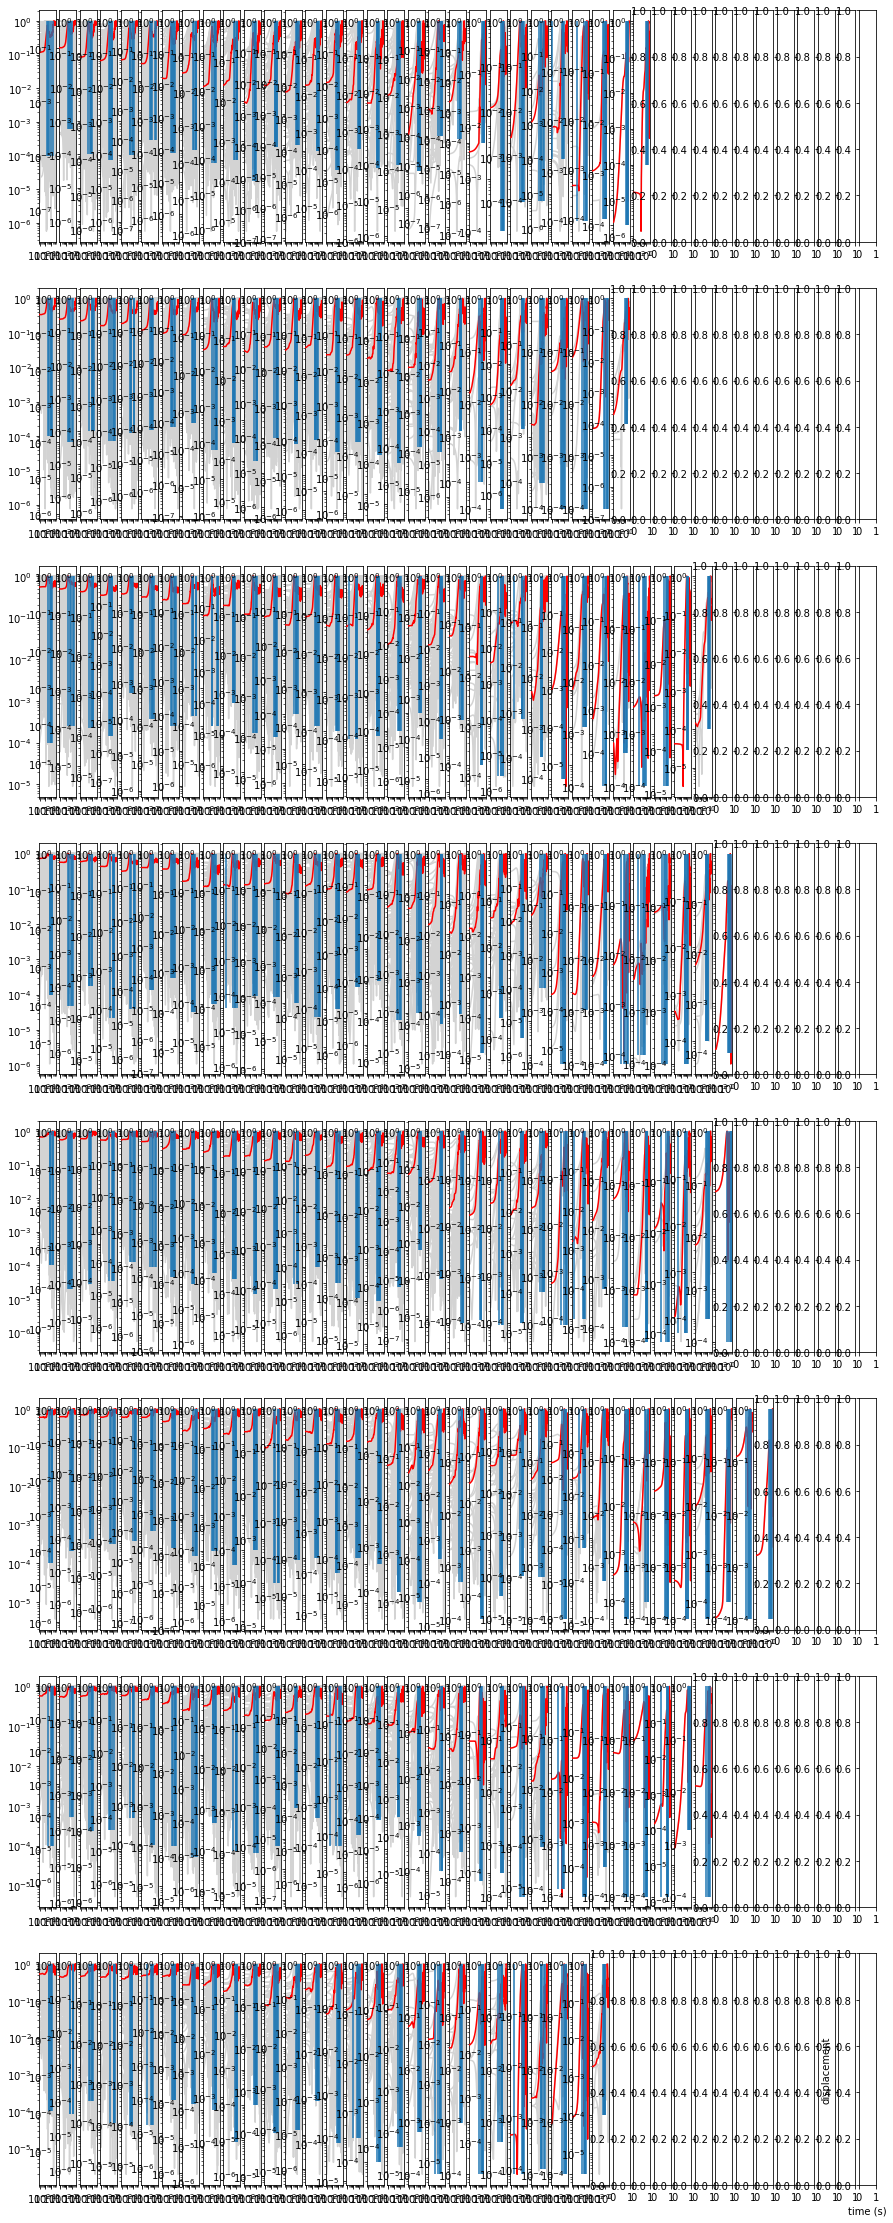

In [21]:
fig, axs = plt.subplots(8, len(df.columns), figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:
        try:
            #print('for column')
            #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = DPD_time*100 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row

            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline += 1
                    if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i]-0.05, 0.0001, 1, zorder = 100)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
            for ind_ad in ad[column][row]:
                axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
            col_count += 1
        except Exception:
            continue
            col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [22]:
results

[[['3.0', 0, 0.27, 605],
  ['3.1', 0, 0.27, 595],
  ['3.2', 0, 0.27, 606],
  ['3.3', 0, 0.31, 606],
  ['3.4', 0, 0.31, 595],
  ['3.5', 0, 0.28, 606],
  ['3.6', 0, 0.35, 606],
  ['3.7', 0, 0.52, 606],
  ['3.8', 0, 0.34, 577],
  ['3.9', 0, 0.6, 577],
  ['4.0', 0, 0.36, 577],
  ['4.1', 0, 0.5, 521],
  ['4.2', 0, 0.61, 578],
  ['4.3', 0, 0.86, 524],
  ['4.4', 0, 0.44, 578],
  ['4.5', 0, 0.98, 523],
  ['4.6', 0, 0.45, 523],
  ['4.7', 0, 0.43, 578],
  ['4.8', 0, 0.43, 36],
  ['4.9', 0, 0.47, 578],
  ['5.0', 0, 0.38, 10],
  ['5.1', 0, 1.05, 11],
  ['5.2', 0, 0.63, 2],
  ['5.3', 0, 0.4, 11],
  ['5.4', 0, 0.23, 11],
  ['5.5', 0, 0.66, 2],
  ['5.6', 0, 0.92, 3],
  ['6.0', 0, 0.56, 2],
  ['6.1', 0, 1.57, 1],
  ['6.4', 0, 1.36, 2]],
 [['3.0', 1, 0.29, 893],
  ['3.1', 1, 0.27, 894],
  ['3.2', 1, 0.28, 894],
  ['3.3', 1, 0.28, 894],
  ['3.4', 1, 0.28, 885],
  ['3.5', 1, 0.28, 885],
  ['3.6', 1, 0.34, 885],
  ['3.7', 1, 0.4, 894],
  ['3.8', 1, 0.35, 877],
  ['3.9', 1, 0.35, 894],
  ['4.0', 1, 0.43, 8

In [102]:
df = df_save

In [101]:
df2

mag  dist  delaytime    n
0  6.3   7.0       0.62  1.0

In [114]:
column

'5.2'

onto row/column plot
[0.27 0.36 0.54 0.91 2.34]
[0.27 0.41 0.57 0.78 1.19]
[0.27 0.5  0.65 0.73 0.97]
[0.31 0.37 0.55 0.75 0.95]
[0.31 0.37 0.59 1.15 1.2 ]
[0.28 0.33 0.51 1.69 2.38]
[0.35 0.51 0.64 0.97 1.2 ]
[0.52 0.81 1.46 1.69 1.74]
[0.34 0.67 0.85 1.1  1.42]
[0.6  0.95 1.49 1.88 2.05]
[0.36 0.63 0.69 0.79 1.04]
[0.5  0.57 0.83 1.15 1.31]
[0.61 0.98 1.12 1.57 1.89]
[0.86 0.97 1.23 1.31 1.84]
[0.44 0.6  0.99 1.16 1.51]
[0.98 1.15 1.43 1.56 1.66]
[0.45 0.52 0.67 0.72 0.92]
[0.43 0.5  0.85 0.93 1.09]
[0.43 0.56 0.75 0.86 0.93]
[0.47 0.78 1.15 1.69 1.85]
[0.38 0.6  0.7  0.75 1.05]
[1.05 1.56 2.23 2.4  2.63]
[0.63 0.91 1.27 1.68 2.32]
[0.4  0.7  0.8  1.31 1.47]
[0.23 0.42 0.54 0.96 1.57]
[0.06 0.66 0.77 0.98 1.13]
[0.1  0.92 1.8  2.23 2.79]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.56 0.82 1.27 1.49 1.99]
[1.57 1.97 2.6  3.1  3.66]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.04 1.36 1.8  2.04 2.44]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.29 0.47 0.93 1.09 1.25]
[0.27 0.43 0.56 1.23 1.72]
[0.28 1.   1.12 1.25 1.75]
[0.28 0.5  1.16 1.51 2.19]
[0.28 0.43 0.52 1.49 1.65]
[0.28 0.45 0.53 0.63 0.73]
[0.34 0.45 0.54 1.04 1.27]
[0.4  0.47 0.55 1.1  1.31]
[0.35 0.59 1.46 1.63 2.39]
[0.35 0.42 0.49 0.67 0.96]
[0.43 1.07 1.26 1.42 1.55]
[0.42 0.68 1.26 1.34 1.77]
[0.44 0.54 0.77 0.94 1.  ]
[0.34 0.41 0.55 0.68 1.23]
[0.45 0.71 0.84 1.19 1.34]
[0.38 0.6  0.68 1.21 1.6 ]
[0.63 1.03 1.37 1.79 1.95]
[0.48 0.57 0.79 0.92 1.09]
[0.53 1.01 1.12 1.22 1.29]
[0.46 0.55 1.06 1.3  1.39]
[0.58 0.69 0.87 0.92 1.07]
[0.41 0.82 1.03 1.2  1.33]
[0.59 0.76 1.03 1.28 1.49]
[0.79 0.89 1.02 1.21 1.57]
[0.37 0.46 0.76 0.96 1.4 ]
[0.41 0.54 0.93 1.13 1.46]
[0.47 1.09 1.48 2.   3.02]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.97 1.32 2.51 2.98 3.3 ]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.88 1.35 1.79 2.16 2.44]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/tmp/ipykernel_2077476/1362587454.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 1, figsize = (9,9)) #df.shape[1]-1


[0.29 0.57 0.91 1.04 1.3 ]
[0.29 0.48 0.94 1.78 2.76]
[0.3  0.61 0.98 1.23 1.29]
[0.29 0.42 0.59 0.76 0.95]
[0.3  0.43 0.6  0.66 1.16]
[0.3  0.49 0.58 0.82 0.98]
[0.32 0.52 1.   1.61 1.84]
[0.41 0.5  0.6  1.85 2.07]
[0.34 0.39 1.97 2.96 3.1 ]
[0.38 0.43 0.61 0.66 0.83]
[0.35 0.5  0.88 1.02 1.31]
[0.43 0.59 0.8  0.9  1.16]
[0.39 0.61 0.67 0.93 1.55]
[0.36 0.53 0.96 1.38 1.68]
[0.4  0.59 0.78 1.11 1.25]
[0.07 0.36 0.45 0.53 0.58]
[0.46 0.53 0.69 1.01 1.16]
[0.51 0.77 0.9  1.3  1.45]
[0.72 0.94 1.12 1.38 1.48]
[0.88 1.13 1.42 1.58 1.78]
[0.78 1.33 1.44 1.69 1.83]
[0.04 0.84 0.96 1.05 1.21]
[0.26 0.66 0.8  1.35 1.63]
[0.08 0.82 0.91 0.99 1.64]
[0.43 0.52 0.58 0.73 0.78]
[0.48 0.92 1.17 1.4  1.61]
[0.62 1.03 1.52 1.81 2.17]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.67 1.27 1.47 1.57 1.73]
[0.6  0.79 1.3  1.62 2.09]
[0.13 0.36 0.61 0.83 1.11]
[0.56 1.02 1.28 1.61 2.13]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.04 1.1  1.44 1.63 1.86]
[1.3  1.82 2.05 2.5  3.42]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.57 0.72 1.09 1.34 1.41]
[0.29 0.45 0.76 1.07 1.45]
[0.29 0.38 0.49 0.93 1.17]
[0.4  1.21 1.42 1.71 2.03]
[0.35 0.5  1.56 1.66 2.05]
[0.32 0.46 0.6  0.83 0.94]
[0.33 0.41 0.61 0.88 1.23]
[0.38 0.44 0.59 0.91 1.24]
[0.37 0.47 0.58 1.05 1.45]
[0.07 0.38 0.83 0.95 1.56]
[0.38 0.52 0.69 0.98 1.65]
[0.37 0.74 1.1  1.74 2.32]
[0.42 0.61 0.75 1.12 1.28]
[0.44 0.73 1.46 1.94 3.14]
[0.56 0.8  0.95 1.37 1.48]
[0.41 0.49 0.87 1.11 1.2 ]
[0.6  0.78 1.08 1.16 1.36]
[0.43 0.65 1.05 1.35 1.61]
[0.35 0.63 0.75 1.35 1.46]
[0.99 1.09 1.35 1.76 1.89]
[0.57 0.63 0.73 0.8  0.86]
[0.81 1.01 1.29 1.46 1.58]
[0.43 0.55 0.66 1.11 1.19]
[0.49 0.86 0.97 1.21 1.45]
[0.39 0.79 1.75 1.86 2.4 ]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.36 0.74 0.99 1.46 1.79]
[0.61 1.31 1.77 2.2  2.78]
[0.95 1.32 1.51 1.62 1.97]
[0.21 0.57 0.91 1.9  2.72]
[0.1  0.21 0.38 0.58 0.94]
[0.24 0.51 0.65 0.99 1.29]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.55 0.68 1.23 1.35 1.94]
[0.73 0.82 0.96 1.36 1.59]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[1.13 1.77 2.   2.9  4.  ]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.61 0.78 1.08 1.84 1.89]
[0.29 0.37 0.53 0.71 1.38]
[0.04 0.31 0.41 0.54 0.64]
[0.31 0.91 1.13 1.28 1.47]
[0.35 0.42 0.97 1.64 2.04]
[0.31 0.59 0.95 1.92 2.12]
[0.34 0.44 0.61 0.88 1.3 ]
[0.35 0.48 0.67 0.83 0.9 ]
[0.4  0.75 0.99 1.08 1.39]
[0.37 0.44 0.76 0.84 1.36]
[0.46 0.64 0.94 1.05 1.12]
[0.4  0.51 0.85 1.24 1.34]
[0.35 0.9  1.14 1.37 1.44]
[0.55 0.7  0.95 1.17 1.6 ]
[0.45 0.59 0.8  1.59 1.98]
[0.46 0.53 0.66 0.78 1.05]
[0.46 0.81 0.94 1.21 1.32]
[0.62 0.71 0.81 1.14 1.22]
[0.58 0.9  1.09 1.37 1.46]
[0.69 1.2  1.35 1.51 1.62]
[0.91 1.57 1.84 2.22 2.37]
[0.59 0.68 0.75 0.84 0.92]
[0.39 0.84 0.94 1.04 1.21]
[0.51 0.66 0.92 1.02 1.2 ]
[0.37 0.62 0.99 1.32 1.43]
[0.46 1.2  2.38 2.9  4.04]
[0.07 0.73 0.86 1.02 1.26]
[0.63 0.86 1.06 1.29 1.59]
[0.43 1.03 1.44 1.93 2.48]
[1.02 1.42 1.5  1.76 2.1 ]
[0.19 1.12 2.09 2.31 3.51]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.08 0.59 0.67 0.86 1.09]
[0.75 1.06 1.37 1.79 1.9 ]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.82 1.89 3.33 3.72 3.9 ]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.47 0.79 1.21 1.53 1.61]
[0.47 0.89 1.22 1.31 1.5 ]
[0.05 0.4  0.52 0.75 1.22]
[0.46 0.58 1.41 1.74 3.11]
[1.08 1.92 2.23 2.52 2.97]
[0.38 0.47 0.58 0.68 1.8 ]
[0.45 0.62 1.   1.23 1.34]
[0.48 1.32 1.48 2.01 2.67]
[0.38 0.49 0.76 1.39 1.85]
[0.41 0.62 0.77 1.21 1.35]
[0.42 0.51 0.59 1.18 1.38]
[0.39 0.6  1.81 2.04 2.91]
[0.48 0.87 1.84 2.05 2.43]
[0.42 0.49 0.73 1.14 1.2 ]
[0.47 0.55 0.71 0.81 1.34]
[0.43 0.57 0.8  1.16 1.72]
[0.71 0.97 1.19 1.74 2.13]
[0.49 0.54 0.59 0.87 1.04]
[0.54 0.73 0.88 0.97 1.22]
[0.5  0.64 0.85 0.97 1.1 ]
[0.55 1.06 1.26 1.57 1.67]
[0.76 0.86 1.12 1.24 1.47]
[0.41 0.77 0.89 0.95 1.12]
[0.38 0.74 0.83 1.01 1.24]
[0.22 0.45 0.8  1.08 1.56]
[0.49 1.38 2.06 2.47 2.72]
[0.17 0.77 1.05 1.47 1.6 ]
[0.62 0.78 0.94 1.23 1.33]
[1.14 1.49 2.23 2.87 3.38]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.05 0.79 1.38 2.22 2.54]
[0.76 1.07 1.48 2.14 2.53]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.04 0.7  0.99 1.54 1.83]
[0.74 0.97 1.24 1.49 1.97]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.88 1.17 1.48 1.95 2.35]
[0.53 0.92 1.3  2.31 2.66]
[1.35 1.61 2.61 3.05 3.86]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.32 1.12 1.26 1.45 1.75]
[0.61 1.   1.17 1.23 1.52]
[0.35 0.68 0.9  1.01 1.46]
[0.31 0.39 0.44 0.78 1.6 ]
[0.37 0.96 1.07 1.16 1.35]
[0.45 0.52 0.84 0.99 1.13]
[0.45 0.57 1.42 1.62 1.83]
[0.43 0.69 1.83 1.94 2.39]
[0.44 0.54 0.83 1.04 1.35]
[0.34 1.1  1.29 1.41 1.54]
[0.41 0.74 1.19 1.55 1.87]
[0.88 1.33 2.   2.13 2.28]
[0.47 0.6  0.68 0.75 0.89]
[0.61 0.93 1.13 1.39 1.64]
[0.09 0.47 1.58 2.19 2.7 ]
[0.53 0.84 1.19 1.64 1.73]
[0.53 0.78 0.92 1.56 1.7 ]
[0.04 0.48 0.56 0.75 0.85]
[0.43 0.55 0.71 0.87 1.1 ]
[0.04 0.89 1.64 1.74 1.85]
[0.61 0.99 1.15 1.28 1.35]
[0.04 0.6  0.7  0.83 1.26]
[0.61 0.74 0.86 1.4  1.51]
[0.39 0.67 1.15 1.49 1.6 ]
[0.51 0.58 0.94 1.47 1.69]
[0.17 0.49 0.74 0.96 1.19]
[0.66 1.15 1.58 2.16 2.43]
[0.04 0.87 0.98 1.41 1.48]
[0.04 0.7  1.32 2.58 2.76]
[0.53 1.11 1.39 1.61 1.92]
[0.18 1.28 1.55 2.18 2.46]
[1.47 2.32 2.69 3.87 4.17]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.04 0.58 1.58 2.43 3.17]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.39 0.47 0.9  1.07 1.72]
[0.51 0.66 1.49 1.93 2.08]
[0.38 0.46 0.88 1.08 1.29]
[0.36 1.55 1.63 1.91 2.8 ]
[0.32 0.47 0.54 0.61 0.77]
[0.13 0.38 0.51 0.61 0.95]
[0.49 0.65 0.85 1.26 1.36]
[0.04 0.41 0.61 0.96 1.07]
[0.45 0.84 0.96 1.22 1.34]
[0.69 1.08 1.45 1.51 1.67]
[0.46 0.58 0.88 1.08 1.22]
[0.4  0.55 0.8  1.19 1.59]
[0.57 1.18 1.34 1.94 2.18]
[0.55 0.9  1.32 1.38 1.45]
[0.69 1.08 1.3  1.75 2.31]
[0.17 0.65 0.96 1.05 1.45]
[0.52 0.83 0.94 1.2  1.39]
[0.55 1.12 1.37 1.64 2.57]
[0.53 0.71 0.88 1.04 1.2 ]
[0.17 0.41 0.73 0.83 1.06]
[0.71 0.88 0.95 1.13 1.25]
[0.46 0.97 1.28 1.73 2.  ]
[0.25 0.5  0.83 0.98 1.09]
[0.08 0.77 1.07 1.34 1.65]
[0.47 0.54 0.81 1.74 2.01]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.59 1.28 2.03 2.34 2.65]
[0.49 0.85 1.32 1.56 2.32]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


[0.62 0.72 0.96 1.03 1.17]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


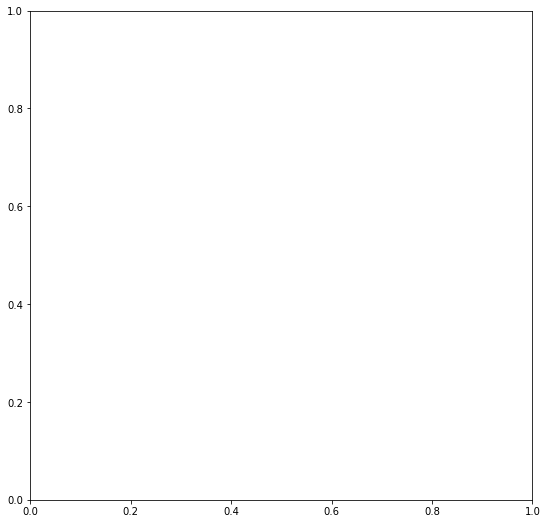

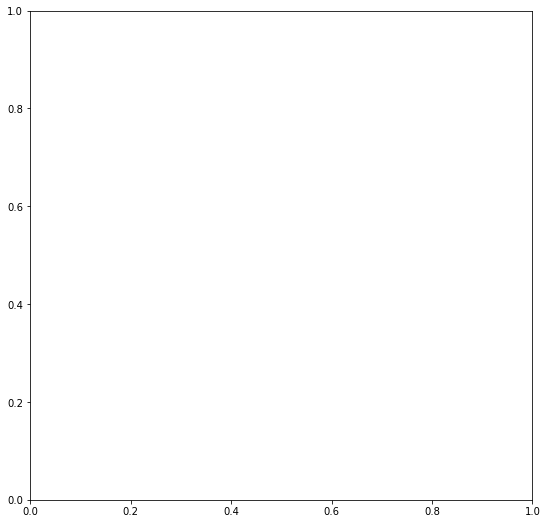

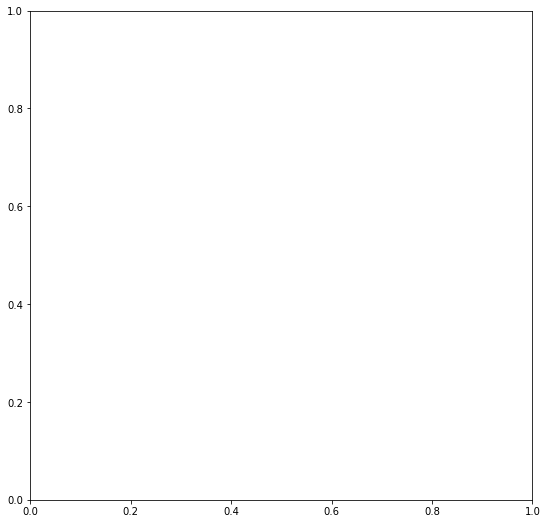

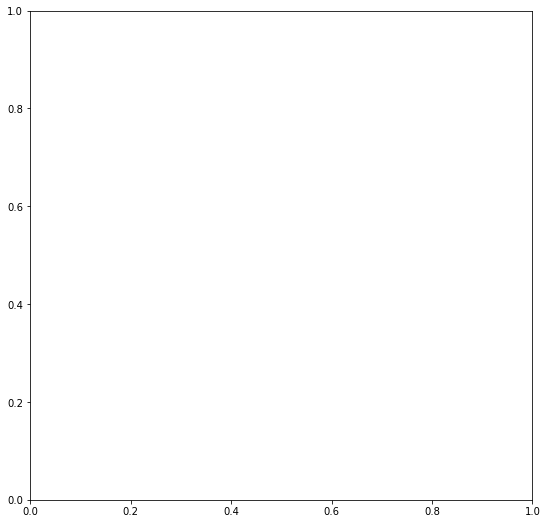

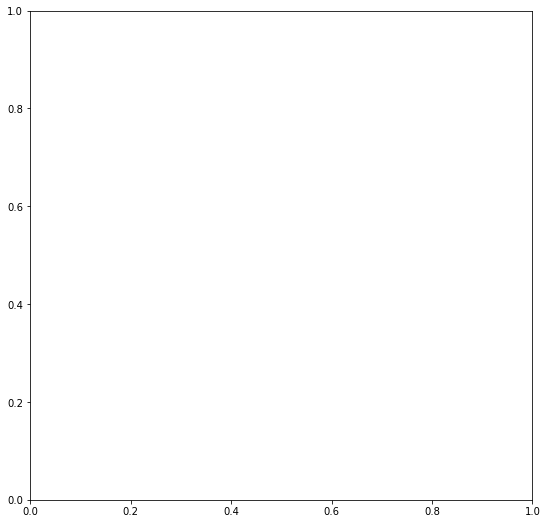

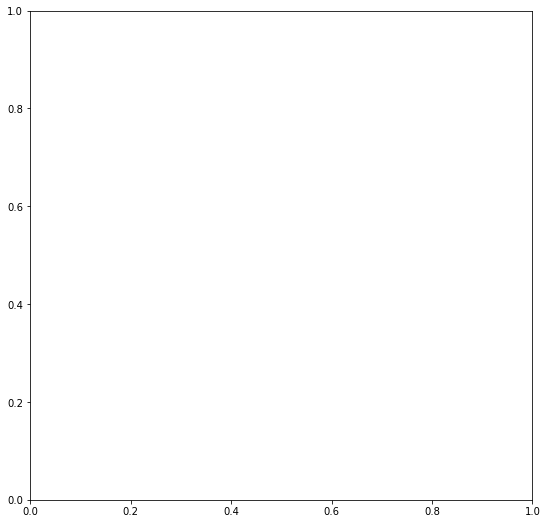

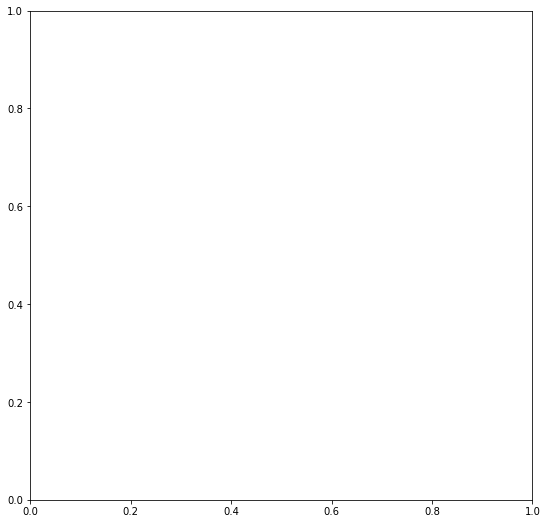

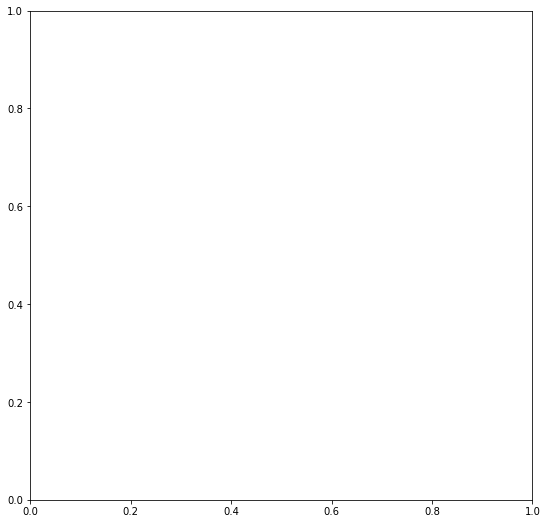

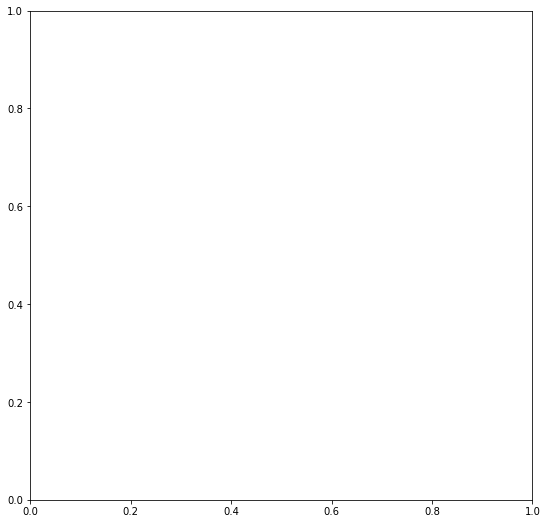

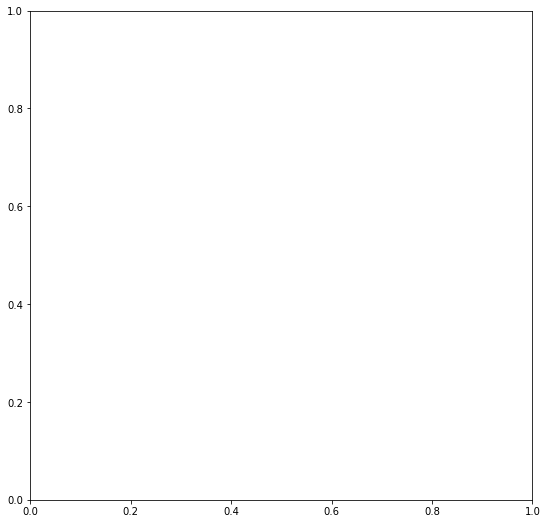

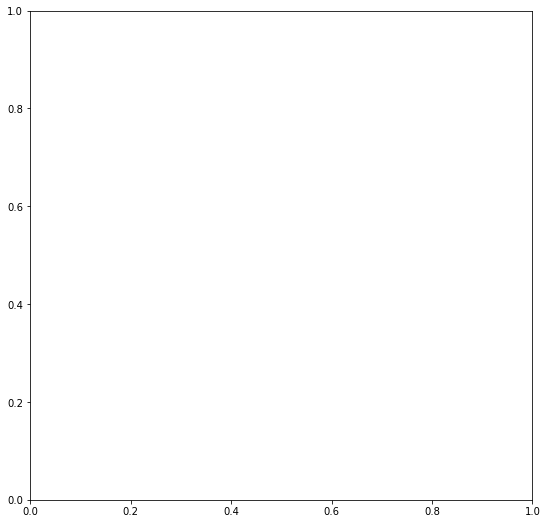

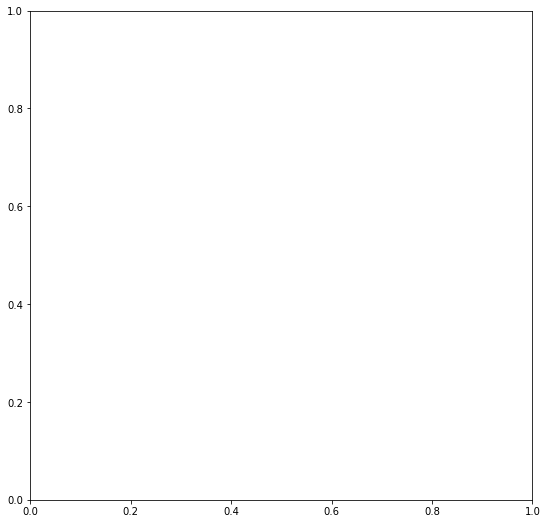

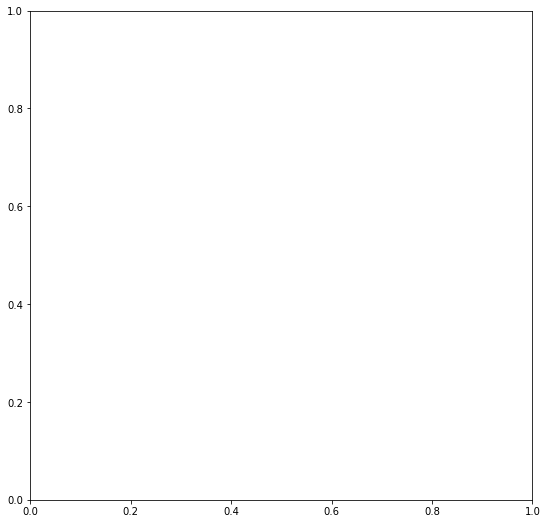

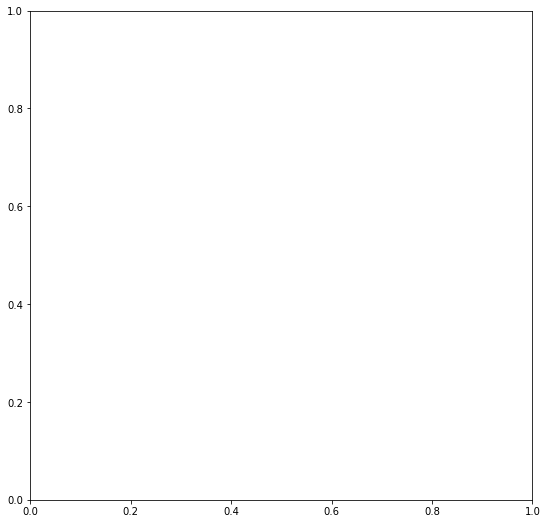

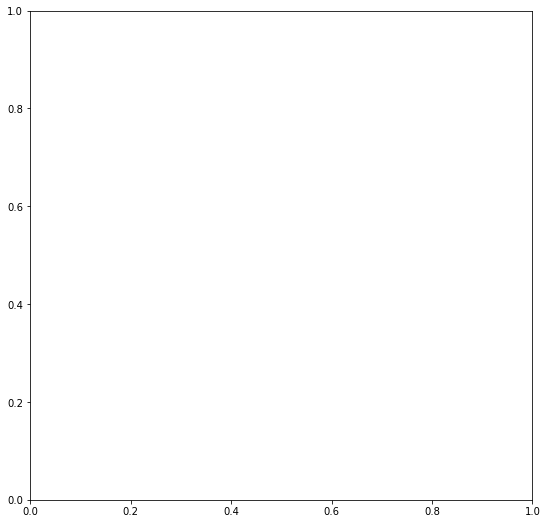

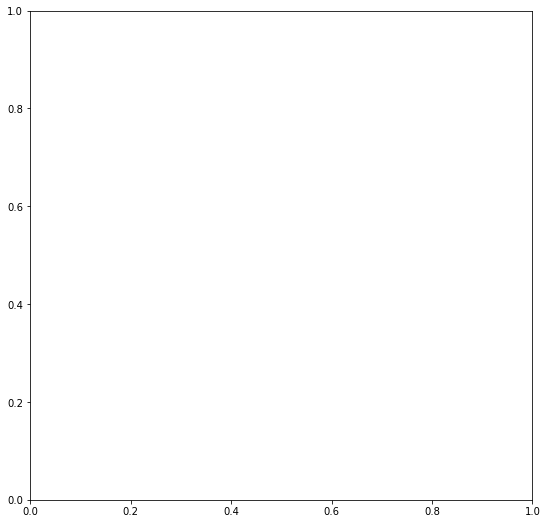

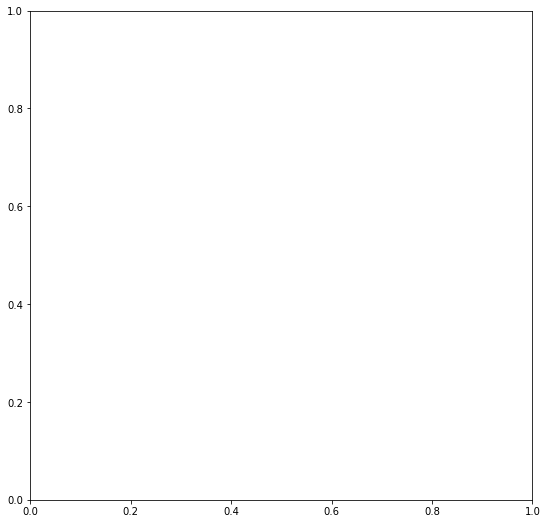

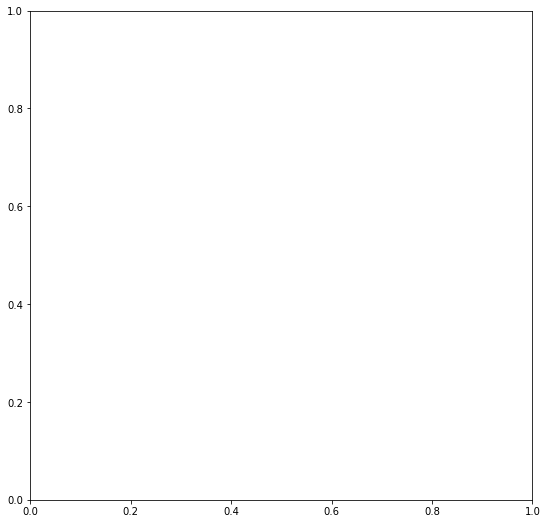

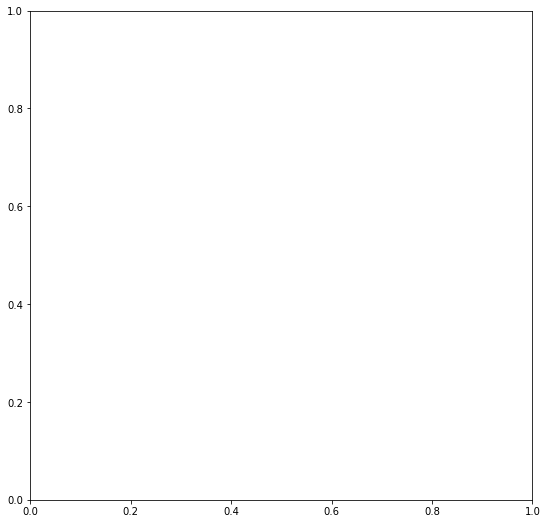

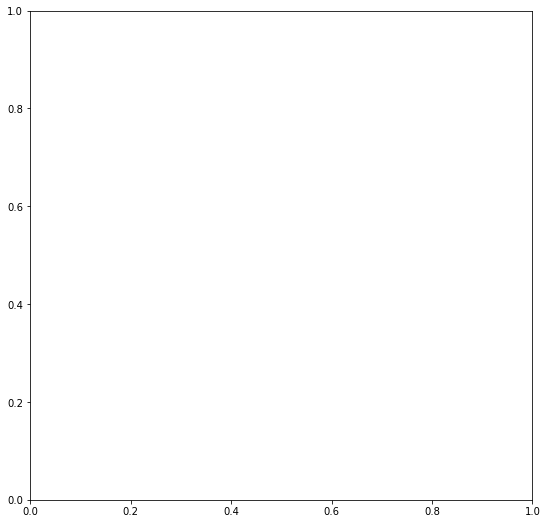

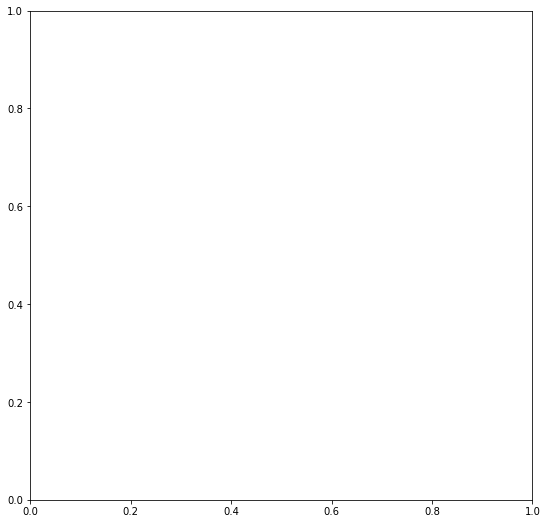

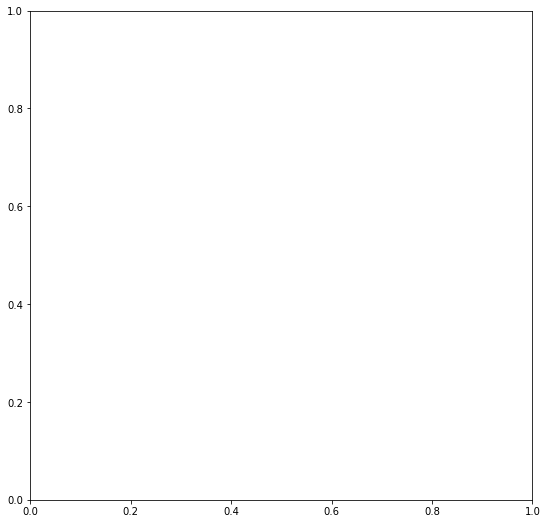

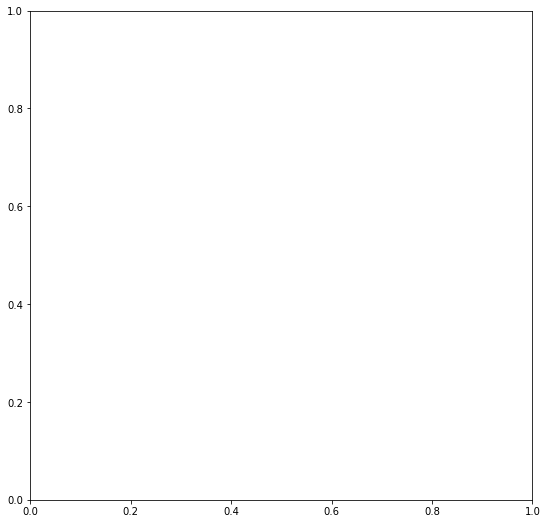

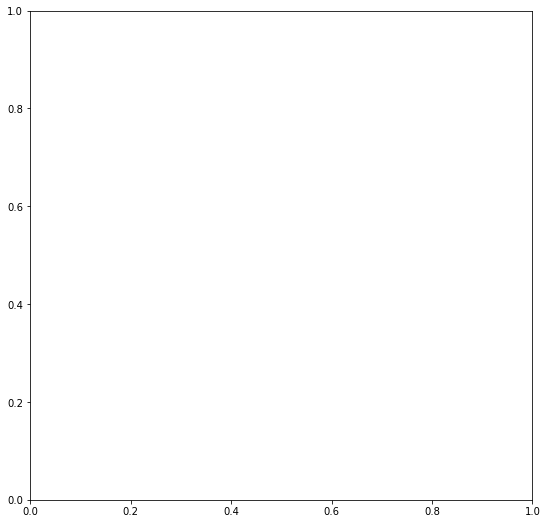

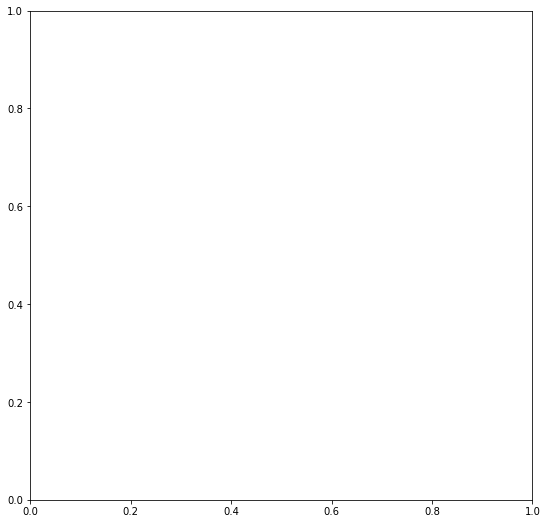

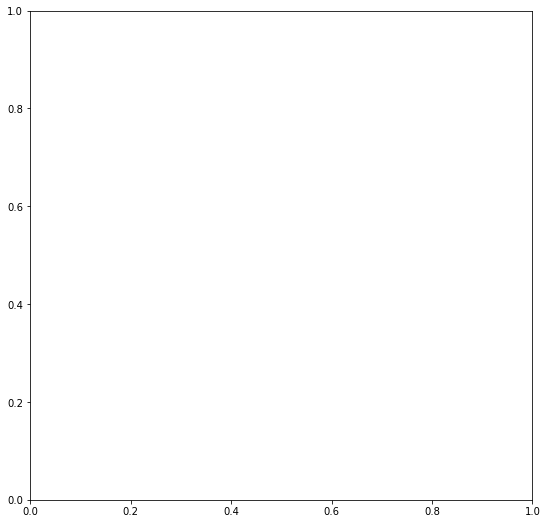

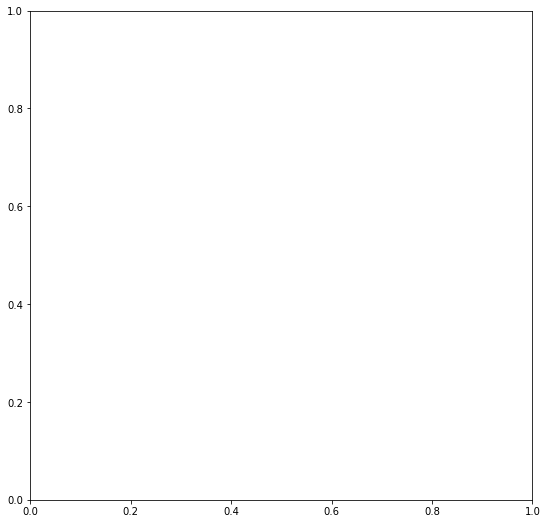

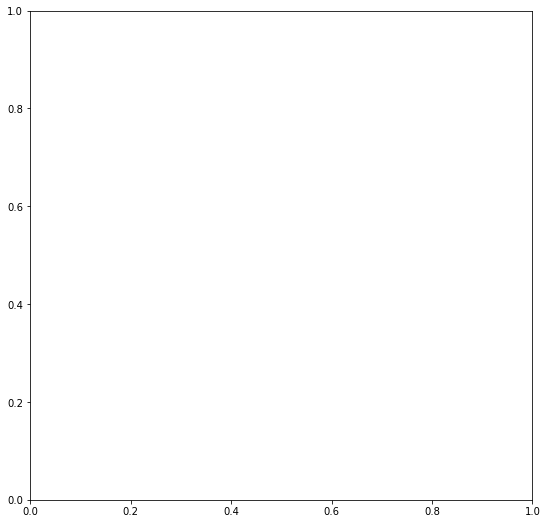

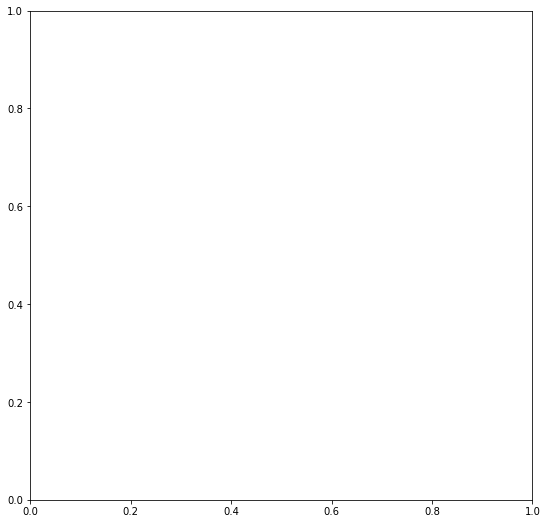

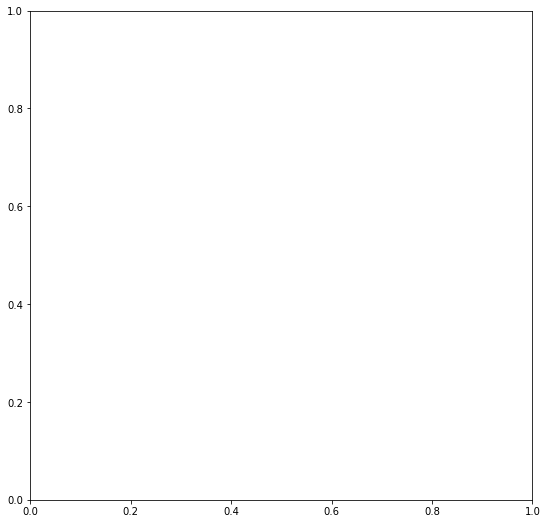

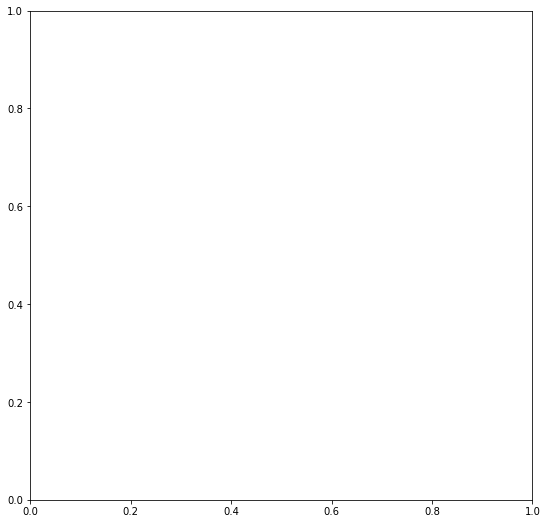

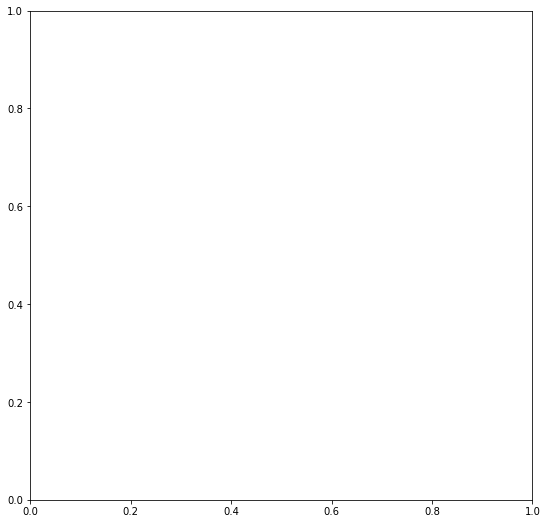

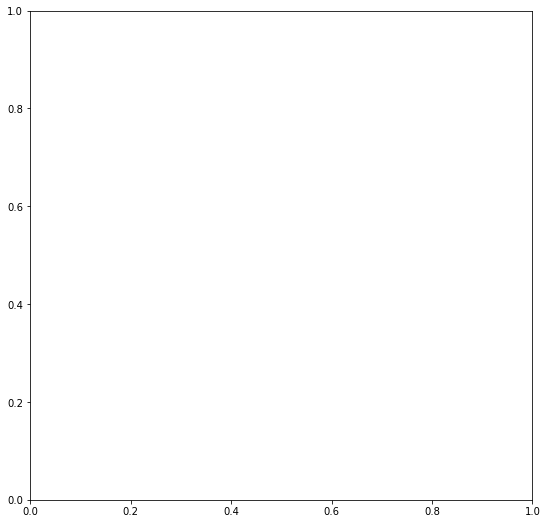

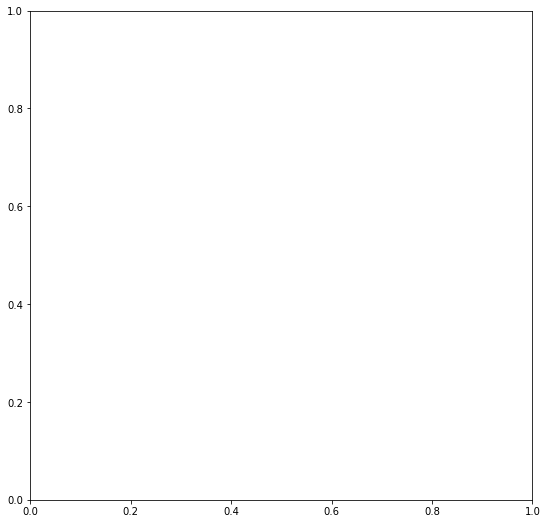

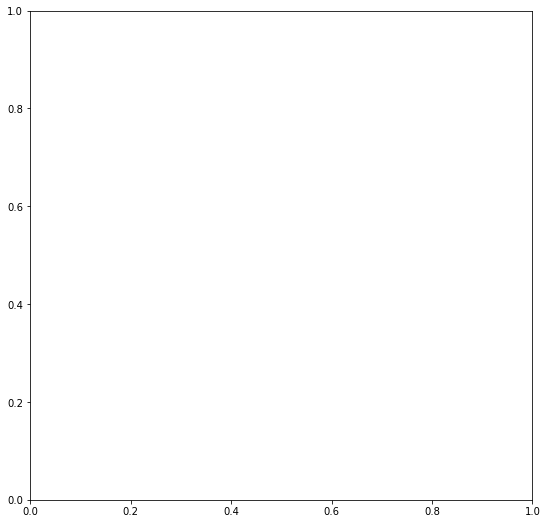

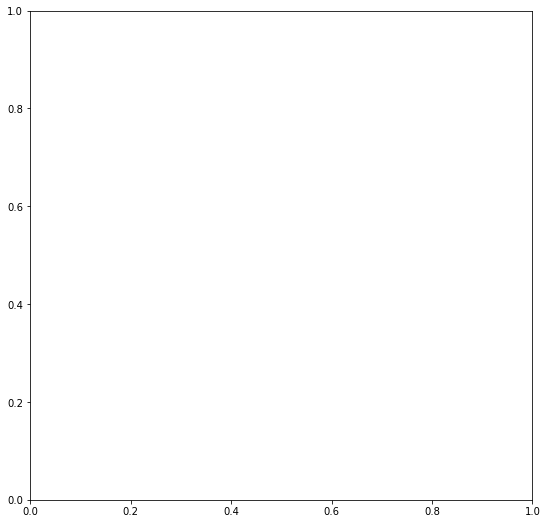

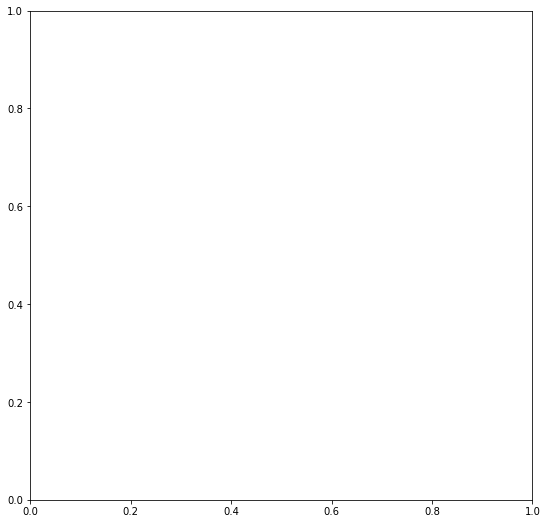

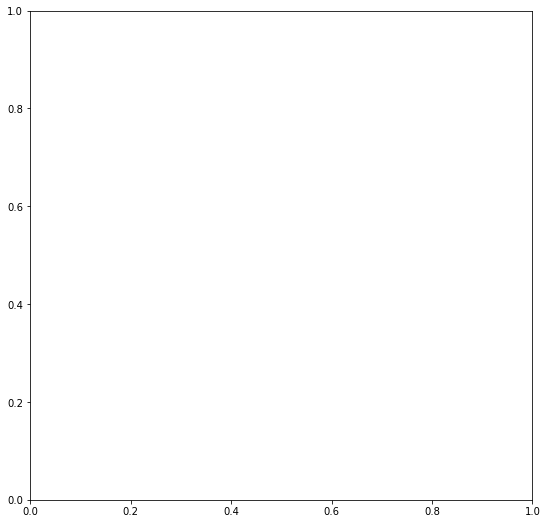

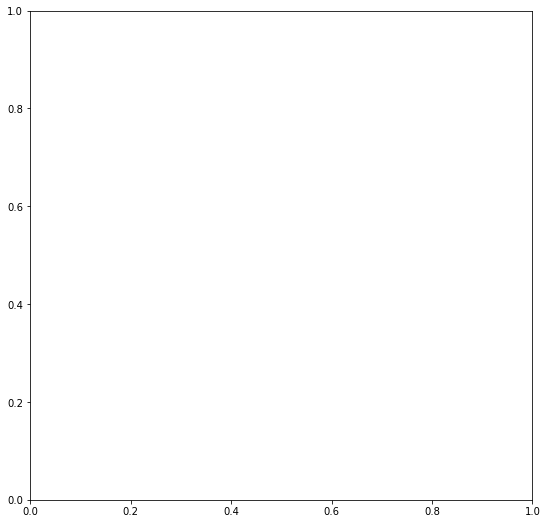

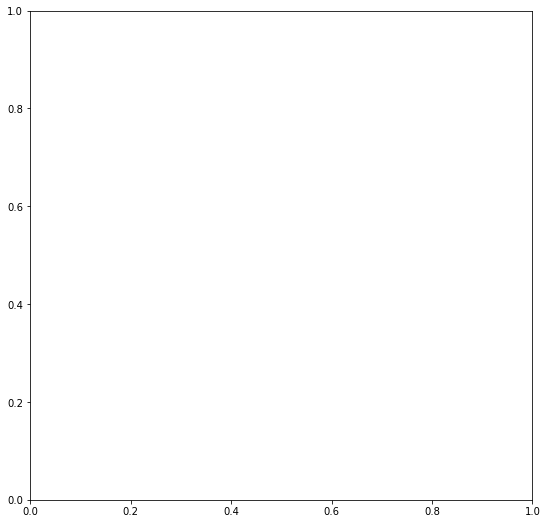

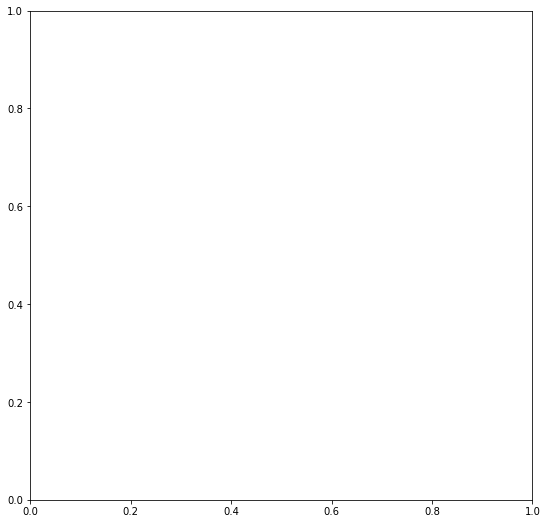

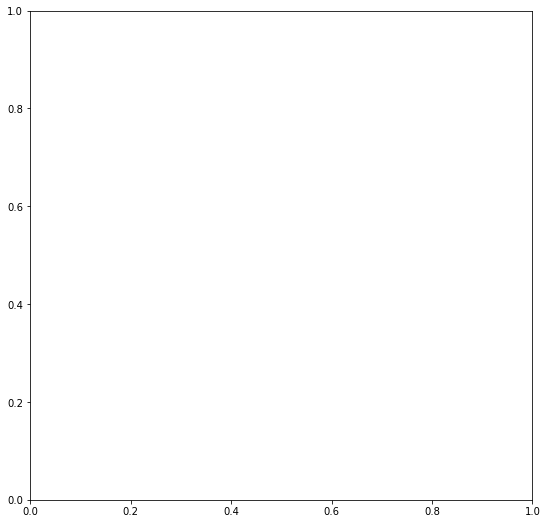

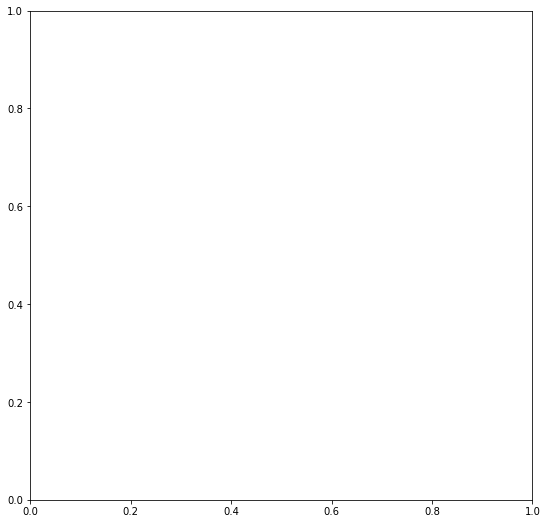

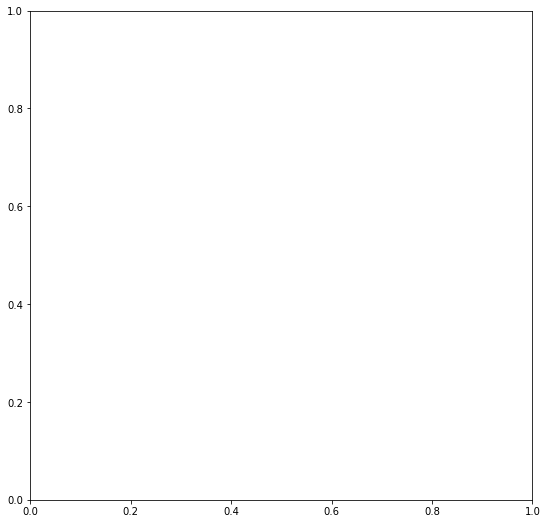

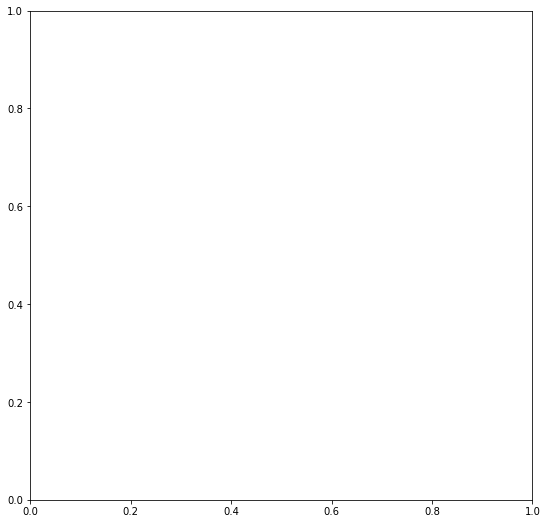

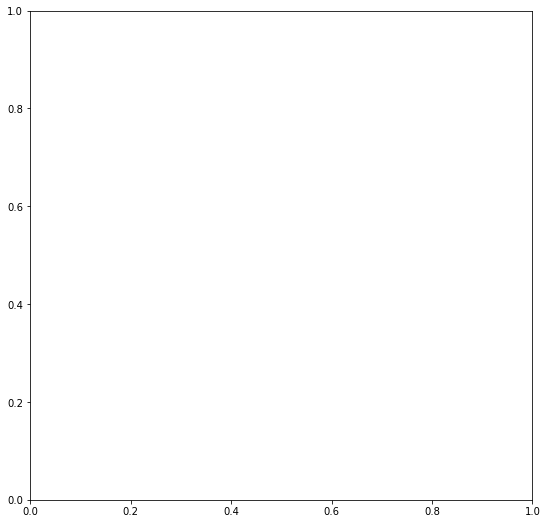

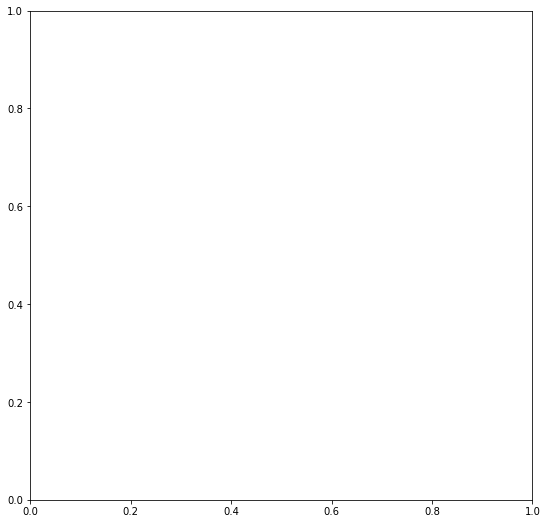

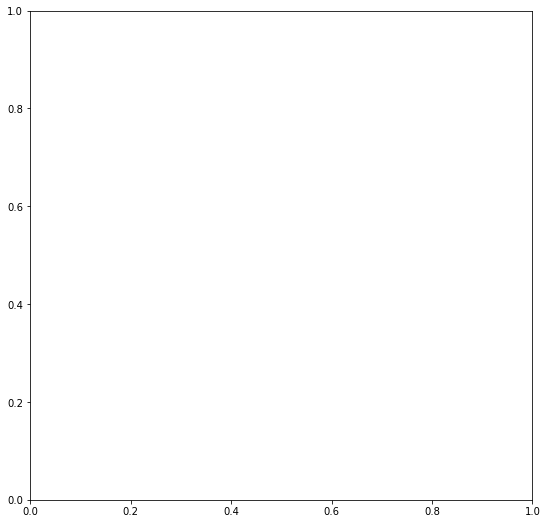

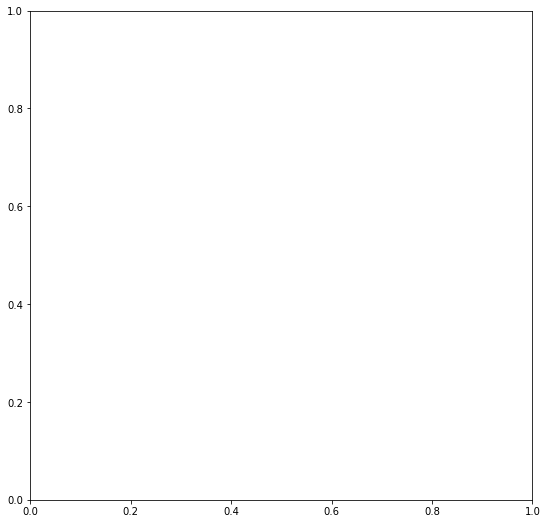

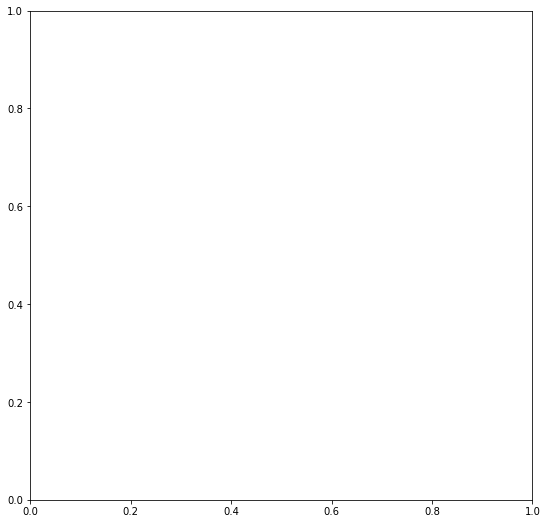

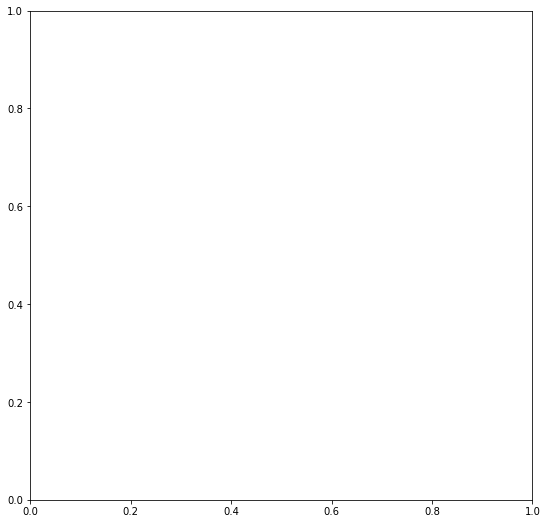

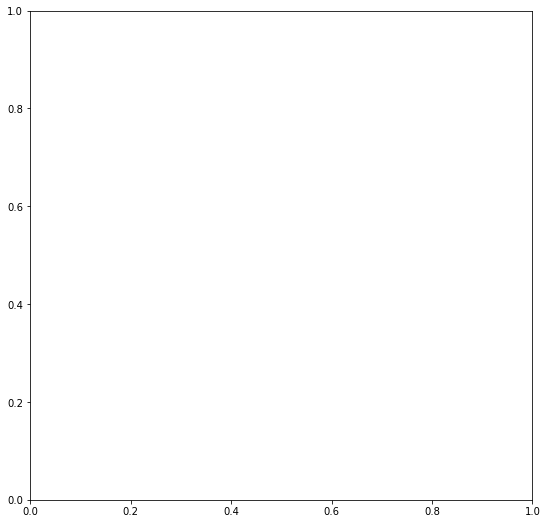

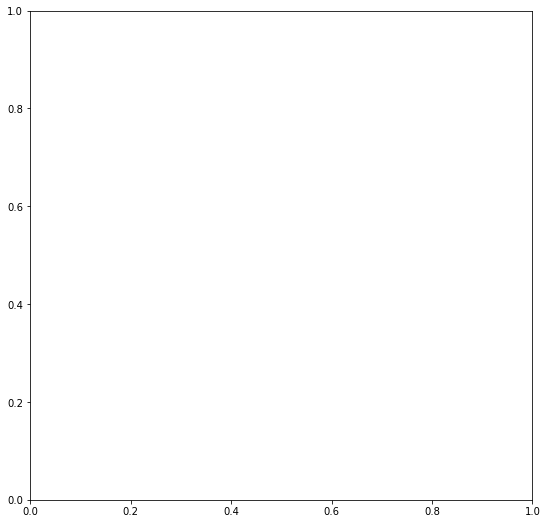

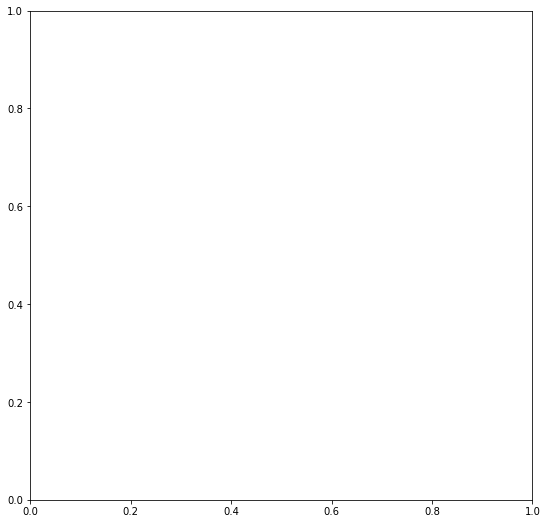

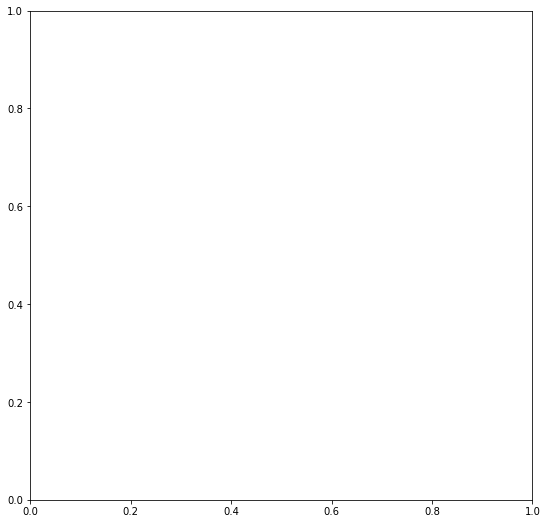

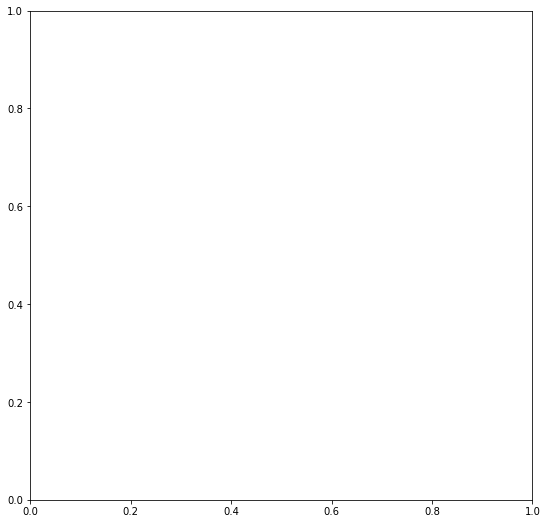

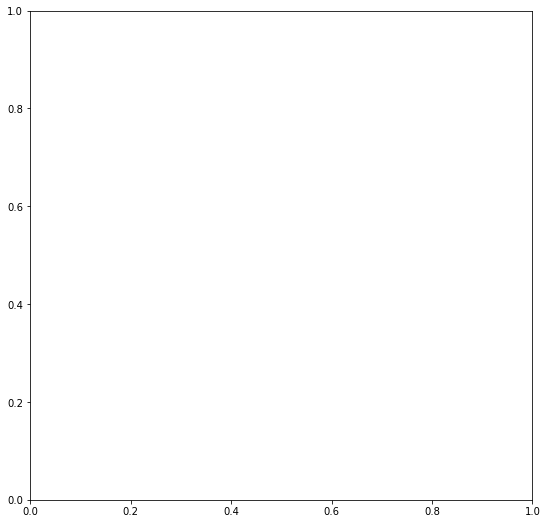

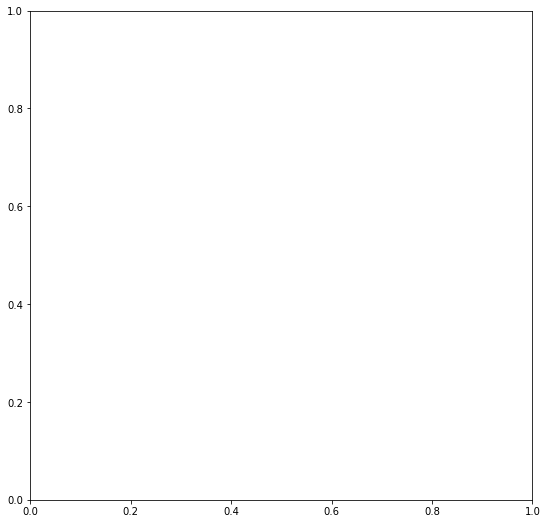

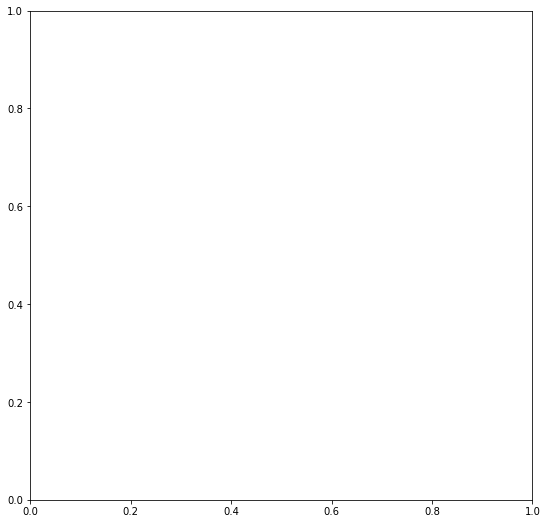

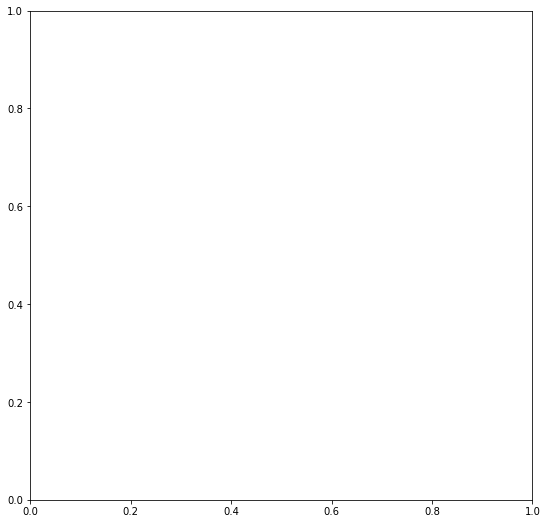

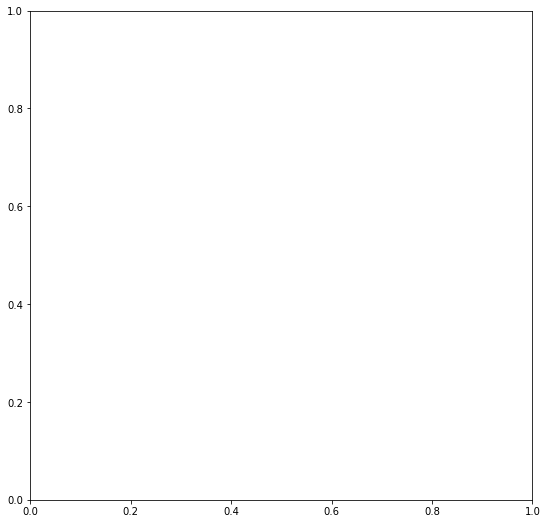

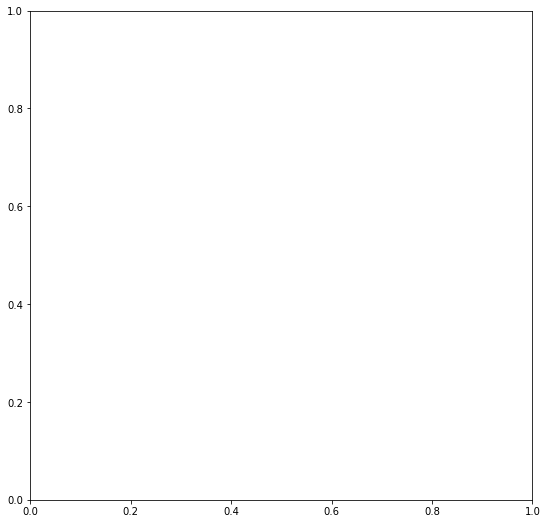

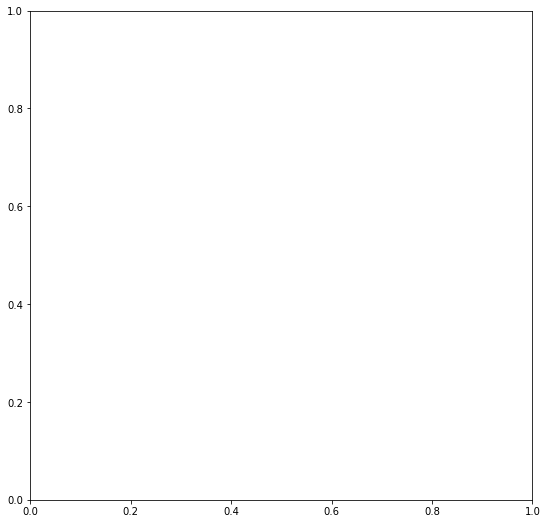

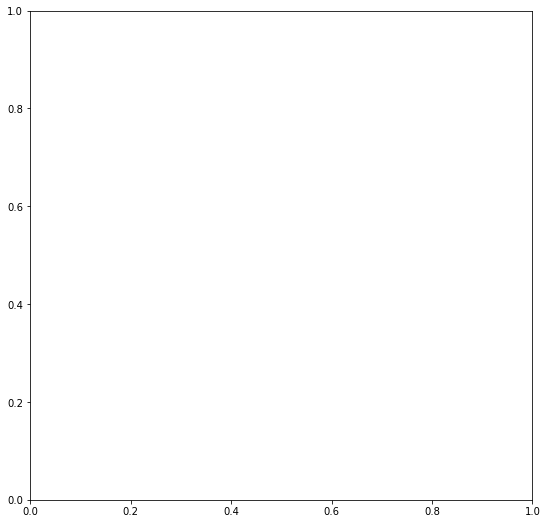

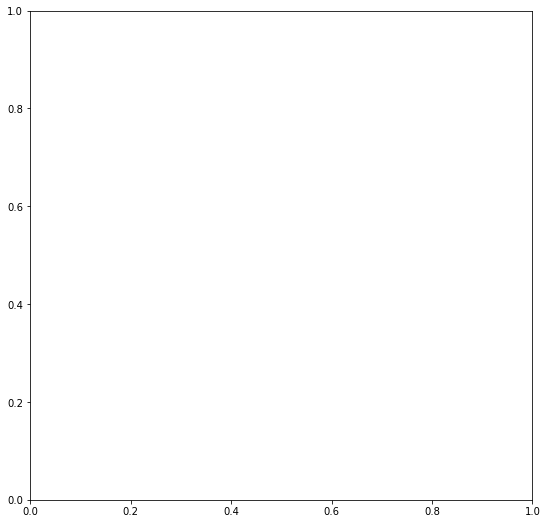

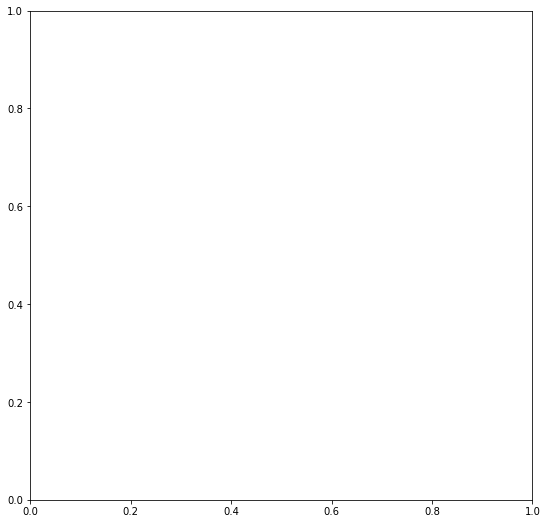

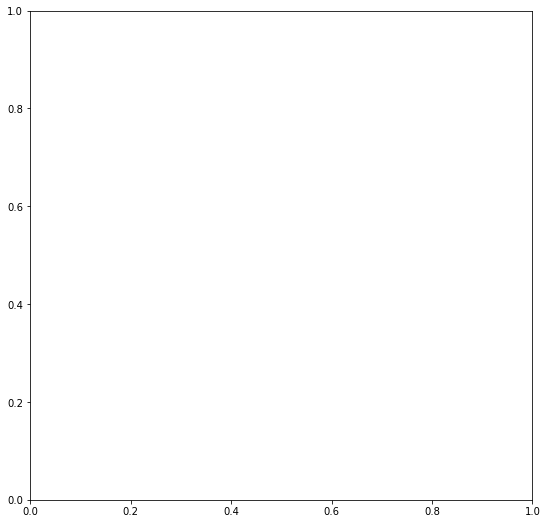

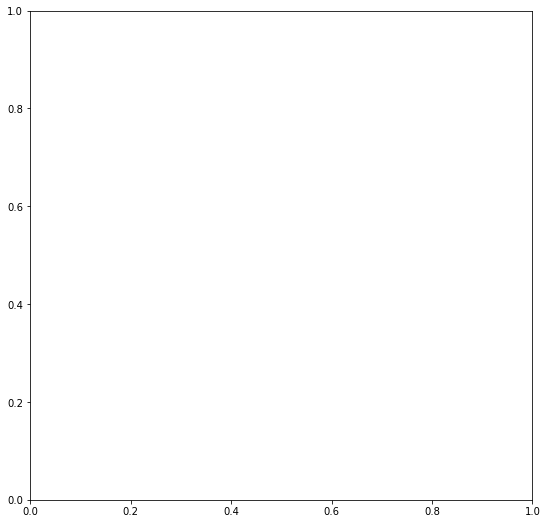

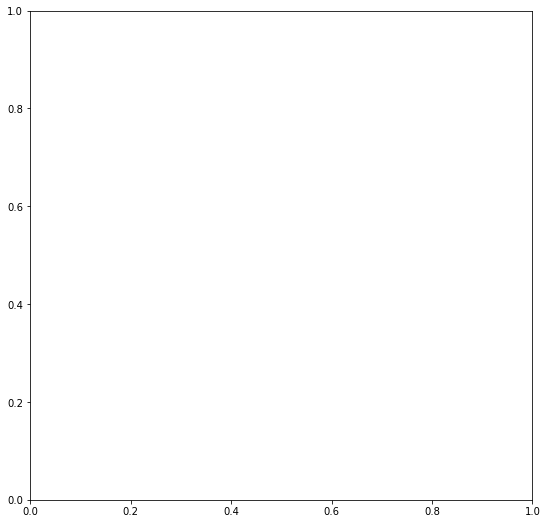

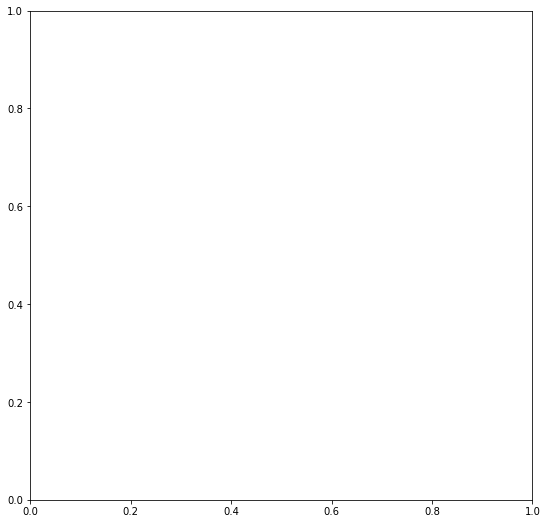

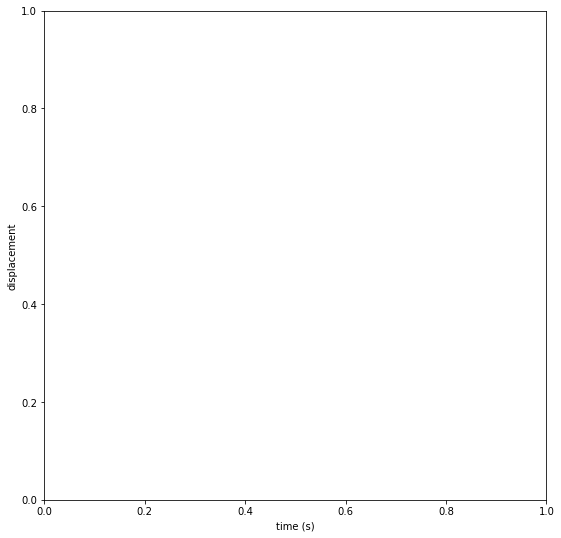

In [116]:

print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:
        fig, axs = plt.subplots(1, 1, figsize = (9,9)) #df.shape[1]-1
        try:
            #print('for column')
            #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = DPD_time*100 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row

            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline += 1
                    if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(1, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs.vlines(T_dp[i]-0.05, 0.0001, 1, zorder = 100)
                #if float("{:.2f}".format(T_dp[0]))>0.2:
                #    print(column, row_count, T_dp[0], counts[column][row])
                #    results[row].append([column, row_count, T_dp[0], counts[column][row]])
               # elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
              #      print(column, row_count, T_dp[1], counts[column][row])
               #     results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs.plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
            for ind_ad in ad[column][row]:
                axs.plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
            axs.set_xscale('log')
            axs.set_yscale('log') # in log space
            col_count += 1
            axs.set(xlabel='time (s)', ylabel='displacement')
            plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/delay_time/delaytime_bin_plots/pdf/distance_'+str(row*25)+'_mag_'+column+'.pdf')
            plt.close()
        except Exception:
            continue
            col_count += 1
    row_count += 1



#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

onto row/column plot
[0.27 0.36 0.54 0.91 2.34]
3.0 0 0.27 605
[0.27 0.41 0.57 0.78 1.19]
3.1 0 0.27 595
[0.27 0.5  0.65 0.73 0.97]
3.2 0 0.27 606
[0.31 0.37 0.55 0.75 0.95]
3.3 0 0.31 606
[0.29 0.47 0.93 1.09 1.25]
3.0 1 0.29 893
[0.27 0.43 0.56 1.23 1.72]
3.1 1 0.27 894
[0.28 1.   1.12 1.25 1.75]
3.2 1 0.28 894
[0.28 0.5  1.16 1.51 2.19]
3.3 1 0.28 894
[0.29 0.57 0.91 1.04 1.3 ]
3.0 2 0.29 560
[0.29 0.48 0.94 1.78 2.76]
3.1 2 0.29 561
[0.3  0.61 0.98 1.23 1.29]
3.2 2 0.3 561
[0.29 0.42 0.59 0.76 0.95]
3.3 2 0.29 561
[0.57 0.72 1.09 1.34 1.41]
3.0 3 0.57 542
[0.29 0.45 0.76 1.07 1.45]
3.1 3 0.29 543
[0.29 0.38 0.49 0.93 1.17]
3.2 3 0.29 543
[0.4  1.21 1.42 1.71 2.03]
3.3 3 0.4 543
[0.61 0.78 1.08 1.84 1.89]
3.0 4 0.61 445
[0.29 0.37 0.53 0.71 1.38]
3.1 4 0.29 446
[0.04 0.31 0.41 0.54 0.64]
3.2 4 0.31 446
[0.31 0.91 1.13 1.28 1.47]
3.3 4 0.31 446
[0.47 0.79 1.21 1.53 1.61]
3.0 5 0.47 272
[0.47 0.89 1.22 1.31 1.5 ]
3.1 5 0.47 273
[0.05 0.4  0.52 0.75 1.22]
3.2 5 0.4 273
[0.46 0.58 1.41 

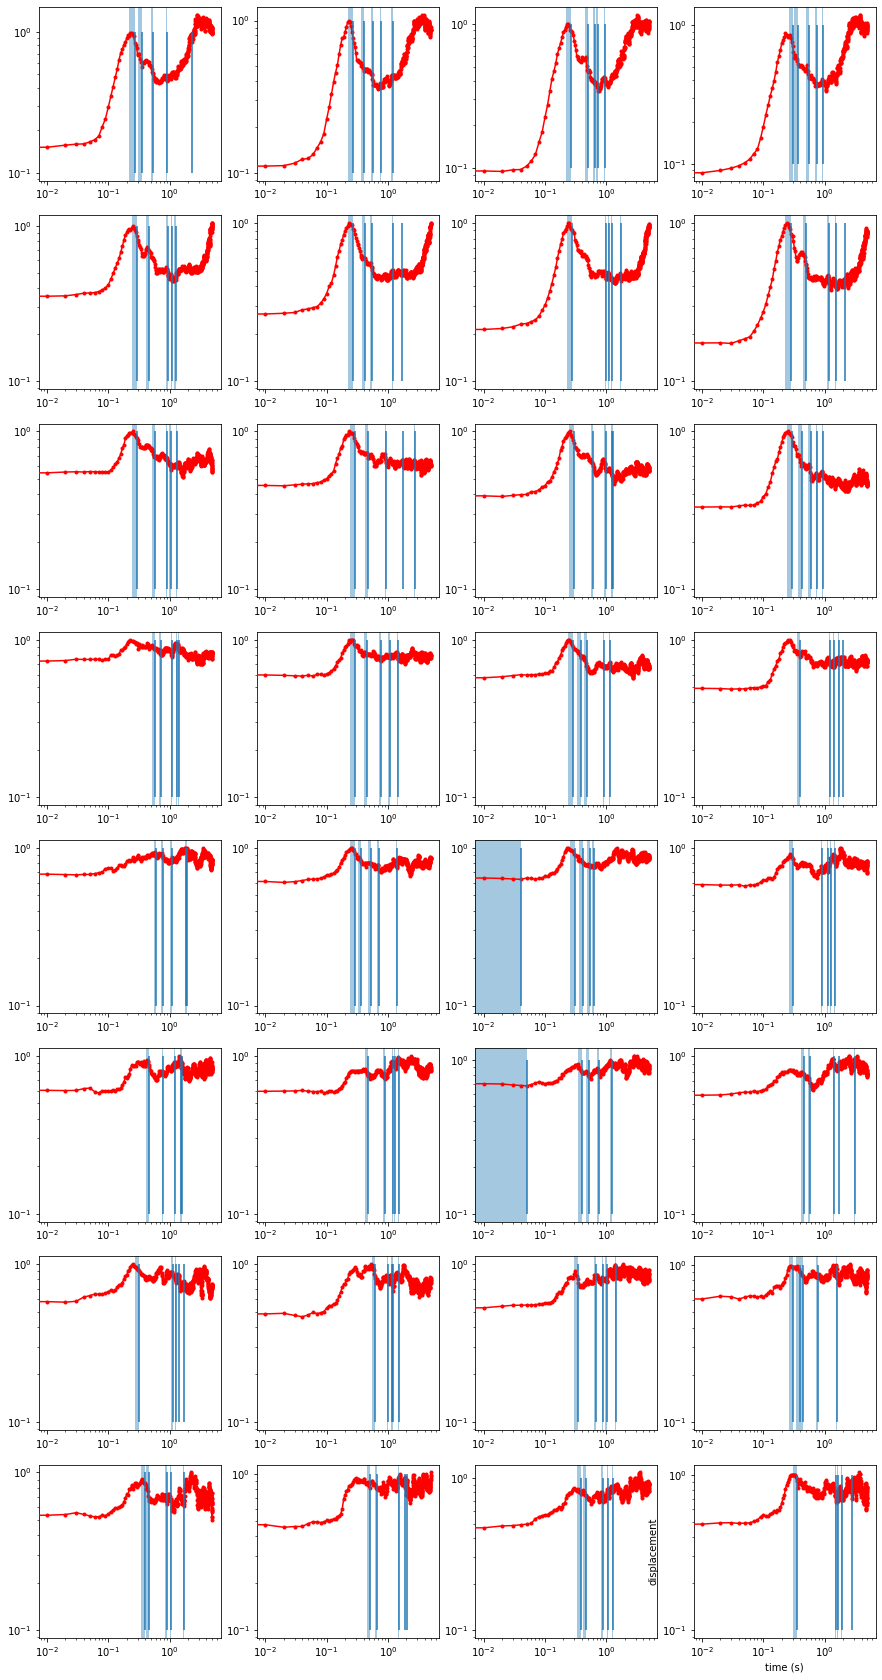

In [58]:
fig, axs = plt.subplots(8, len(, figsize = (15,30)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        if len(ad[column][row])>0:
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = 5 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row
            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline = decline + 1
                    if decline == 4:#np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i], 0.1, 1, zorder = 100)
                    axs[row_count][col_count].axvspan(T_dp[i]-0.05, T_dp[i], alpha = 0.4)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
            axs[row_count][col_count].scatter(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red', marker = '.')
            #axs[row_count][col_count].set_xlim(T_dp[0], T_dp[5])
            #axs[row_count][col_count].set_ylim(0.1, 2)
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
            col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [234]:
results 

[[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 

In [4]:
results_snr_100 = [[['5.0', 0, 0.58999999999999997, 12],
  ['5.1', 0, 1.05, 13],
  ['5.2', 0, 0.29999999999999999, 12],
  ['5.3', 0, 0.39000000000000001, 12],
  ['5.4', 0, 0.51000000000000001, 10],
  ['5.5', 0, 1.24, 11],
  ['5.6', 0, 0.62, 11],
  ['6.0', 0, 0.40000000000000002, 1]],
 [['5.0', 1, 0.29999999999999999, 21],
  ['5.1', 1, 0.56999999999999995, 22],
  ['5.2', 1, 0.40999999999999998, 22],
  ['5.3', 1, 0.52000000000000002, 22],
  ['5.4', 1, 0.20999999999999999, 6],
  ['5.5', 1, 0.81999999999999995, 21],
  ['5.6', 1, 0.29999999999999999, 22],
  ['5.7', 1, 0.28000000000000003, 22],
  ['5.8', 1, 0.44, 20],
  ['5.9', 1, 0.98999999999999999, 20],
  ['6.0', 1, 0.60999999999999999, 1],
  ['6.1', 1, 1.53, 2],
  ['6.4', 1, 0.82999999999999996, 1]],
 [['5.0', 2, 0.41999999999999998, 29],
  ['5.1', 2, 0.76000000000000001, 30],
  ['5.2', 2, 0.60999999999999999, 29],
  ['5.3', 2, 0.75, 28],
  ['5.4', 2, 0.45000000000000001, 29],
  ['5.5', 2, 0.84999999999999998, 29],
  ['5.6', 2, 0.46999999999999997, 27],
  ['5.7', 2, 0.63, 30],
  ['5.8', 2, 0.48999999999999999, 27],
  ['5.9', 2, 0.45000000000000001, 22],
  ['6.0', 2, 0.91000000000000003, 4],
  ['6.3', 2, 0.47999999999999998, 1],
  ['6.4', 2, 0.94999999999999996, 5]],
 [['5.0', 3, 0.56000000000000005, 27],
  ['5.1', 3, 0.87, 28],
  ['5.2', 3, 0.41999999999999998, 26],
  ['5.3', 3, 0.31, 26],
  ['5.4', 3, 0.37, 22],
  ['5.5', 3, 0.44, 24],
  ['5.6', 3, 0.70999999999999996, 27],
  ['5.7', 3, 0.71999999999999997, 26],
  ['5.8', 3, 0.71999999999999997, 24],
  ['5.9', 3, 0.69999999999999996, 14],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.69999999999999996, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.63, 28],
  ['5.1', 4, 0.44, 29],
  ['5.2', 4, 0.46999999999999997, 29],
  ['5.3', 4, 0.89000000000000001, 29],
  ['5.4', 4, 0.35999999999999999, 25],
  ['5.5', 4, 0.76000000000000001, 29],
  ['5.6', 4, 0.68999999999999995, 29],
  ['5.7', 4, 0.29999999999999999, 29],
  ['5.8', 4, 0.80000000000000004, 29],
  ['5.9', 4, 0.23000000000000001, 29],
  ['6.0', 4, 0.47999999999999998, 8],
  ['6.2', 4, 0.54000000000000004, 9],
  ['6.4', 4, 0.69999999999999996, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.65000000000000002, 27],
  ['5.1', 5, 0.65000000000000002, 28],
  ['5.2', 5, 0.47999999999999998, 26],
  ['5.3', 5, 0.40000000000000002, 27],
  ['5.4', 5, 0.45000000000000001, 25],
  ['5.5', 5, 0.91000000000000003, 23],
  ['5.6', 5, 0.60999999999999999, 23],
  ['5.7', 5, 0.57999999999999996, 28],
  ['5.8', 5, 0.81000000000000005, 23],
  ['6.0', 5, 0.55000000000000004, 6],
  ['6.1', 5, 0.93999999999999995, 4],
  ['6.2', 5, 0.63, 7],
  ['6.4', 5, 0.96999999999999997, 1],
  ['6.5', 5, 0.57999999999999996, 2]],
 [['5.0', 6, 0.46000000000000002, 15],
  ['5.1', 6, 0.51000000000000001, 16],
  ['5.2', 6, 0.41999999999999998, 16],
  ['5.3', 6, 0.51000000000000001, 16],
  ['5.4', 6, 0.67000000000000004, 9],
  ['5.5', 6, 0.42999999999999999, 13],
  ['5.6', 6, 0.98999999999999999, 16],
  ['5.7', 6, 0.52000000000000002, 16],
  ['5.8', 6, 0.93999999999999995, 13],
  ['6.0', 6, 0.70999999999999996, 2],
  ['6.1', 6, 0.89000000000000001, 1]],
 [['5.0', 7, 0.56000000000000005, 2],
  ['5.1', 7, 0.87, 3],
  ['5.2', 7, 0.5, 3],
  ['5.3', 7, 0.40999999999999998, 1],
  ['5.4', 7, 0.5, 3],
  ['5.5', 7, 1.3200000000000001, 3],
  ['5.7', 7, 0.84999999999999998, 3],
  ['6.1', 7, 0.54000000000000004, 1]]]

In [5]:
results_snr_10 =  [[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 0.37, 51],
  ['5.6', 2, 1.05, 51],
  ['5.7', 2, 0.54000000000000004, 52],
  ['5.8', 2, 0.5, 48],
  ['5.9', 2, 0.39000000000000001, 41],
  ['6.0', 2, 0.39000000000000001, 5],
  ['6.2', 2, 0.59999999999999998, 6],
  ['6.3', 2, 0.29999999999999999, 3],
  ['6.4', 2, 0.82999999999999996, 6],
  ['6.9', 2, 0.29999999999999999, 4]],
 [['5.0', 3, 0.54000000000000004, 60],
  ['5.1', 3, 0.63, 61],
  ['5.2', 3, 0.73999999999999999, 58],
  ['5.3', 3, 1.03, 61],
  ['5.4', 3, 0.34999999999999998, 48],
  ['5.5', 3, 0.87, 55],
  ['5.6', 3, 0.56000000000000005, 60],
  ['5.7', 3, 0.80000000000000004, 58],
  ['5.8', 3, 0.72999999999999998, 49],
  ['5.9', 3, 0.69999999999999996, 26],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.1', 3, 0.46999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.72999999999999998, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.55000000000000004, 93],
  ['5.1', 4, 0.59999999999999998, 94],
  ['5.2', 4, 0.68000000000000005, 91],
  ['5.3', 4, 0.56000000000000005, 91],
  ['5.4', 4, 0.75, 91],
  ['5.5', 4, 0.67000000000000004, 87],
  ['5.6', 4, 0.69999999999999996, 91],
  ['5.7', 4, 0.34999999999999998, 94],
  ['5.8', 4, 0.65000000000000002, 91],
  ['5.9', 4, 0.23000000000000001, 93],
  ['6.0', 4, 0.52000000000000002, 17],
  ['6.1', 4, 0.45000000000000001, 4],
  ['6.2', 4, 0.63, 18],
  ['6.3', 4, 0.55000000000000004, 4],
  ['6.4', 4, 1.03, 2],
  ['6.5', 4, 1.1299999999999999, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.69999999999999996, 67],
  ['5.1', 5, 0.68999999999999995, 68],
  ['5.2', 5, 0.48999999999999999, 60],
  ['5.3', 5, 0.78000000000000003, 68],
  ['5.4', 5, 0.78000000000000003, 49],
  ['5.5', 5, 0.97999999999999998, 49],
  ['5.6', 5, 0.59999999999999998, 61],
  ['5.7', 5, 0.62, 68],
  ['5.8', 5, 0.66000000000000003, 49],
  ['6.0', 5, 0.34999999999999998, 15],
  ['6.1', 5, 0.64000000000000001, 8],
  ['6.2', 5, 0.63, 16],
  ['6.4', 5, 0.73999999999999999, 6],
  ['6.5', 5, 0.56999999999999995, 6]],
 [['5.0', 6, 0.22, 45],
  ['5.1', 6, 0.44, 46],
  ['5.2', 6, 0.71999999999999997, 44],
  ['5.3', 6, 0.42999999999999999, 46],
  ['5.4', 6, 0.59999999999999998, 25],
  ['5.5', 6, 0.26000000000000001, 44],
  ['5.6', 6, 0.60999999999999999, 46],
  ['5.7', 6, 0.53000000000000003, 46],
  ['5.8', 6, 1.0700000000000001, 32],
  ['6.0', 6, 0.64000000000000001, 3],
  ['6.1', 6, 0.89000000000000001, 1],
  ['6.2', 6, 0.71999999999999997, 4],
  ['6.3', 6, 0.65000000000000002, 4]],
 [['5.0', 7, 0.52000000000000002, 13],
  ['5.1', 7, 0.38, 14],
  ['5.2', 7, 0.56999999999999995, 14],
  ['5.3', 7, 0.40999999999999998, 4],
  ['5.4', 7, 0.5, 13],
  ['5.5', 7, 0.85999999999999999, 12],
  ['5.6', 7, 0.56000000000000005, 12],
  ['5.7', 7, 0.89000000000000001, 12],
  ['5.8', 7, 0.48999999999999999, 10],
  ['6.1', 7, 0.54000000000000004, 1],
  ['6.2', 7, 0.73999999999999999, 1]]]

In [6]:
mags_plot_10 = []
dist_plot_10 = []
dt_plot_10 = []
n_plot_10 = []
for k in results_snr_10:
    for l in k:
        mags_plot_10.append(float(l[0]))
        dist_plot_10.append(l[1])
        dt_plot_10.append(l[2])
        n_plot_10.append(l[3])

In [23]:
mags_plot_100 = []
dist_plot_100 = []
dt_plot_100 = []
n_plot_100 = []
for k in results:
    for l in k:
        mags_plot_100.append(float(l[0]))
        dist_plot_100.append(l[1])
        dt_plot_100.append(l[2])
        n_plot_100.append(l[3])

In [25]:
mags_plot_100

[3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 6.0,
 6.1,
 6.4,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.8,
 6.4,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.8,
 5.9,
 6.0,
 6.1,
 6.3,
 6.4,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.3,
 6.4,
 6.7,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.3,
 6.4,
 6.6,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6

In [24]:
results

[[['3.0', 0, 0.27, 605],
  ['3.1', 0, 0.27, 595],
  ['3.2', 0, 0.27, 606],
  ['3.3', 0, 0.31, 606],
  ['3.4', 0, 0.31, 595],
  ['3.5', 0, 0.28, 606],
  ['3.6', 0, 0.35, 606],
  ['3.7', 0, 0.52, 606],
  ['3.8', 0, 0.34, 577],
  ['3.9', 0, 0.6, 577],
  ['4.0', 0, 0.36, 577],
  ['4.1', 0, 0.5, 521],
  ['4.2', 0, 0.61, 578],
  ['4.3', 0, 0.86, 524],
  ['4.4', 0, 0.44, 578],
  ['4.5', 0, 0.98, 523],
  ['4.6', 0, 0.45, 523],
  ['4.7', 0, 0.43, 578],
  ['4.8', 0, 0.43, 36],
  ['4.9', 0, 0.47, 578],
  ['5.0', 0, 0.38, 10],
  ['5.1', 0, 1.05, 11],
  ['5.2', 0, 0.63, 2],
  ['5.3', 0, 0.4, 11],
  ['5.4', 0, 0.23, 11],
  ['5.5', 0, 0.66, 2],
  ['5.6', 0, 0.92, 3],
  ['6.0', 0, 0.56, 2],
  ['6.1', 0, 1.57, 1],
  ['6.4', 0, 1.36, 2]],
 [['3.0', 1, 0.29, 893],
  ['3.1', 1, 0.27, 894],
  ['3.2', 1, 0.28, 894],
  ['3.3', 1, 0.28, 894],
  ['3.4', 1, 0.28, 885],
  ['3.5', 1, 0.28, 885],
  ['3.6', 1, 0.34, 885],
  ['3.7', 1, 0.4, 894],
  ['3.8', 1, 0.35, 877],
  ['3.9', 1, 0.35, 894],
  ['4.0', 1, 0.43, 8

In [102]:
results

array(['3.0', '0', '0.27', ..., '7', '0.62', '1'], dtype='<U32')

In [26]:
results_snr_100 = results

In [27]:
results_concat = np.concatenate(results)
df = pd.DataFrame({'mag', 'dist','delaytime','n'})

In [28]:
results_concat

array([['3.0', '0', '0.27', '605'],
       ['3.1', '0', '0.27', '595'],
       ['3.2', '0', '0.27', '606'],
       ...,
       ['5.6', '7', '0.59', '9'],
       ['5.7', '7', '0.49', '7'],
       ['6.3', '7', '0.62', '1']], dtype='<U32')

In [30]:
df1 = pd.DataFrame({'mag':results_concat[0][0], 'dist':float(results_concat[0][1]),'delaytime':float(results_concat[0][2]),'n':float(results_concat[0][3])}, index=[0])
for i in range(1, len(results_concat)):
    df2 = pd.DataFrame({'mag':results_concat[i][0], 'dist':float(results_concat[i][1]),'delaytime':float(results_concat[i][2]),'n':float(results_concat[i][3])}, index=[0])
    df1 = df1.append(df2)
    print(df1)


/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_

   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
0  3.2   0.0       0.27  606.0
   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
0  3.2   0.0       0.27  606.0
0  3.3   0.0       0.31  606.0
   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
0  3.2   0.0       0.27  606.0
0  3.3   0.0       0.31  606.0
0  3.4   0.0       0.31  595.0
   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
0  3.2   0.0       0.27  606.0
0  3.3   0.0       0.31  606.0
0  3.4   0.0       0.31  595.0
0  3.5   0.0       0.28  606.0
   mag  dist  delaytime      n
0  3.0   0.0       0.27  605.0
0  3.1   0.0       0.27  595.0
0  3.2   0.0       0.27  606.0
0  3.3   0.0       0.31  606.0
0  3.4   0.0       0.31  595.0
0  3.5   0.0       0.28  606.0
0  3.6  

/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_

    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31  595.0
..  ...   ...        ...    ...
0   5.7   3.0       0.61   30.0
0   5.8   3.0       0.95   38.0
0   5.9   3.0       0.21   43.0
0   6.0   3.0       0.21    3.0
0   6.1   3.0       0.24    1.0

[123 rows x 4 columns]
    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31  595.0
..  ...   ...        ...    ...
0   5.8   3.0       0.95   38.0
0   5.9   3.0       0.21   43.0
0   6.0   3.0       0.21    3.0
0   6.1   3.0       0.24    1.0
0   6.3   3.0       0.55    4.0

[124 rows x 4 columns]
    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31

    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31  595.0
..  ...   ...        ...    ...
0   4.9   6.0       0.89  192.0
0   5.0   6.0       0.61   38.0
0   5.1   6.0       0.60   39.0
0   5.2   6.0       0.61   34.0
0   5.3   6.0       0.39   17.0

[220 rows x 4 columns]
    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31  595.0
..  ...   ...        ...    ...
0   5.0   6.0       0.61   38.0
0   5.1   6.0       0.60   39.0
0   5.2   6.0       0.61   34.0
0   5.3   6.0       0.39   17.0
0   5.4   6.0       0.51   34.0

[221 rows x 4 columns]
    mag  dist  delaytime      n
0   3.0   0.0       0.27  605.0
0   3.1   0.0       0.27  595.0
0   3.2   0.0       0.27  606.0
0   3.3   0.0       0.31  606.0
0   3.4   0.0       0.31

/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_2077476/1193970383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_

In [88]:
order = np.argsort(z)

NameError: name 'z' is not defined

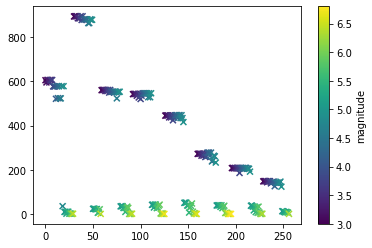

In [78]:
plt.scatter(np.arange(0, len(n_plot_100)), n_plot_100, c=mags_plot_100, marker = 'x')
plt.colorbar(label='magnitude')

In [33]:
df3=df1

In [32]:
from cmcrameri import cm

In [42]:
cmap = cm.oslo

In [43]:
cmap.N

256

In [57]:
np.linspace(0, 200, 9)

array([  0.,  25.,  50.,  75., 100., 125., 150., 175.])

In [68]:
import matplotlib as mpl
import matplotlib.pylab as pylab

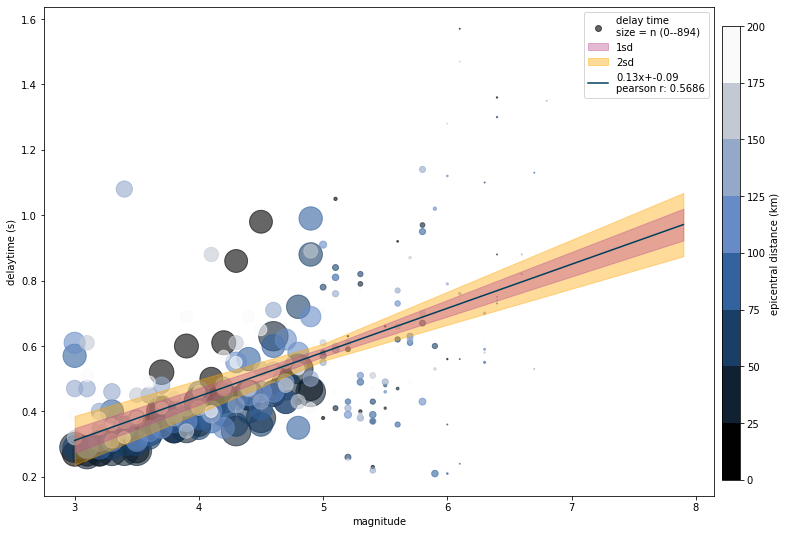

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot
cmap = cm.oslo # define the colormap
# extract all colors from the .oslo map
cmaplist = [cmap(i) for i in range(0,cmap.N,28)]

# create the new map
new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 200, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(np.array(df3['mag']).astype(float), np.array(df3['delaytime']).astype(float), marker = 'o', alpha = 0.6, s = np.array(df3['n']).astype(float),c = np.array(df3['dist']).astype(float)*25, cmap=new_cmap)#, norm = norm)
ax.scatter([], [], marker = 'o', alpha = 0.6, label = 'delay time \nsize = n (0--894)',color = cmaplist[0])#, norm = norm)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 



# make the scatter
#scat = ax.scatter(x, y, c=tag, s=np.random.randint(100, 500, 20),cmap=cmap, norm=norm)



x = np.array(mags_plot_100)-5
y = np.array(dt_plot_100)
x_unique = np.arange(-2,3,0.1)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
ax.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.4, zorder = 100, label = '1sd')
ax.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.4, zorder = 99, label = '2sd')
popt = np.polyfit(x, y, 1)
ax.plot(x_unique+5, a*(x_unique)+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
#ax.colorbar(label='distance (km)')        
ax.legend()
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
fig.set_size_inches(12,9)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.91, 0.15, 0.02, 0.7])
#cax, _ = mpl.colorbar.make_axes(plt.gca(), shrink=0.8)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=new_cmap, label='epicentral distance (km)',
                       norm=norm,
    spacing='proportional', ticks=np.array(bounds), boundaries=bounds, format='%1i')



plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/delay_time/delaytime_mag_scatter_line_of_best_fit_sorted_dots_discrete_color_bar.pdf')

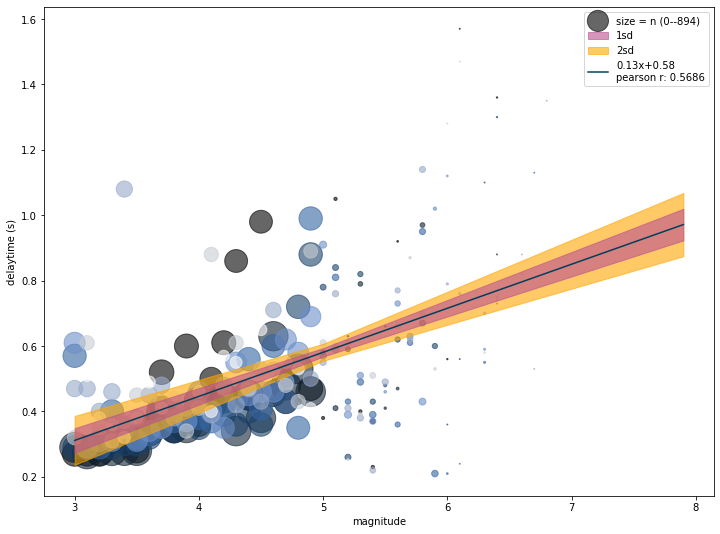

In [63]:
plt.scatter(mags_plot_100, dt_plot_100, marker = 'o', alpha = 0.6, s = n_plot_100,label = 'size = n (0--894)',c = np.array(dist_plot_100)*25, cmap=cm.oslo)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 

x = np.array(mags_plot_100)-5
y = np.array(dt_plot_100)
x_unique = np.arange(-2,3,0.1)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
plt.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
plt.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
popt = np.polyfit(x, y, 1)
plt.plot(x_unique+5, a*(x_unique)+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
#plt.colorbar(label='distance (km)')        
plt.legend()
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
fig.set_size_inches(12,9)

In [64]:
pl.cm.jet(np.linspace(5.0,7.0,21))

array([[ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ]])

onto row/column plot


/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

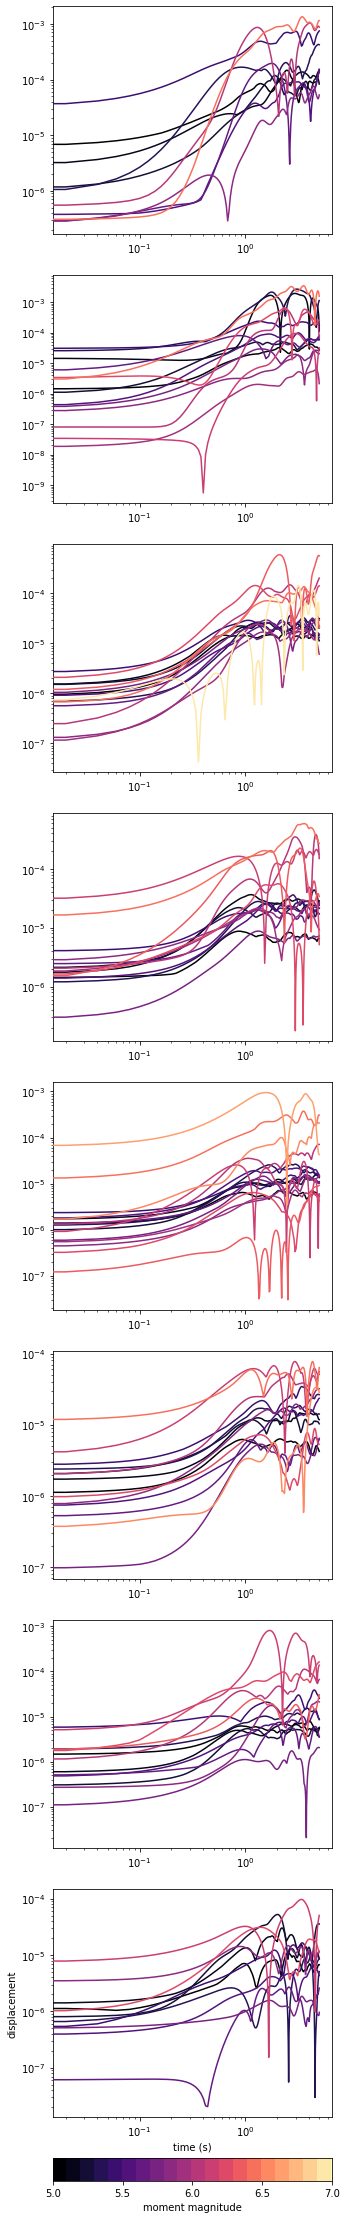

In [167]:
fig, axs = plt.subplots(9, 1, figsize=(5, 40), gridspec_kw={'height_ratios': [5,5,5,5,5,5,5,5, 0.5]})

import matplotlib.patches as mpatches
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
import matplotlib.pylab as pl
colors = pl.cm.magma(np.linspace(0,1,21))
#cmap = pl.cm.get_cmap('magma', 21)  
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:#columns are magnitudes
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            #print(T_dp[0:5])
            #for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
            #    axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                #print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                #print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = colors[col_count])
        #for ind_ad in ad[column][row]:
        #    axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count].set_xscale('log')
        axs[row_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1

    axs[r].set_ylabel('displacement')
axs[r].set_xlabel('time (s)')

left = 5
axs[8].set_ylim([0,1])
axs[8].set_xlim([5,7])
for c in range(0, 21):
    rect=mpatches.Rectangle((left,0),0.1,1, fill=True,color=colors[c],linewidth=2,facecolor=colors[c])
    axs[8].add_patch(rect)
    left += 0.1
axs[8].set_xlabel('moment magnitude')
axs[8].set_xticks(np.arange(5,7.1,0.5))
axs[8].set_yticks([])
#cax = axs[8].add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
#fig.colorbar(colors, cax=axs[8], orientation='horizontal')
#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')

plt.show()

In [24]:
results[1]

[['5.0', 1, 0.51000000000000001, 54],
 ['5.1', 1, 0.90000000000000002, 55],
 ['5.2', 1, 0.22, 53],
 ['5.3', 1, 0.92000000000000004, 55],
 ['5.4', 1, 0.68999999999999995, 47],
 ['5.5', 1, 0.75, 52],
 ['5.6', 1, 0.29999999999999999, 55],
 ['5.7', 1, 1.02, 55],
 ['5.8', 1, 1.6000000000000001, 52],
 ['5.9', 1, 0.68000000000000005, 51],
 ['6.0', 1, 1.24, 5],
 ['6.1', 1, 1.05, 2],
 ['6.2', 1, 0.59999999999999998, 6],
 ['6.3', 1, 0.63, 2],
 ['6.4', 1, 0.91000000000000003, 1]]

In [10]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [3]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [18]:
results

[['5.0', 0, 0.32, 23],
 ['5.1', 0, 0.59, 24],
 ['5.2', 0, 0.36, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.73, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92, 2],
 ['6.0', 0, 0.56, 2],
 ['6.1', 0, 1.57, 2],
 ['6.4', 0, 1.36, 3],
 ['5.0', 1, 0.52, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.57, 31],
 ['5.3', 1, 0.76, 31],
 ['5.4', 1, 0.7, 50],
 ['5.5', 1, 0.3, 6],
 ['5.6', 1, 0.47, 7],
 ['5.7', 1, 0.52, 6],
 ['5.8', 1, 0.97, 30],
 ['5.9', 1, 1.08, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64, 1],
 ['6.4', 1, 0.91, 3],
 ['6.8', 1, 1.19, 3],
 ['5.0', 2, 0.49, 65],
 ['5.1', 2, 0.45, 66],
 ['5.2', 2, 0.42, 32],
 ['5.3', 2, 0.54, 44],
 ['5.4', 2, 0.43, 66],
 ['5.5', 2, 0.55, 8],
 ['5.6', 2, 0.6, 45],
 ['5.8', 2, 0.52, 42],
 ['5.9', 2, 0.59, 44],
 ['6.0', 2, 1.36, 7],
 ['6.1', 2, 0.57, 7],
 ['6.3', 2, 1.1, 1],
 ['6.4', 2, 1.81, 8],
 ['6.6', 2, 0.95, 1],
 ['5.0', 3, 0.48, 66],
 ['5.1', 3, 0.57, 67],
 ['5.2', 3, 0.69, 53],
 ['5.3', 3, 0.56, 67],
 ['5.4', 3, 0.54, 67],
 ['5.5', 3, 0.57, 36],
 ['5.6', 3, 0

In [17]:
results_concat

array([['5.0', '0', '0.73', '10'],
       ['5.1', '0', '0.44', '11'],
       ['5.2', '0', '0.43', '11'],
       ['5.3', '0', '0.44', '10'],
       ['5.4', '0', '0.73', '2'],
       ['5.6', '0', '0.93', '2'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.6', '14'],
       ['5.1', '1', '0.46', '15'],
       ['5.2', '1', '0.38', '15'],
       ['5.3', '1', '0.55', '5'],
       ['5.4', '1', '0.8', '5'],
       ['5.5', '1', '0.79', '15'],
       ['5.7', '1', '0.65', '15'],
       ['5.8', '1', '0.44', '15'],
       ['6.0', '1', '0.61', '1'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.61', '20'],
       ['5.1', '2', '0.33', '21'],
       ['5.2', '2', '0.46', '21'],
       ['5.3', '2', '0.36', '21'],
       ['5.4', '2', '0.57', '20'],
       ['5.5', '2', '0.58', '21'],
       ['5.6', '2', '0.58', '21'],
       ['5.7', '2', '0.87', '21'],
       ['5.8', '2', '0.78', '21'],
       ['6.0', '2', '1.44', '1'],
       ['6.2', '2', '0.66', '1'],
       ['6.3', '2', '1.09', '1']

In [29]:
all_mag = []
n = []
tdp_all = []
results_concat = []
#for i in results:
results_concat = np.concatenate(results)
for i in results_concat:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [14]:
results_concat

array(['5.0', '0', '0.32', '23', '5.1', '0', '0.59', '24', '5.2', '0',
       '0.36', '2', '5.3', '0', '0.5', '11', '5.4', '0', '0.73', '24',
       '5.5', '0', '0.62', '2', '5.6', '0', '0.92', '2', '6.0', '0',
       '0.56', '2', '6.1', '0', '1.57', '2', '6.4', '0', '1.36', '3',
       '5.0', '1', '0.52', '50', '5.1', '1', '0.37', '50', '5.2', '1',
       '0.57', '31', '5.3', '1', '0.76', '31', '5.4', '1', '0.7', '50',
       '5.5', '1', '0.3', '6', '5.6', '1', '0.47', '7', '5.7', '1', '0.52',
       '6', '5.8', '1', '0.97', '30', '5.9', '1', '1.08', '31', '6.0', '1',
       '0.5', '2', '6.2', '1', '0.64', '1', '6.4', '1', '0.91', '3', '6.8',
       '1', '1.19', '3', '5.0', '2', '0.49', '65', '5.1', '2', '0.45',
       '66', '5.2', '2', '0.42', '32', '5.3', '2', '0.54', '44', '5.4',
       '2', '0.43', '66', '5.5', '2', '0.55', '8', '5.6', '2', '0.6', '45',
       '5.8', '2', '0.52', '42', '5.9', '2', '0.59', '44', '6.0', '2',
       '1.36', '7', '6.1', '2', '0.57', '7', '6.3', '2', '

In [ ]:
initial_guess = (1.5, 6)

In [ ]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [ ]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [ ]:
res

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [ ]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [ ]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [ ]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [ ]:
min(intercepts), max(intercepts)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

In [42]:
q = 0
for i in results:
    for j in i:
        q = q+j[-1]


In [43]:
q

3594

0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.771754702869 5.74264578186
1.04339551807 5.90723875357
 final_simplex: (array([[ 1.04339552,  5.907238

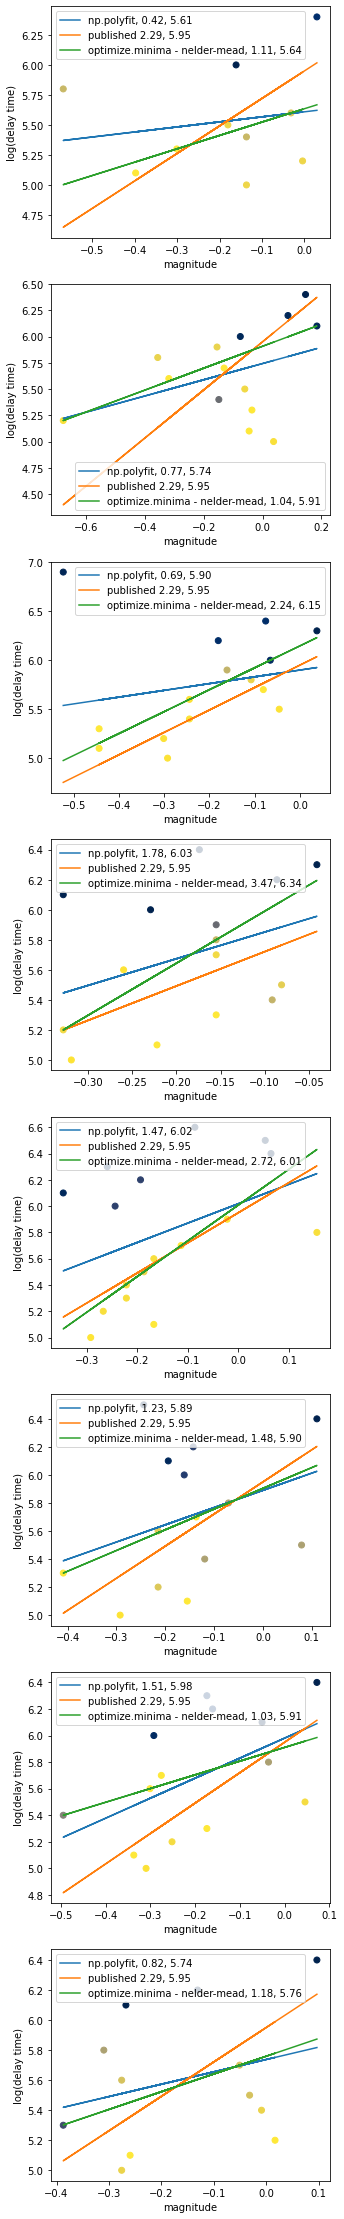

In [54]:
#%conda install ipympl
%matplotlib inline
initial_guess = (0,0)#2.29,5.95)
fig, axs = plt.subplots(8,1, figsize=(5,40))
for r in range(0, 8):
    all_mag = []
    n = []
    tdp_all = []
    for i in results[r]:
        all_mag.append(float(i[0]))
        tdp_all.append(float(i[2]))
        n.append(float(i[3]))
    y = all_mag
    x = tdp_all    
    x = np.array(x)
    
    def obj(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real))
    def obj_2(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum((m_guess-m_real)**2)

    def obj_flipped(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        t_guess = (a*m_real+b)
        return sum(abs(t_guess-t))
    def obj_weighted(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real)*n)

    #===================================================================
    sc = axs[r].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'cividis')
    #axs[r][0].scatter(np.log10(tdp_all), all_mag, marker = '.', color='k')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r].set_xlabel('log(delay time)')
    axs[r].set_ylabel('magnitude')

    #===================================================================
    '''sc = axs[r][1].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r][1].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r][1].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r][1].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r][1].set_xlabel('log(delay time)')
    axs[r][1].set_ylabel('magnitude')'''
    '''sc = axs[r][1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
    #cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
    axs[r][1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

    axs[r][1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

    res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
    axs[r][1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))'''

    axs[r].set_ylabel('log(delay time)')
    axs[r].set_xlabel('magnitude')
    print(a,b)
    print(res.x[0], res.x[1])
    print(res)
    axs[r].legend()
    axs[r].legend()
    
plt.show()
    

In [32]:
tdp_all

[0.48,
 0.6,
 0.47,
 0.7,
 0.81,
 0.83,
 0.55,
 0.7,
 0.7,
 0.7,
 0.59,
 0.47,
 0.82,
 0.91,
 0.67]

In [ ]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

In [ ]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt